Alexandre Lebas - Océane Deletrez

# Rappel du sujet
This case study is on using decision trees to predict customer response and optimize profit. To improve
customer contact process and maximize the amount of profit, decision trees were built with R to model
customer contact history and predict the response of customers. And then the customers can be
prioritized to contact based on the prediction, so that profit can be maximized, given a limited amount
of time, cost and human resources.
(File Cup98LRN, whippet, directory Project – B - 2019)
Keywords: Decision tree, prediction, profit optimization
Main steps:
- Introduction
- The Data of KDD Cup 1998
- Data Exploration
- Training Decision Trees
- Model Evaluation
- Selecting the Best Tree
- Scoring
- Discussions and Conclusions

# Données du jeu KDD Cup 1998

In [1]:
# Alexandre Lebas - Océane Deletrez
# Inspiré du livre de Yanchang Zhao

data.train = read.csv(file = "cup98LRN.txt")
dim(data.train)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"caractère(s) 'nul' au milieu de l'entrée"


[1] 10000   481

In [2]:
data.val = read.csv(file = "cup98VAL.txt")
dim(data.val)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"caractère(s) 'nul' au milieu de l'entrée"


[1] 10000   479

On remarque que dans les 2 jeux de données il y a plus de 400 variables. Entre le jeu dé d'entrainement et le jeu de validation il y a deux variables en plus ce qui signifie qu'il y a deux valeurs à prédire. Ce qui semble logique serait de prévoir si une personne a donné ou non et combien elle a donné.

In [3]:
# Nous permet d'avoir une description de toutes les variables
install.packages("Hmisc")

Installation du package dans 'C:/Users/alex5/OneDrive/Documents/R/win-library/4.1'
(car 'lib' n'est pas spécifié)




  Une version binaire est disponible mais la version du source est plus
  récente:
      binary source needs_compilation
Hmisc  4.5-0  4.6-0              TRUE

  Binaries will be installed
package 'Hmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alex5\AppData\Local\Temp\RtmpgnoXDC\downloaded_packages


In [4]:
library(Hmisc)
describe(data.train) 

Le chargement a nécessité le package : lattice

Le chargement a nécessité le package : survival

Le chargement a nécessité le package : Formula

Le chargement a nécessité le package : ggplot2


Attachement du package : 'Hmisc'


Les objets suivants sont masqués depuis 'package:base':

    format.pval, units




data.train 

 481  Variables      10000  Observations
--------------------------------------------------------------------------------
ODATEDW 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       16    0.986     9141    390.7     8601     8601 
     .25      .50      .75      .90      .95 
    8801     9201     9501     9601     9601 

lowest : 8601 8701 8801 8804 8810, highest: 9401 9501 9509 9601 9701
                                                                            
Value       8601  8701  8801  8804  8810  8901  9001  9101  9201  9301  9302
Frequency   1544   369   687     1     1   534   803   925   787   391     1
Proportion 0.154 0.037 0.069 0.000 0.000 0.053 0.080 0.092 0.079 0.039 0.000
                                        
Value       9401  9501  9509  9601  9701
Frequency   1325  1595     2  1034     1
Proportion 0.132 0.160 0.000 0.103 0.000
----------------------------------------------------------------------------

In [5]:
describe(data.val)

data.val 

 479  Variables      10000  Observations
--------------------------------------------------------------------------------
ODATEDW 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       18    0.987     9144    388.4     8601     8601 
     .25      .50      .75      .90      .95 
    8801     9201     9501     9601     9601 

lowest : 8601 8610 8701 8801 8901, highest: 9410 9501 9506 9601 9701
                                                                            
Value       8601  8610  8701  8801  8901  8909  9001  9101  9102  9110  9201
Frequency   1441     2   392   724   579     1   798   897     1     1   817
Proportion 0.144 0.000 0.039 0.072 0.058 0.000 0.080 0.090 0.000 0.000 0.082
                                                    
Value       9301  9401  9410  9501  9506  9601  9701
Frequency    424  1211     1  1680     1  1029     1
Proportion 0.042 0.121 0.000 0.168 0.000 0.103 0.000
------------------------------

In [6]:
# Trouver où sont les deux classes dans les données
# Pour cela on va regarder un nombre défini (exemple 100) de variables avec describe
# On regarde si jamais les premières et les dernières sont les mêmes
# Si c'est le cas alors les classes ne sont pas dans ces variables
describe(data.train[,1:100])

data.train[, 1:100] 

 100  Variables      10000  Observations
--------------------------------------------------------------------------------
ODATEDW 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       16    0.986     9141    390.7     8601     8601 
     .25      .50      .75      .90      .95 
    8801     9201     9501     9601     9601 

lowest : 8601 8701 8801 8804 8810, highest: 9401 9501 9509 9601 9701
                                                                            
Value       8601  8701  8801  8804  8810  8901  9001  9101  9201  9301  9302
Frequency   1544   369   687     1     1   534   803   925   787   391     1
Proportion 0.154 0.037 0.069 0.000 0.000 0.053 0.080 0.092 0.079 0.039 0.000
                                        
Value       9401  9501  9509  9601  9701
Frequency   1325  1595     2  1034     1
Proportion 0.132 0.160 0.000 0.103 0.000
-------------------------------------------------------------------

In [7]:
describe(data.val[,1:100])

data.val[, 1:100] 

 100  Variables      10000  Observations
--------------------------------------------------------------------------------
ODATEDW 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       18    0.987     9144    388.4     8601     8601 
     .25      .50      .75      .90      .95 
    8801     9201     9501     9601     9601 

lowest : 8601 8610 8701 8801 8901, highest: 9410 9501 9506 9601 9701
                                                                            
Value       8601  8610  8701  8801  8901  8909  9001  9101  9102  9110  9201
Frequency   1441     2   392   724   579     1   798   897     1     1   817
Proportion 0.144 0.000 0.039 0.072 0.058 0.000 0.080 0.090 0.000 0.000 0.082
                                                    
Value       9301  9401  9410  9501  9506  9601  9701
Frequency    424  1211     1  1680     1  1029     1
Proportion 0.042 0.121 0.000 0.168 0.000 0.103 0.000
---------------------

In [8]:
# Pas dans les 100 premières
describe(data.train[,101:200])

data.train[, 101:200] 

 100  Variables      10000  Observations
--------------------------------------------------------------------------------
AGE902 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       61    0.997    41.84    8.188       32       34 
     .25      .50      .75      .90      .95 
      38       41       45       51       56 

lowest :  0 19 20 21 22, highest: 74 75 76 77 80
--------------------------------------------------------------------------------
AGE903 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       53    0.997    45.07     8.04       36       38 
     .25      .50      .75      .90      .95 
      41       44       48       54       59 

lowest :  0 28 29 30 31, highest: 75 76 77 78 80
--------------------------------------------------------------------------------
AGE904 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0  

In [9]:
describe(data.val[,101:200])

data.val[, 101:200] 

 100  Variables      10000  Observations
--------------------------------------------------------------------------------
AGE902 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       63    0.997    42.13    8.149       33       35 
     .25      .50      .75      .90      .95 
      38       41       45       51       57 

lowest :  0 19 20 21 22, highest: 76 77 78 79 84
--------------------------------------------------------------------------------
AGE903 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       54    0.997    45.27    8.034       36       38 
     .25      .50      .75      .90      .95 
      41       44       49       54       60 

lowest :  0 29 30 31 32, highest: 77 78 79 80 84
--------------------------------------------------------------------------------
AGE904 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0    

In [10]:
# Pas dans les 200 premières variables
describe(data.train[,201:300])

data.train[, 201:300] 

 100  Variables      10000  Observations
--------------------------------------------------------------------------------
IC3 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0      830        1    384.6    169.6      197      225 
     .25      .50      .75      .90      .95 
     277      353      463      590      690 

lowest :    0   25   41   62   68, highest: 1153 1157 1199 1208 1226
--------------------------------------------------------------------------------
IC4 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0      877        1    428.1    181.1      225      259 
     .25      .50      .75      .90      .95 
     314      395      511      652      749 

lowest :    0   71   75   80   85, highest: 1239 1246 1252 1272 1273
--------------------------------------------------------------------------------
IC5 
       n  missing distinct     Info     Mean      Gmd      .0

In [11]:
describe(data.val[,201:300])

data.val[, 201:300] 

 100  Variables      10000  Observations
--------------------------------------------------------------------------------
IC3 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0      842        1    390.1    171.7      199      229 
     .25      .50      .75      .90      .95 
     280      358      472      599      700 

lowest :    0   66   71   72   74, highest: 1187 1188 1193 1201 1394
--------------------------------------------------------------------------------
IC4 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0      892        1    433.7      184      227      261 
     .25      .50      .75      .90      .95 
     316      402      518      658      765 

lowest :    0   57   73   77   82, highest: 1242 1243 1259 1394 1500
--------------------------------------------------------------------------------
IC5 
       n  missing distinct     Info     Mean      Gmd      .05 

In [12]:
# Pas dans les 300 premières
describe(data.train[,301:400])

data.train[, 301:400] 

 100  Variables      10000  Observations
--------------------------------------------------------------------------------
SEC4 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       45    0.997    17.23    7.026        5        9 
     .25      .50      .75      .90      .95 
      14       18       21       25       27 

lowest :  0  1  2  3  4, highest: 40 42 44 48 51
--------------------------------------------------------------------------------
SEC5 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       74    0.991    6.835    4.732        2        2 
     .25      .50      .75      .90      .95 
       4        6        8       11       14 

lowest :  0  1  2  3  4, highest: 81 86 92 97 99
--------------------------------------------------------------------------------
AFC1 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       3

In [13]:
describe(data.val[,301:400])

data.val[, 301:400] 

 100  Variables      10000  Observations
--------------------------------------------------------------------------------
SEC4 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       45    0.997    17.06    7.005        5        9 
     .25      .50      .75      .90      .95 
      13       18       21       24       26 

lowest :  0  1  2  3  4, highest: 40 41 42 44 48
--------------------------------------------------------------------------------
SEC5 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       68    0.991    6.731    4.518        2        2 
     .25      .50      .75      .90      .95 
       4        6        8       11       14 

lowest :  0  1  2  3  4, highest: 75 85 86 89 99
--------------------------------------------------------------------------------
AFC1 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       45 

In [14]:
# Pas dans les 400 premières 
# Elles se situent donc faire la fin du jeu d'entrainement essayons donc de partir des dernières variables
describe(data.train[,470:481])

data.train[, 470:481] 

 12  Variables      10000  Observations
--------------------------------------------------------------------------------
CONTROLN 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0    10000        1    95917    63825    10222    19677 
     .25      .50      .75      .90      .95 
   48131    95716   144420   172345   182048 

lowest :     27     65     94    103    107, highest: 191649 191673 191716 191754 191758
--------------------------------------------------------------------------------
TARGET_B 
       n  missing distinct     Info      Sum     Mean      Gmd 
   10000        0        2    0.145      509   0.0509  0.09663 

--------------------------------------------------------------------------------
TARGET_D 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       44    0.145   0.7419    1.432        0        0 
     .25      .50      .75      .90      .95 
       0      

In [15]:
describe(data.val[,470:479])

data.val[, 470:479] 

 10  Variables      10000  Observations
--------------------------------------------------------------------------------
CONTROLN 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0    10000        1    95236    63996     9161    18334 
     .25      .50      .75      .90      .95 
   46671    95653   142997   172030   182307 

lowest :     28     89    179    194    203, highest: 191720 191767 191773 191774 191776
--------------------------------------------------------------------------------
HPHONE_D 
       n  missing distinct     Info      Sum     Mean      Gmd 
   10000        0        2     0.75     5064   0.5064      0.5 

--------------------------------------------------------------------------------
RFA_2R 
       n  missing distinct    value 
   10000        0        1        L 
                
Value          L
Frequency  10000
Proportion     1
--------------------------------------------------------------------

In [16]:
# On remarque donc que les deux classes sont TargetB et TargetD
# TargetB a deux valeurs certainement que cela doit être un binaire pour savoir si une personne répond ou non 
# Target D doit représenter la somme donnée si celui-ci à donné
unique(data.train$TARGET_B)

[1] 0 1

In [17]:
# 0 doit être le nombre de gens qui n'ont pas donné et 1 les gens qui ont donné
proportionB = prop.table(table(data.train$TARGET_B))
proportionB


     0      1 
0.9491 0.0509 

On remarque que la majorité des personnes (Quasi-95%) font partie de la classe 0.

Regardons maintenant dans le nombre de personnes qui ont donné (c'est-à-dire que TARGET_D est supérieur à 0) les statistiques concernant leurs dons.

In [18]:
personneQuiOntDonne = data.train[data.train$TARGET_D >0,]
# On regarde le nombre de dons au cas ou TARGETB aurait été mal rempli
donsDesPersonnes = personneQuiOntDonne$TARGET_D
# Regardons maintenant combien de personnes ont donné cela correspond bien à la proportion des gens qui ont donné
dim(personneQuiOntDonne)


[1] 509 481

In [19]:
summary(donsDesPersonnes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   10.00   12.00   14.58   20.00  100.00 

On remarque que les dons sont compris entre 1 et 100 mais 75% font moins de 20€ et les restes sont des dons entre 20 et 100.

Prenons maintenant une représentation graphique pour mieux voir ces chiffres.

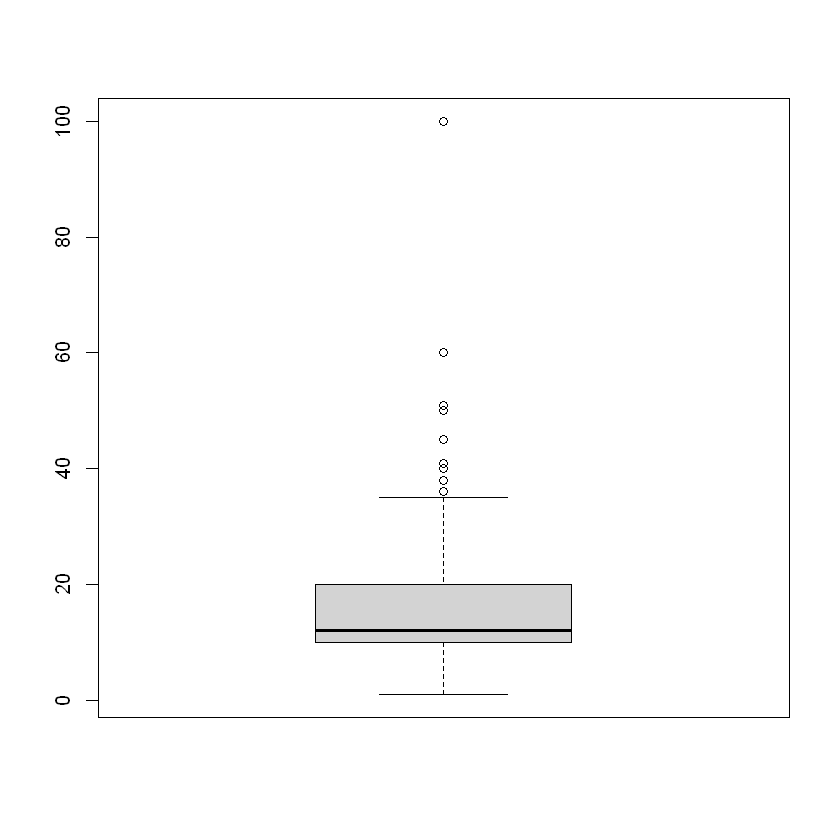

In [20]:
boxplot(donsDesPersonnes)

Sur le graphique ci-dessus on voit justement qu'une très grande partie des dons font moins de 55€s seuls deux dons sont aux dessus un don à 60 et celui à 100.

Essayons un graphique plus précis pour savoir quelle est la somme la plus donnée.

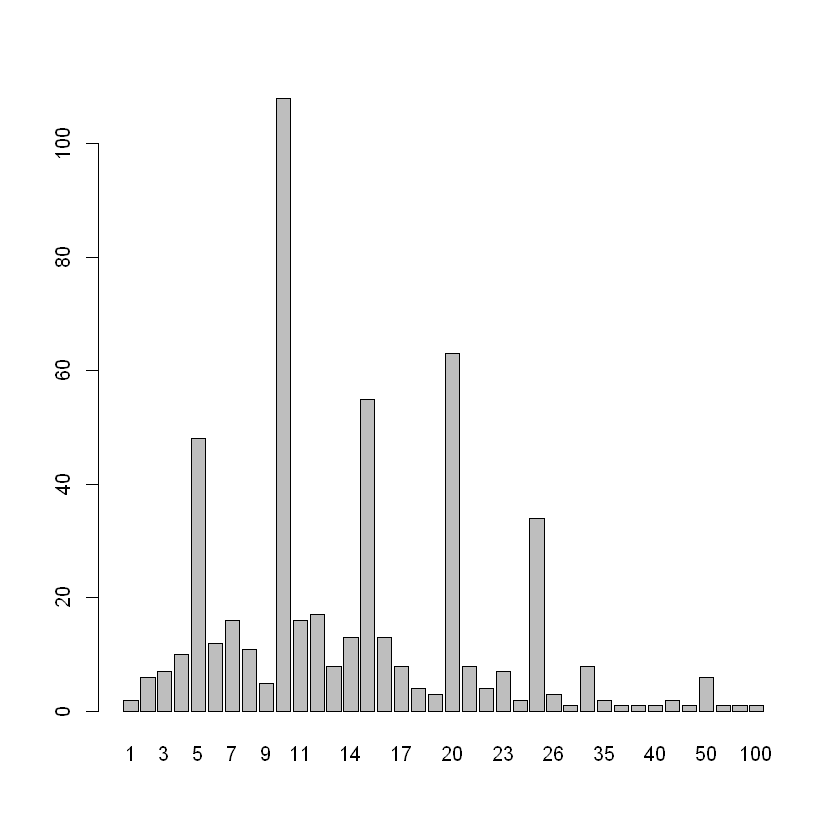

In [21]:
barplot(table(round(donsDesPersonnes)))

On arrondit car le don fait par la personne n'est pas forcément entier (11€50 par exemple). On remarque dans ce graphique que la somme la plus donnée et 10€ ce graphique semblé aussi en accord avec celui sur 75% des dons font moins de 20% et très peut font plus de 50 €.

# Exploration des données

Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"l'argument n'est ni numérique, ni logique : renvoi de NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"l'argument n'est ni numérique, ni logique : renvoi de NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"l'argument n'est ni numérique, ni logique : renvoi de NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"l'argument n'est ni numérique, ni logique : renvoi de NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"l'argument n'est ni numérique, ni logique : renvoi de NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"l'argument n'est ni numérique, ni logique : renvoi de NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"l'argument n'est ni numérique, ni logique : renvoi de NA"
Warning message in mean.def

Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"l'argument n'est ni numérique, ni logique : renvoi de NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"l'argument n'est ni numérique, ni logique : renvoi de NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"l'argument n'est ni numérique, ni logique : renvoi de NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"l'argument n'est ni numérique, ni logique : renvoi de NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"l'argument n'est ni numérique, ni logique : renvoi de NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"l'argument n'est ni numérique, ni logique : renvoi de NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"l'argument n'est ni numérique, ni logique : renvoi de NA"
Warning message in mean.def

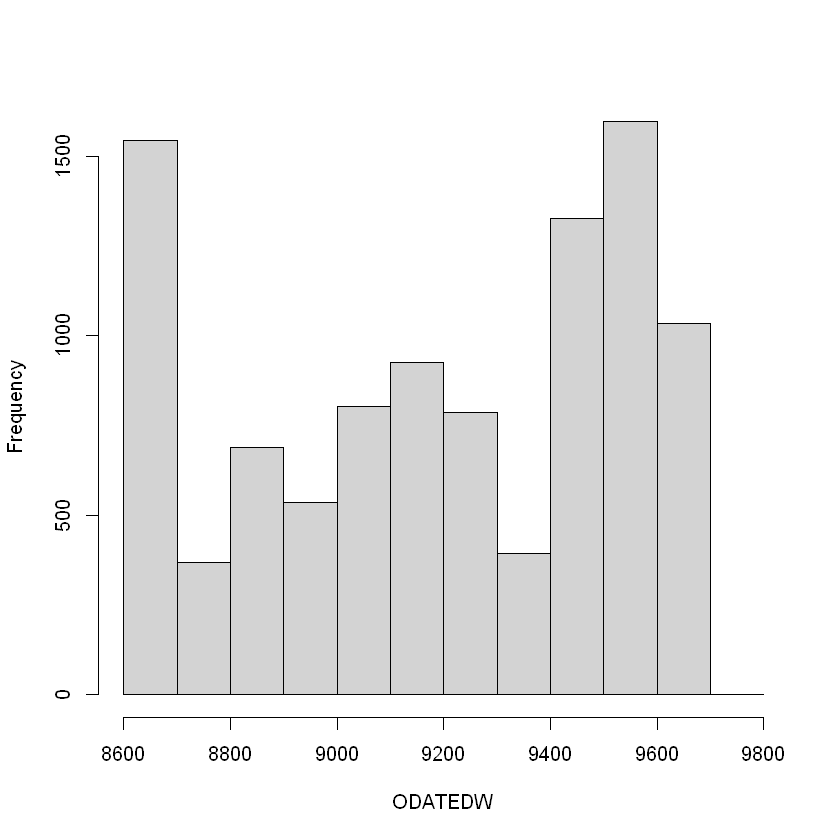

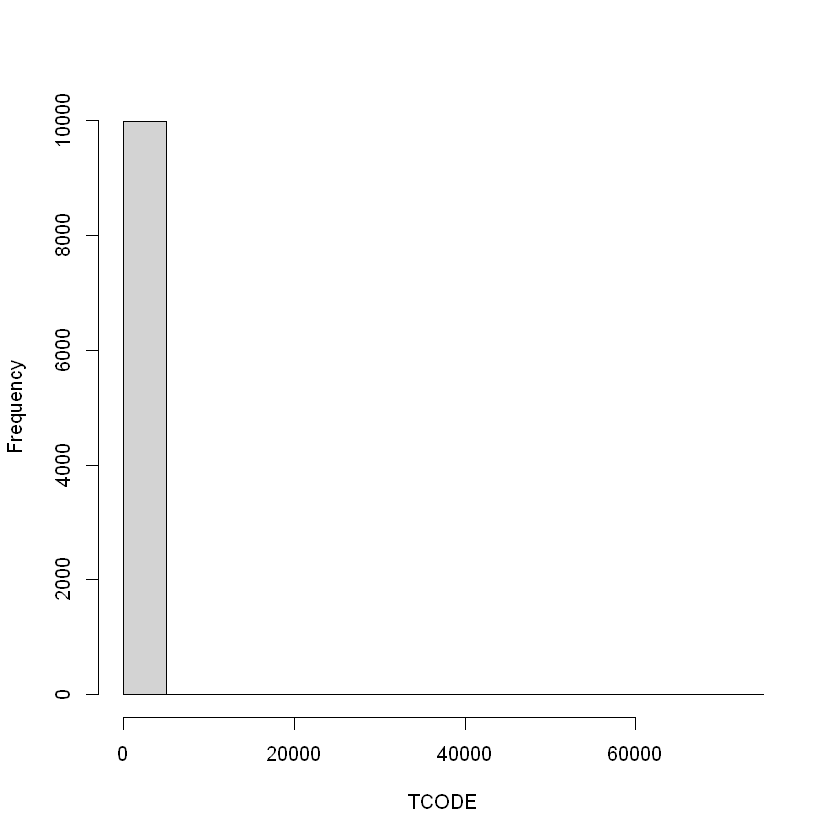

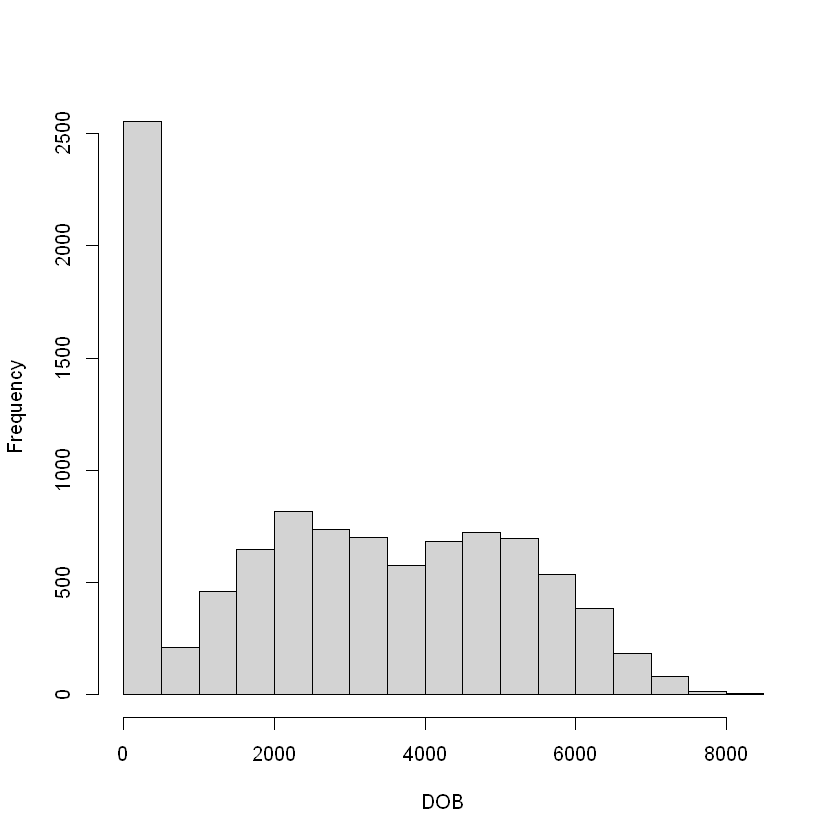

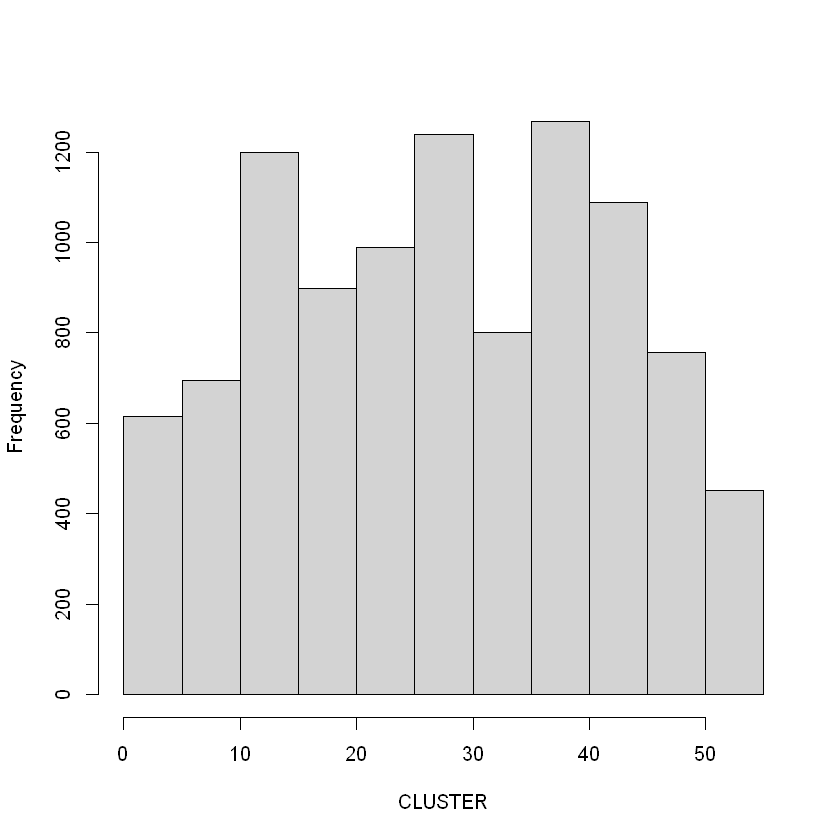

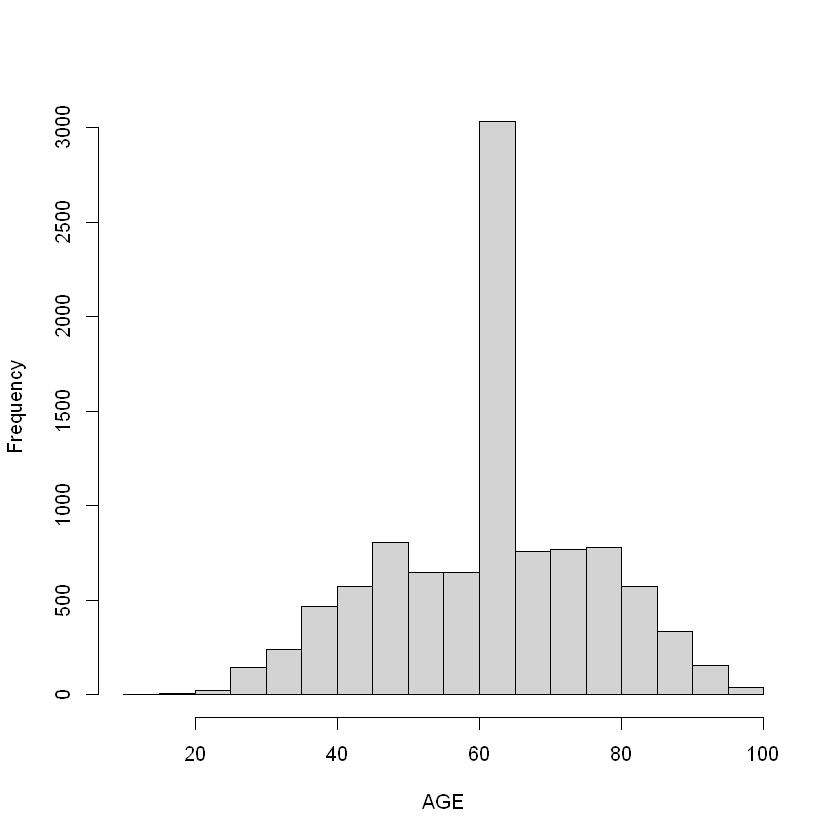

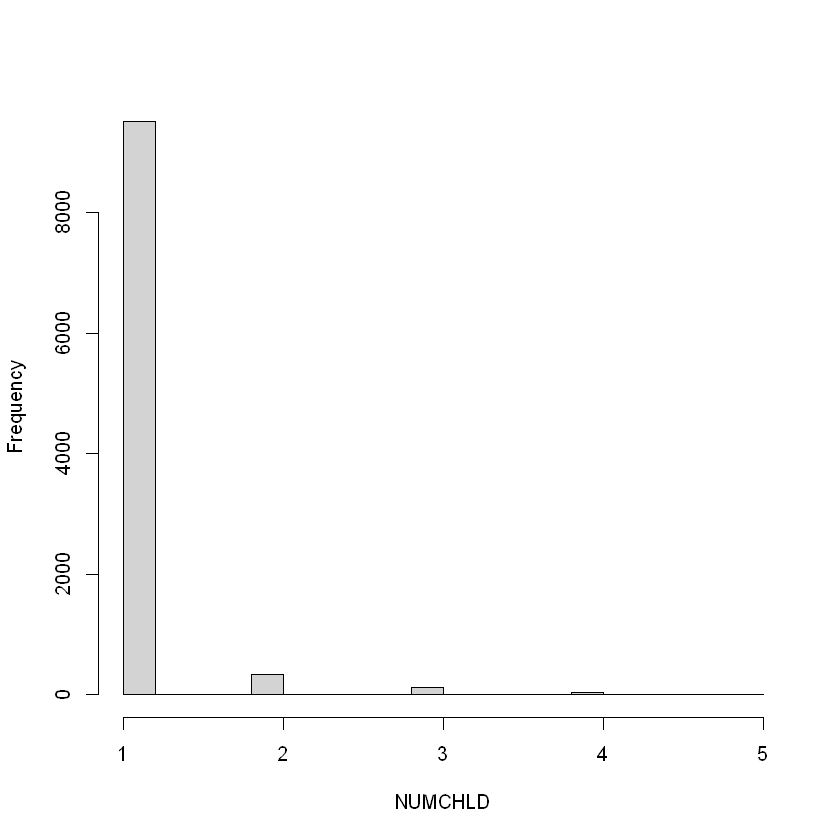

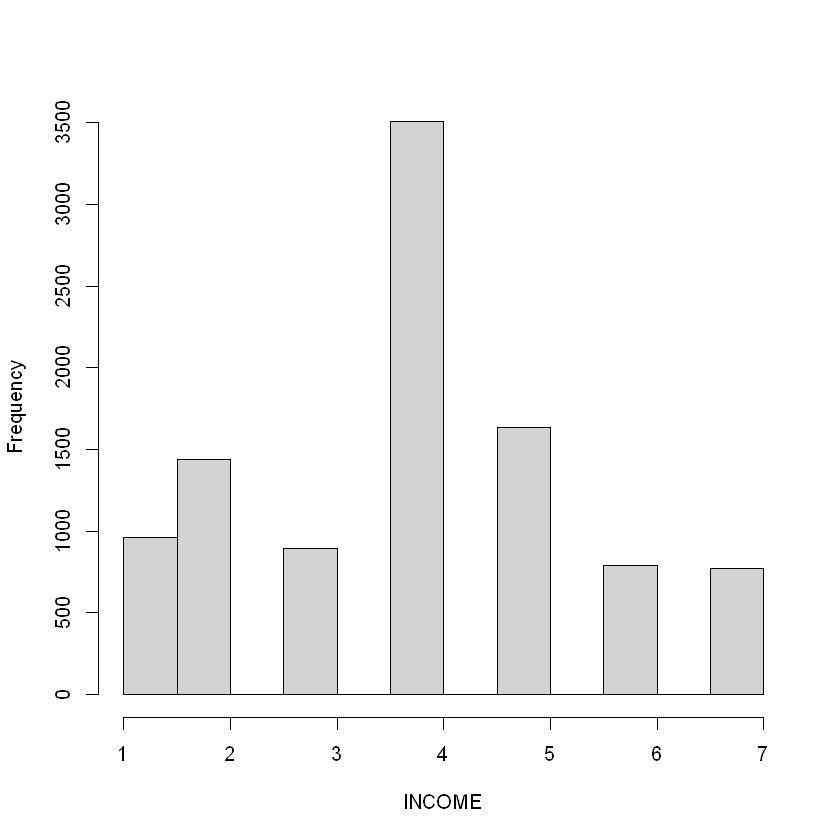

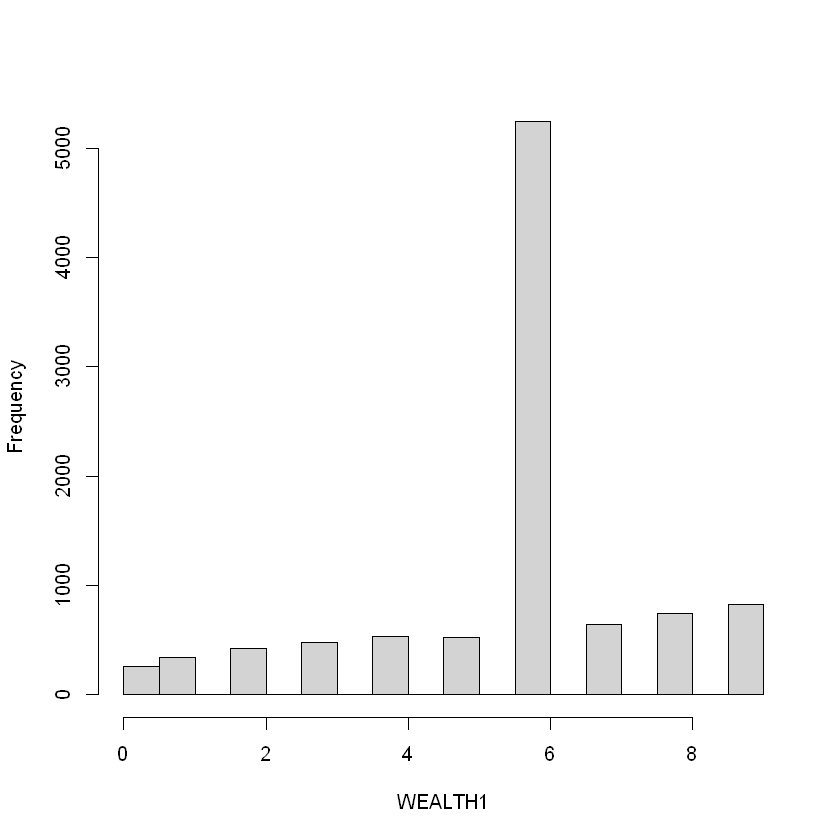

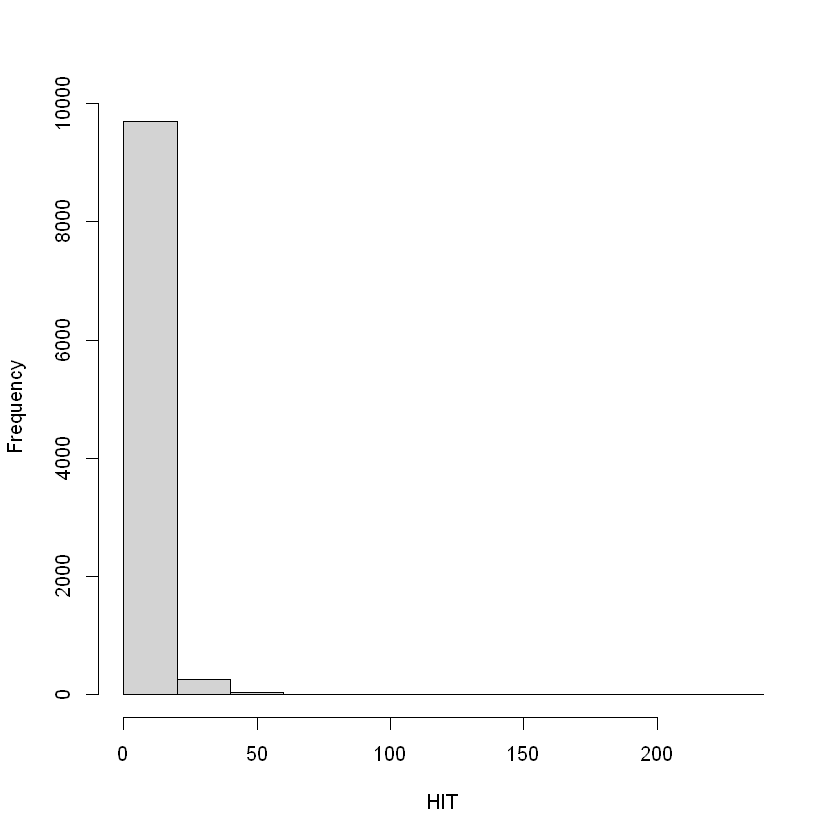

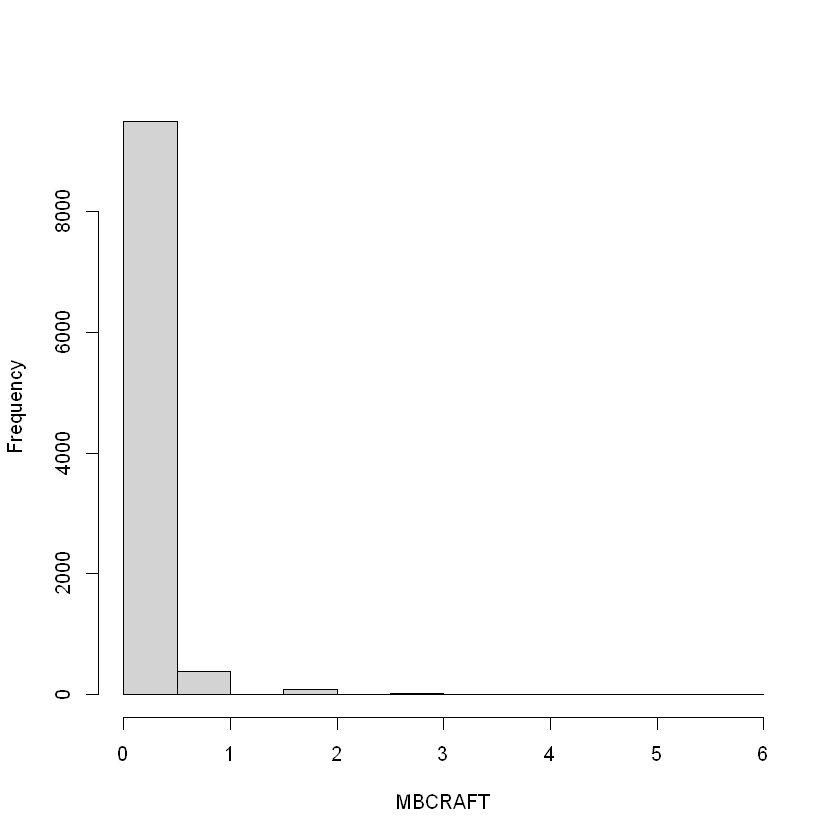

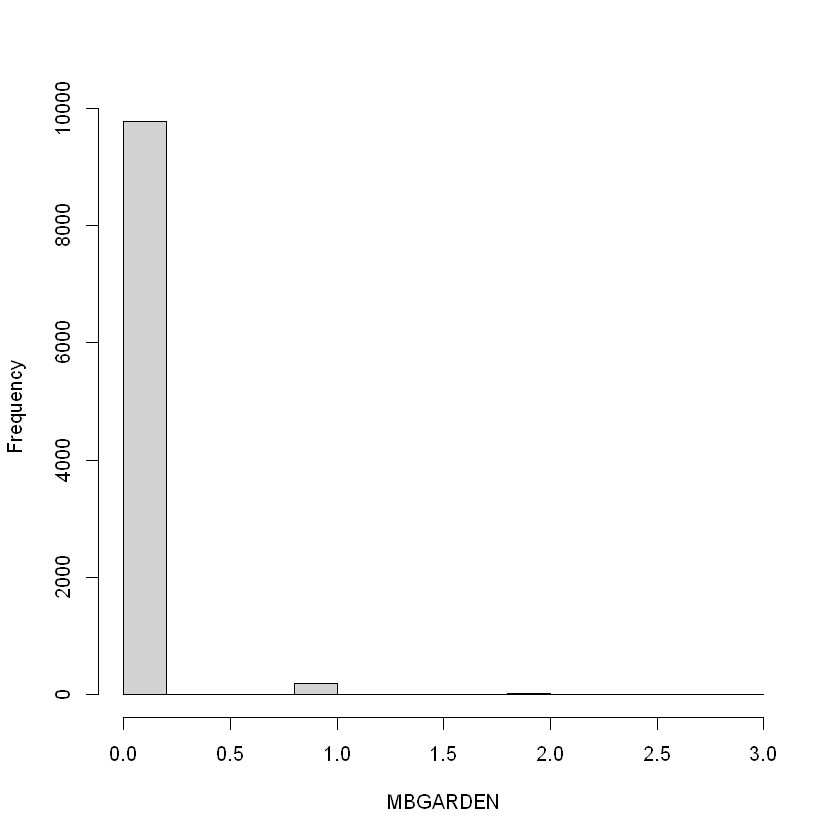

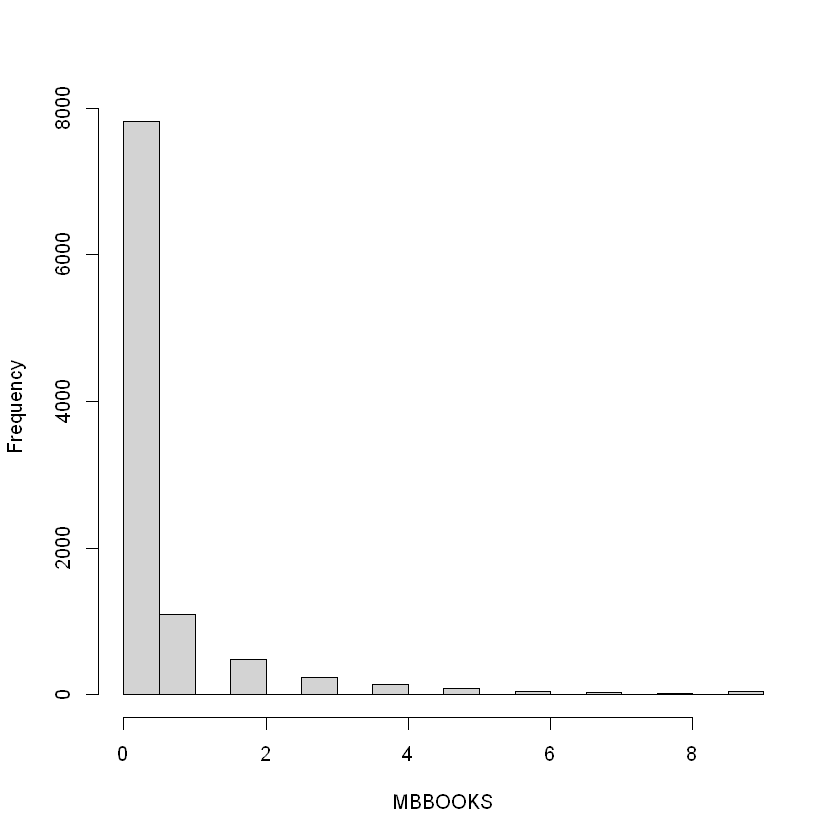

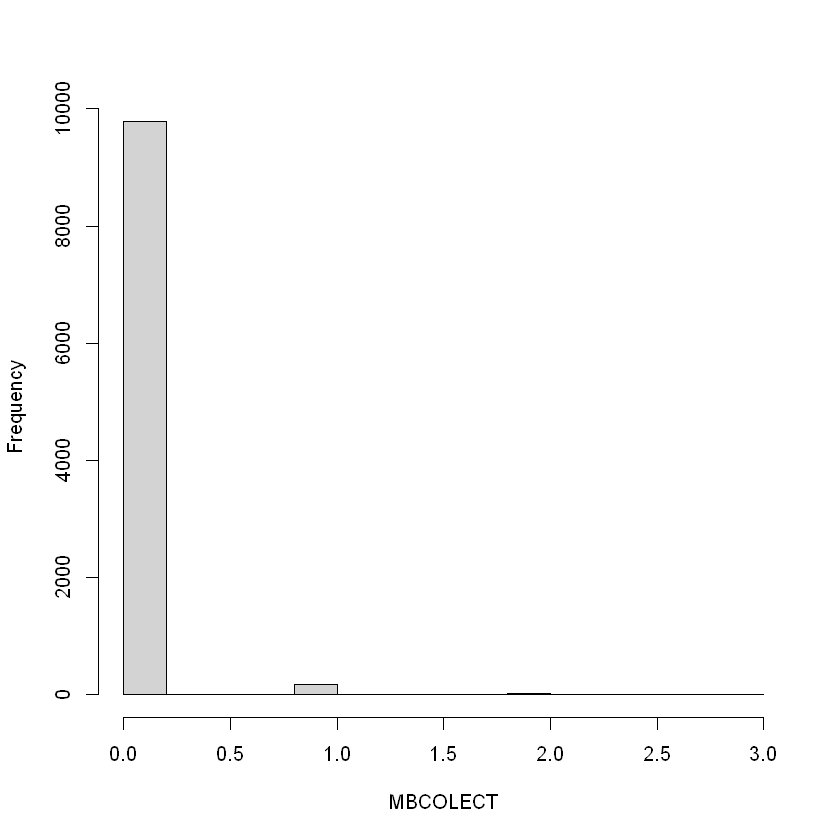

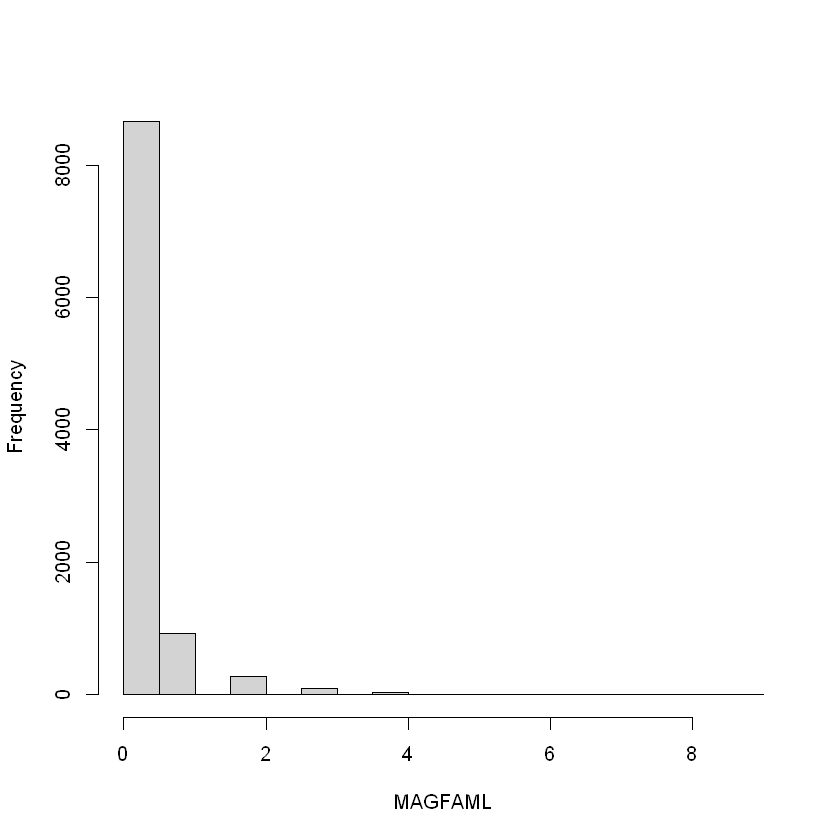

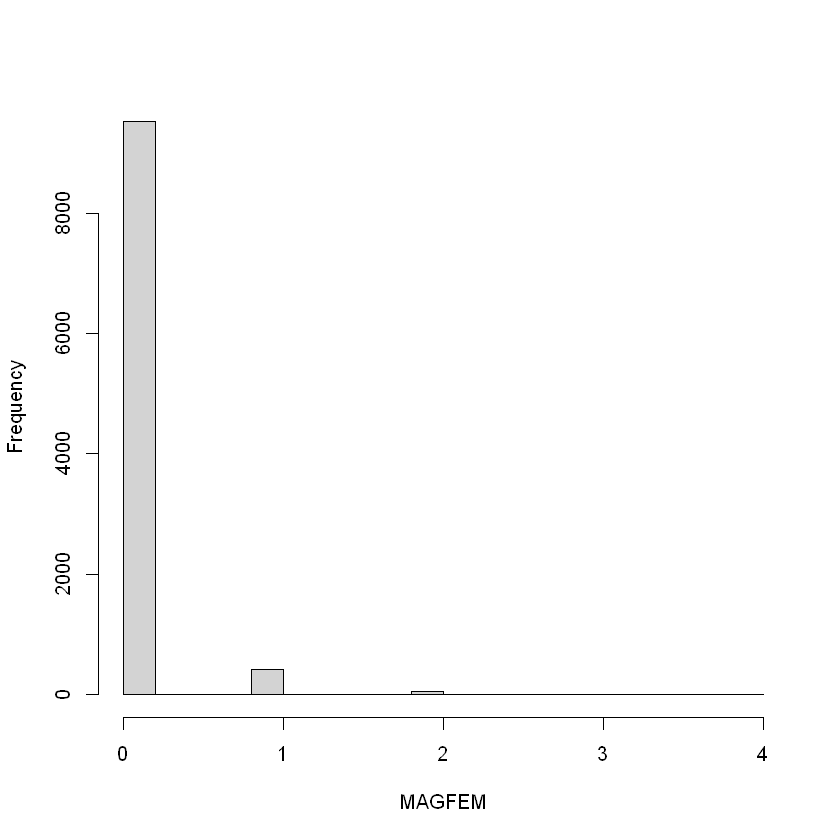

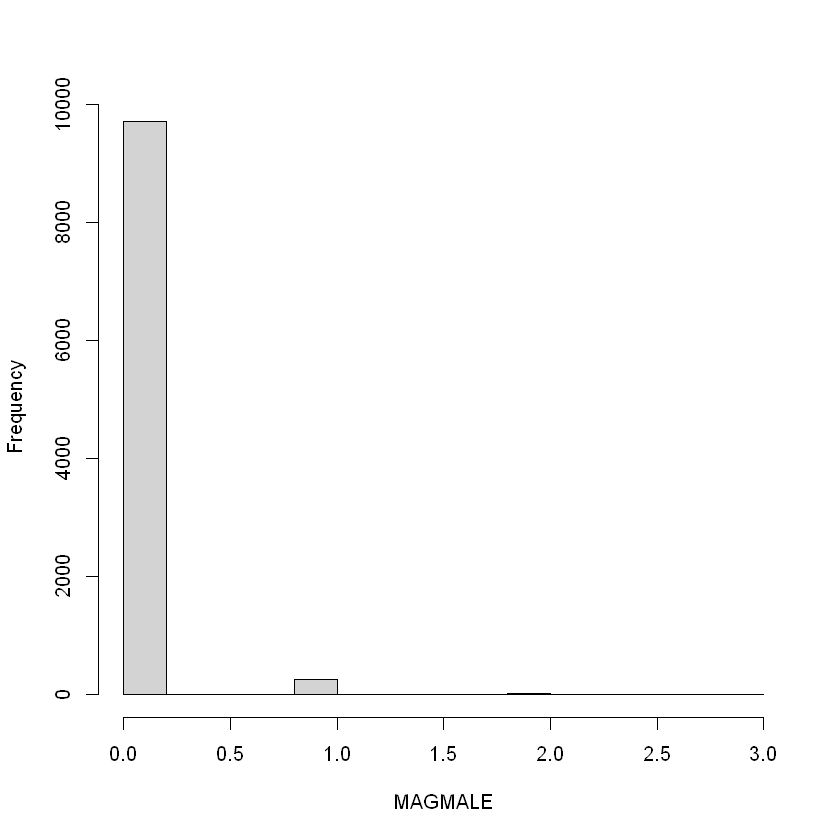

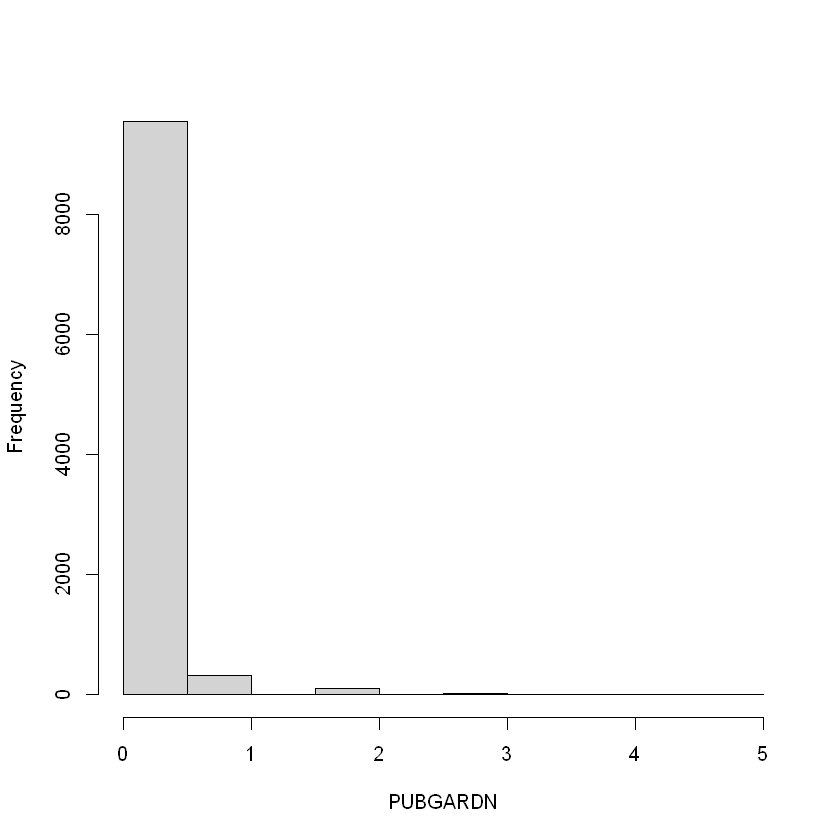

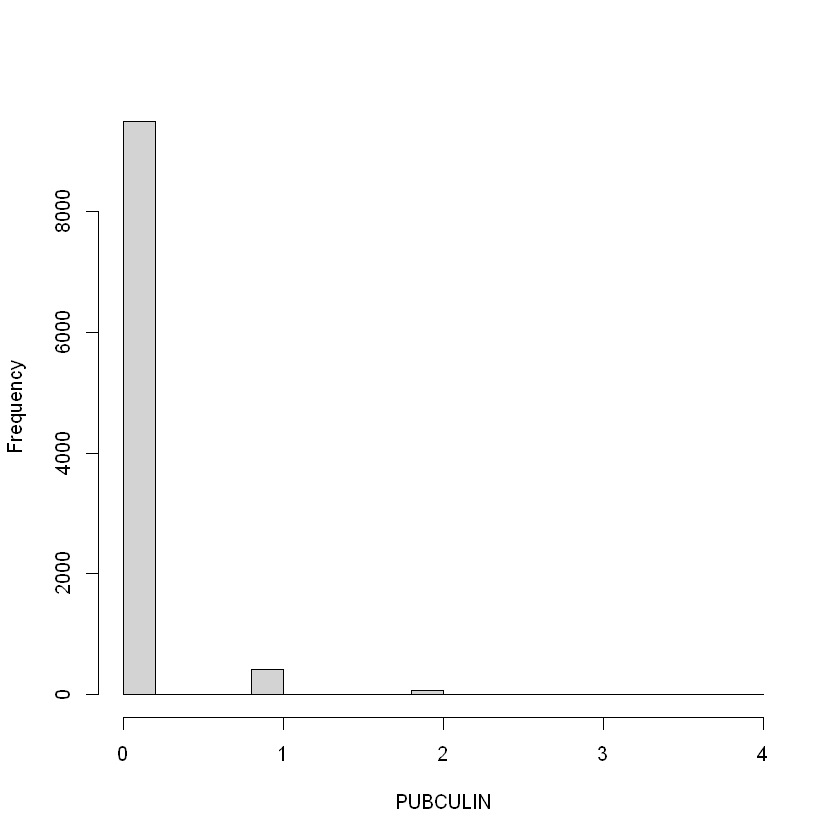

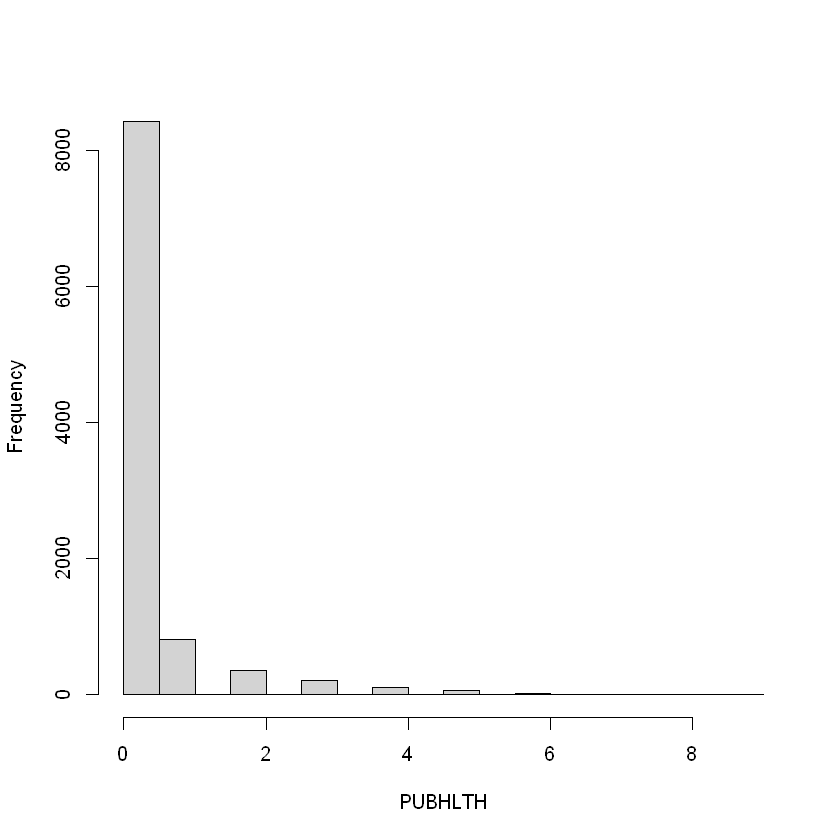

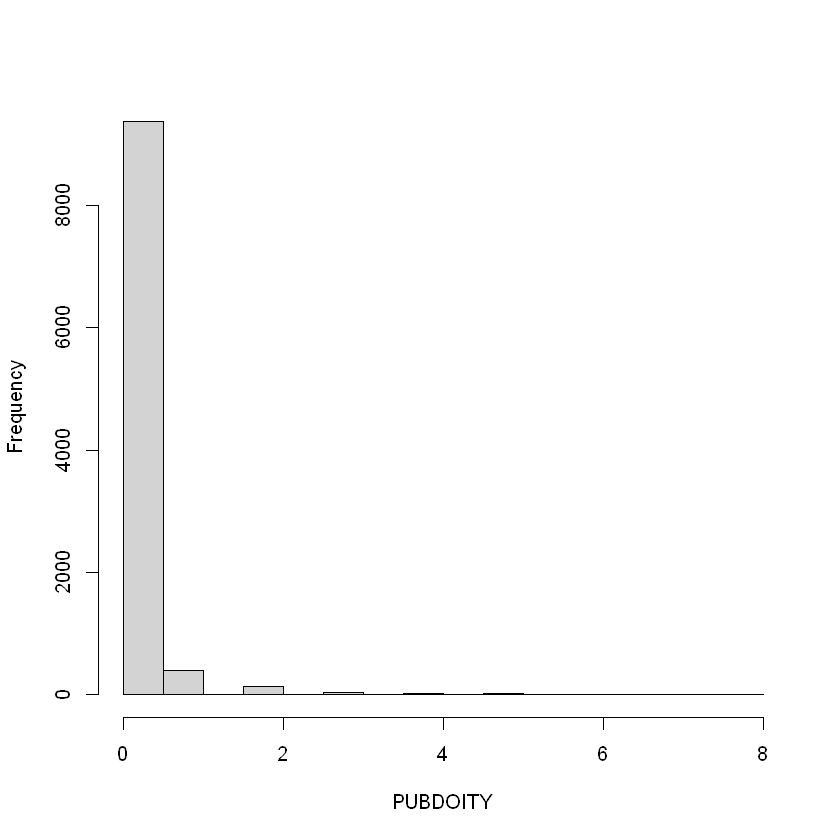

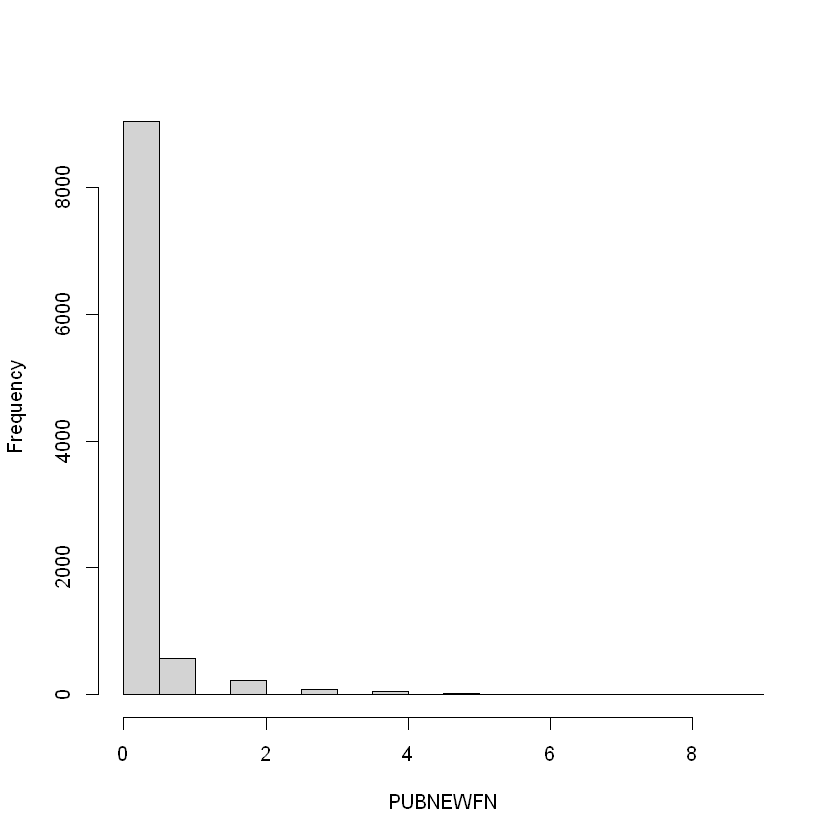

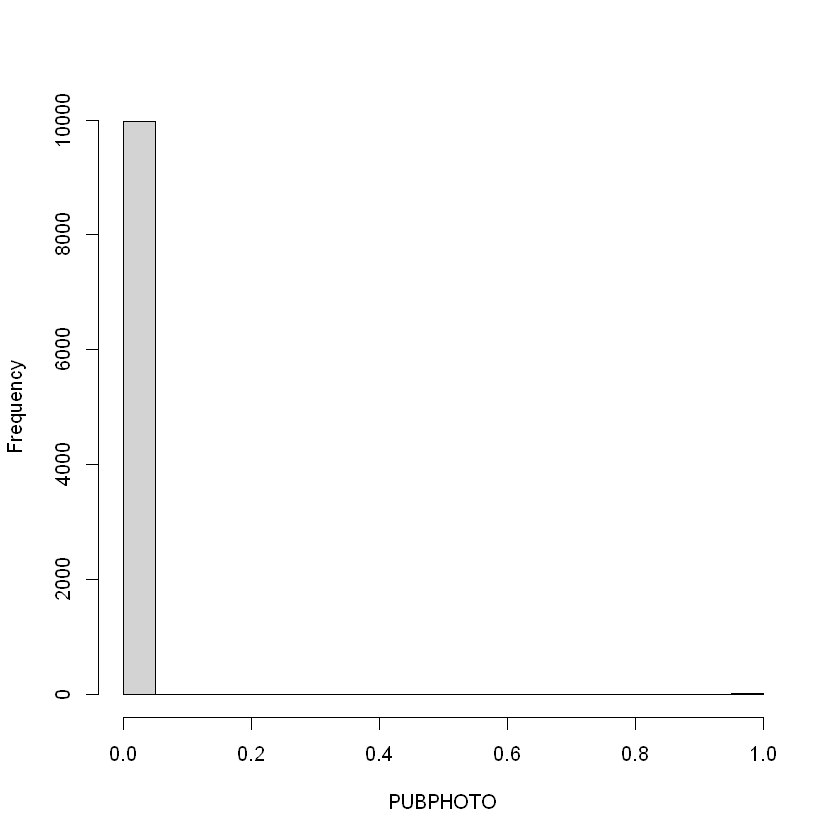

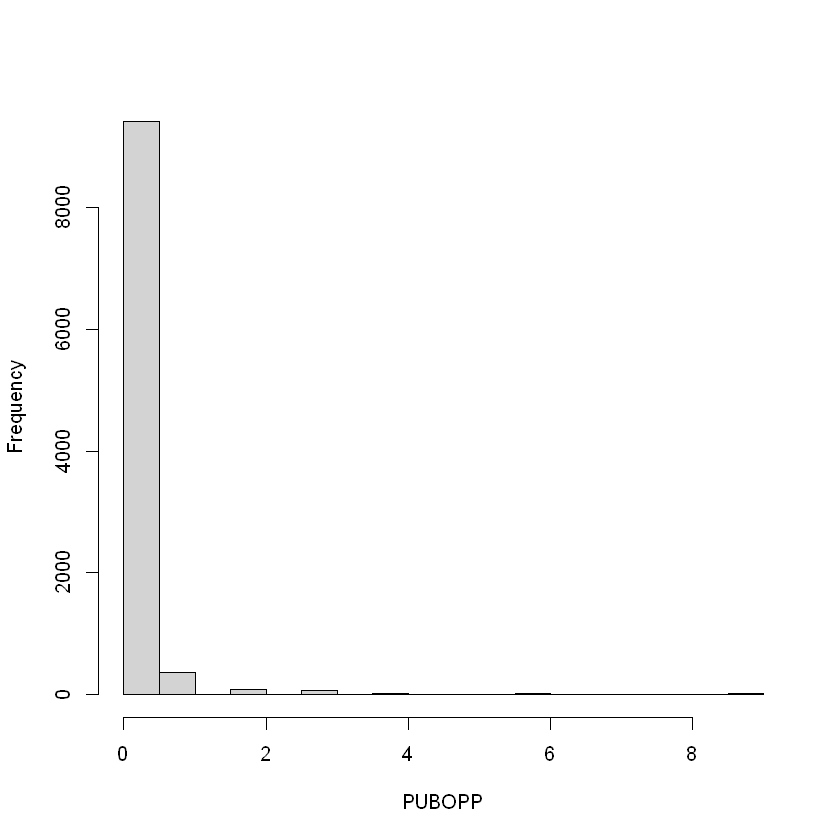

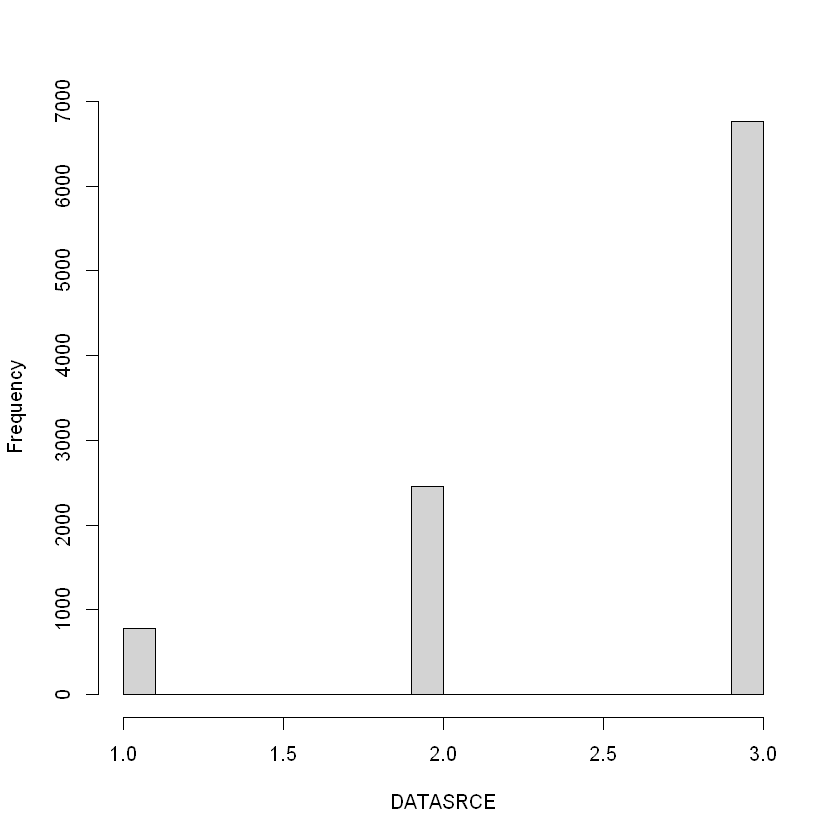

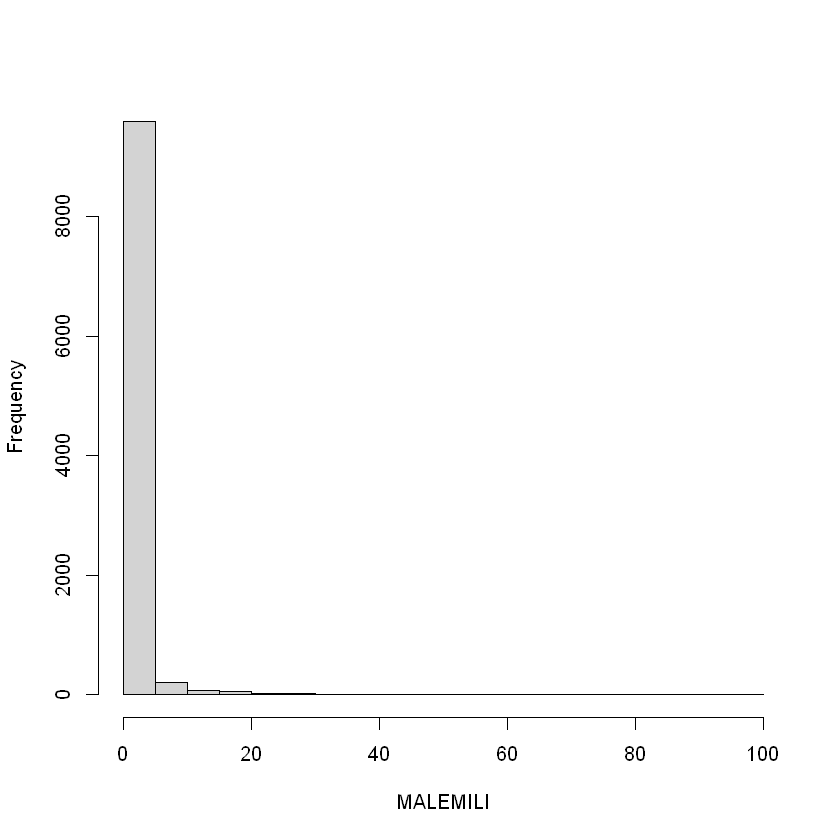

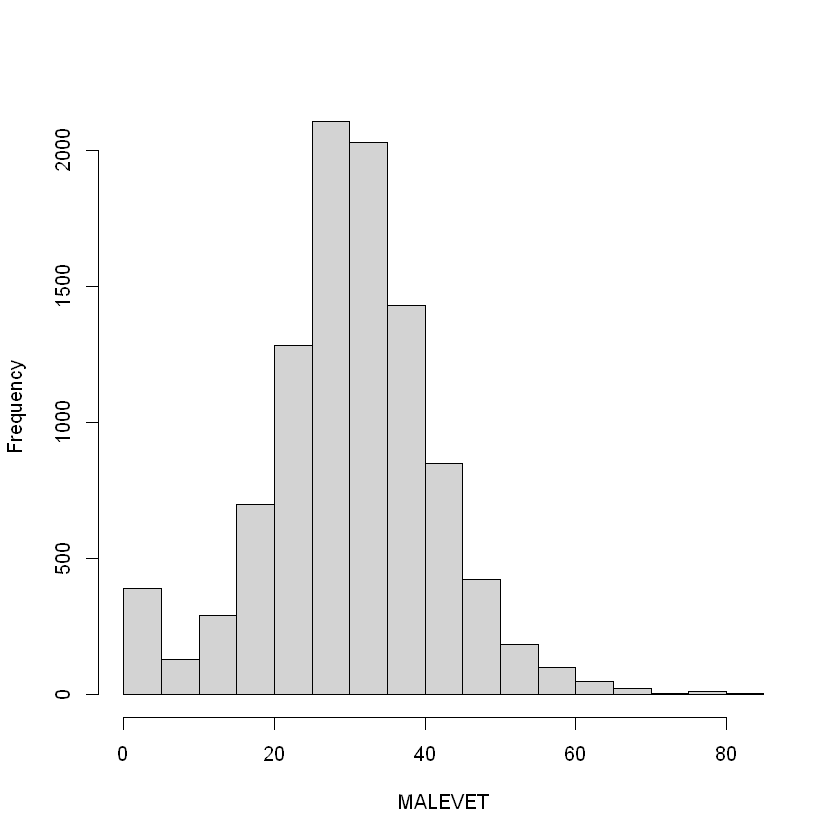

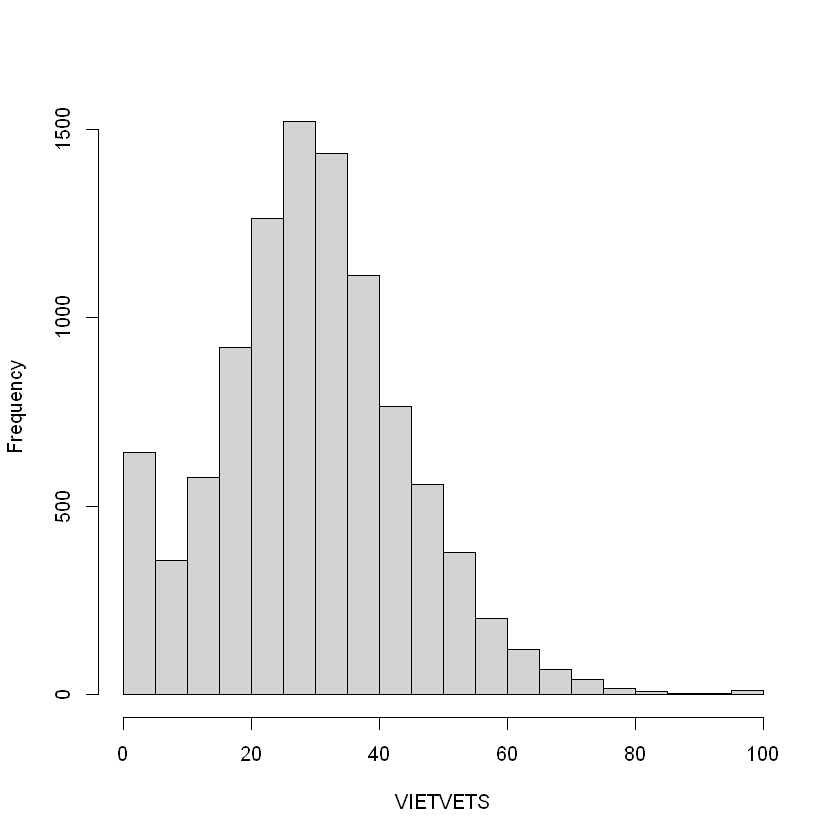

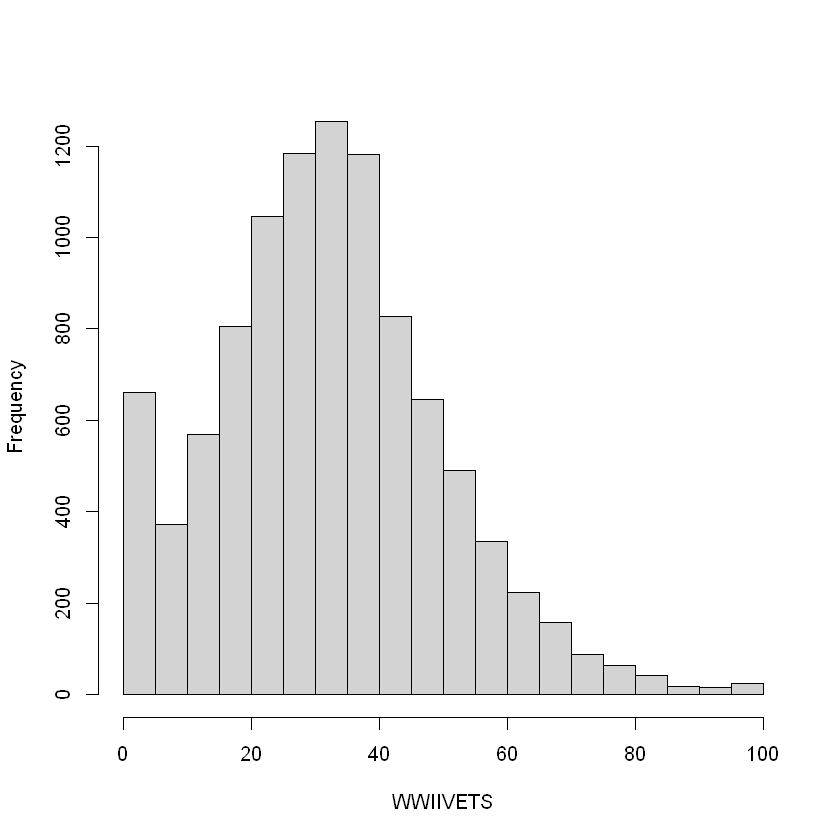

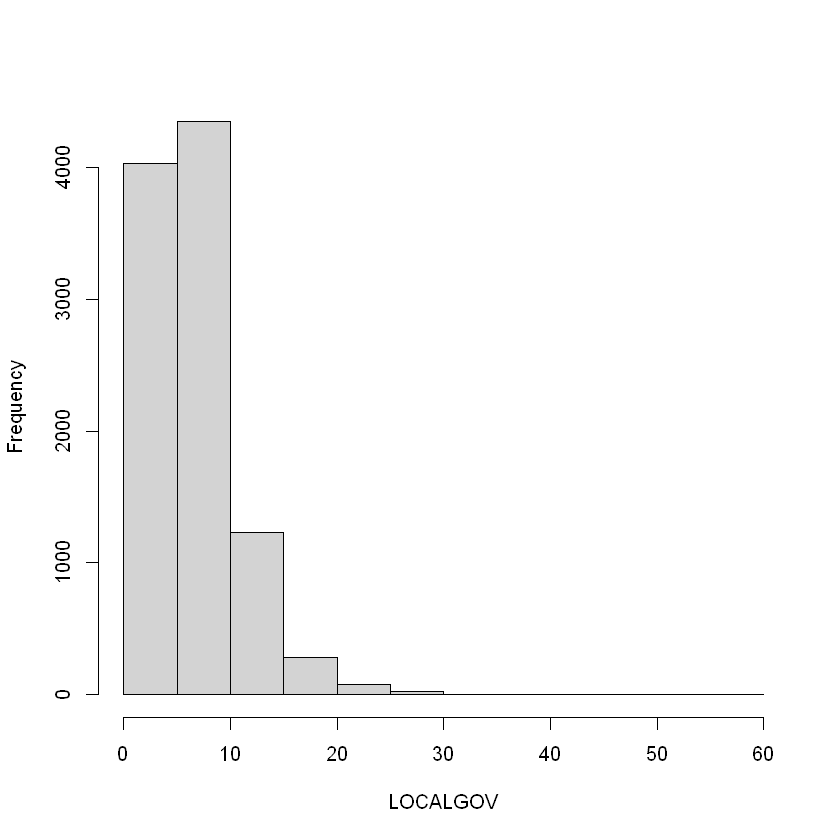

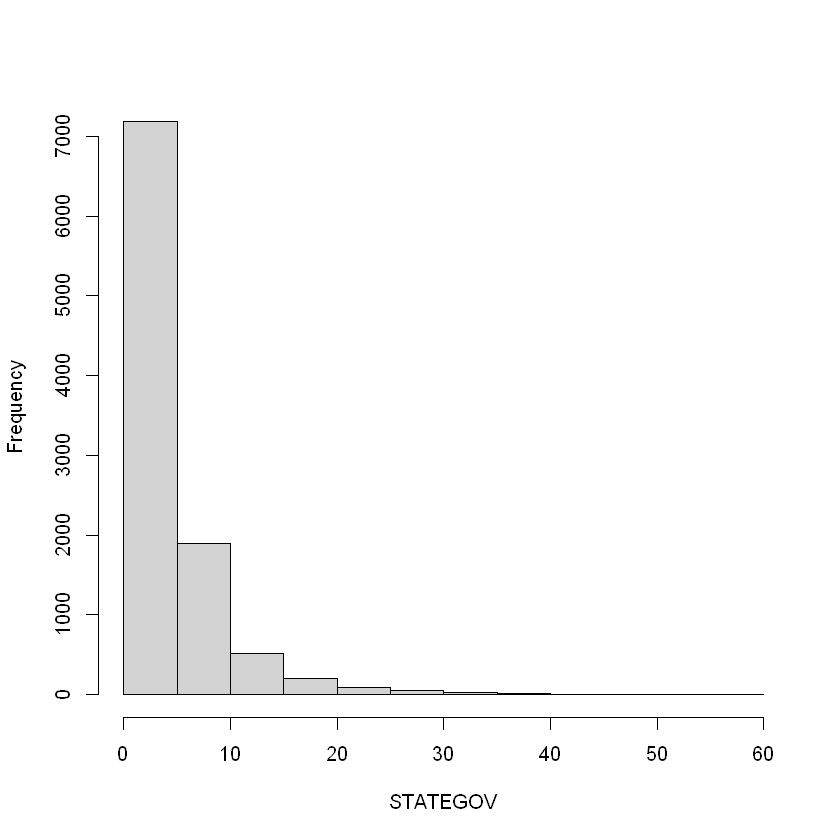

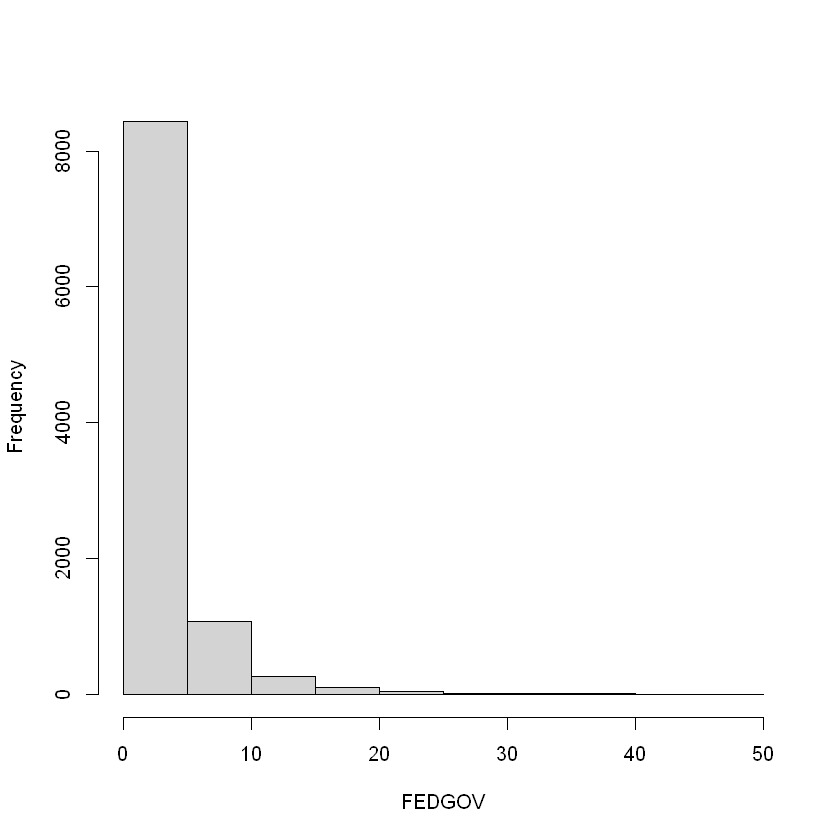

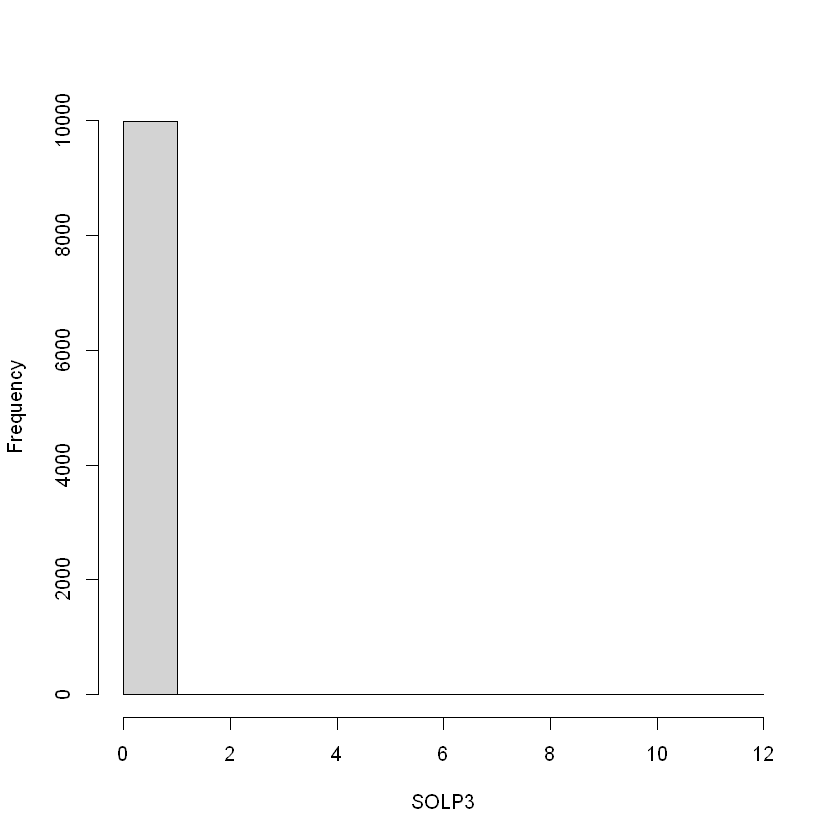

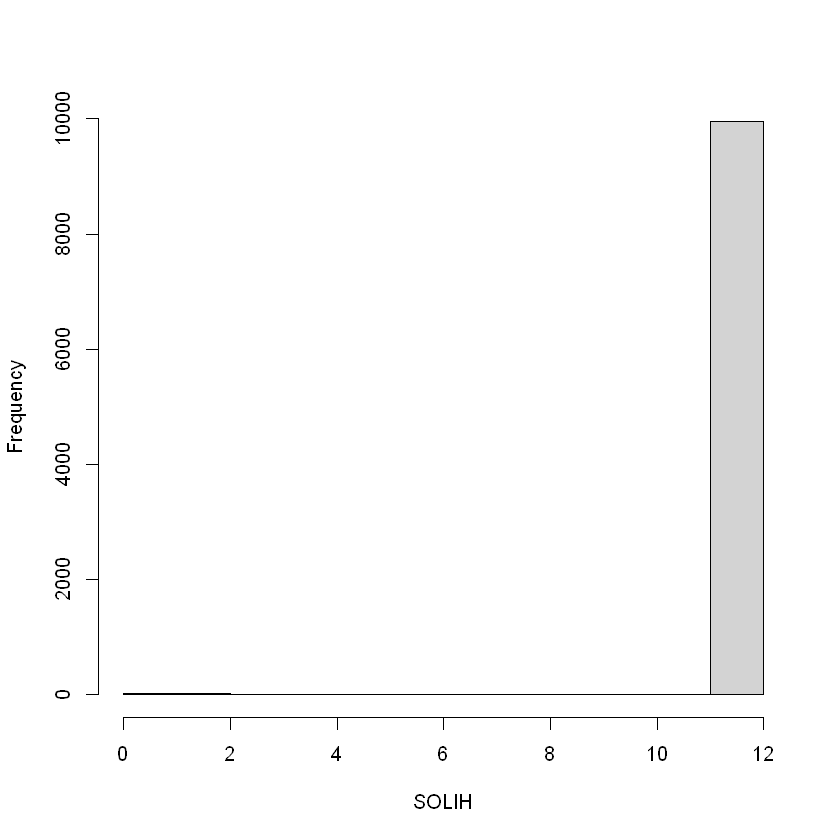

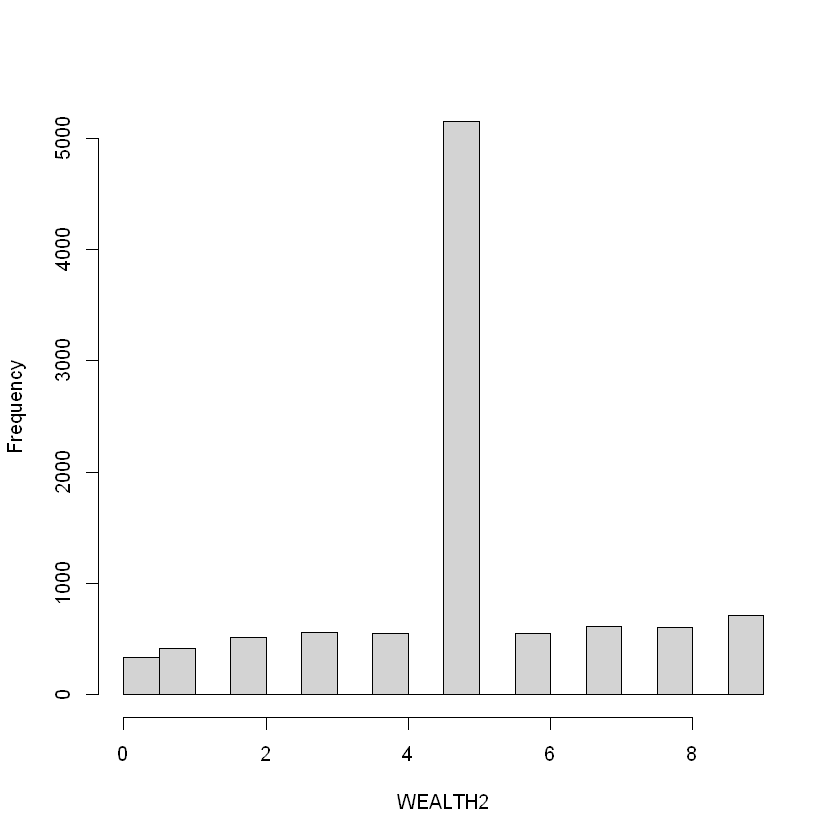

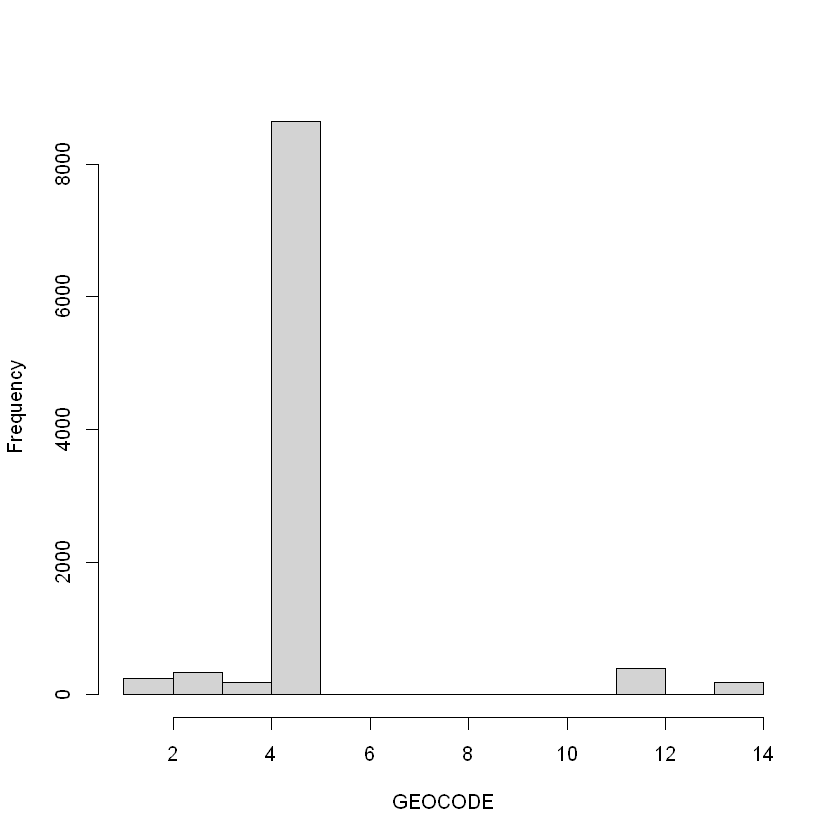

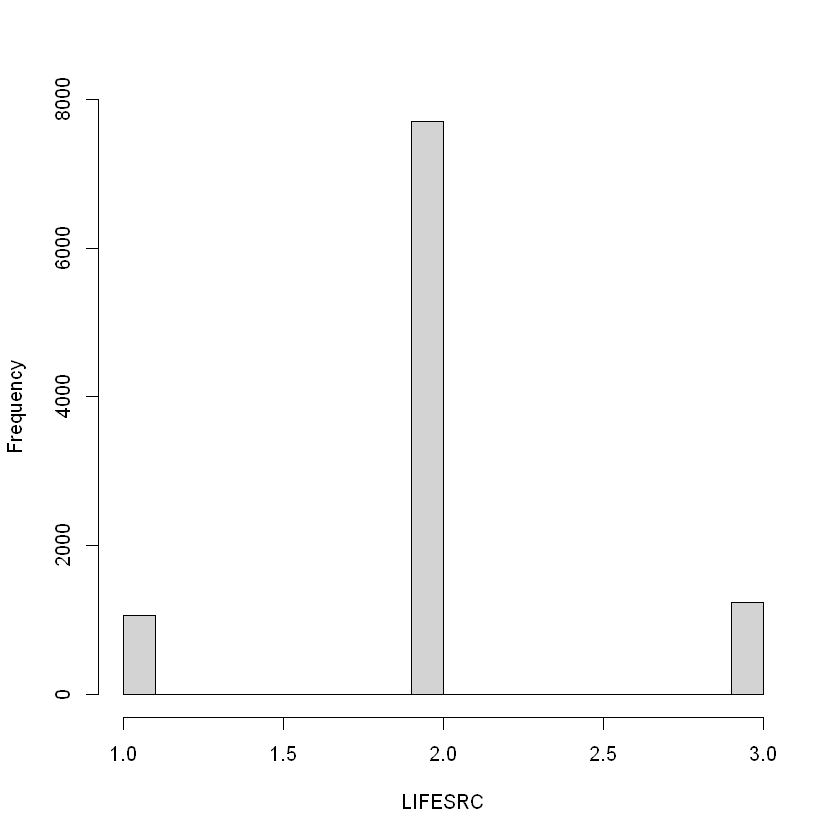

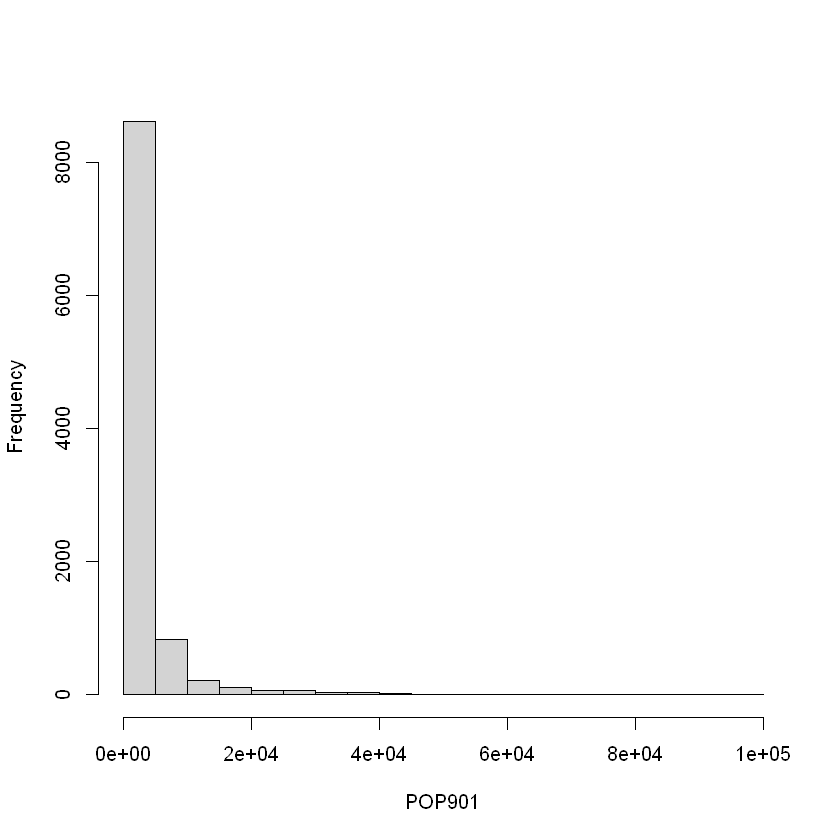

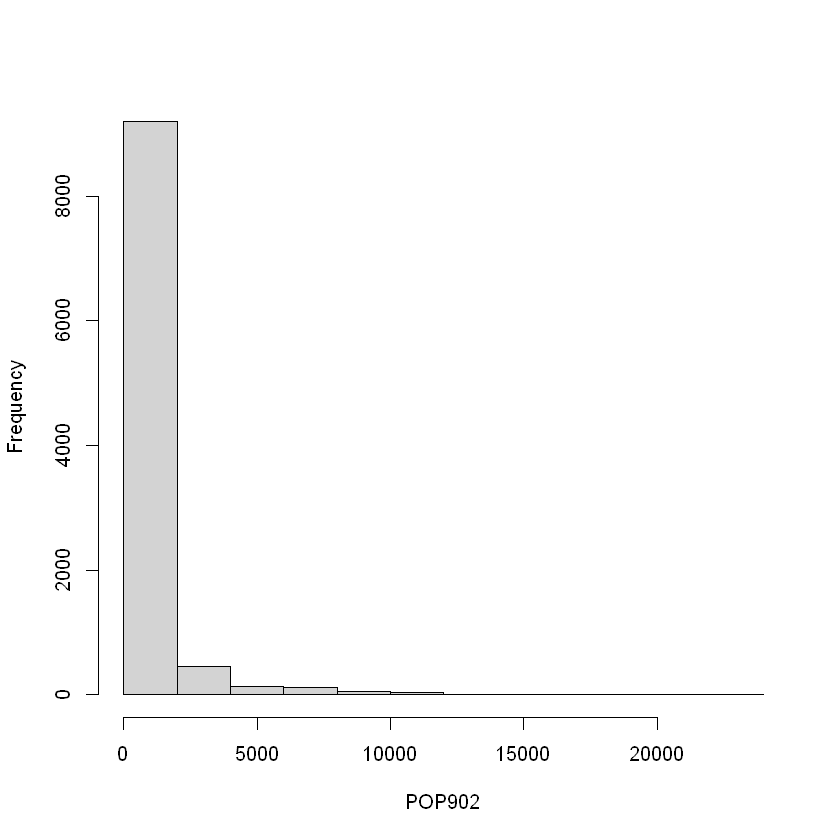

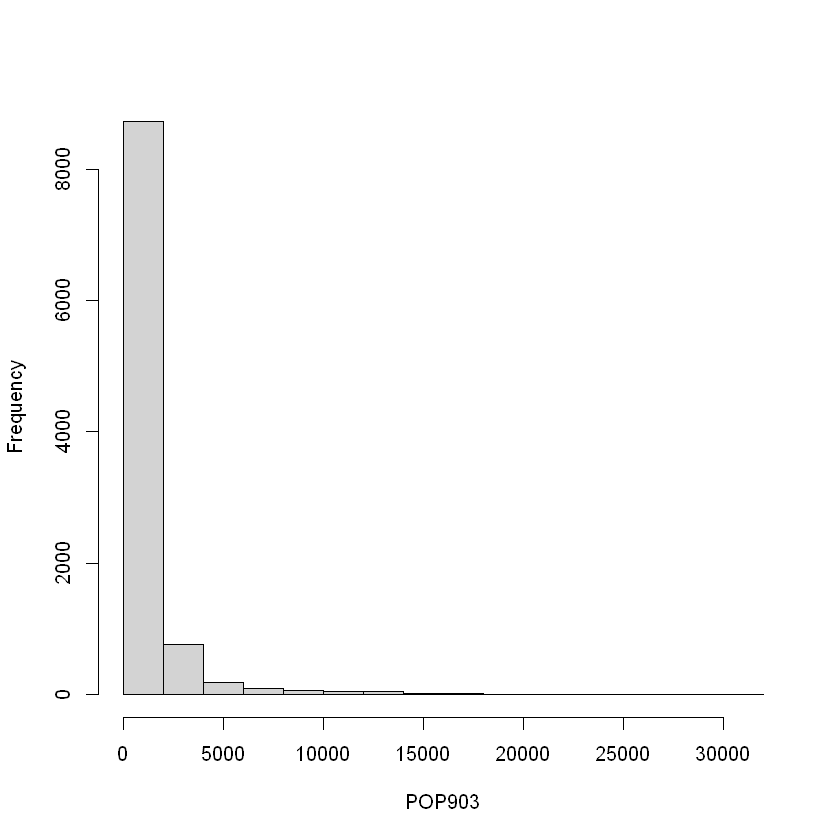

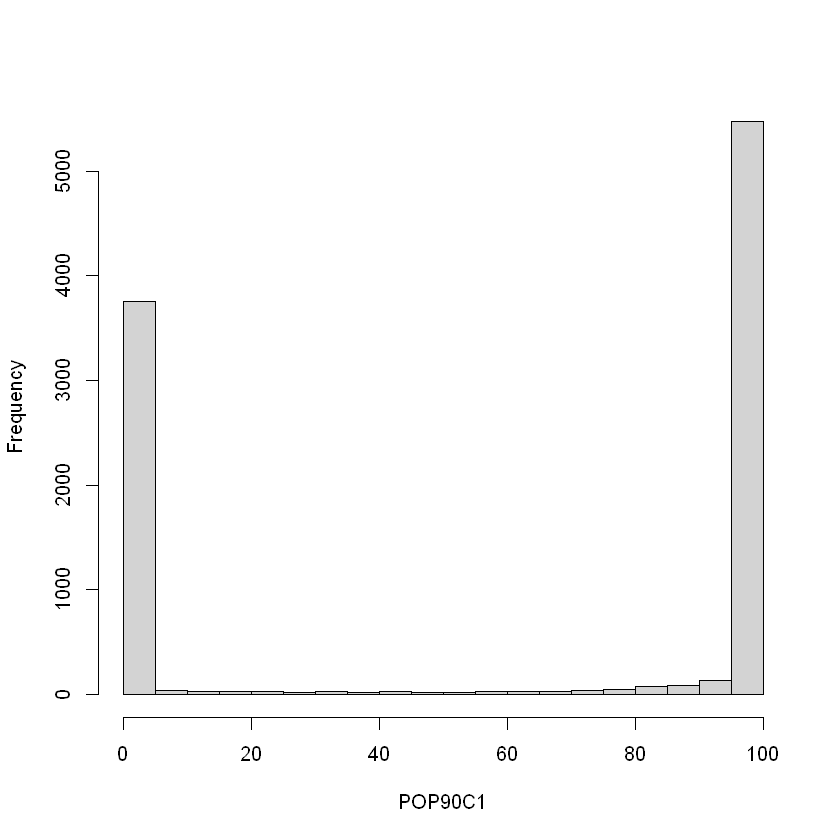

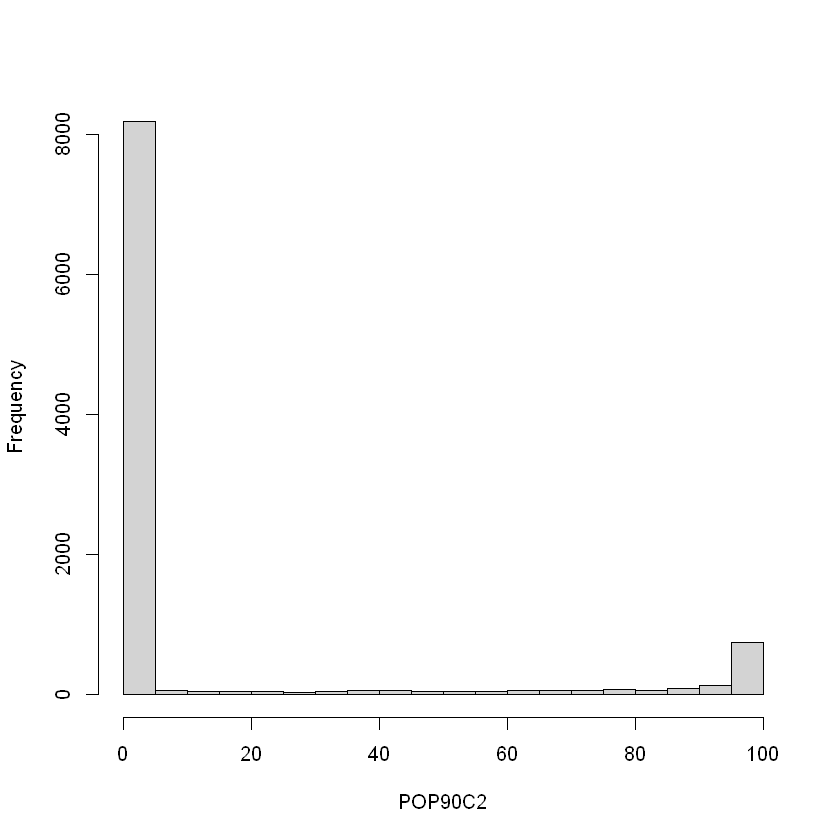

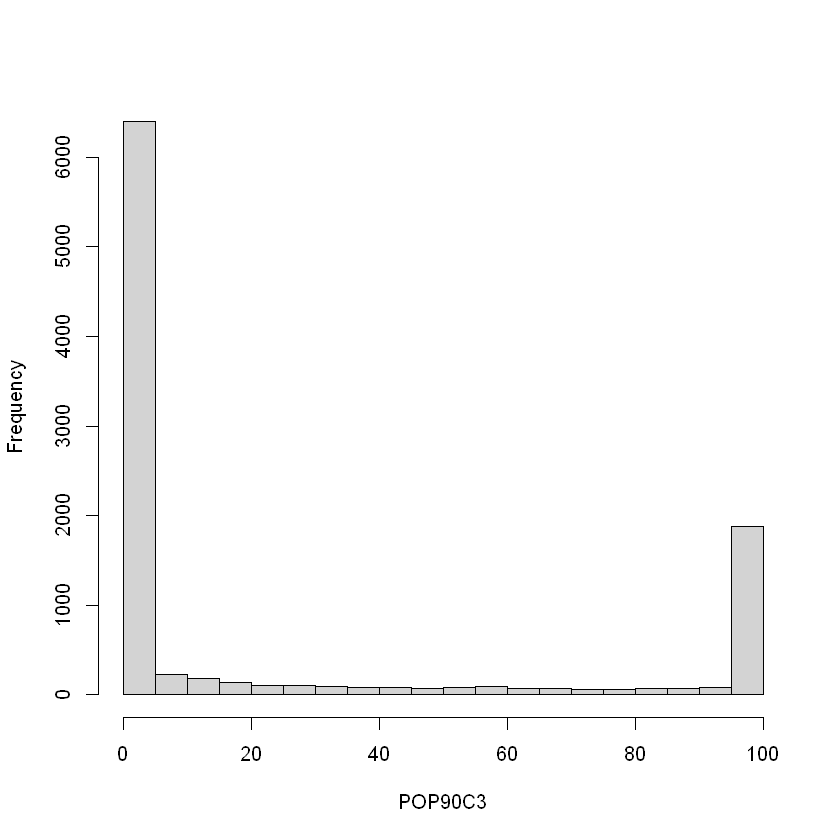

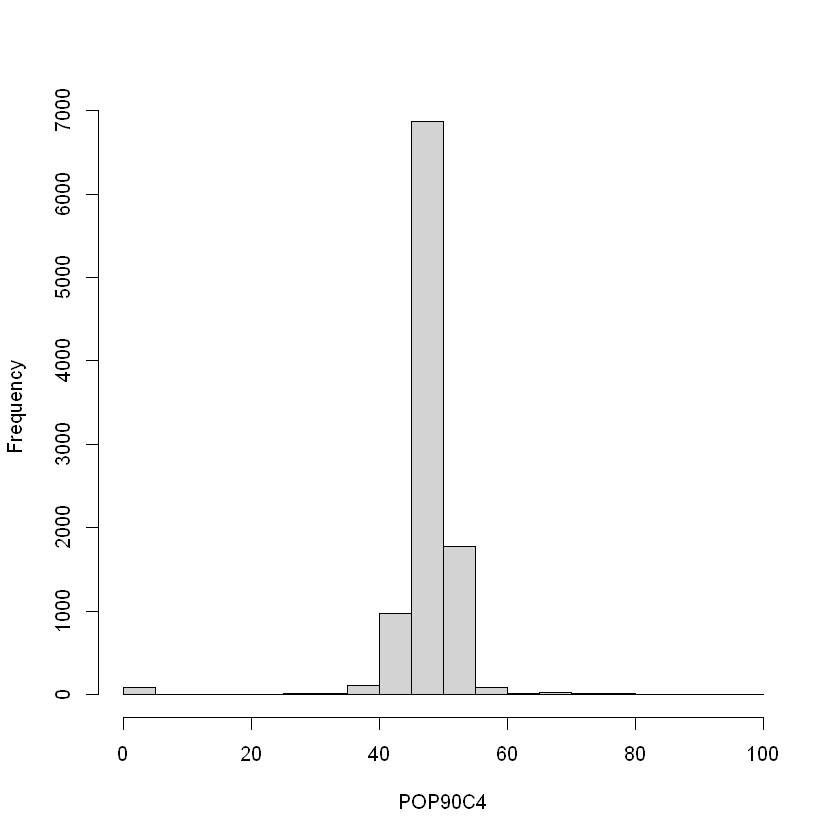

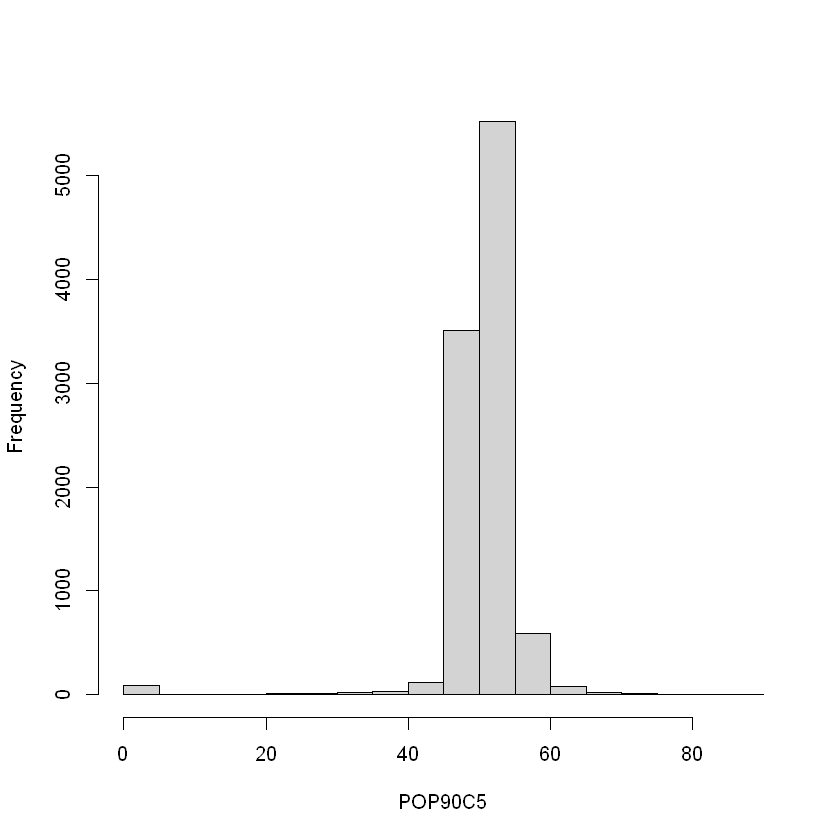

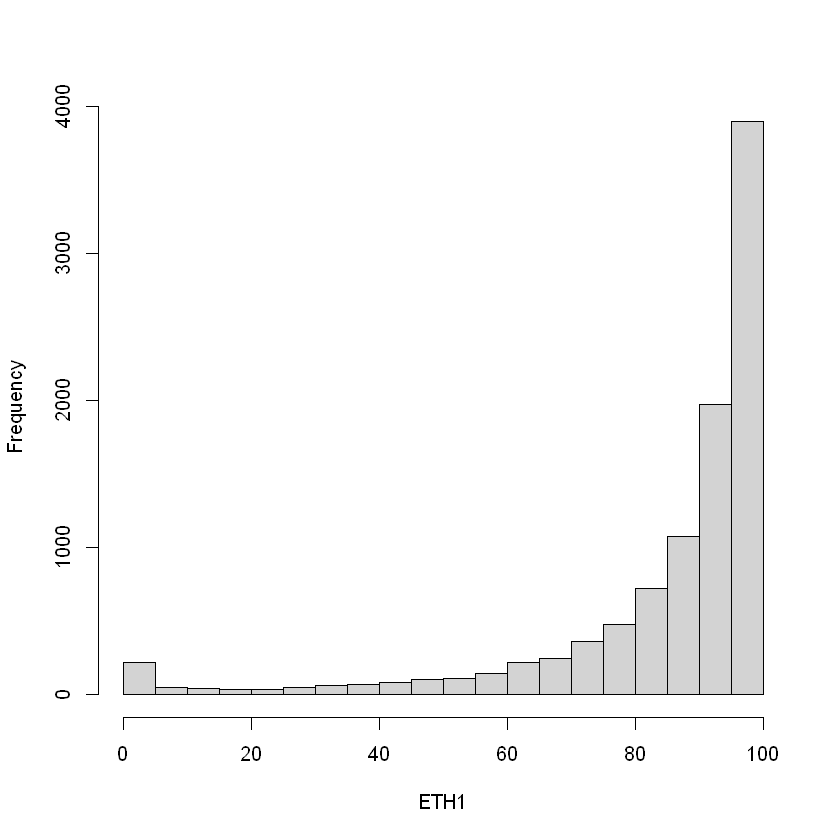

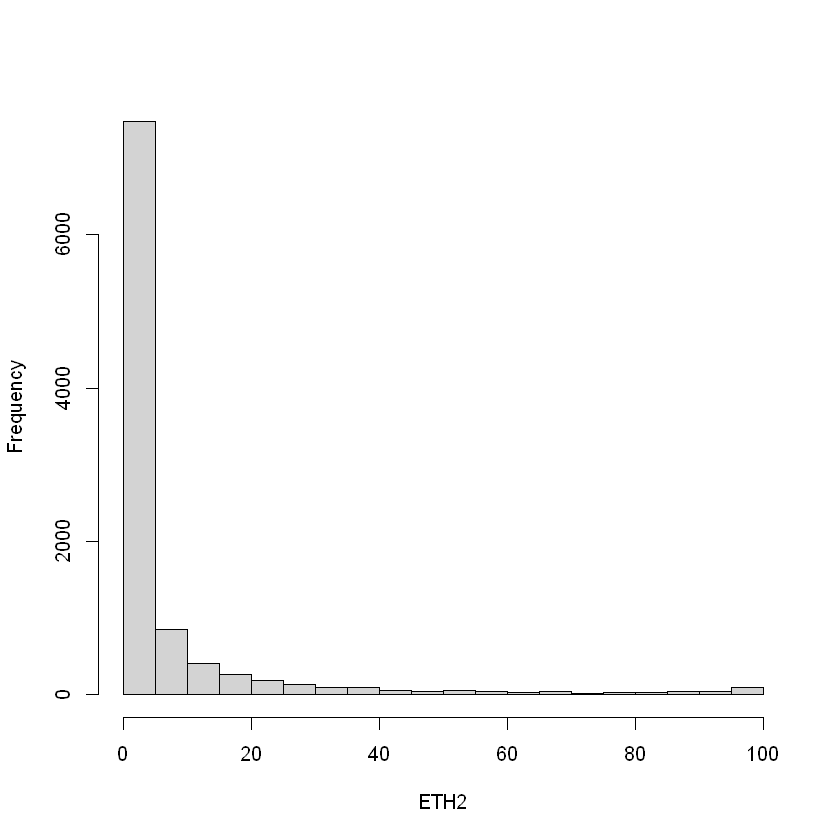

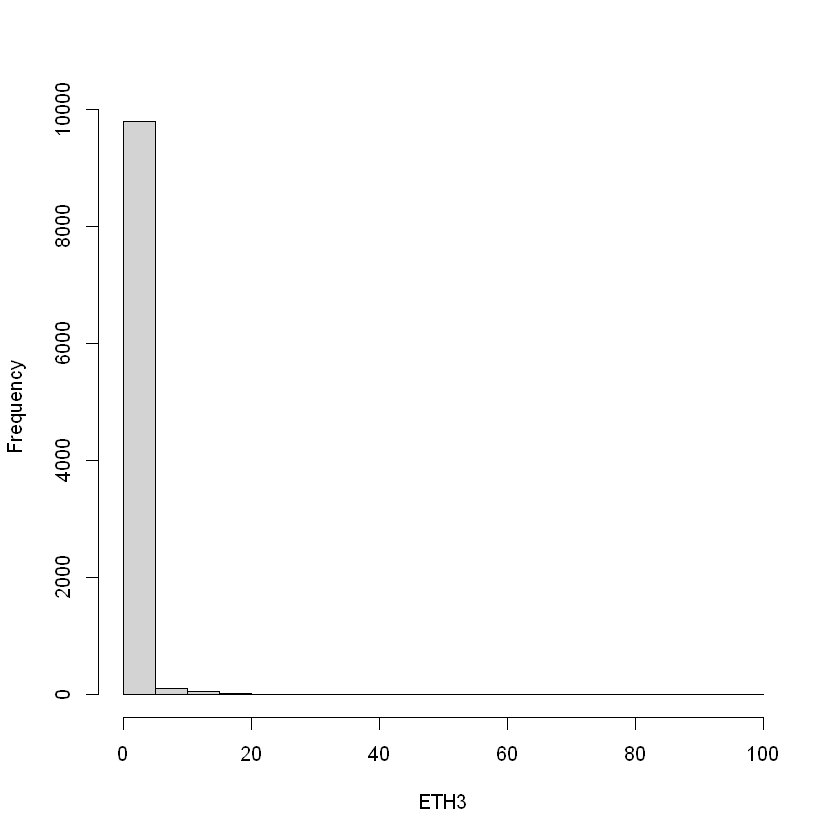

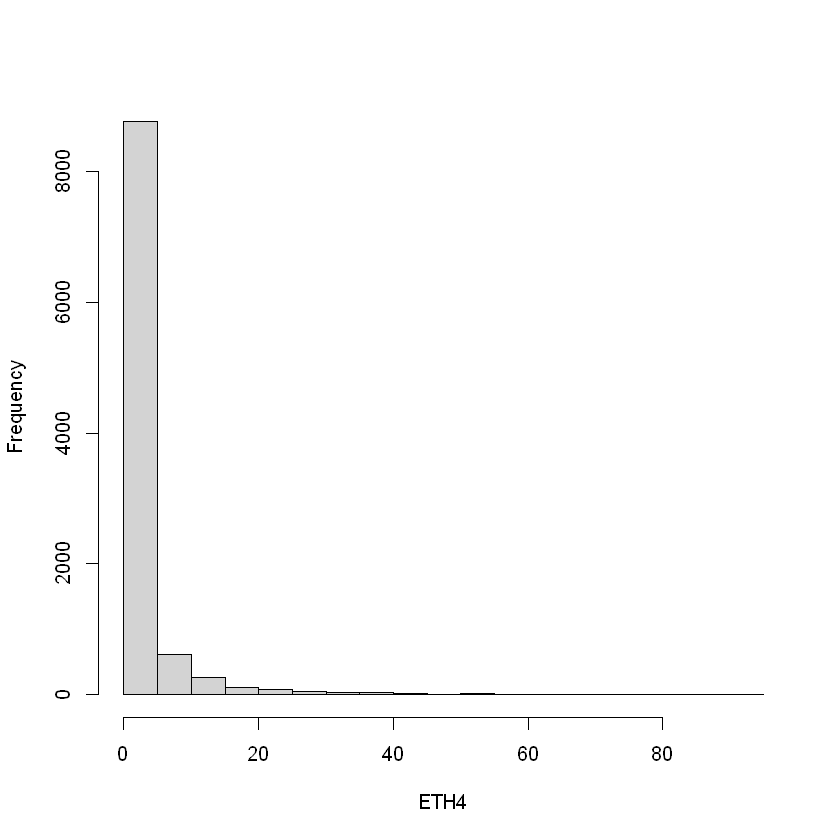

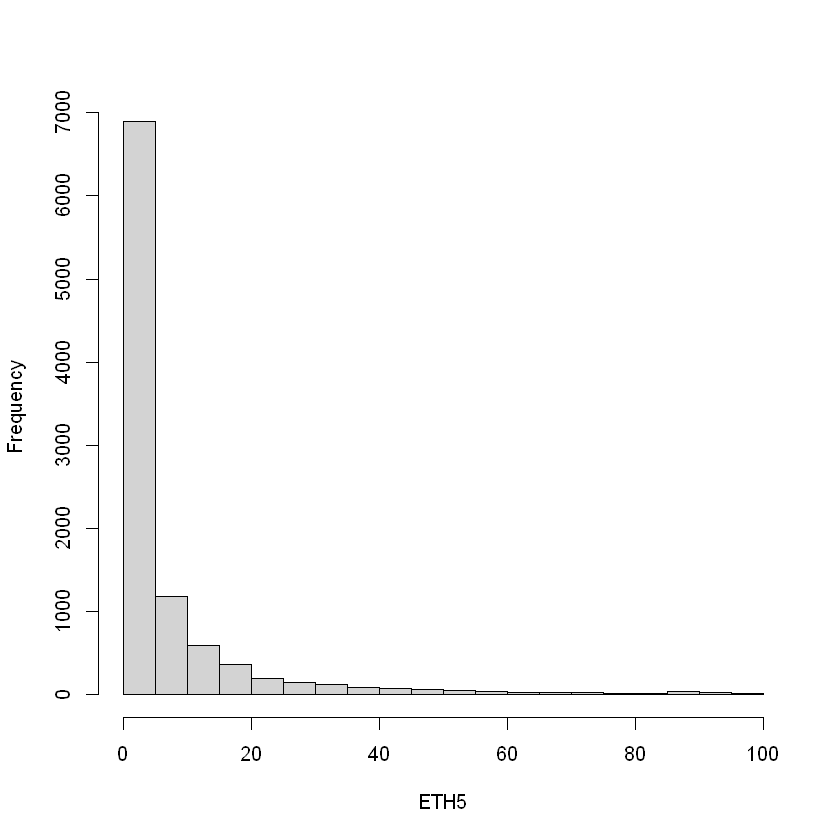

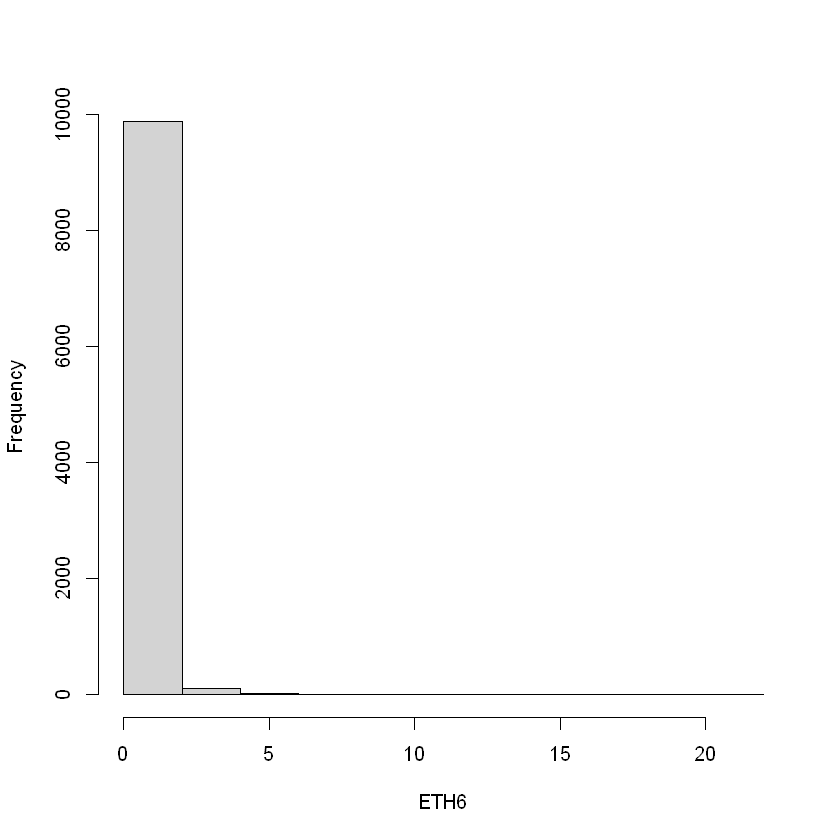

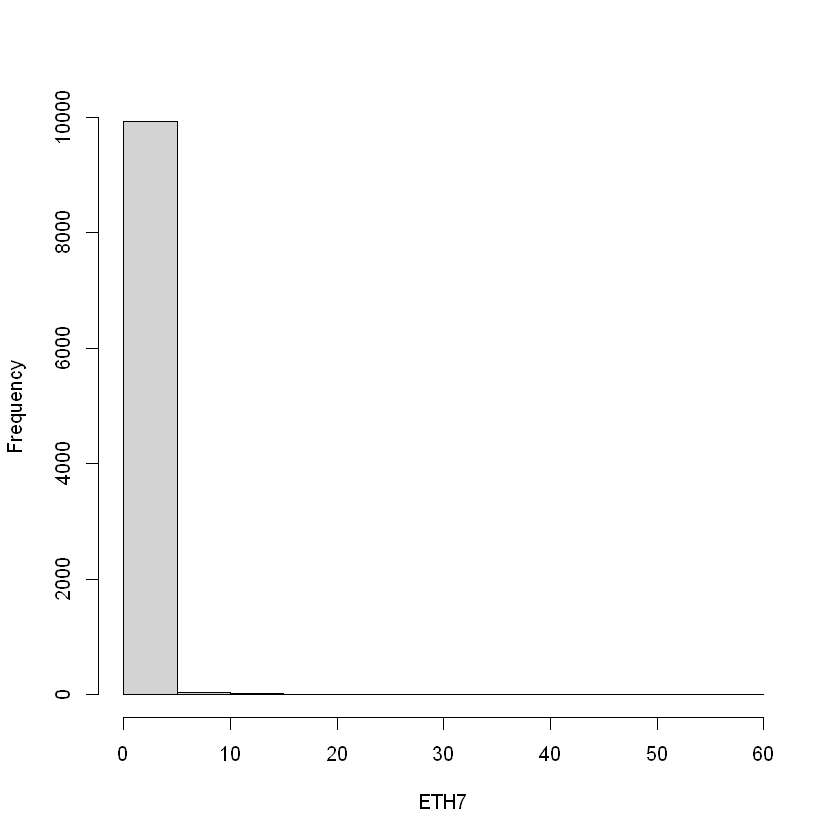

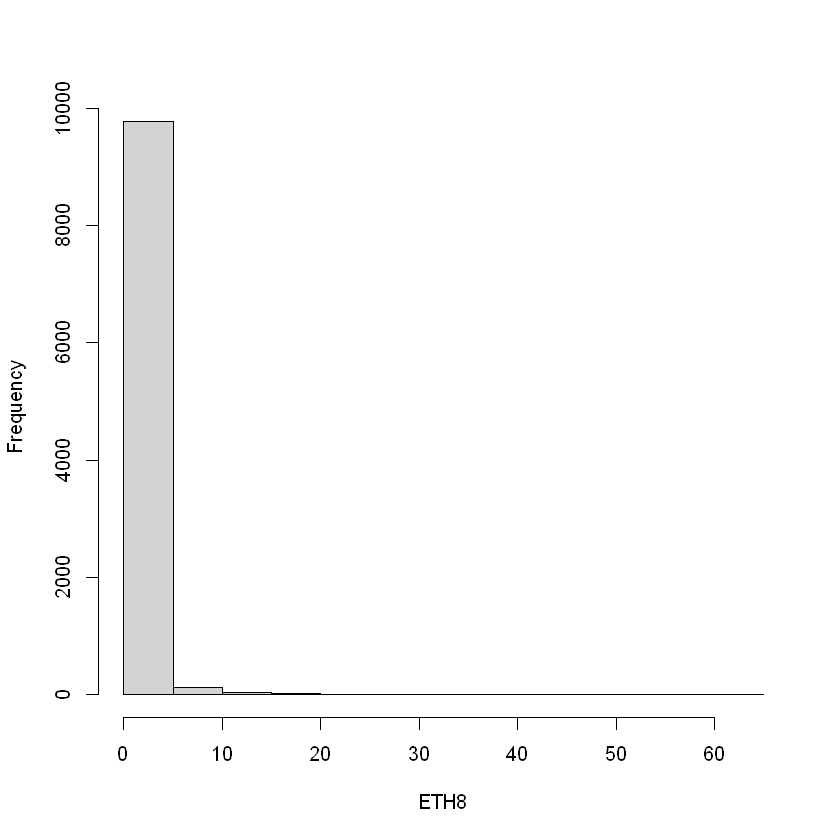

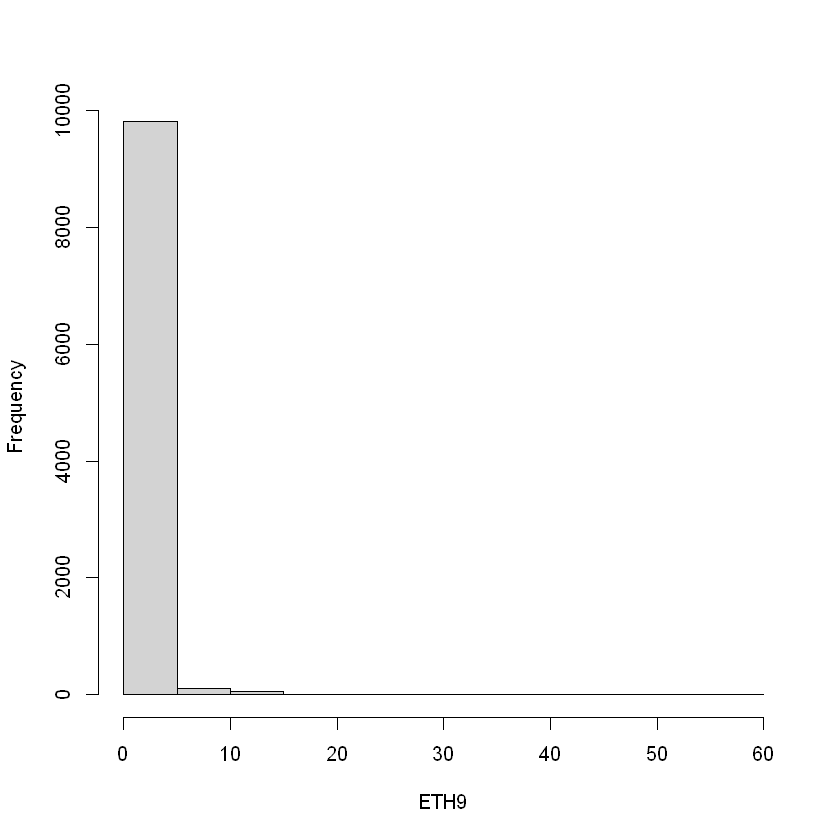

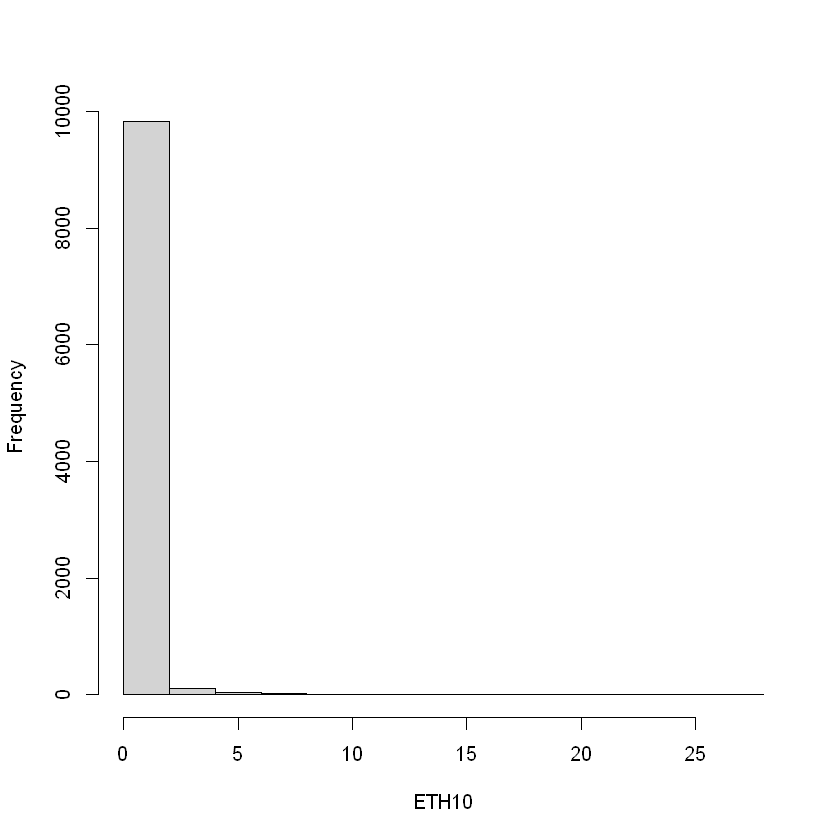

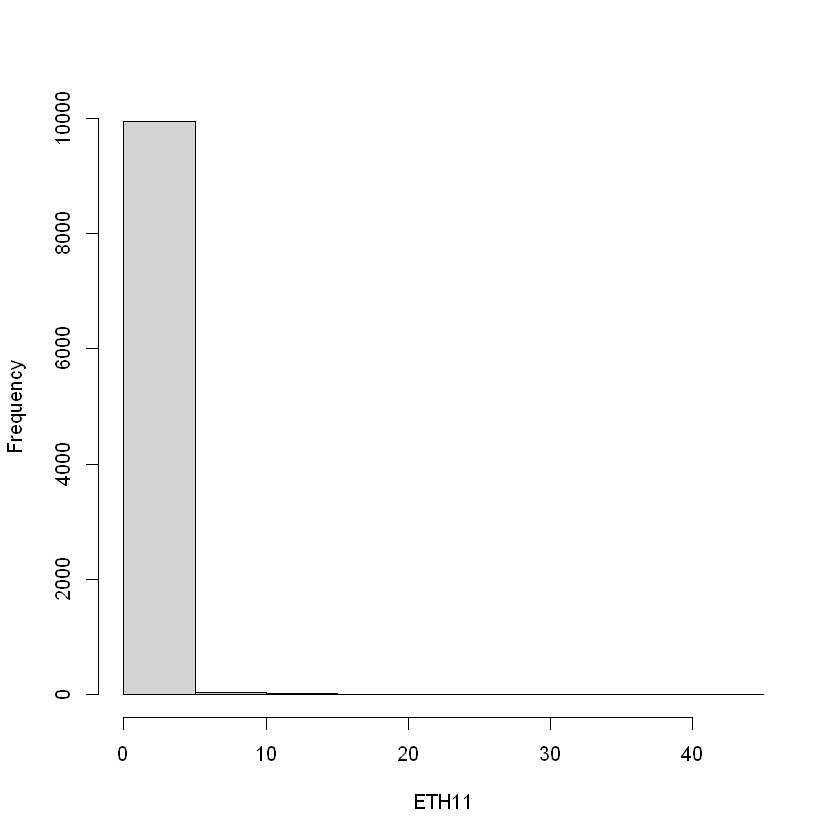

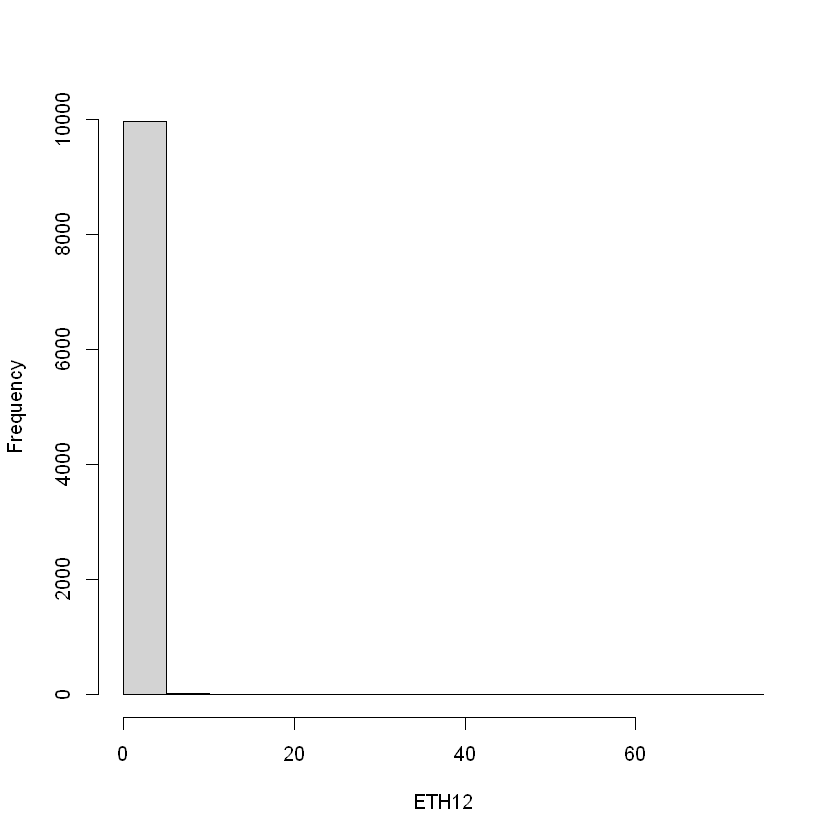

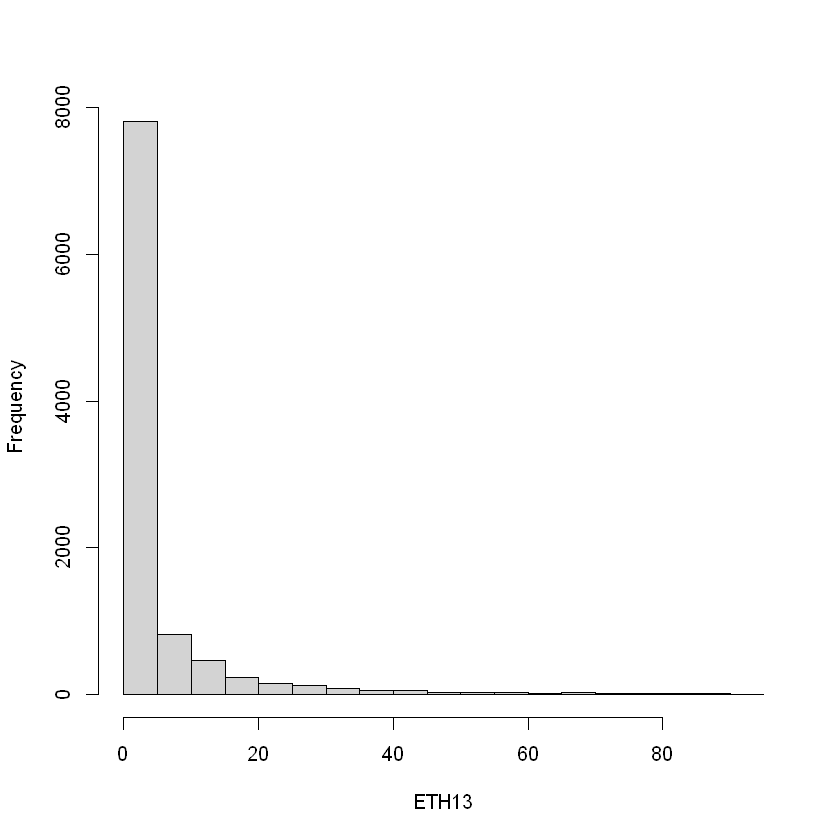

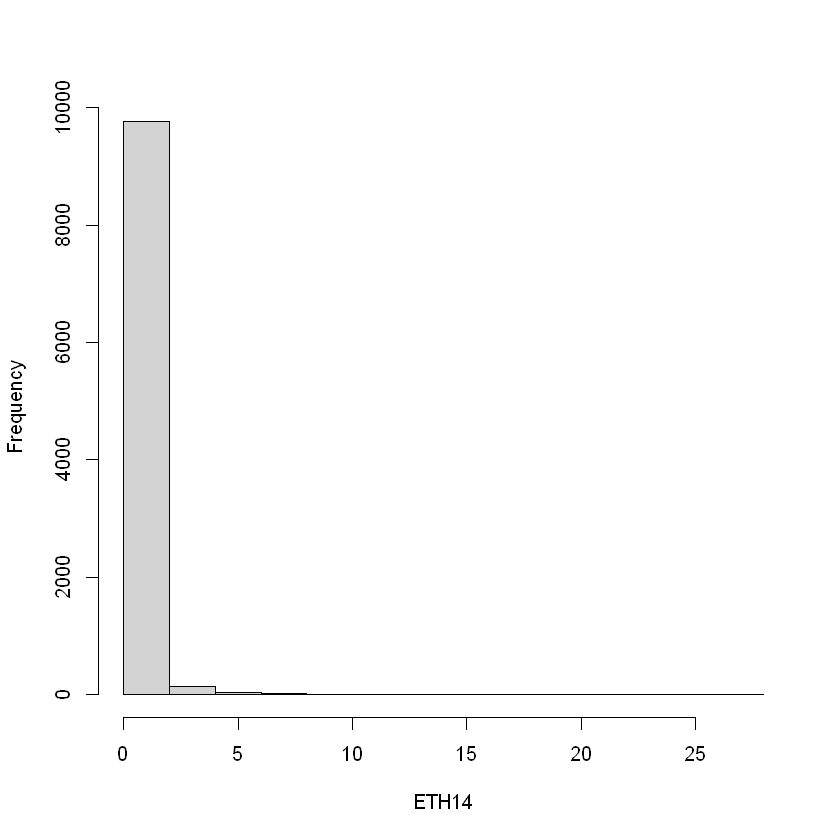

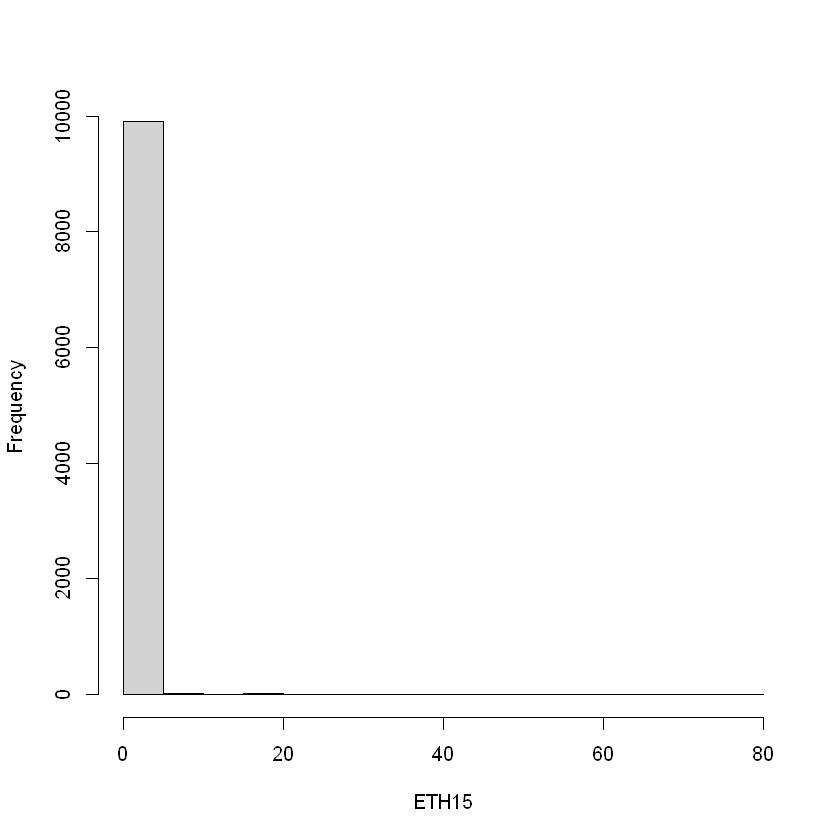

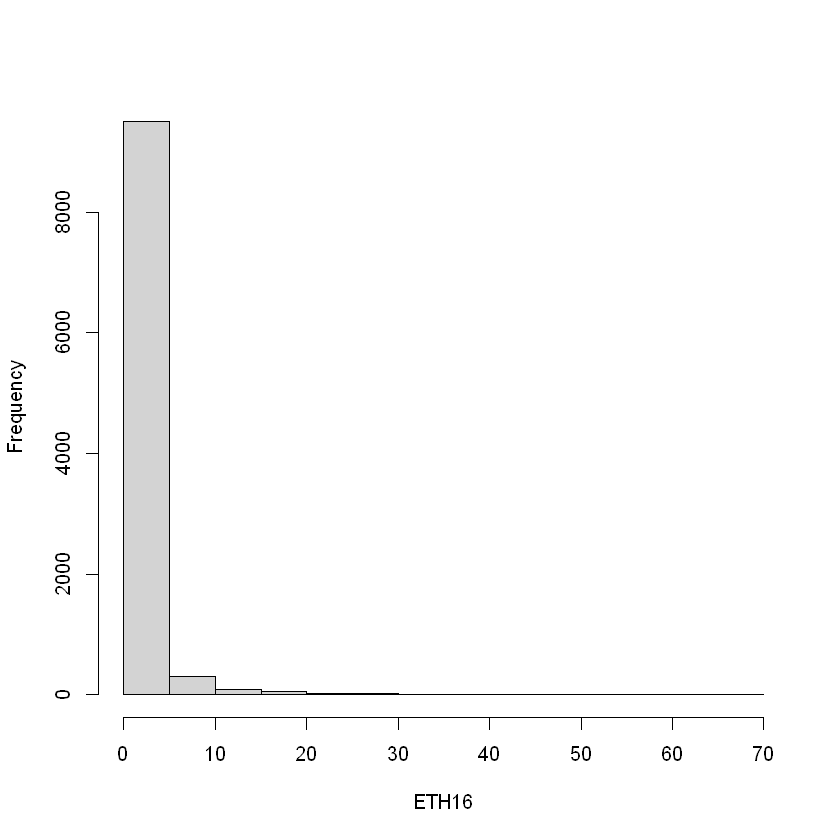

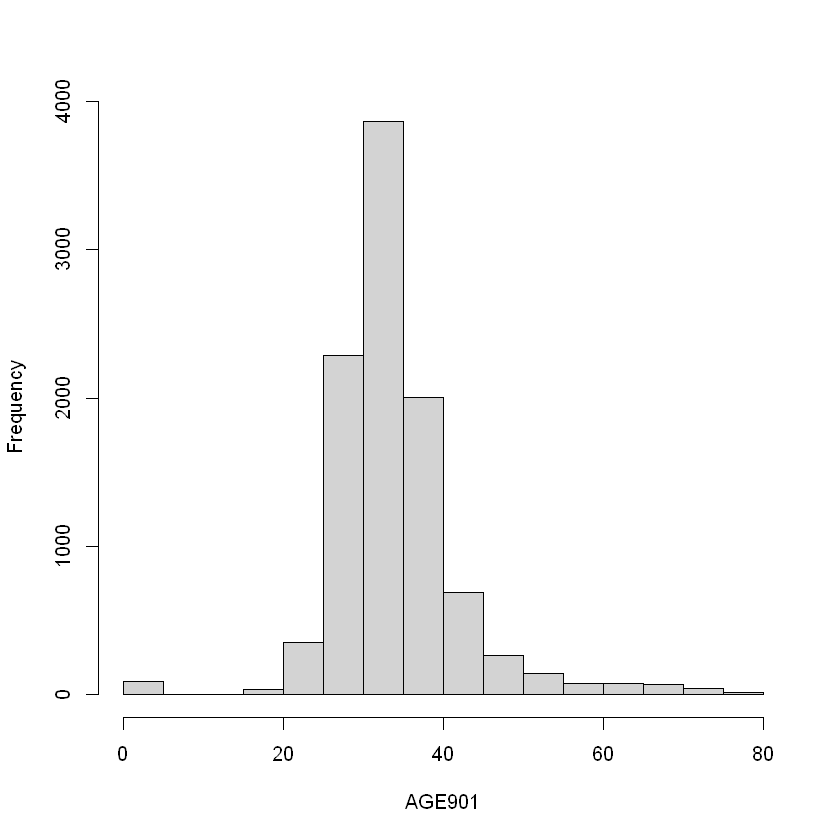

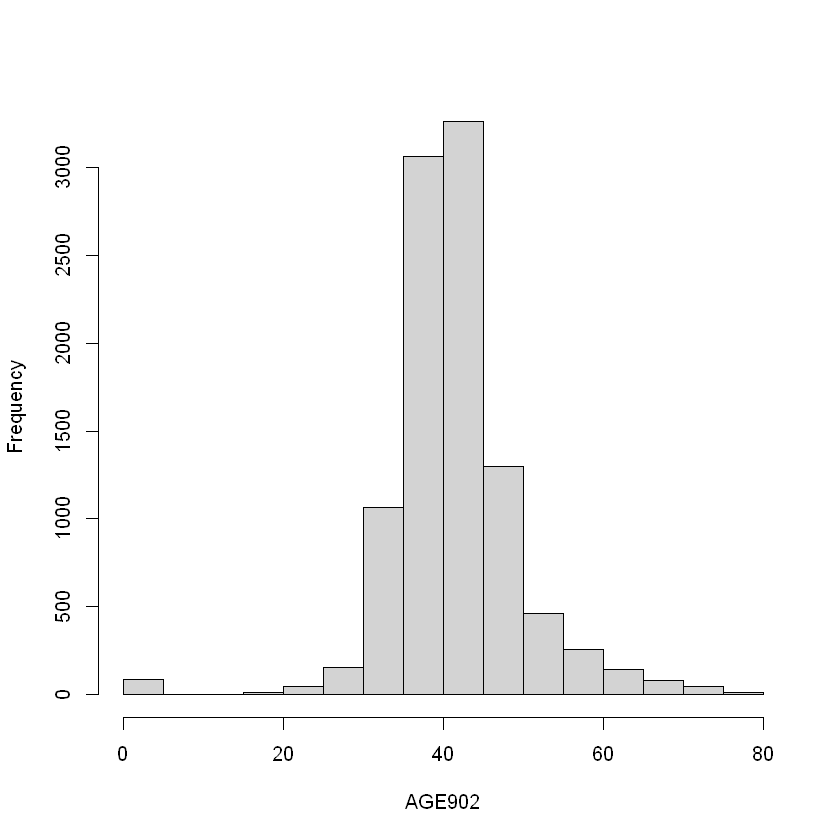

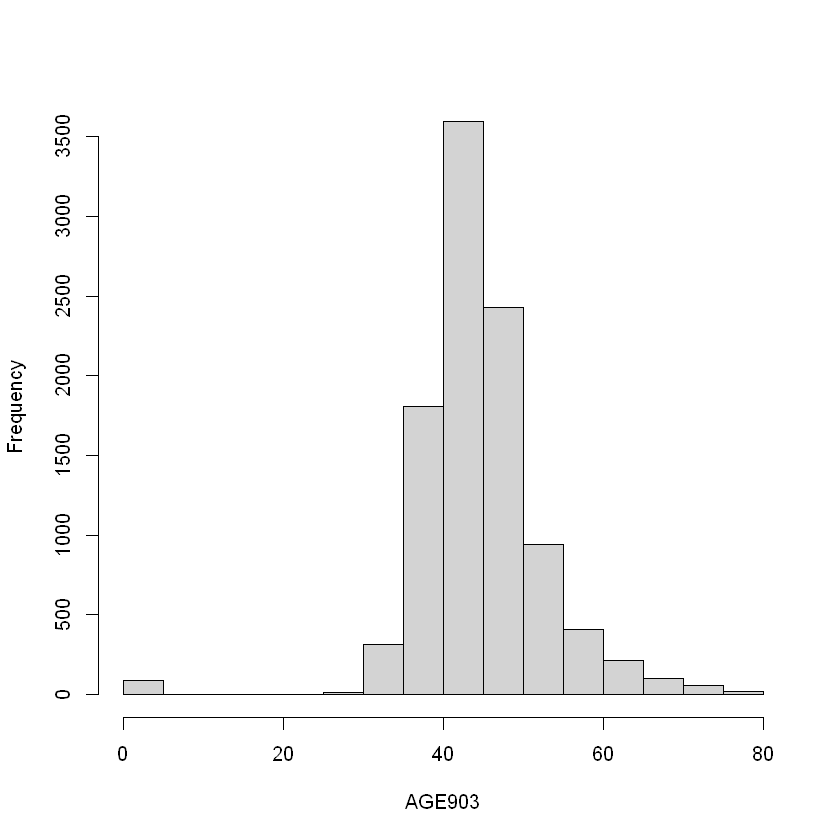

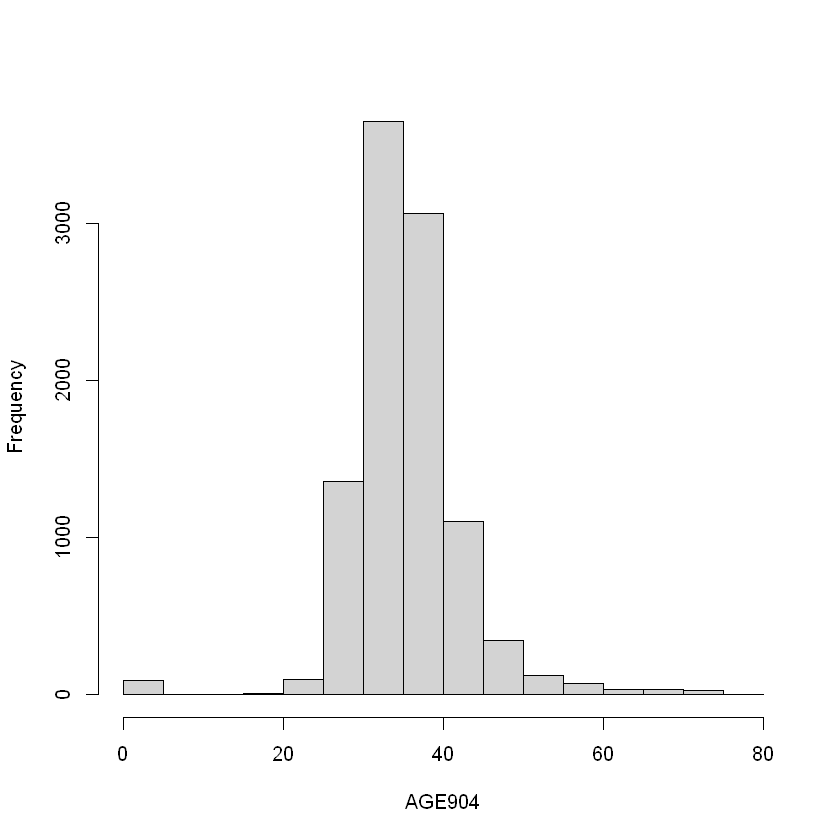

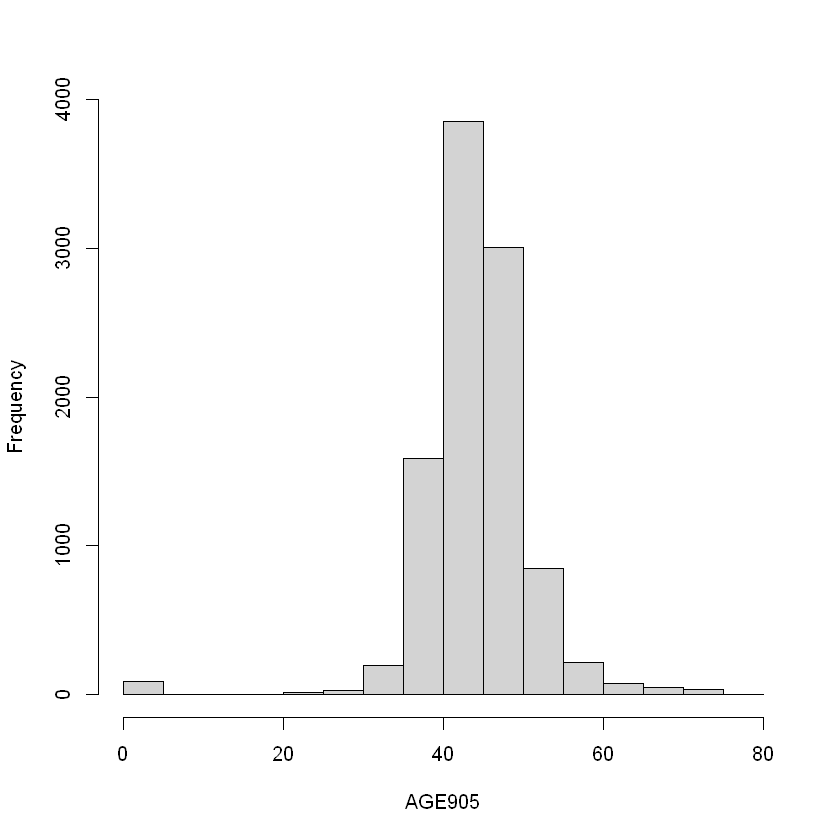

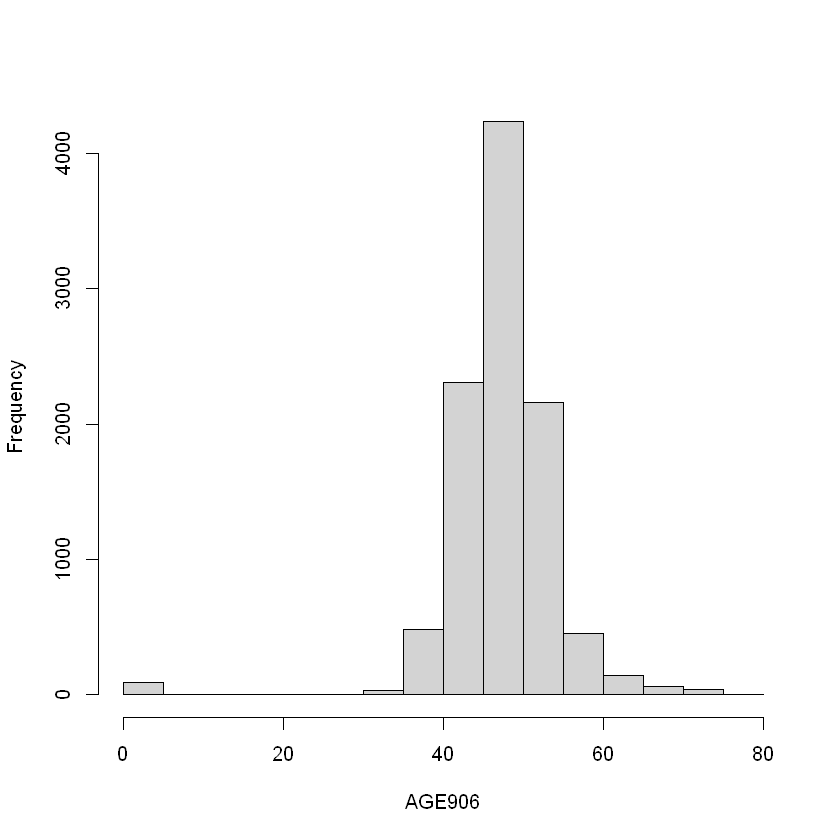

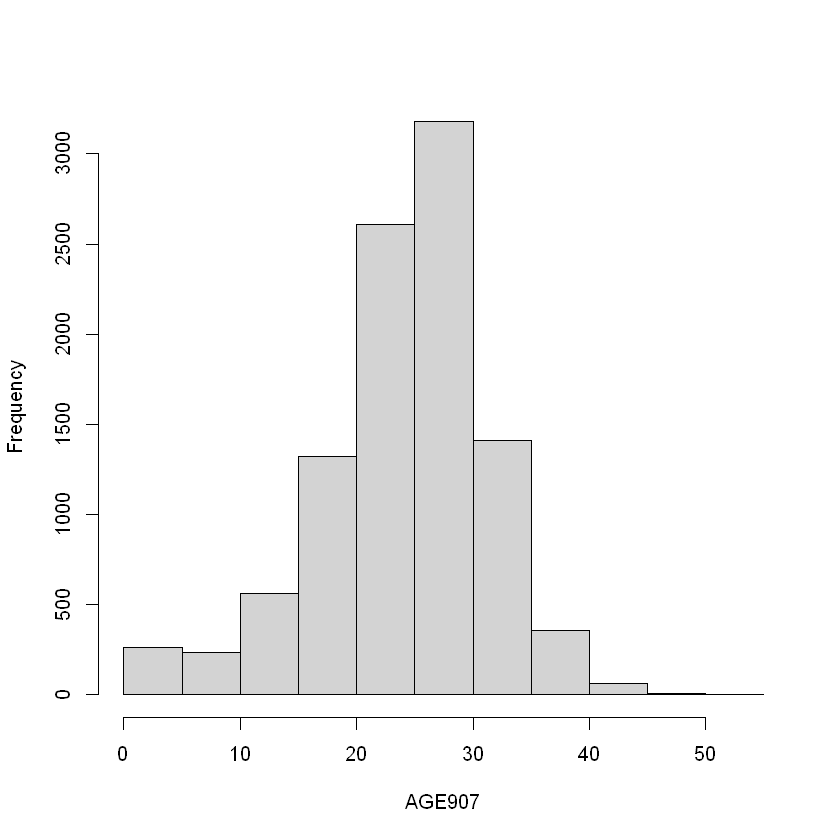

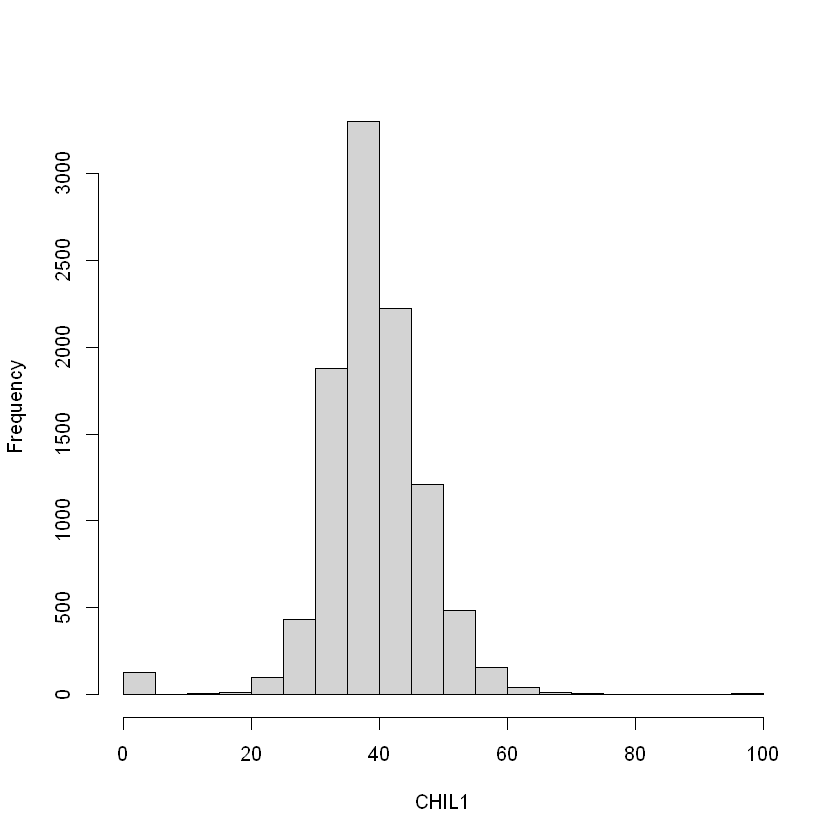

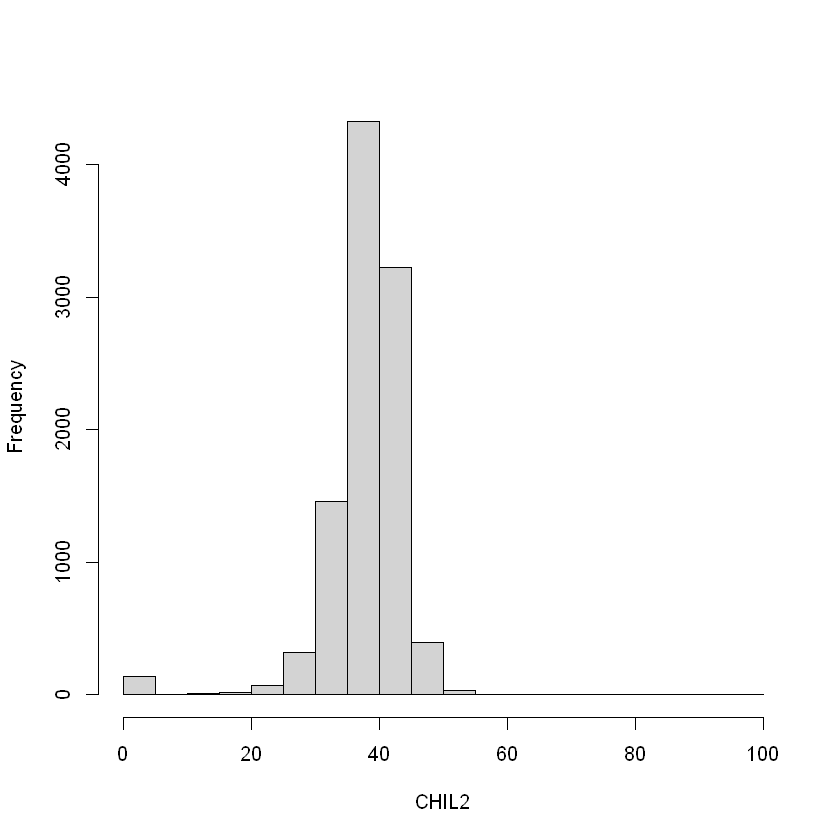

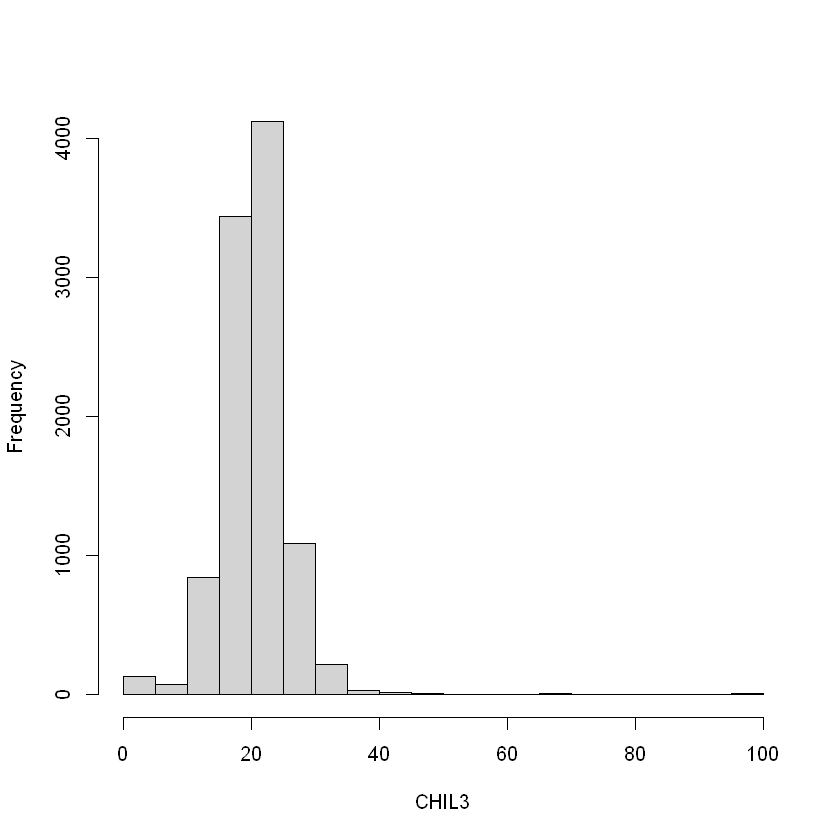

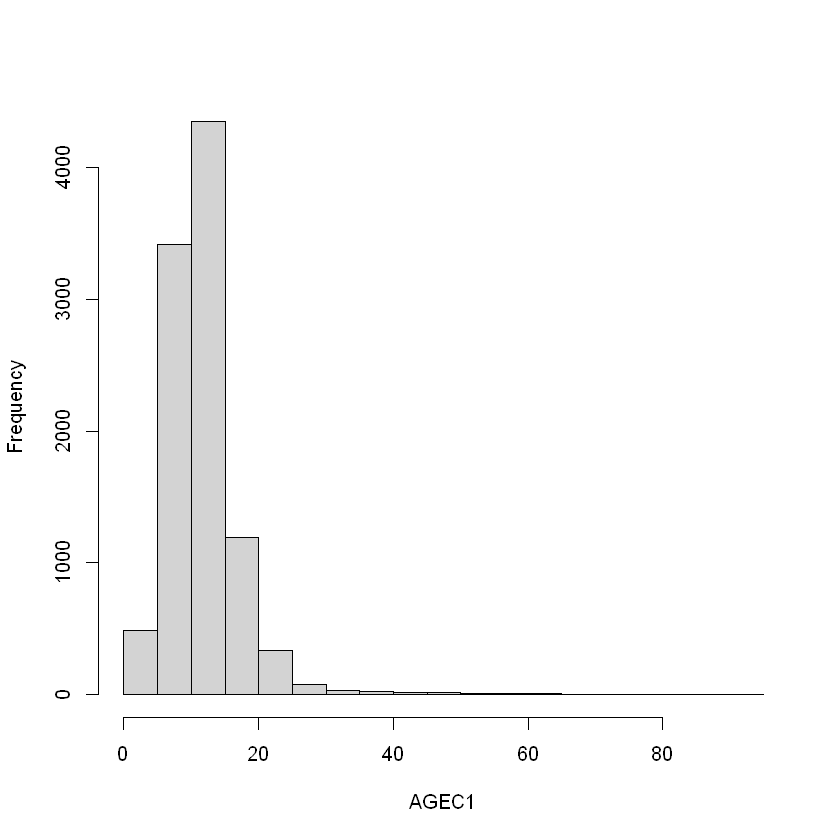

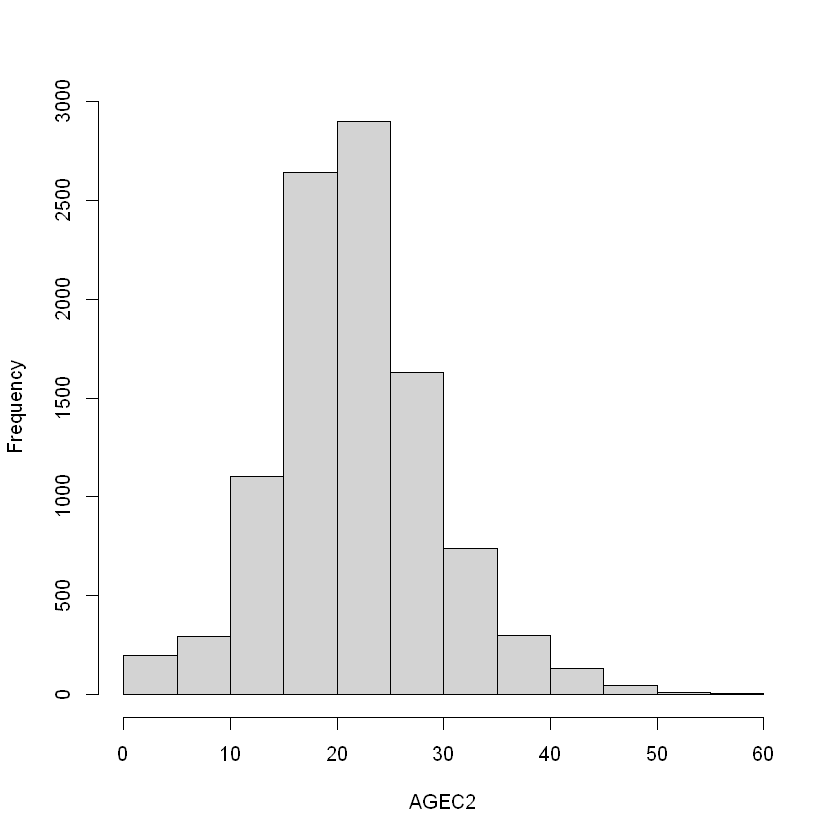

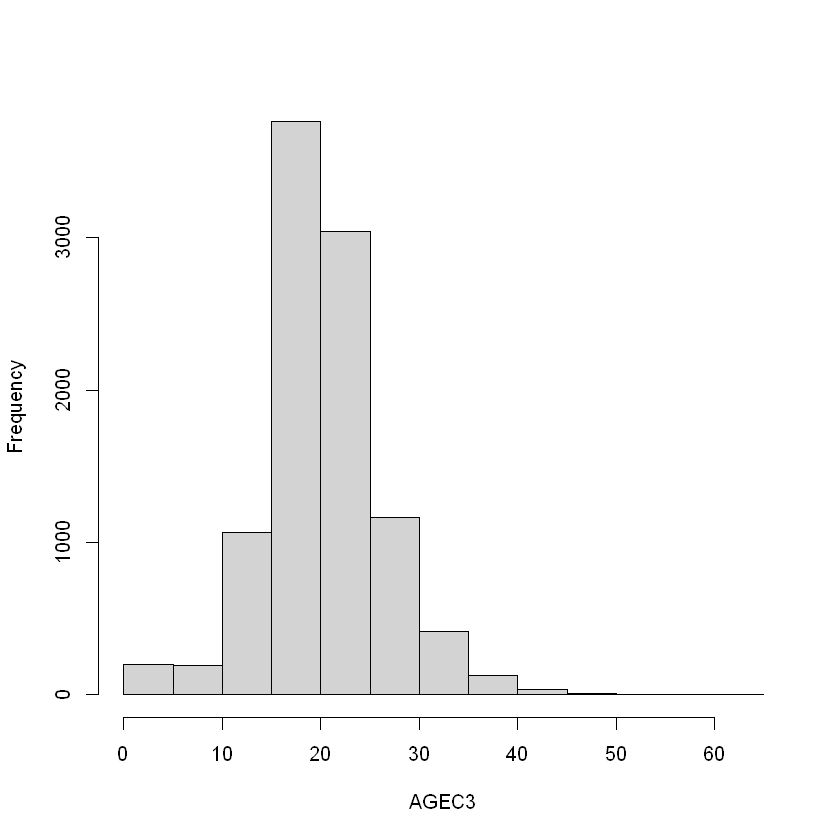

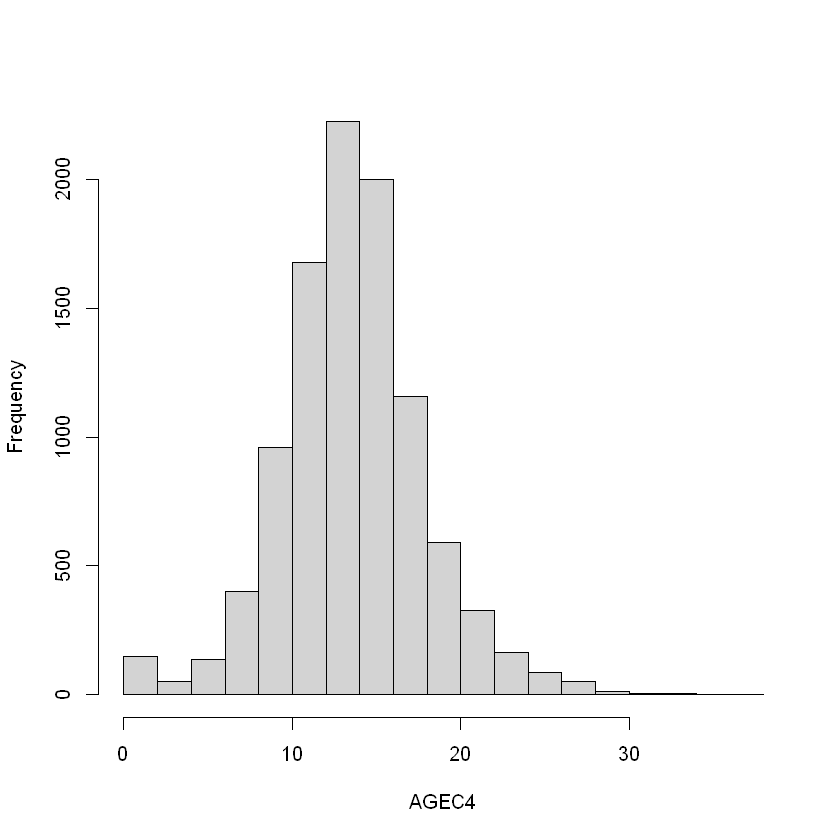

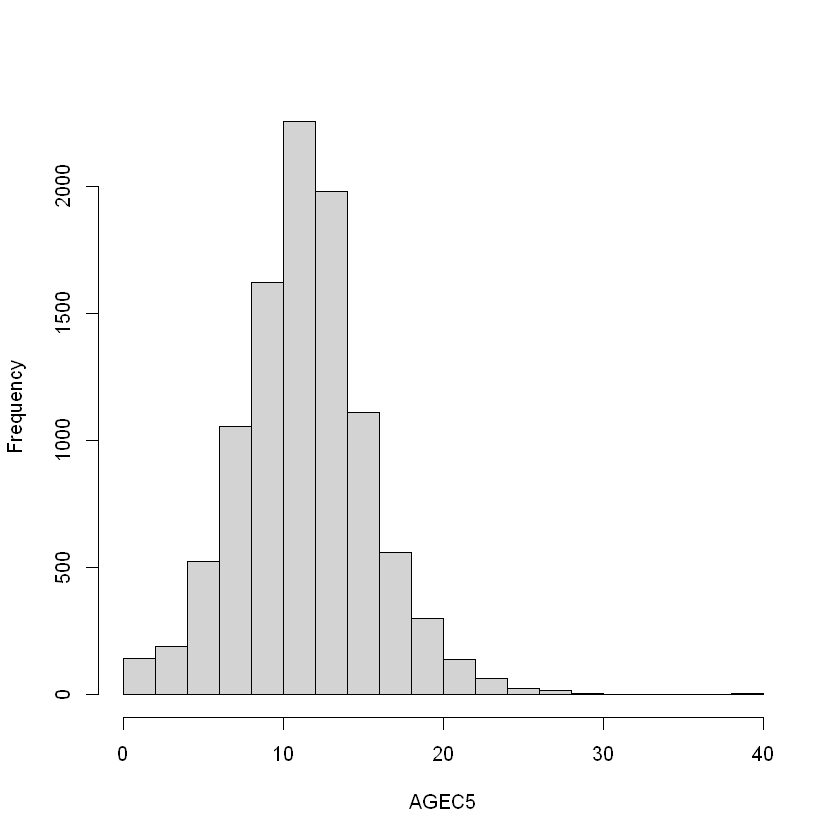

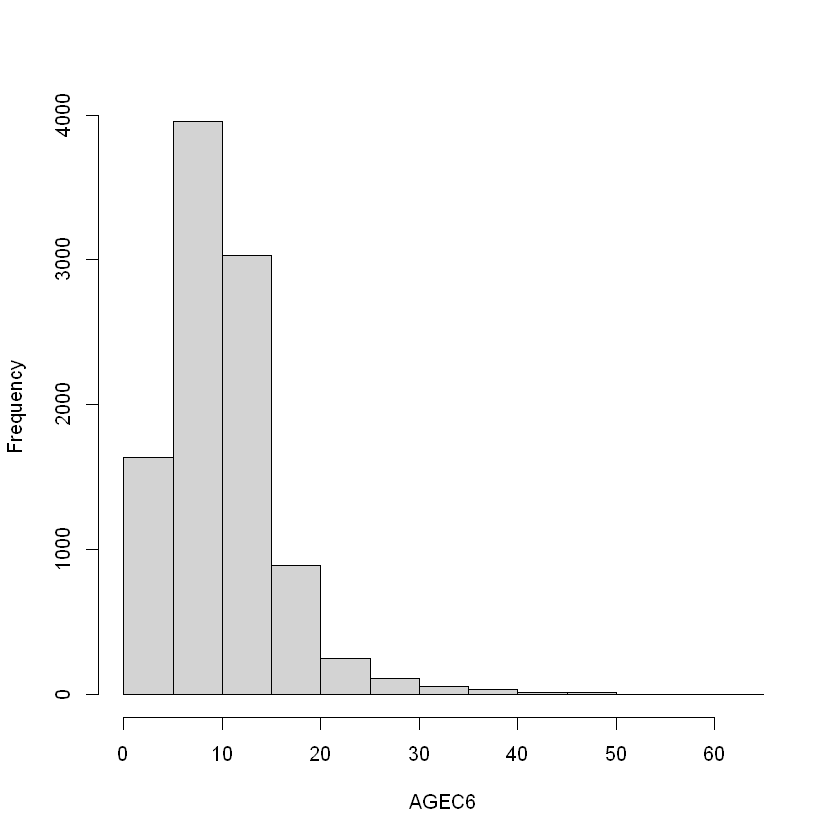

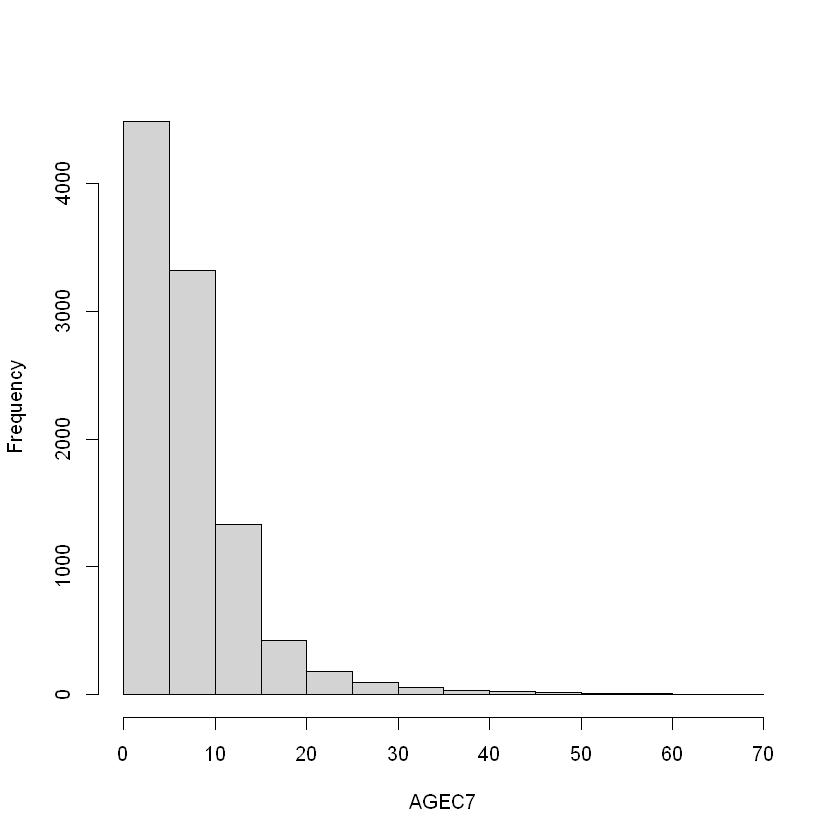

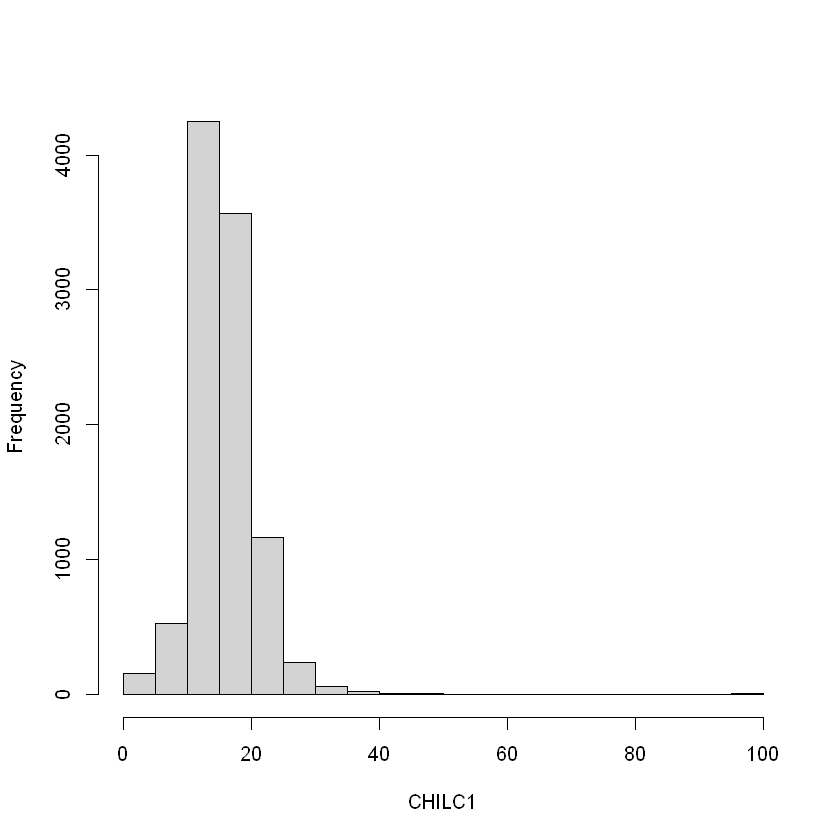

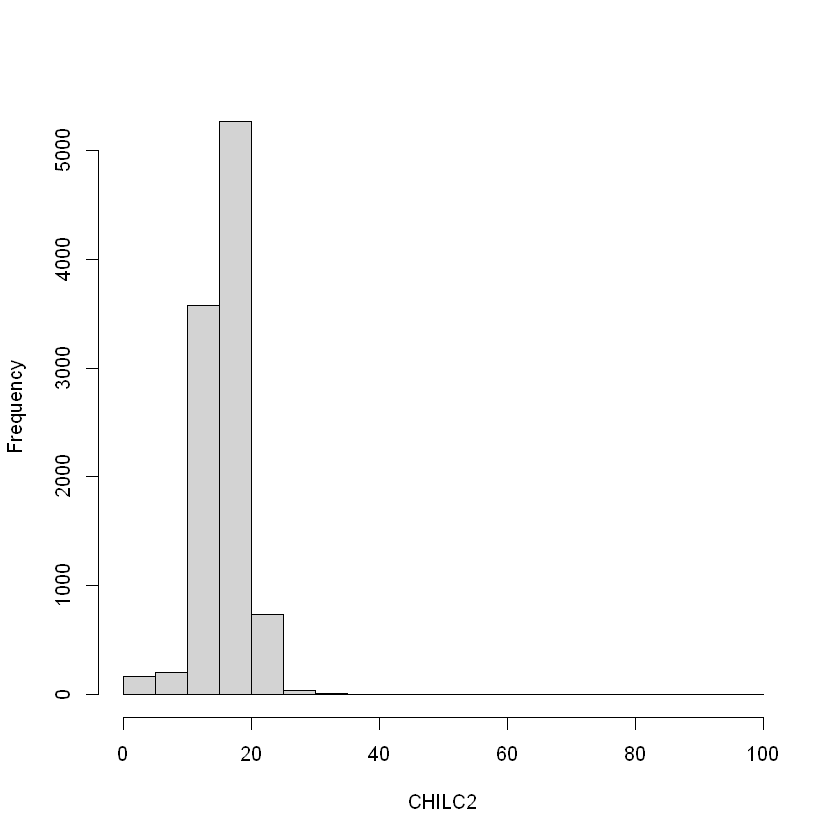

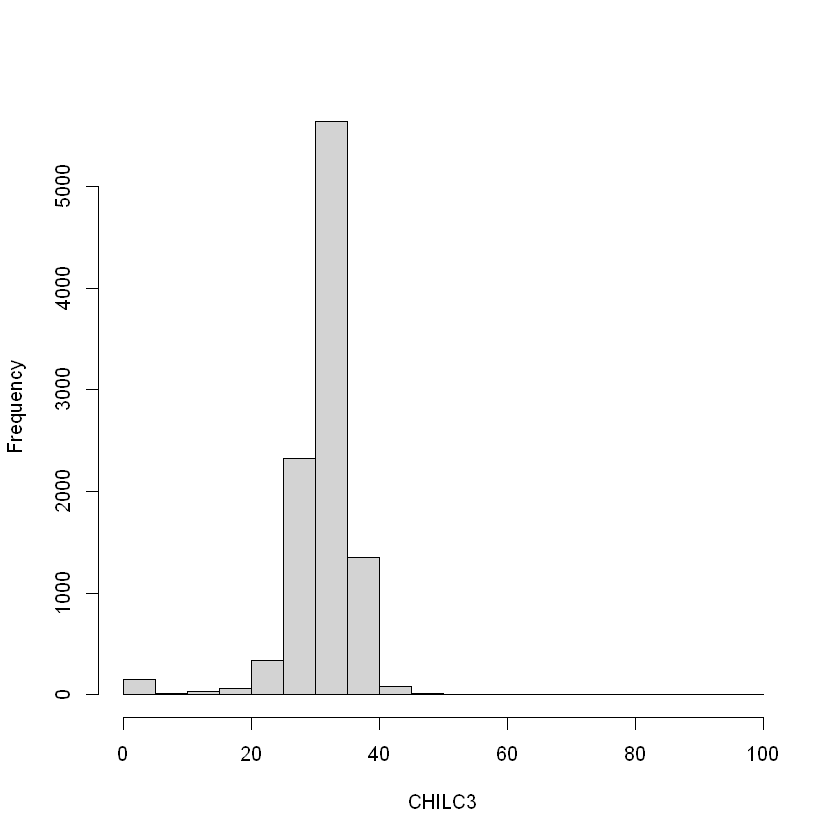

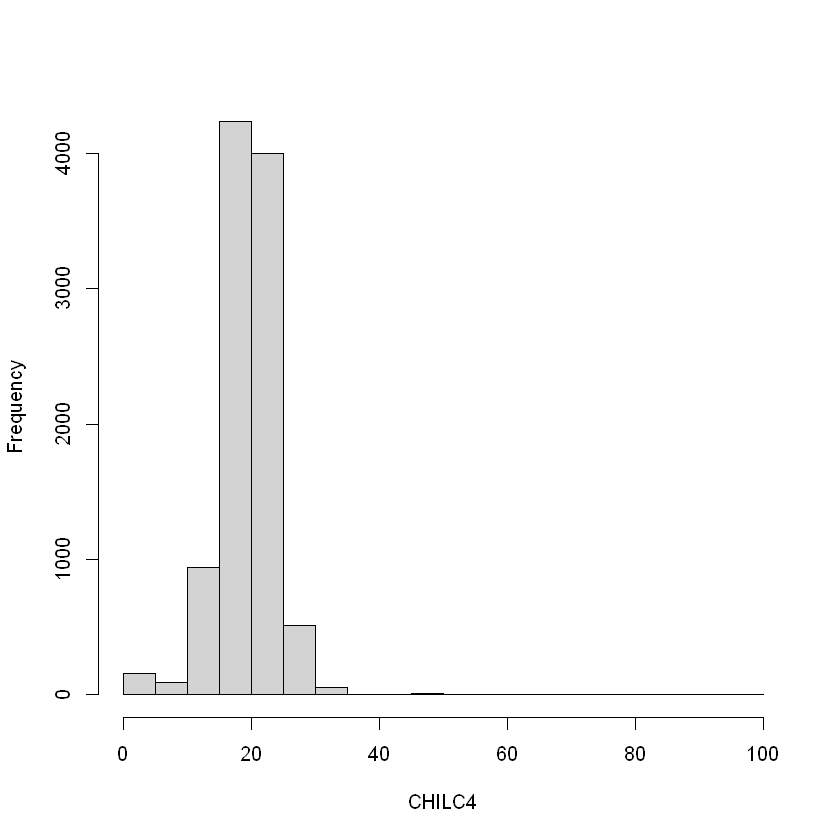

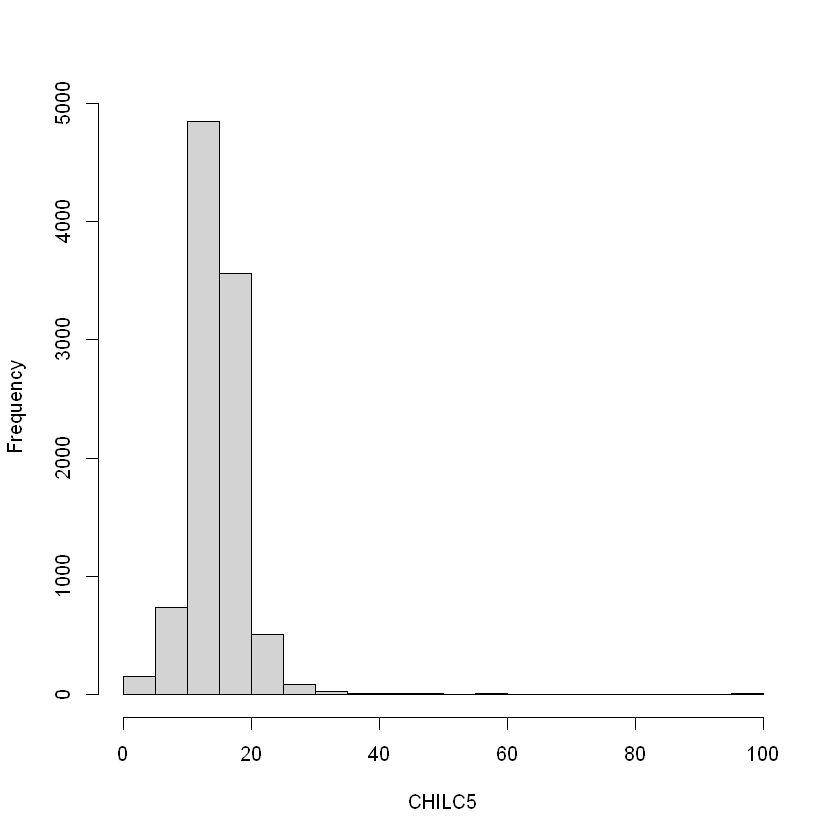

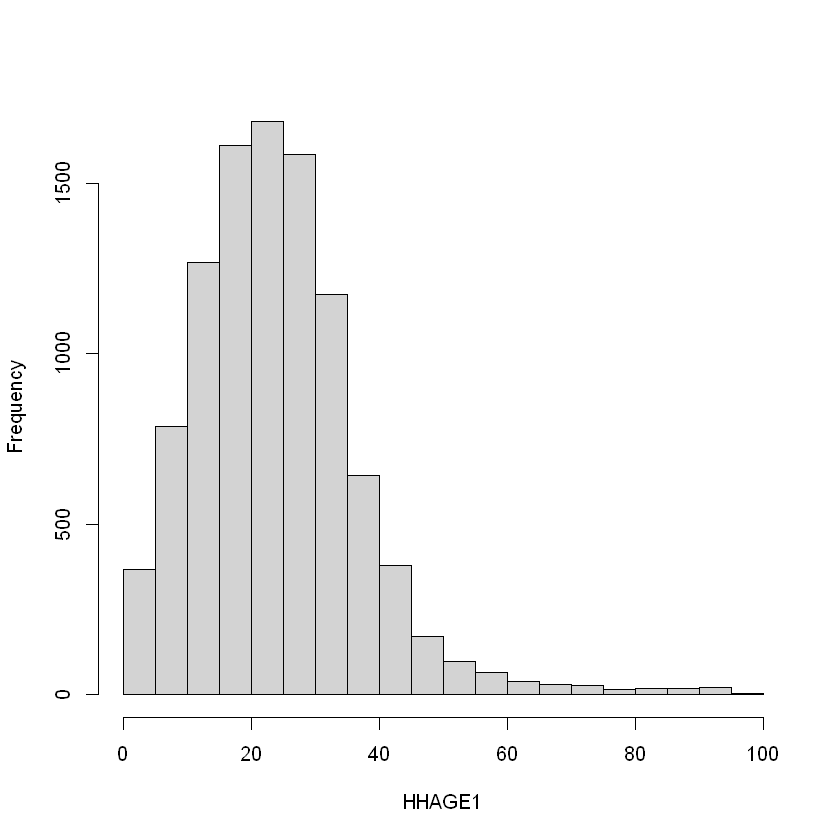

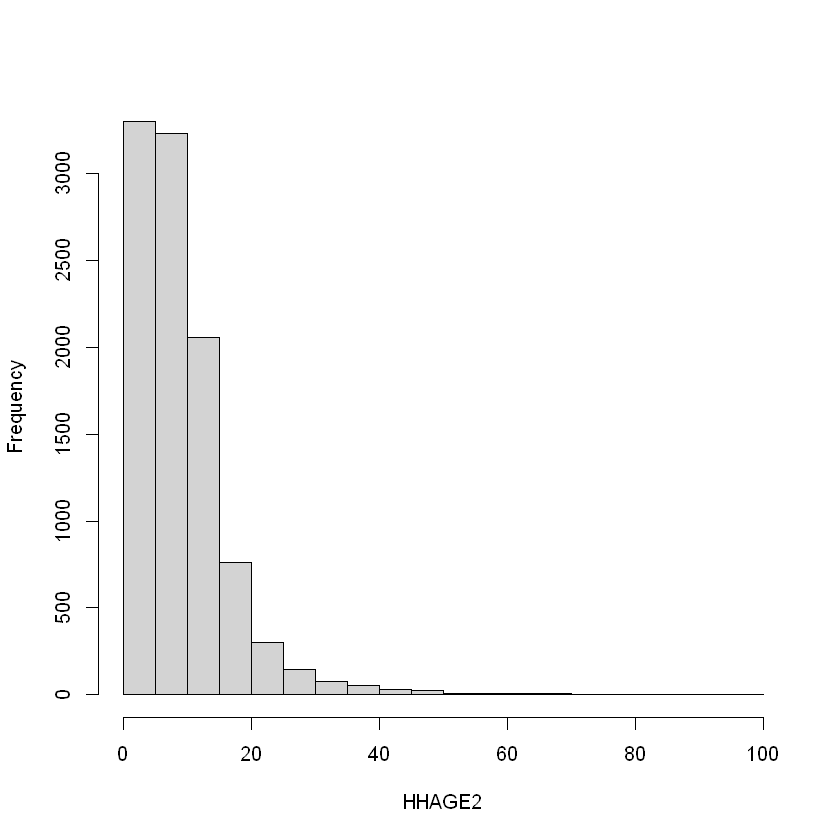

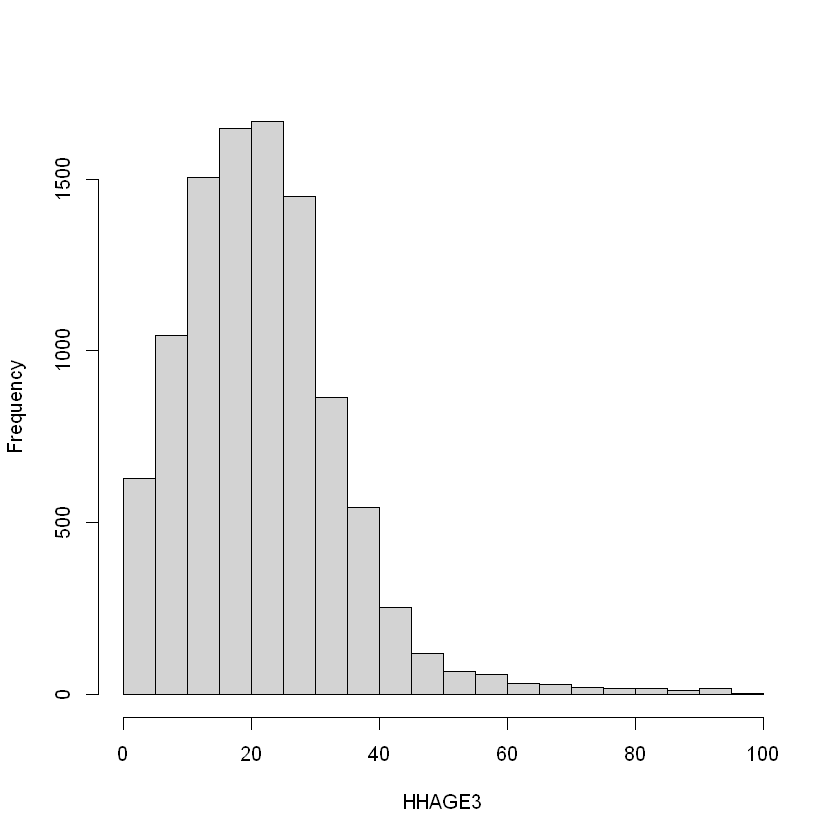

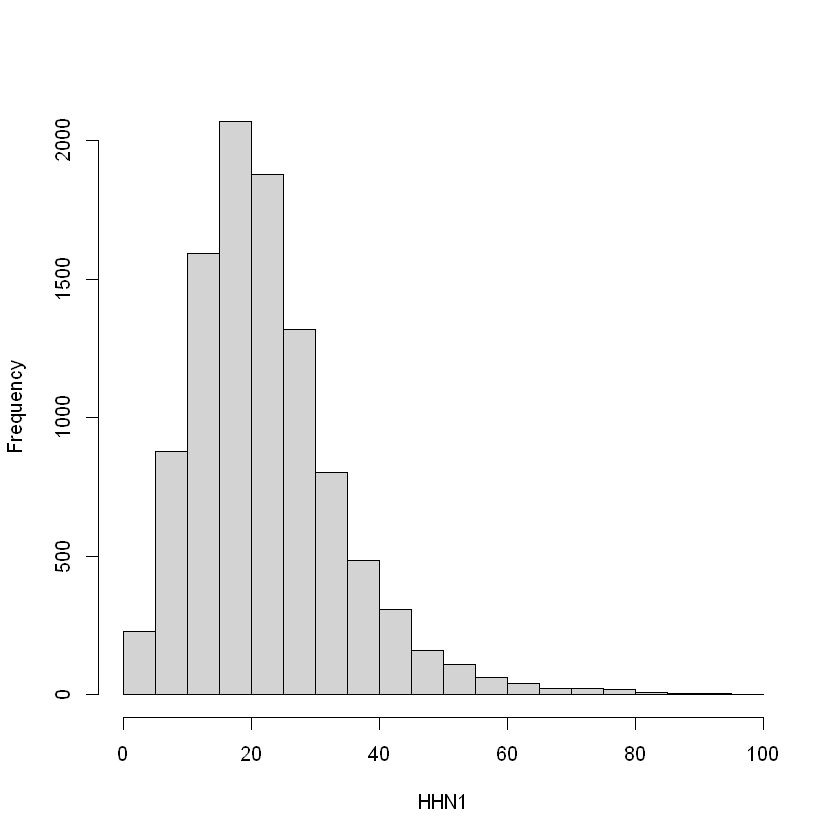

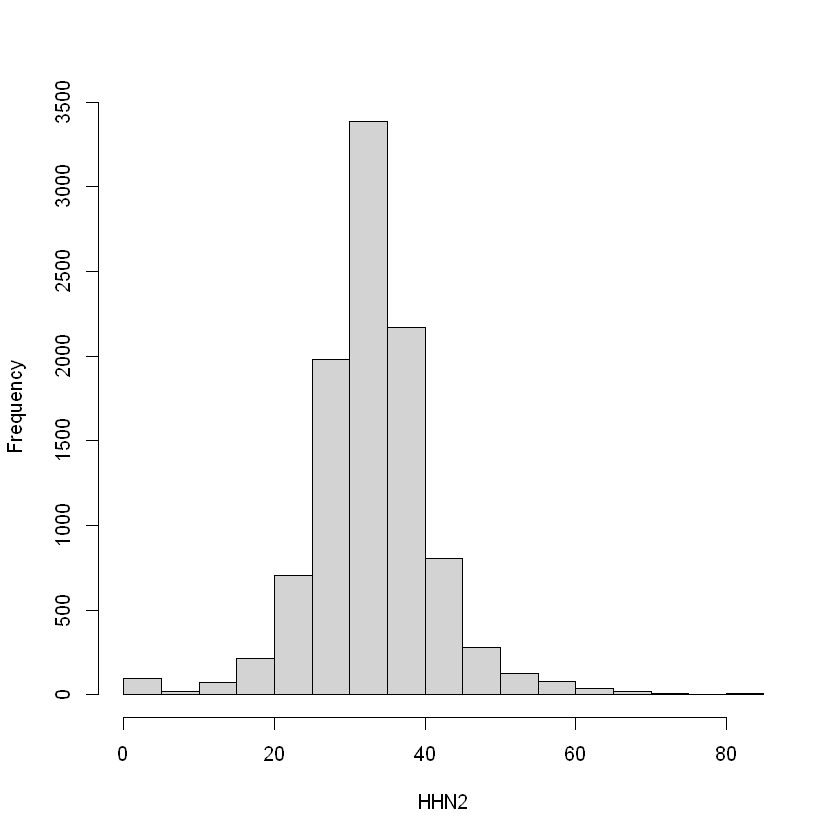

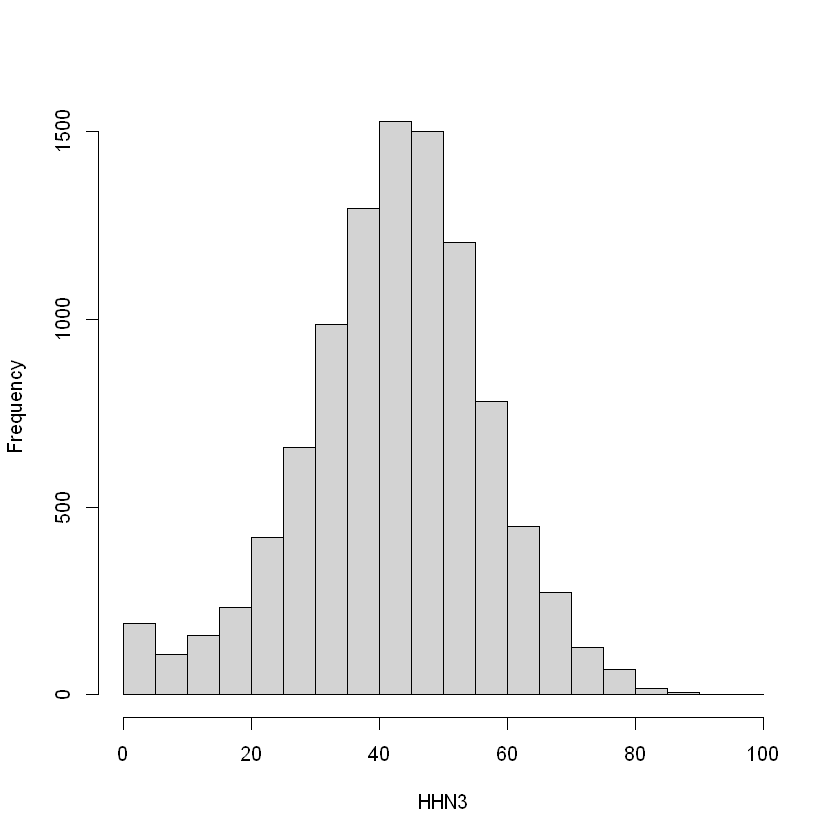

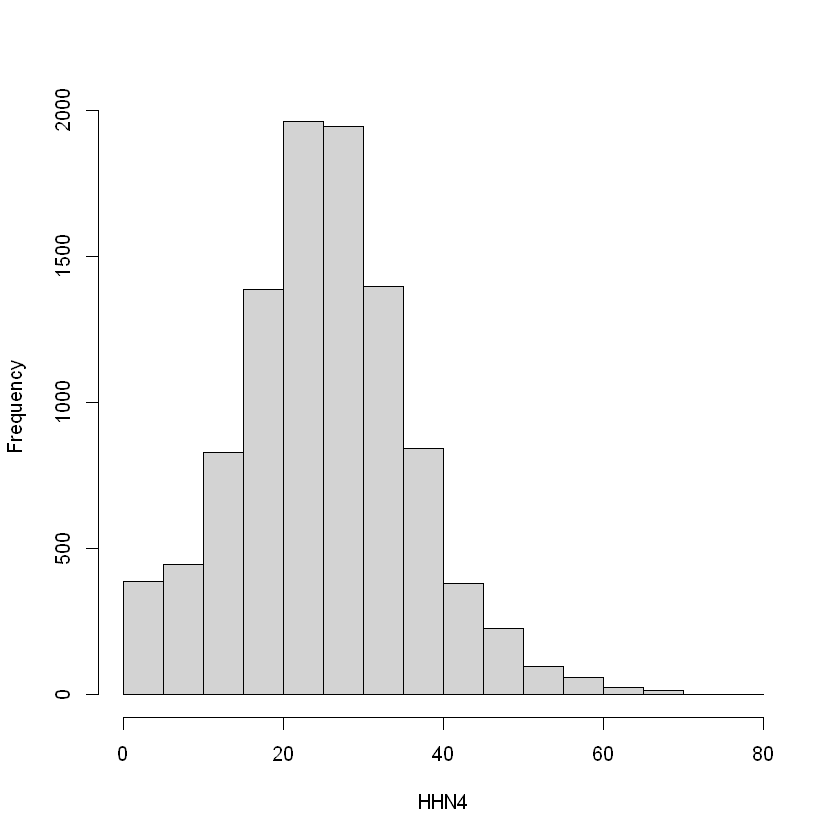

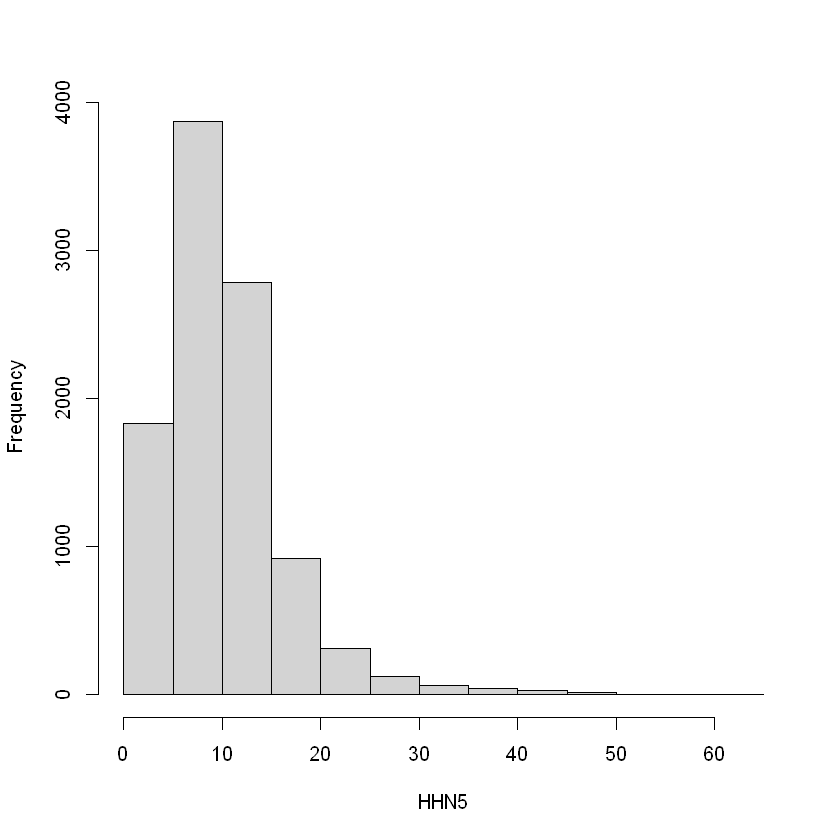

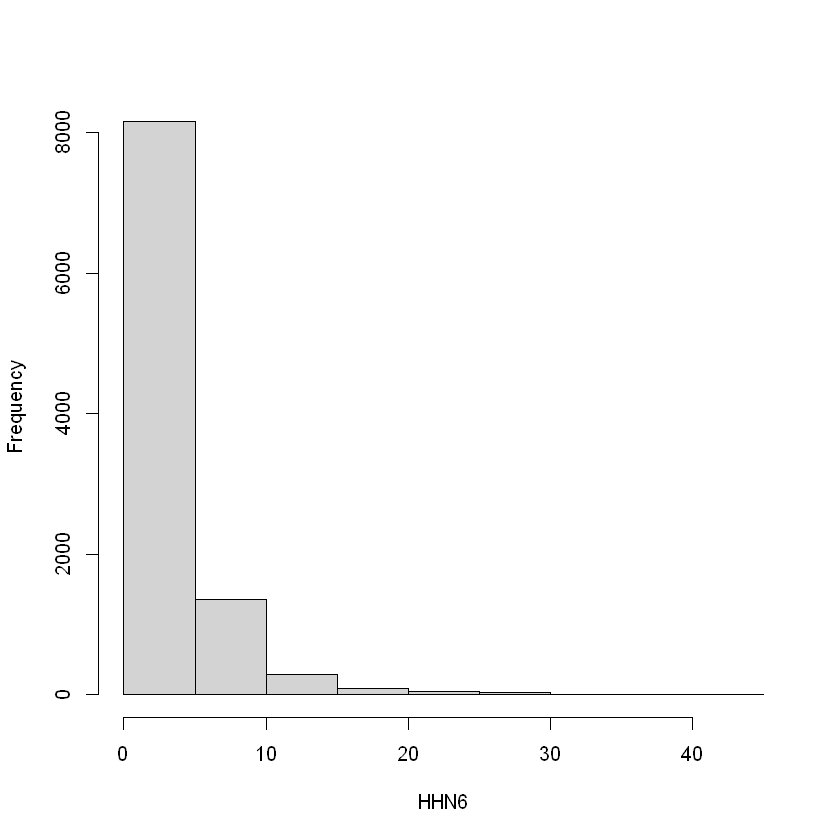

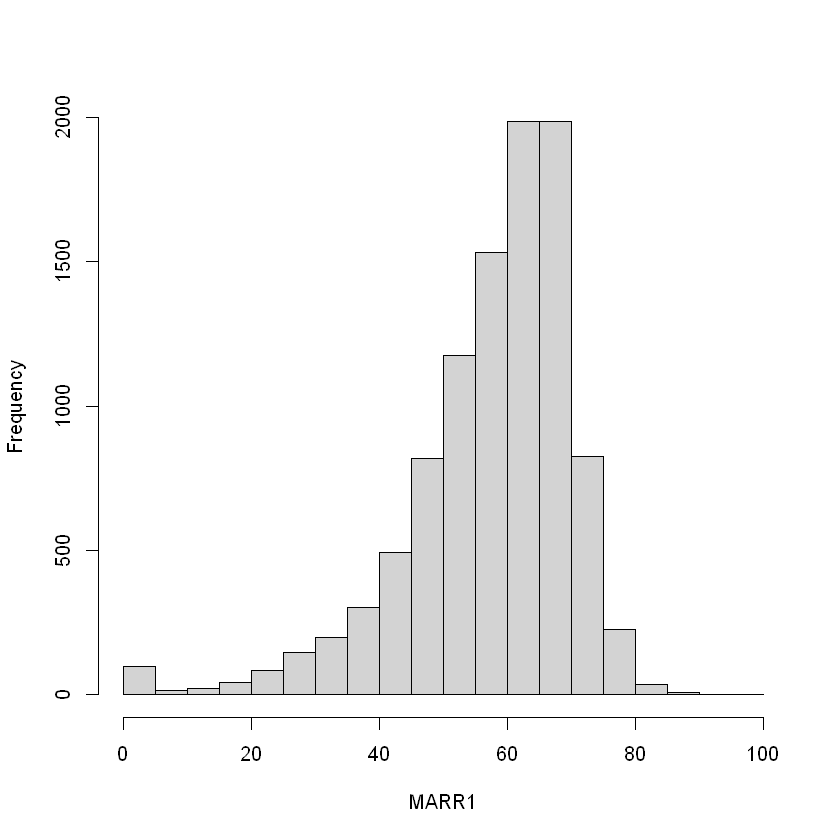

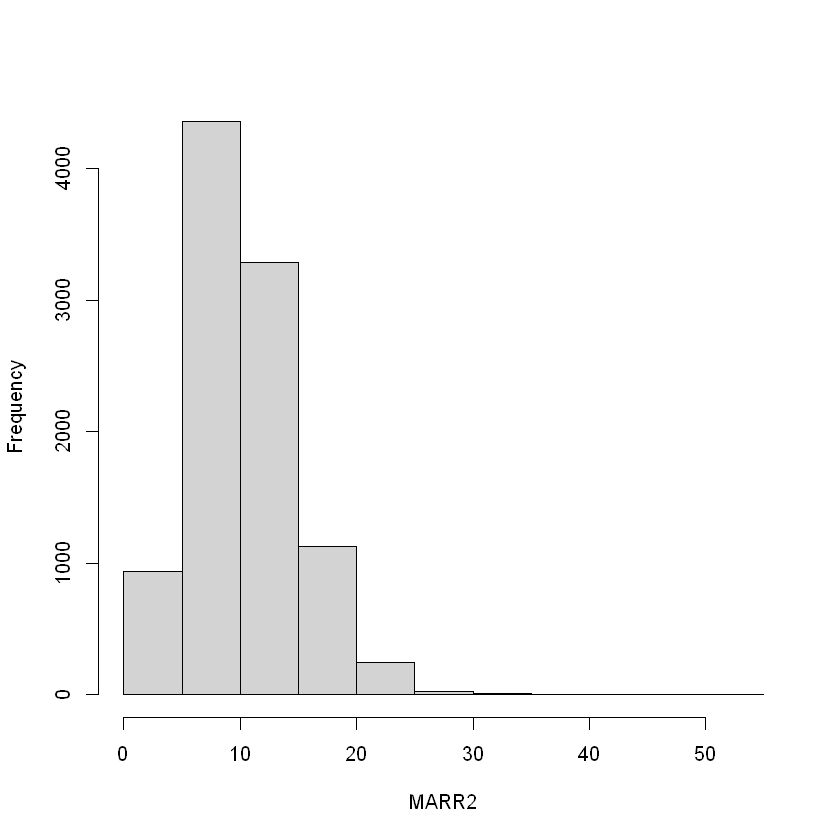

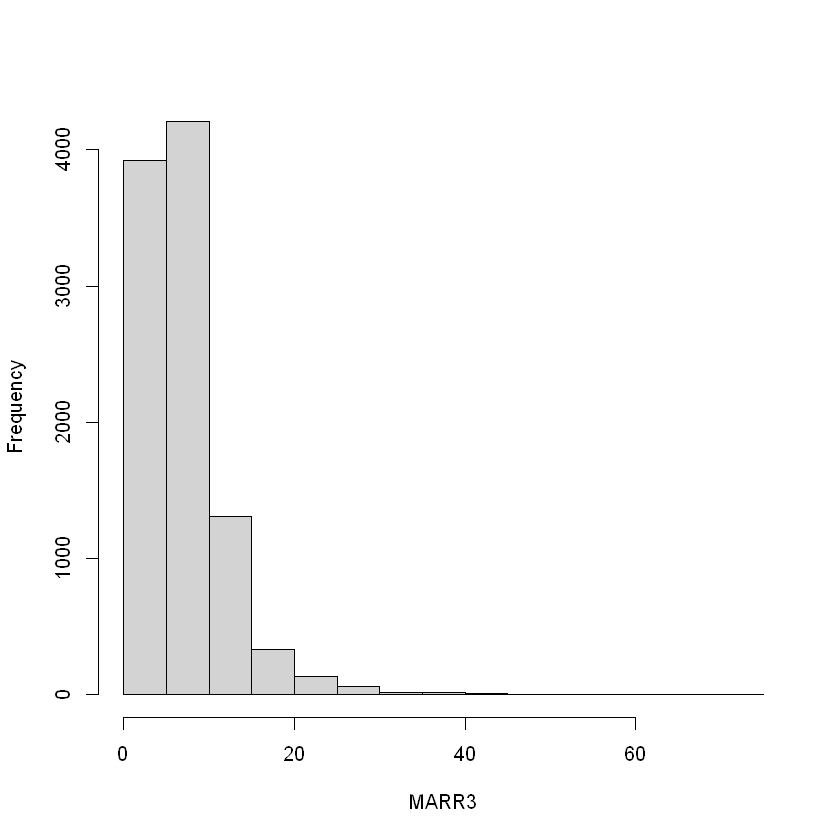

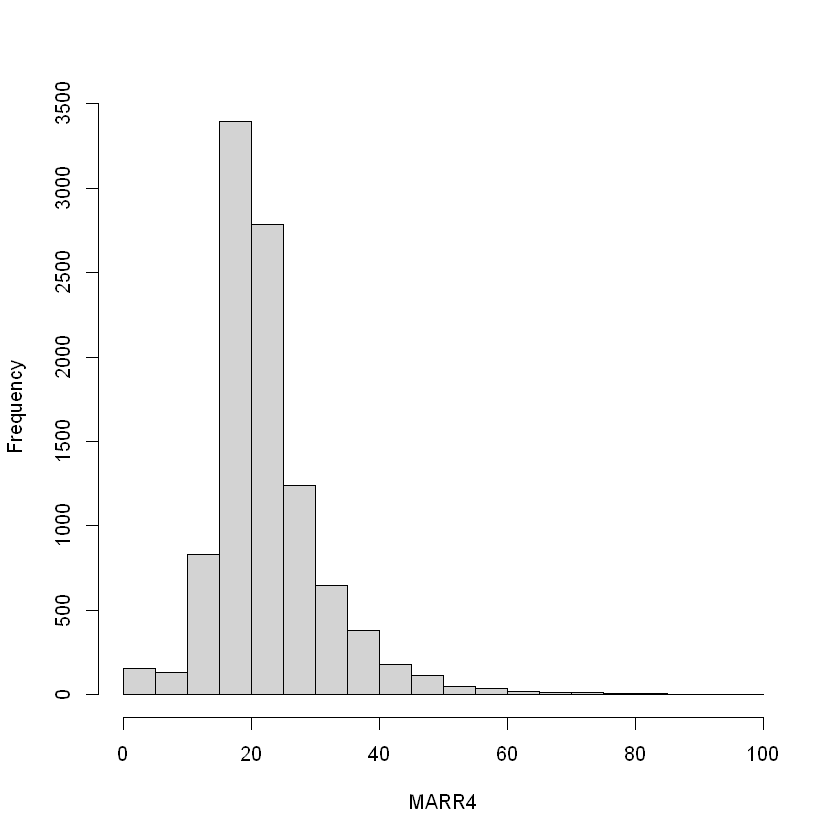

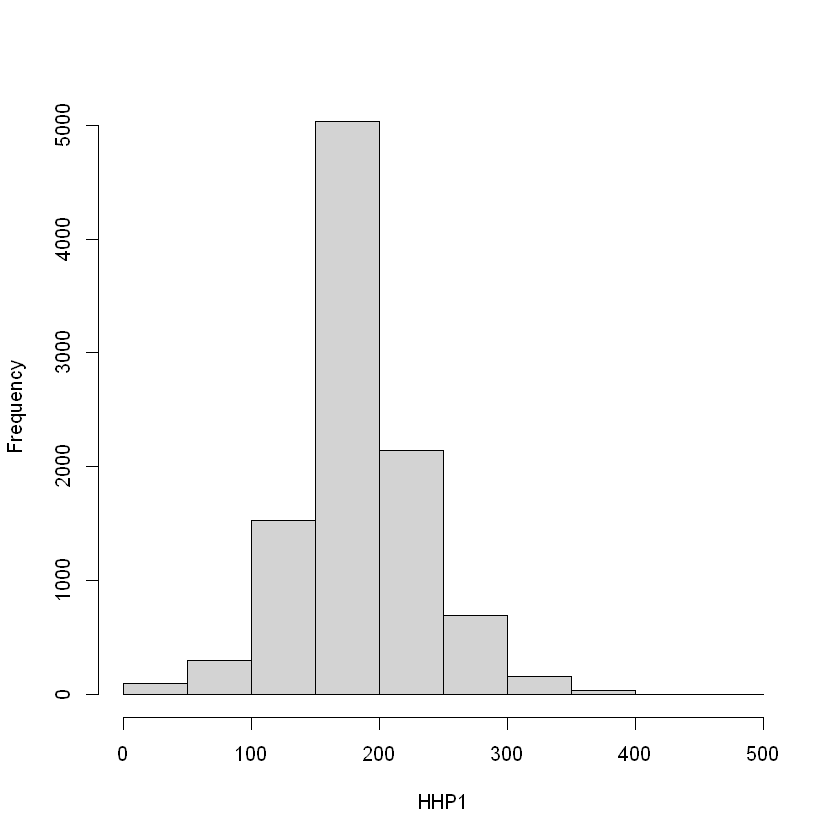

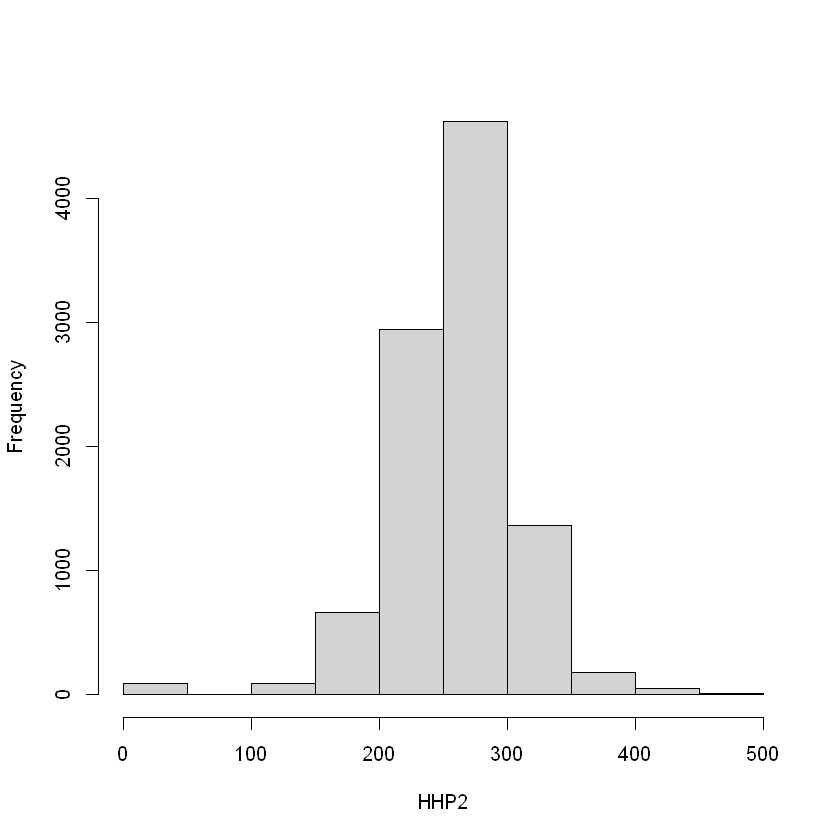

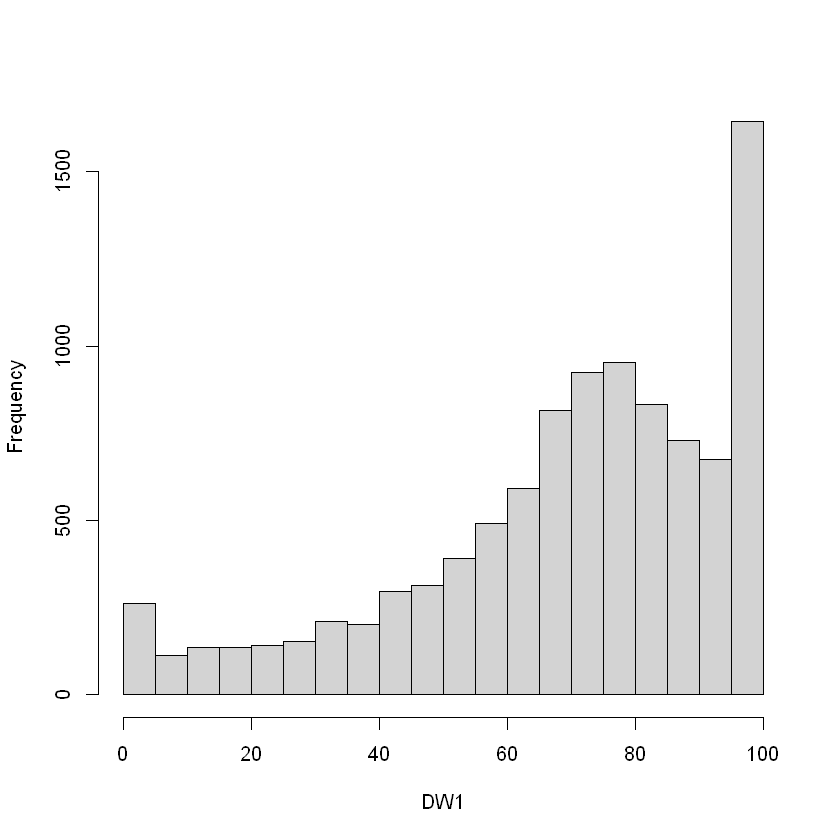

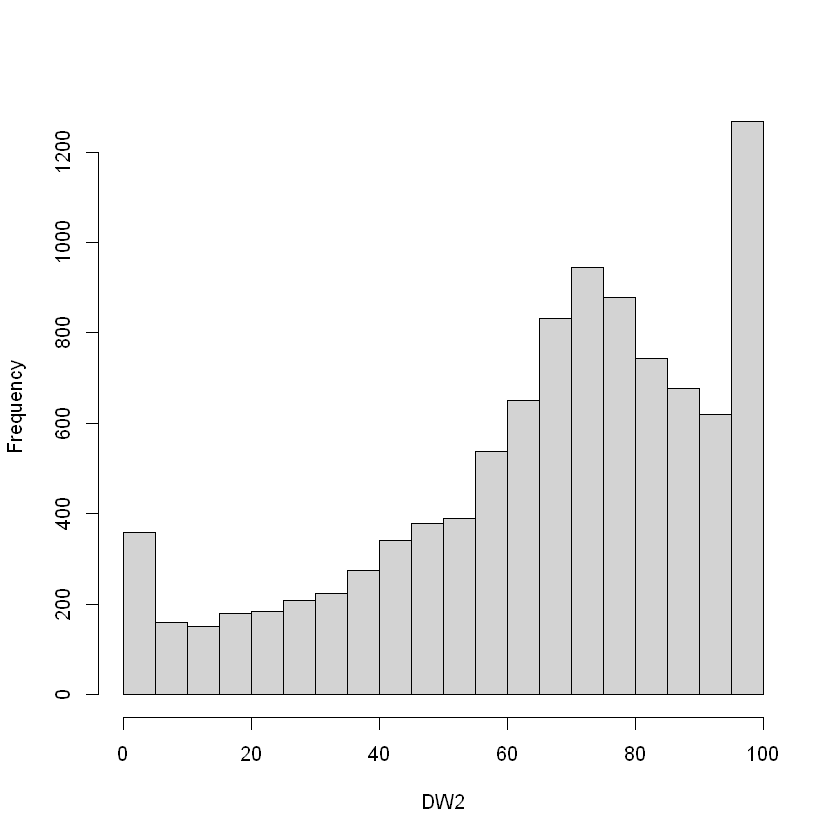

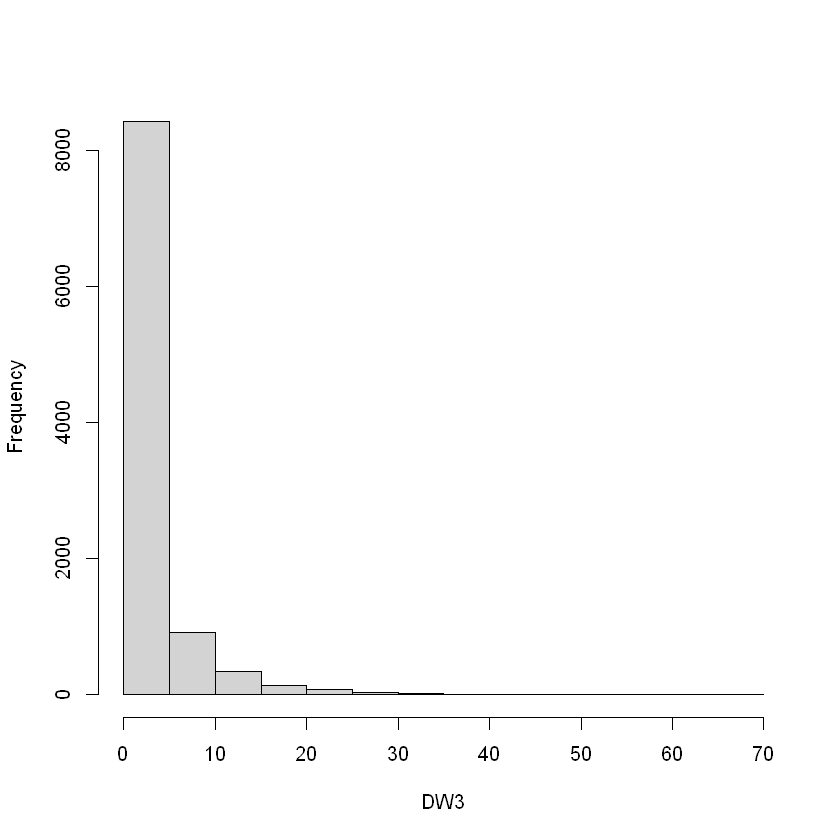

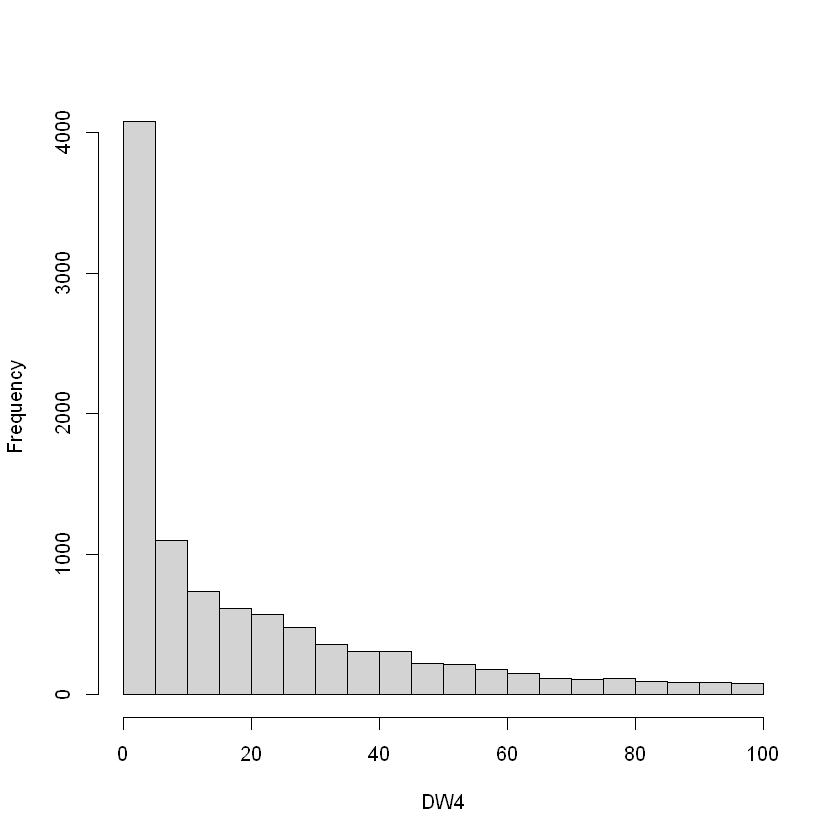

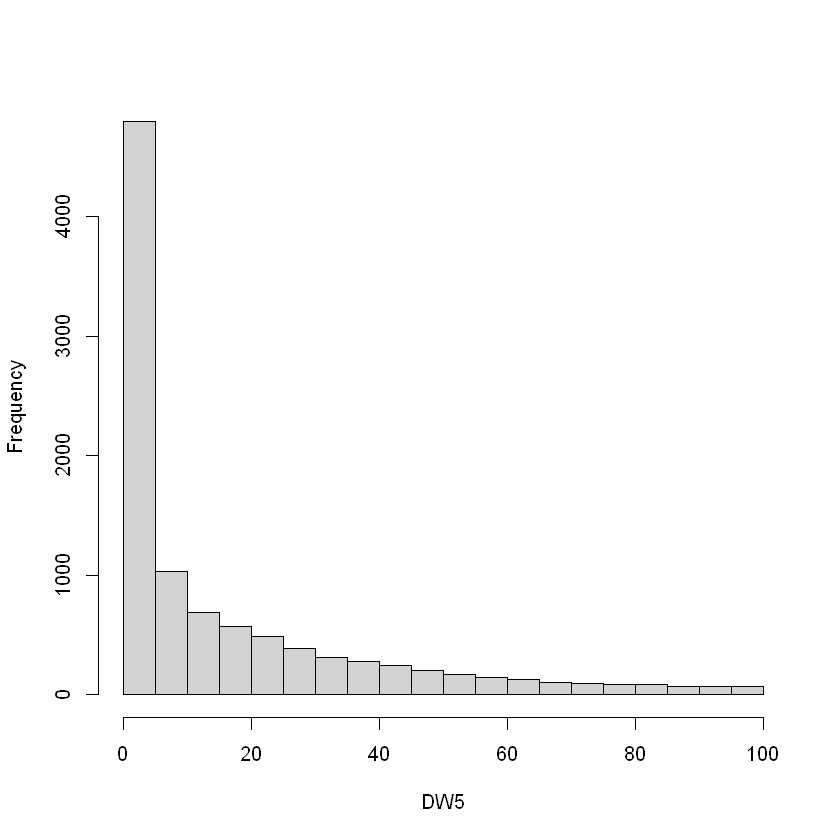

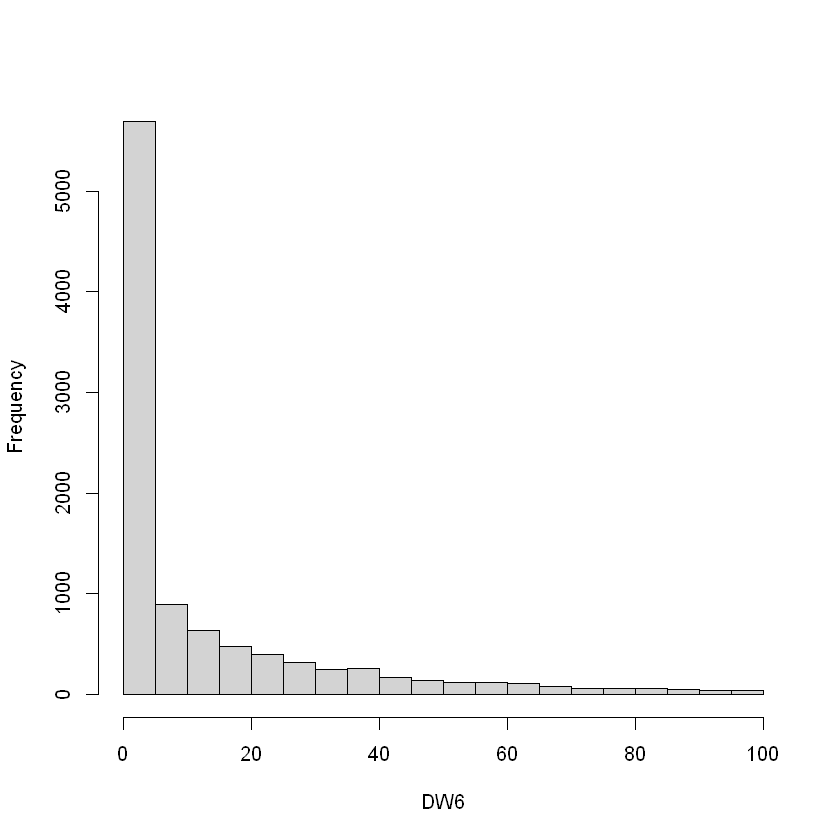

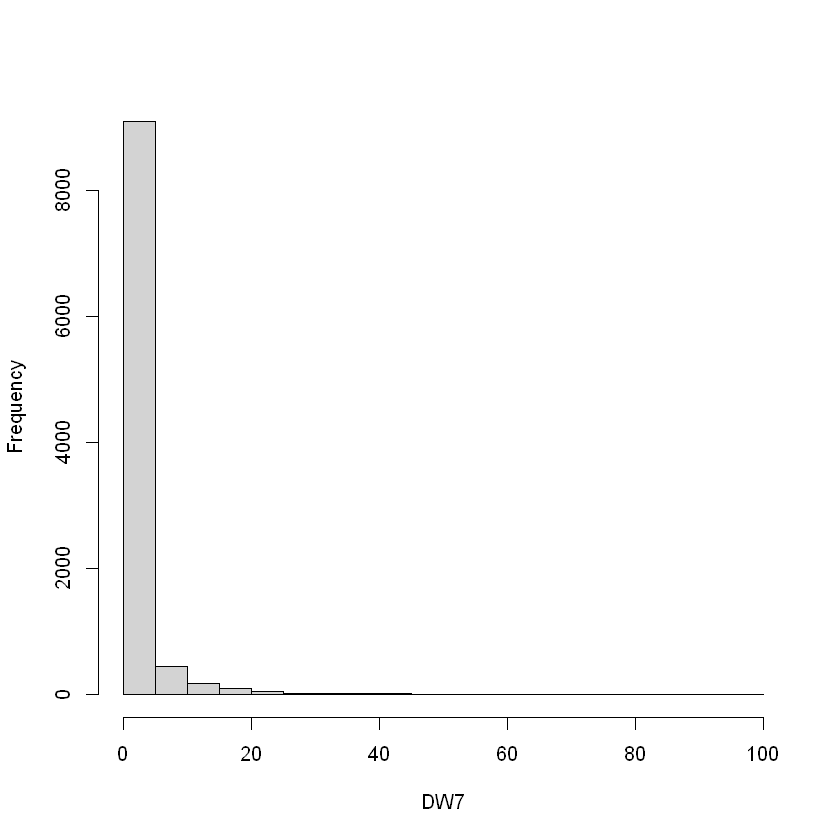

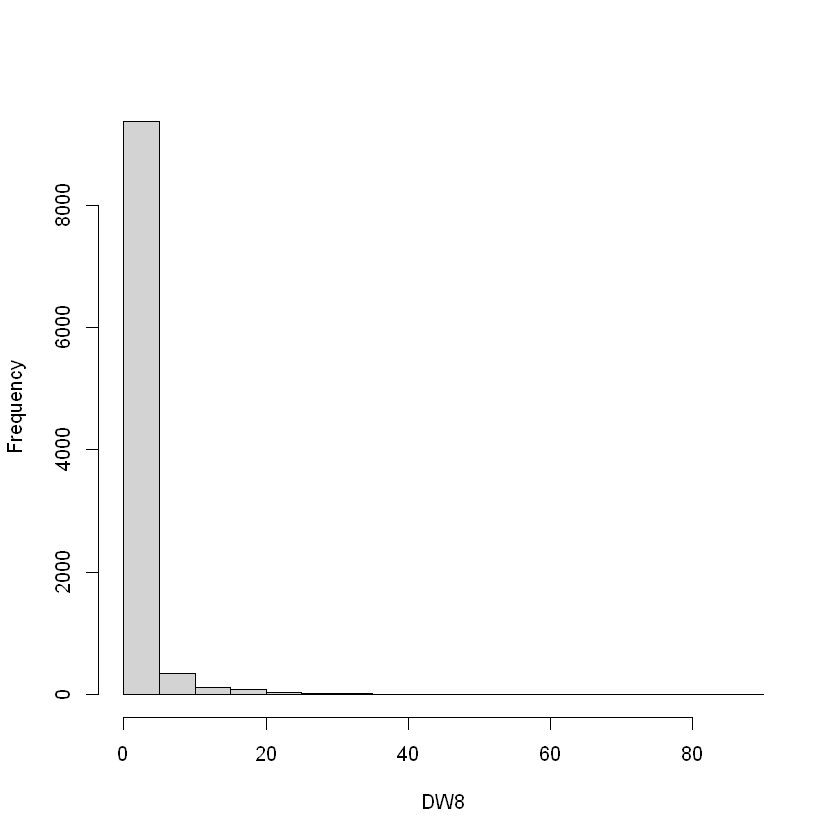

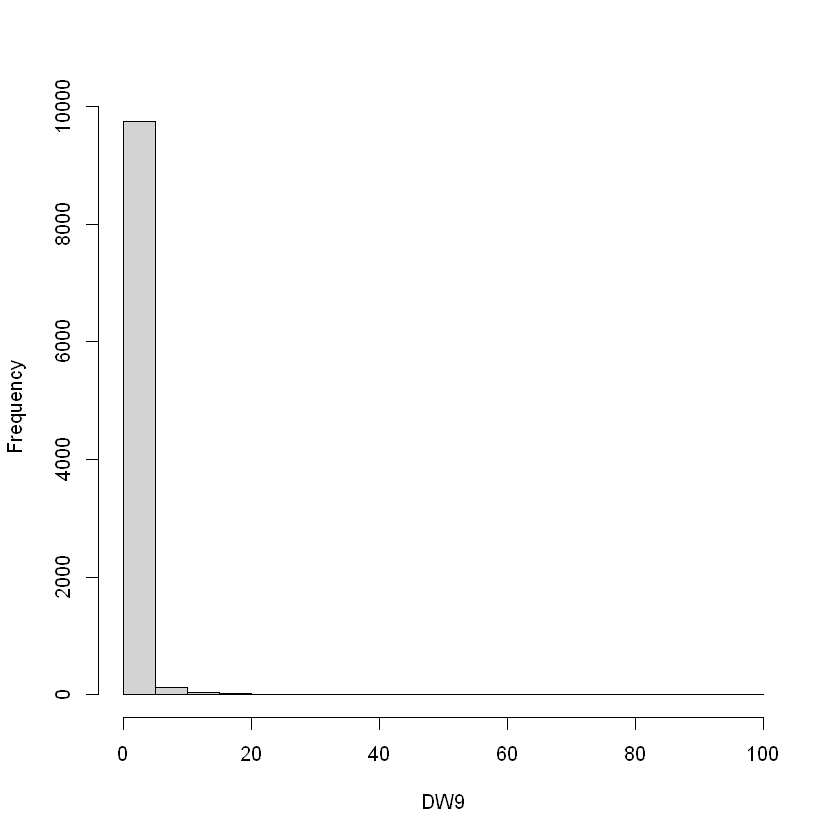

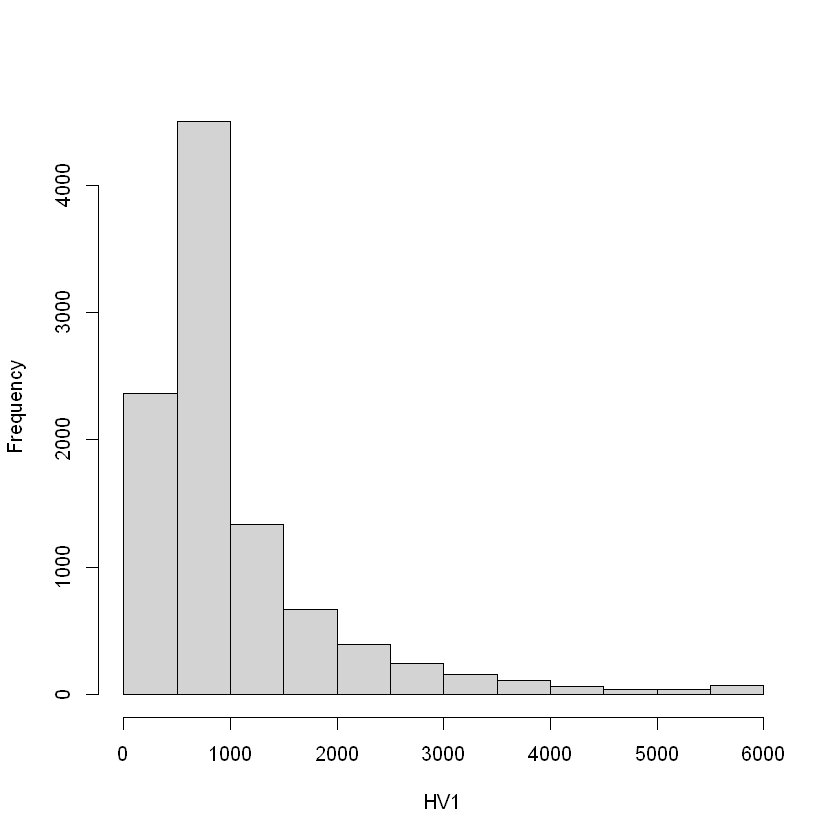

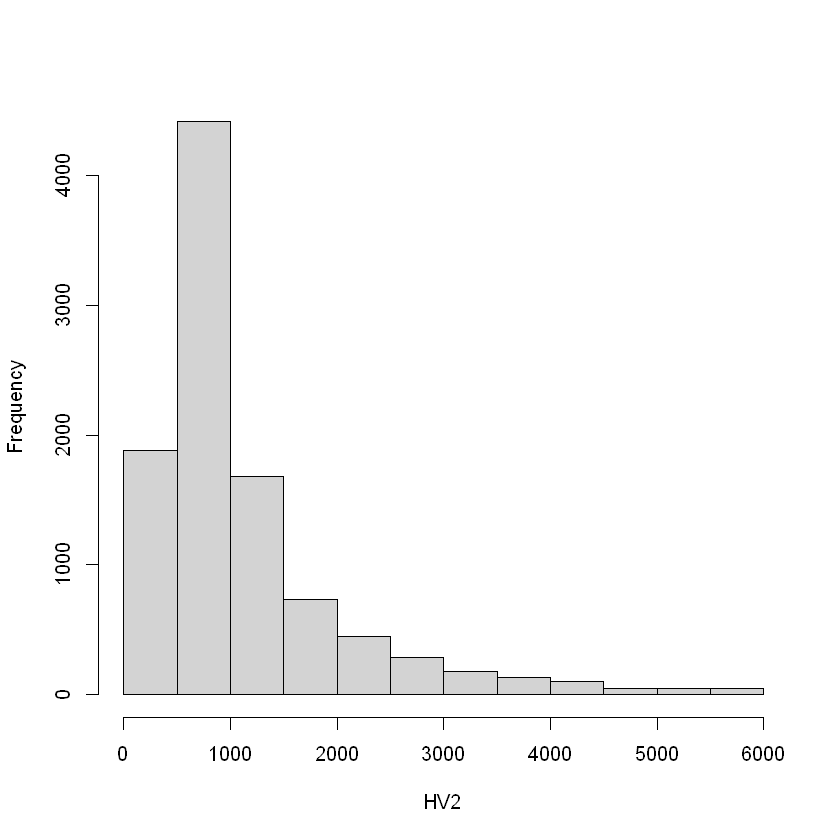

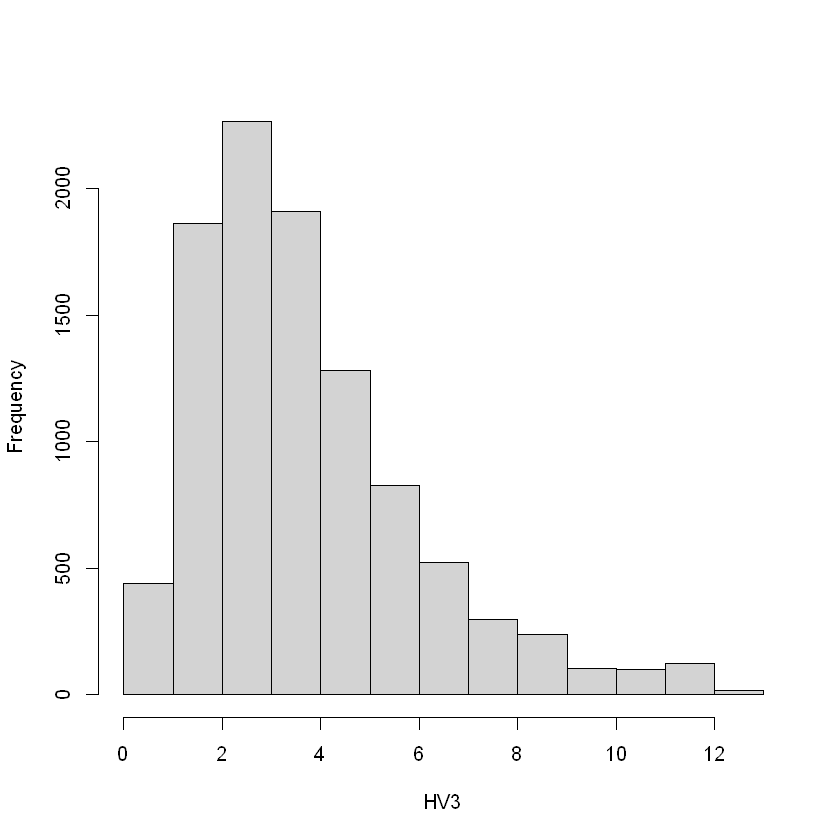

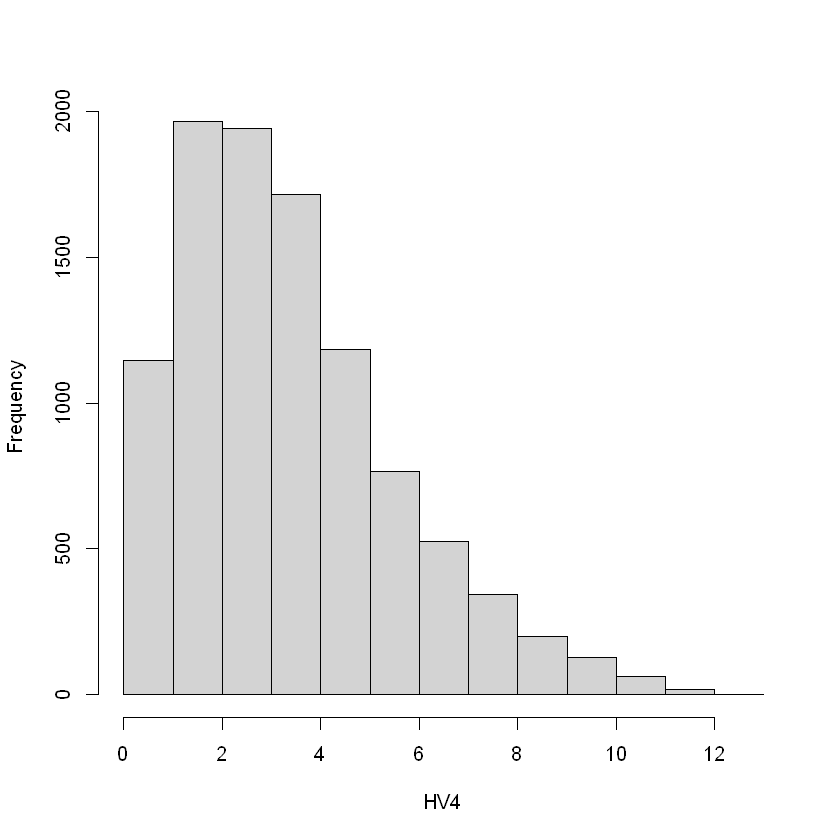

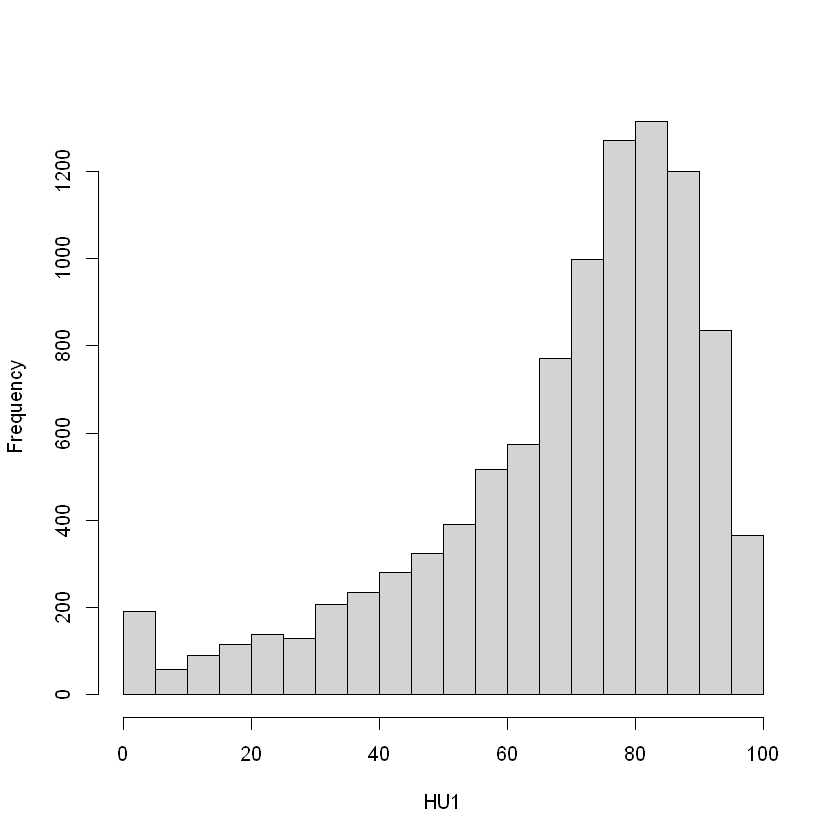

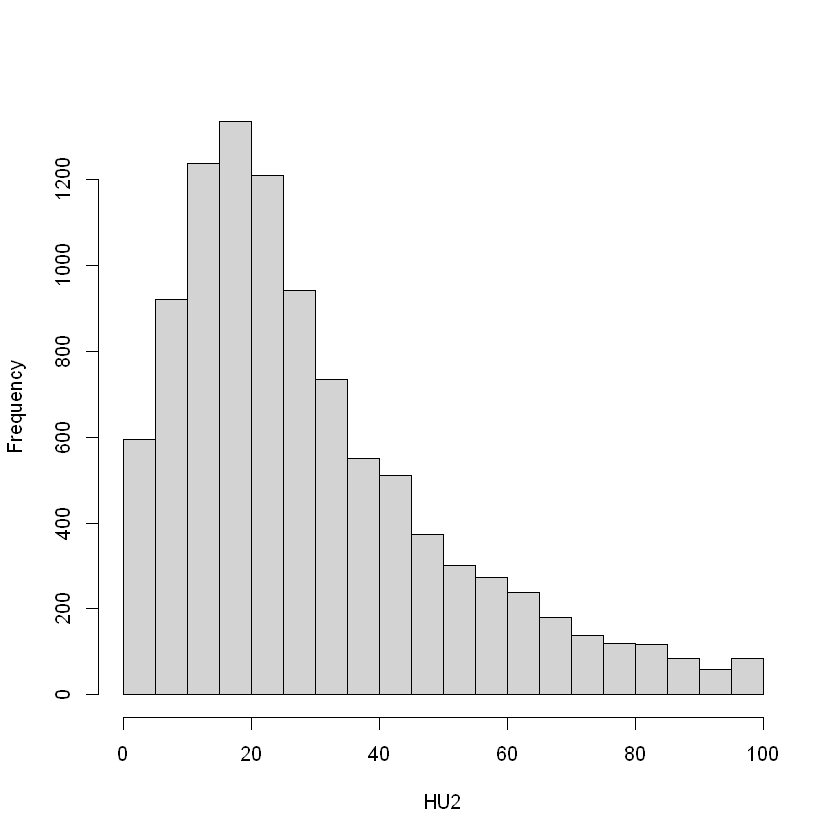

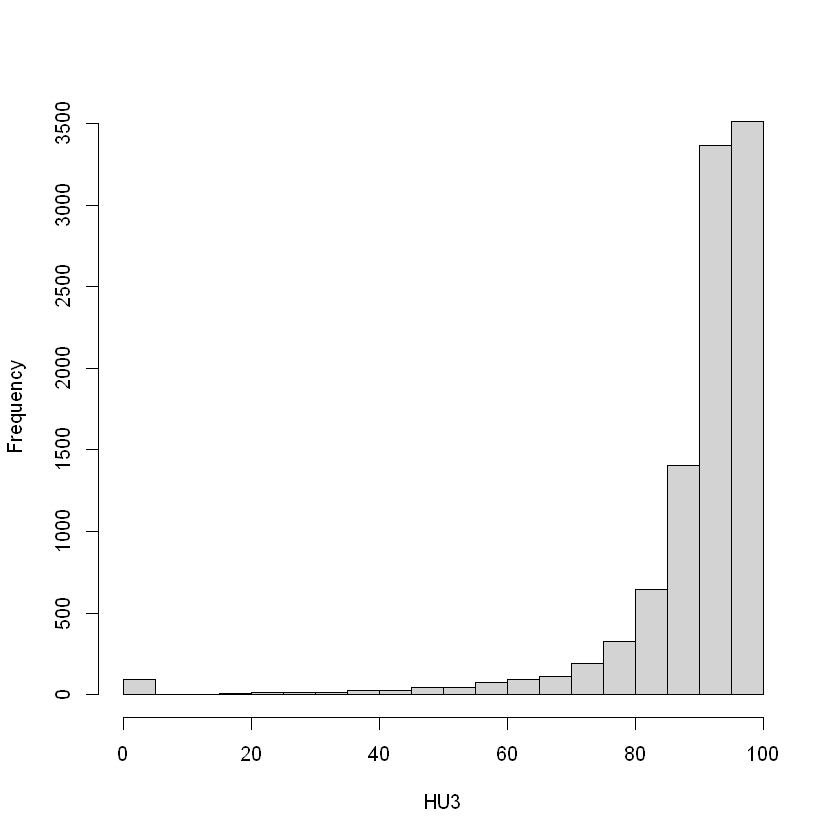

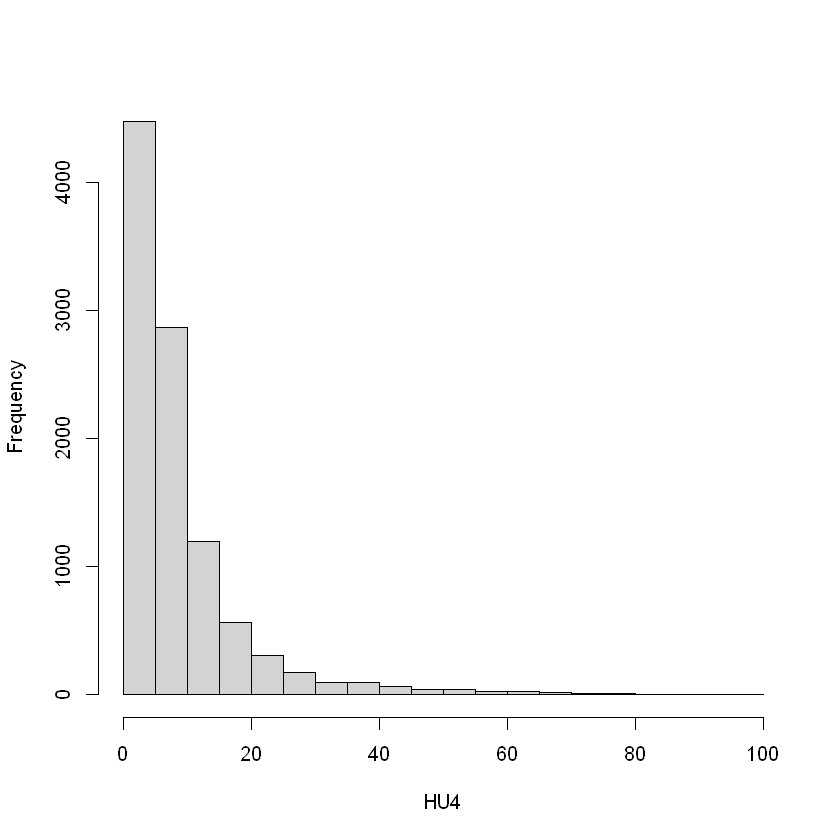

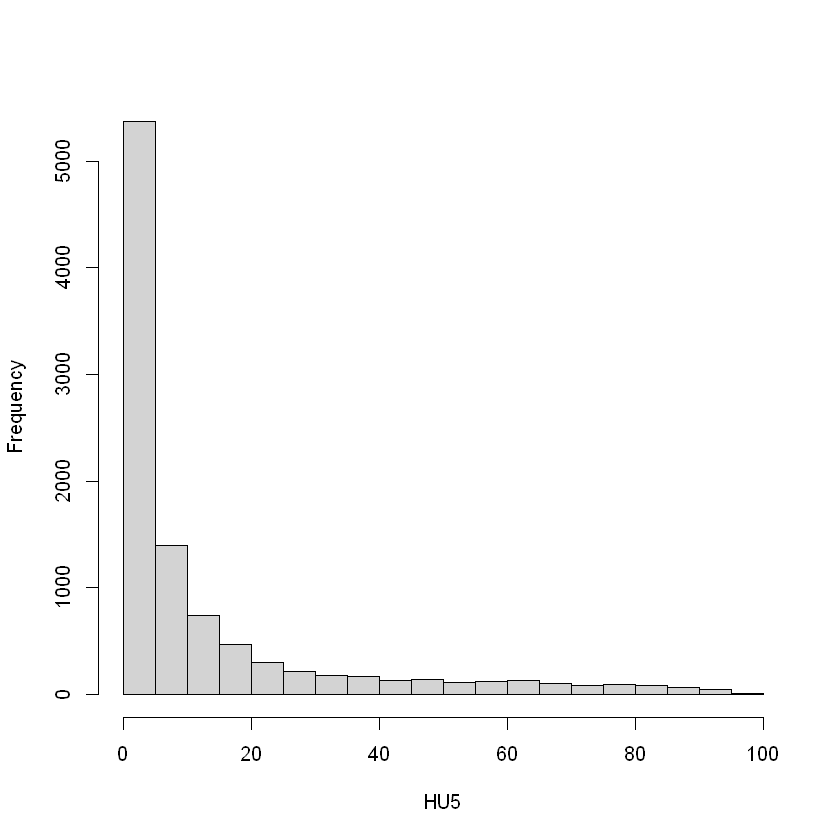

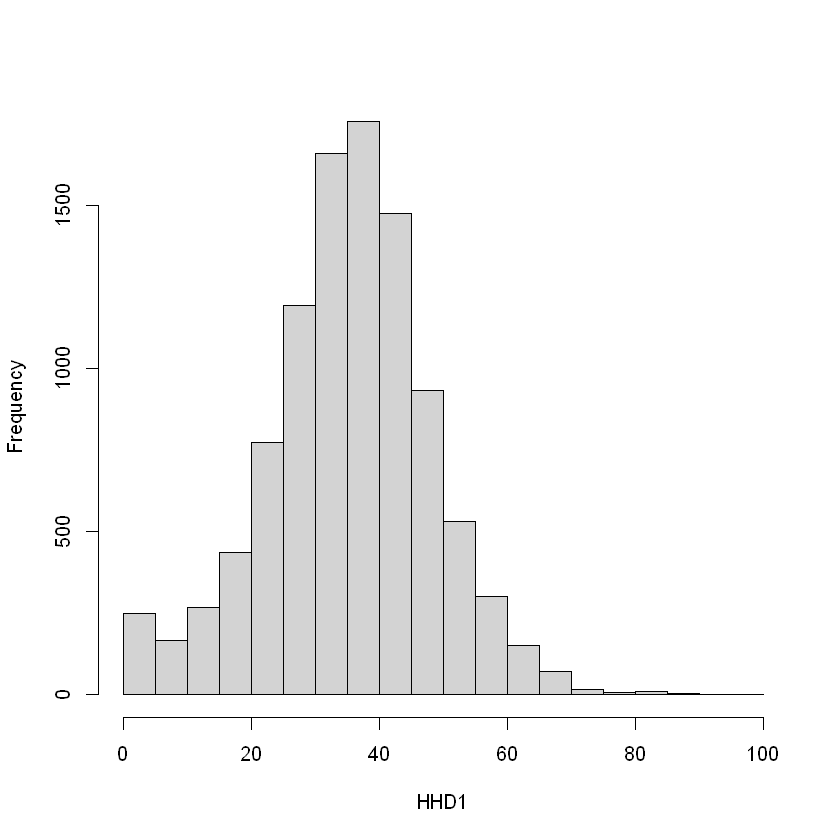

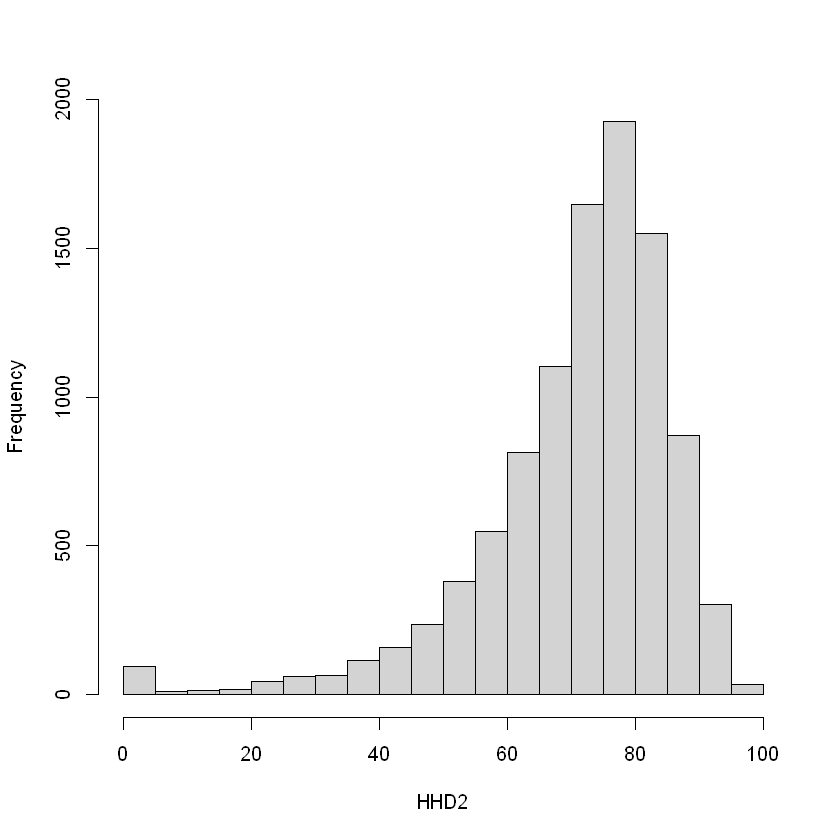

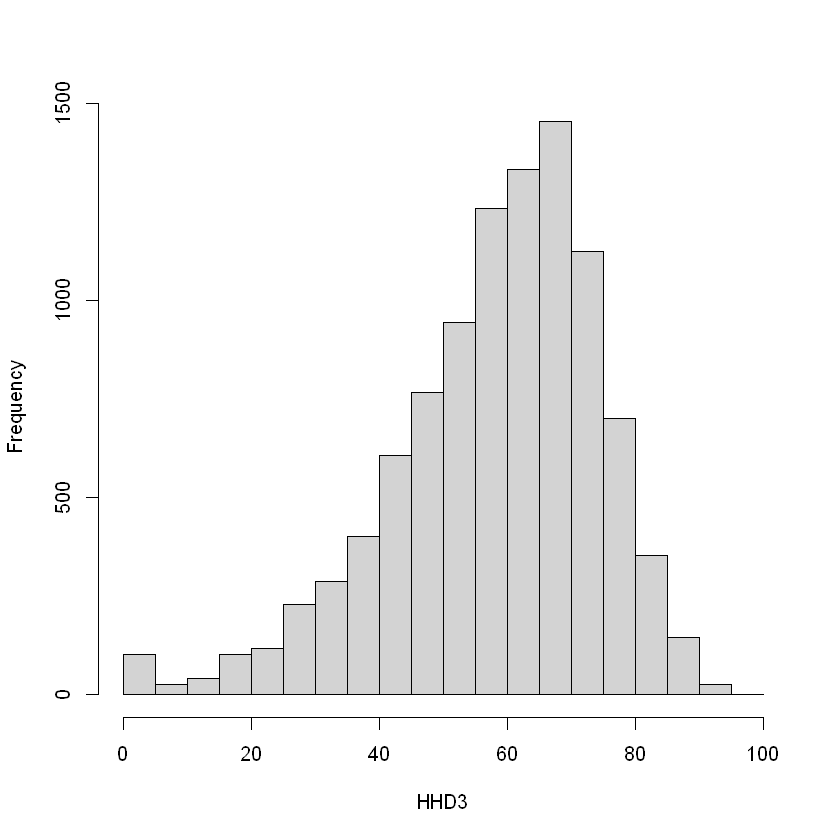

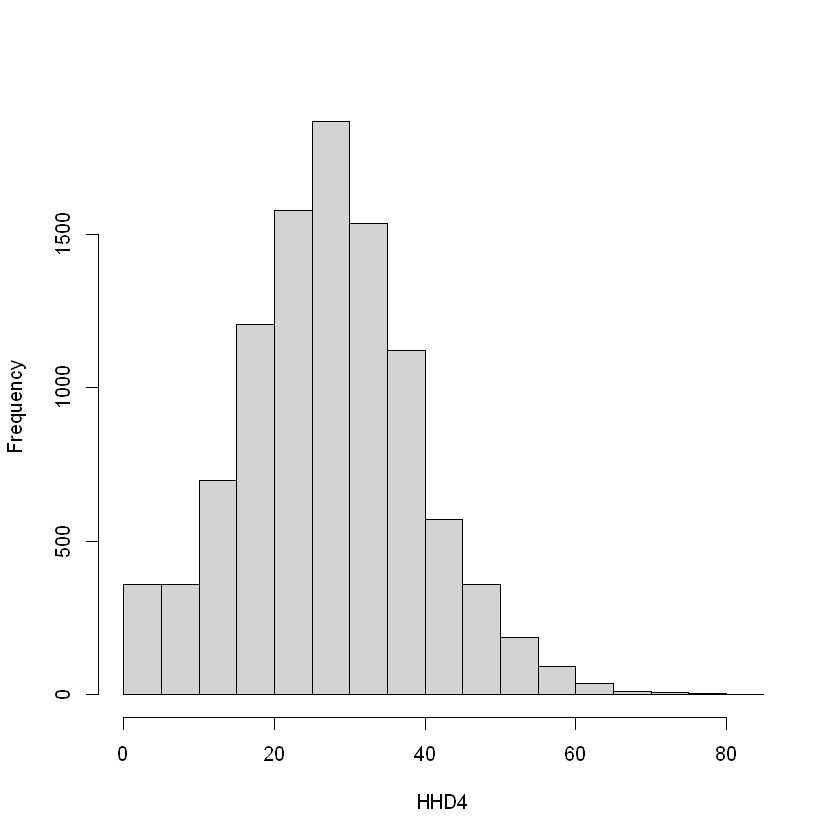

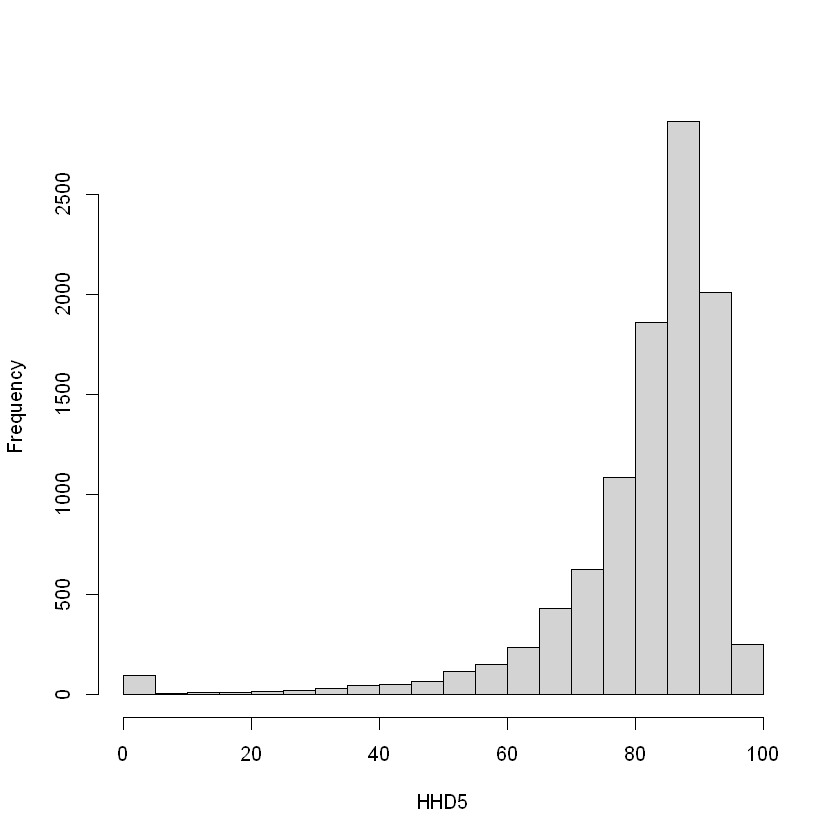

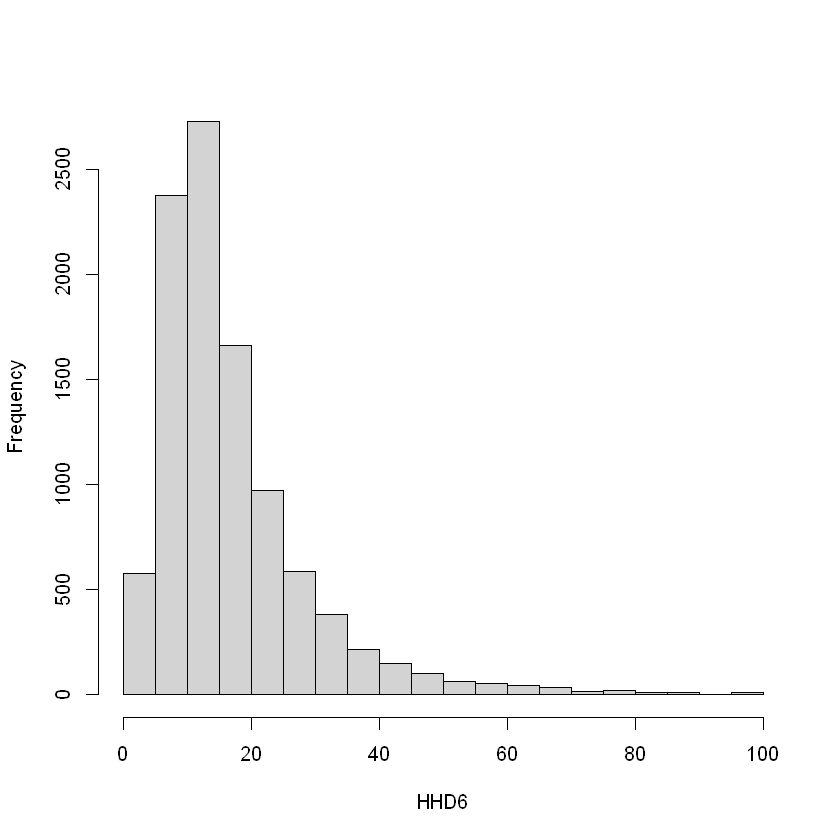

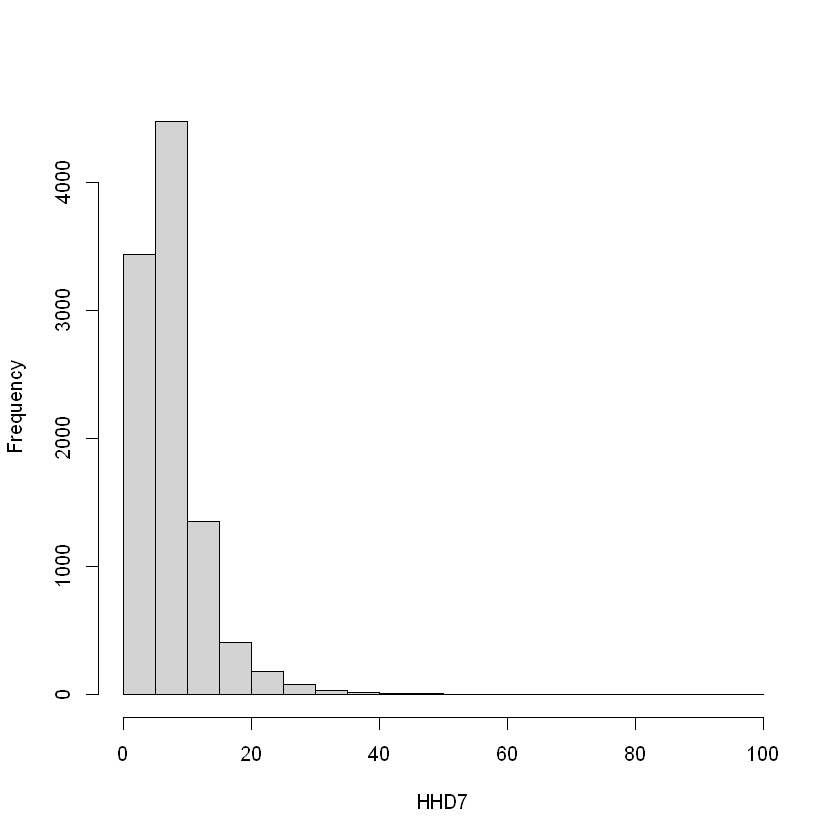

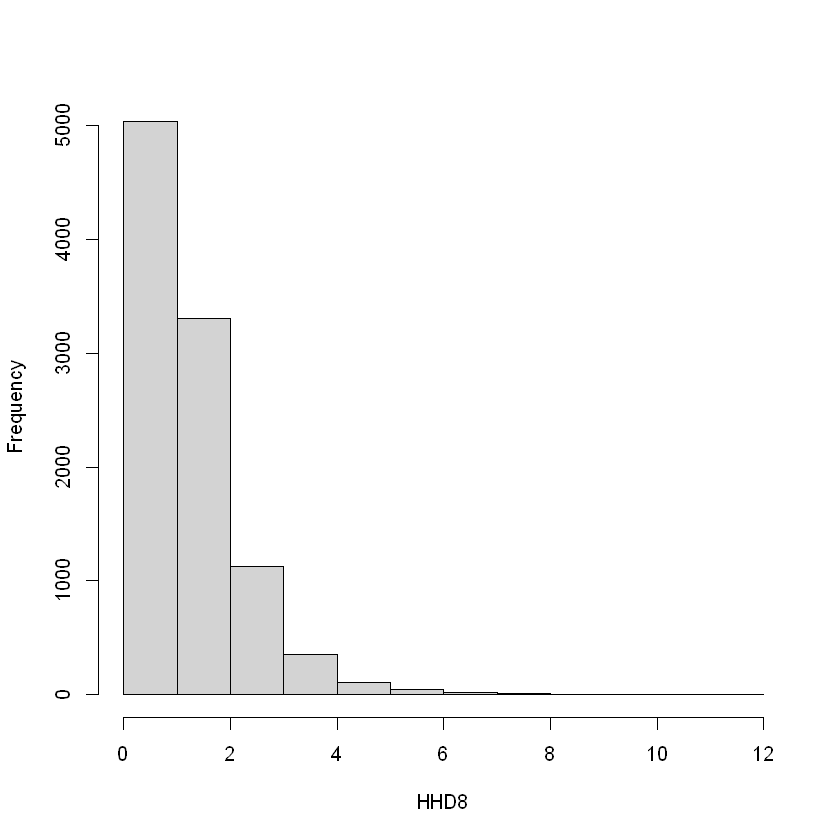

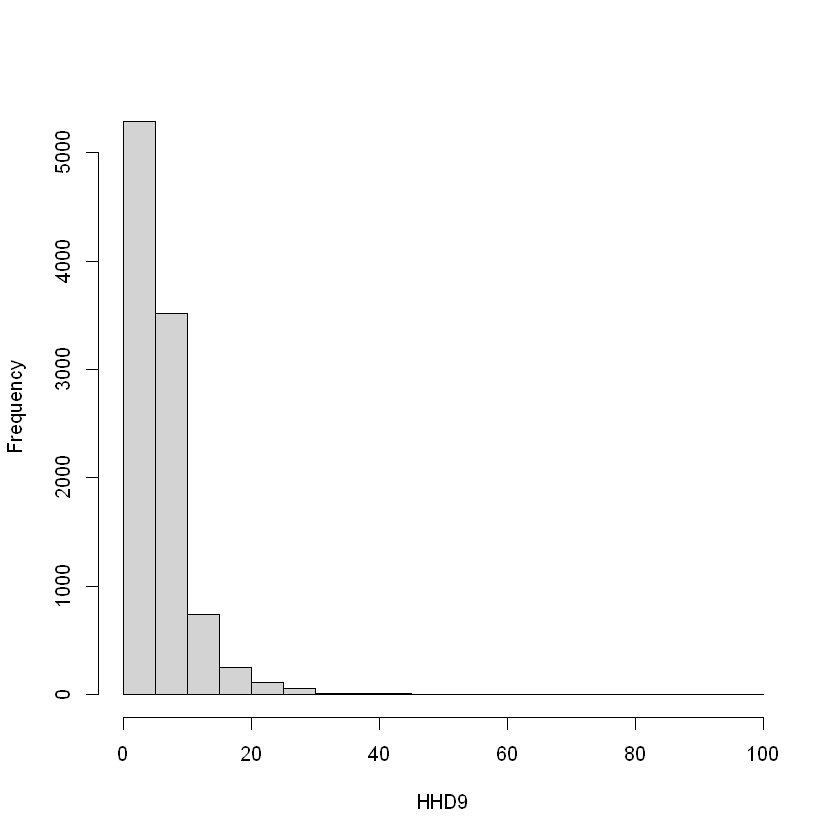

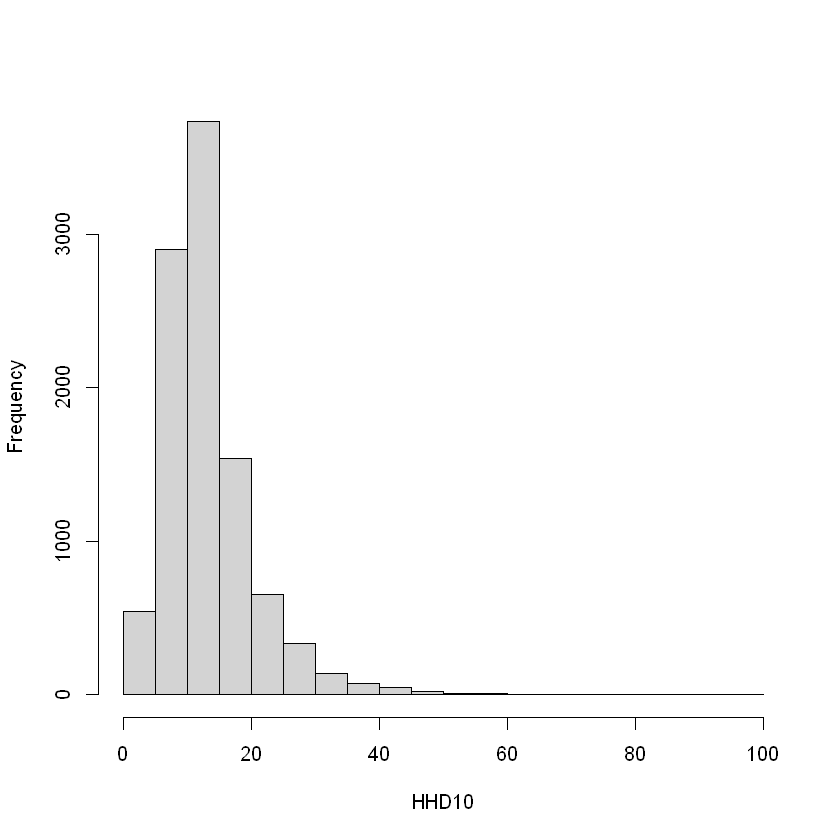

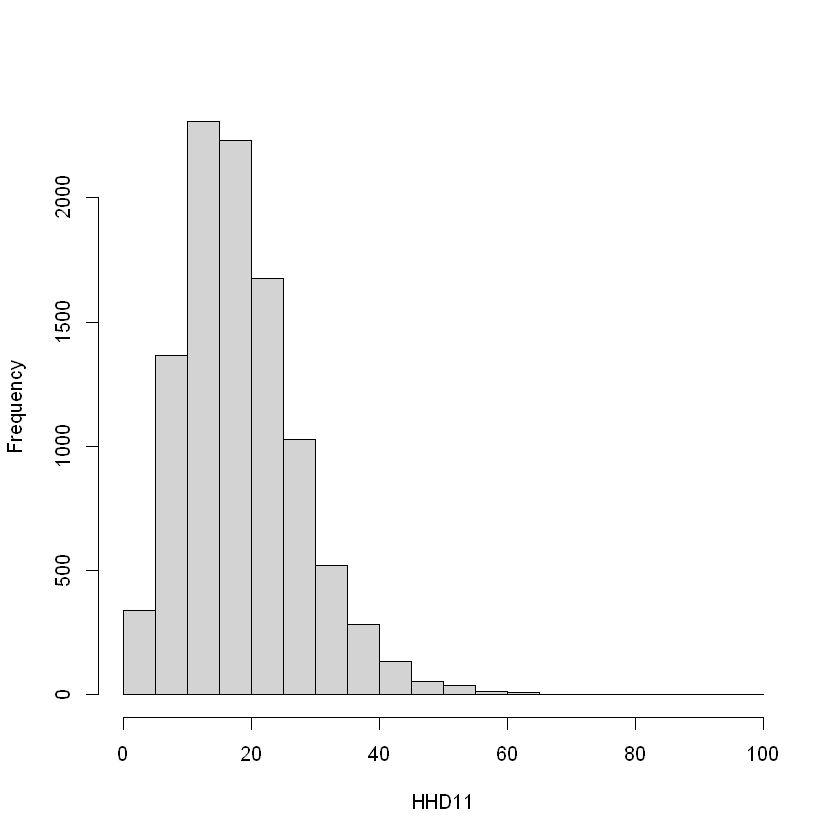

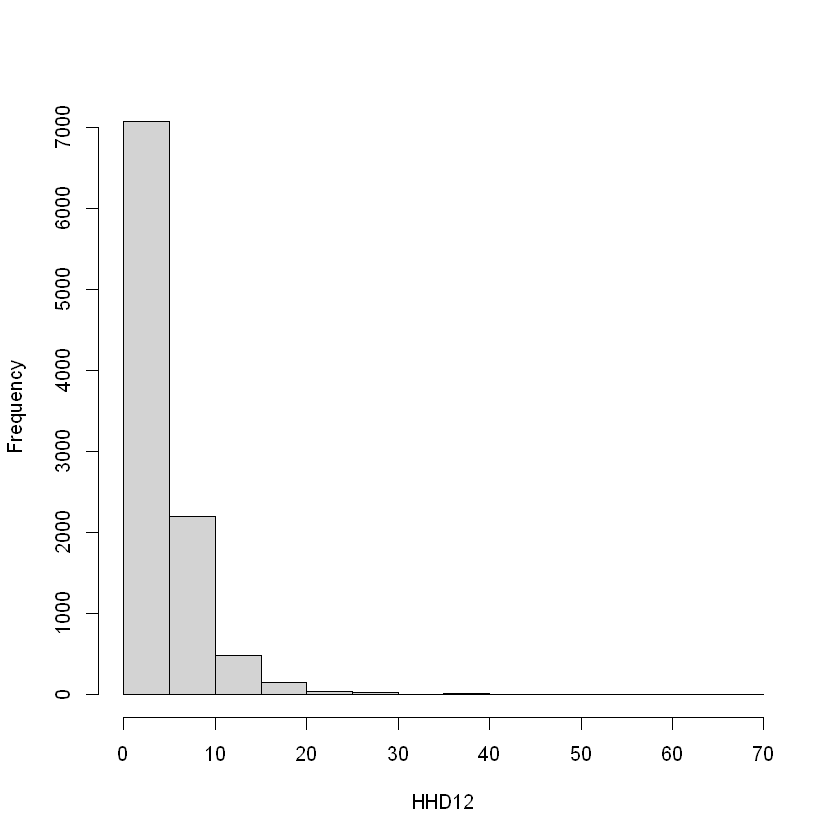

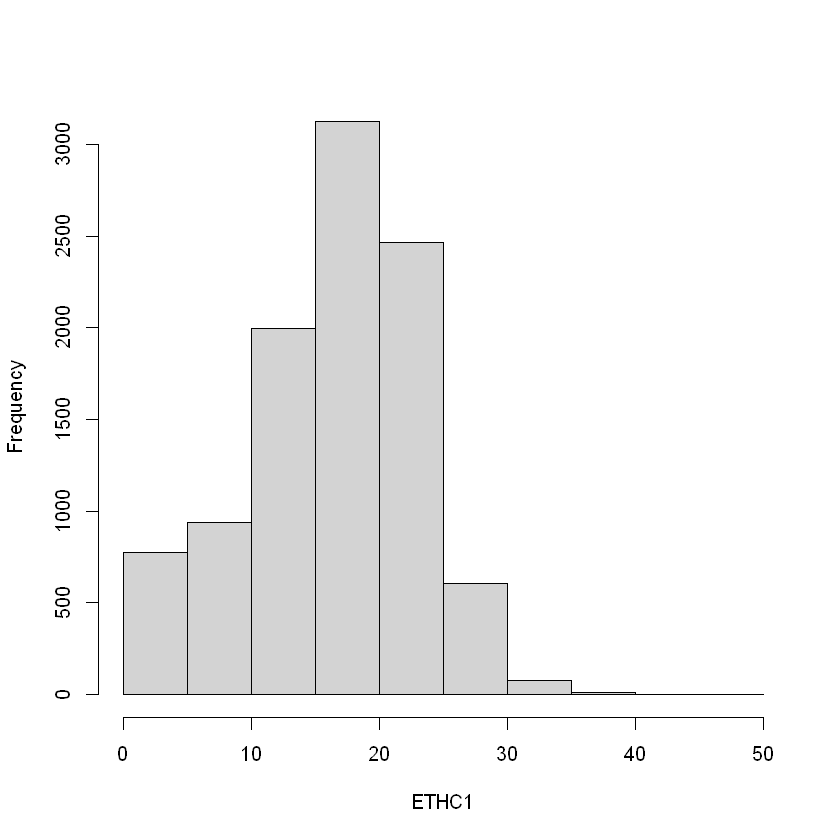

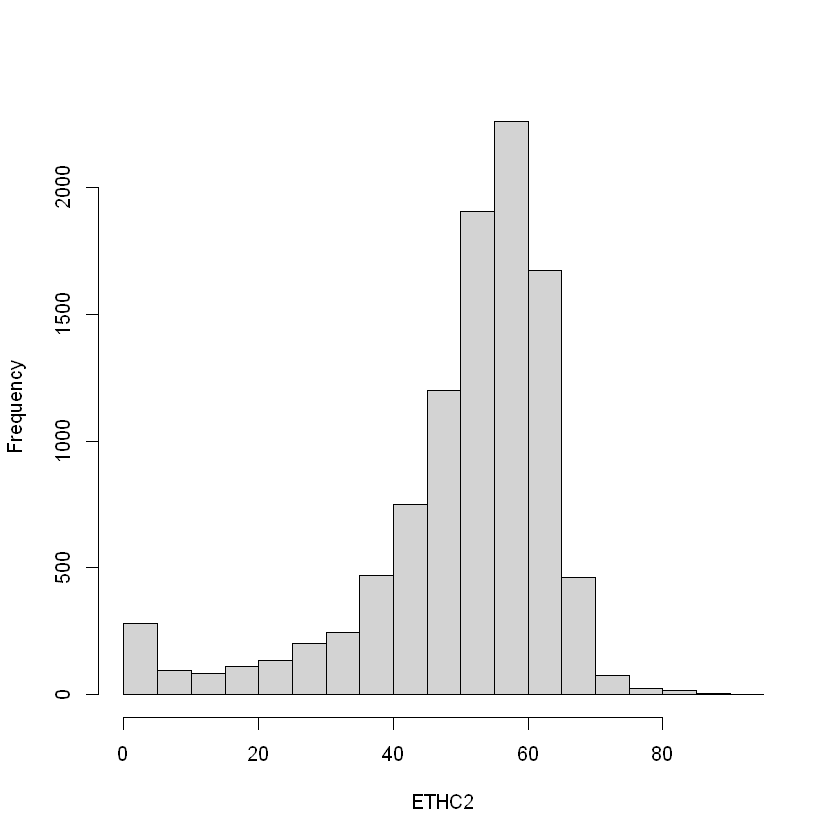

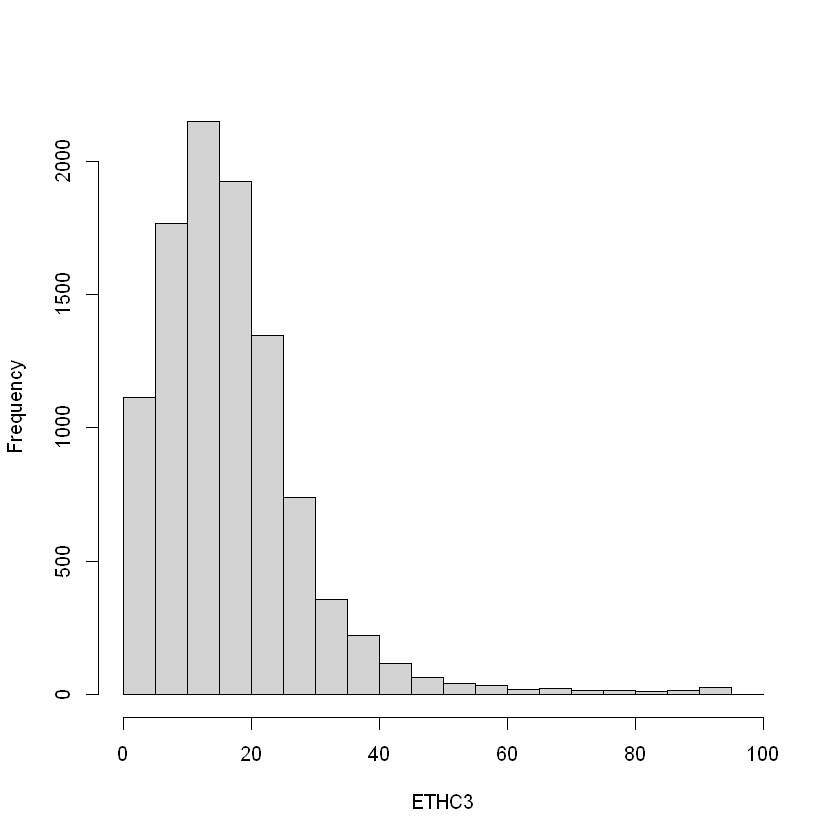

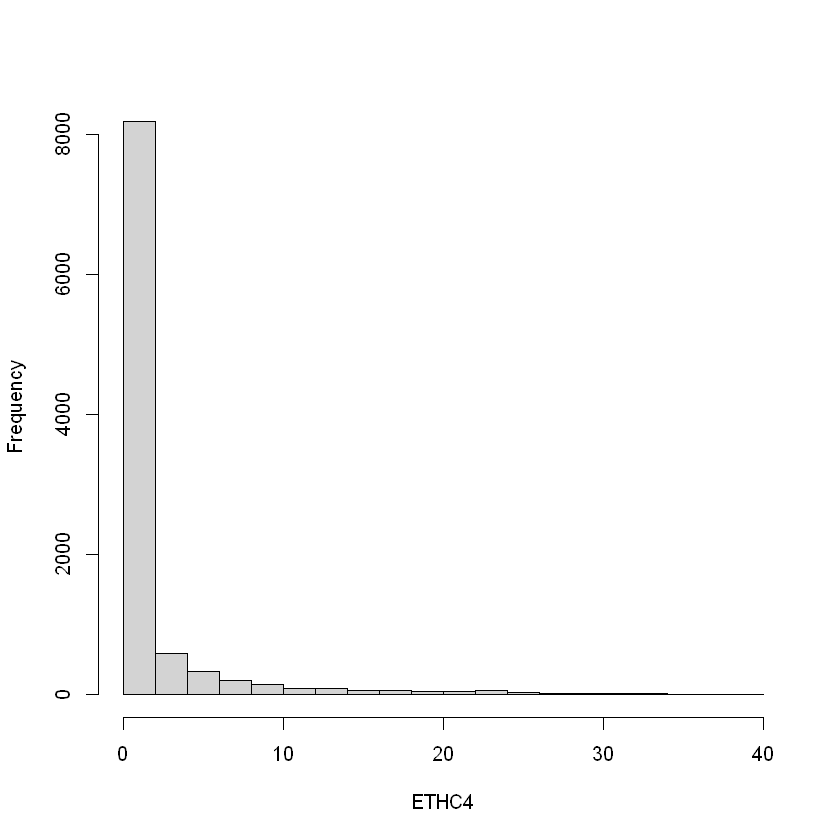

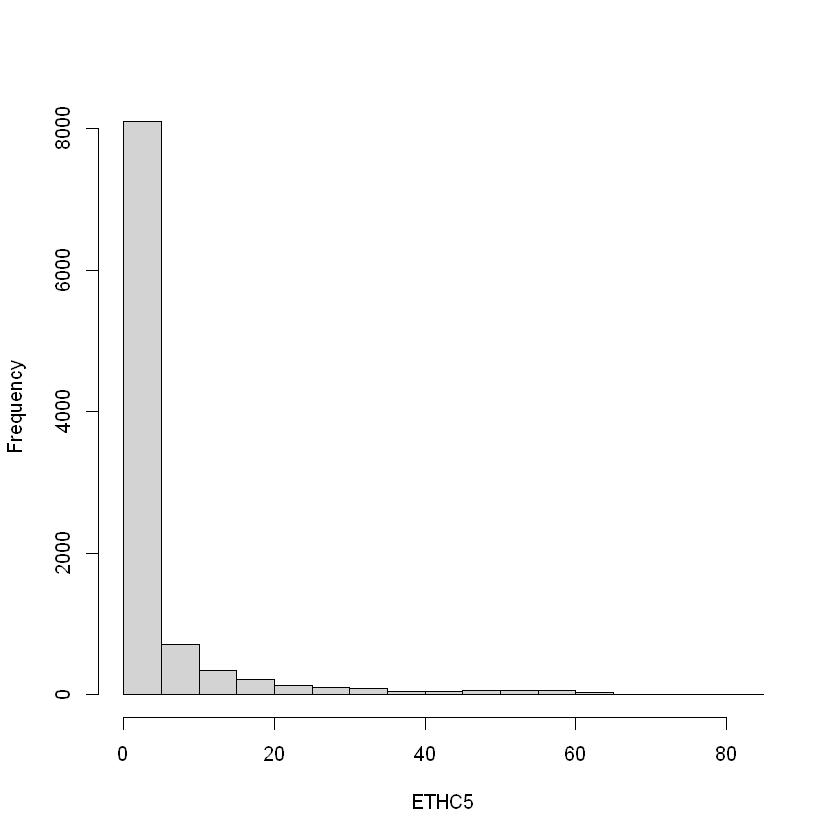

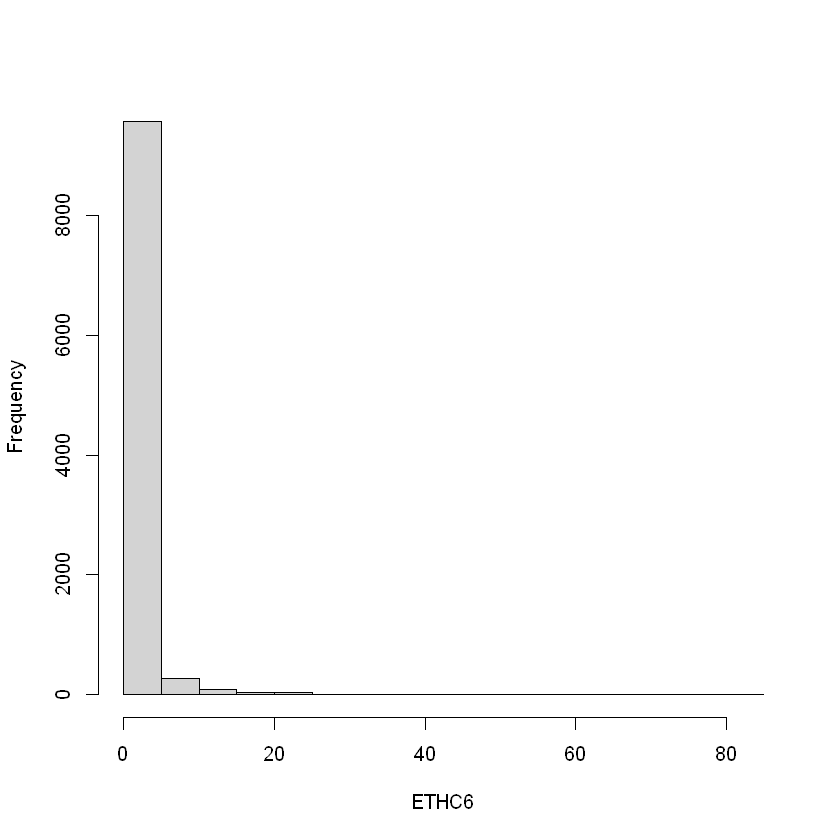

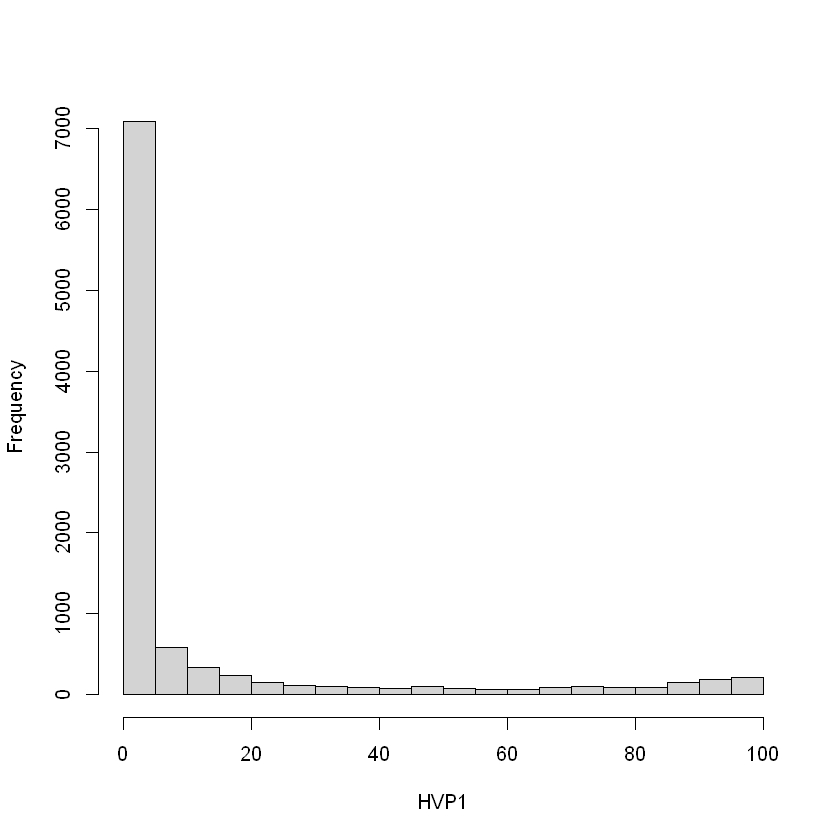

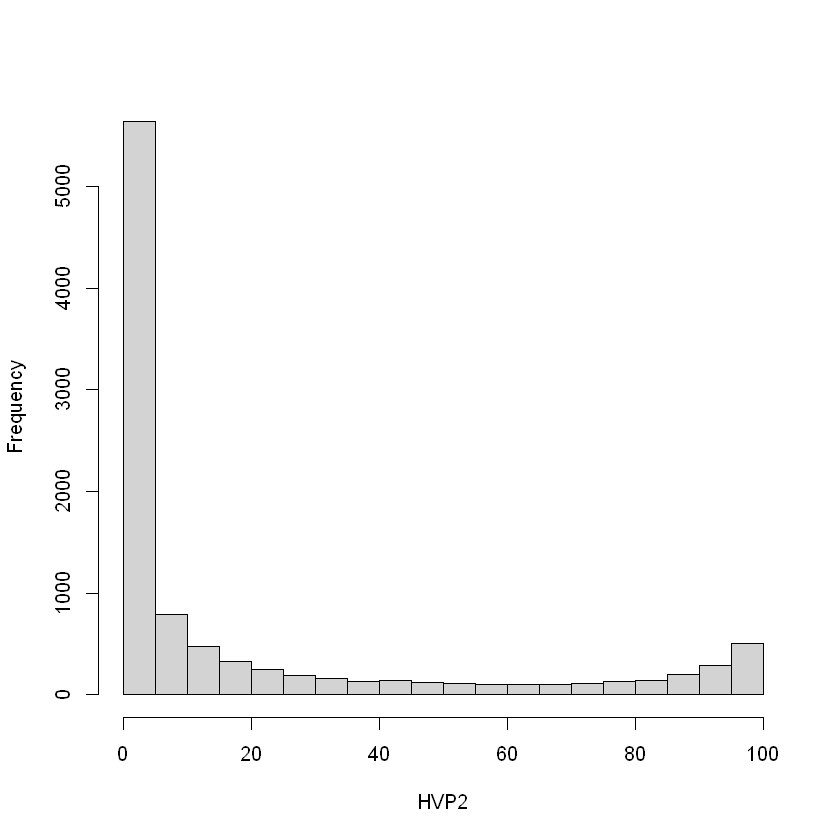

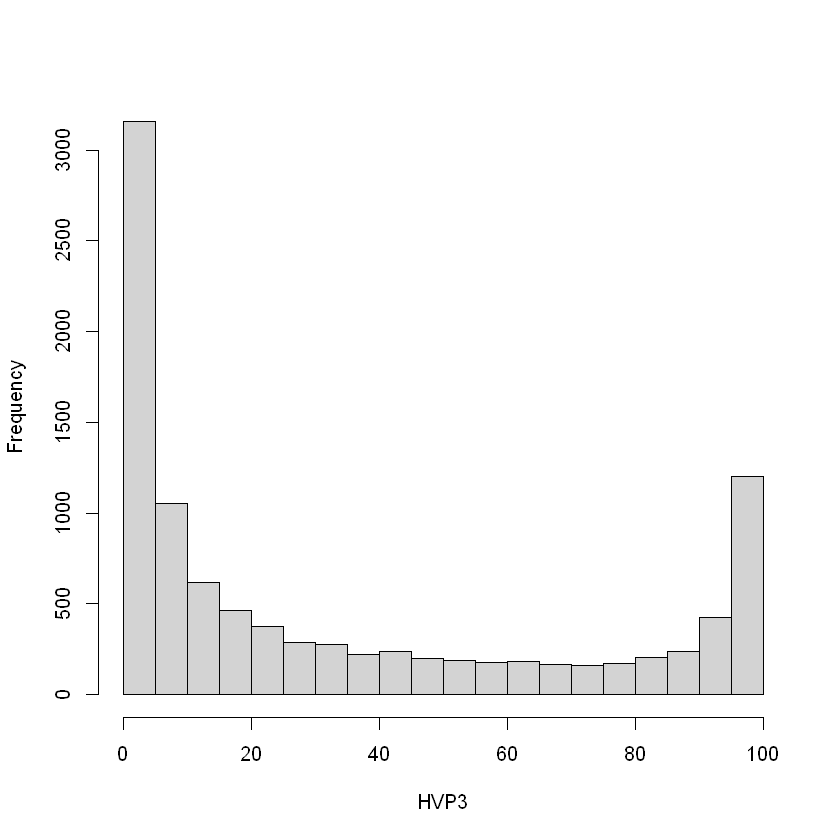

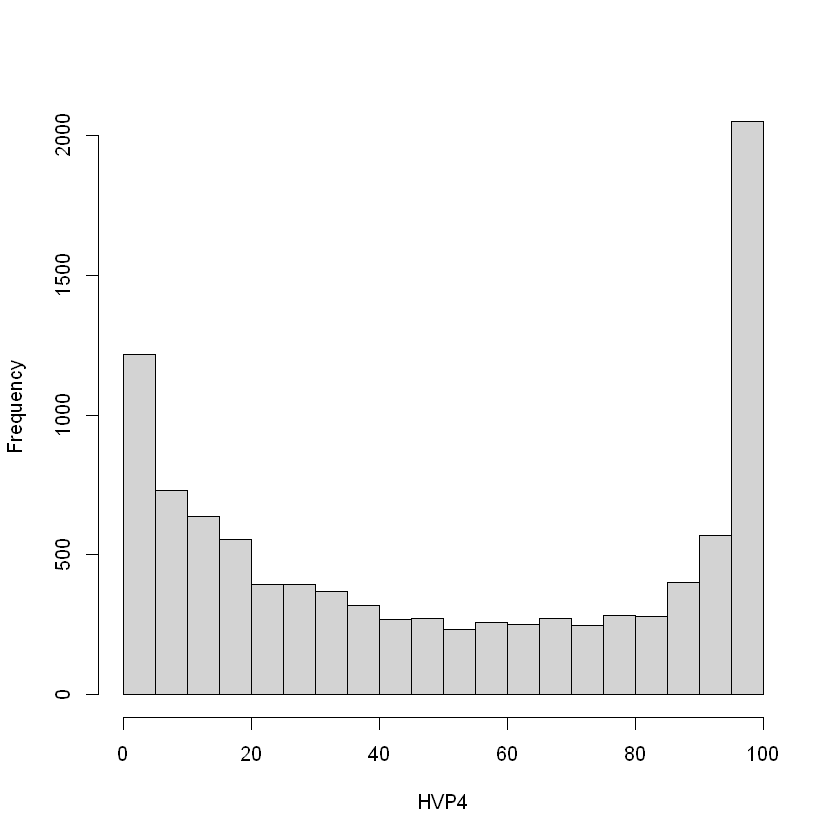

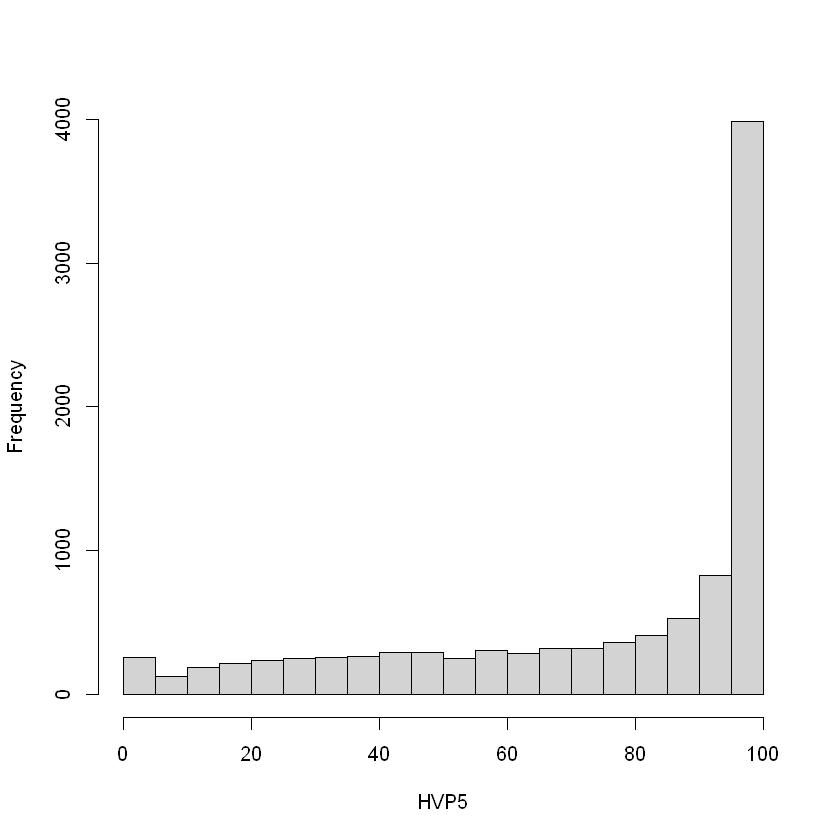

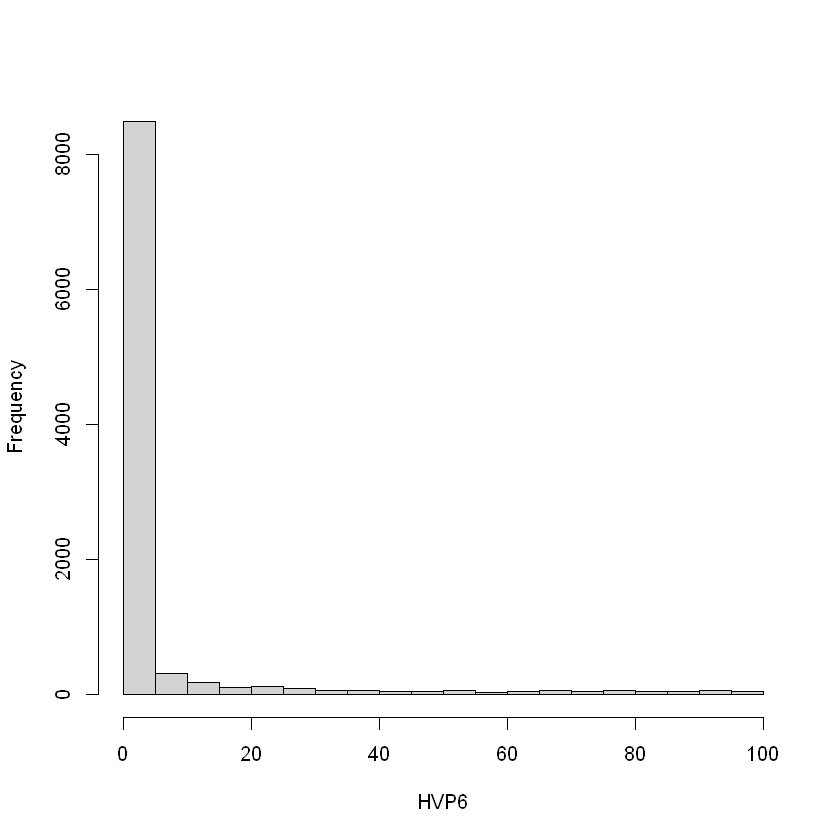

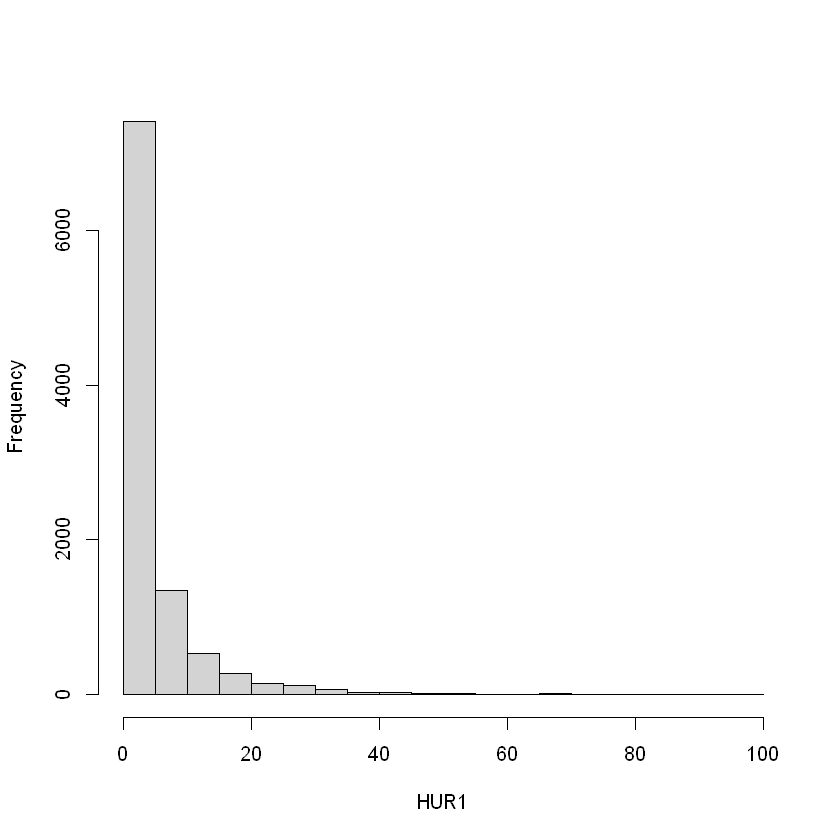

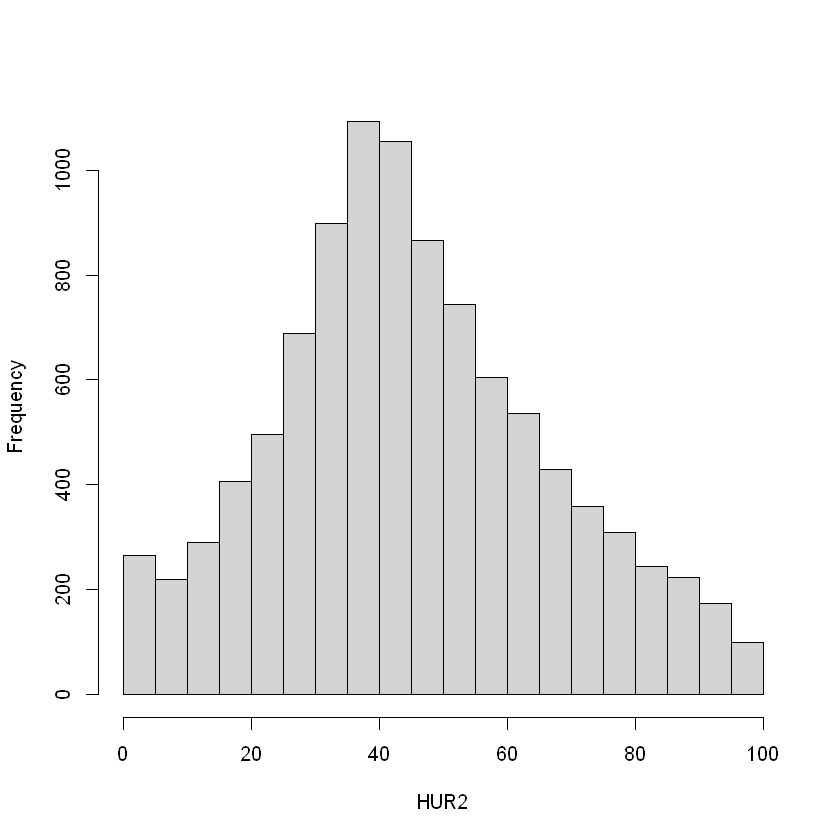

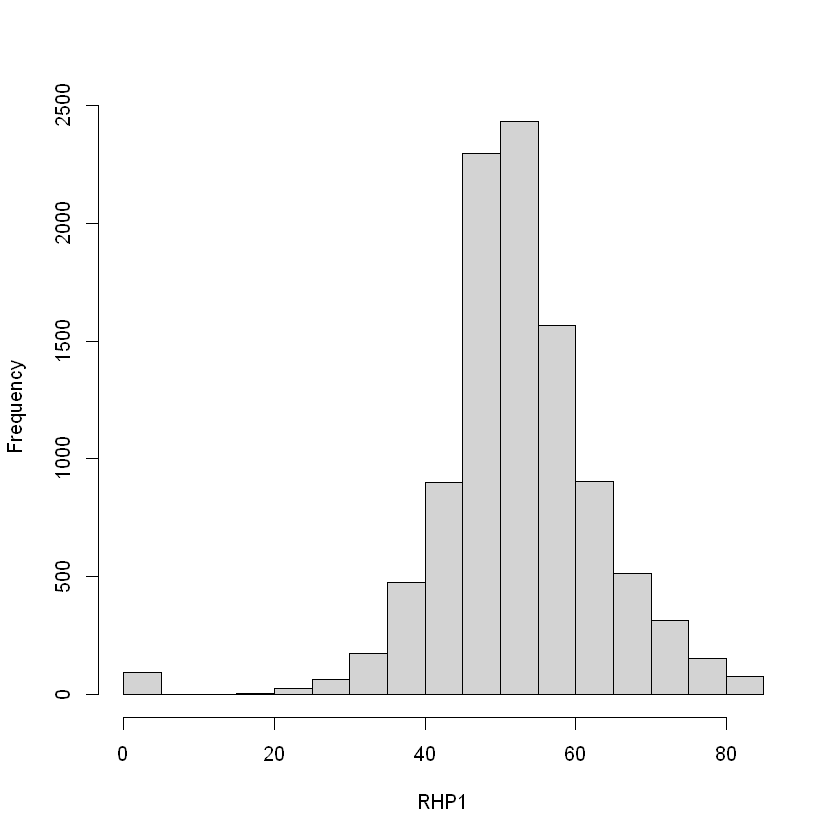

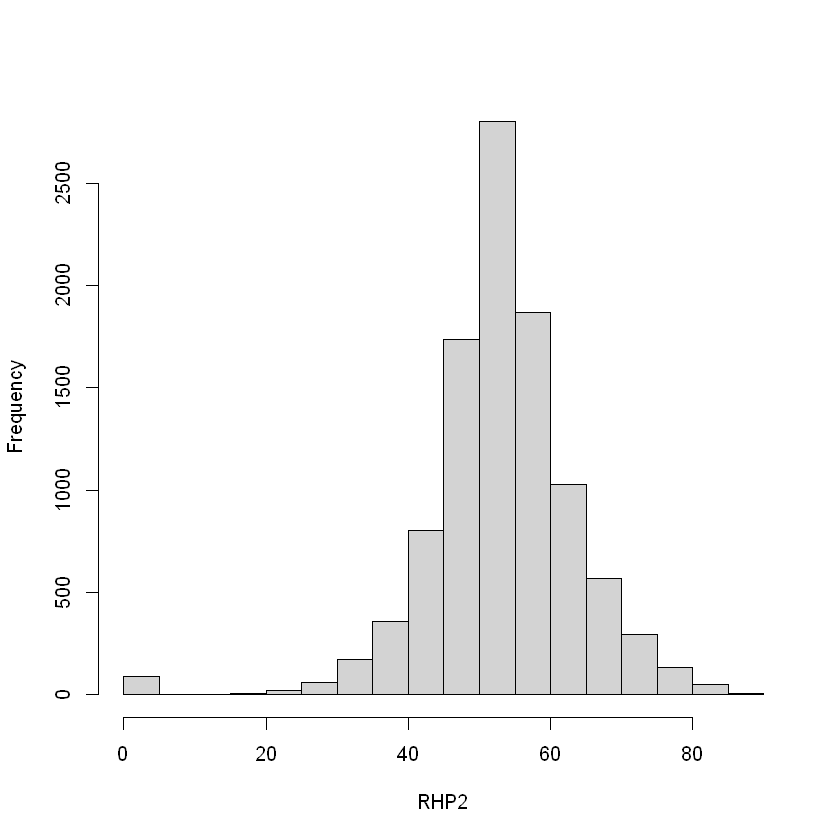

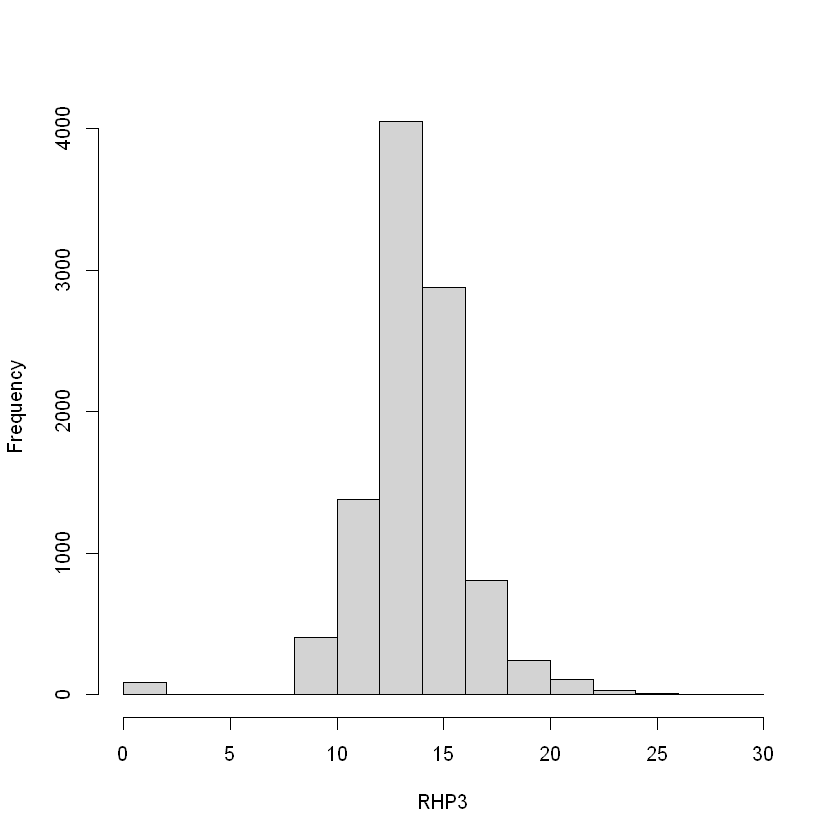

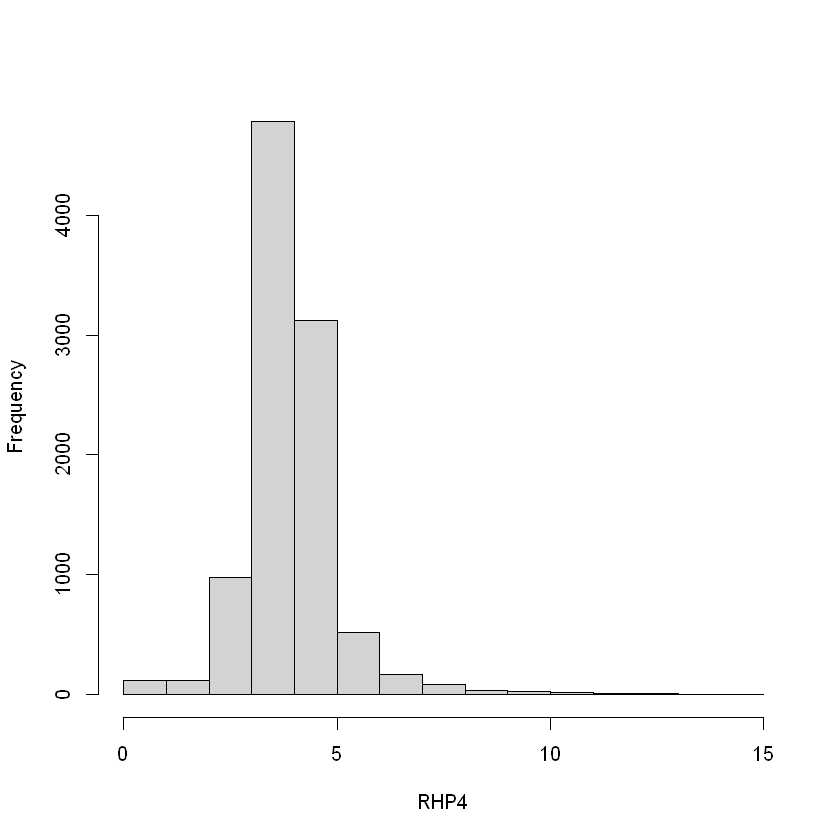

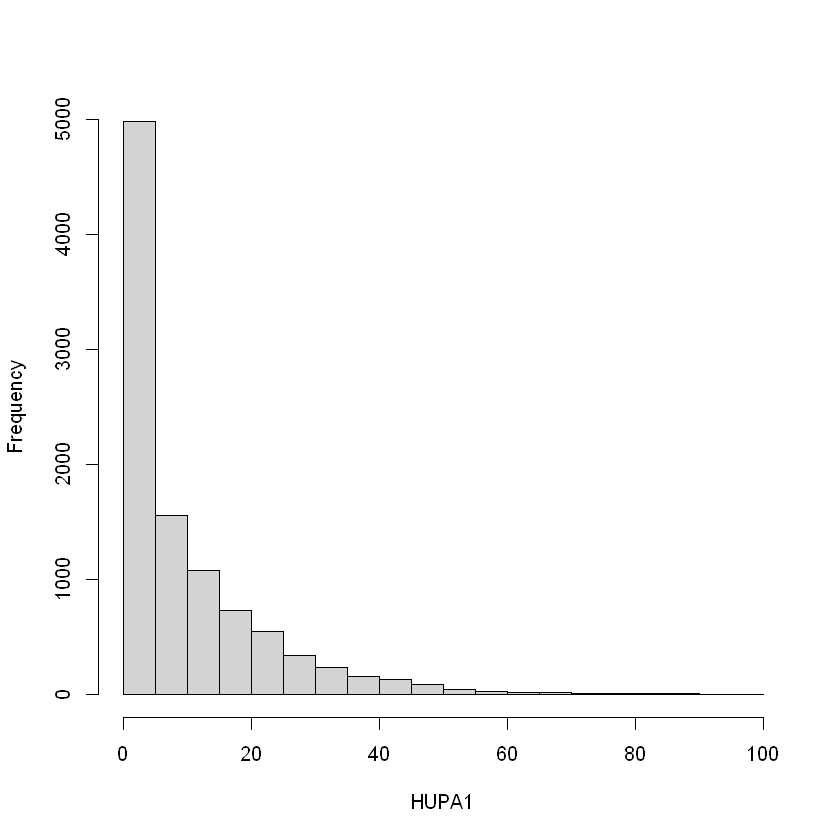

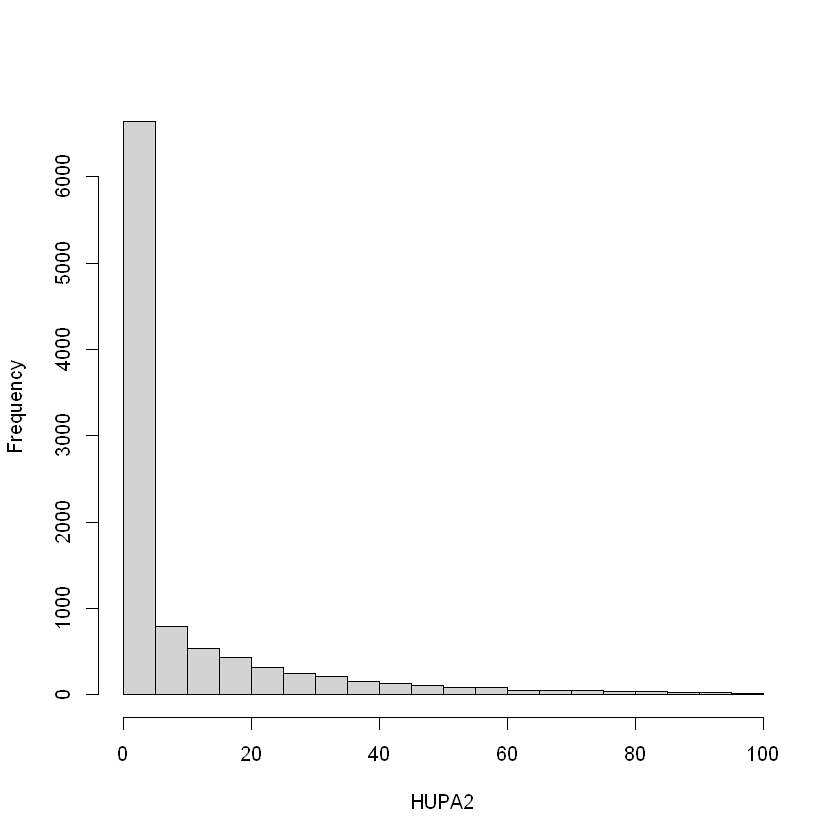

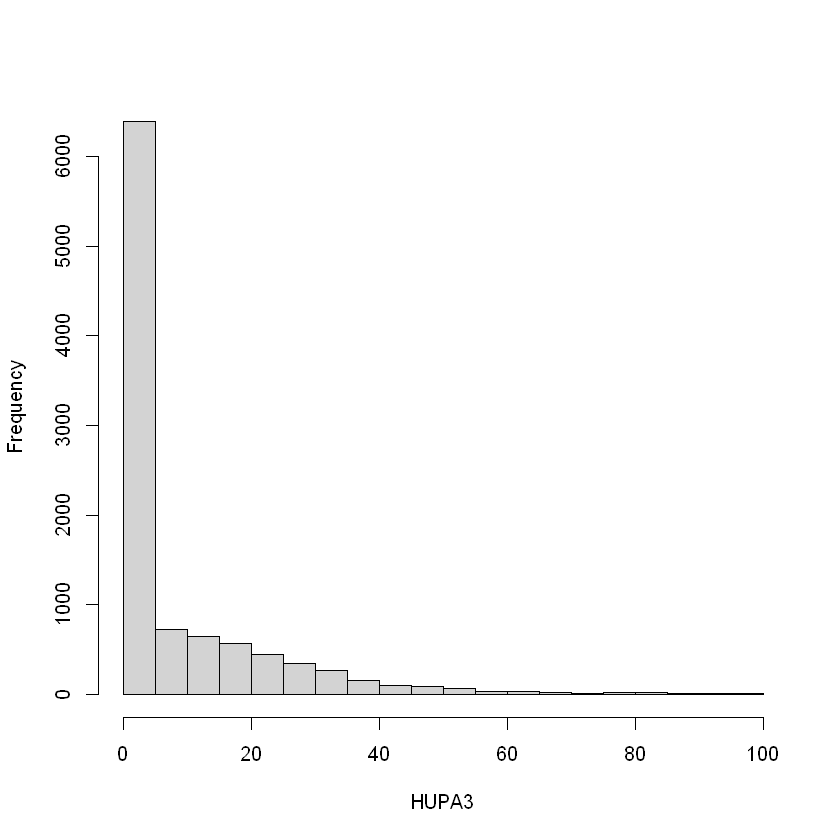

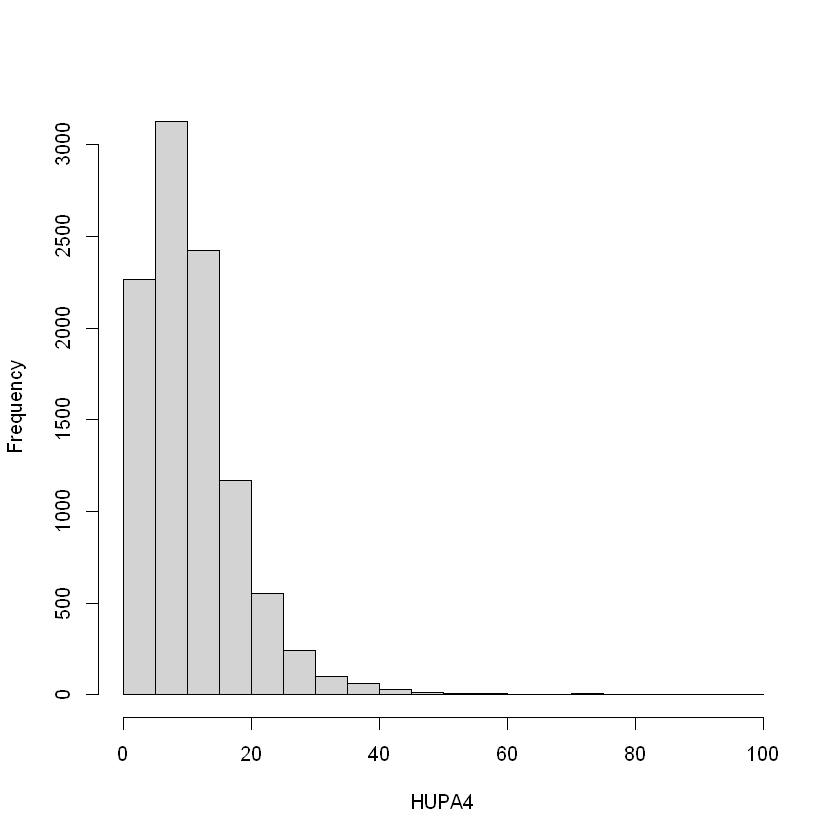

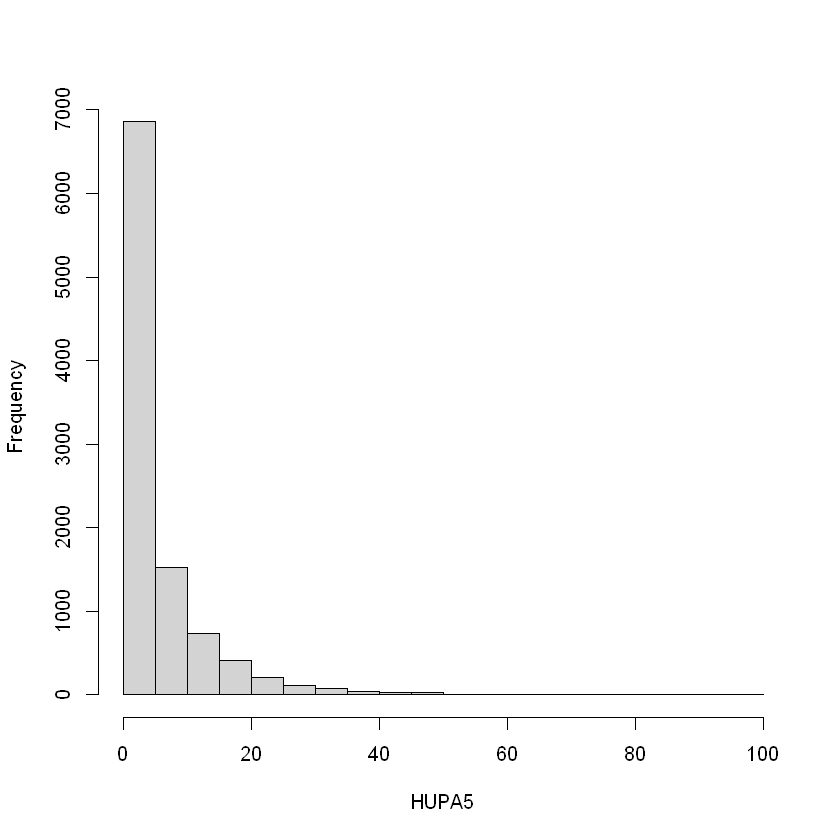

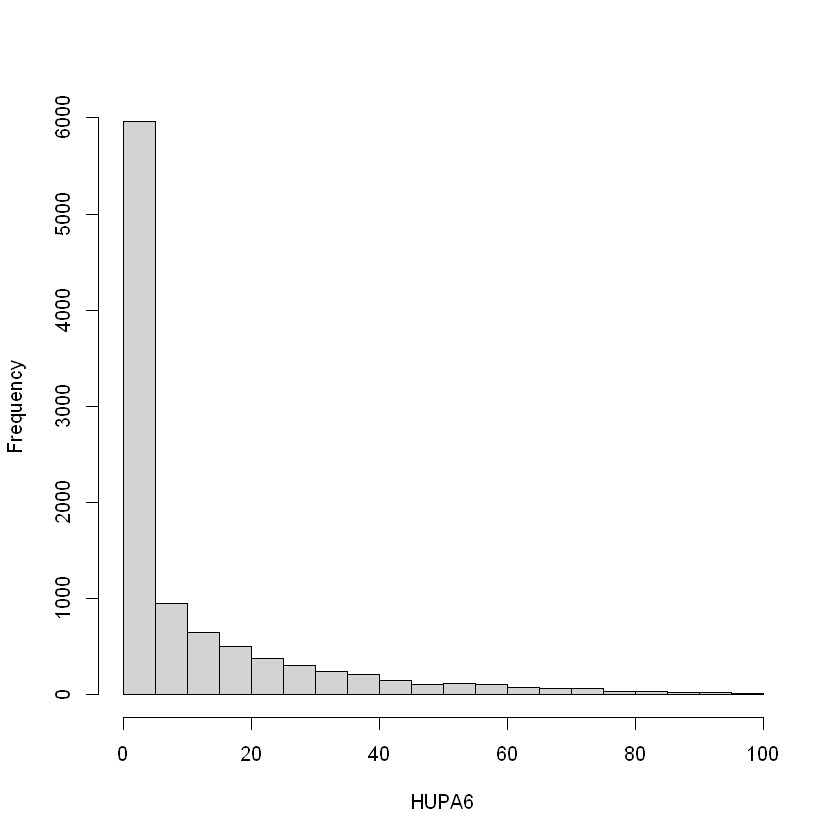

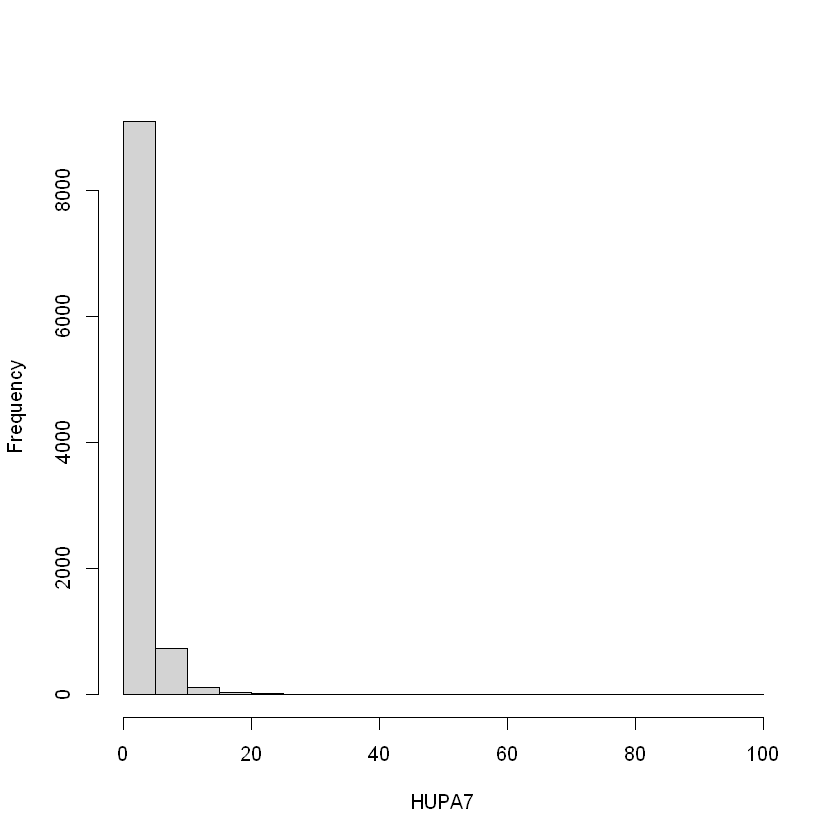

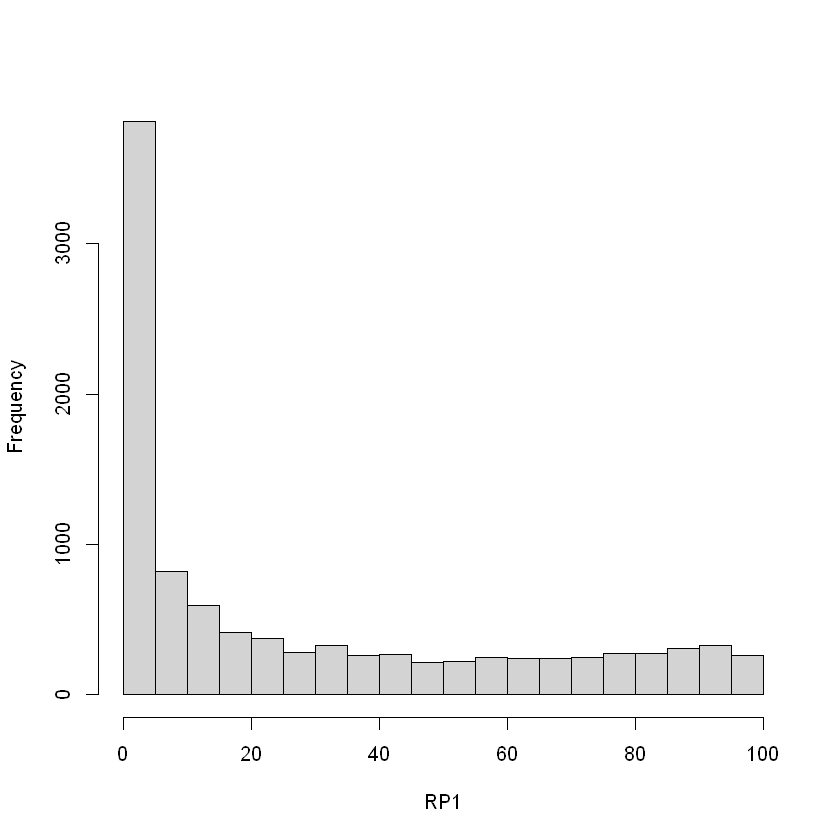

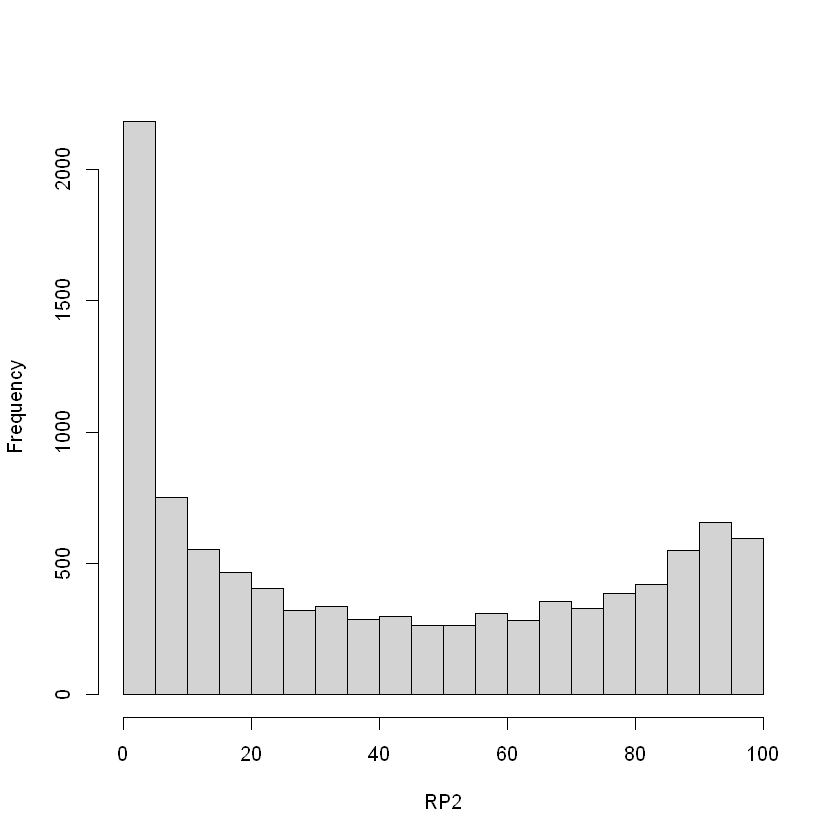

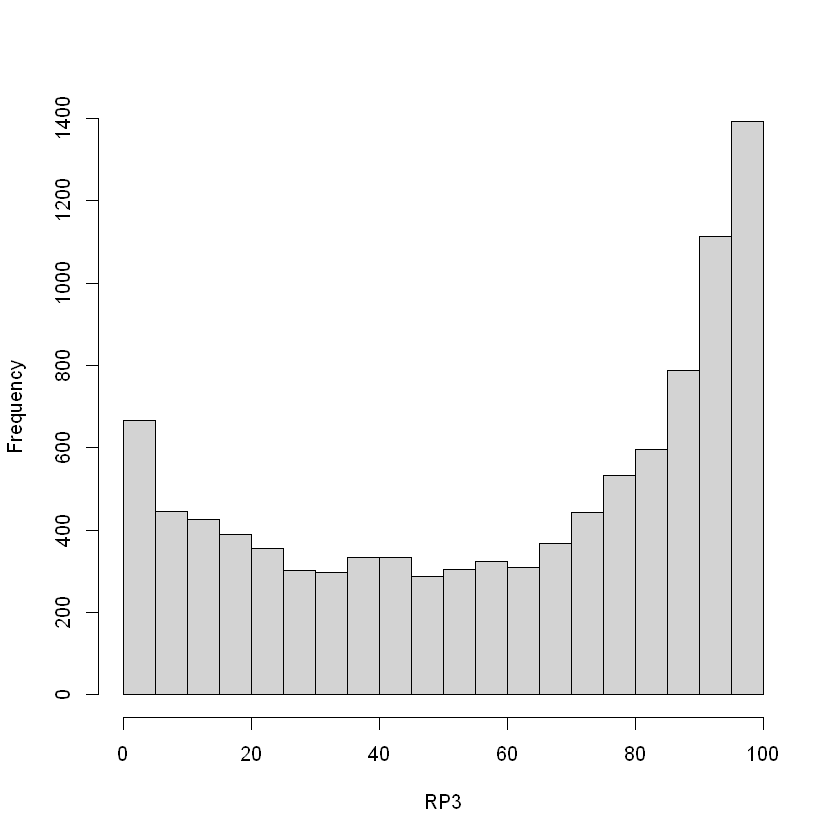

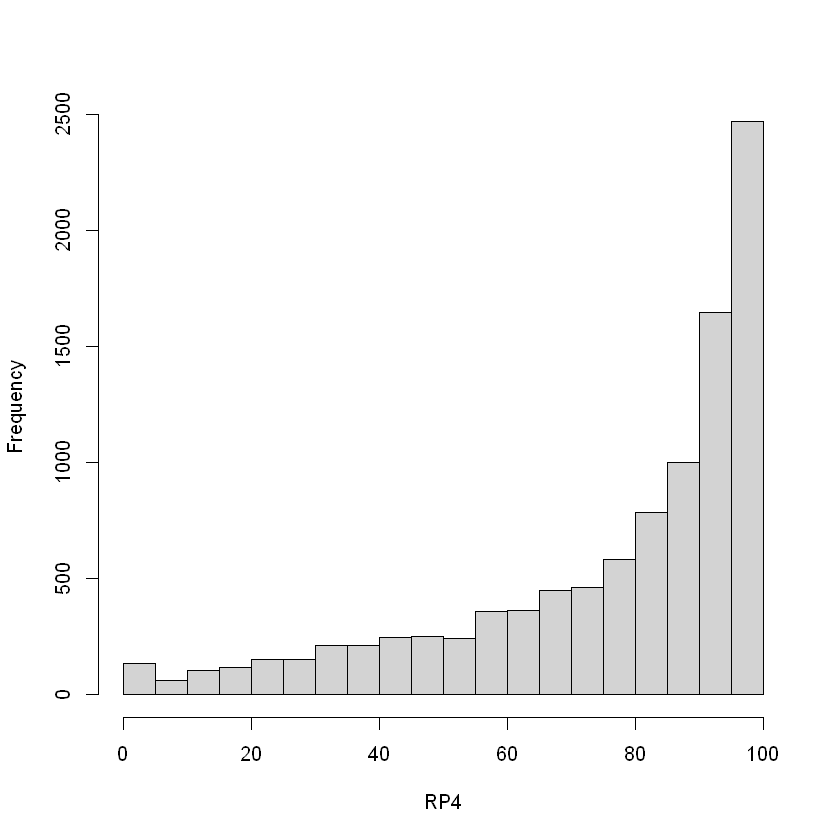

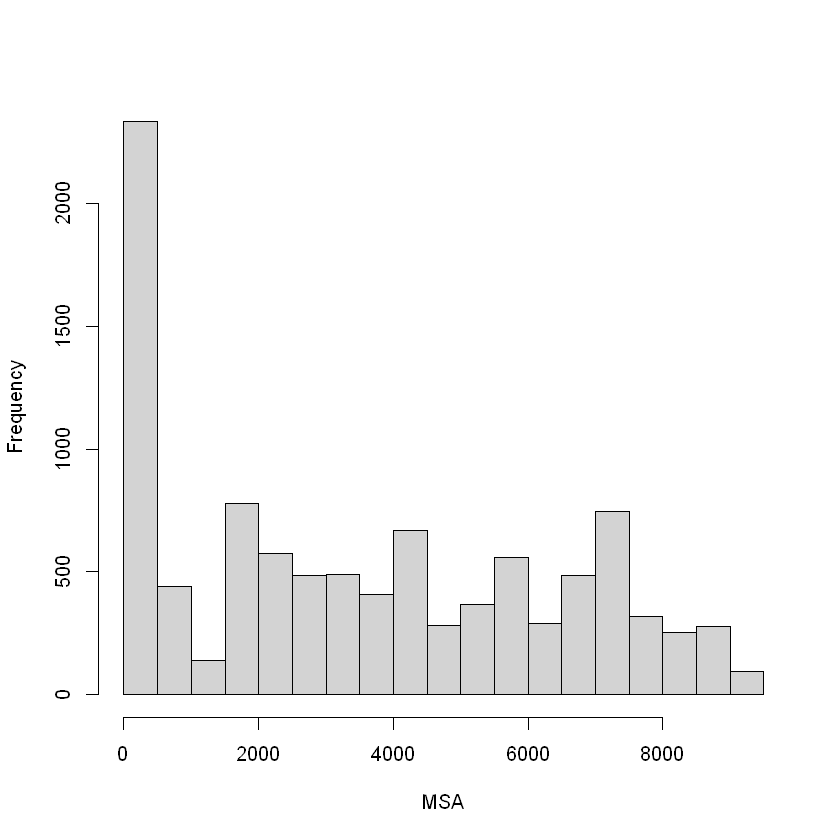

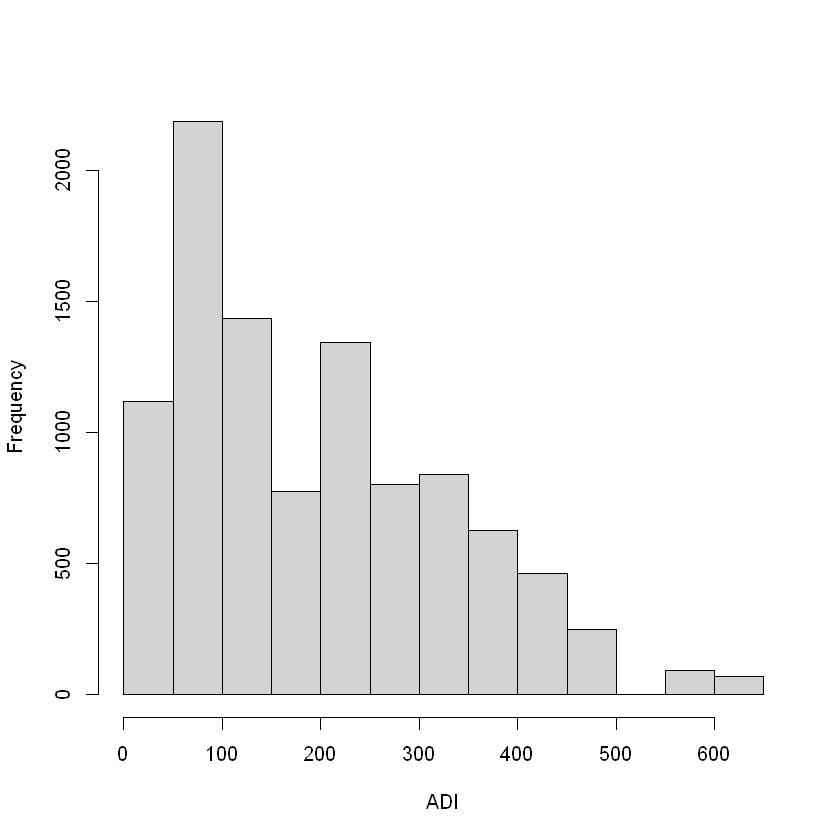

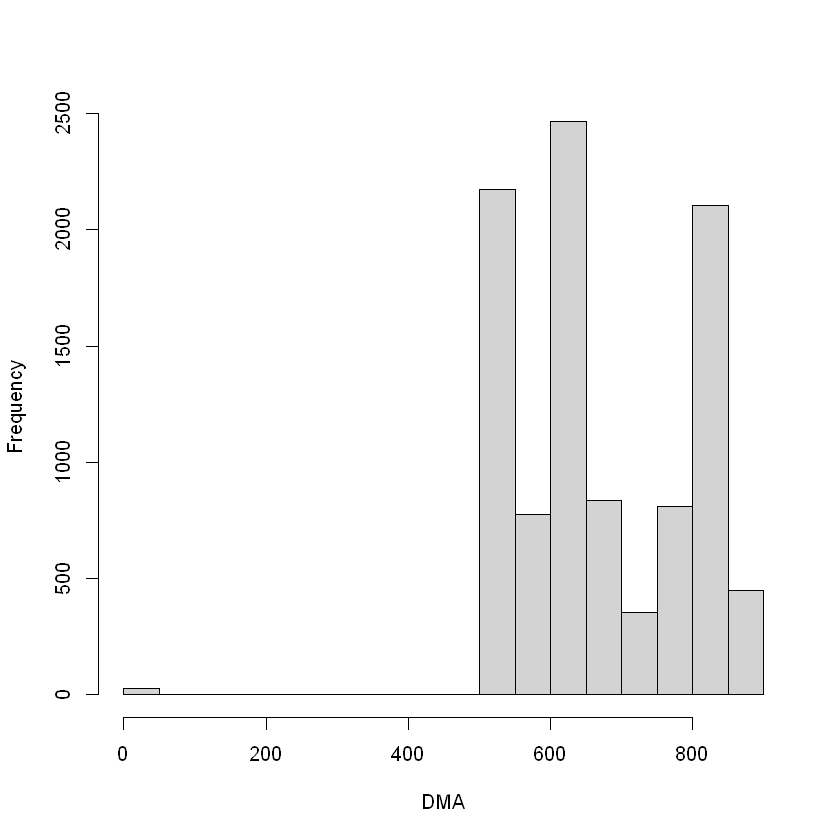

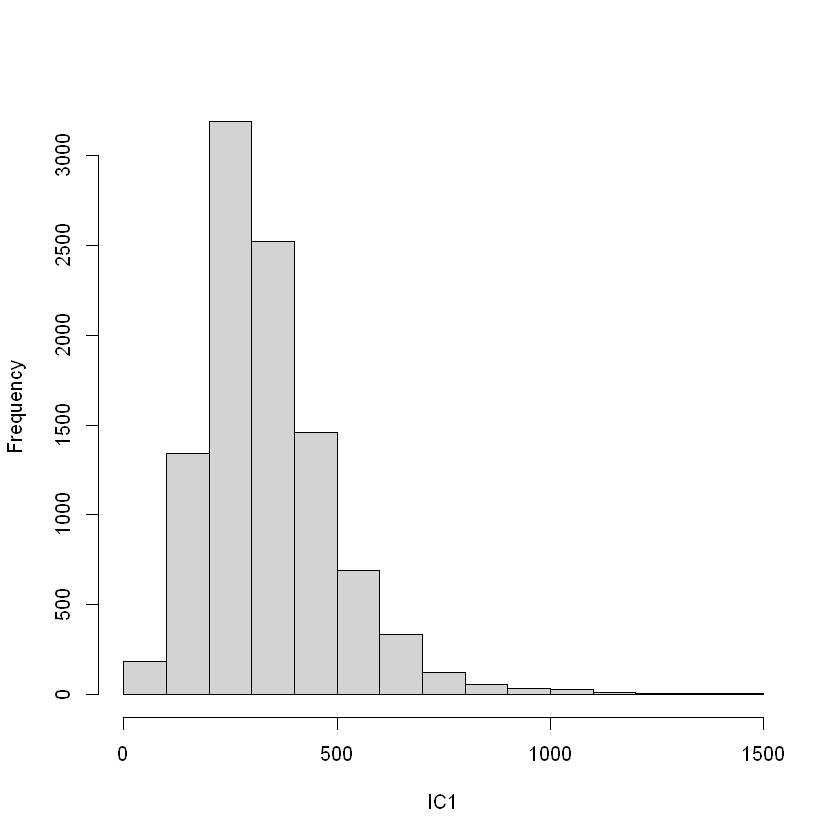

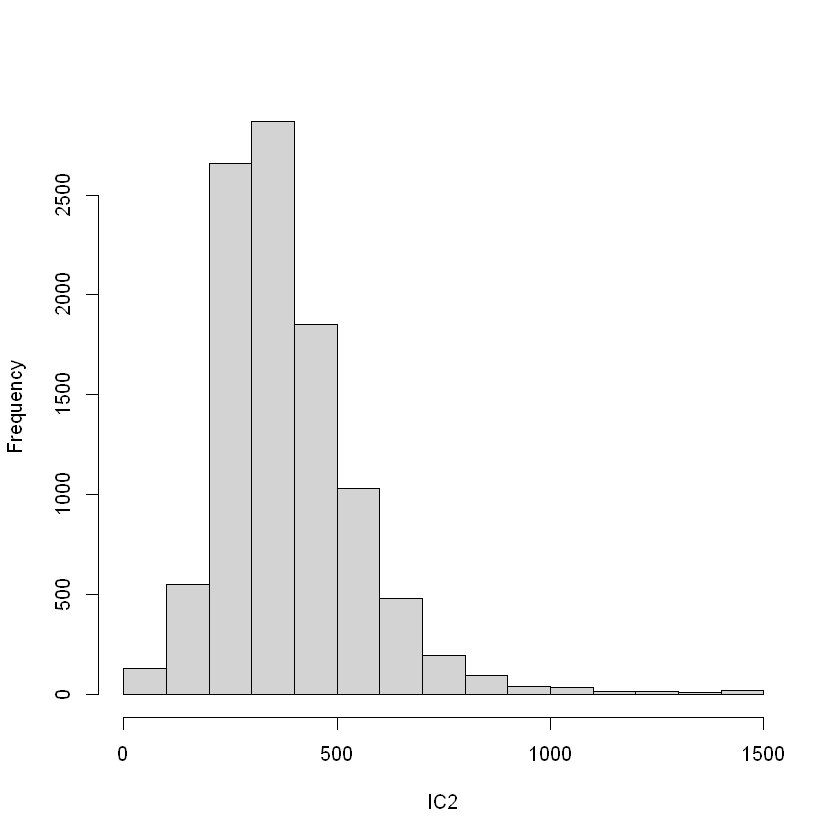

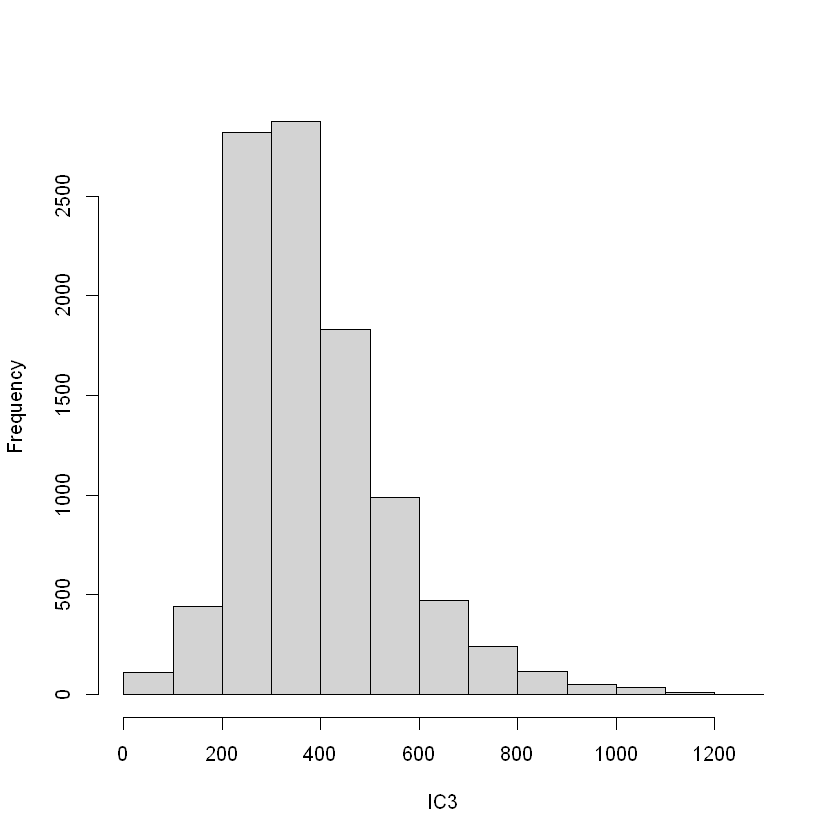

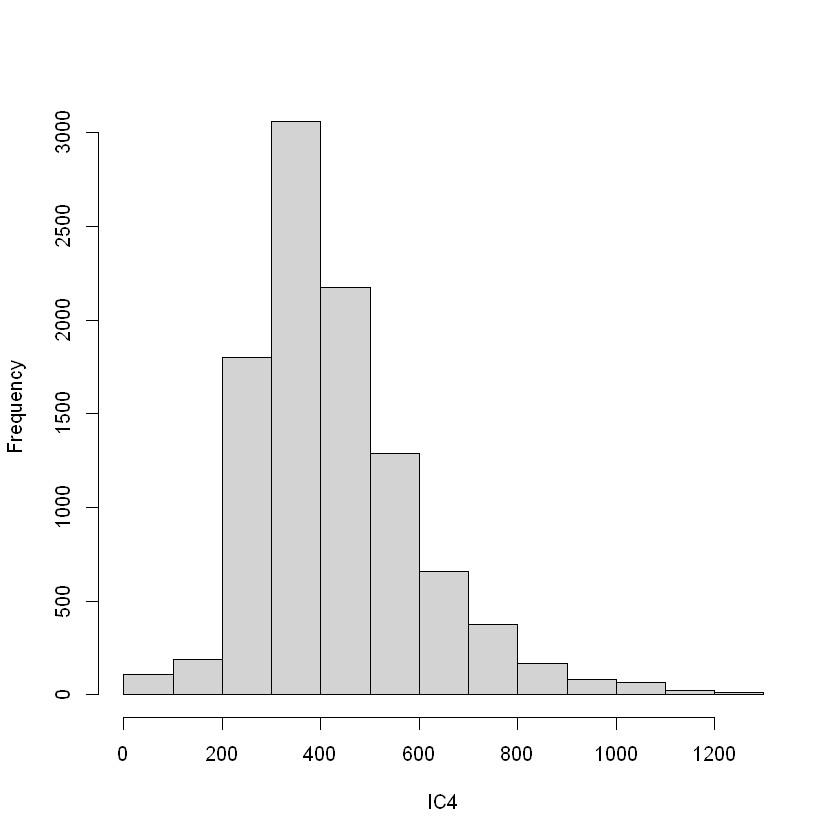

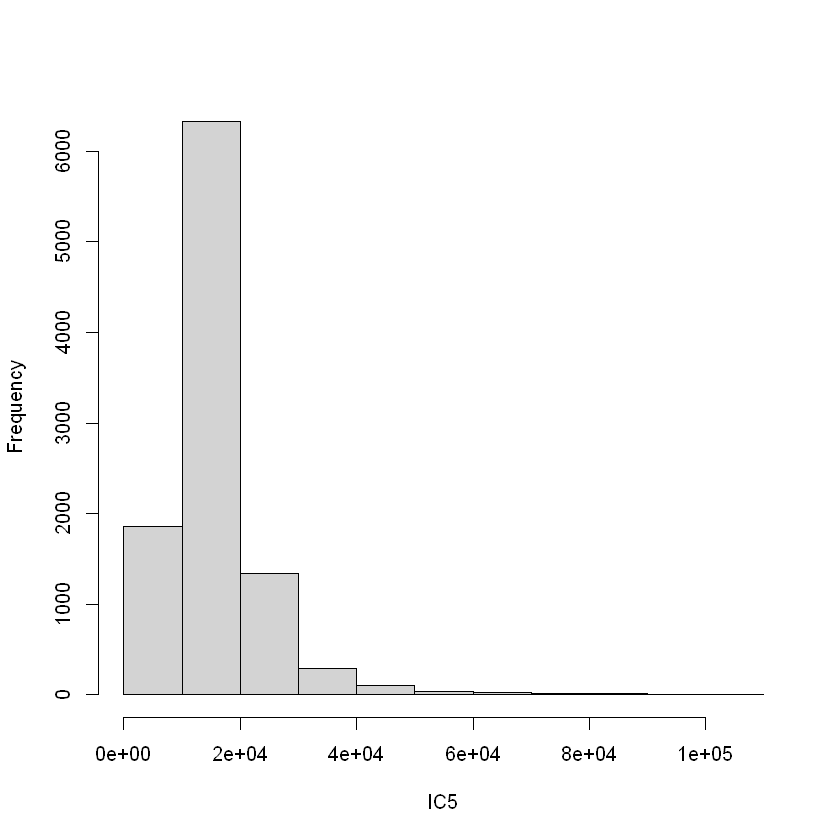

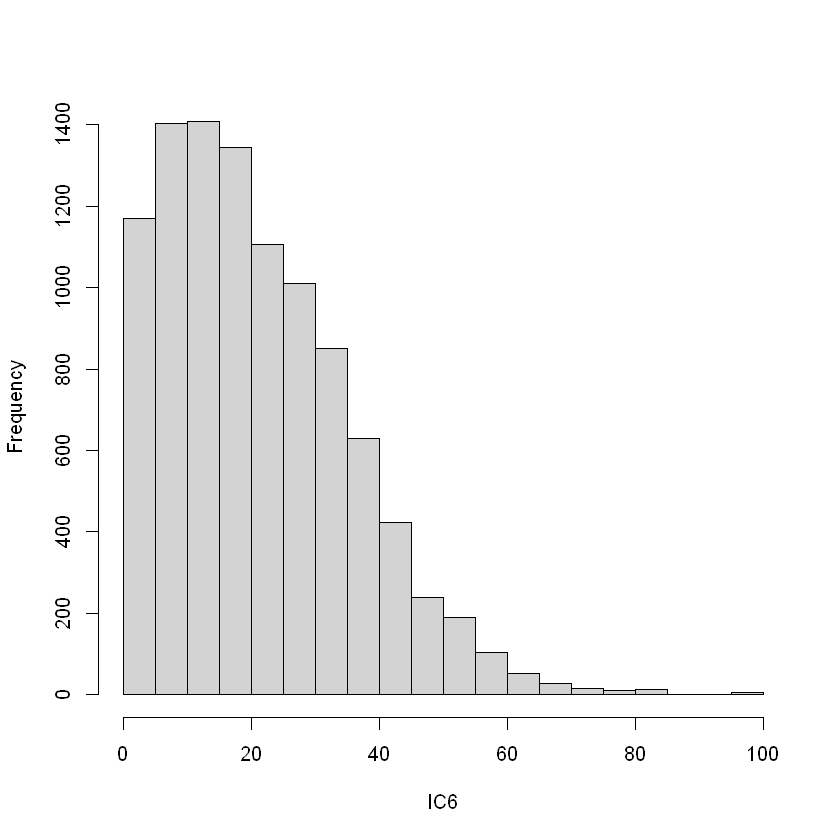

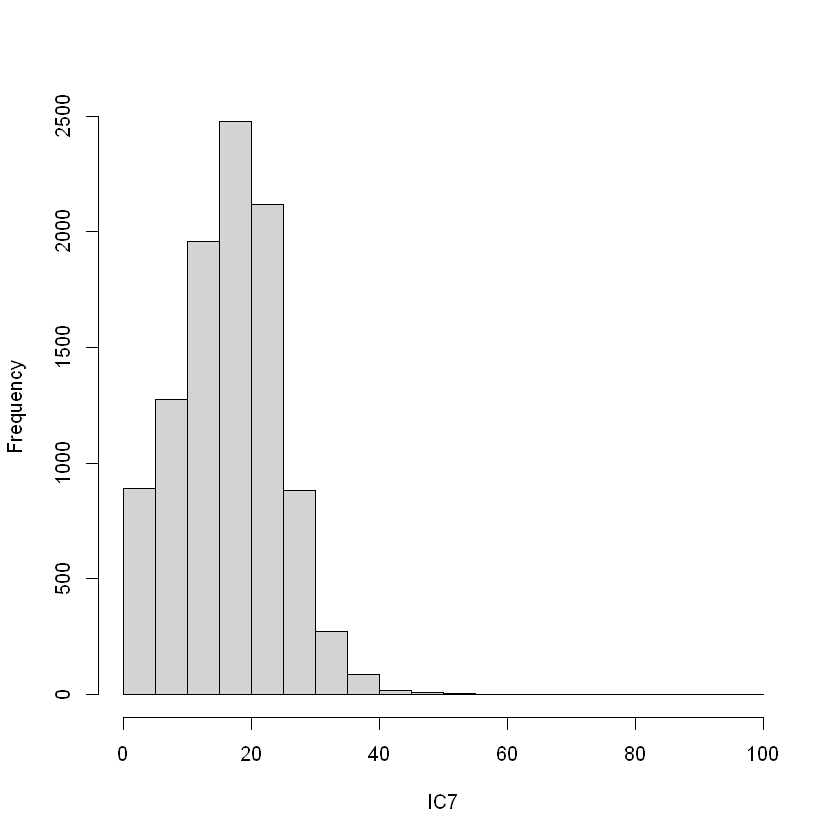

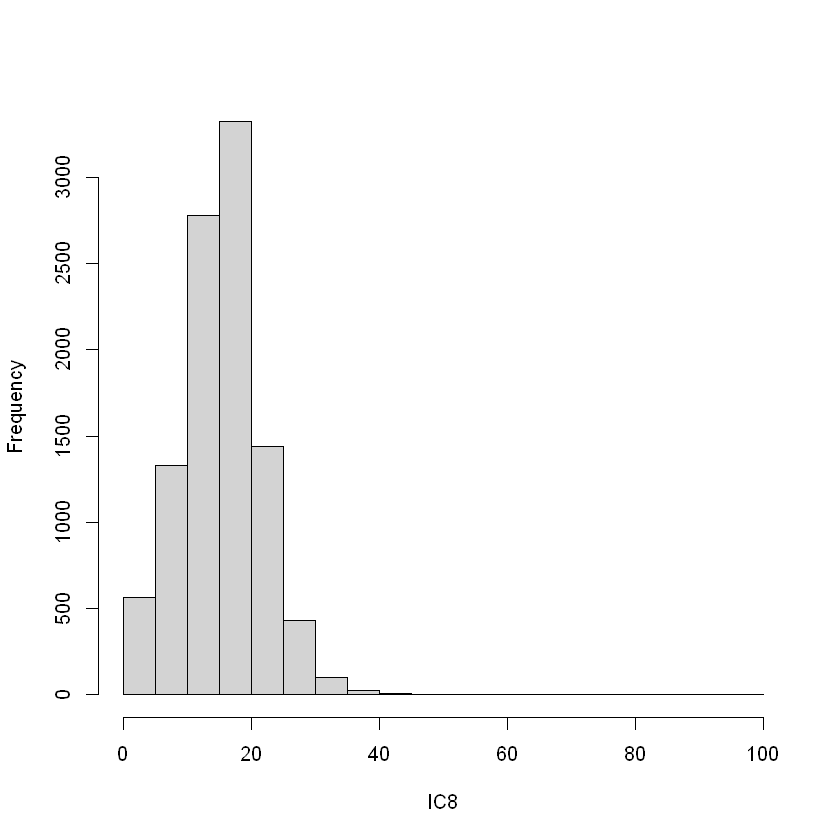

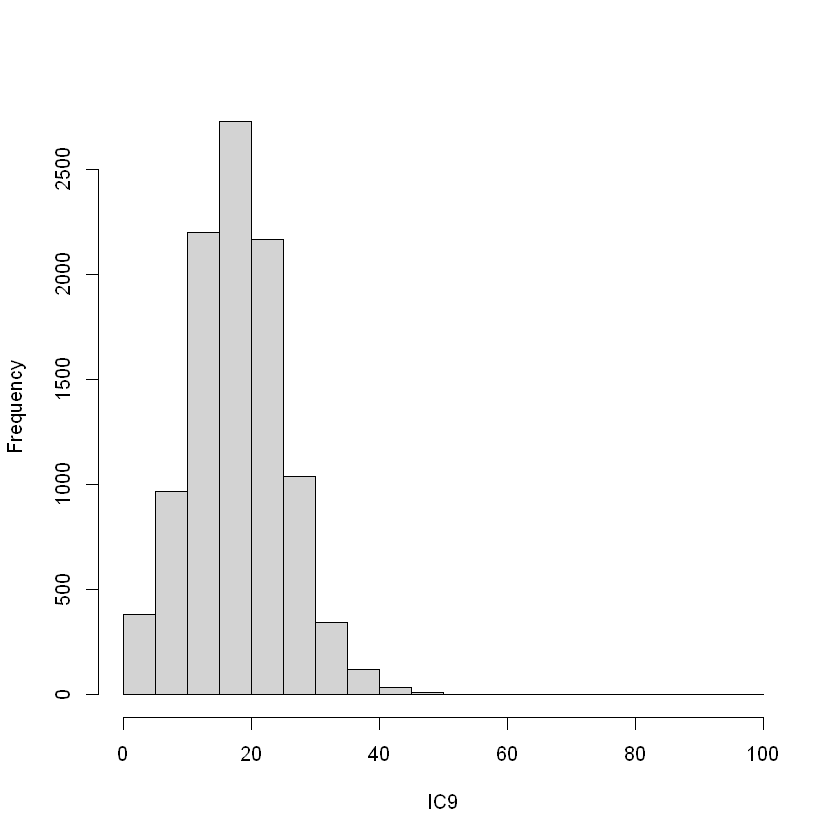

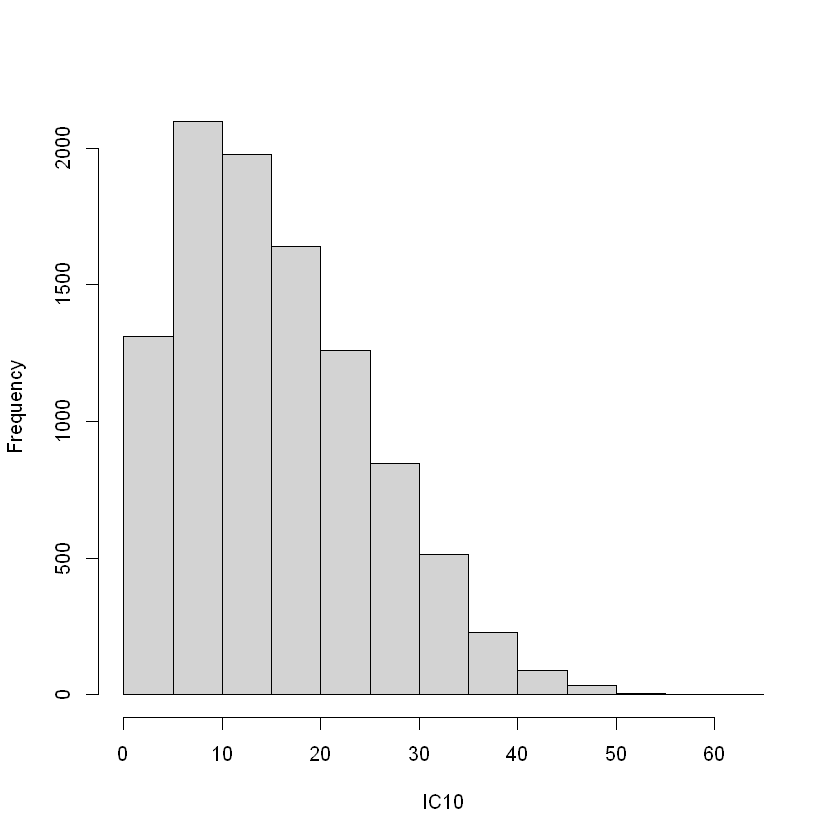

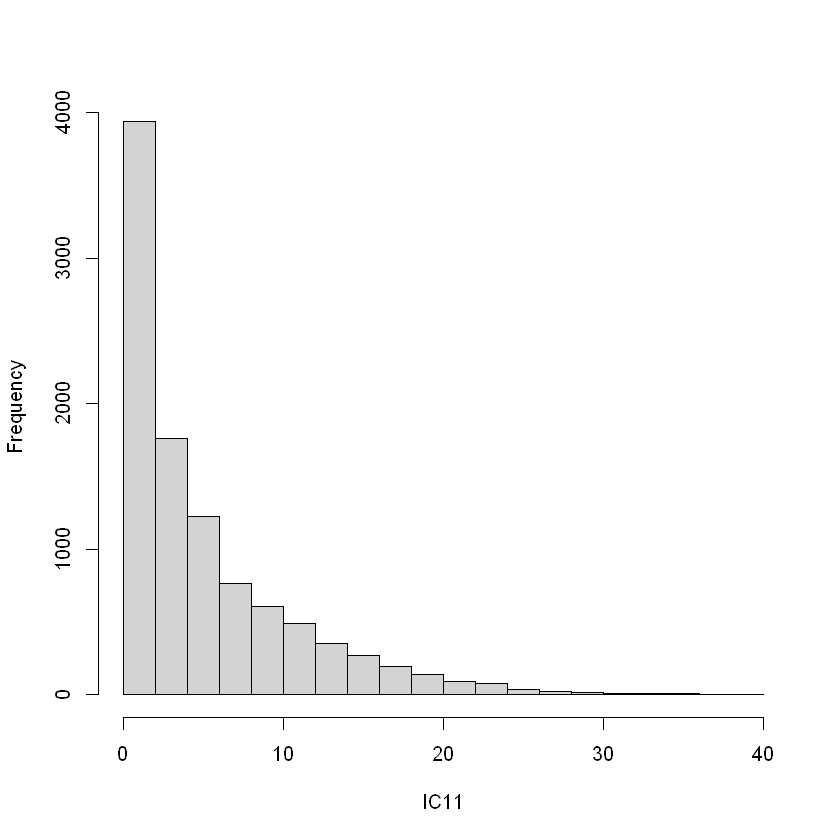

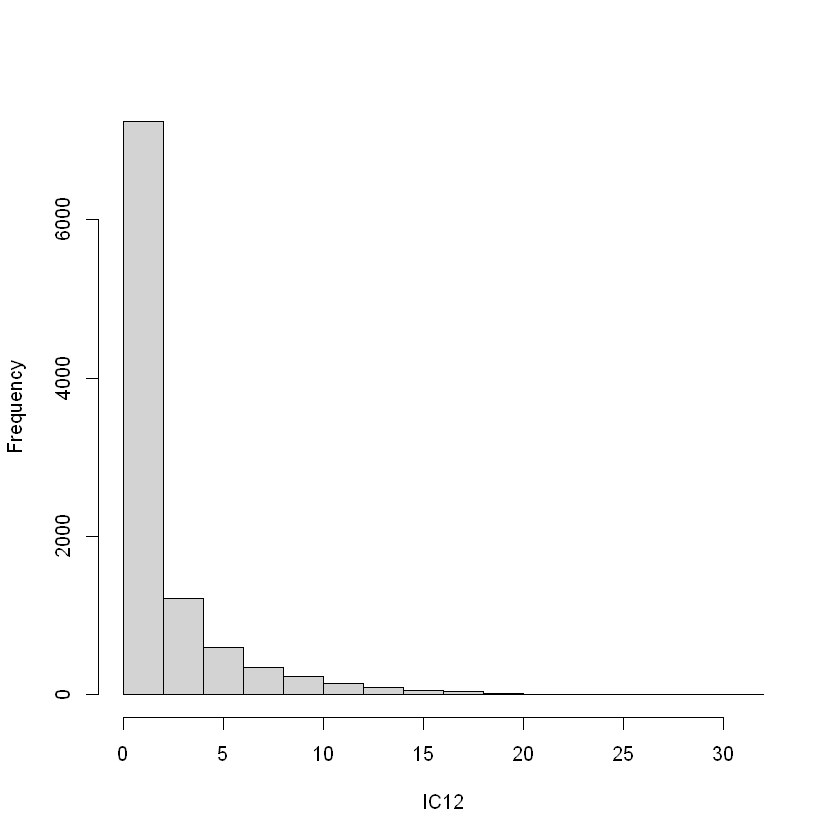

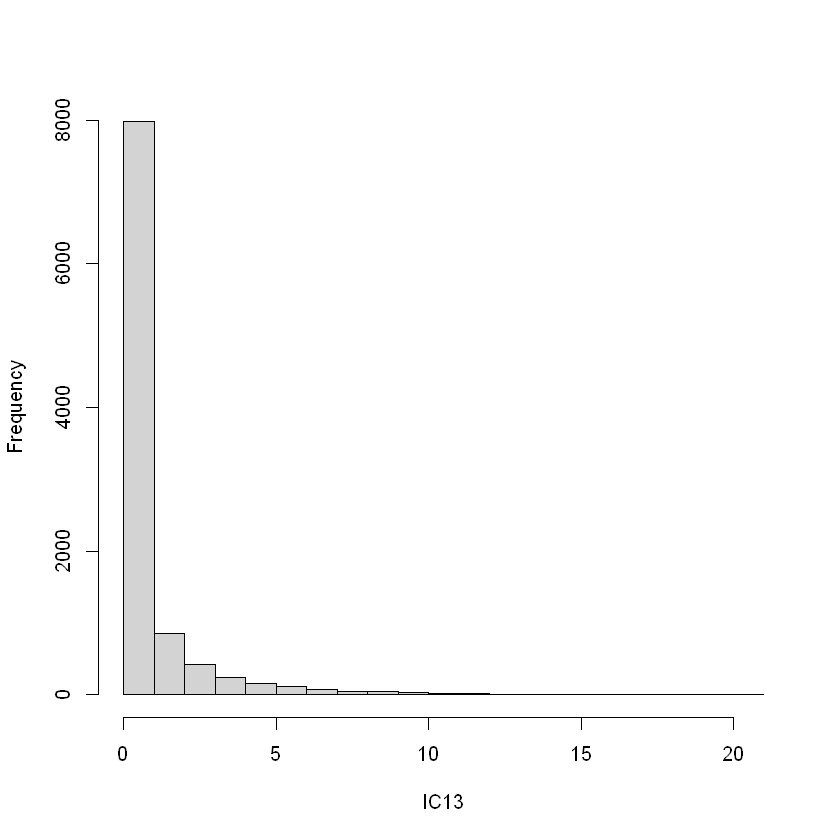

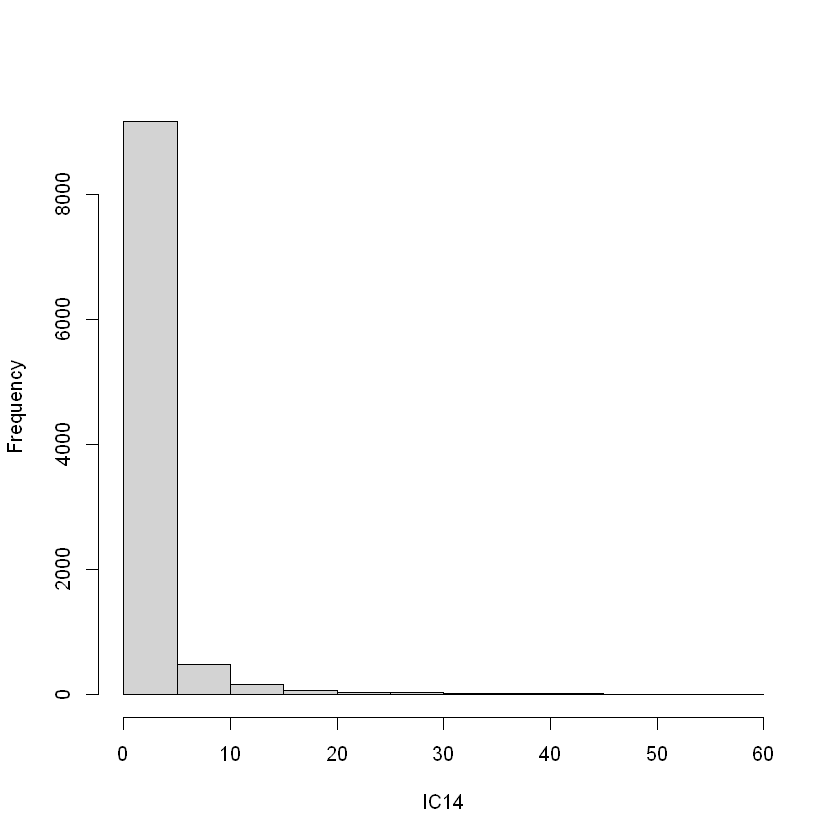

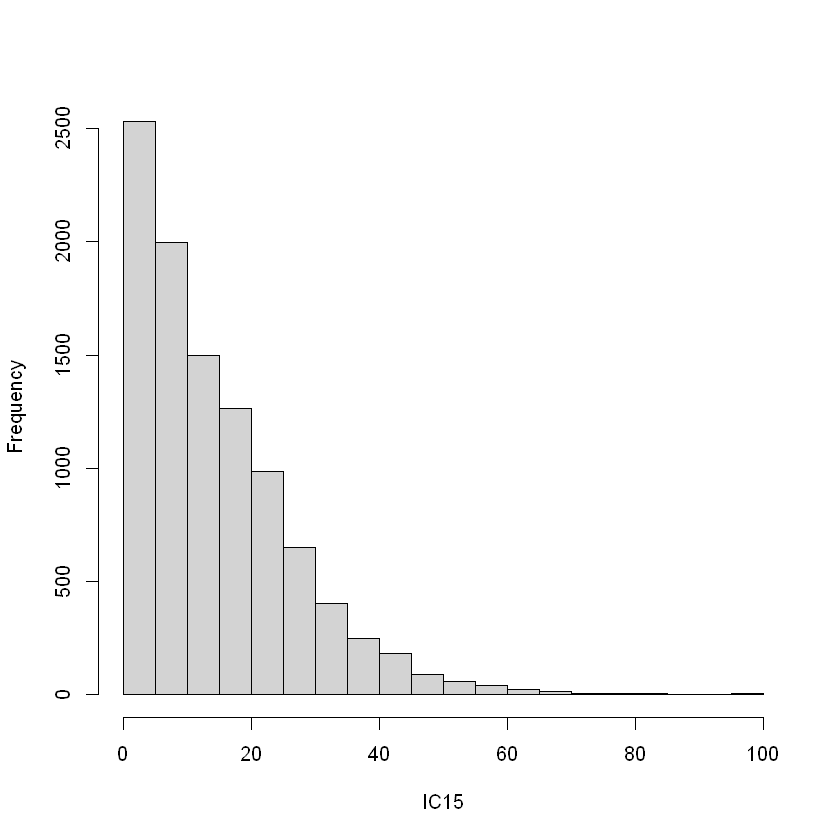

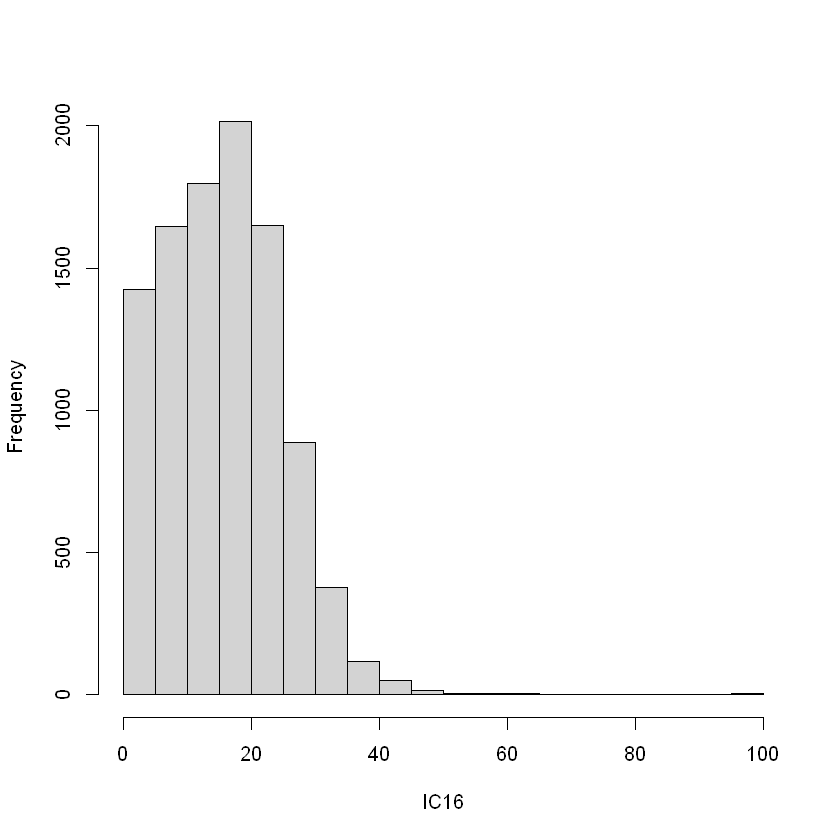

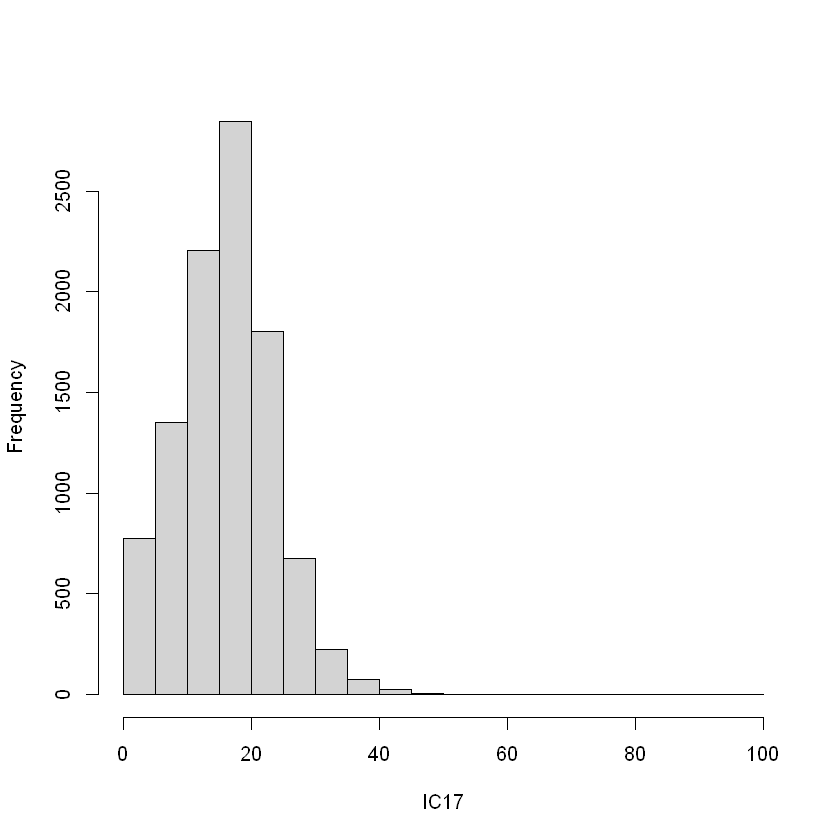

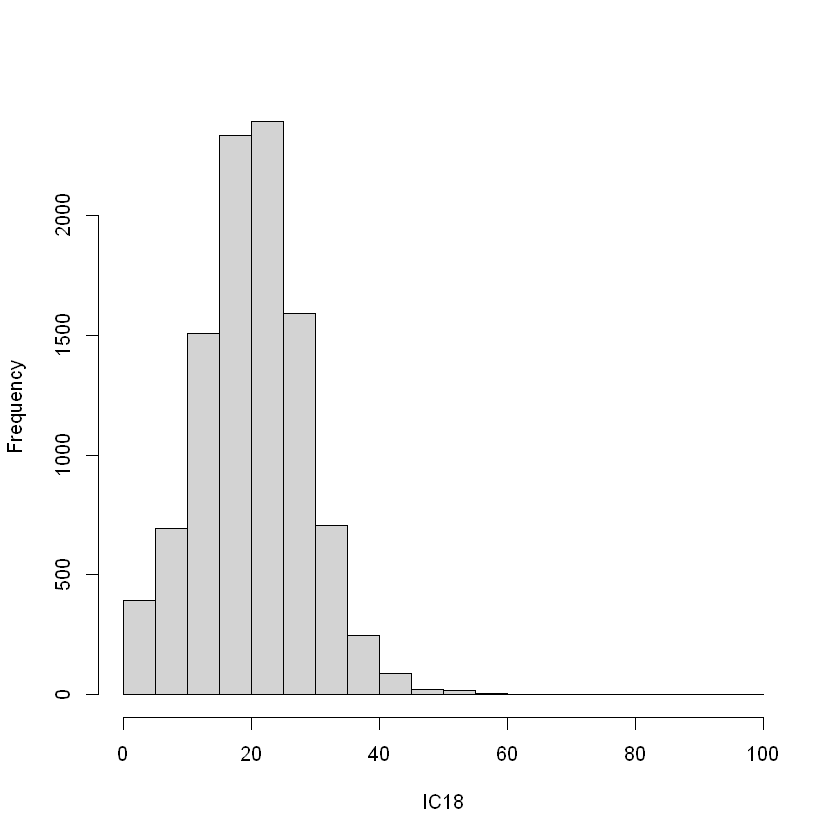

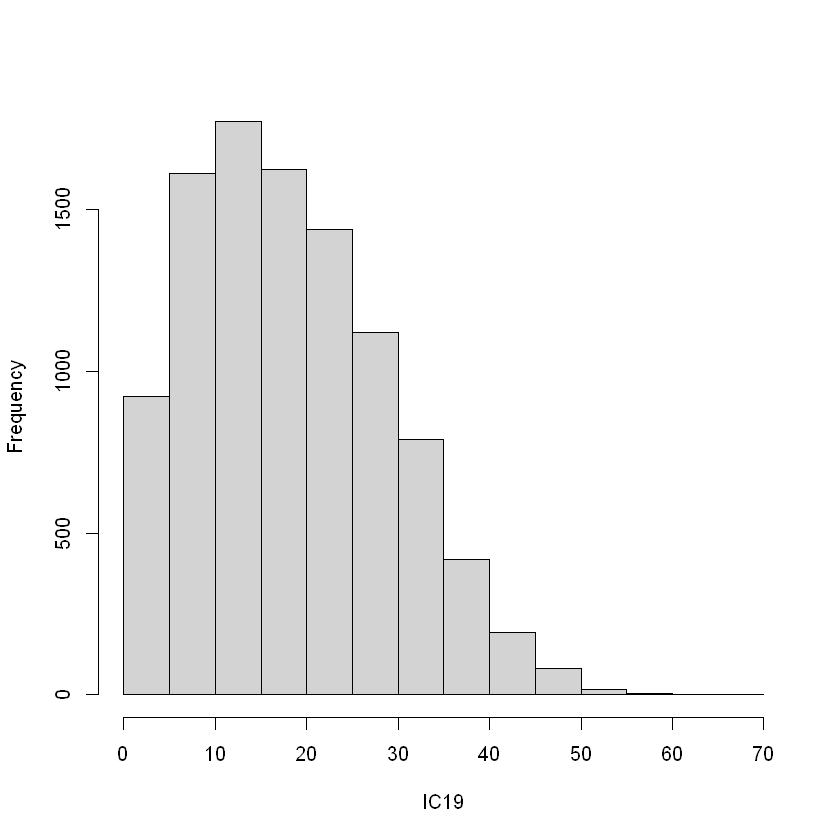

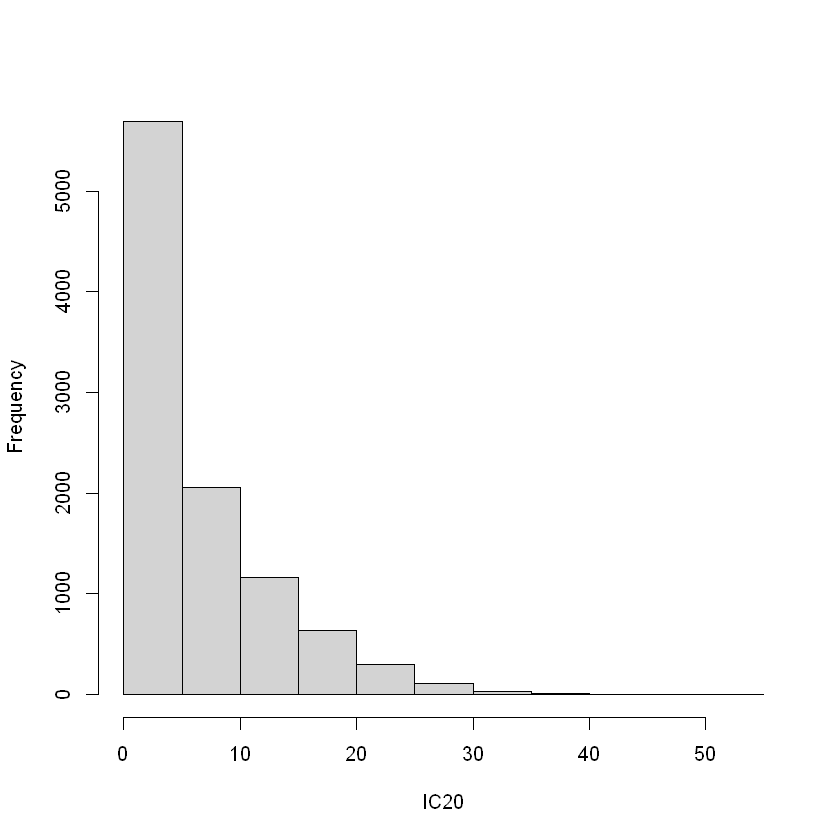

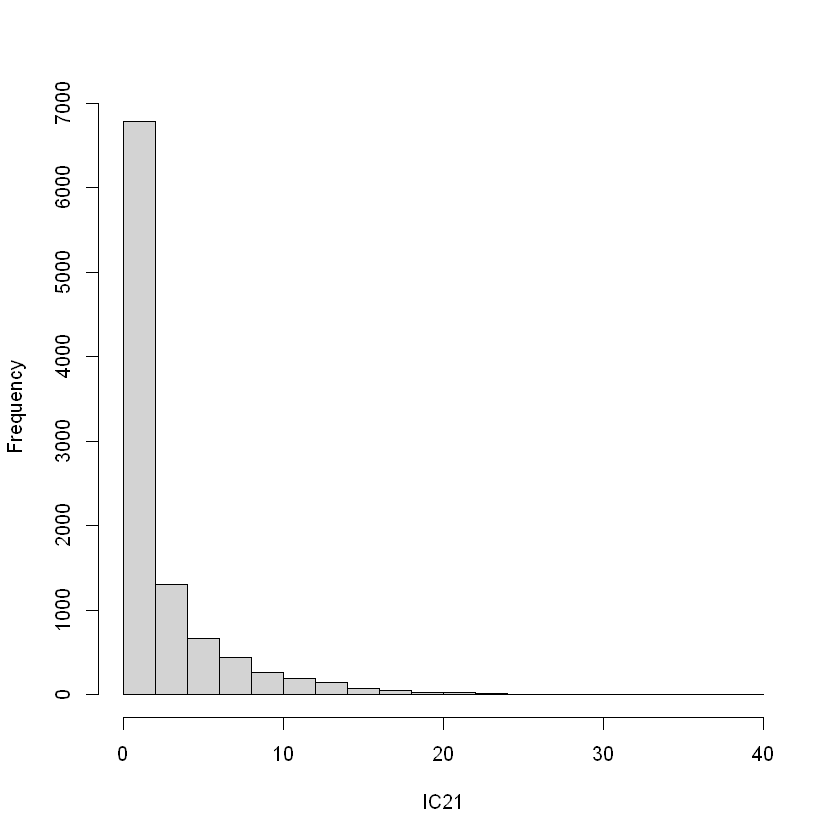

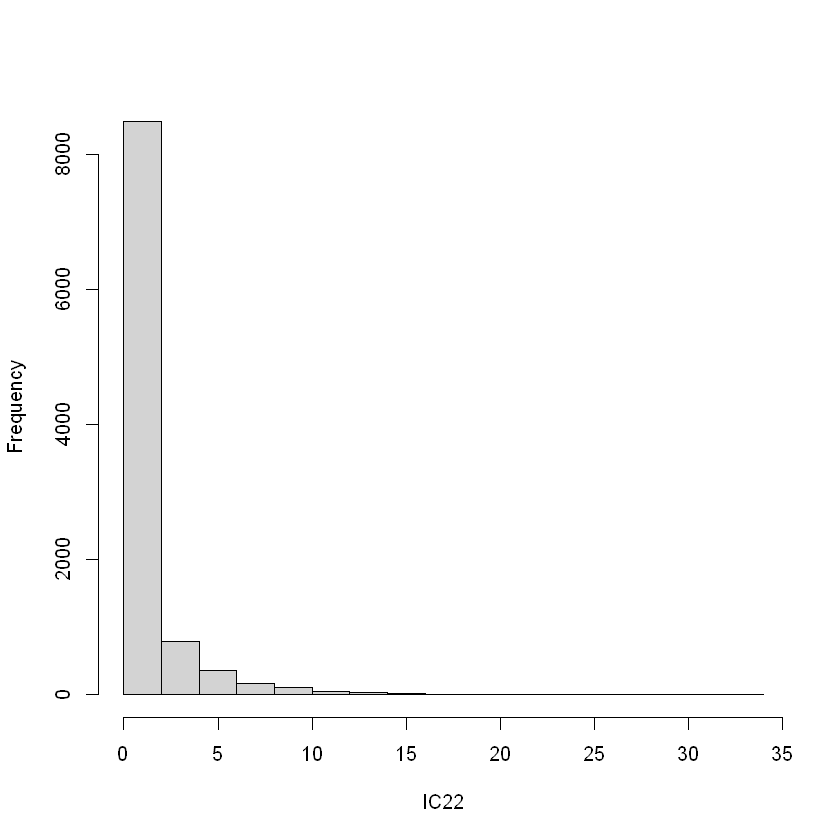

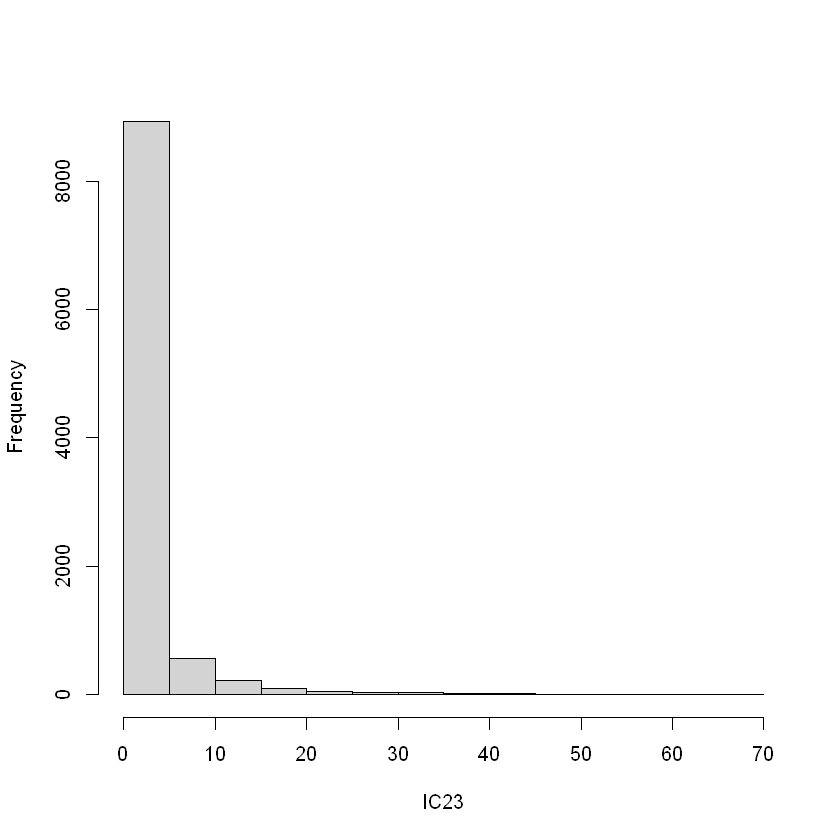

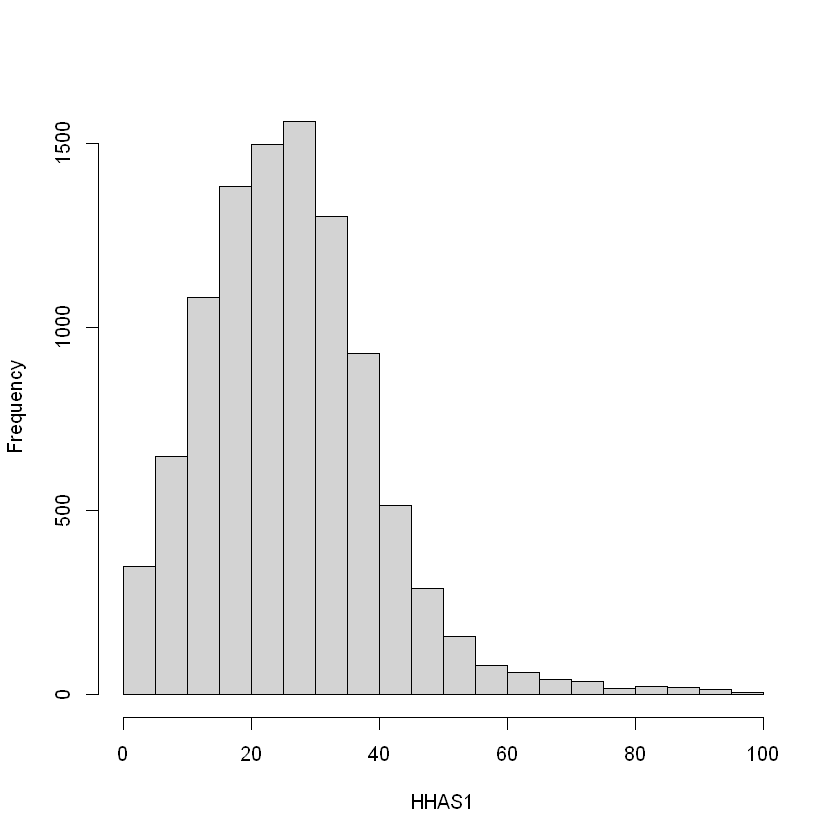

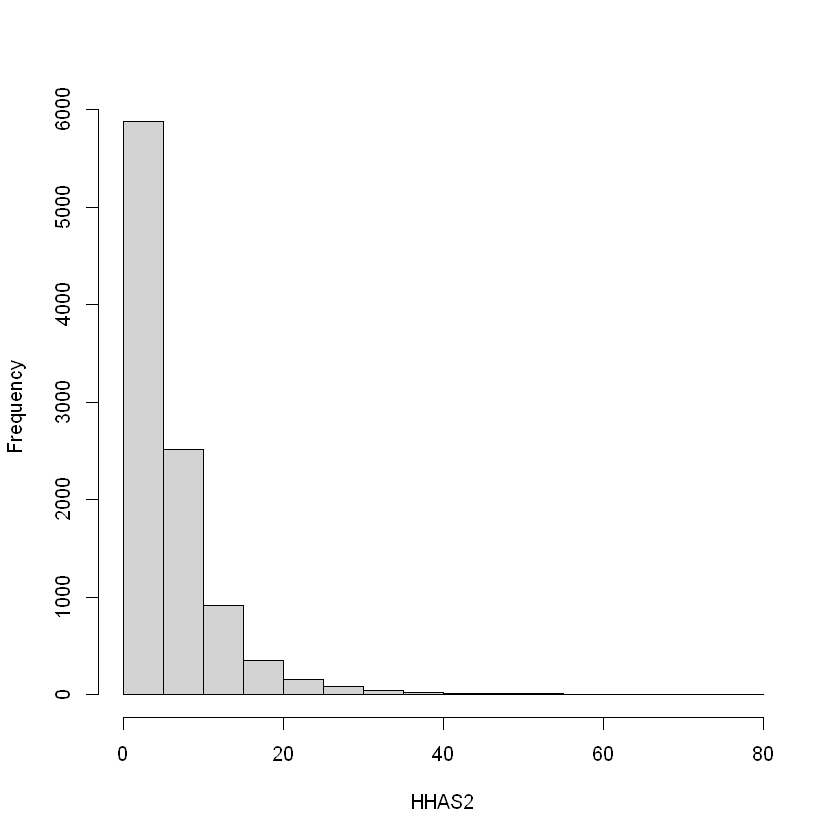

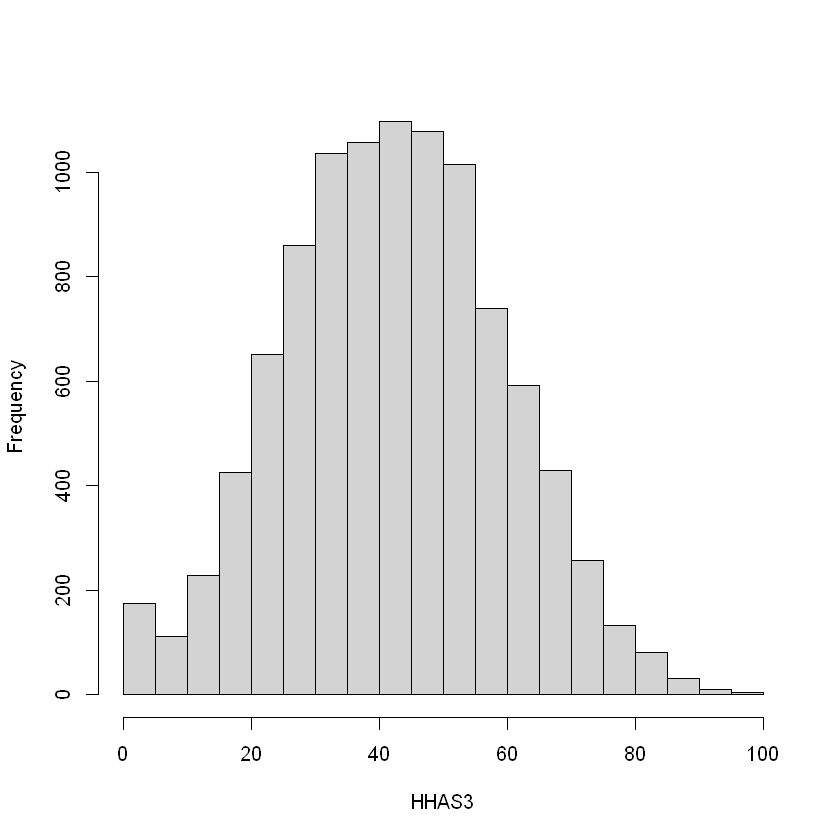

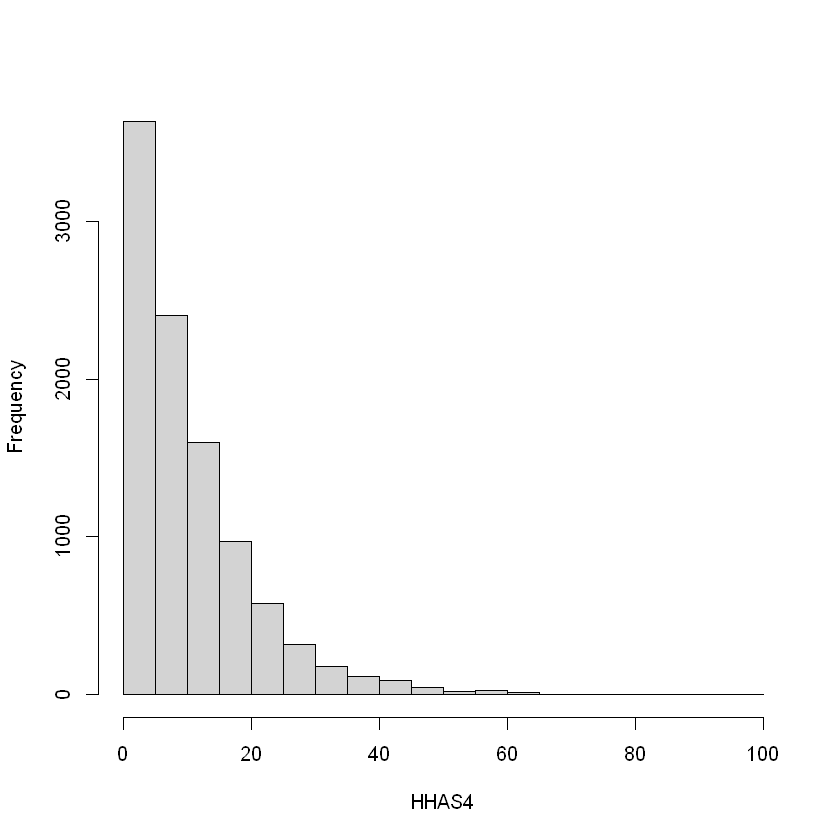

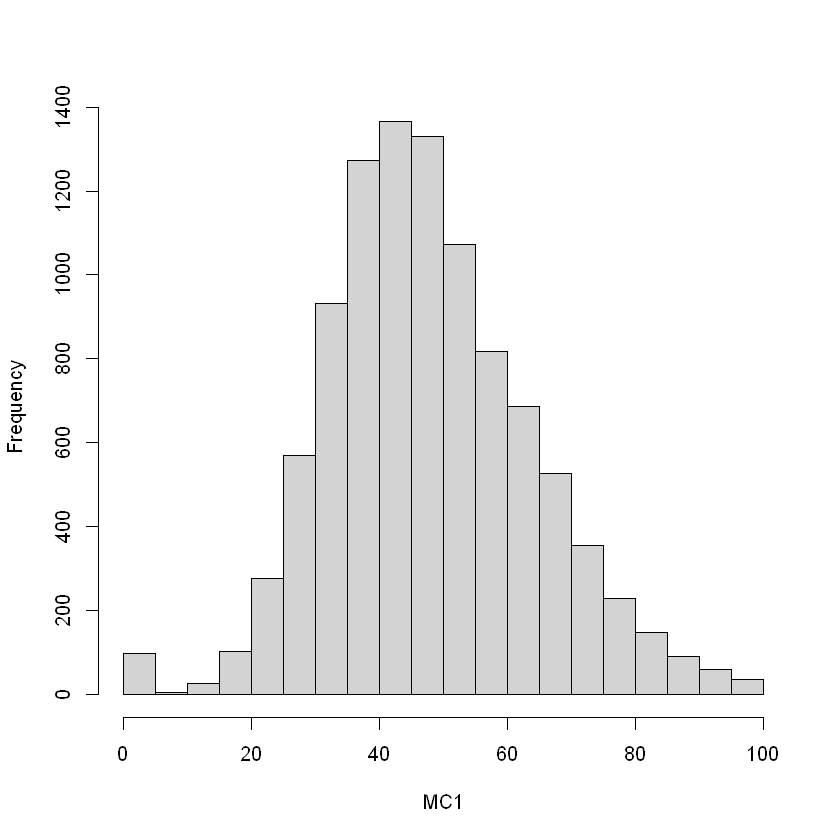

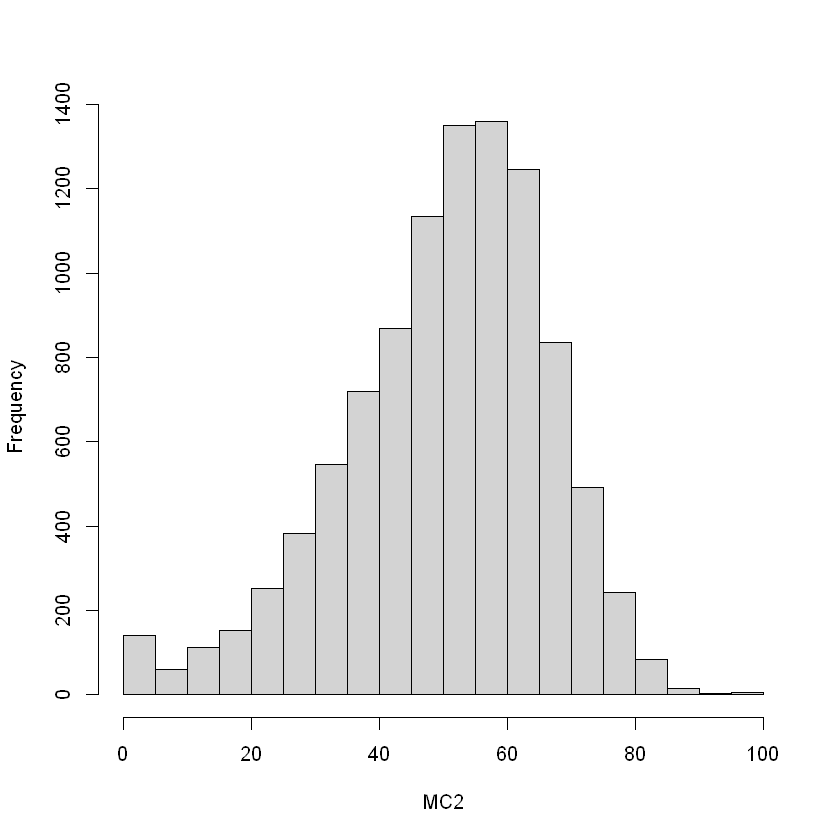

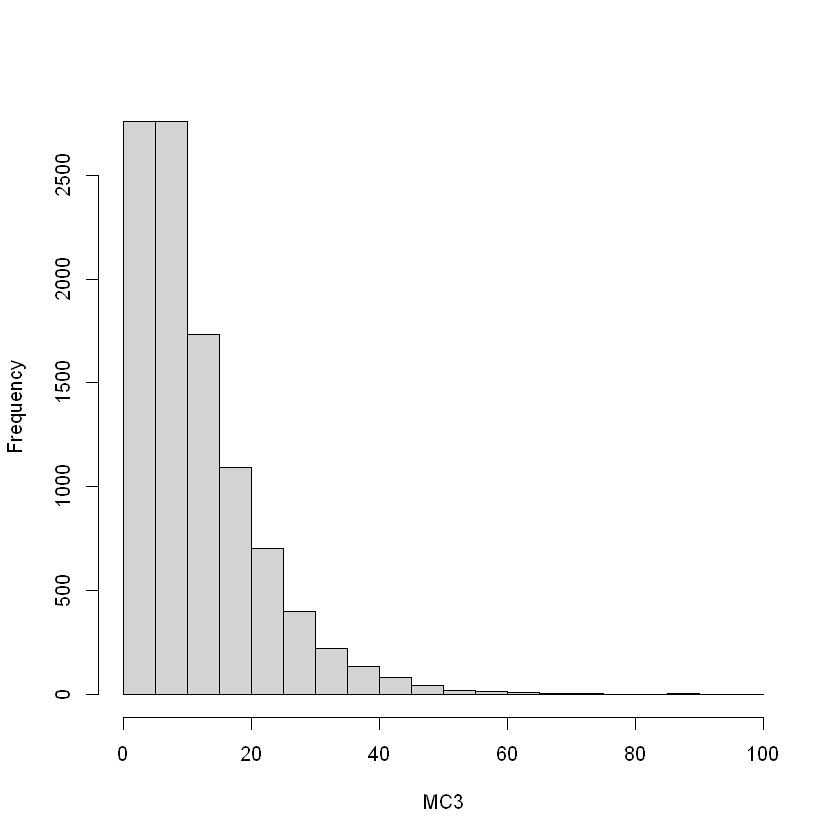

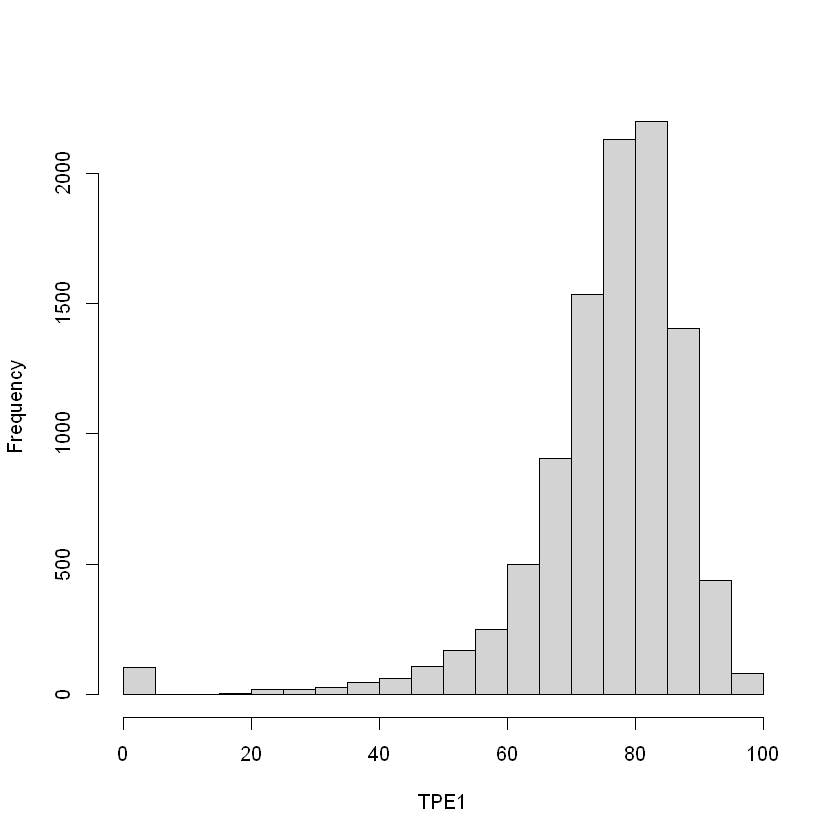

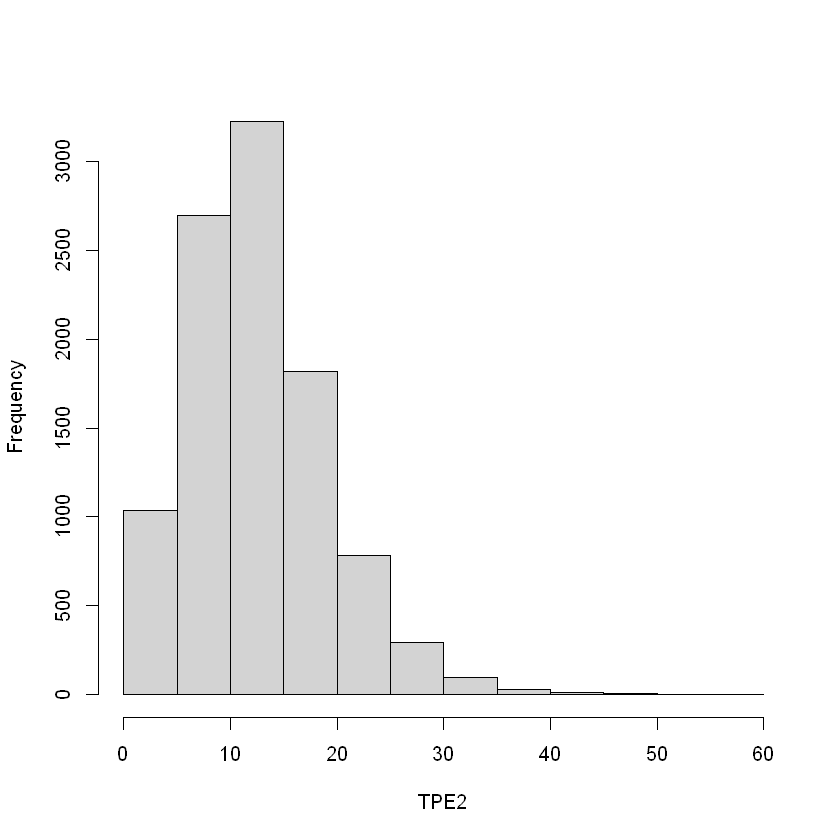

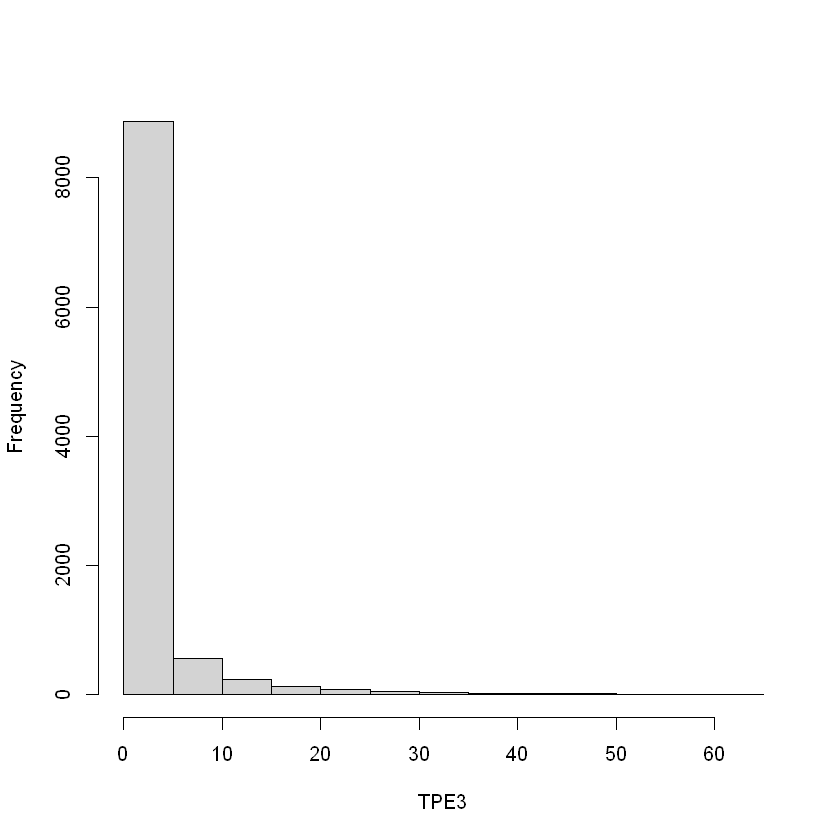

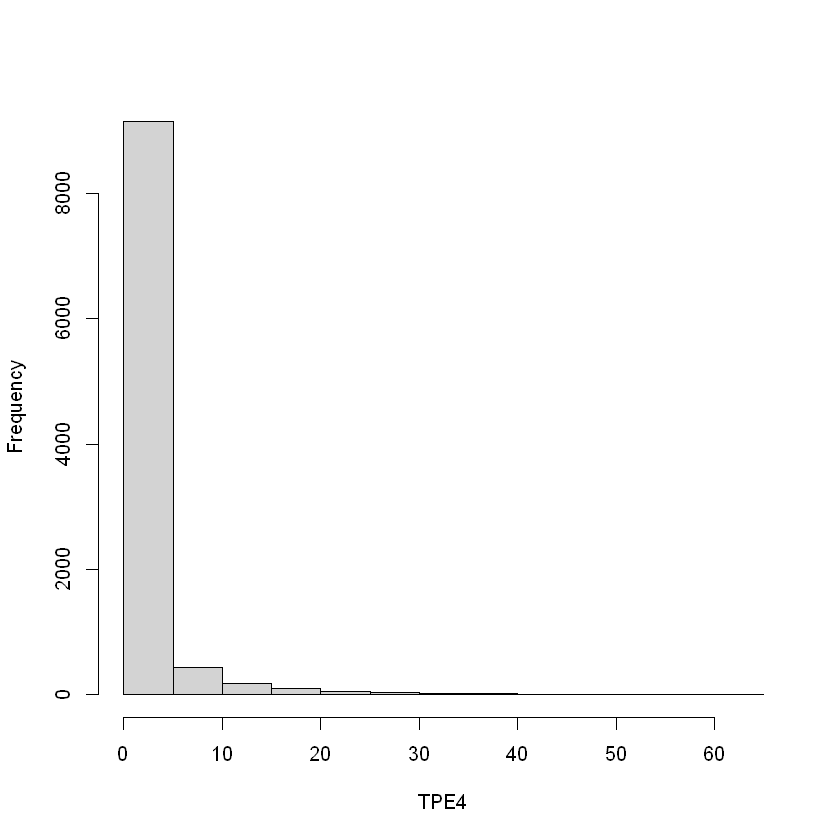

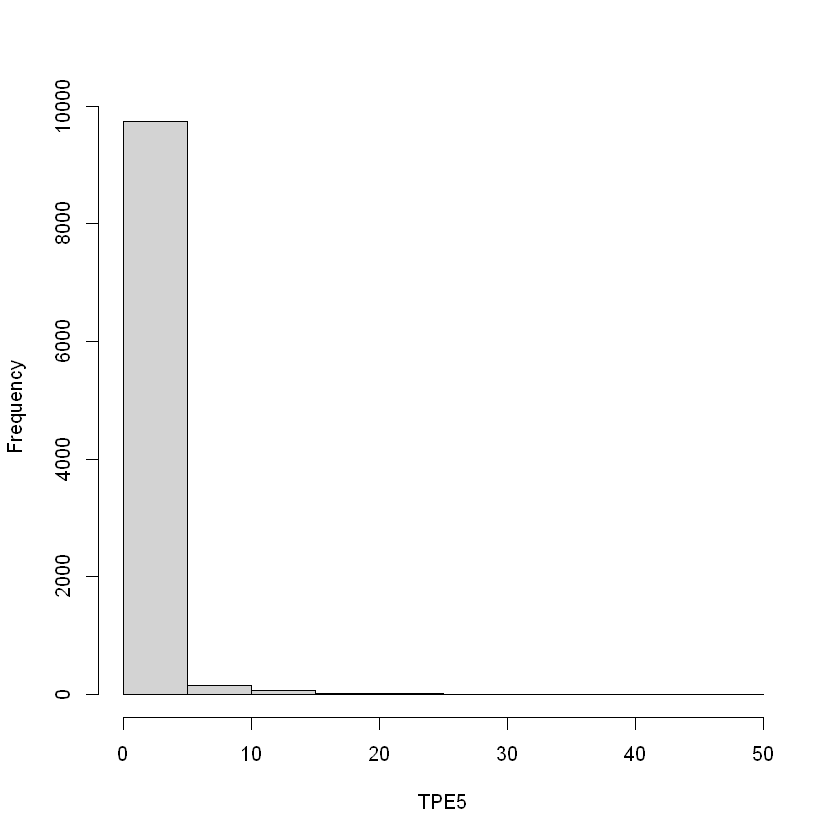

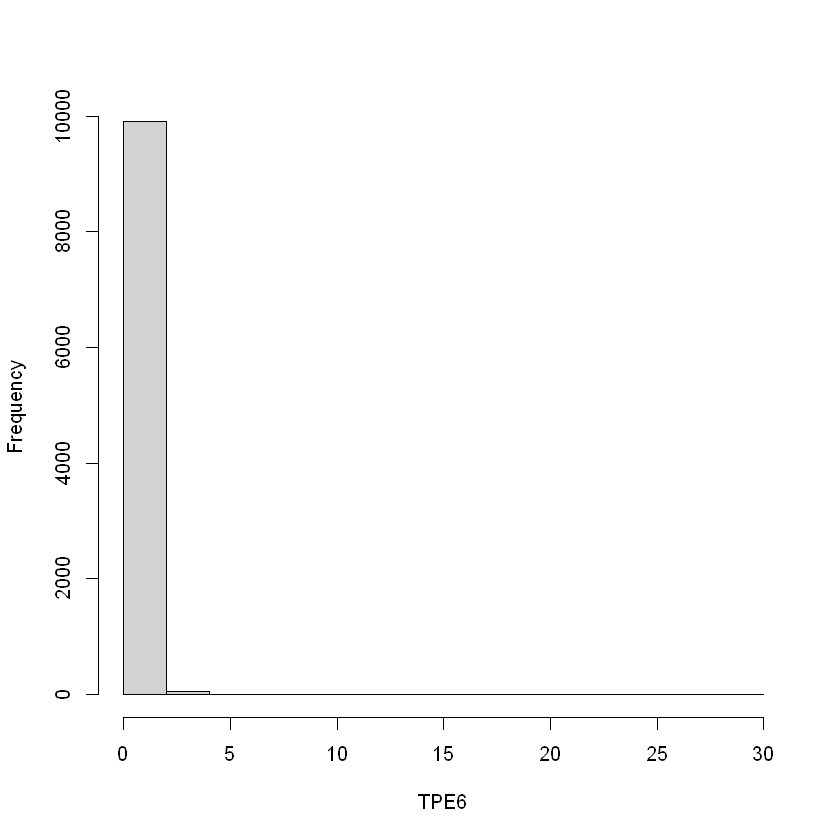

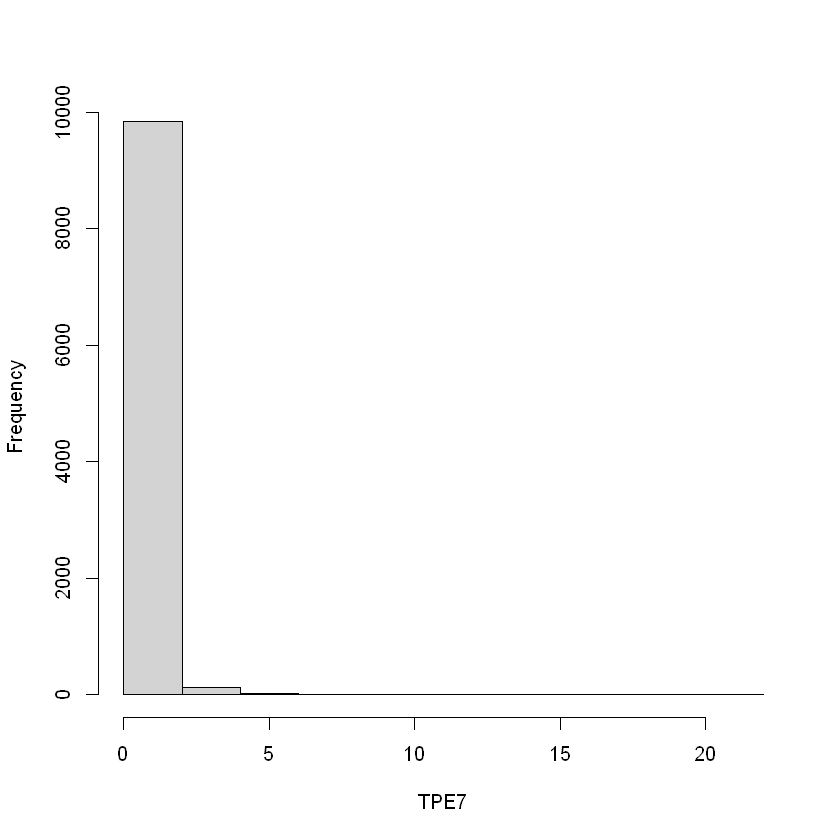

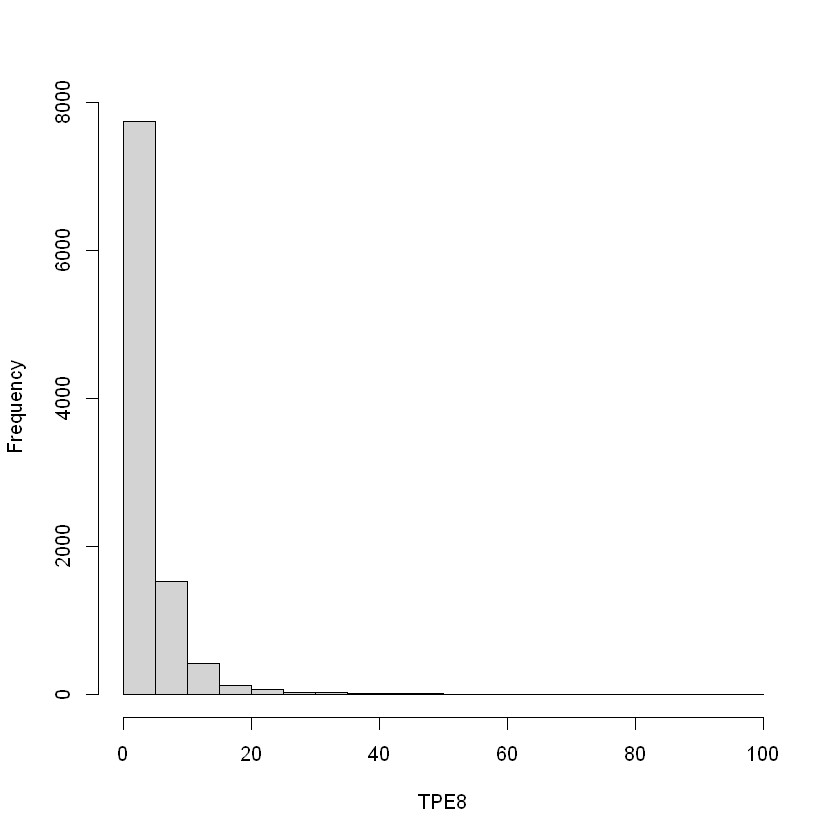

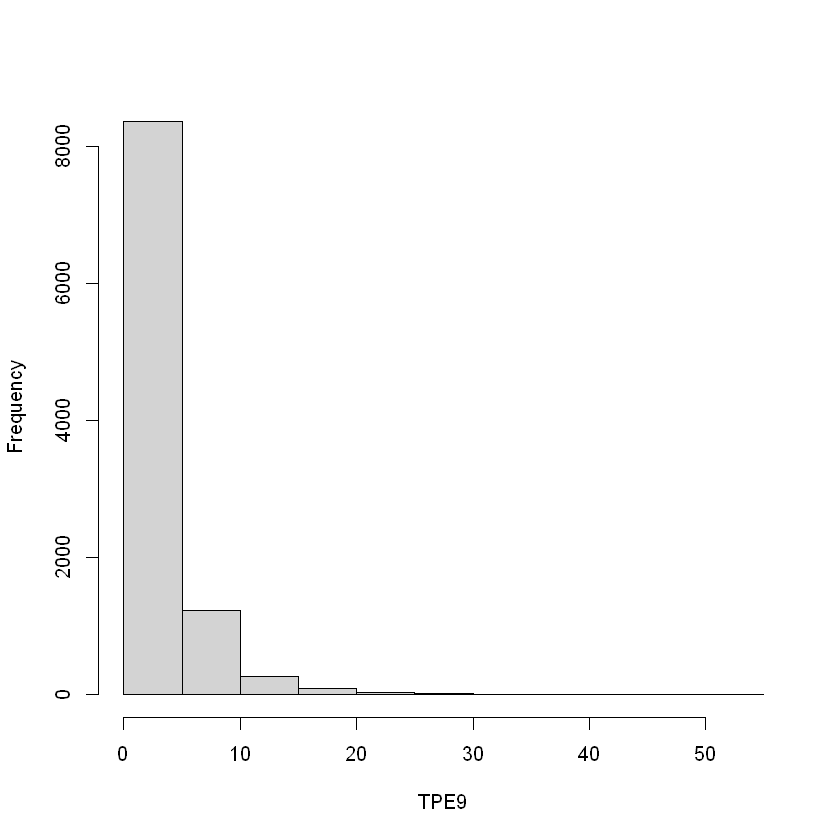

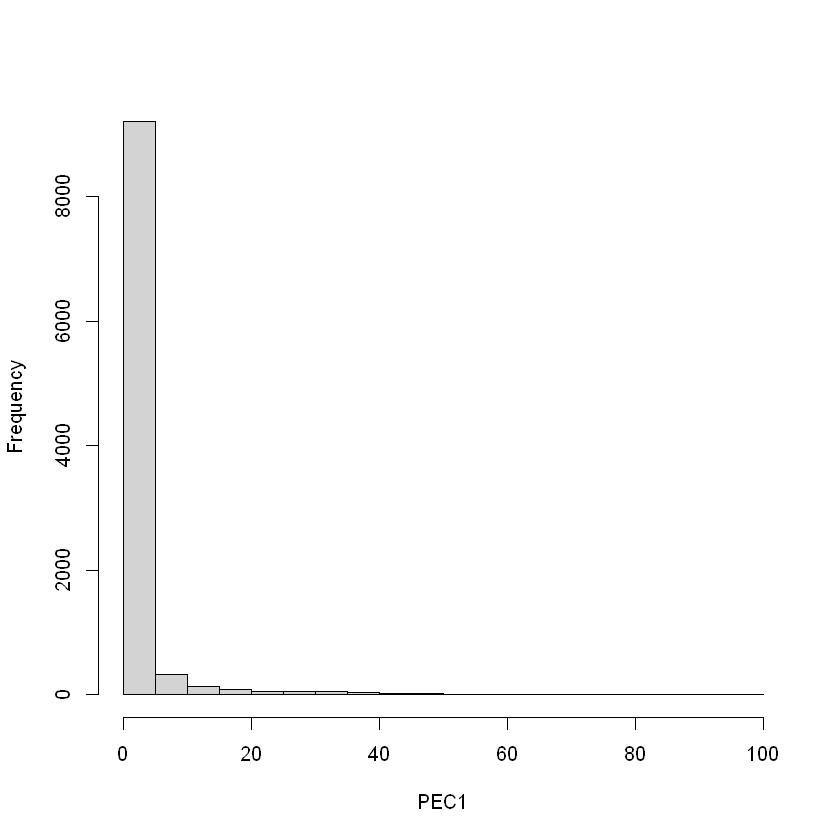

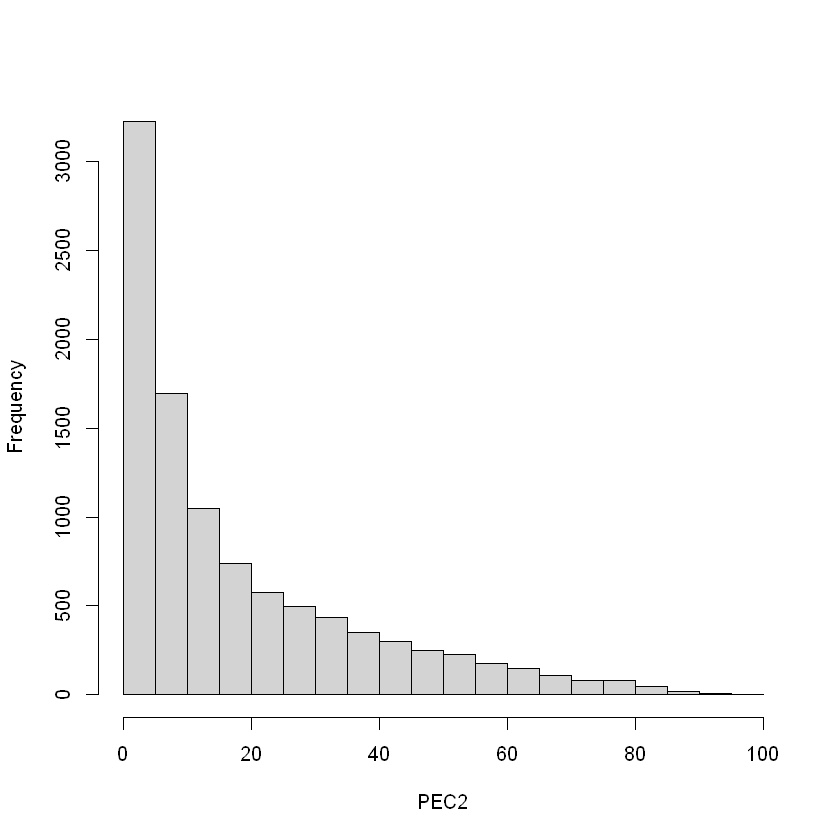

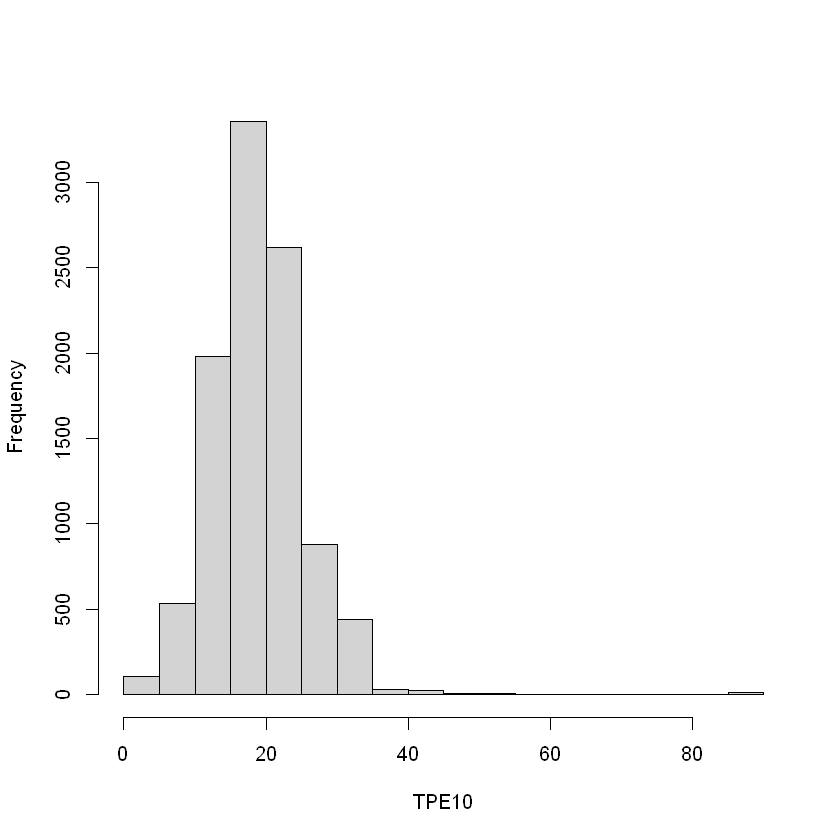

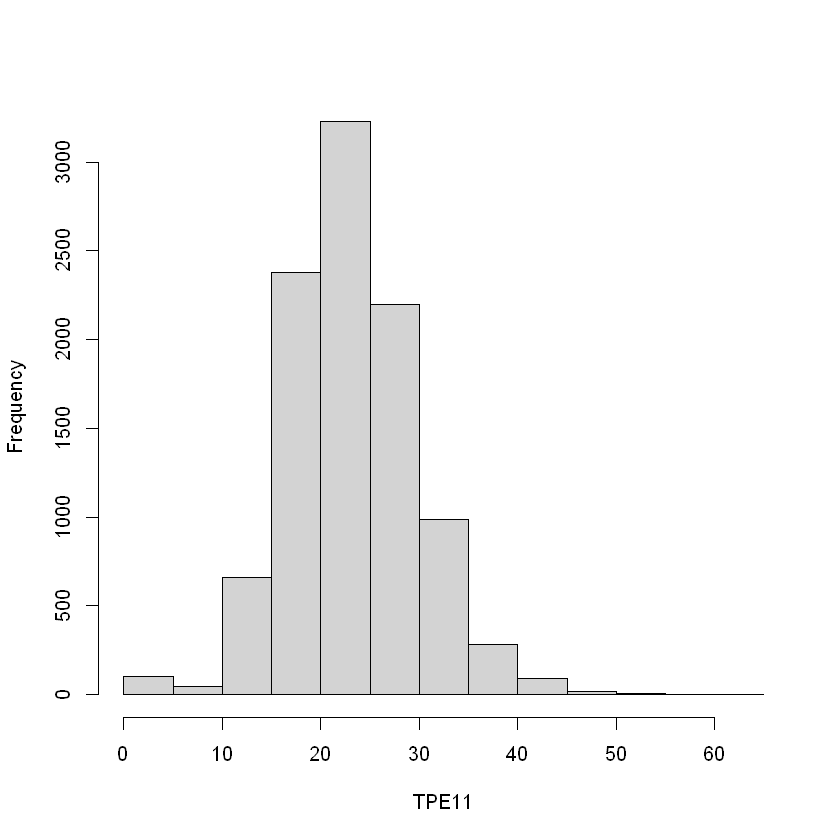

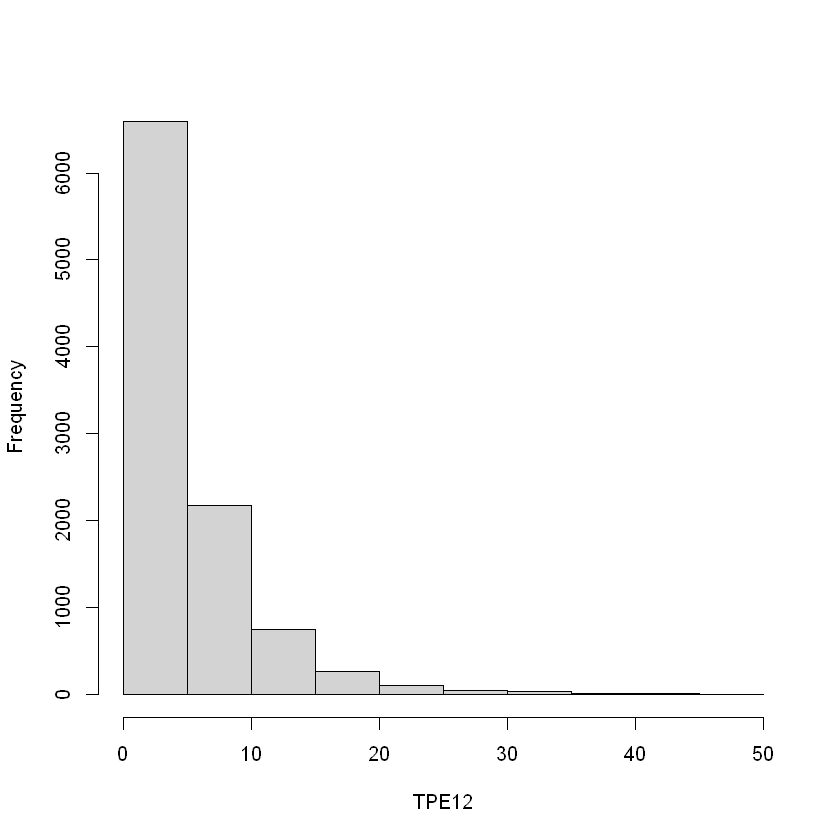

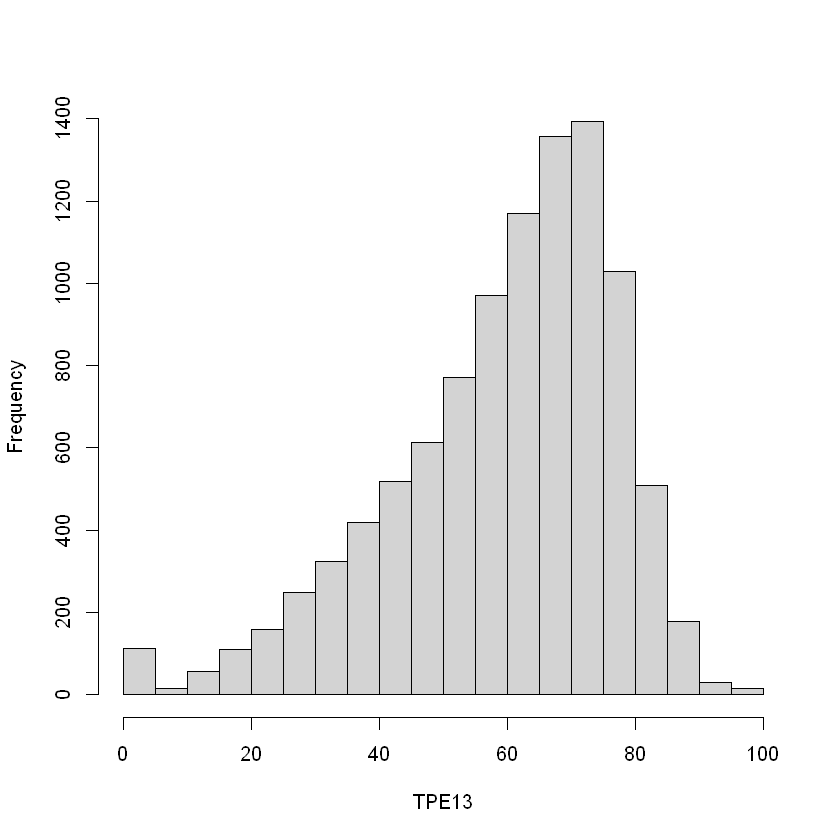

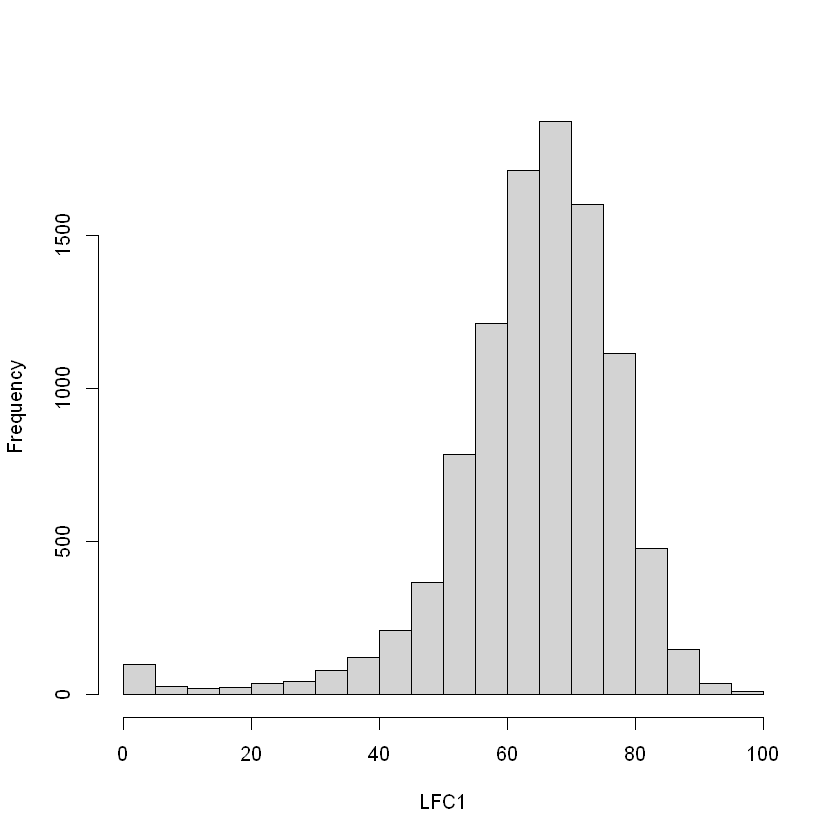

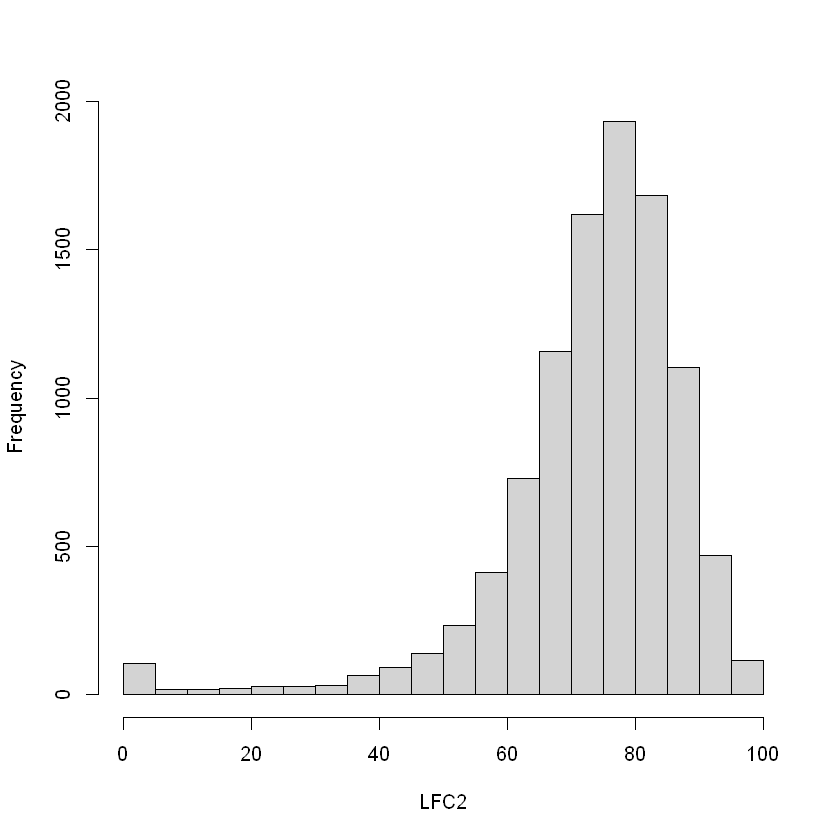

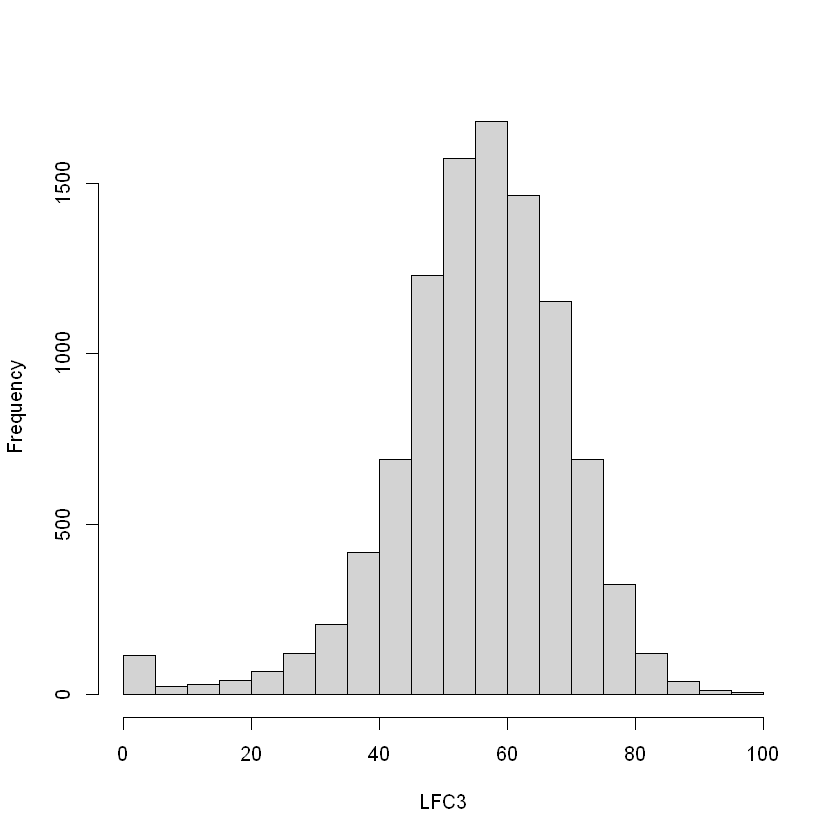

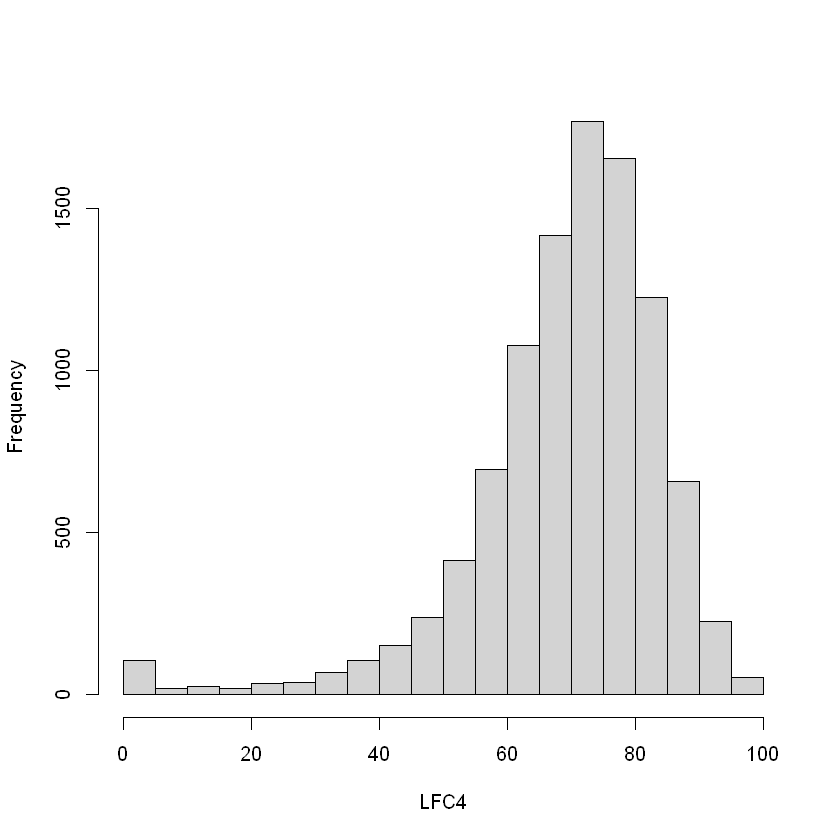

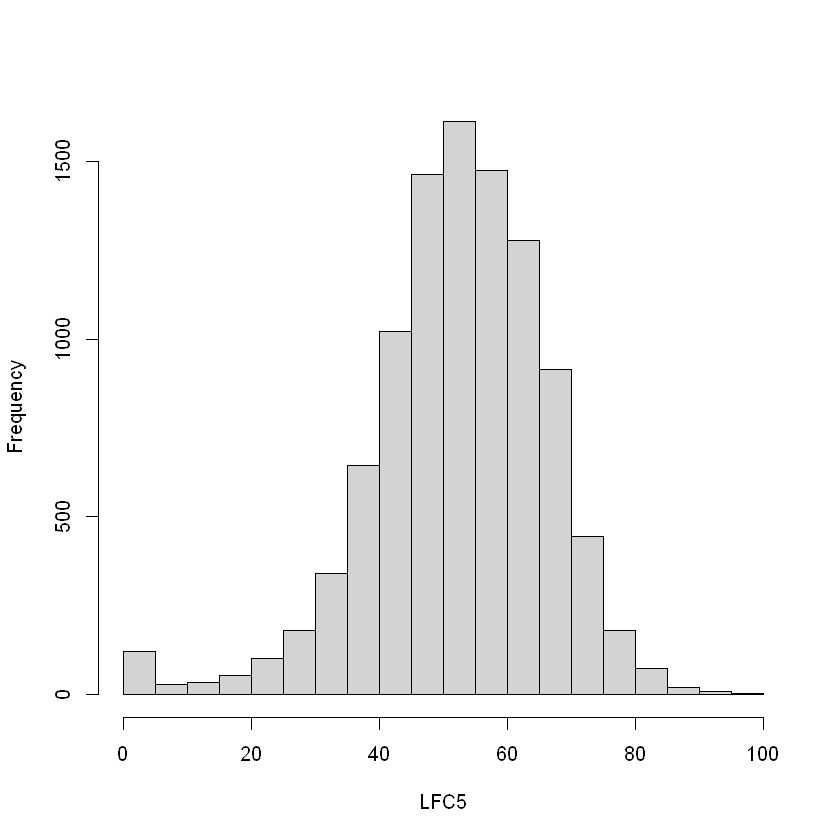

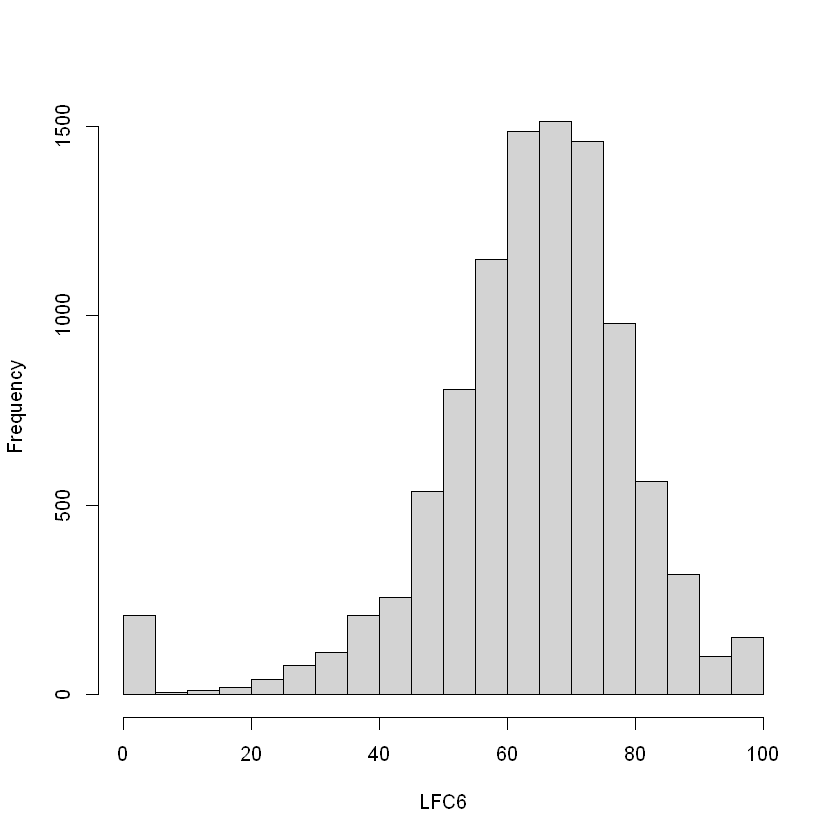

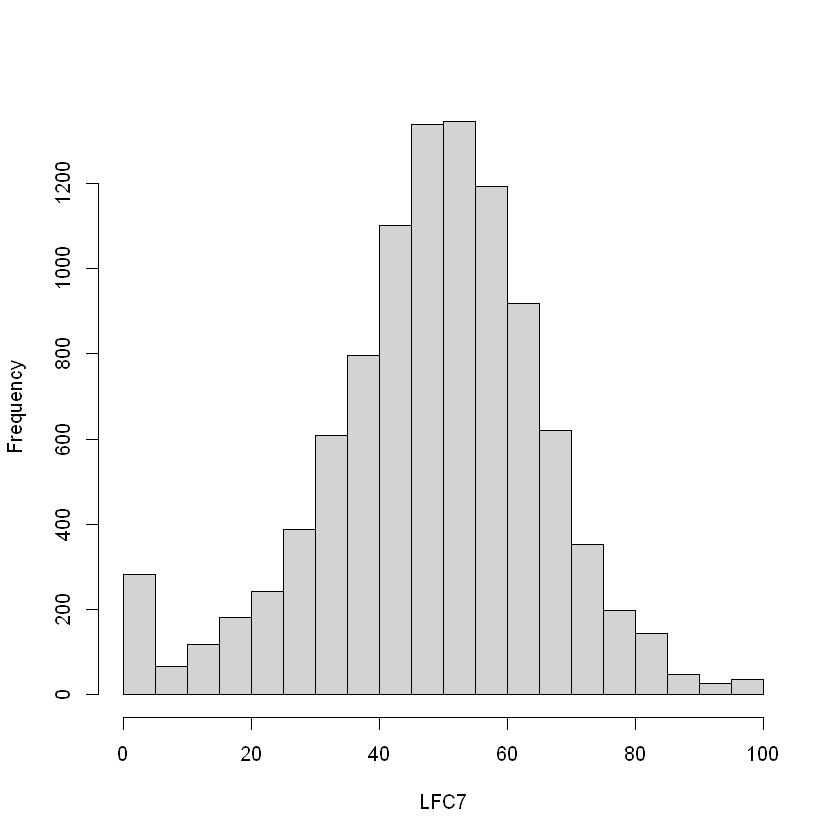

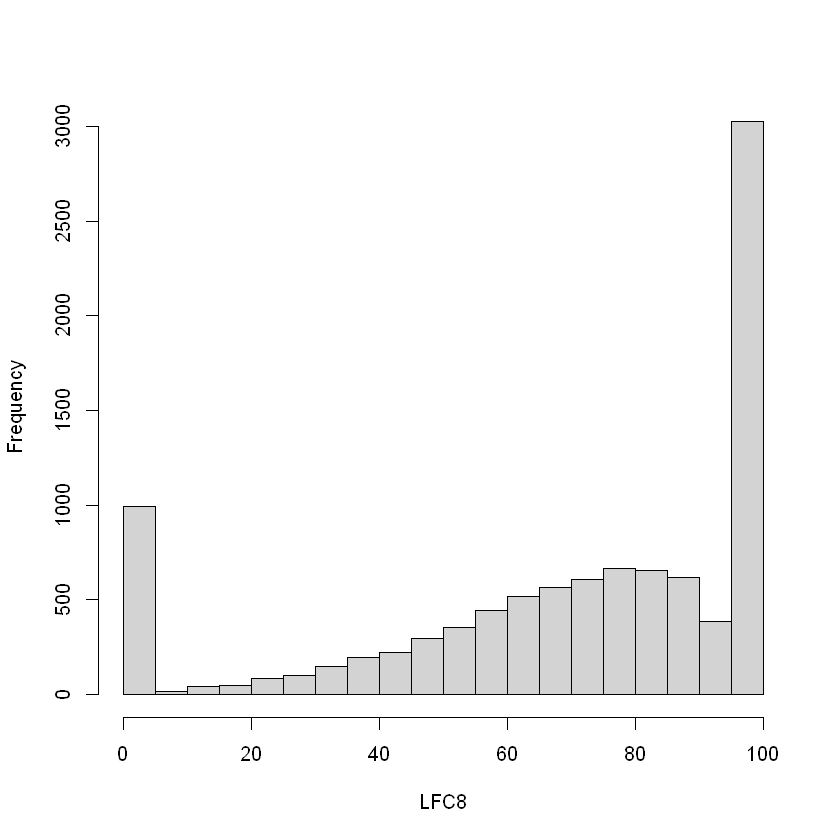

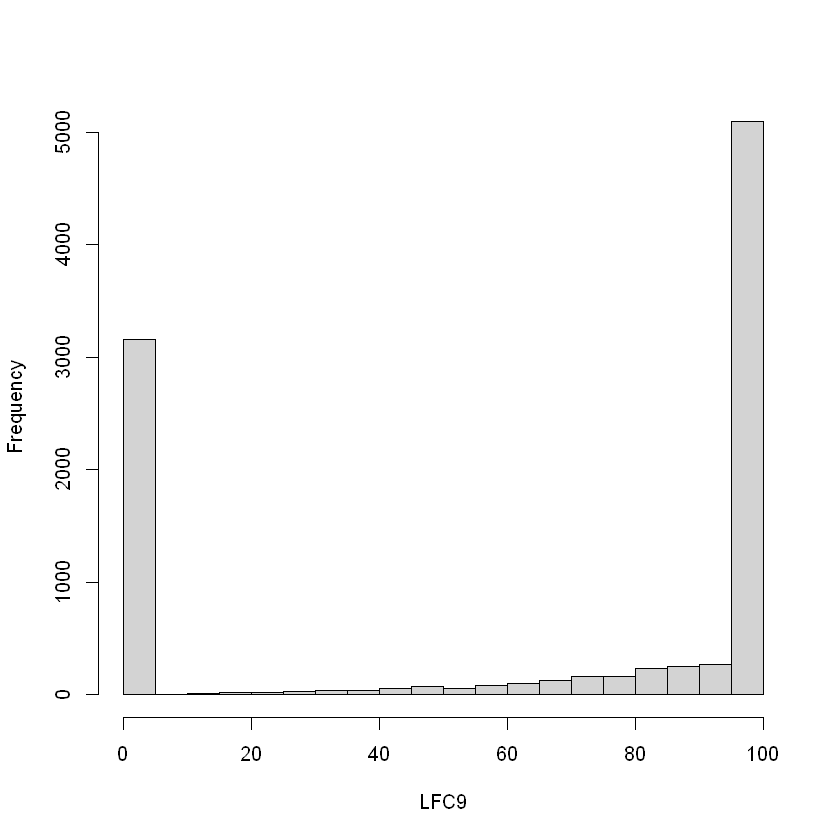

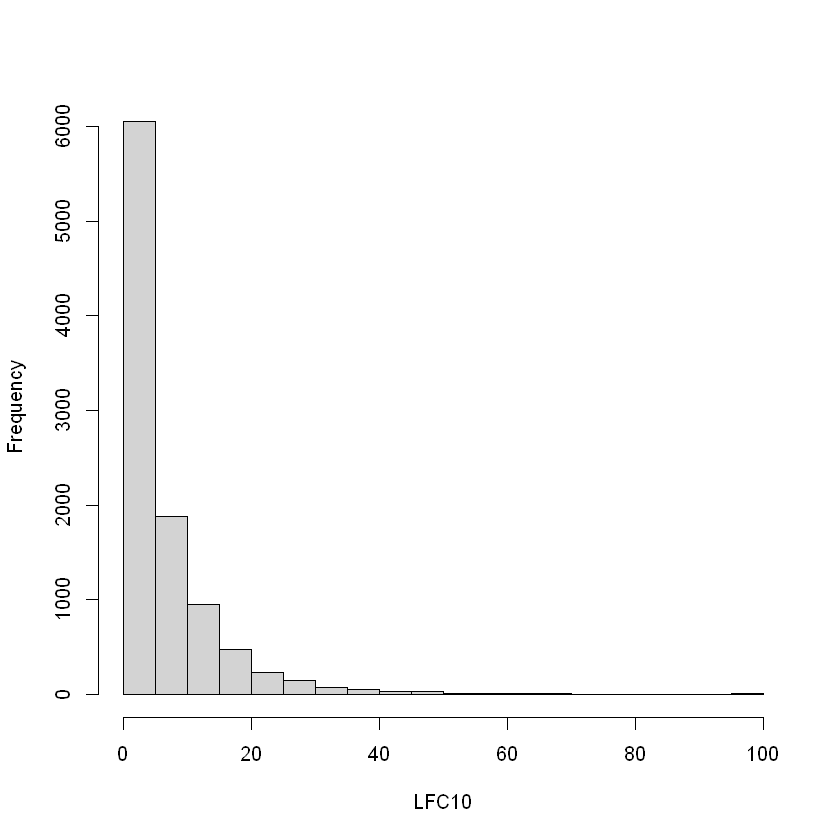

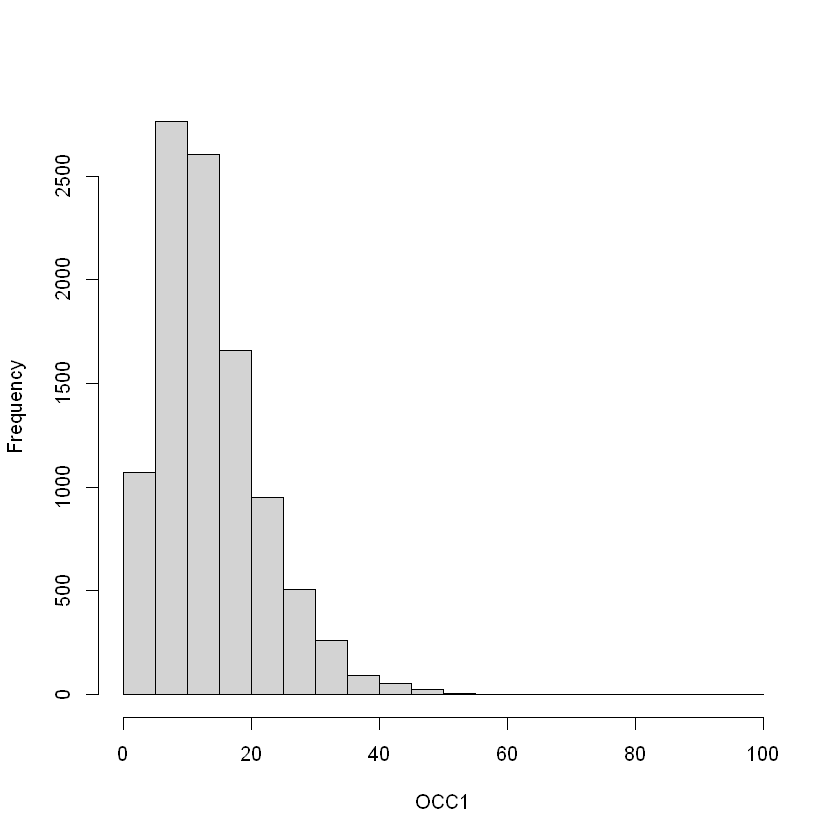

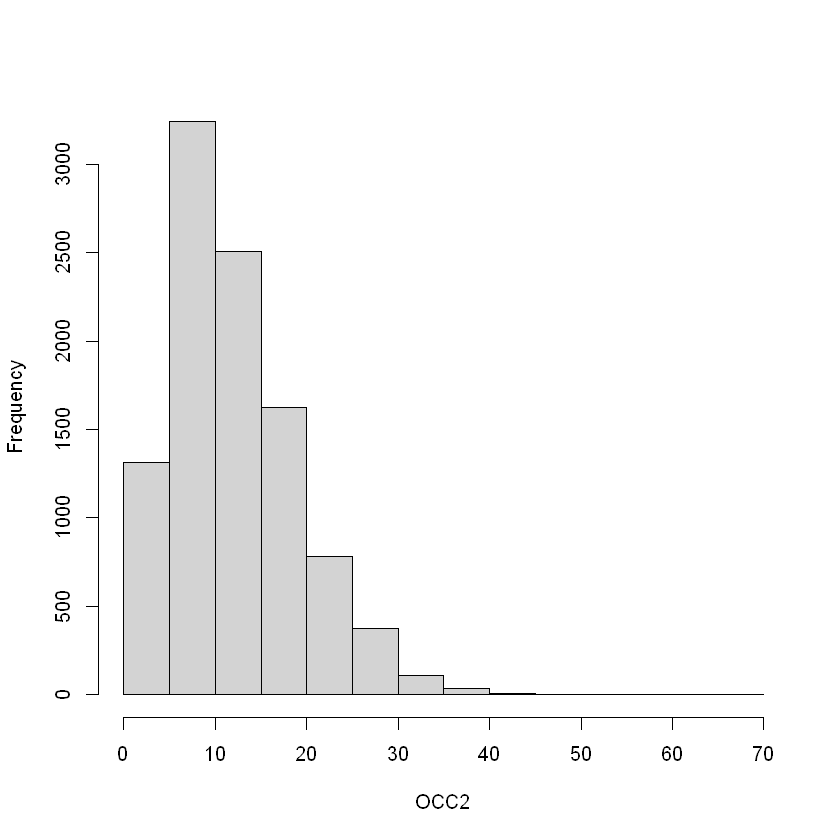

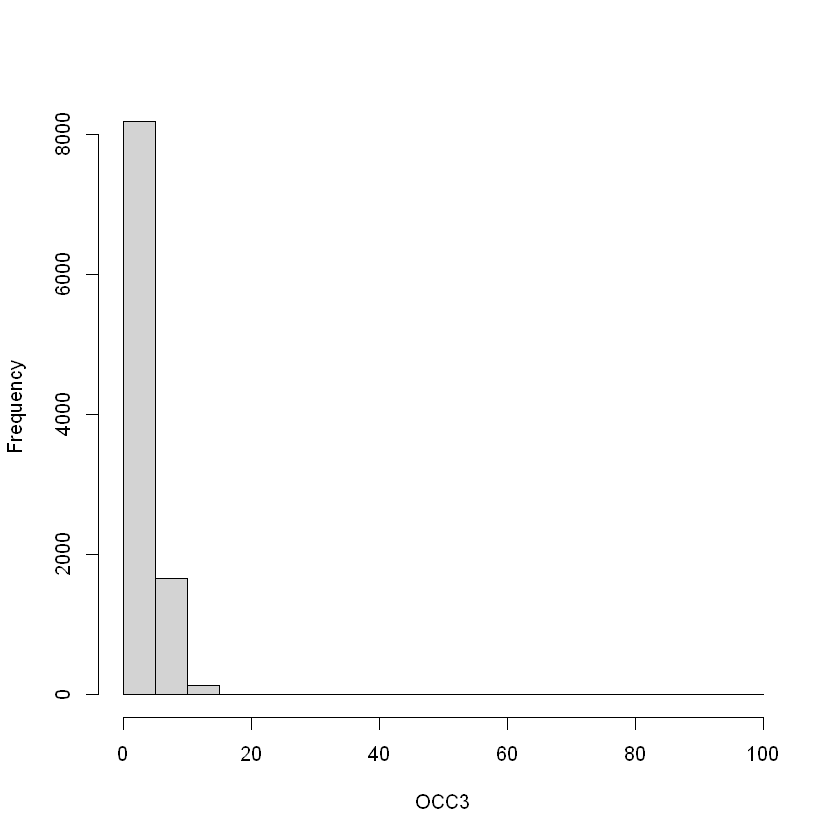

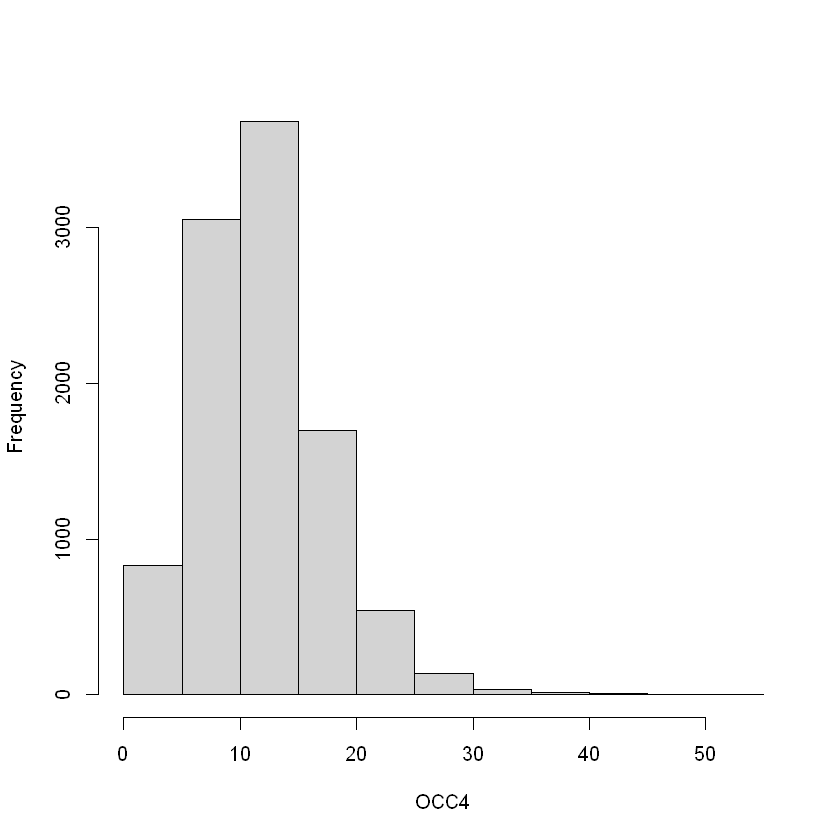

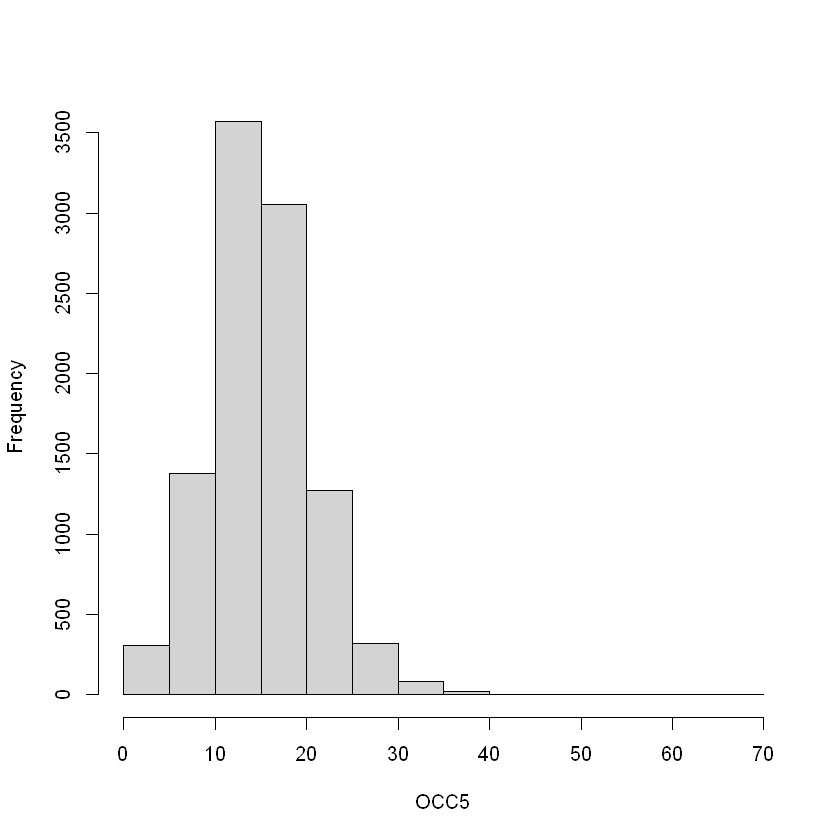

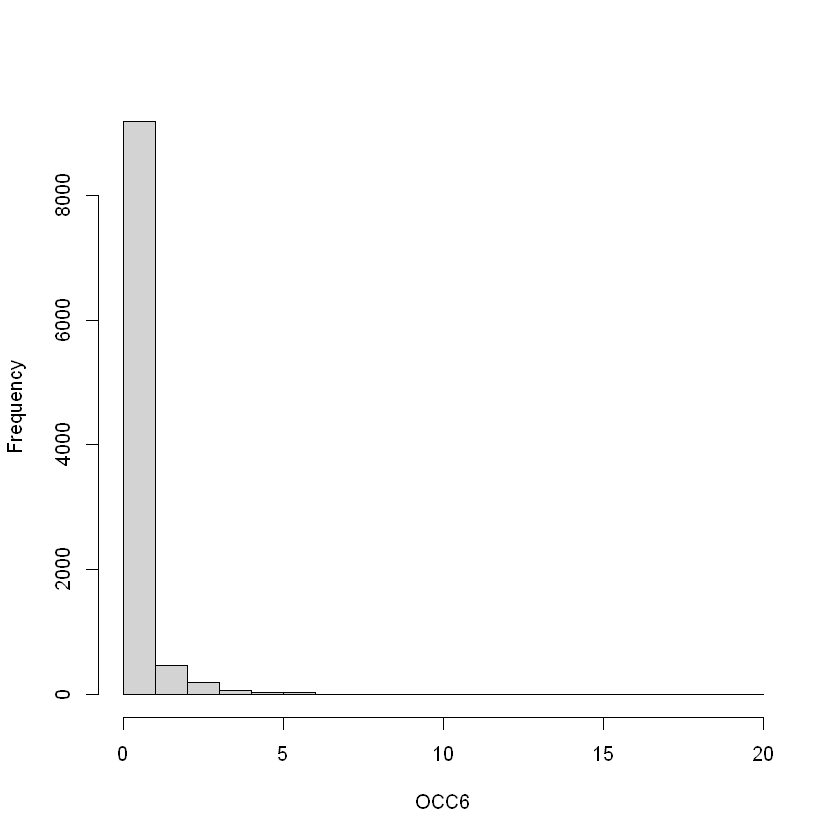

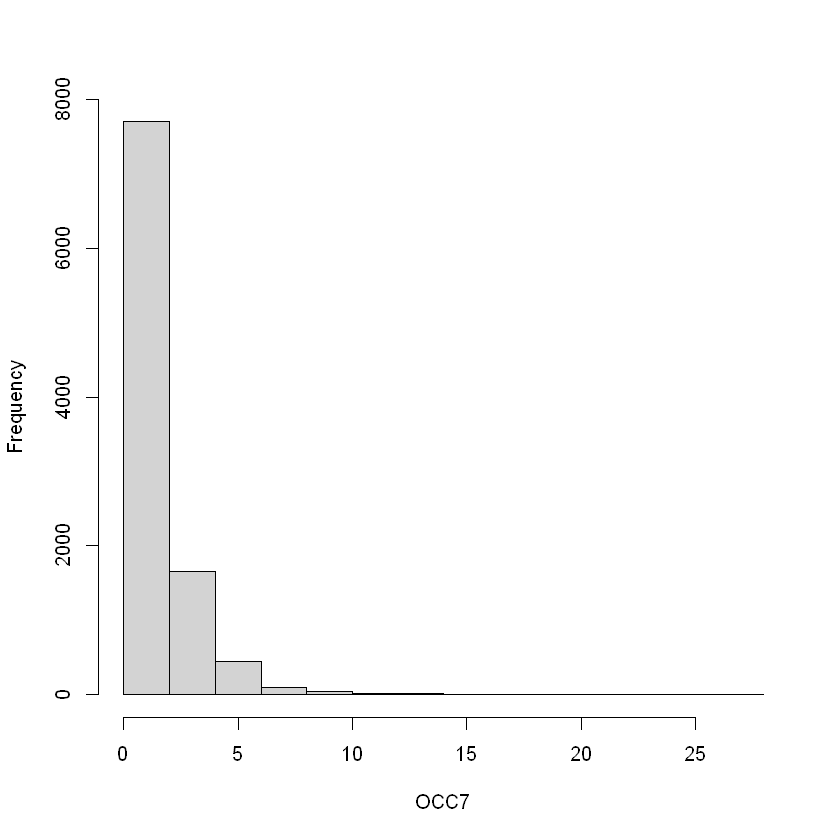

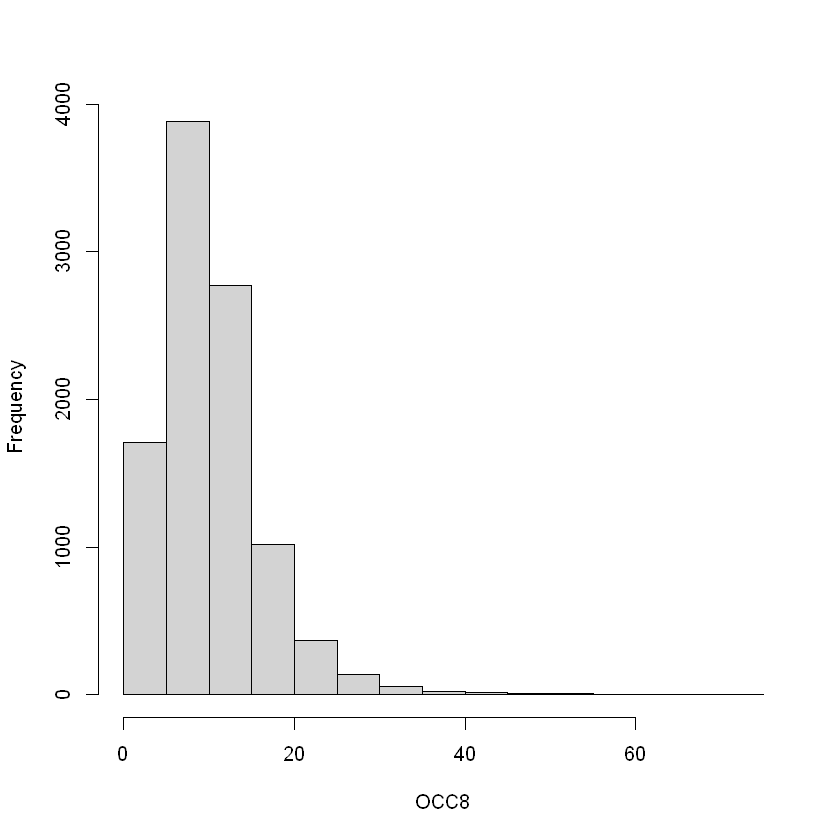

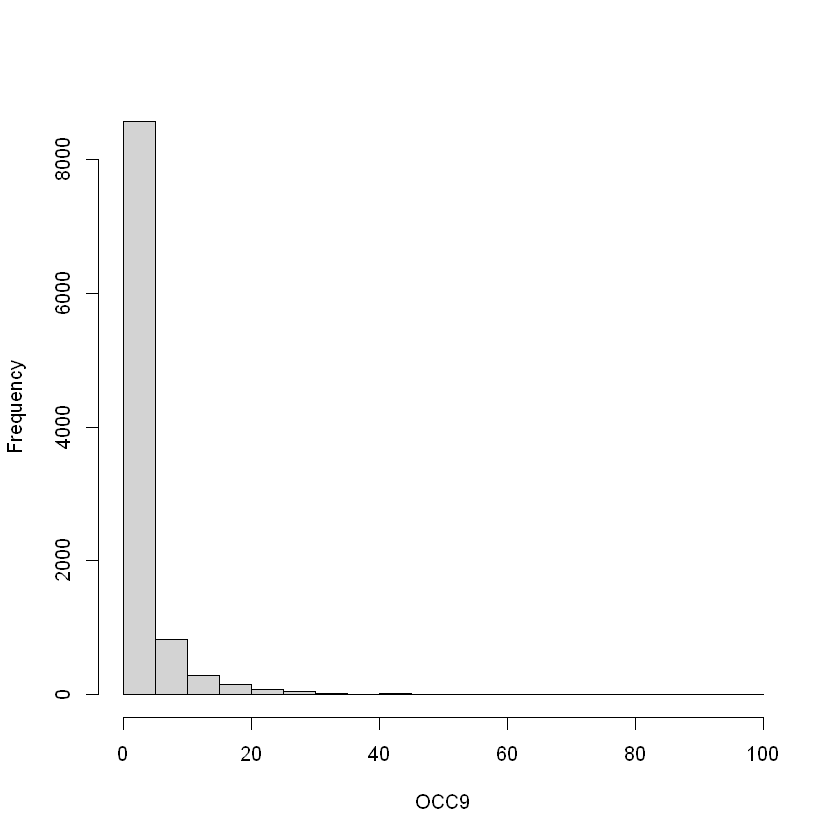

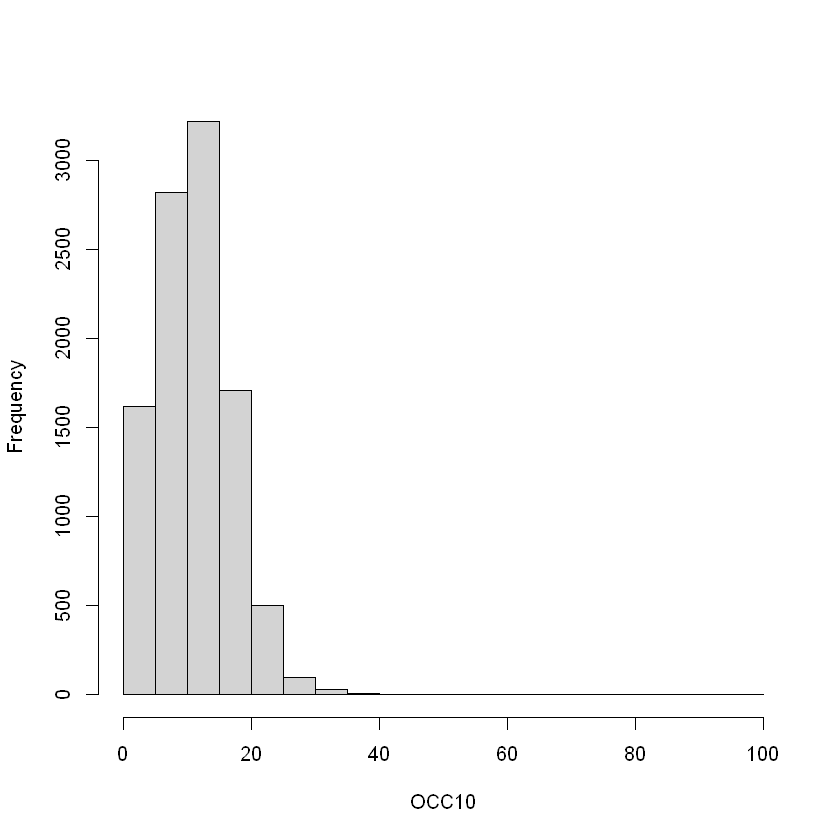

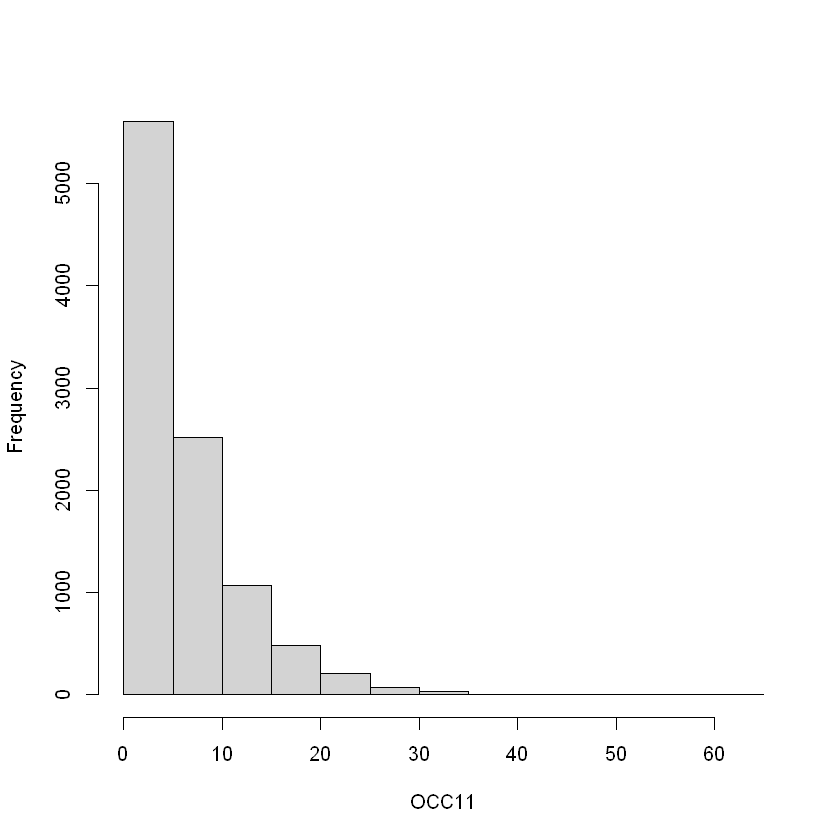

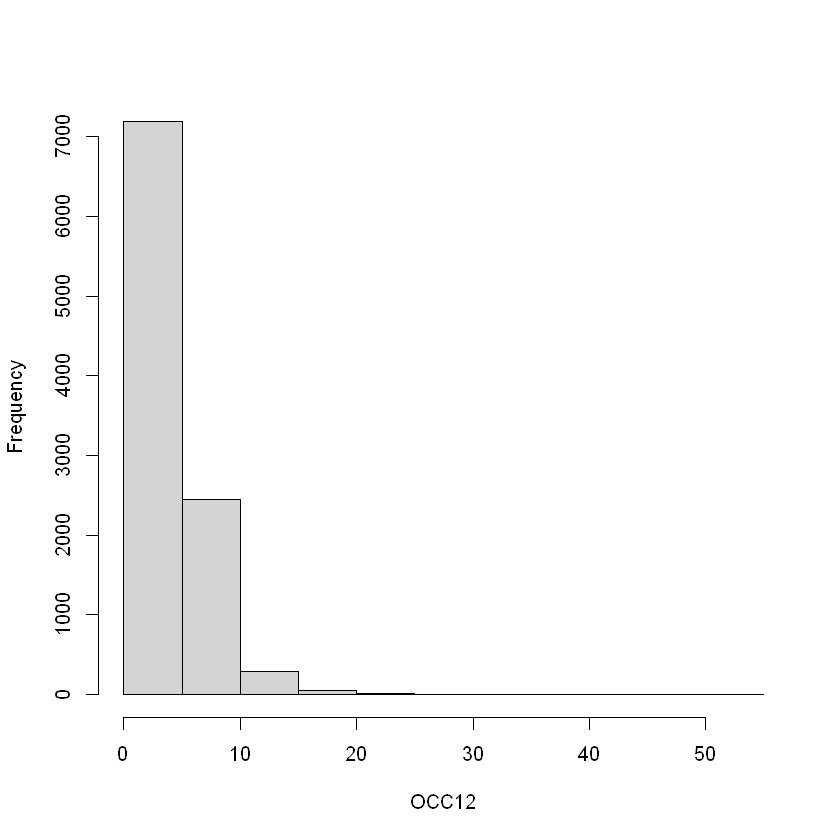

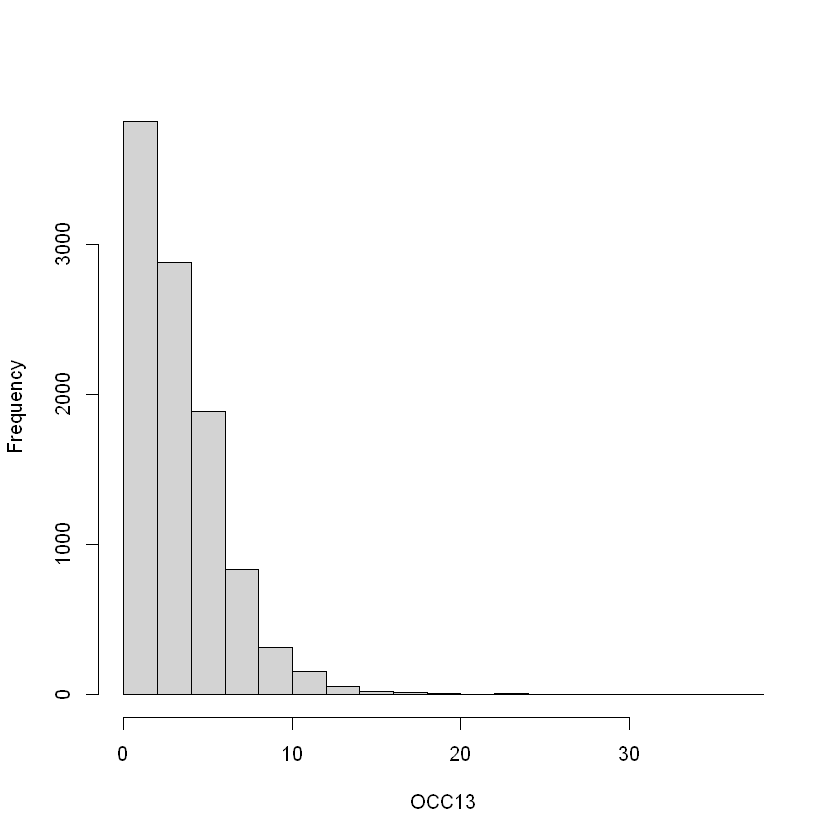

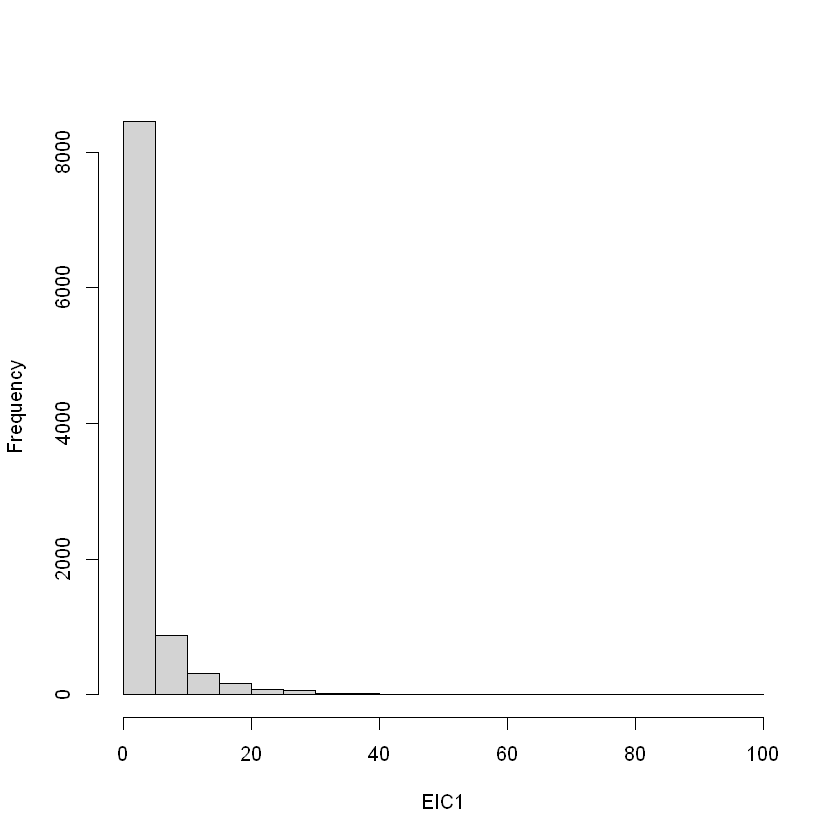

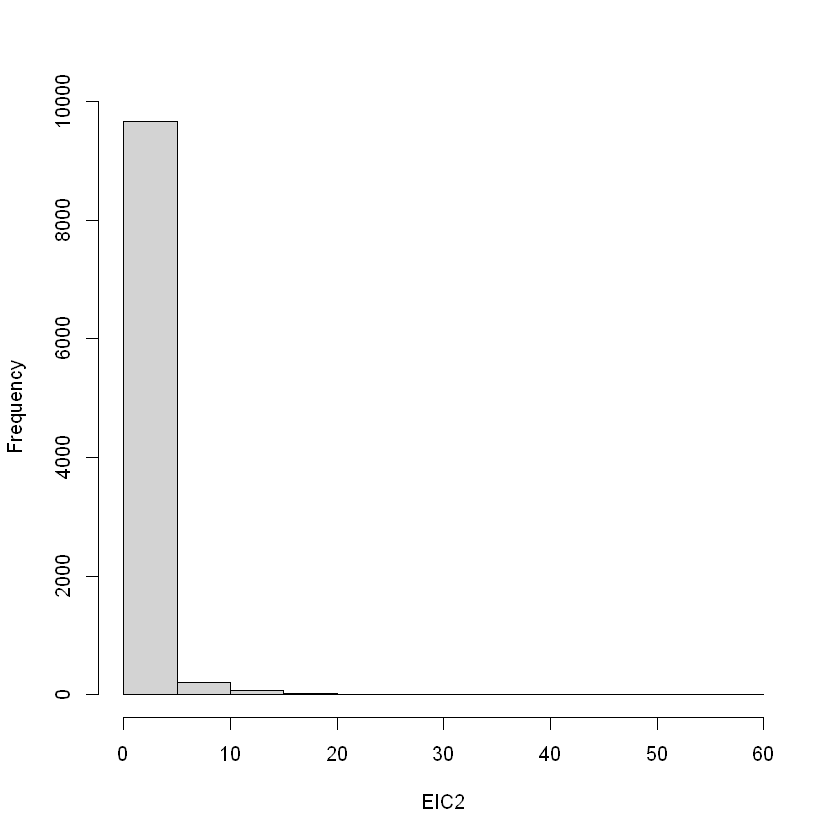

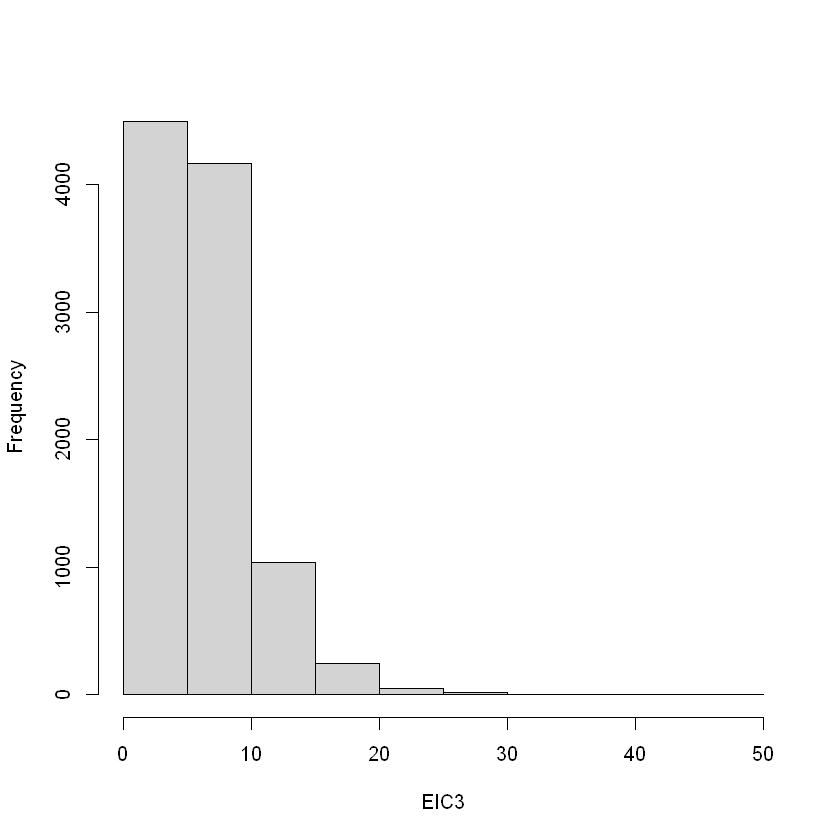

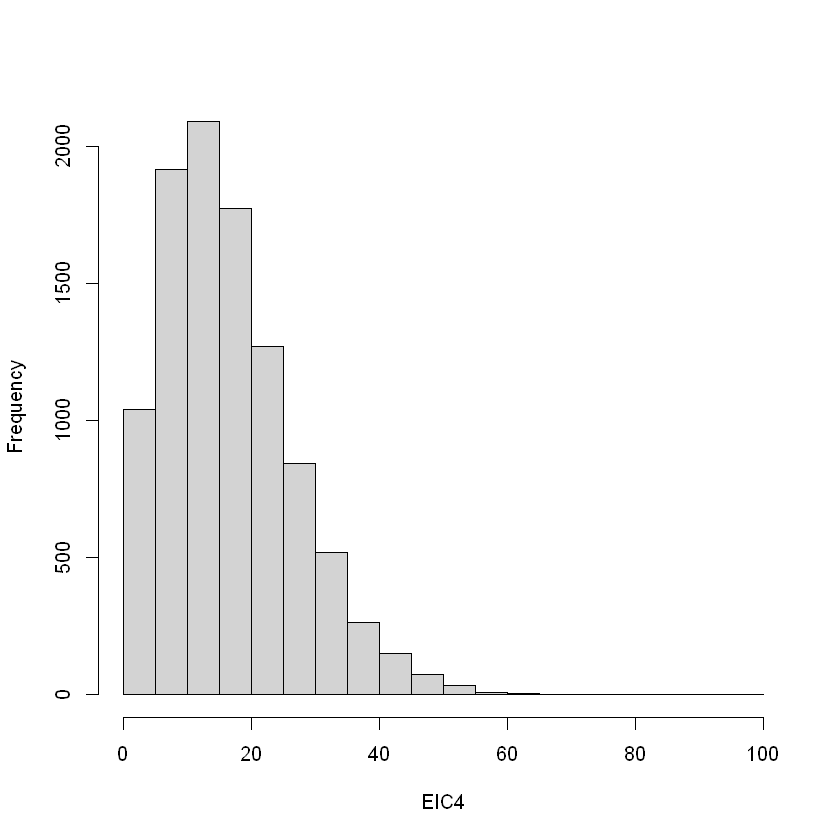

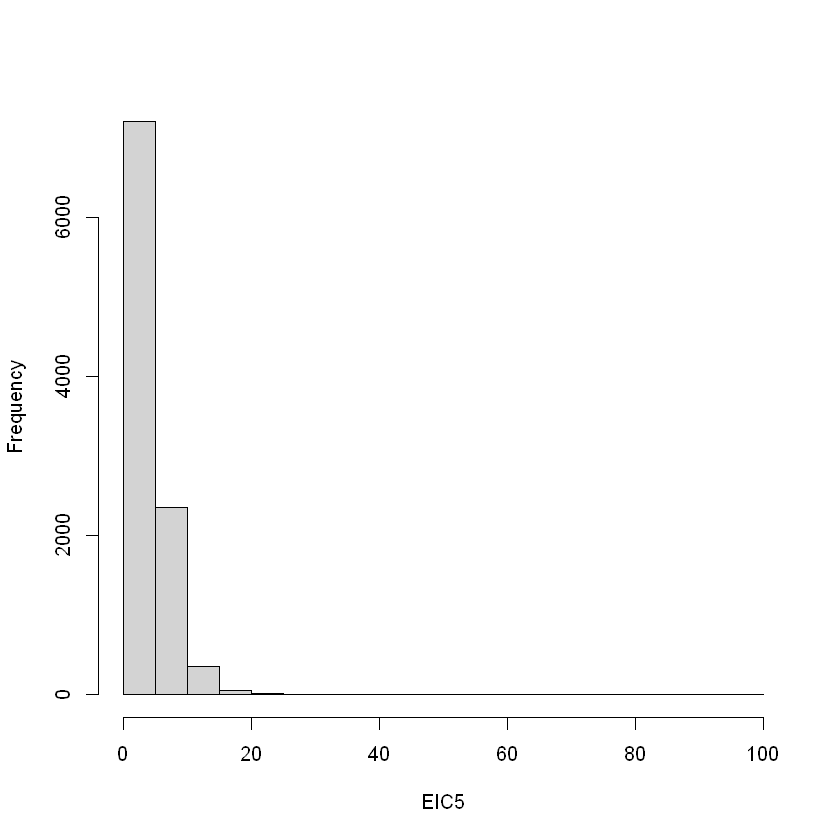

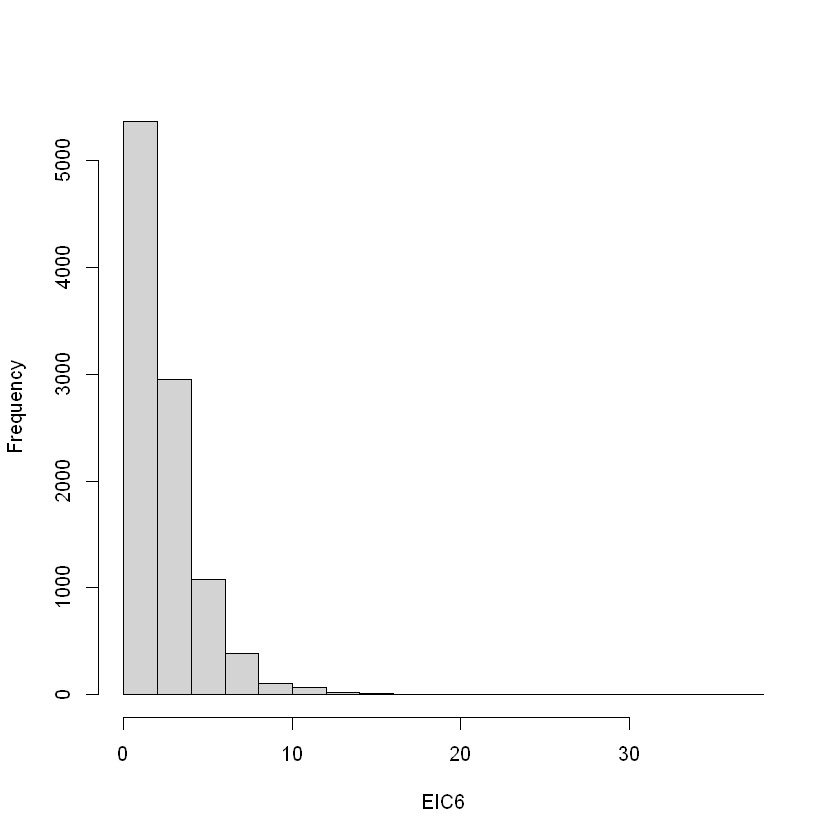

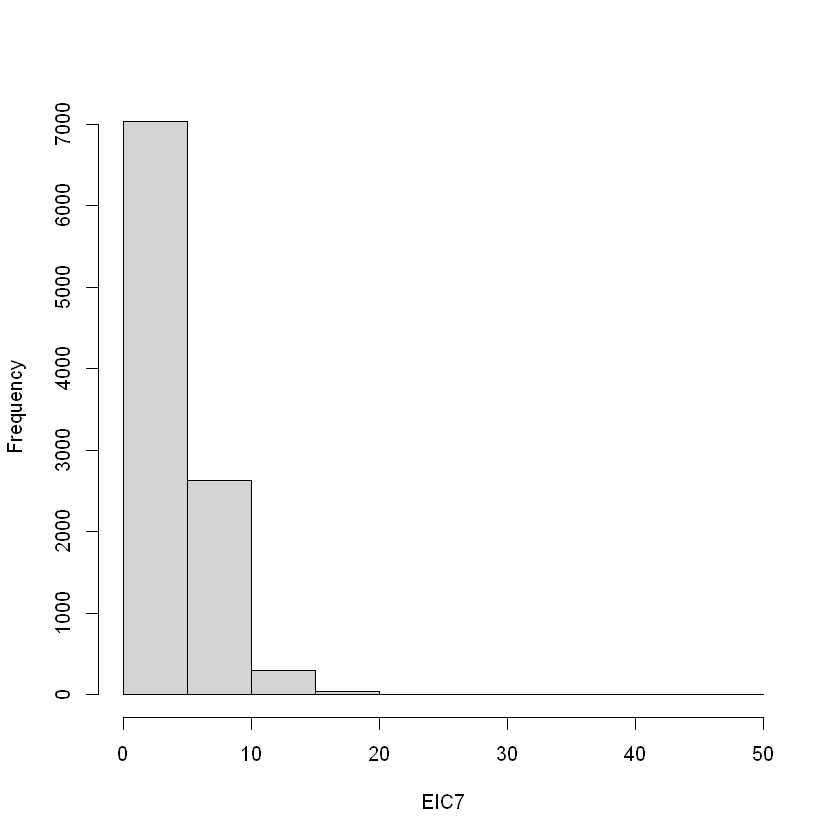

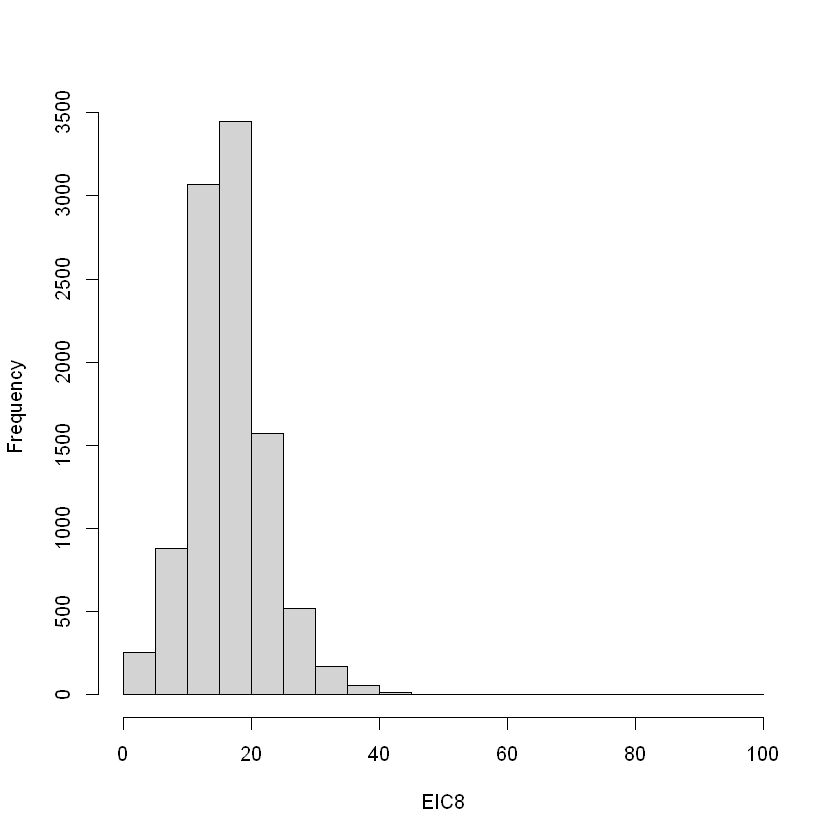

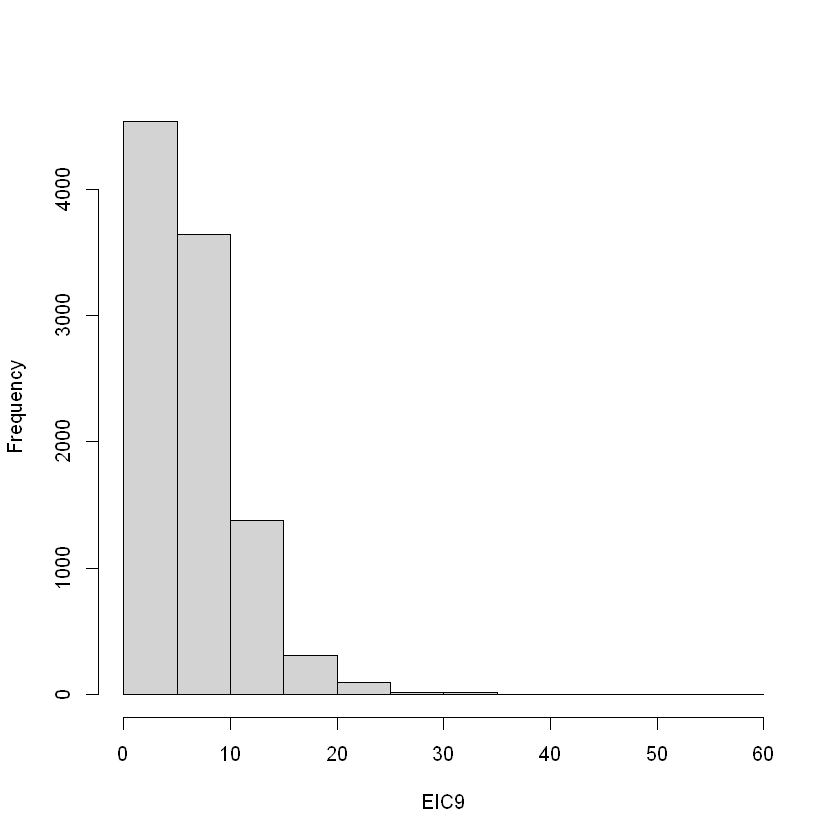

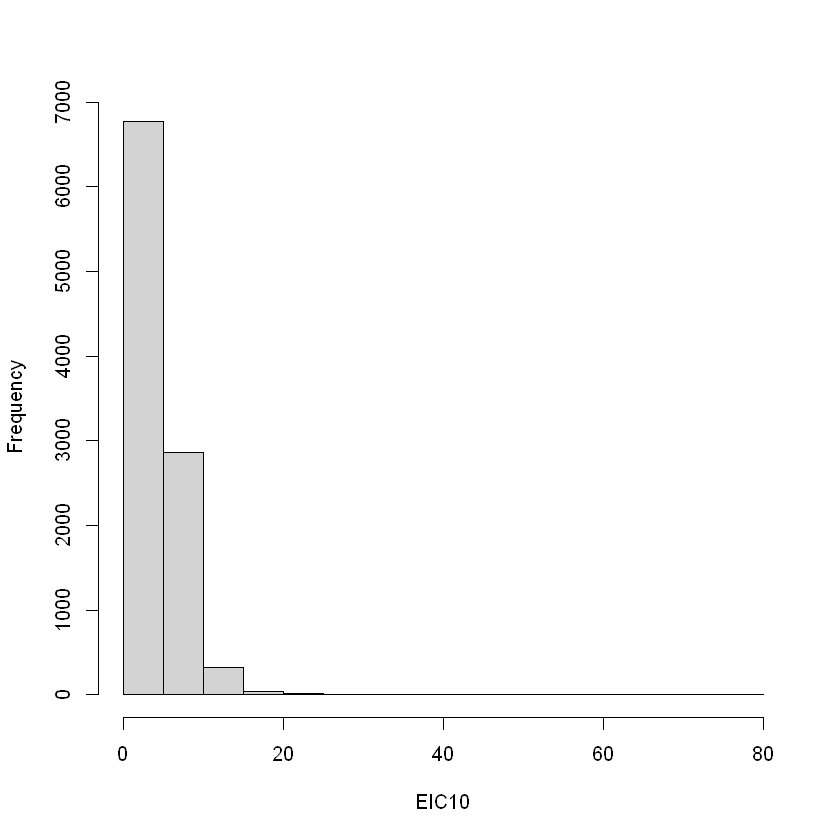

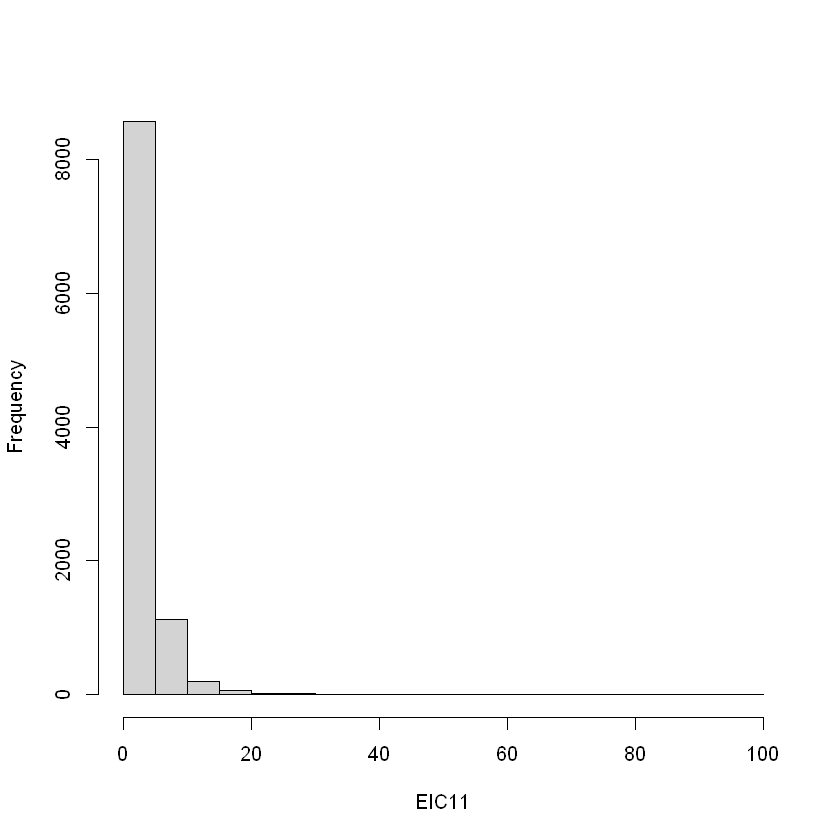

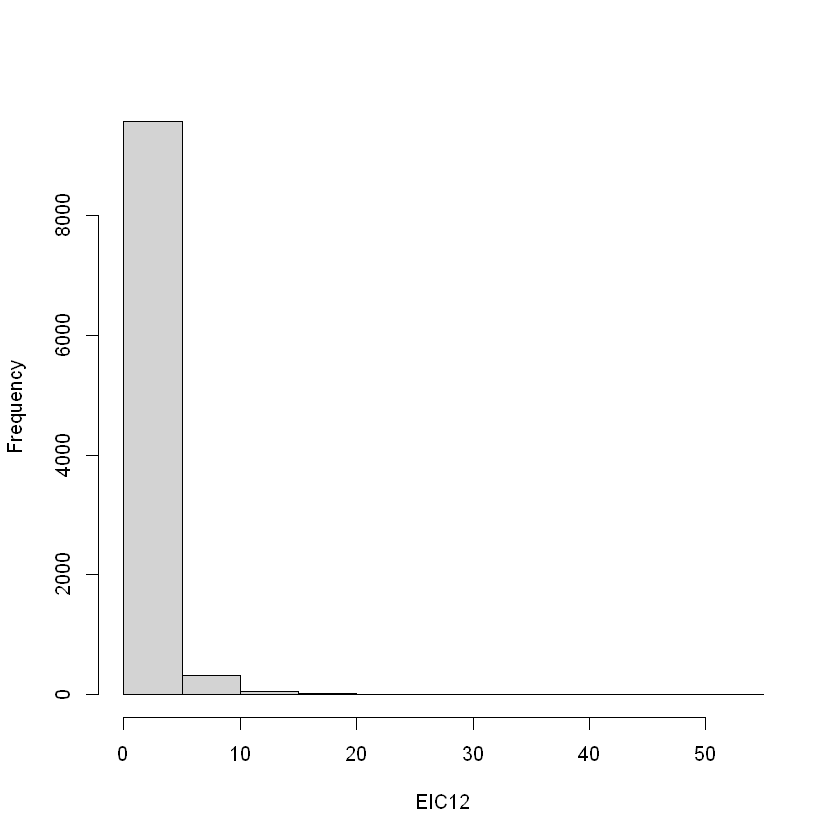

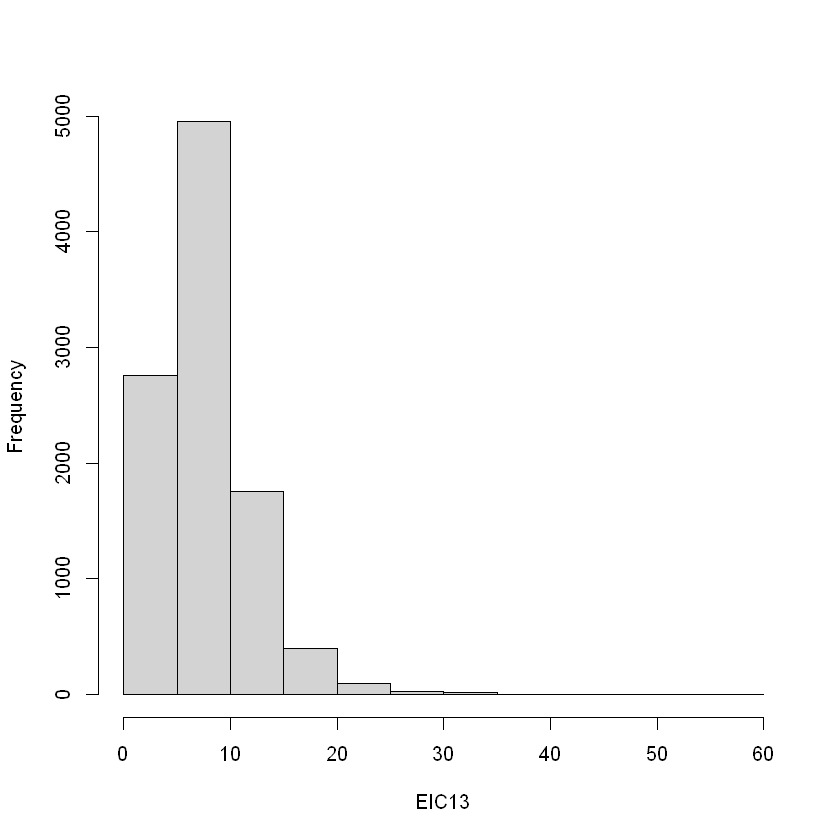

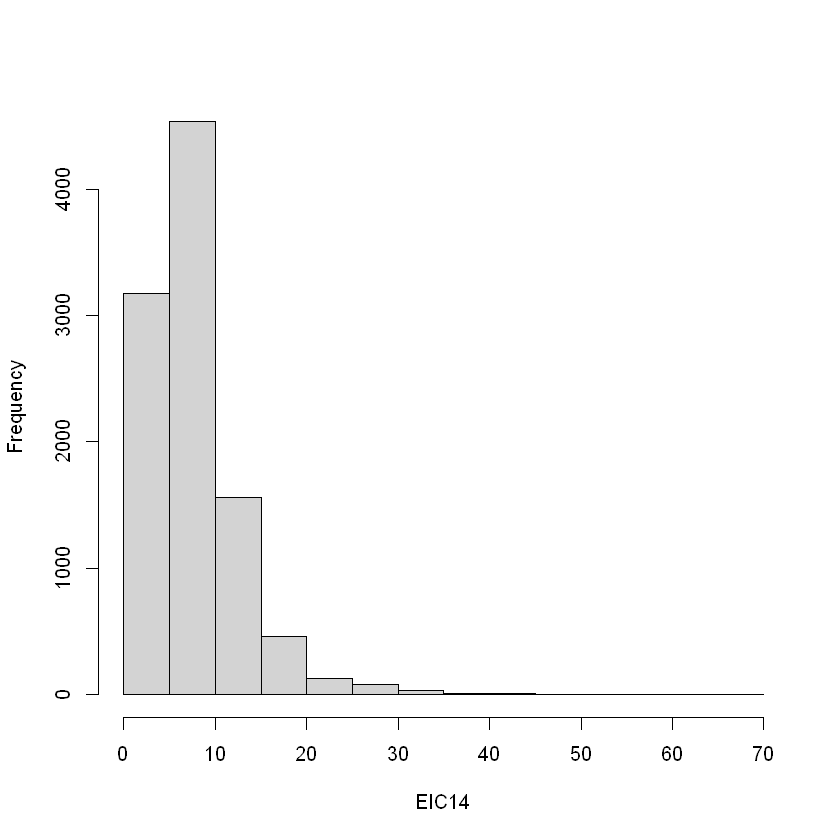

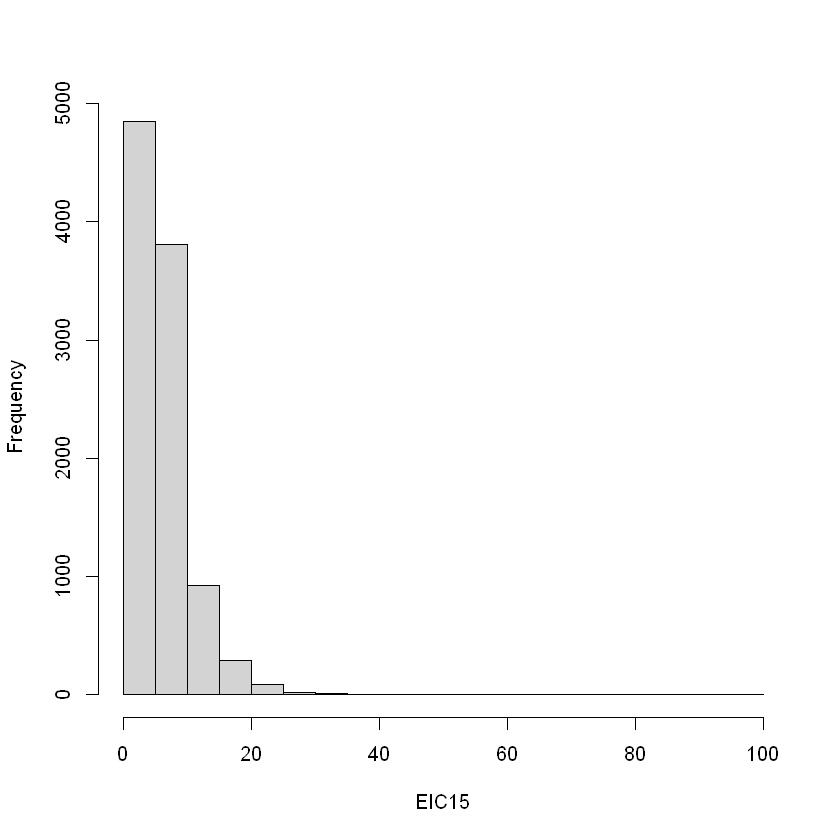

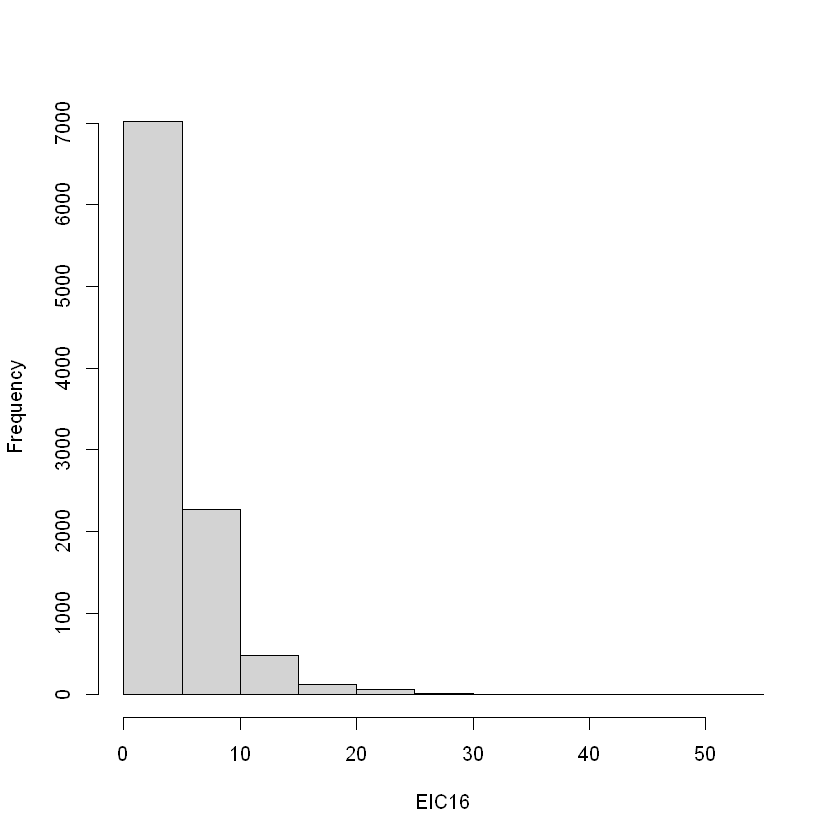

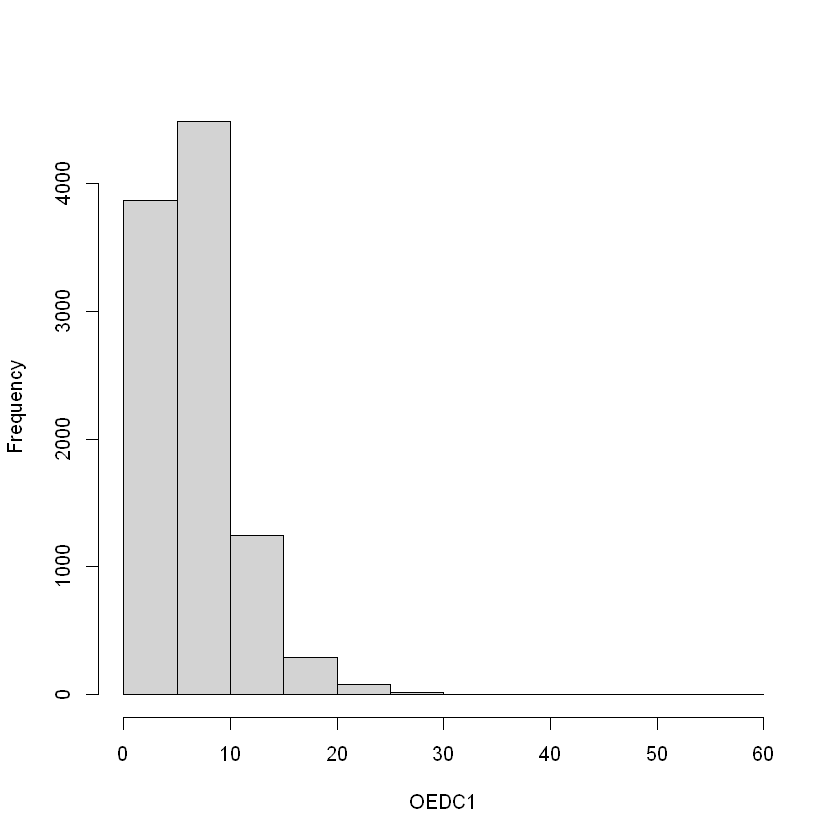

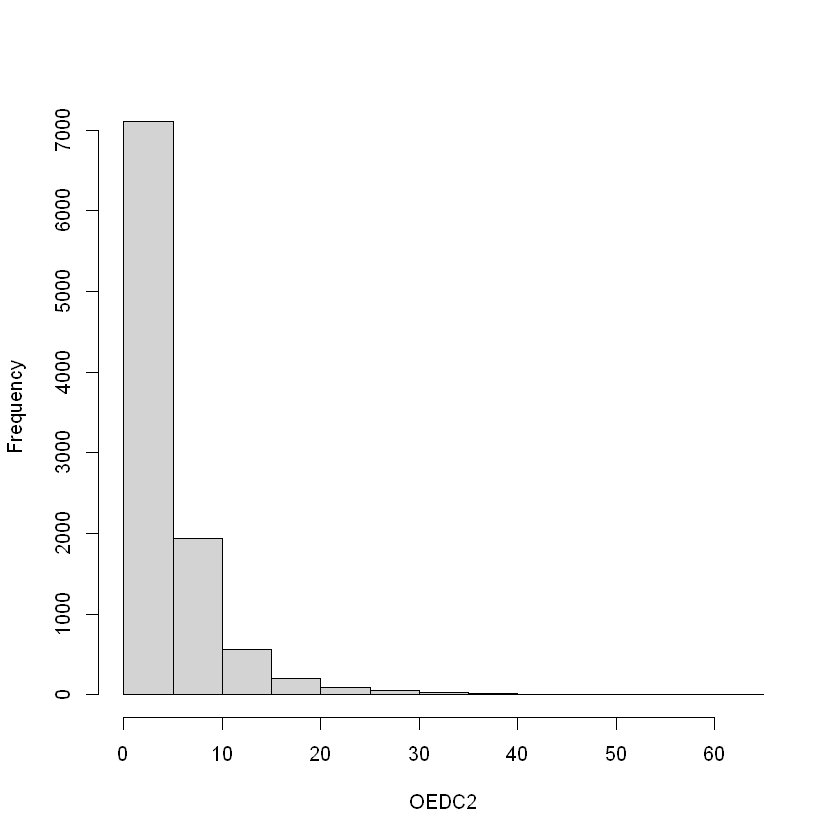

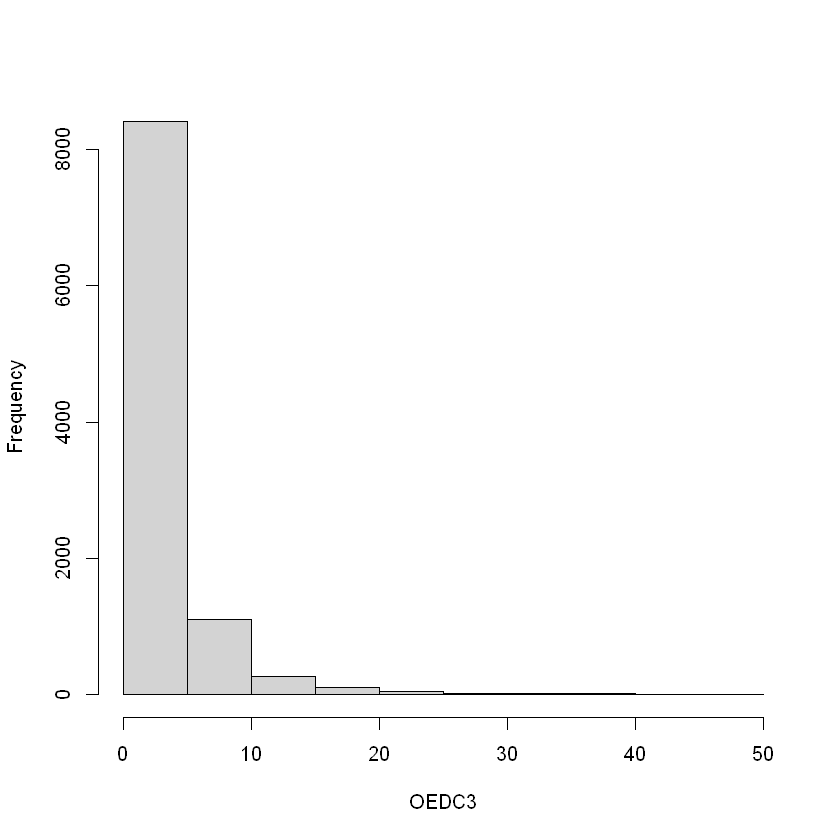

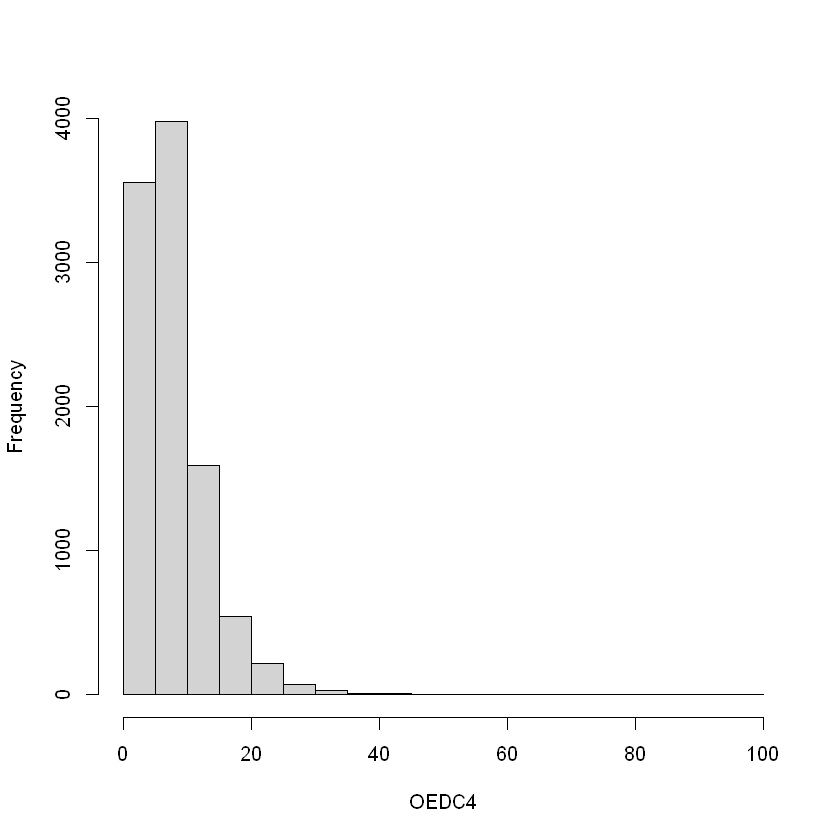

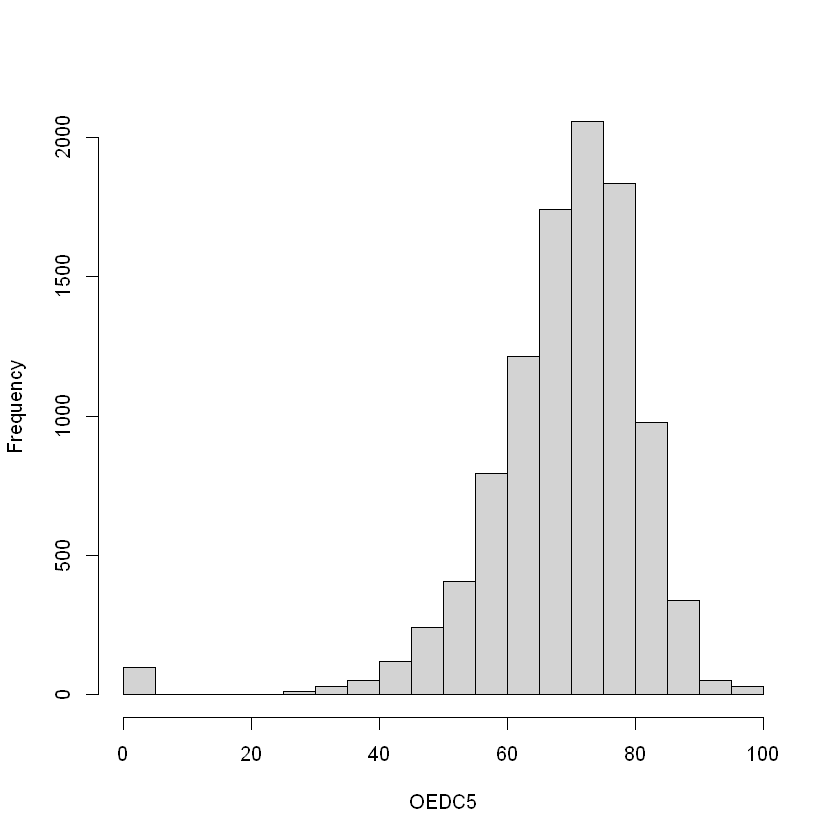

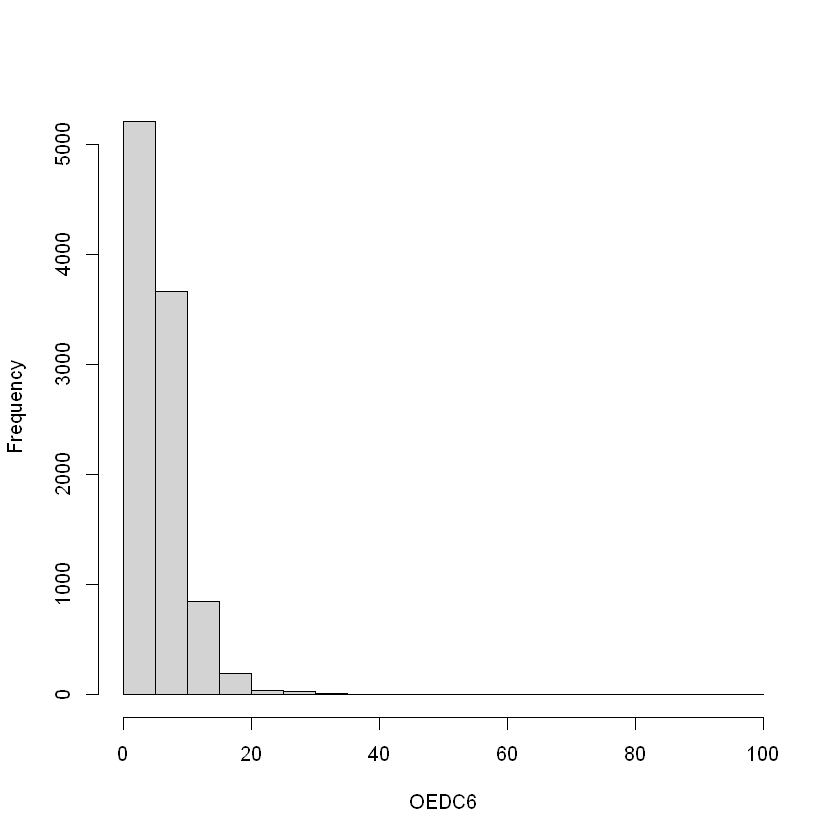

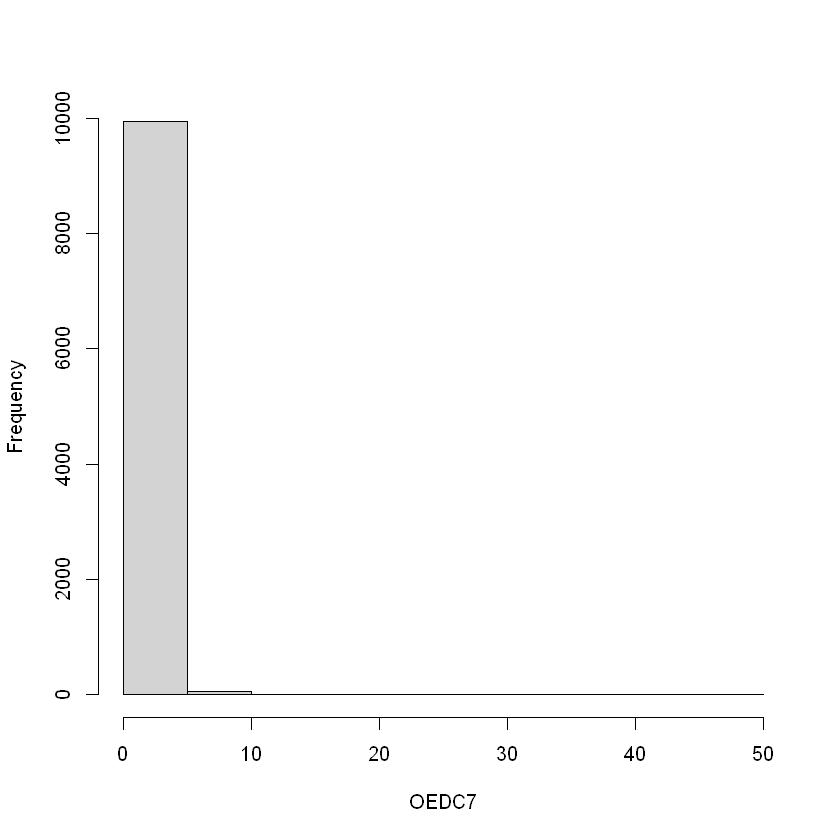

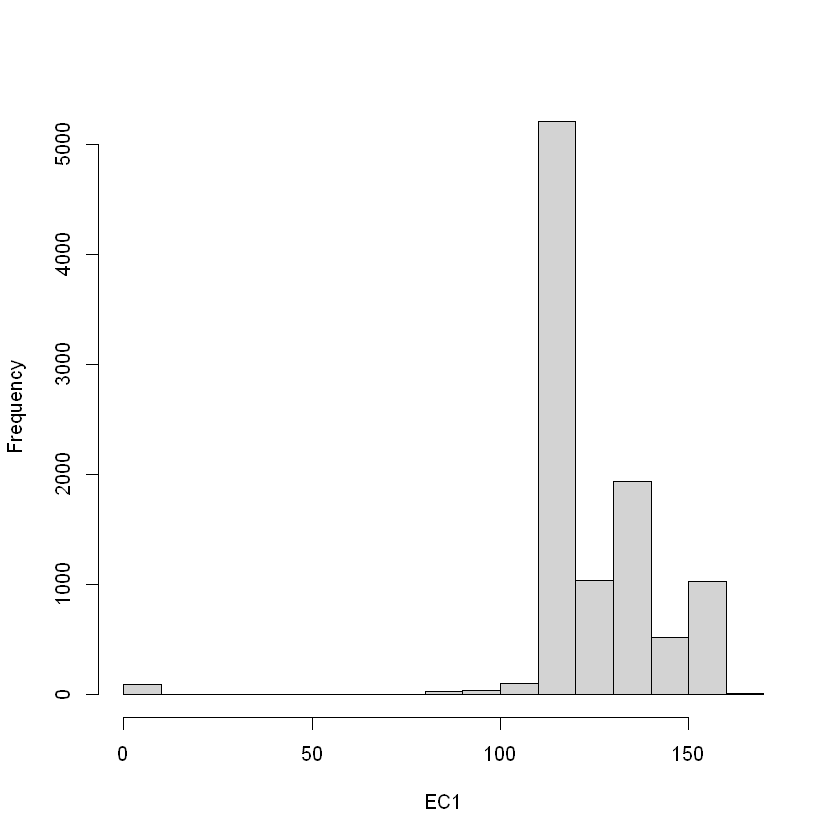

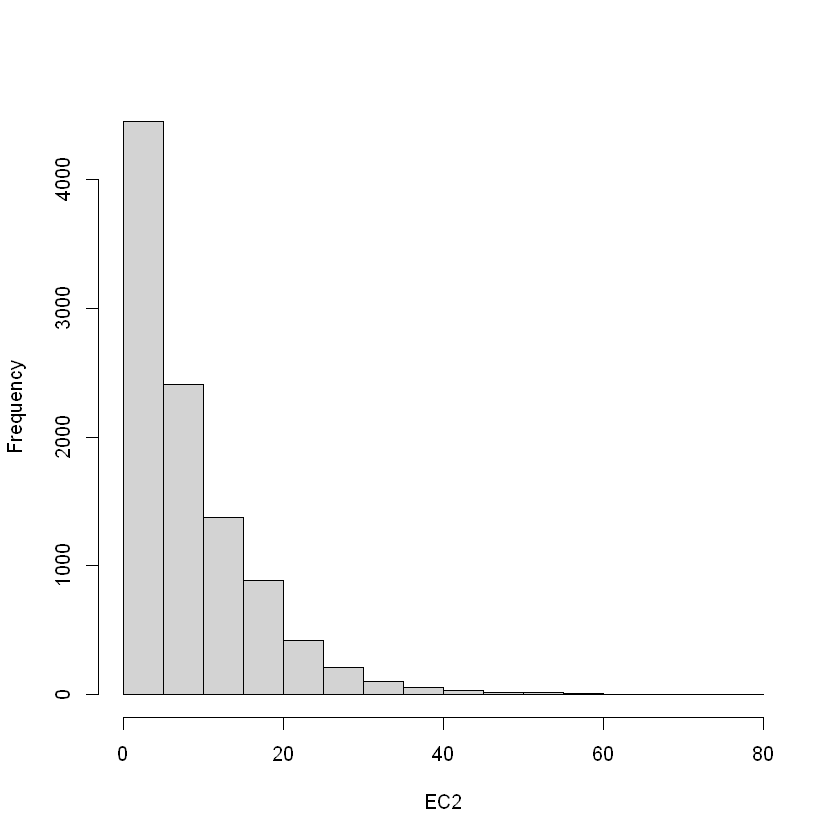

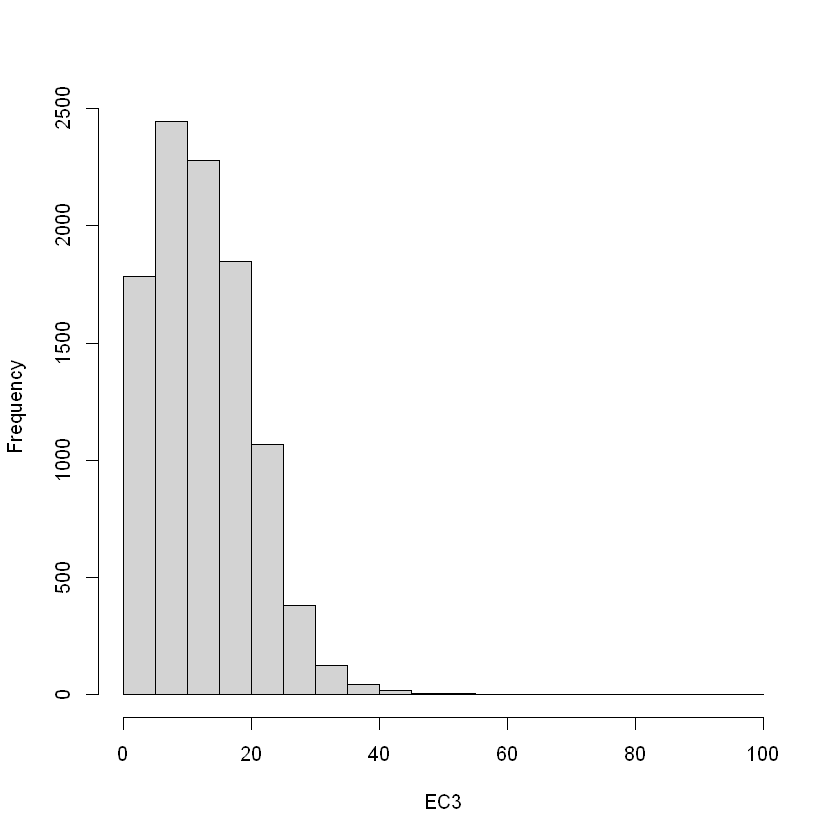

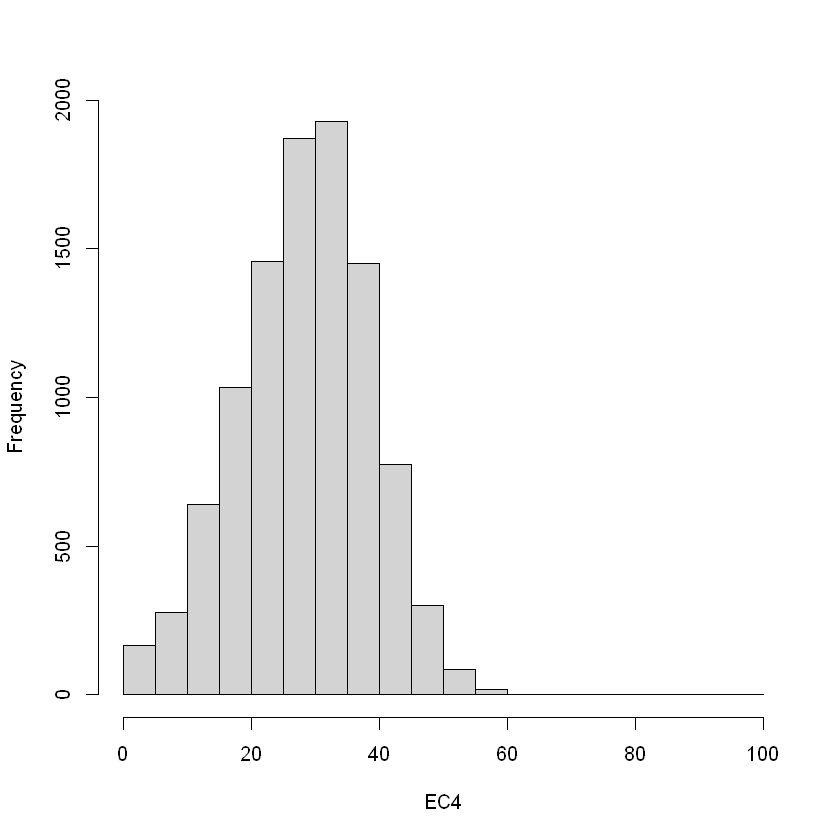

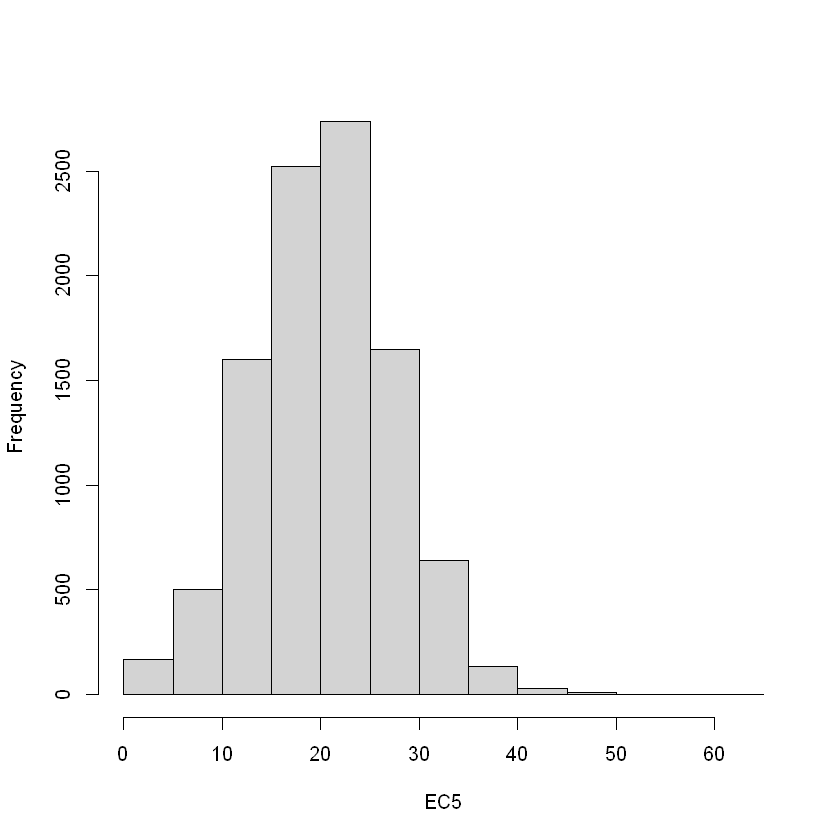

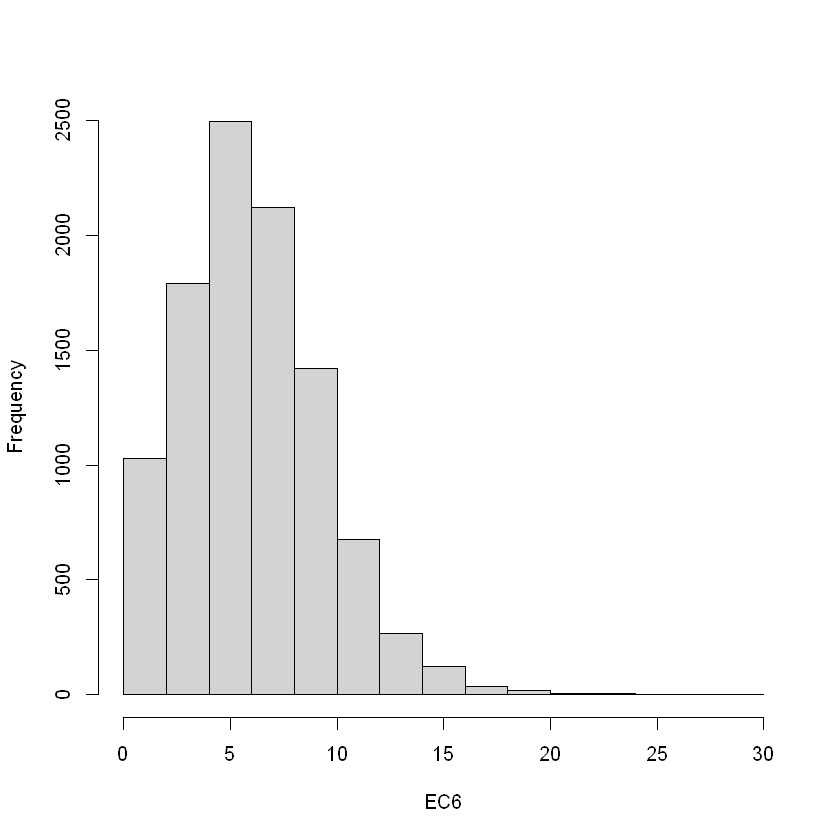

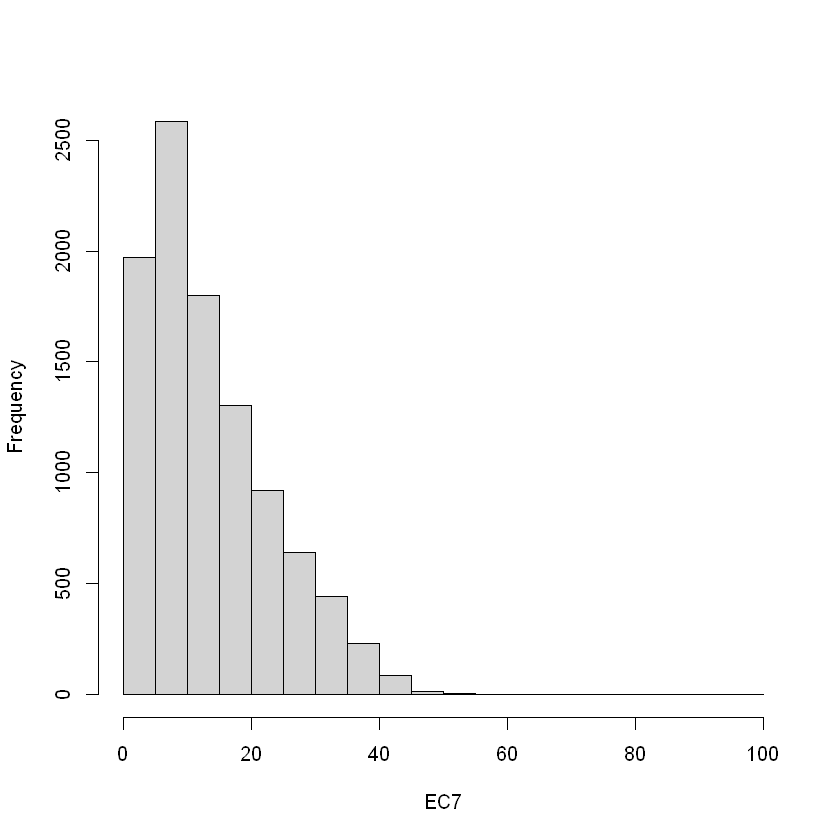

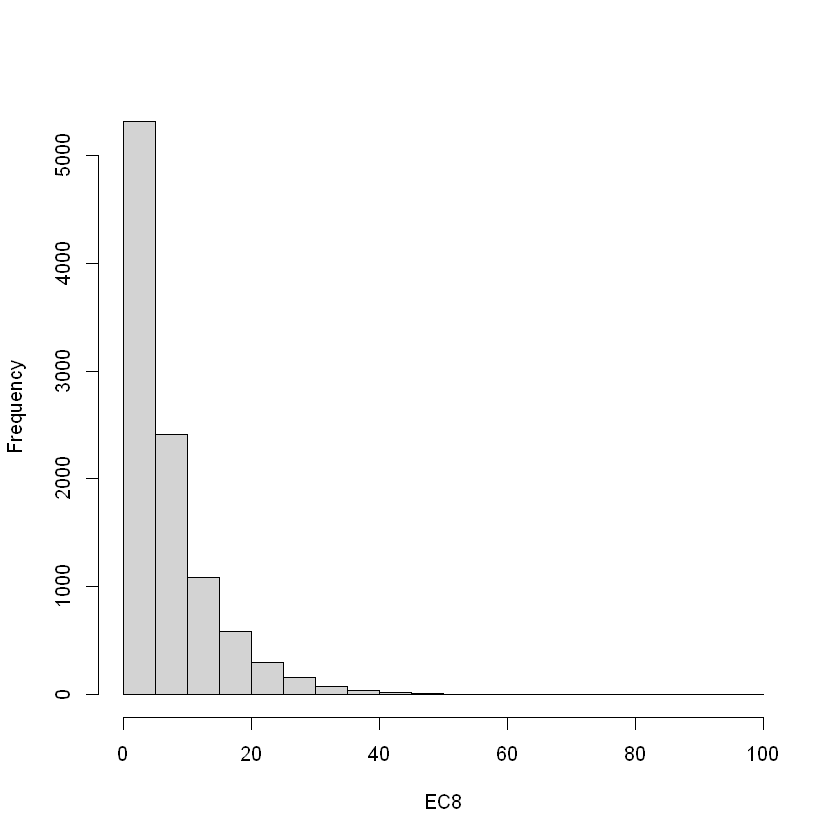

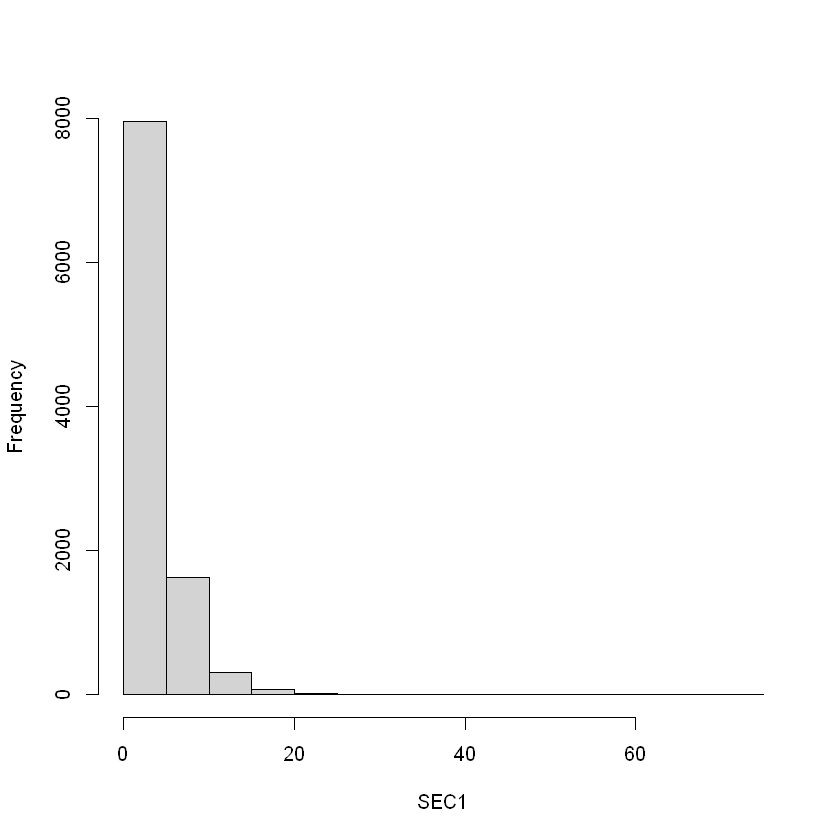

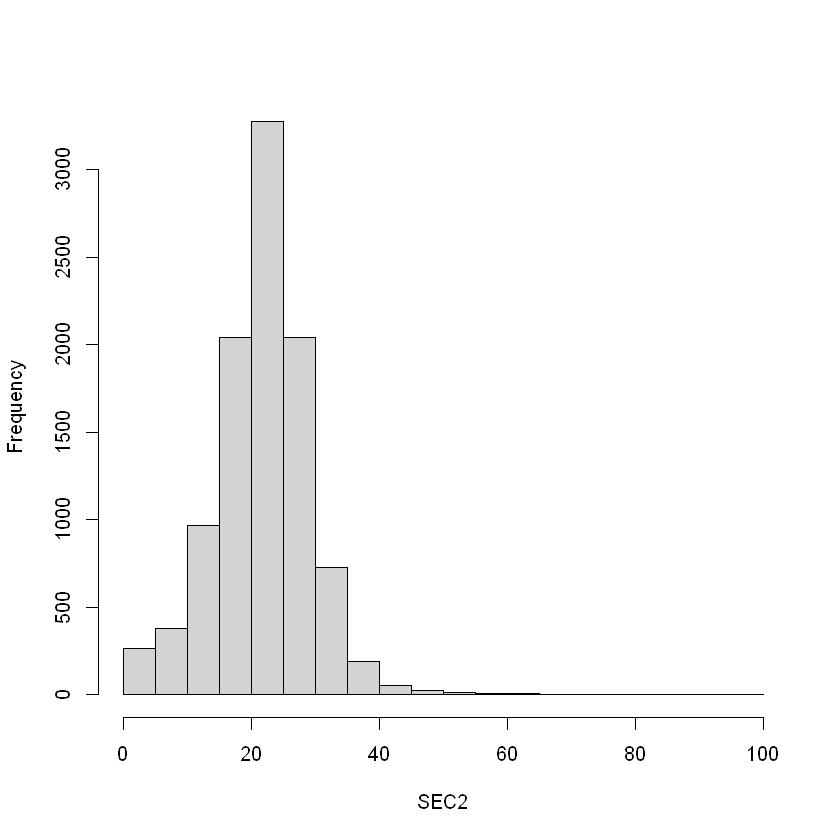

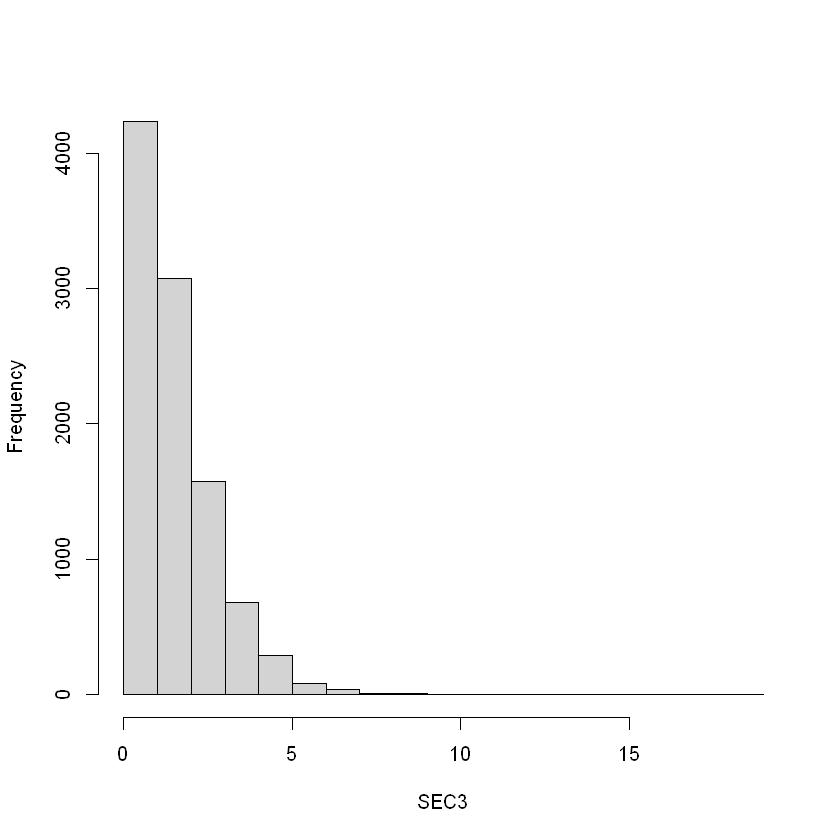

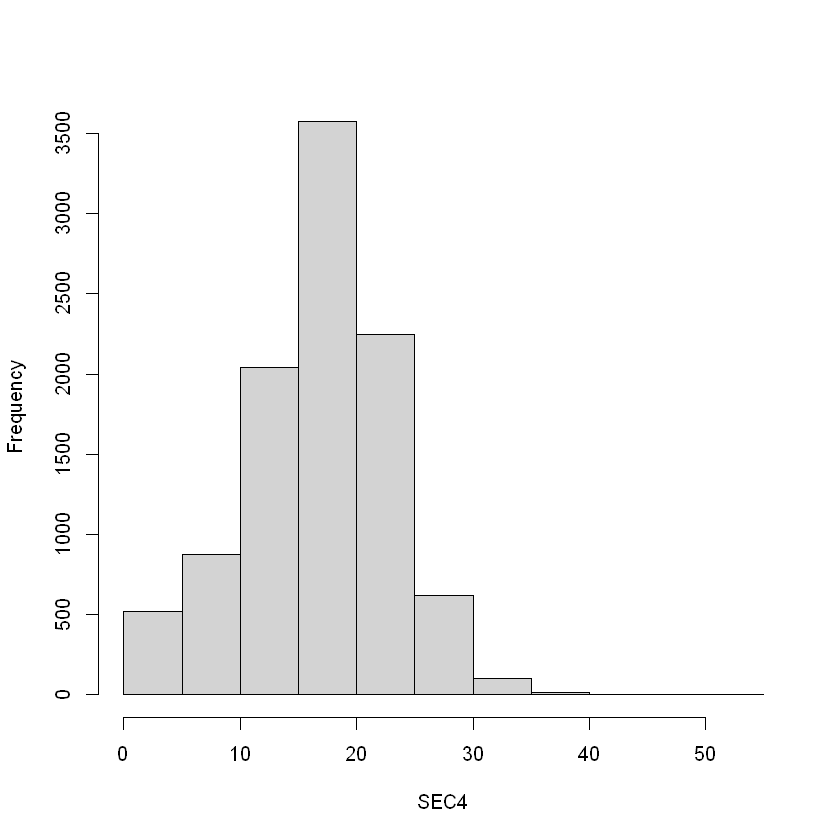

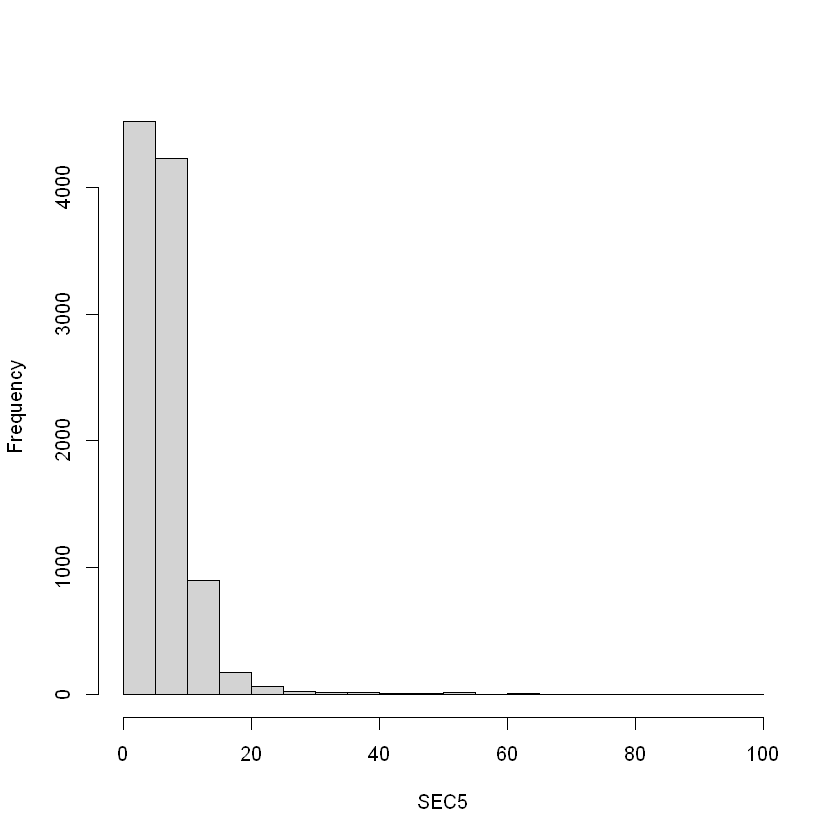

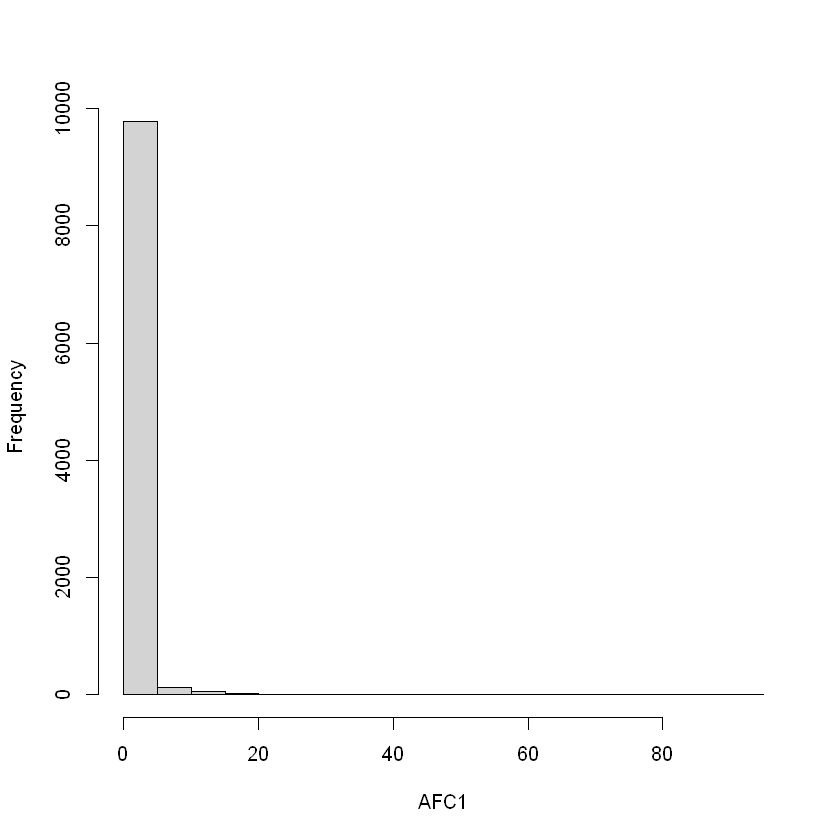

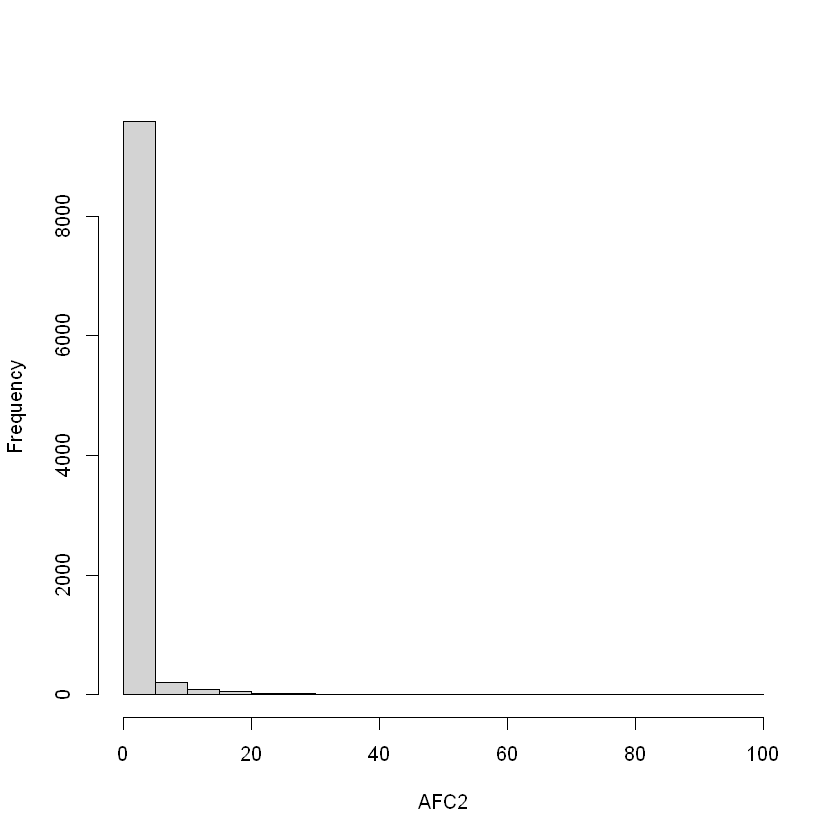

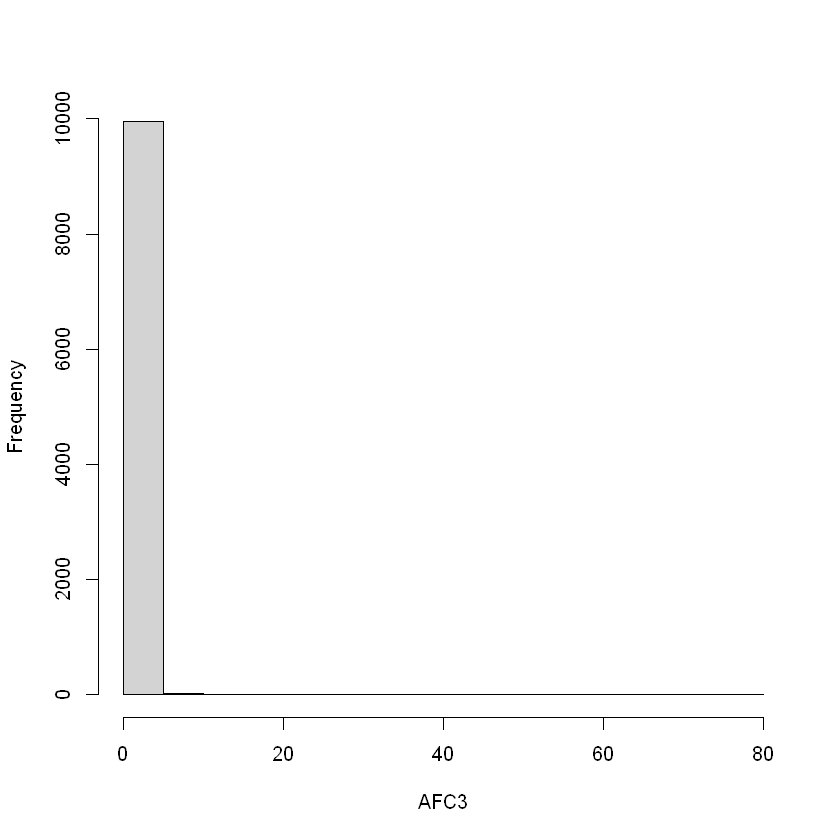

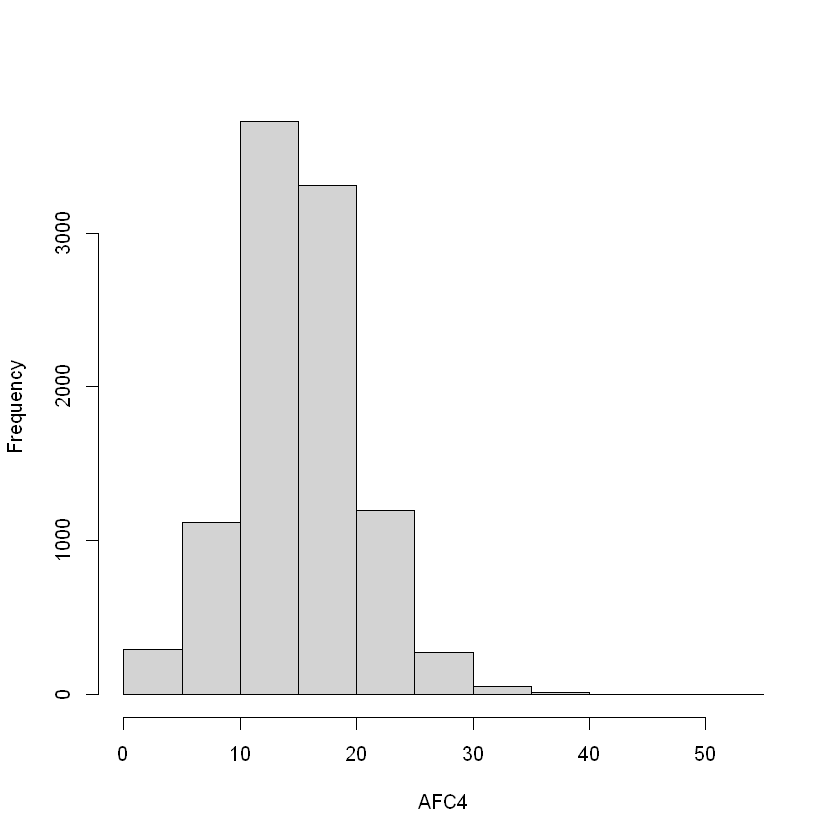

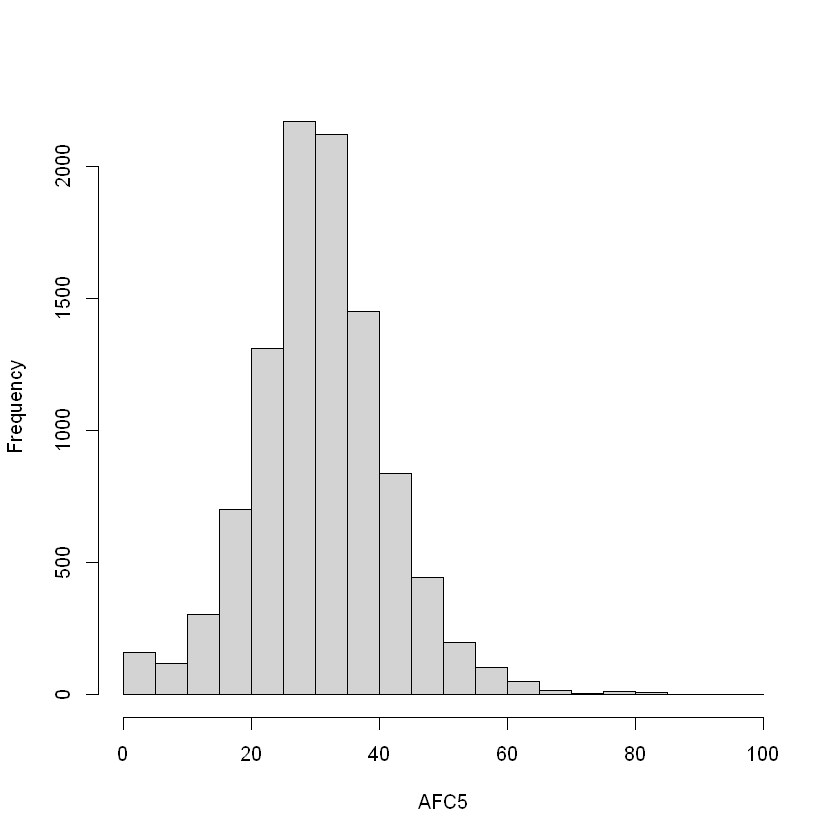

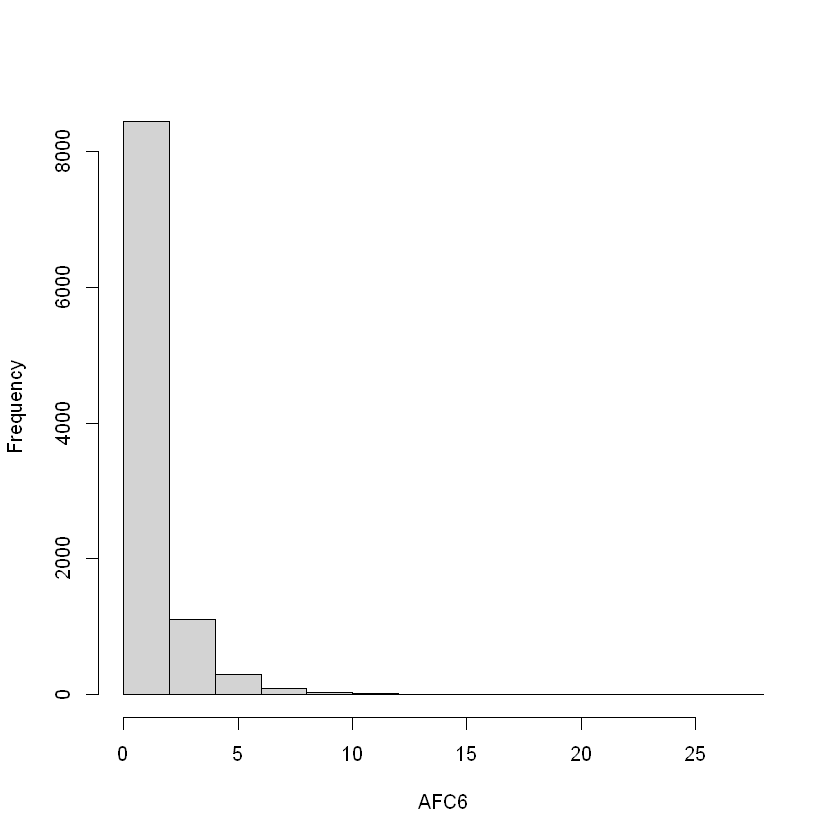

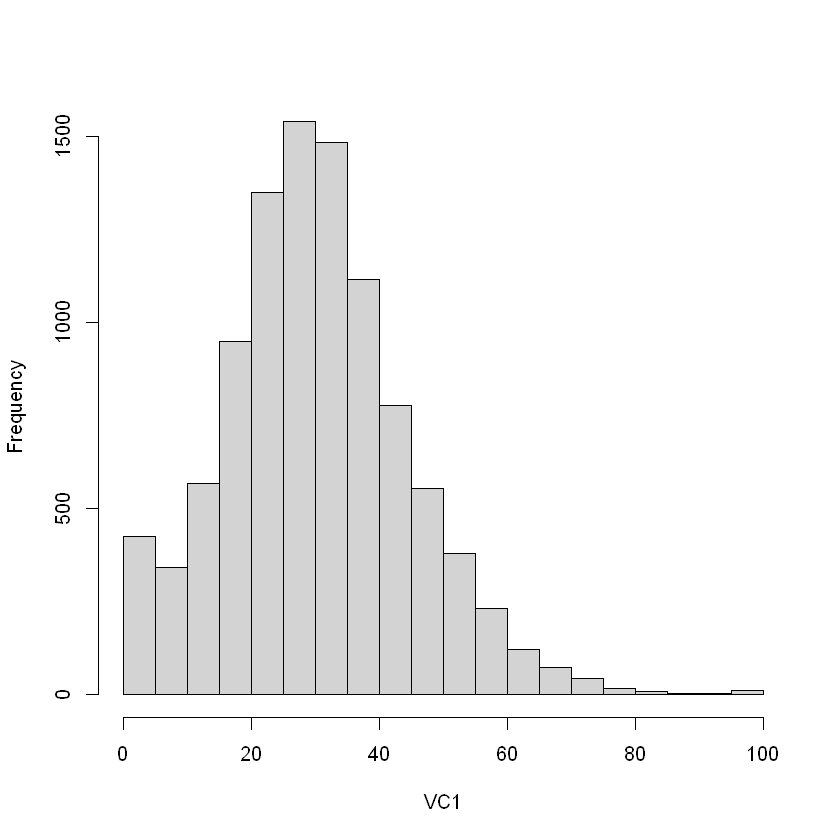

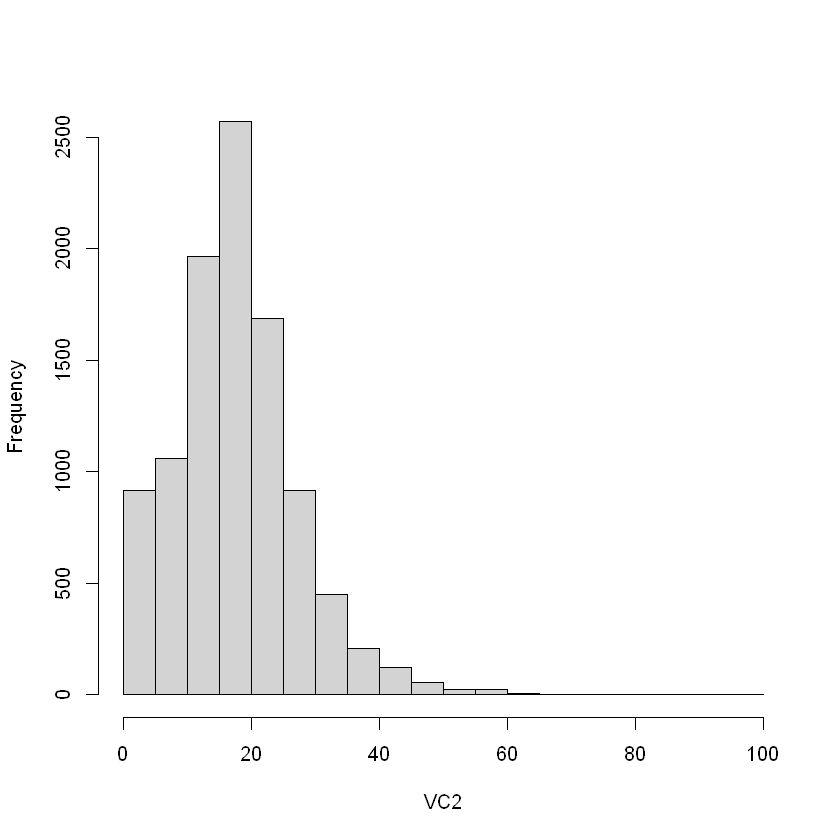

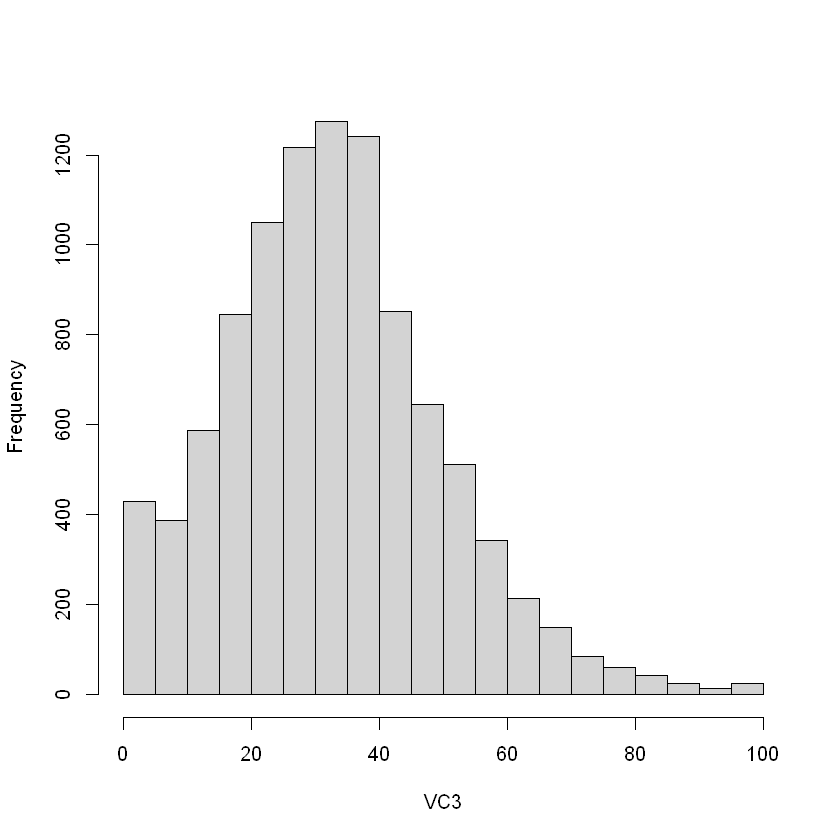

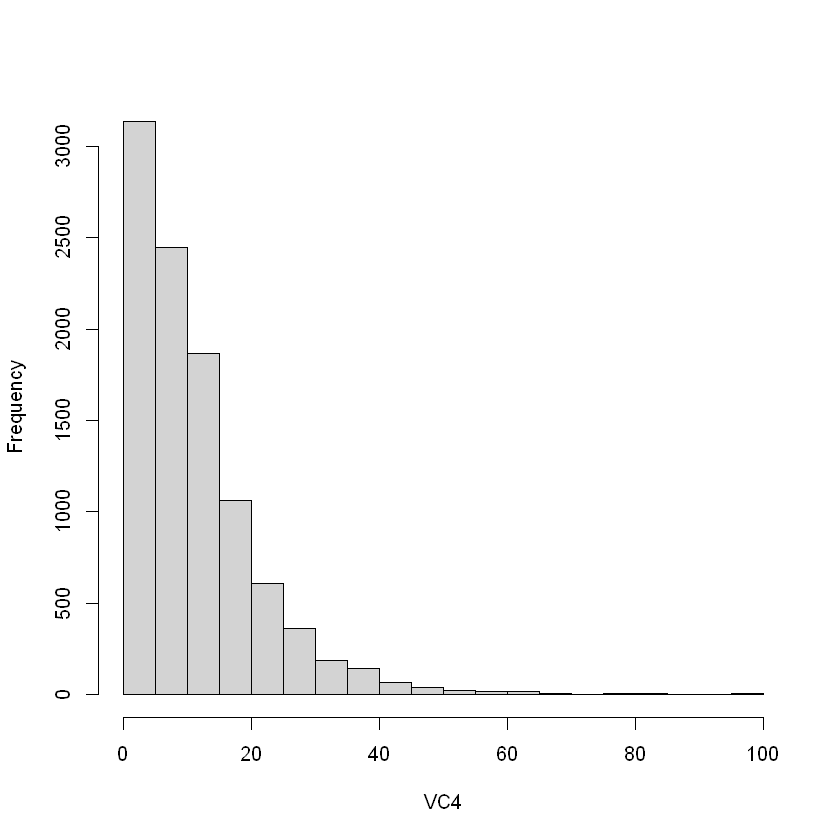

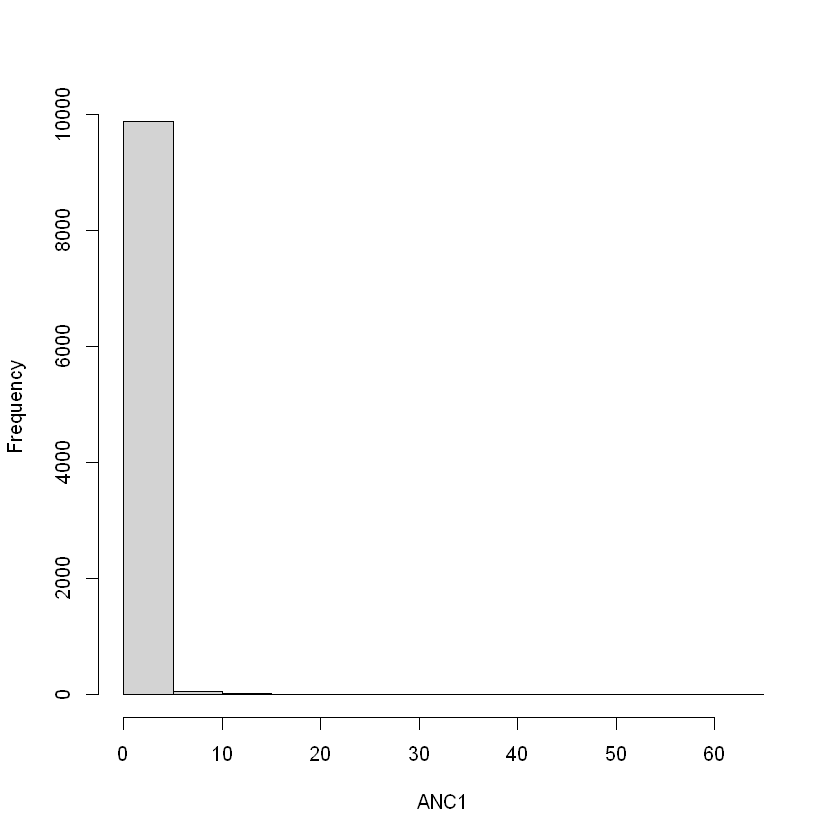

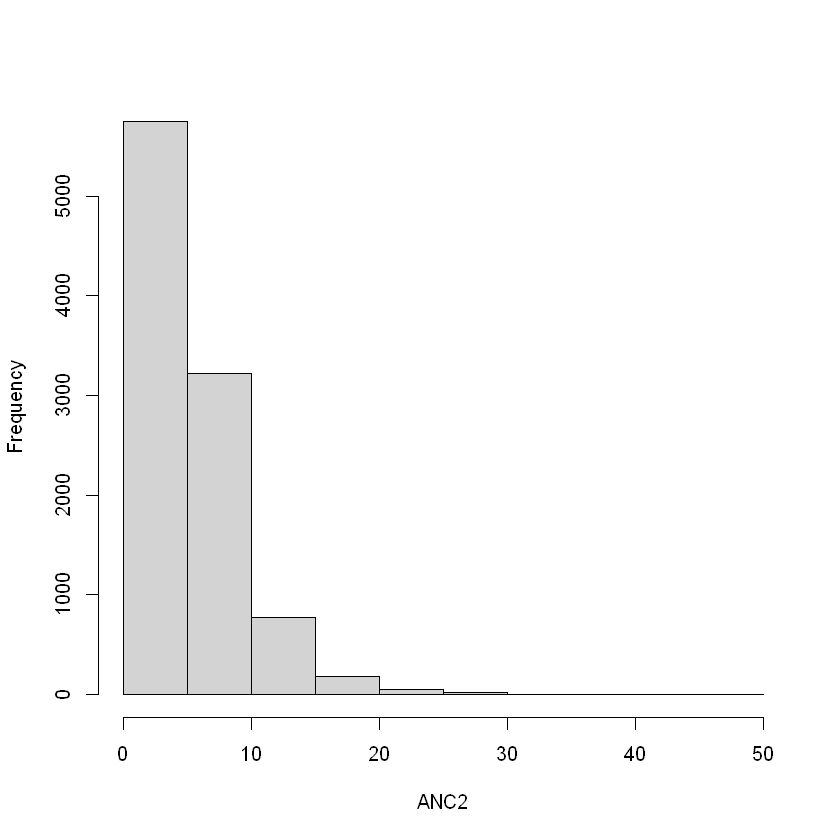

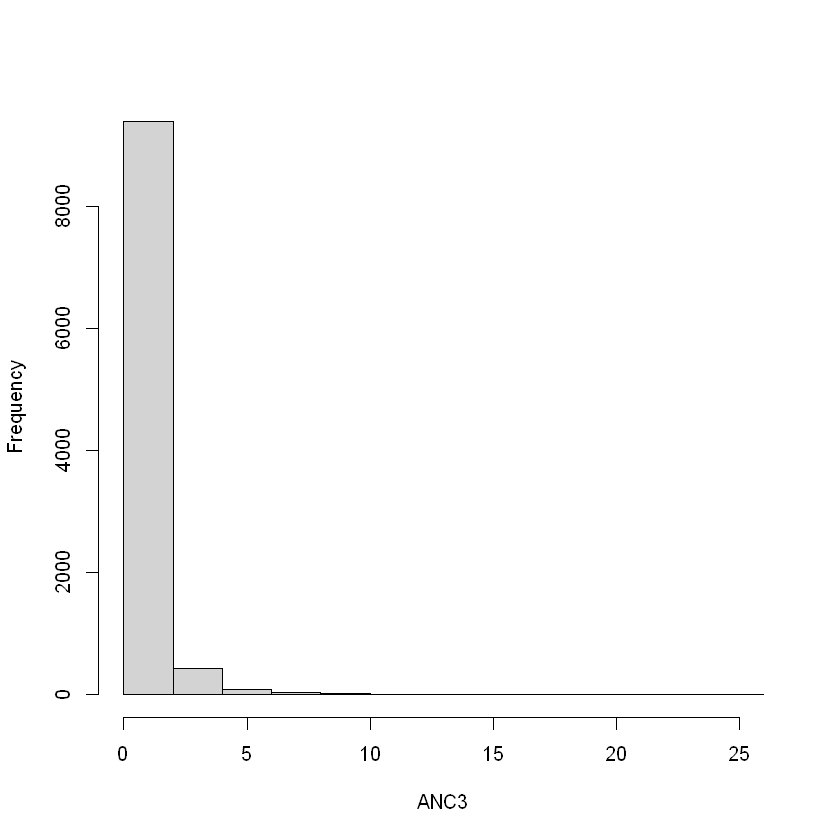

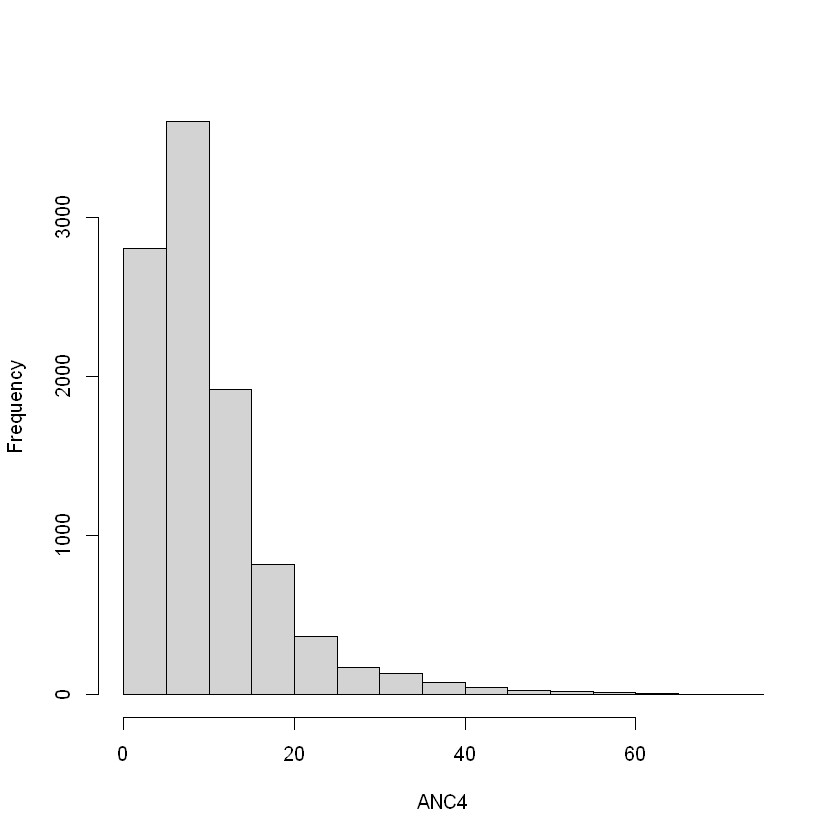

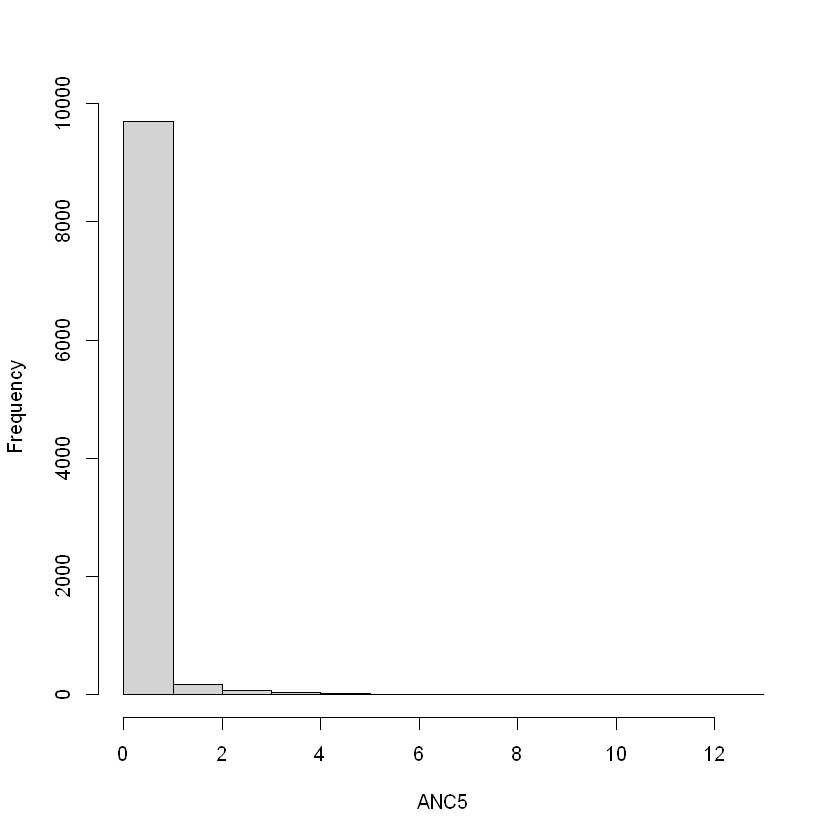

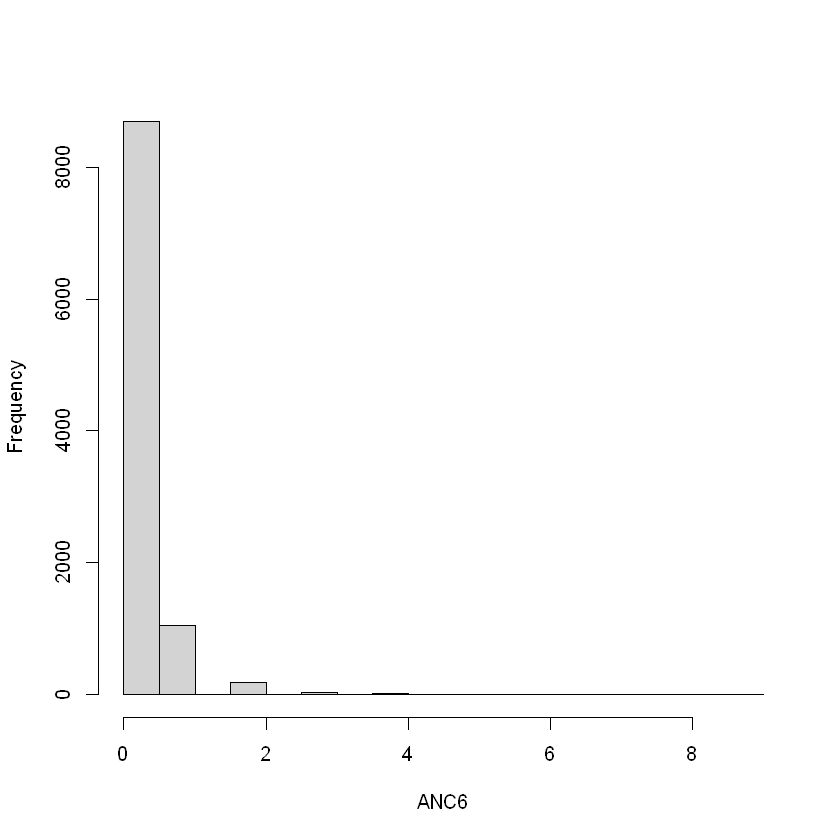

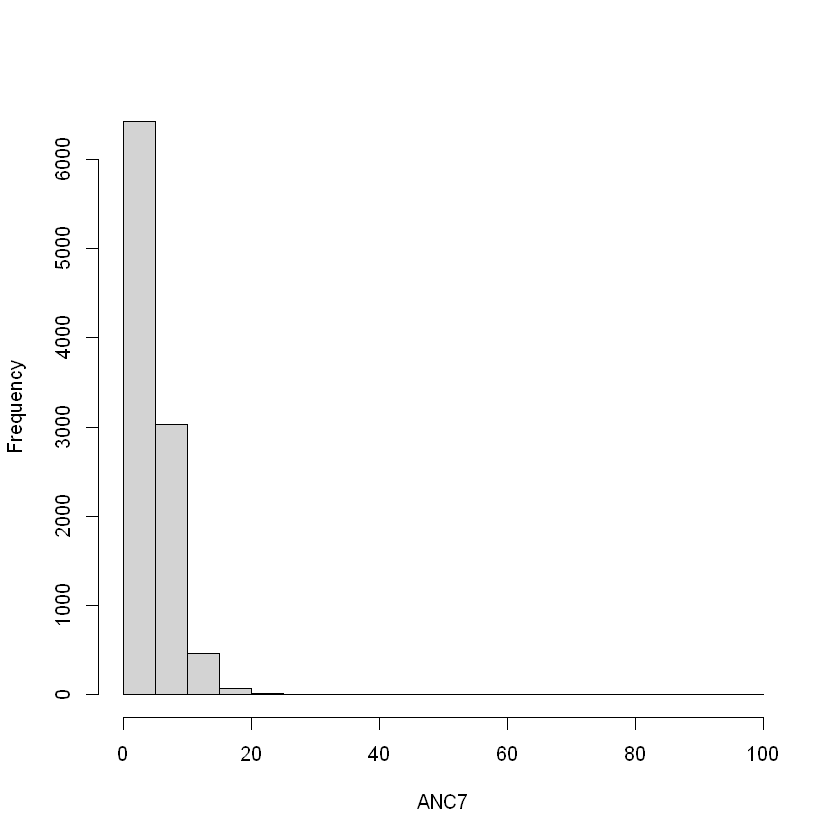

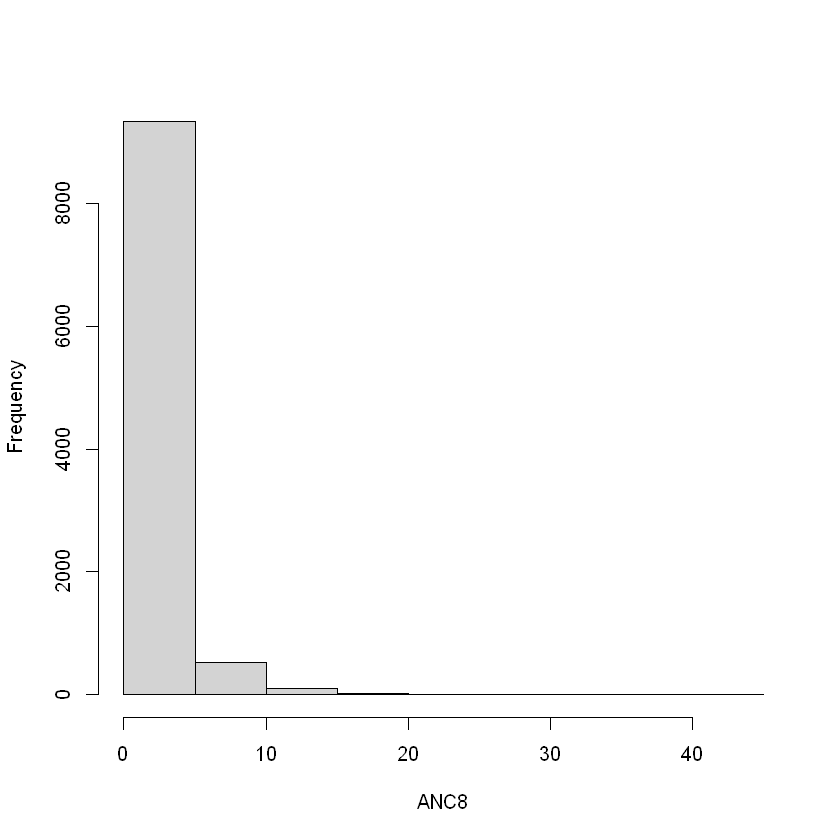

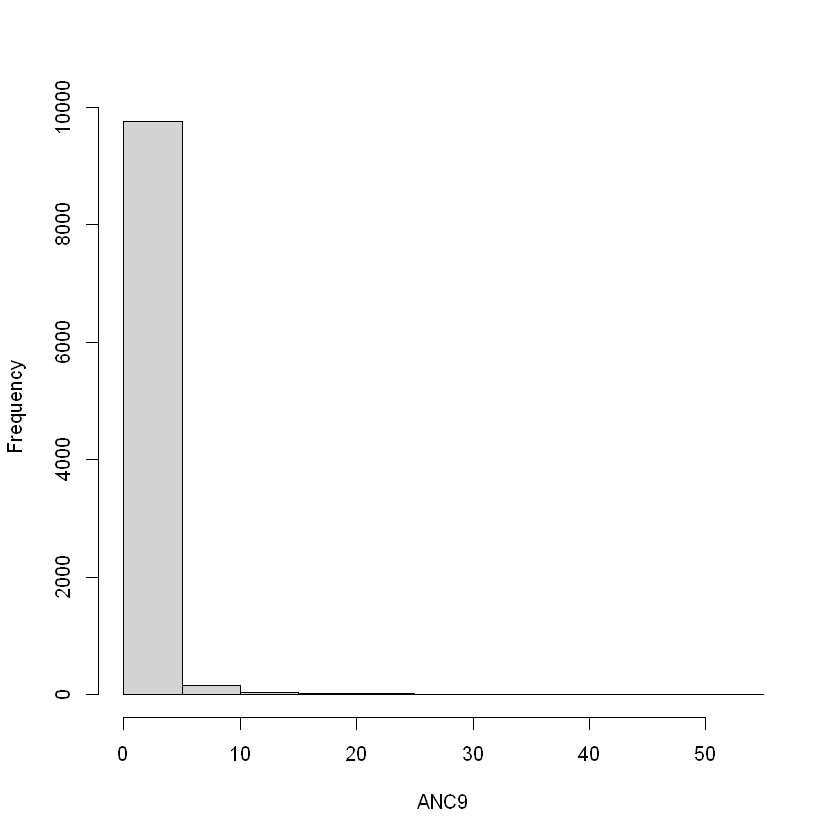

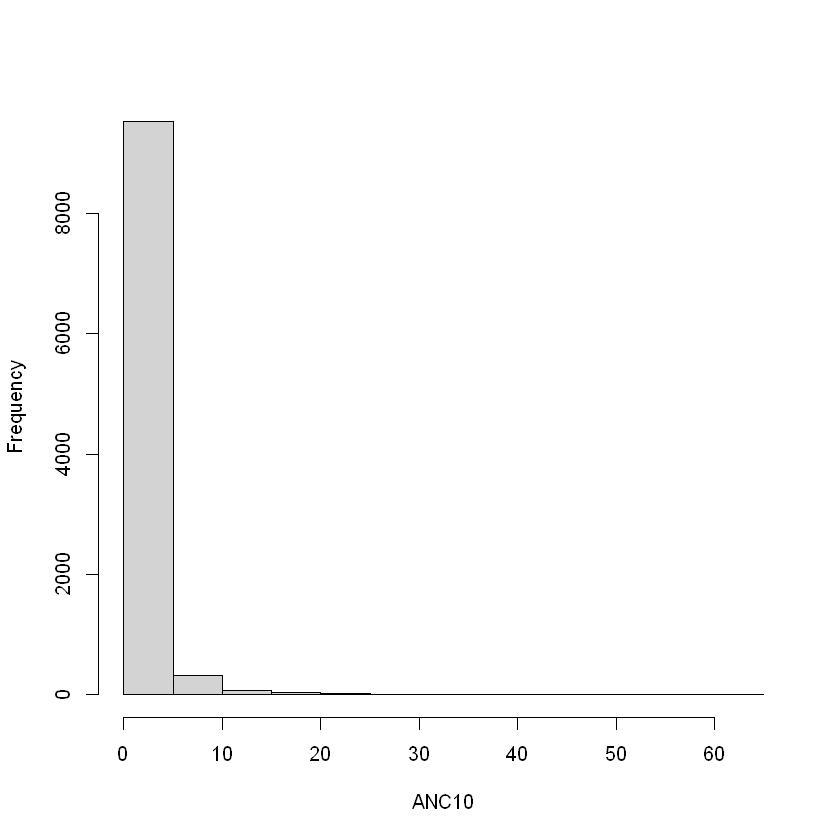

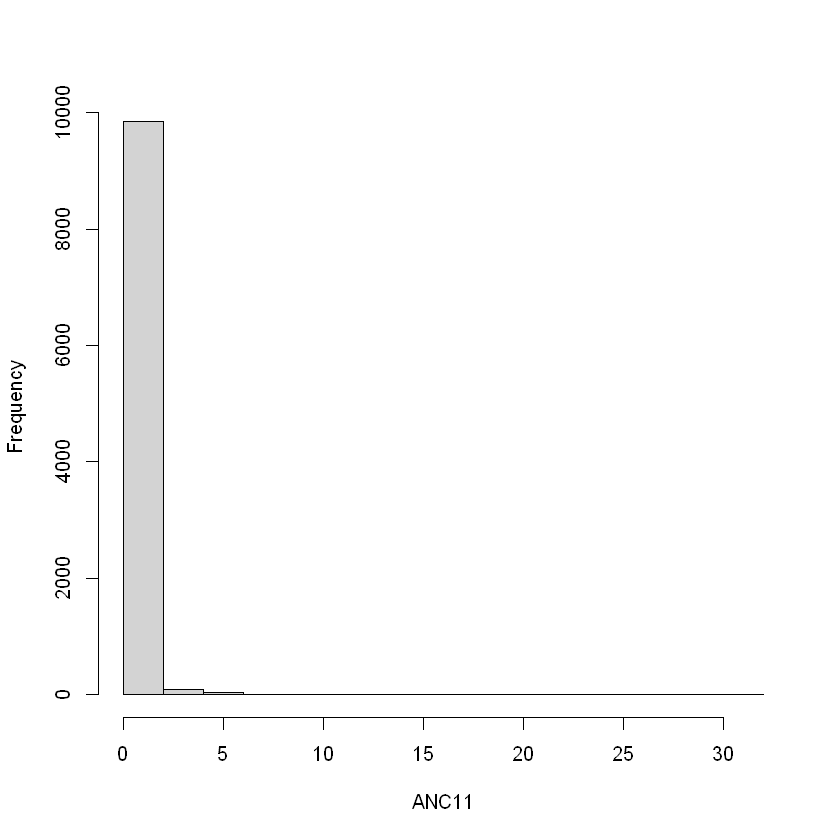

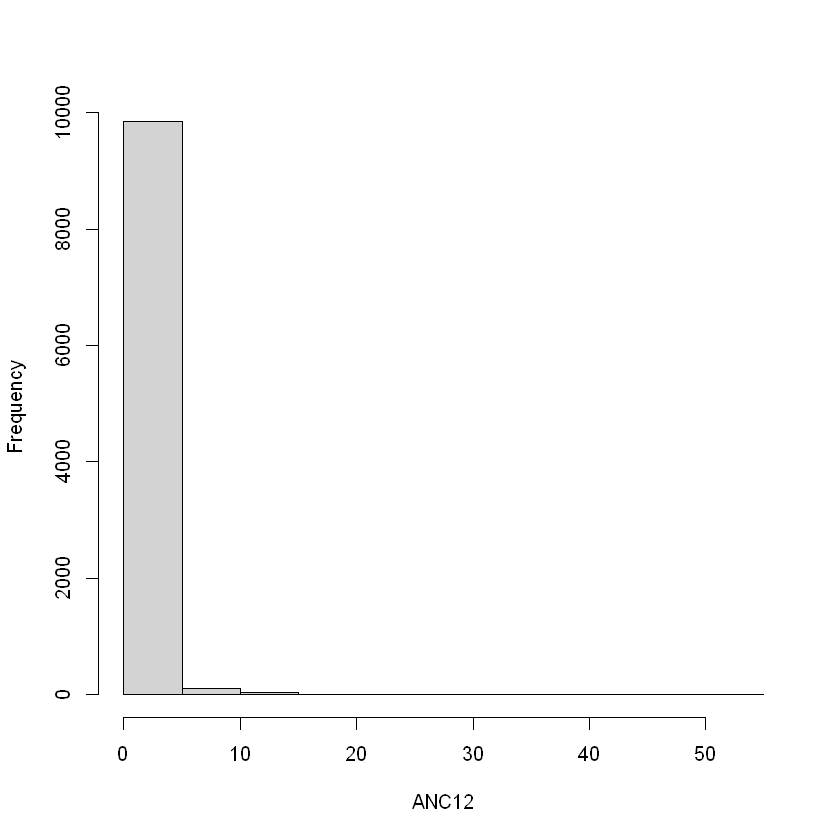

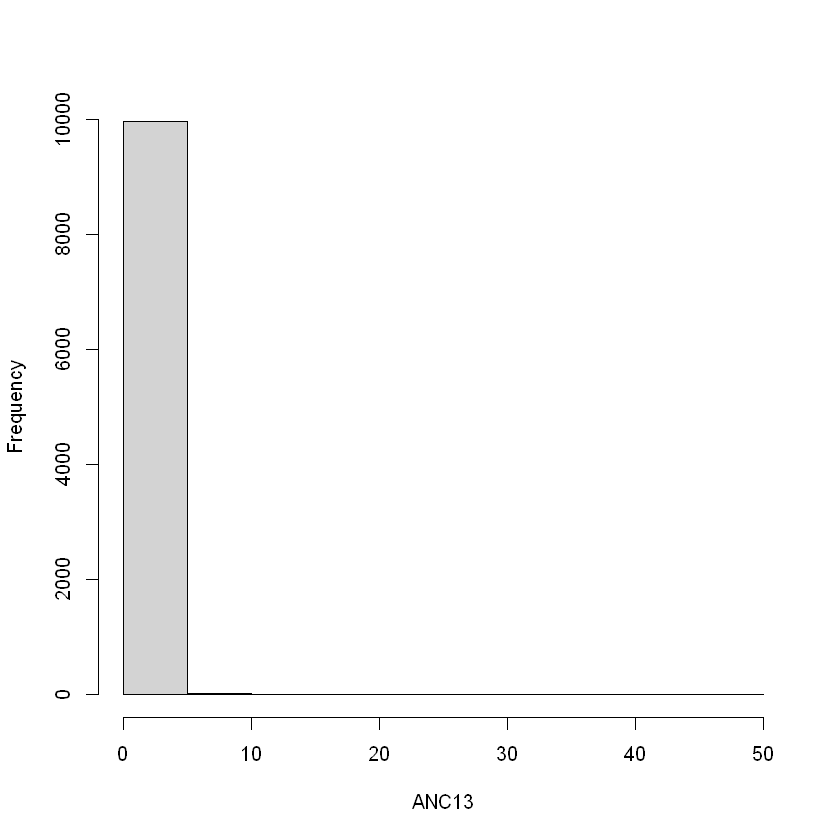

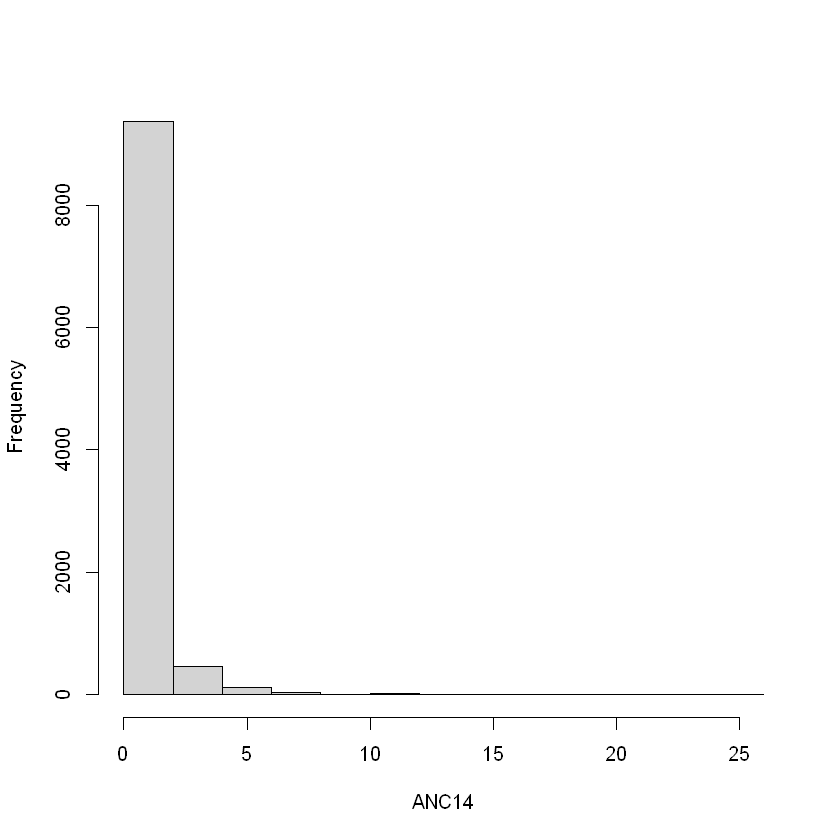

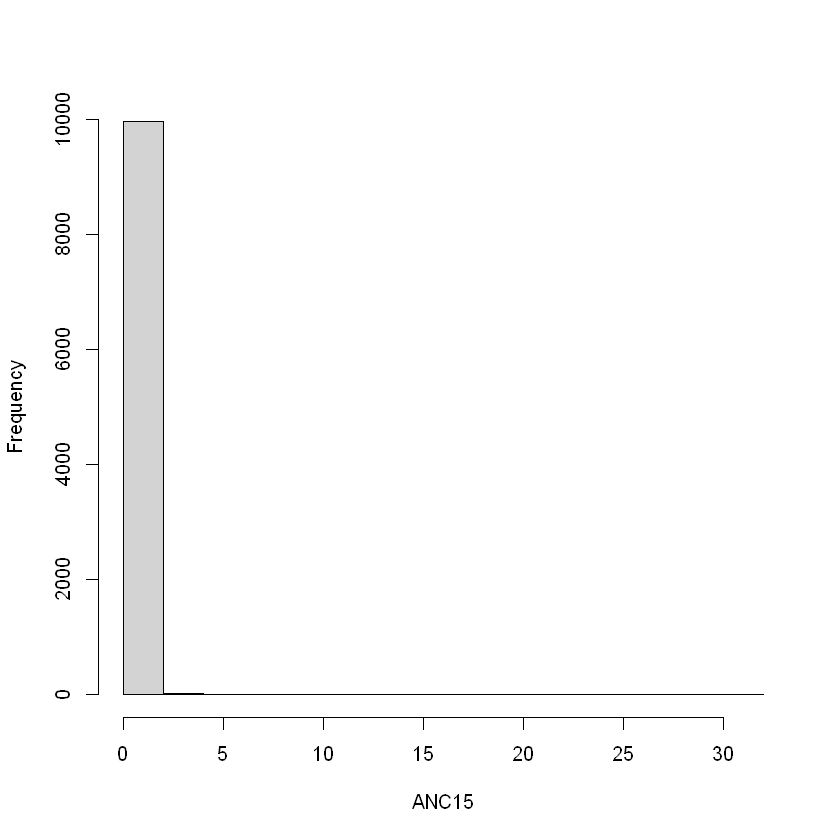

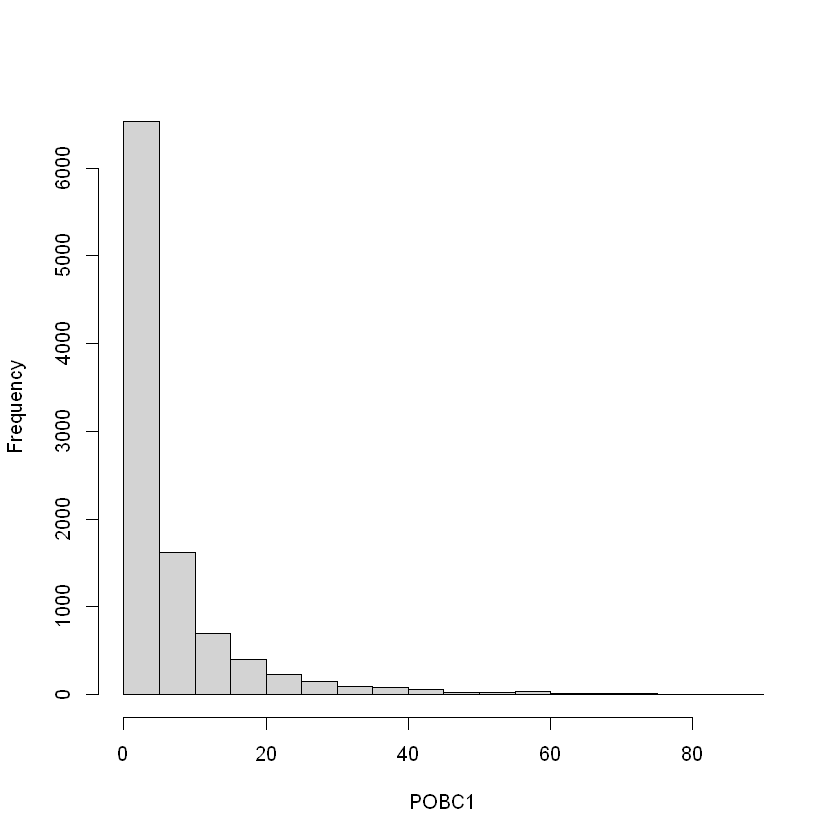

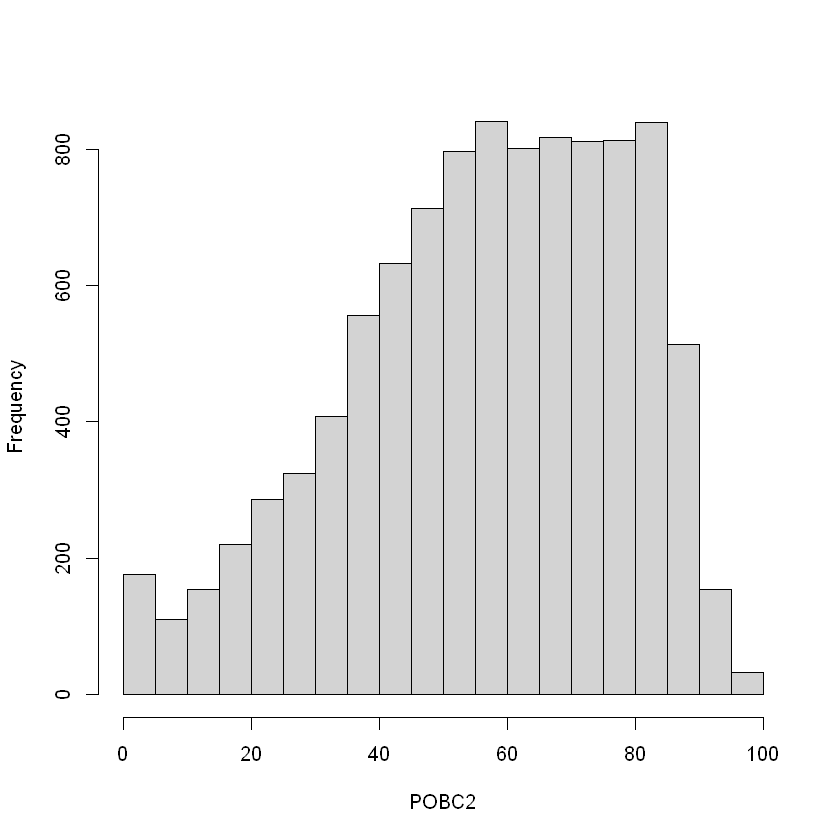

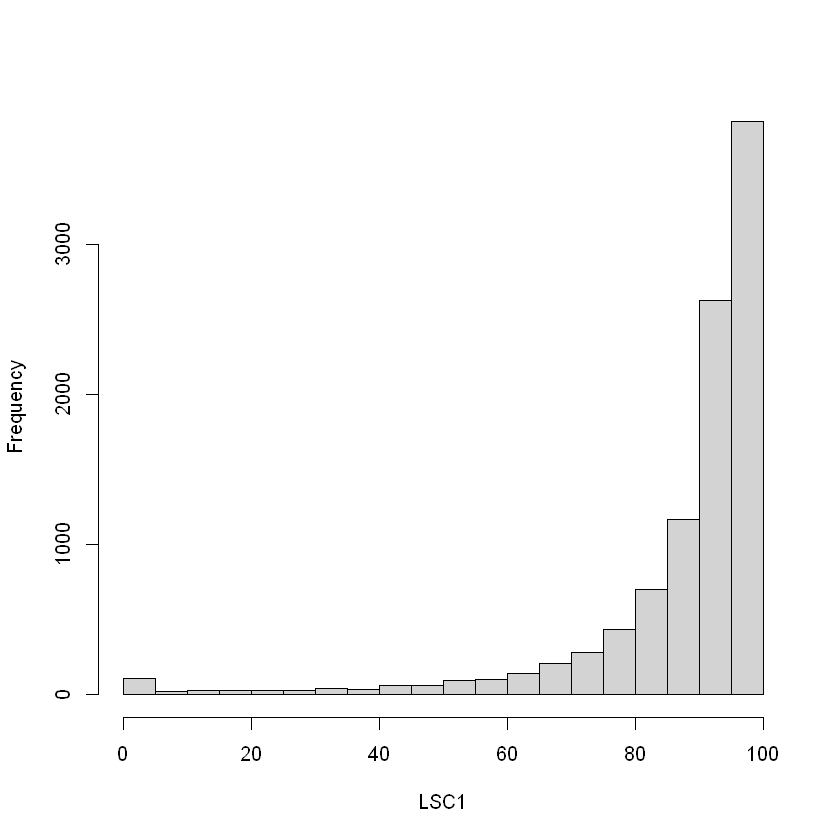

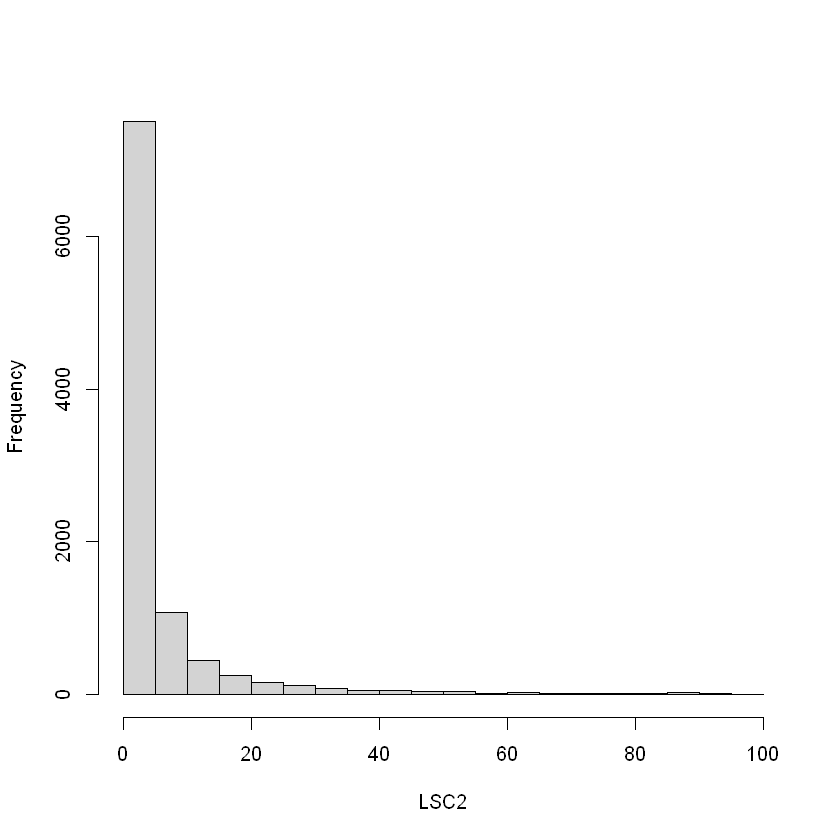

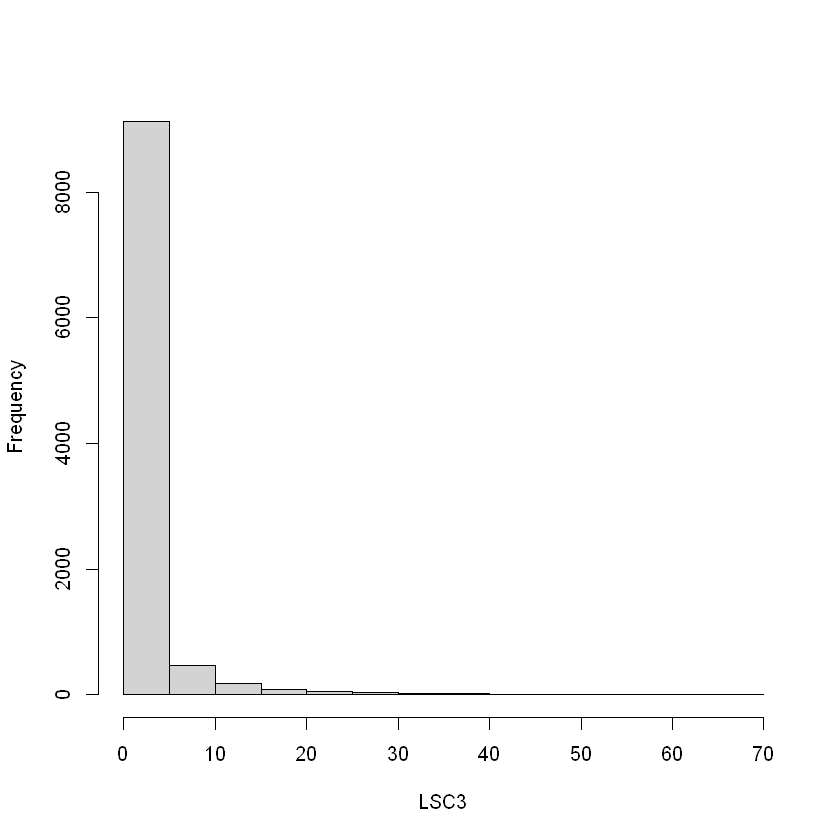

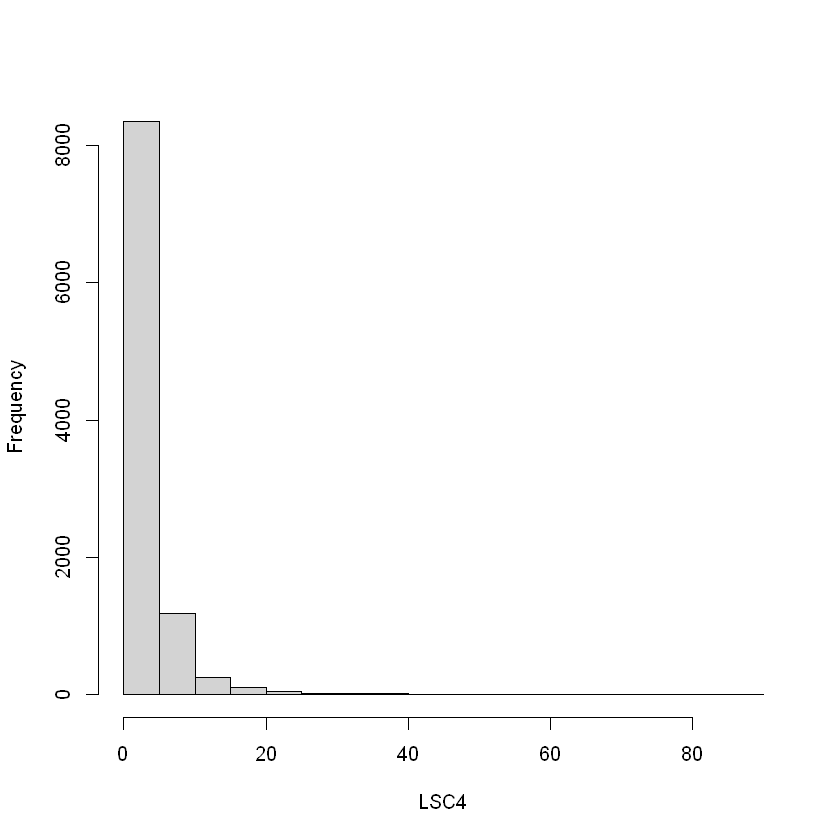

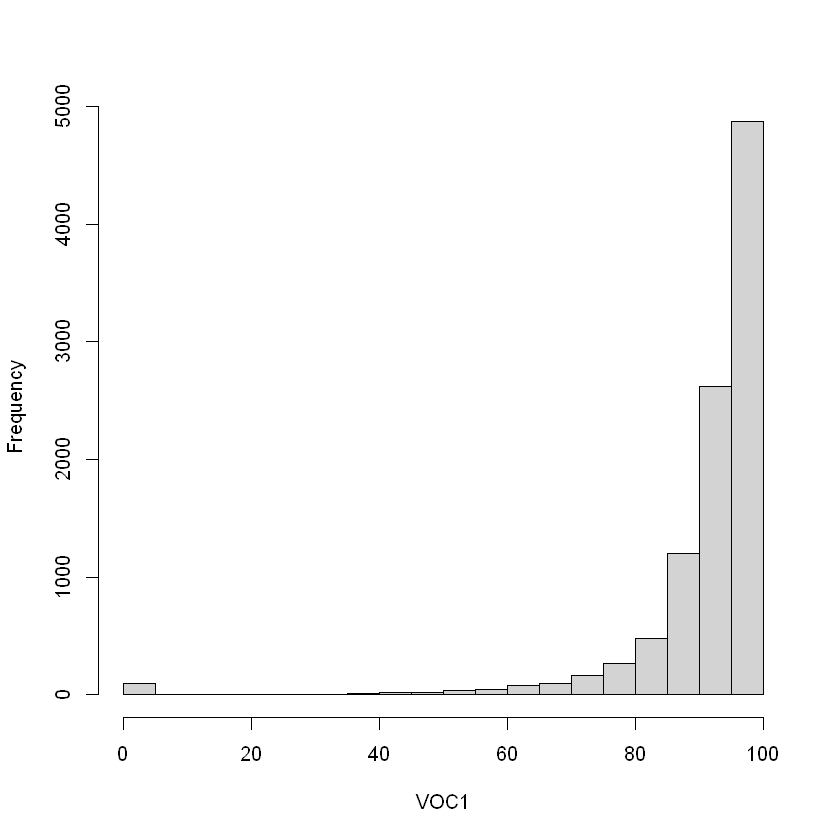

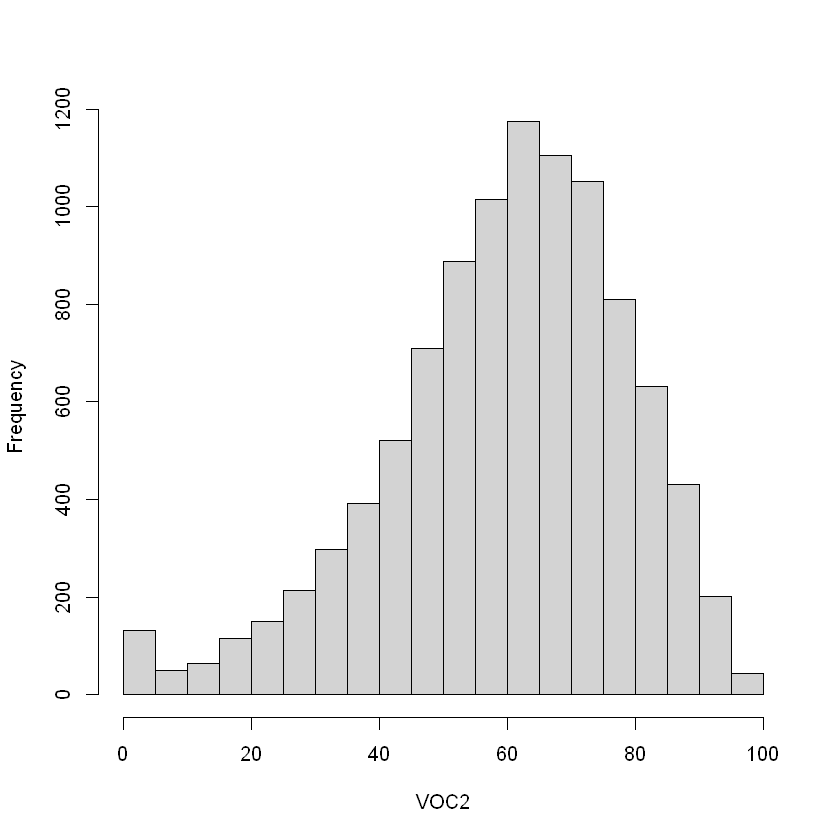

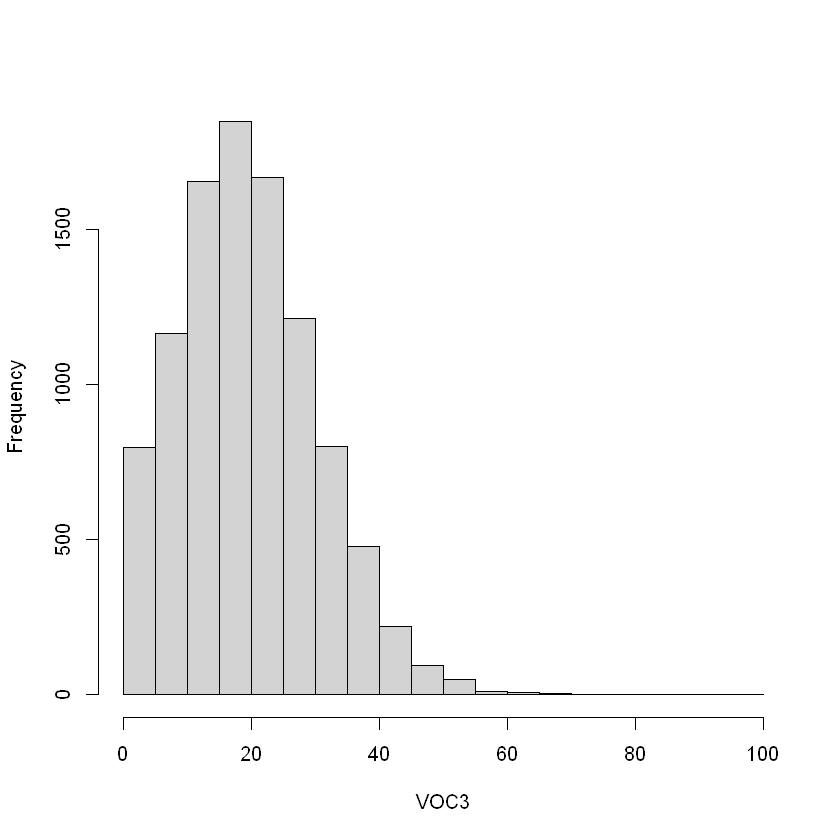

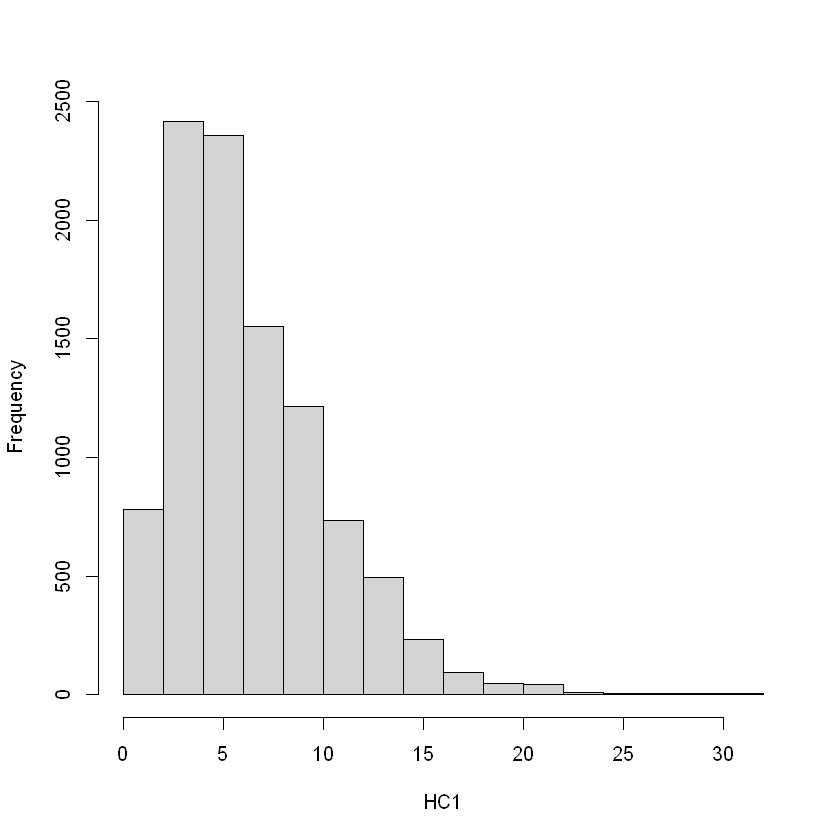

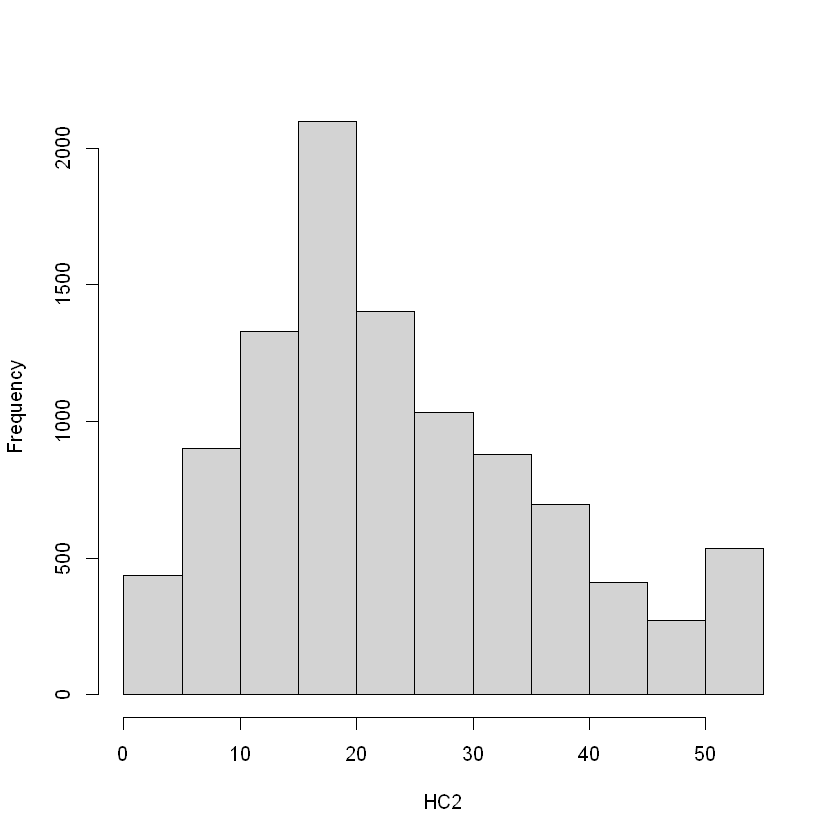

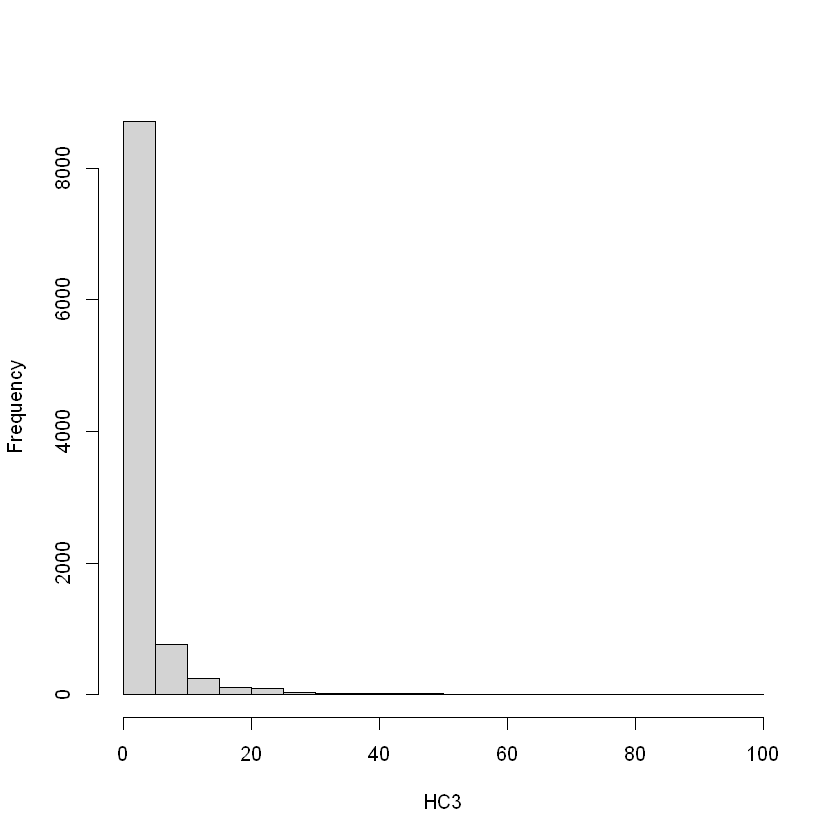

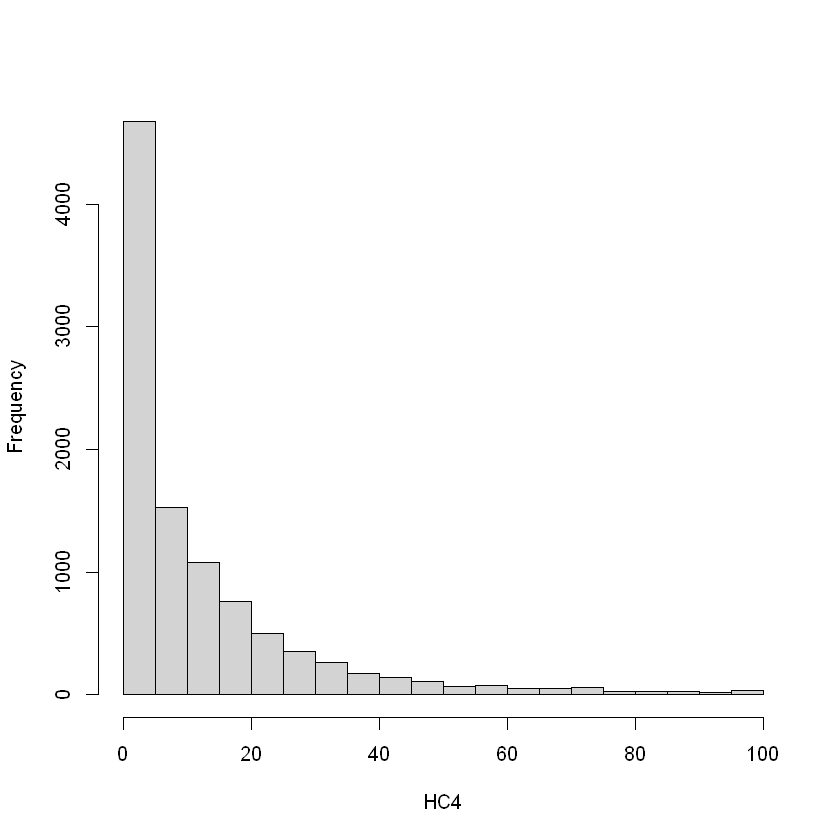

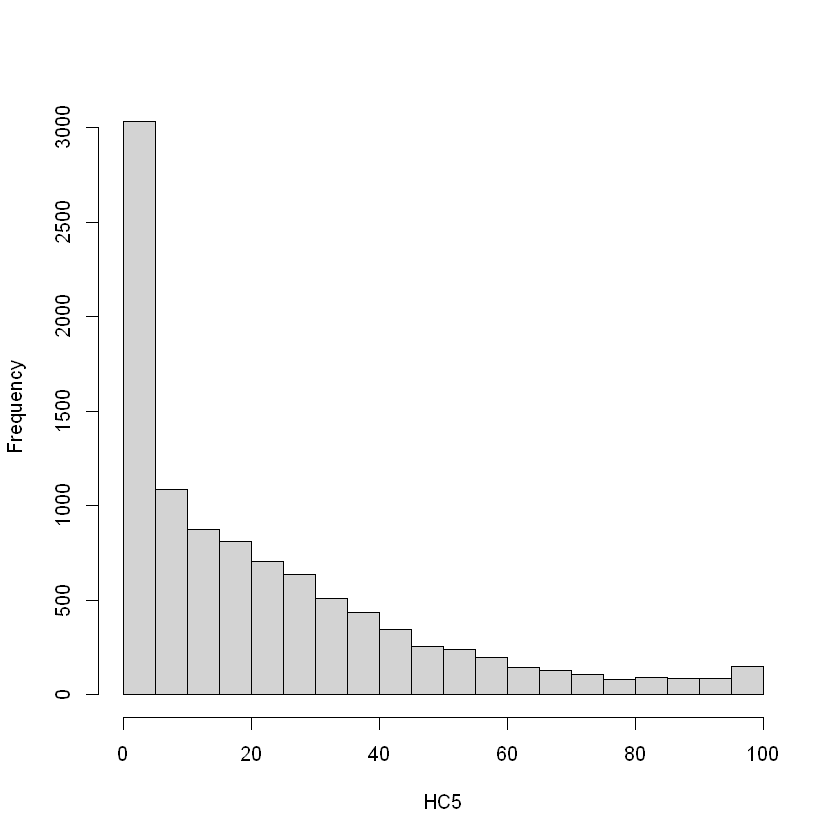

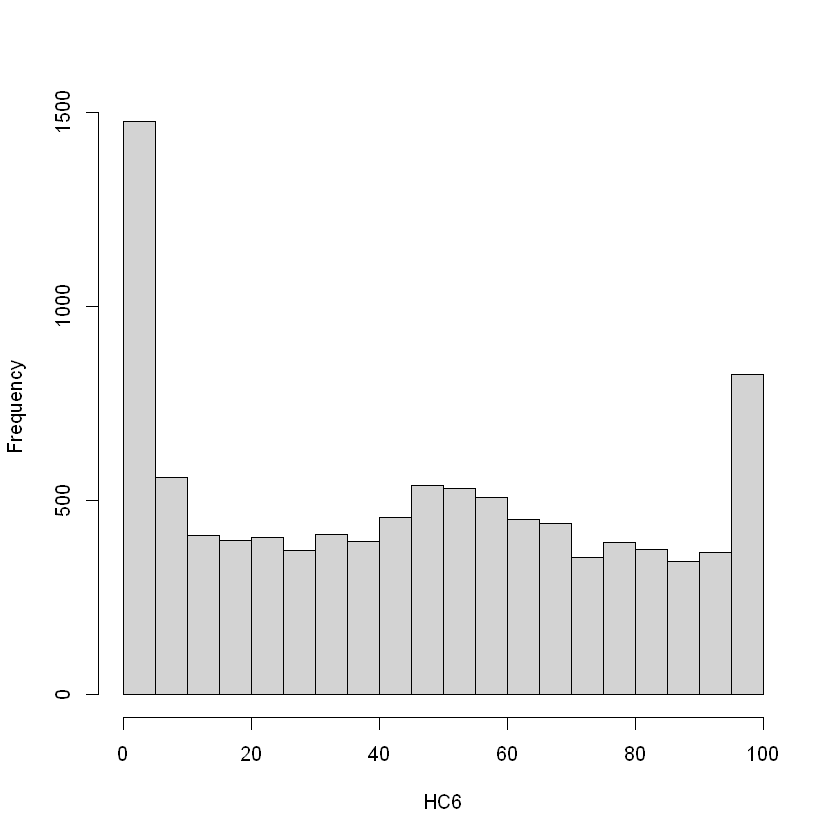

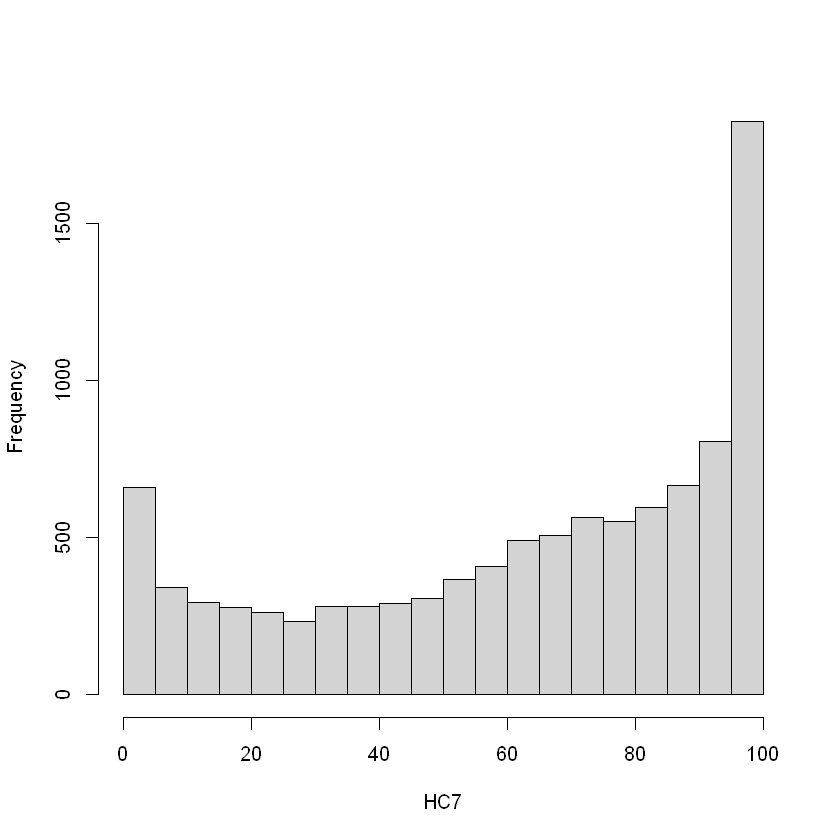

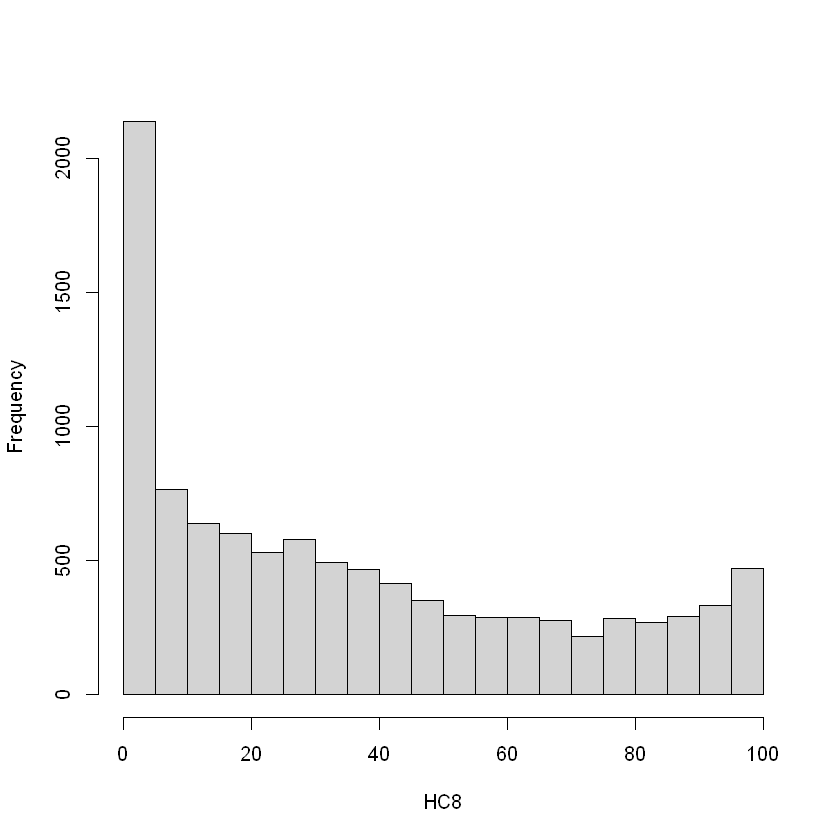

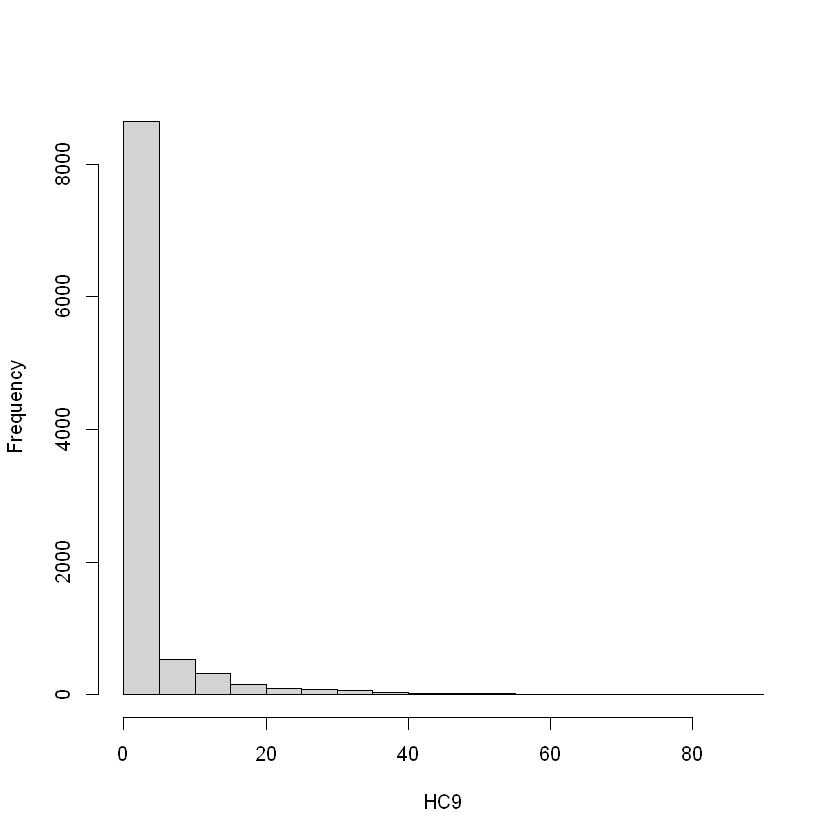

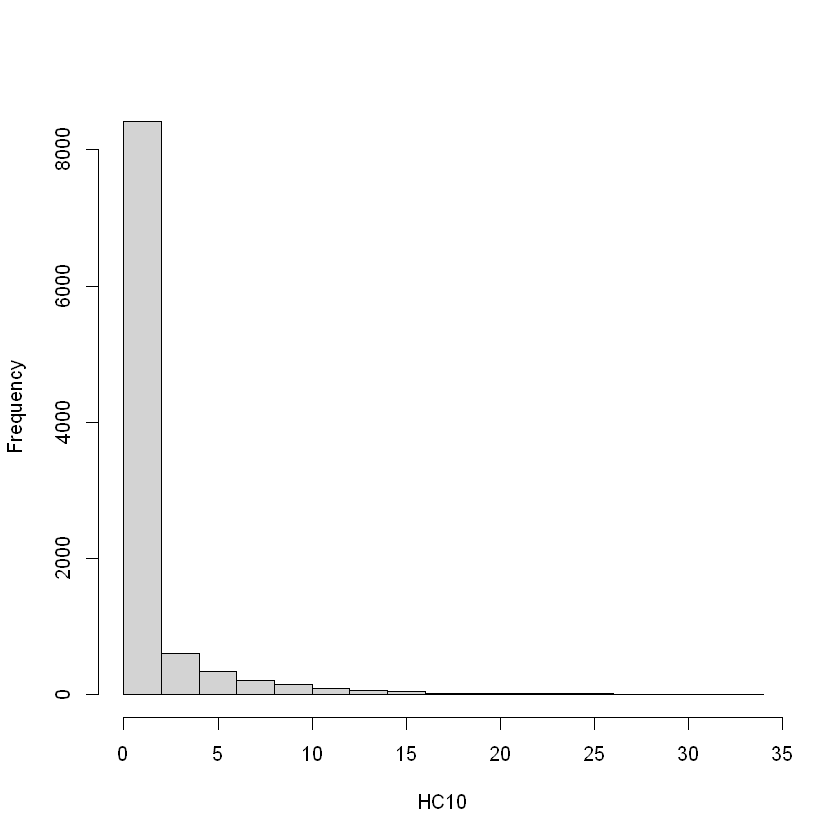

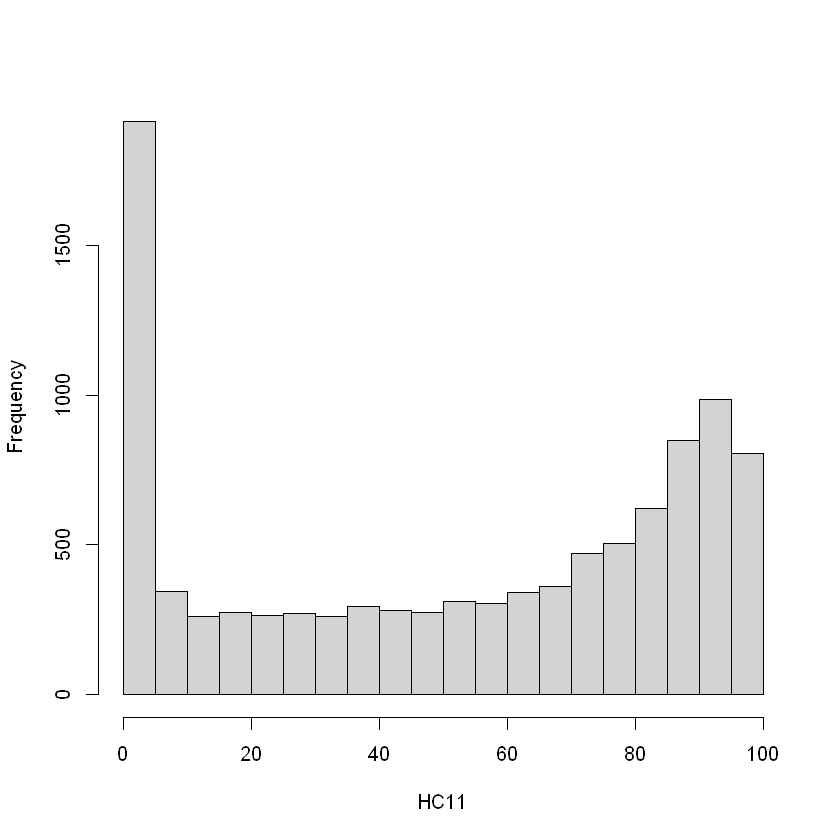

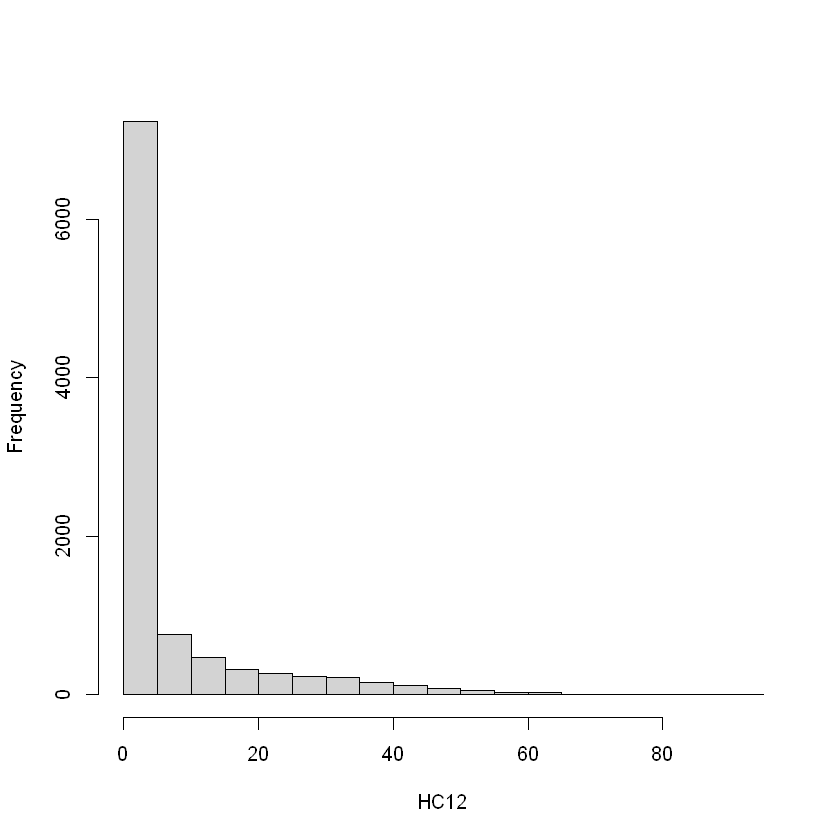

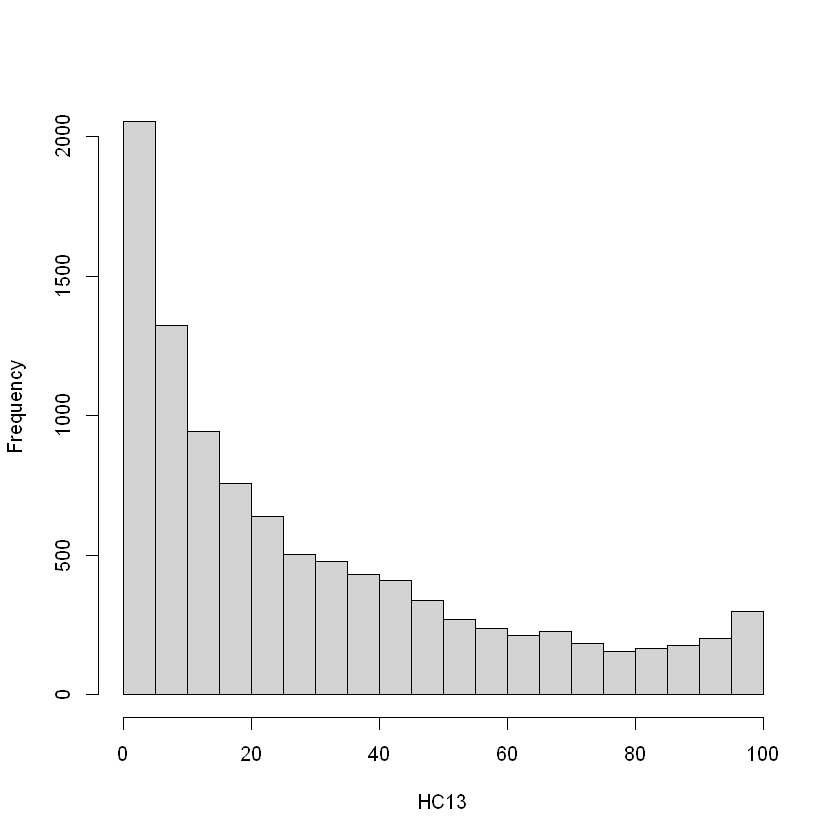

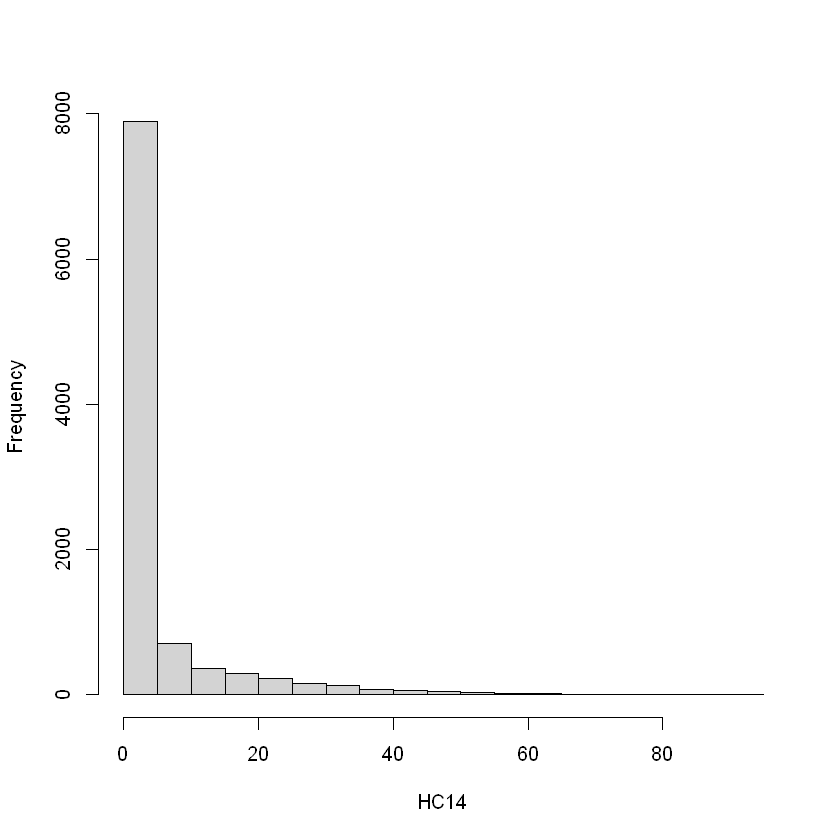

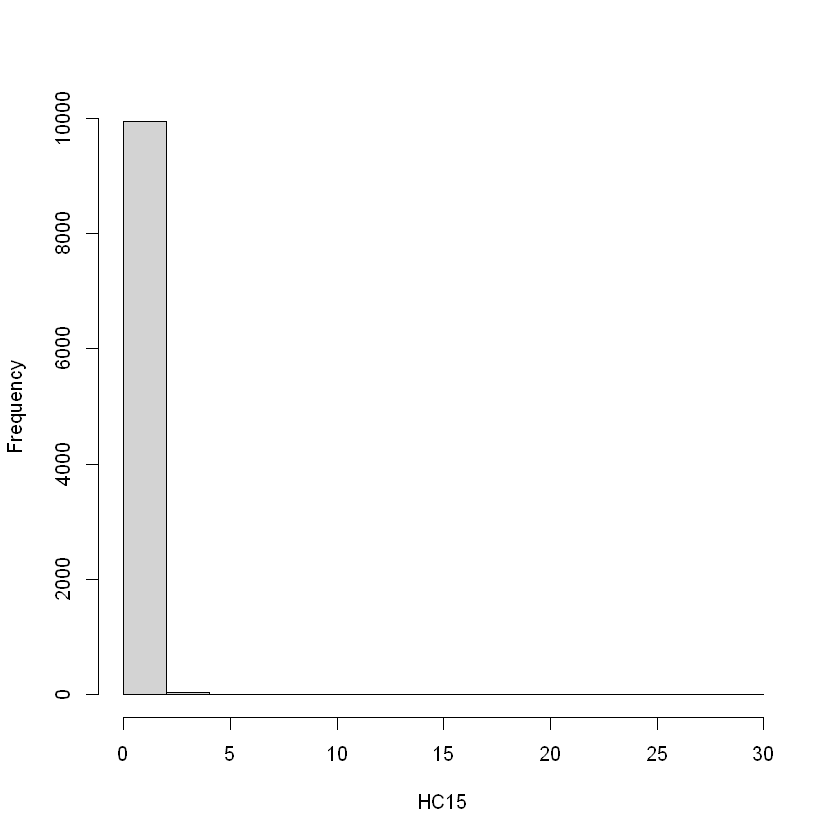

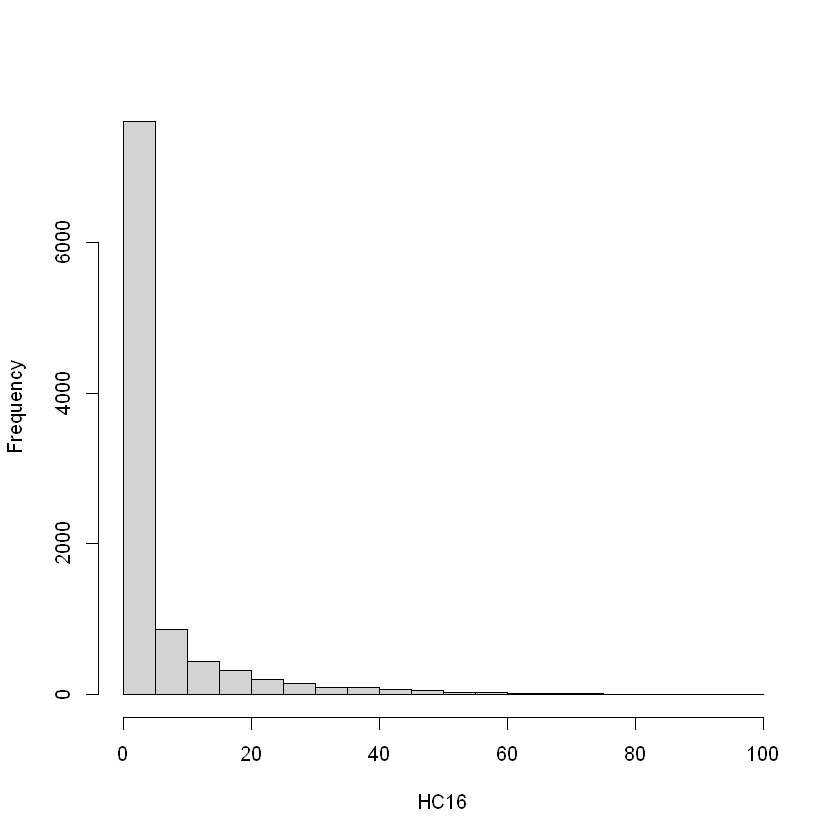

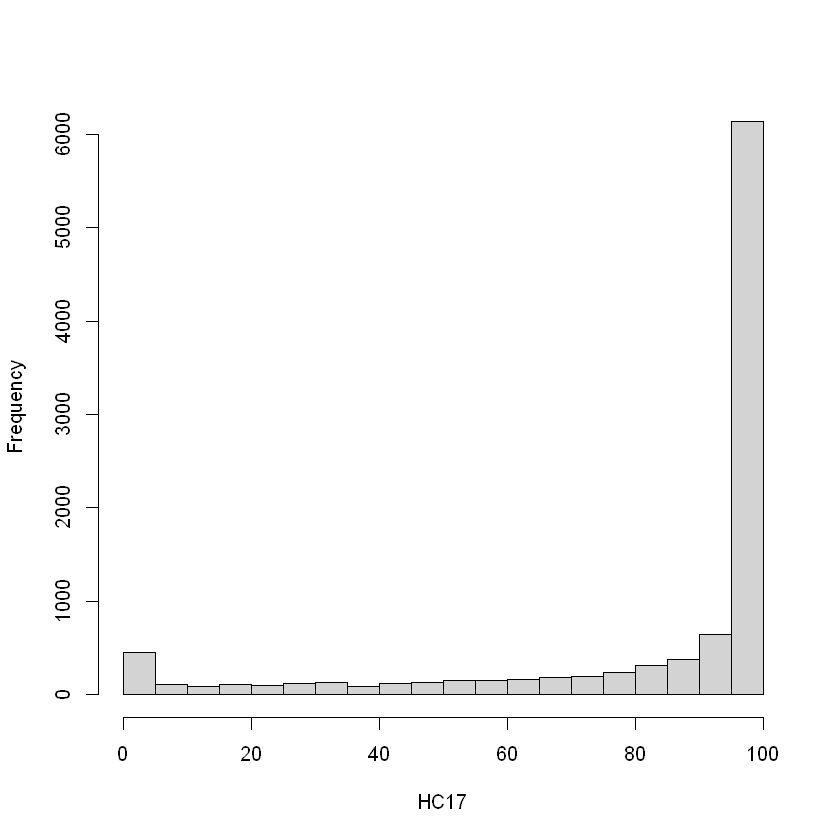

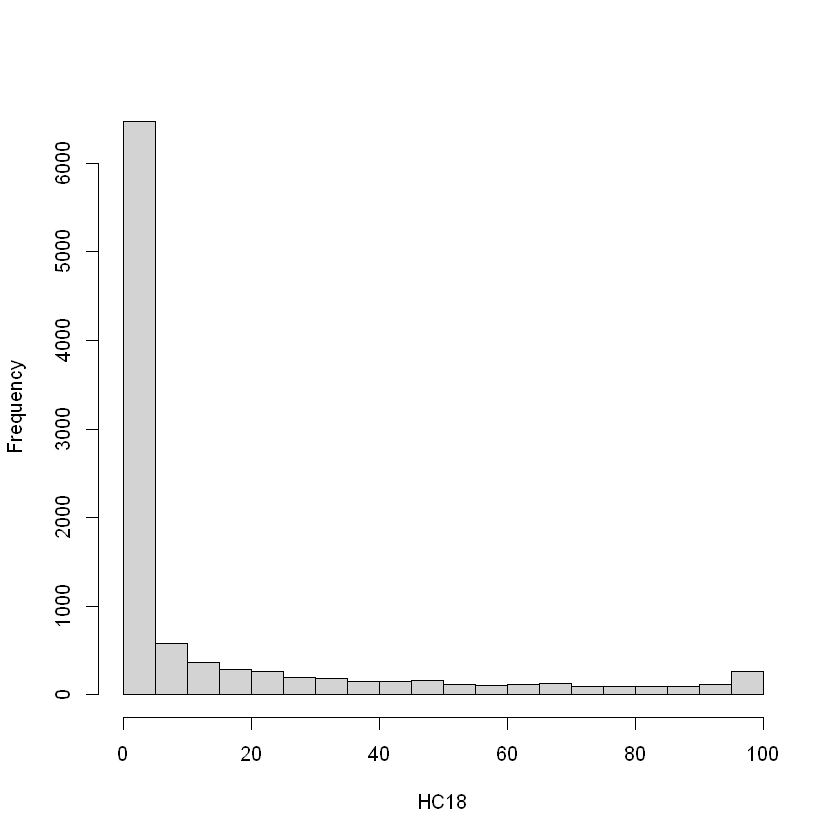

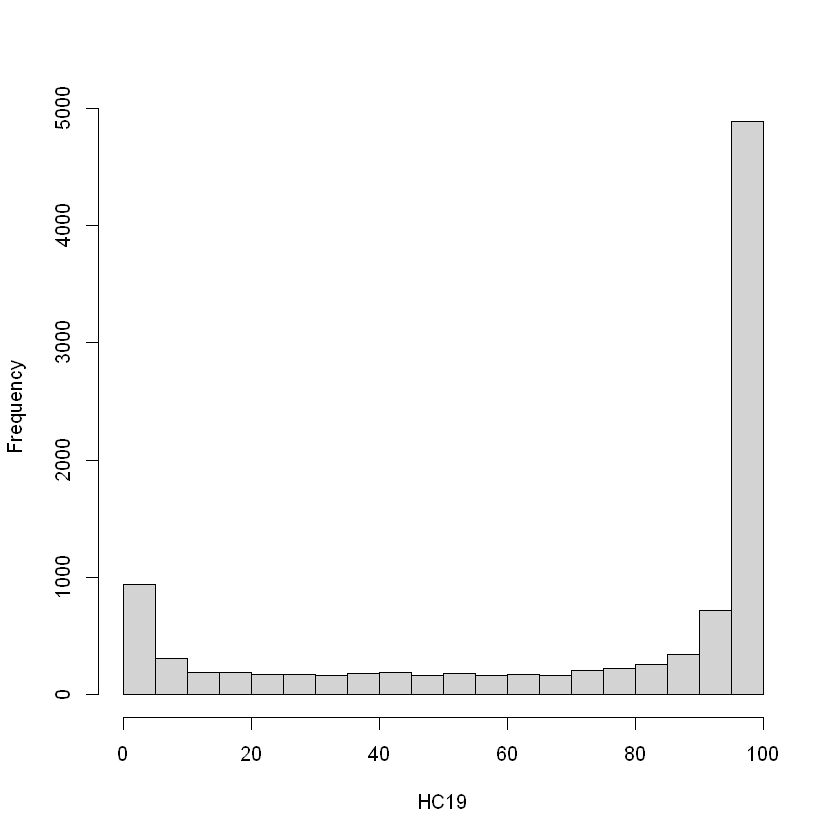

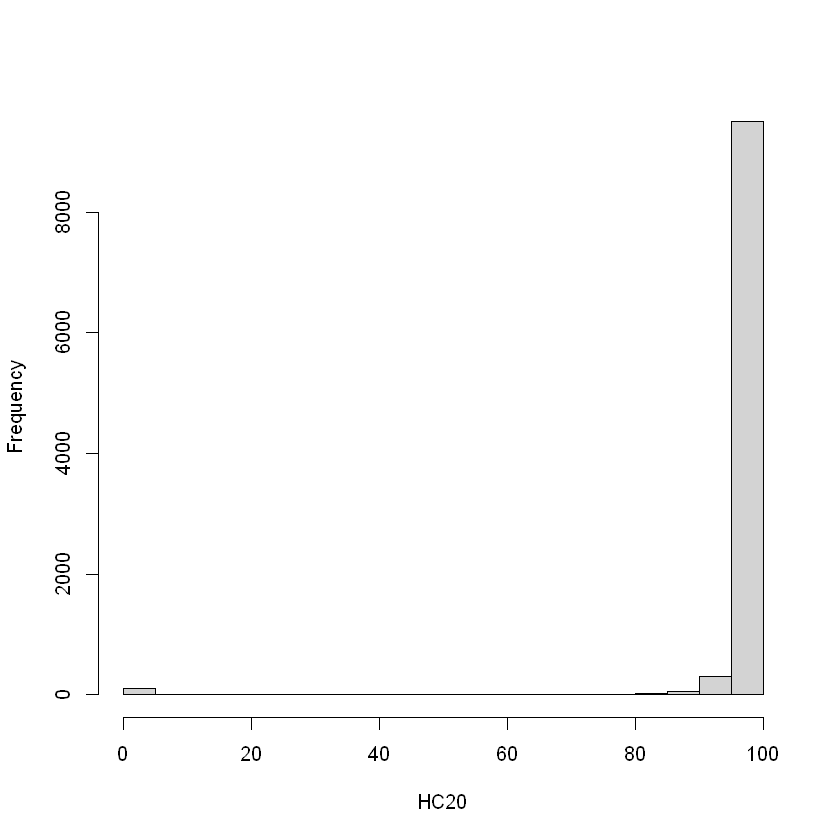

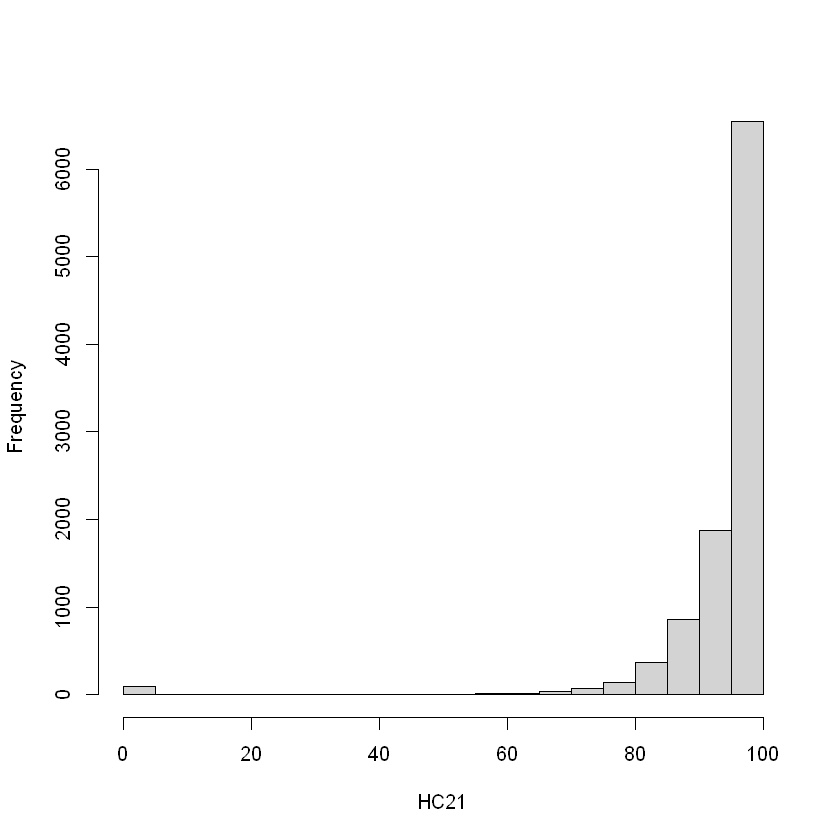

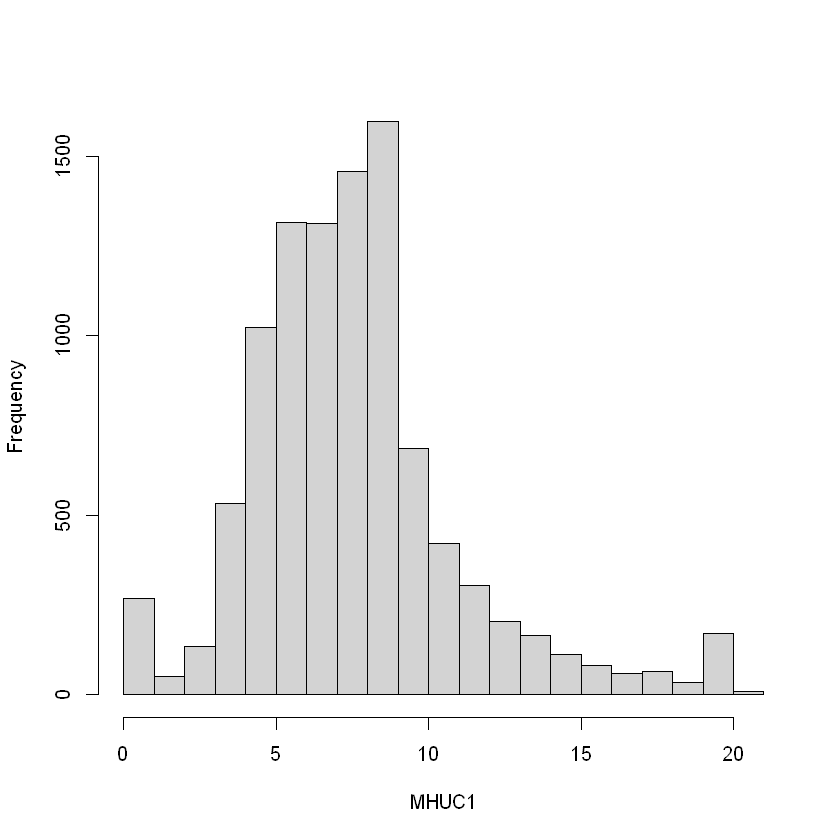

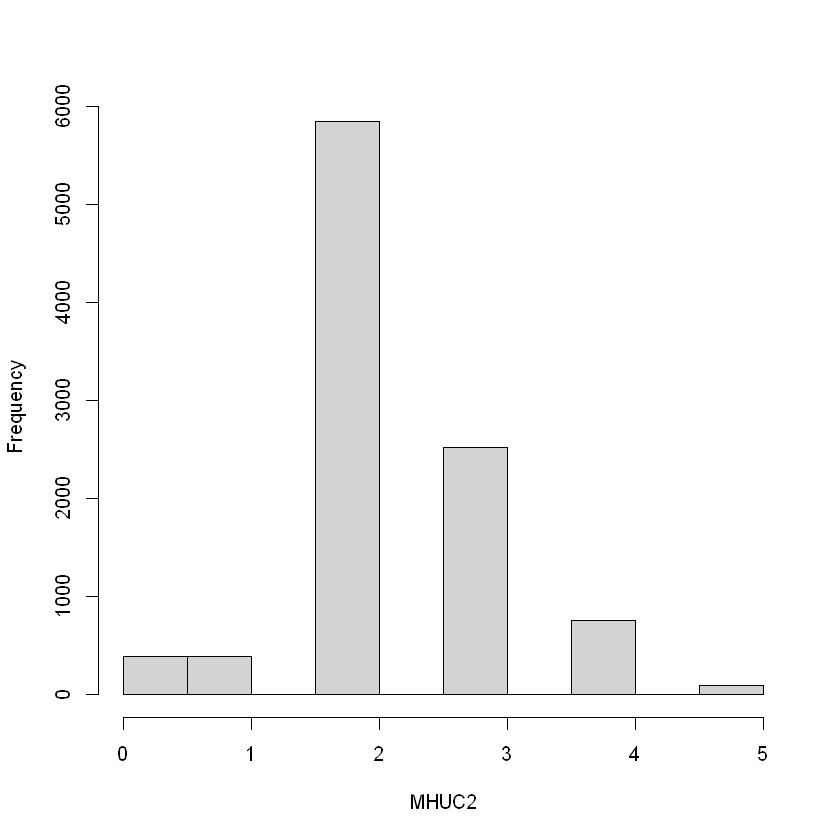

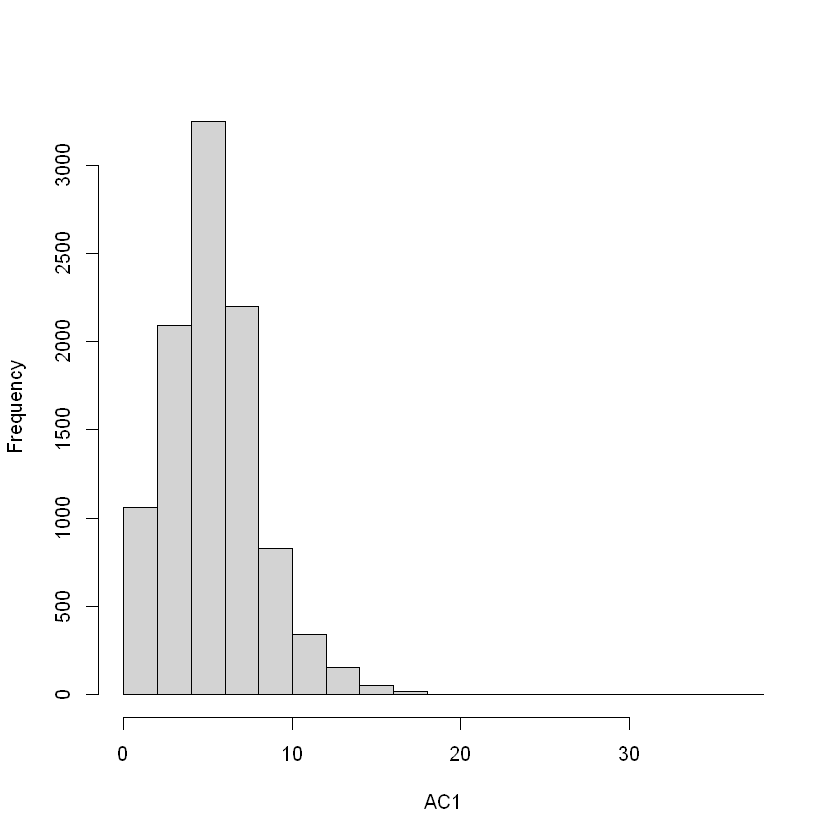

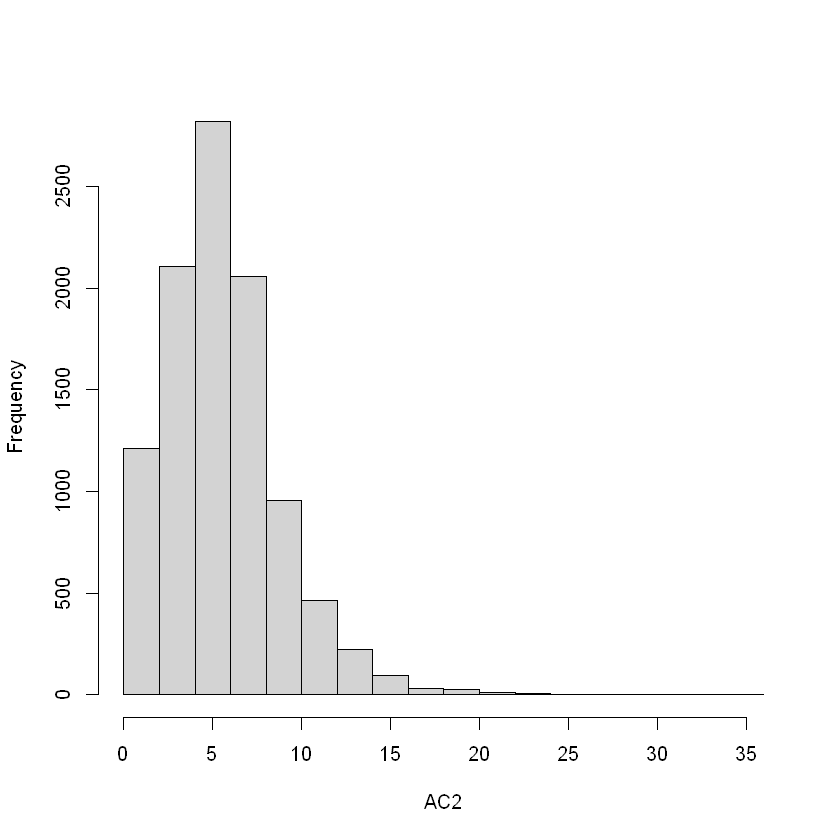

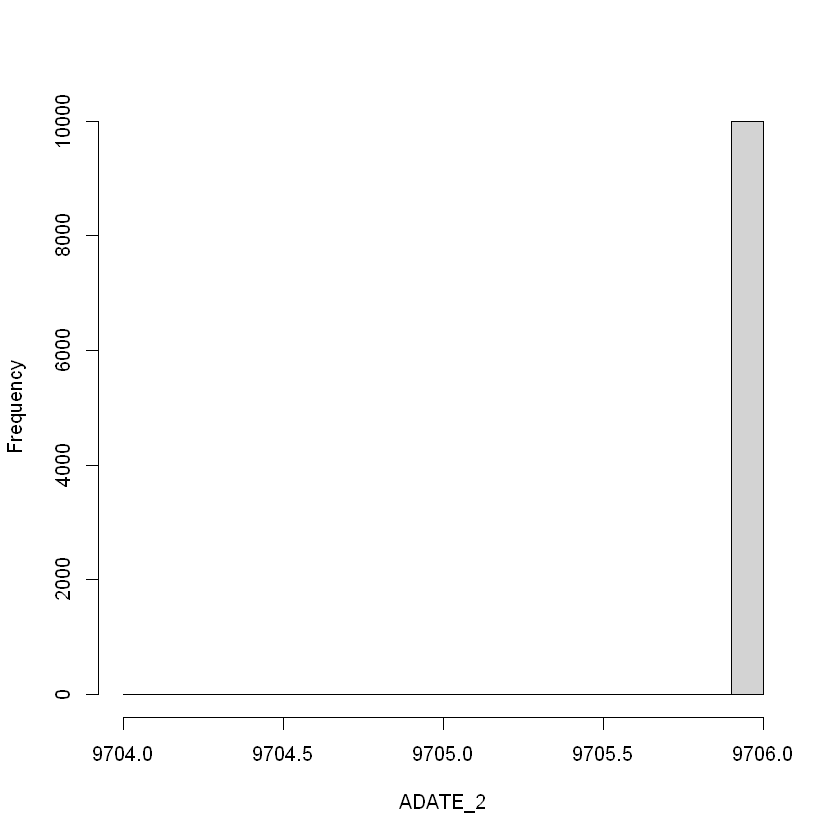

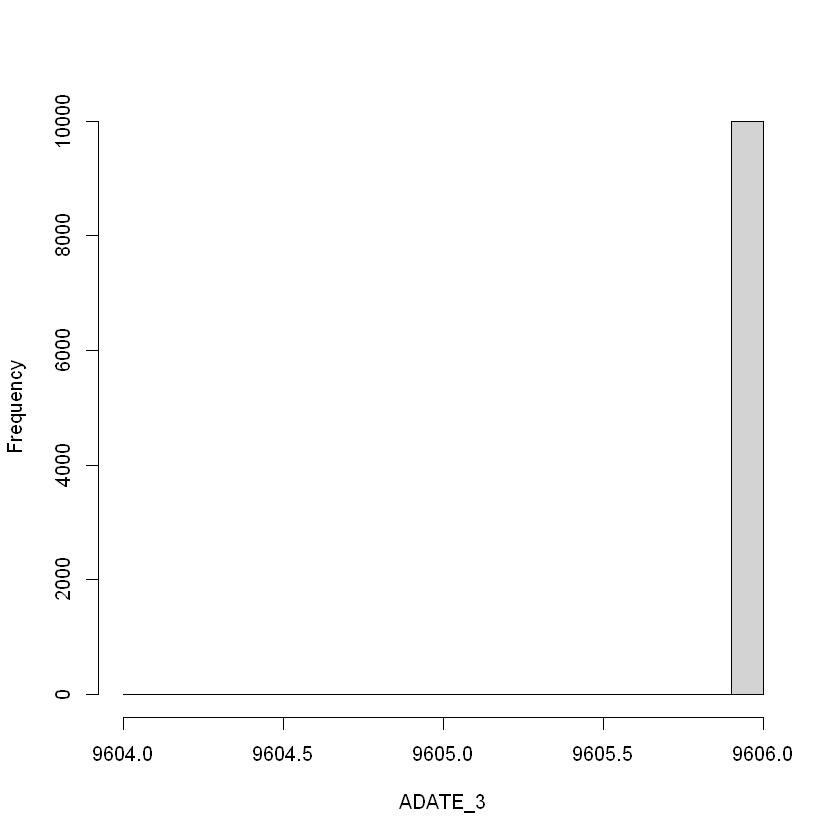

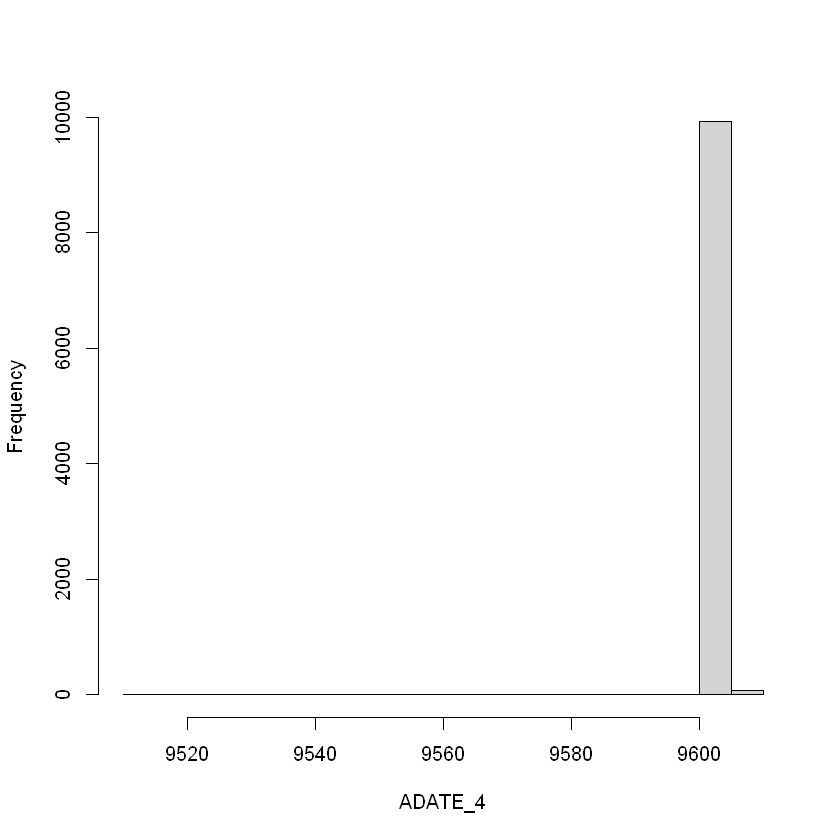

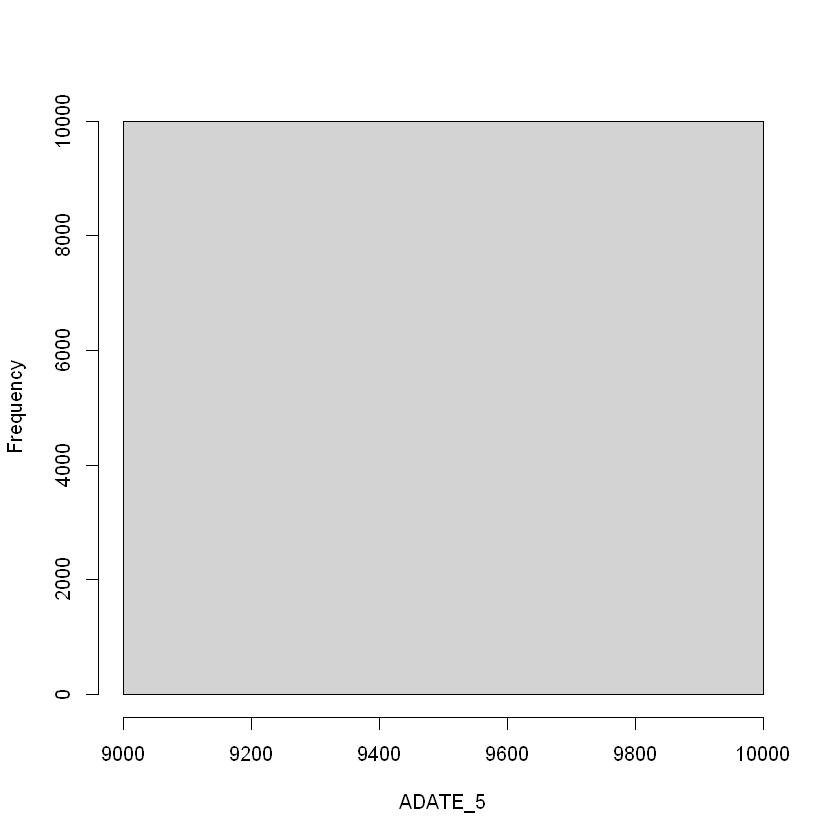

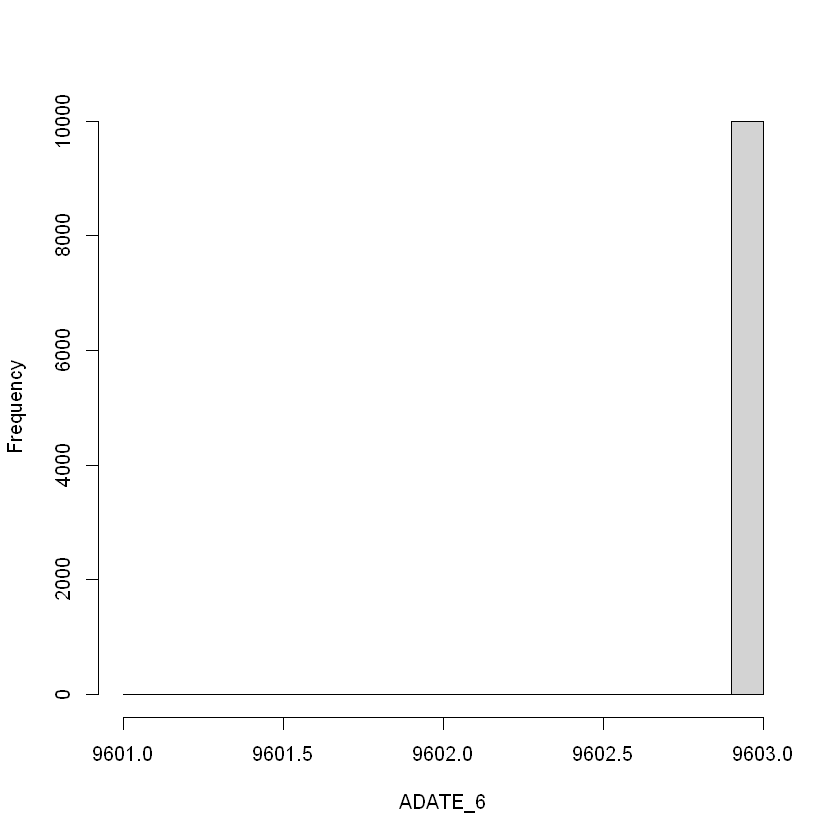

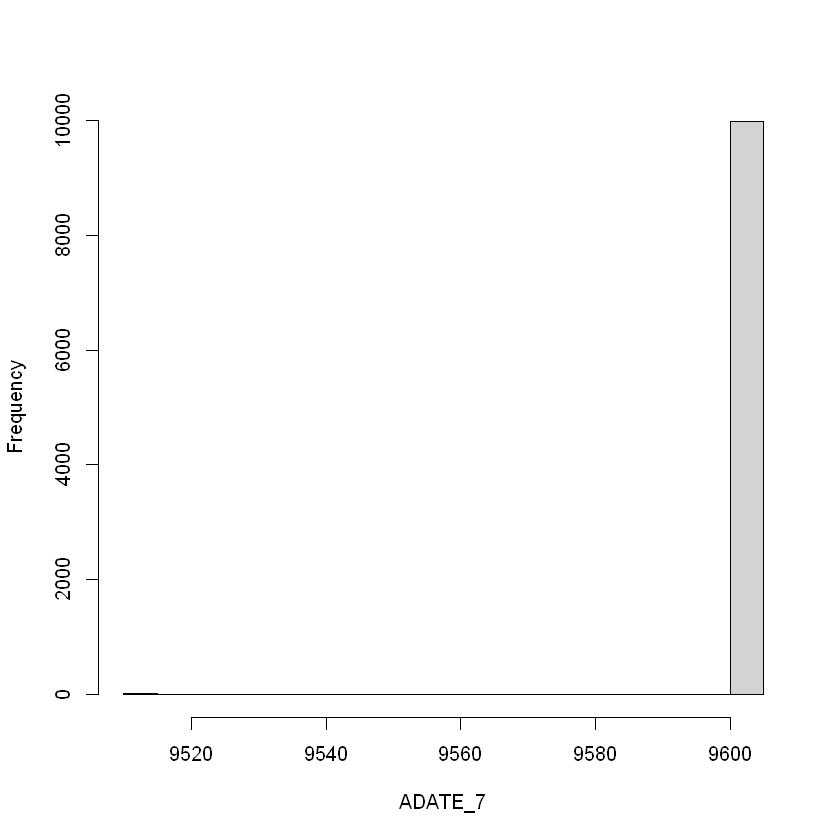

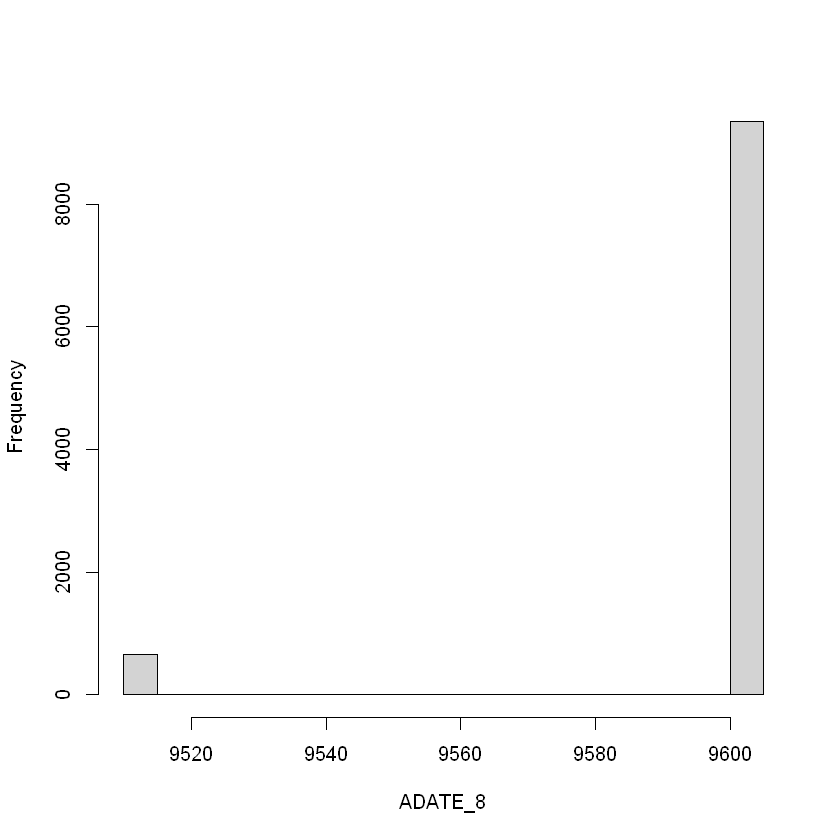

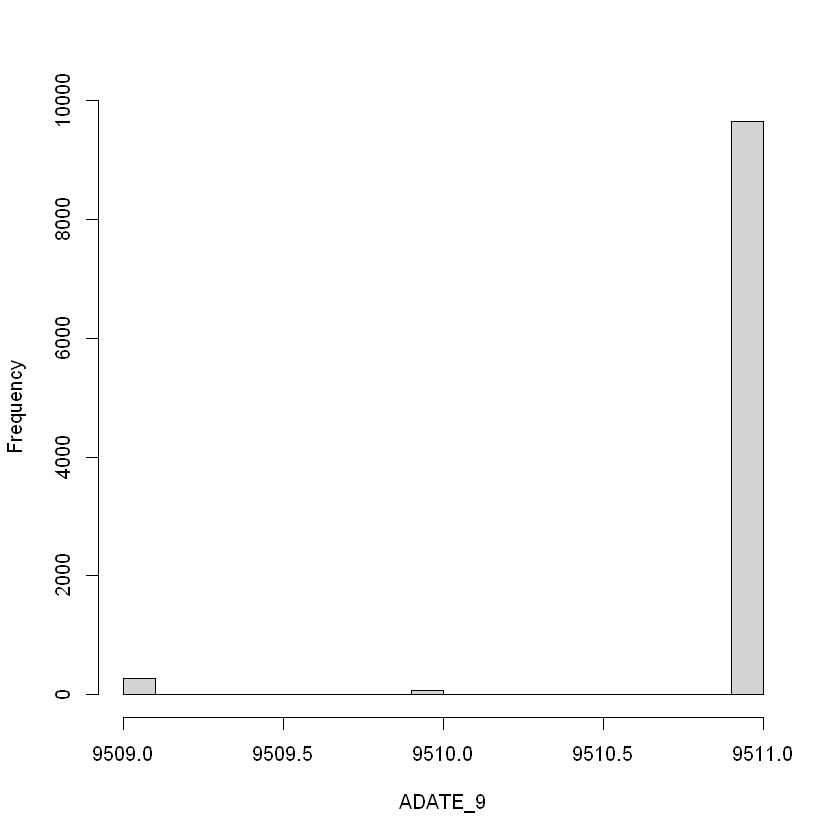

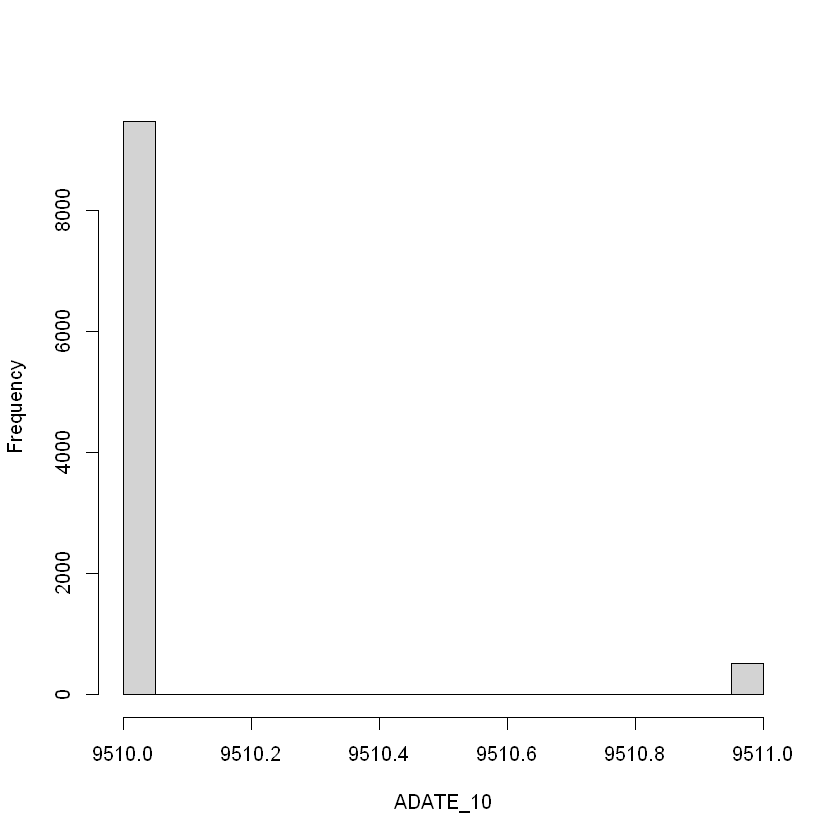

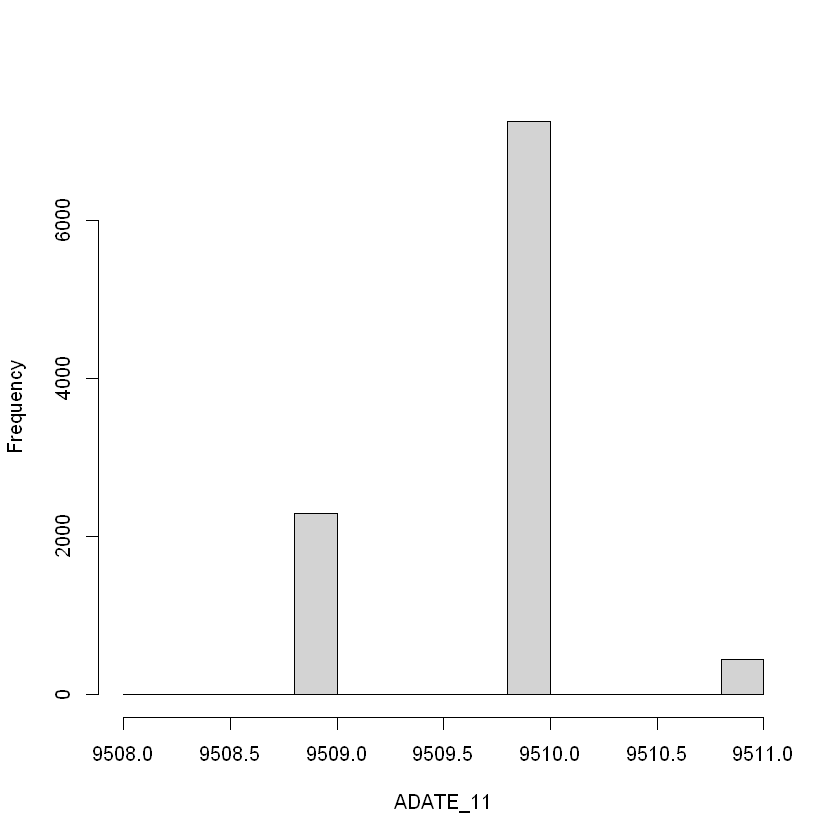

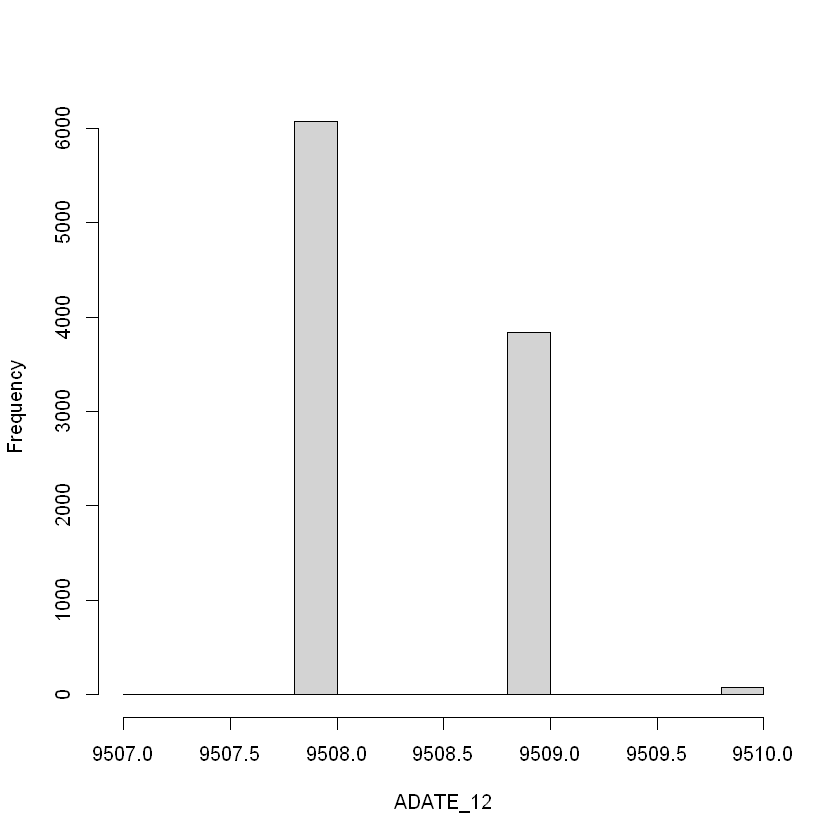

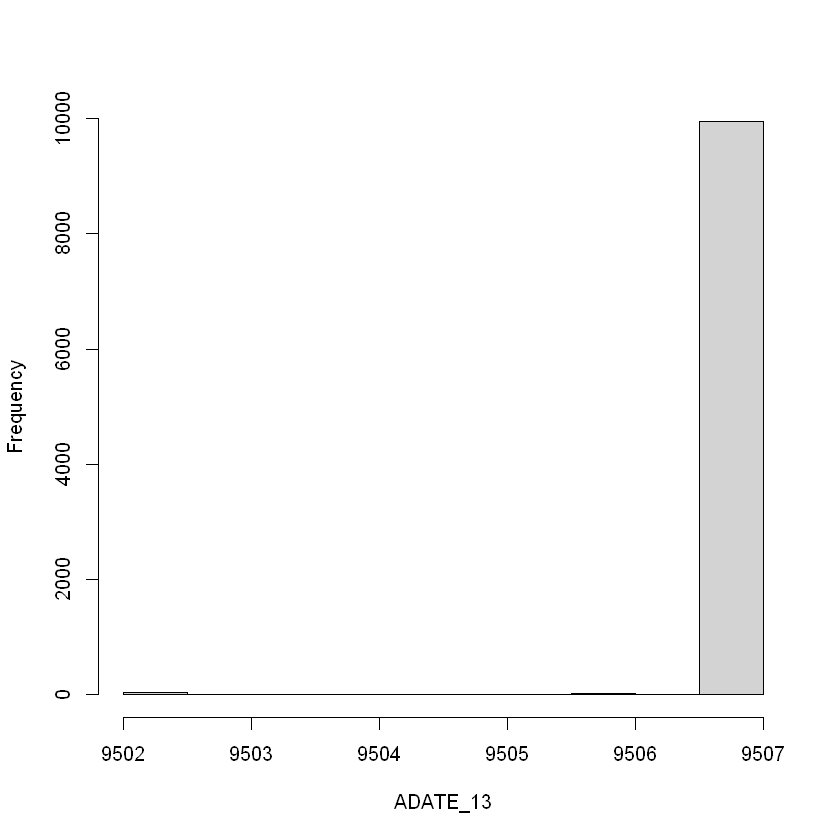

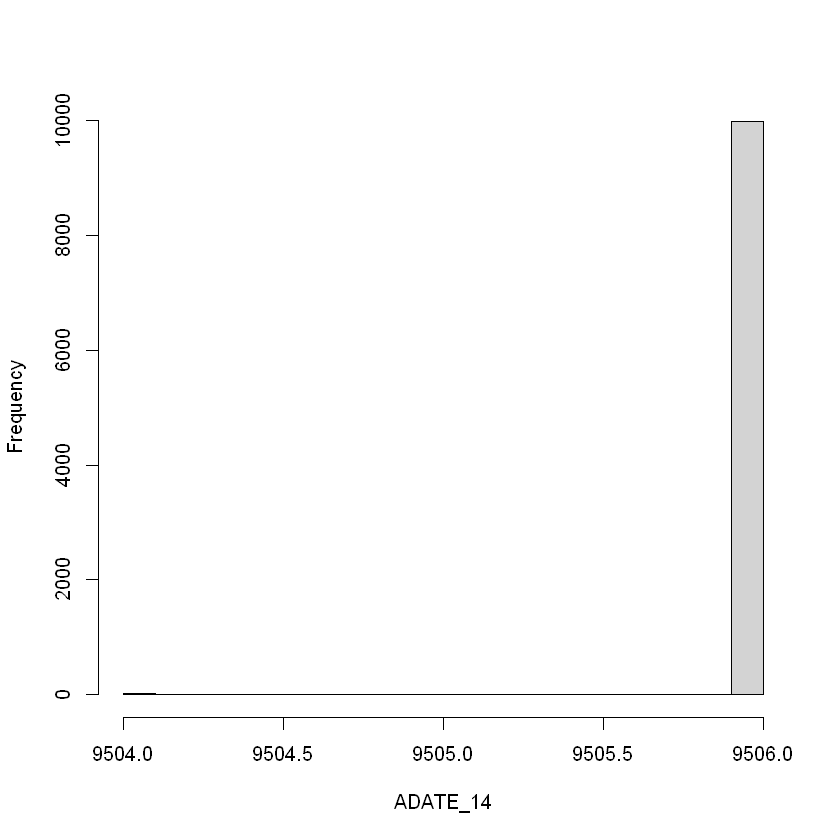

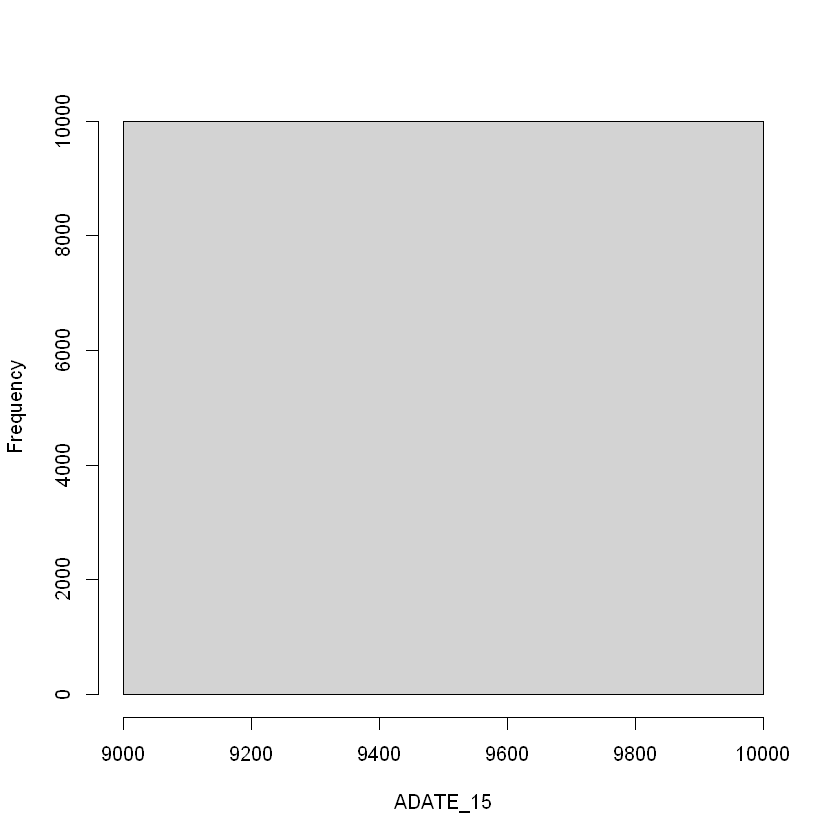

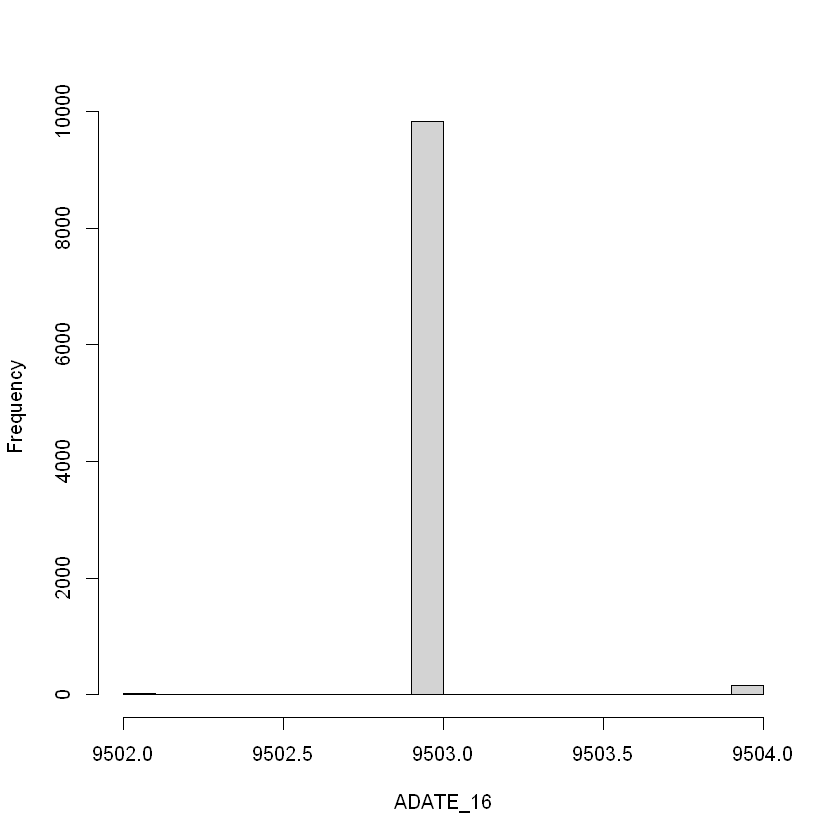

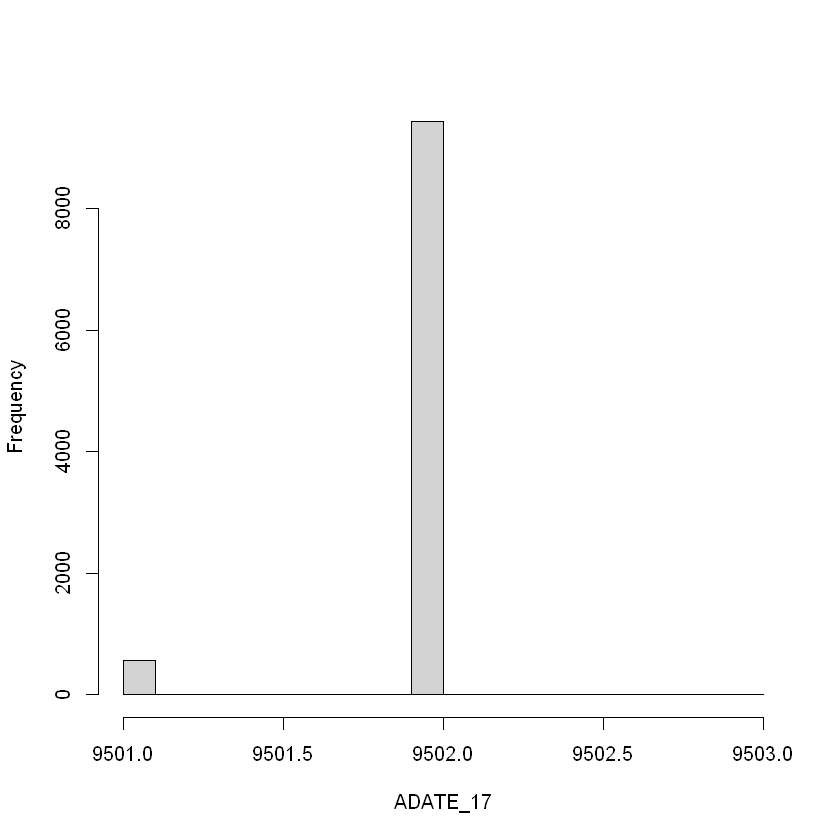

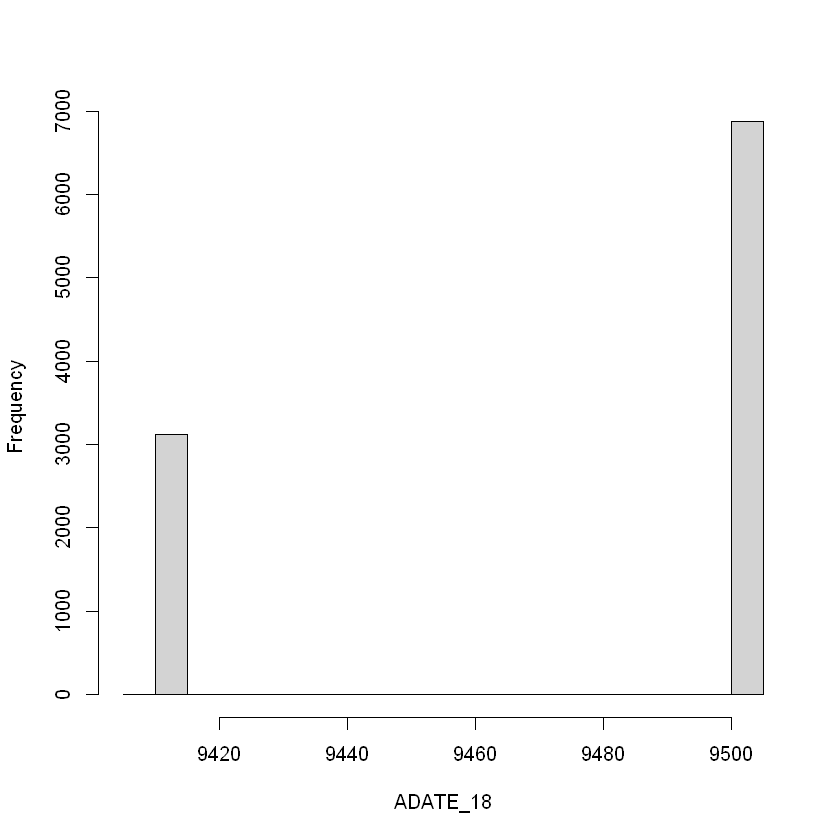

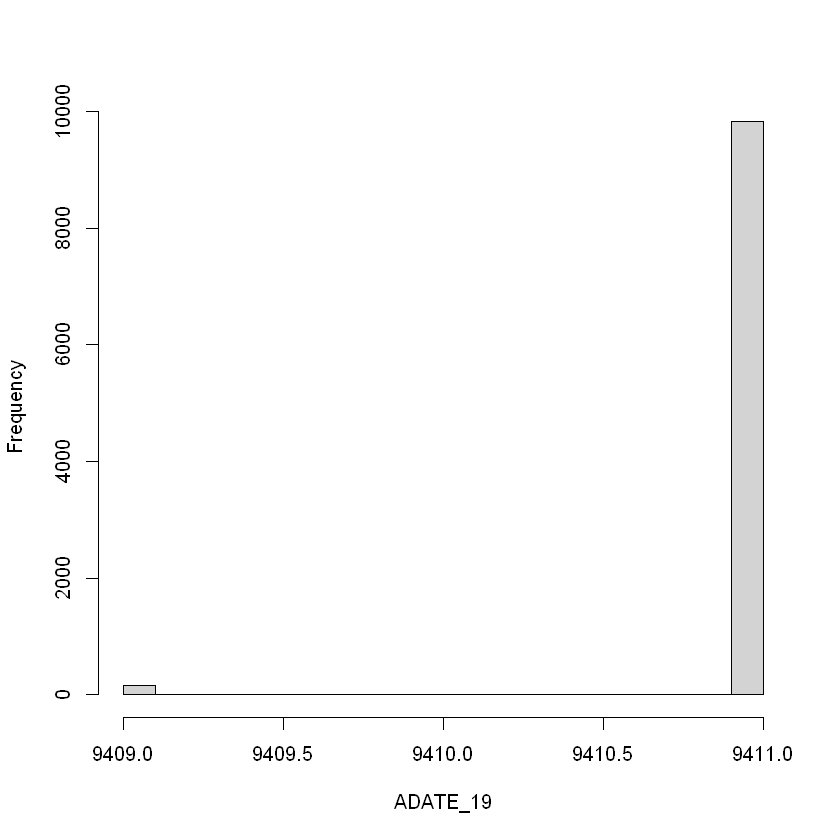

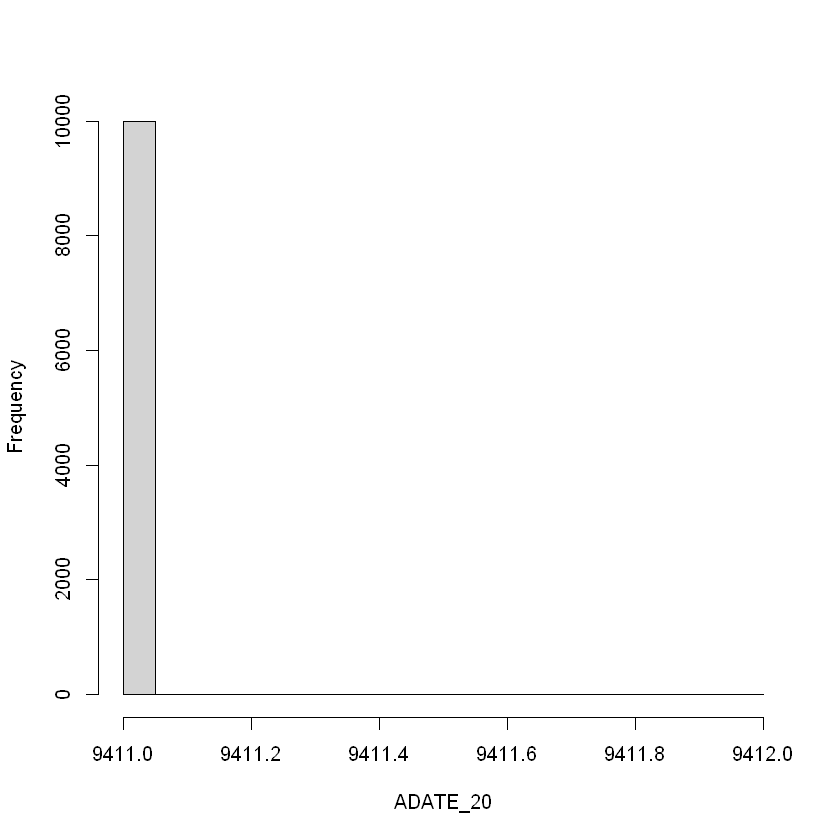

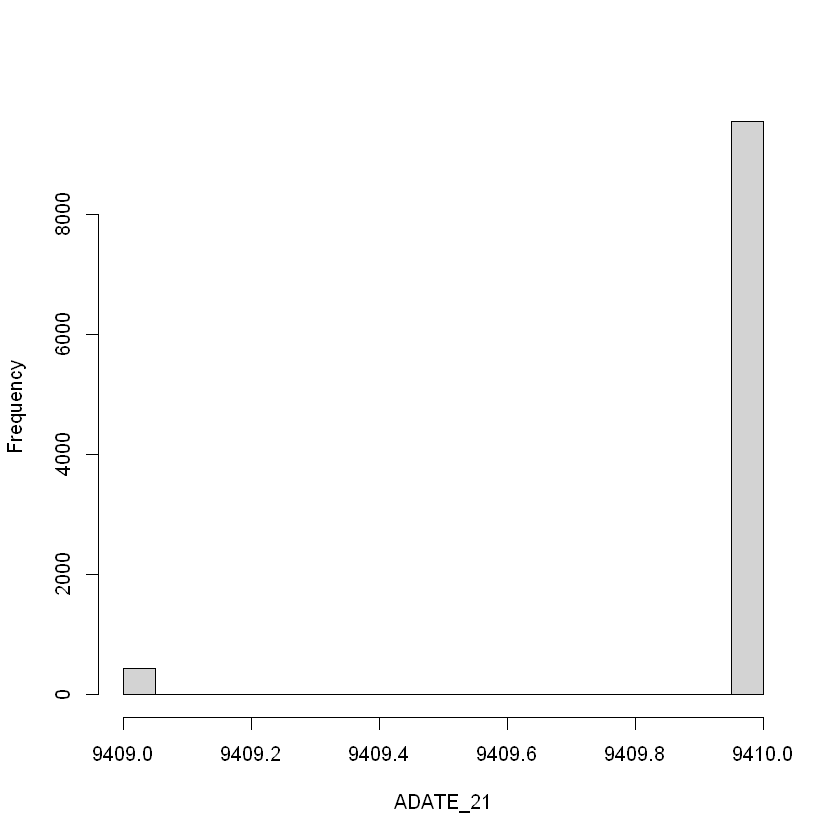

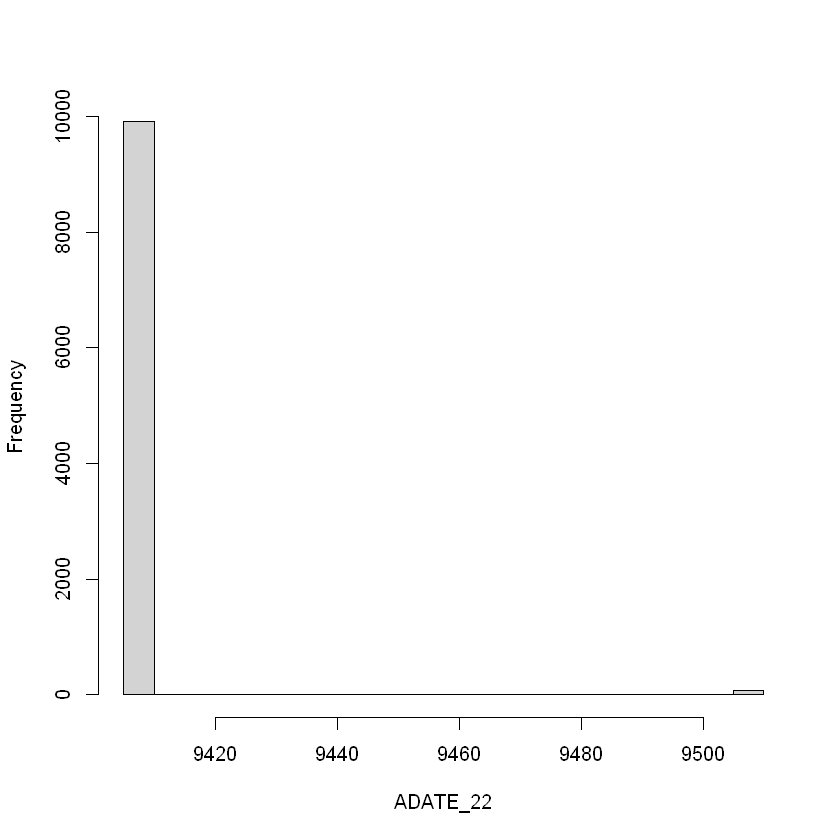

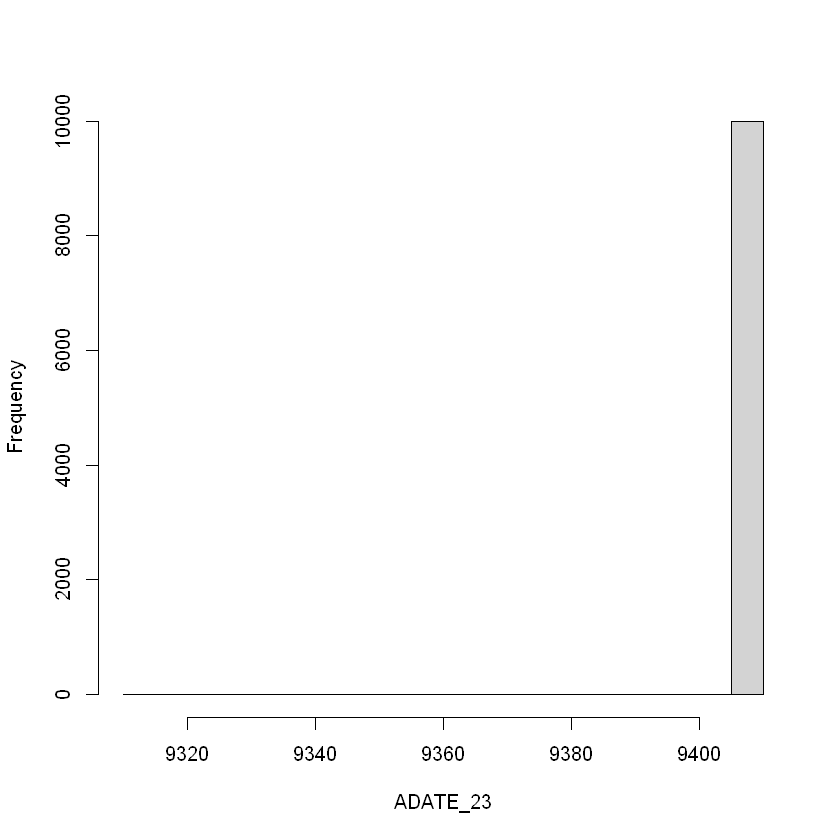

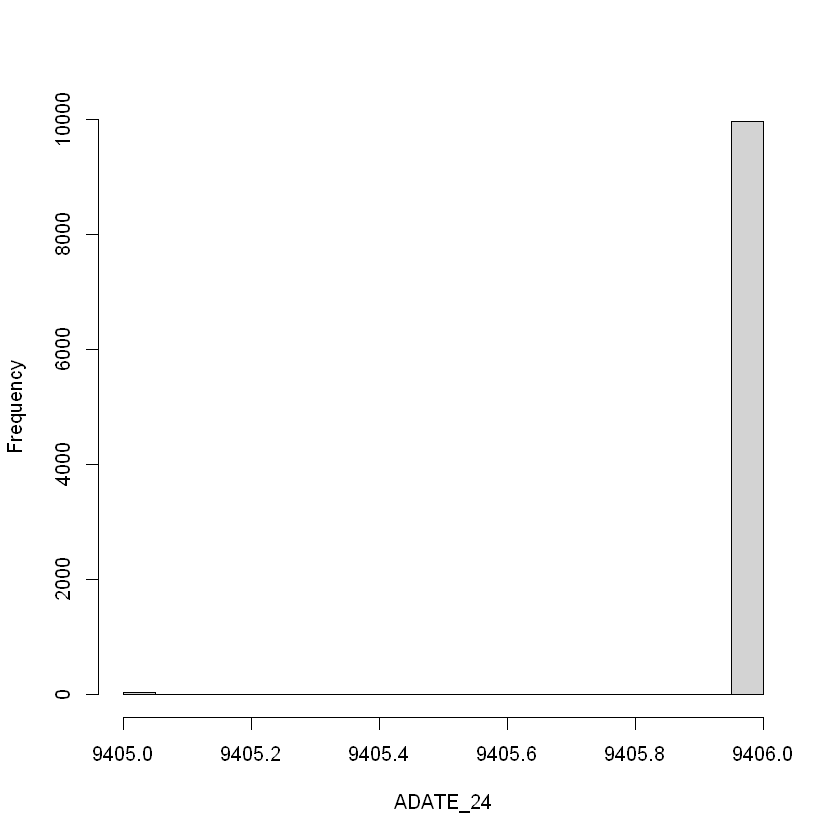

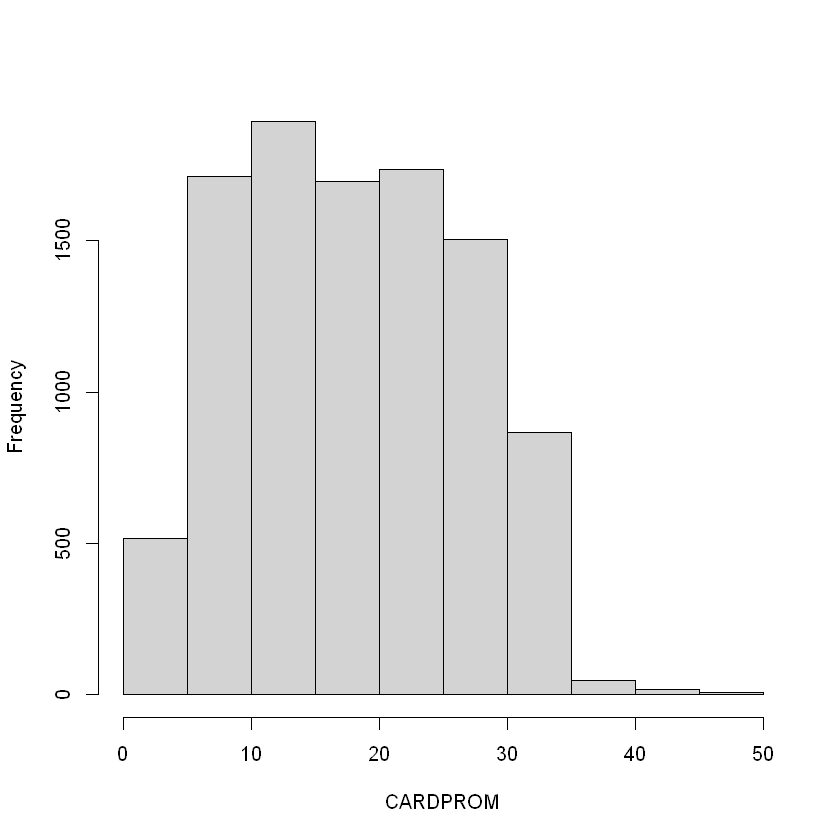

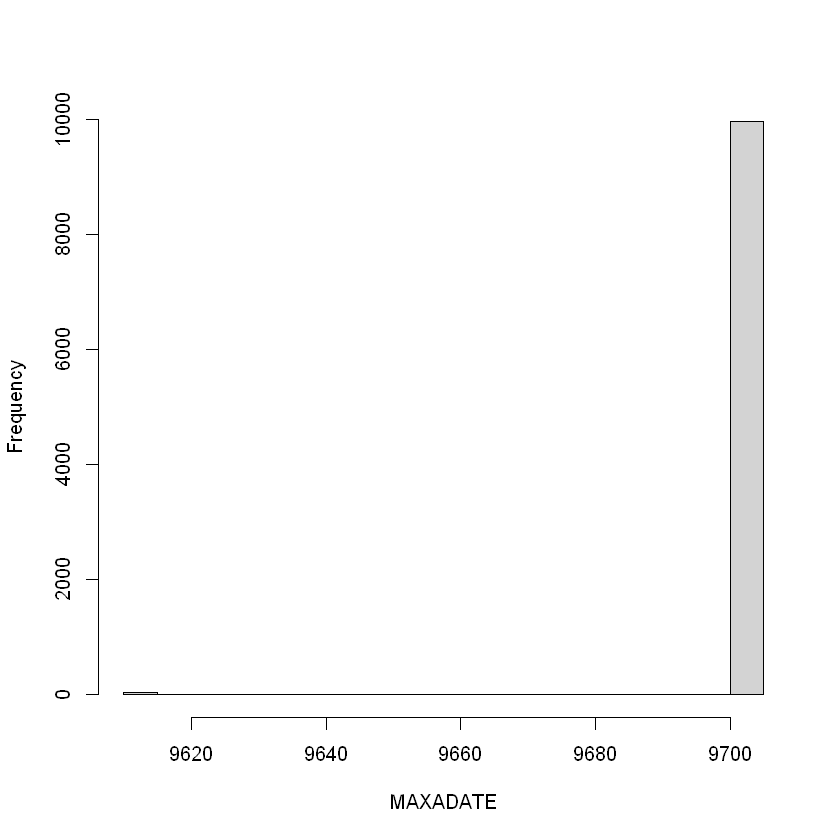

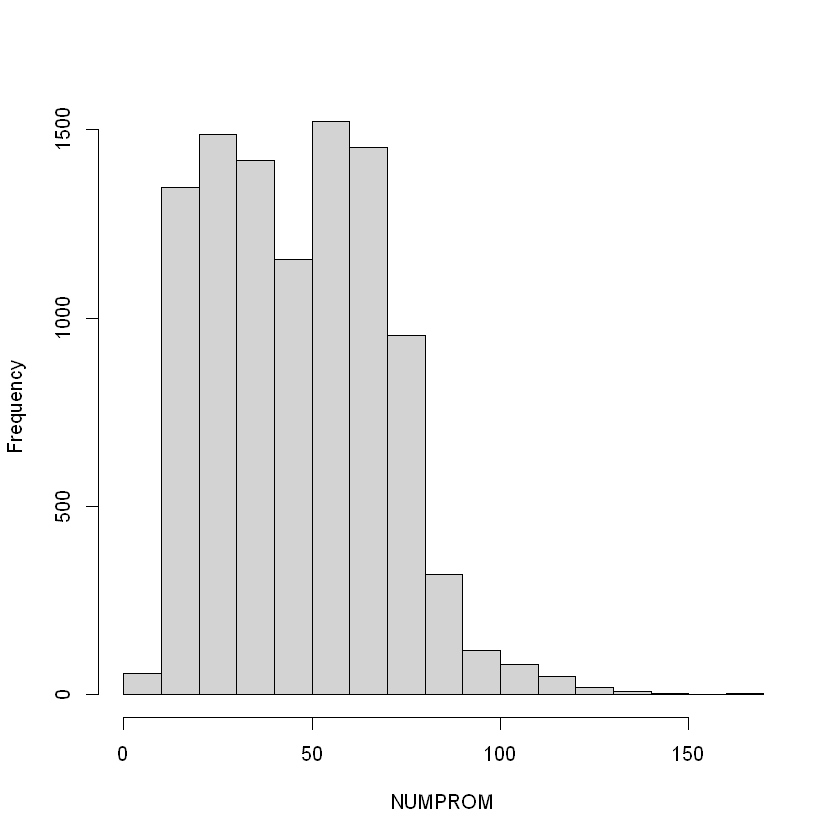

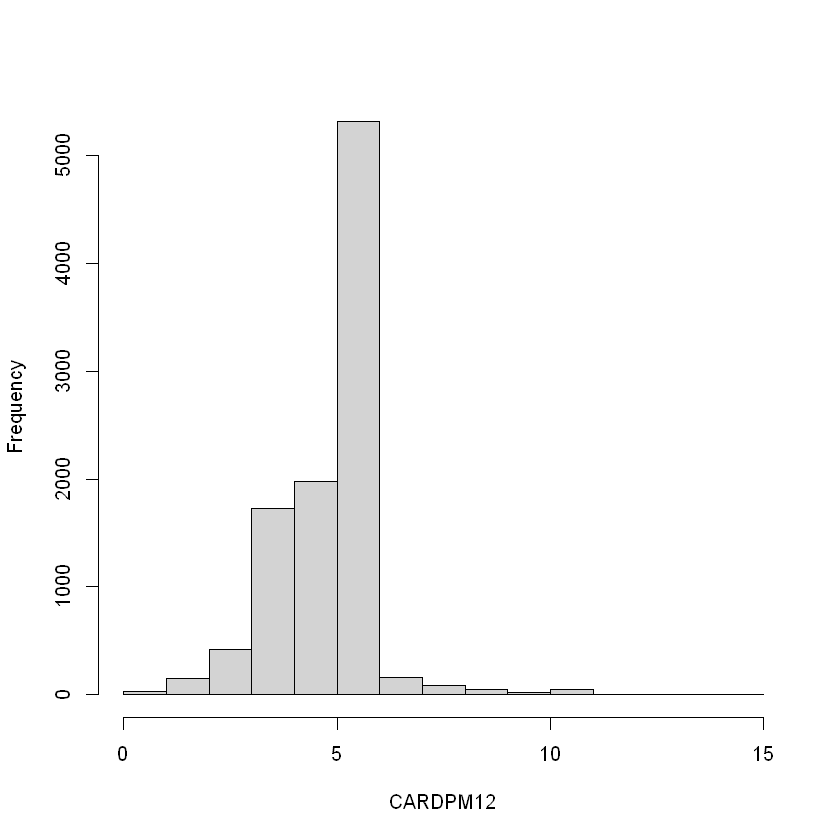

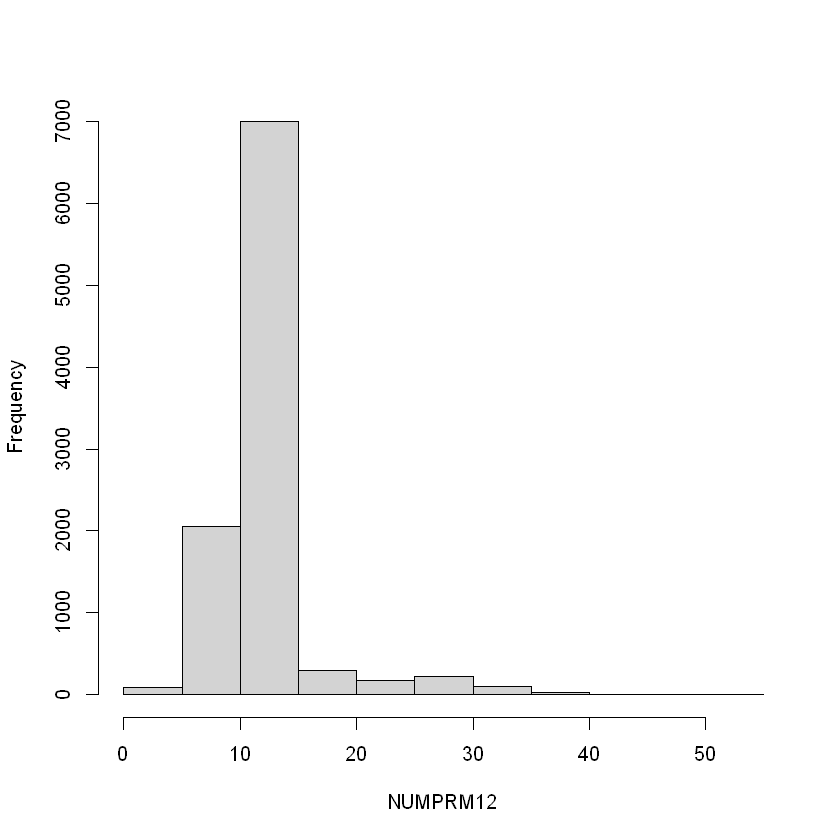

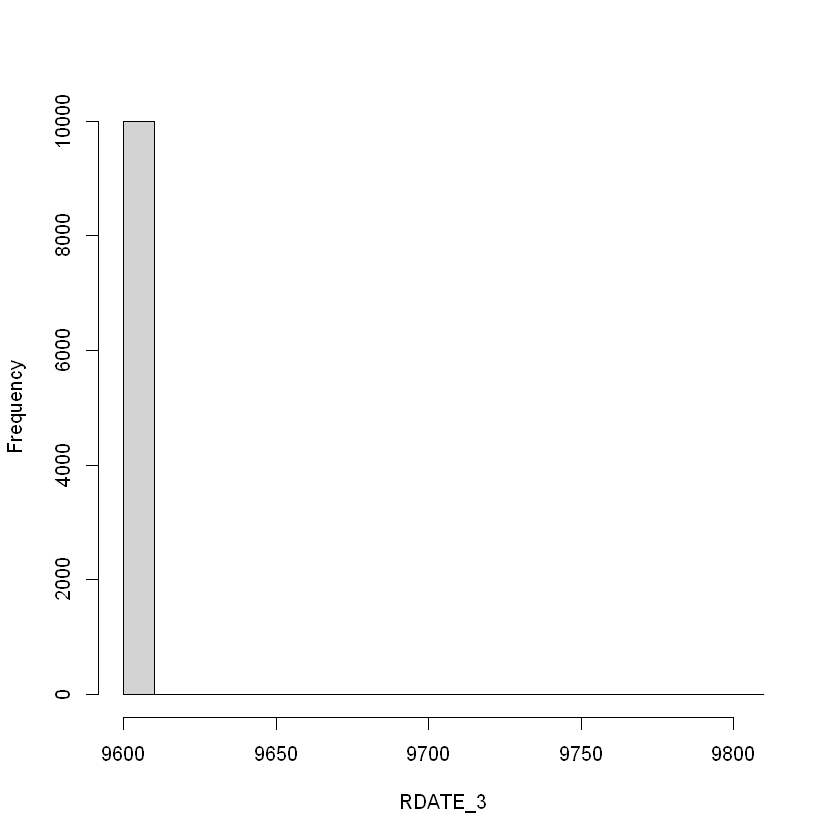

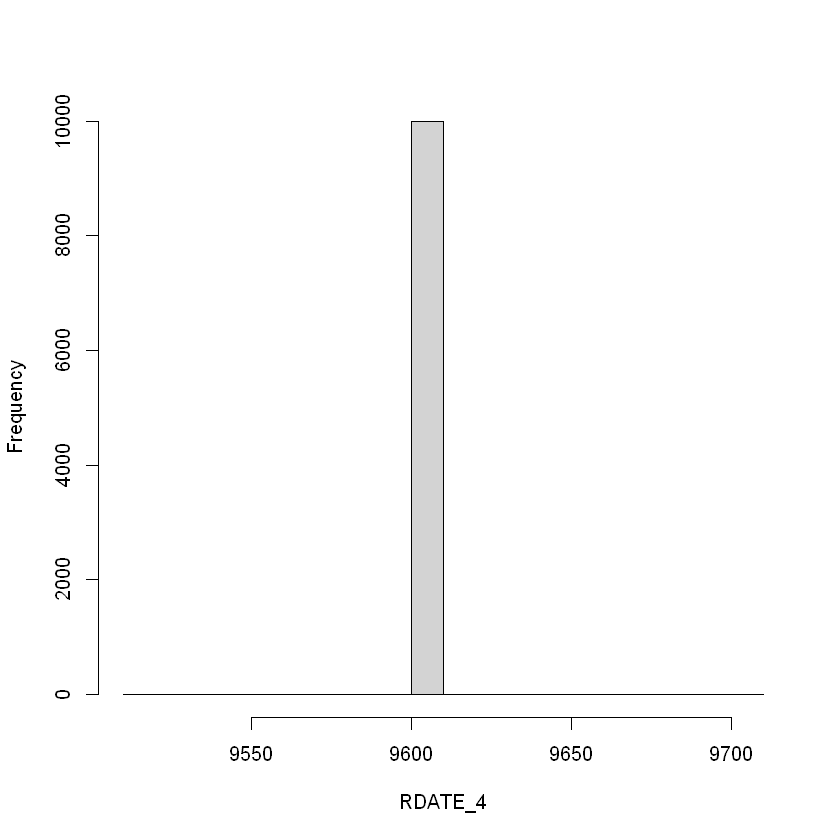

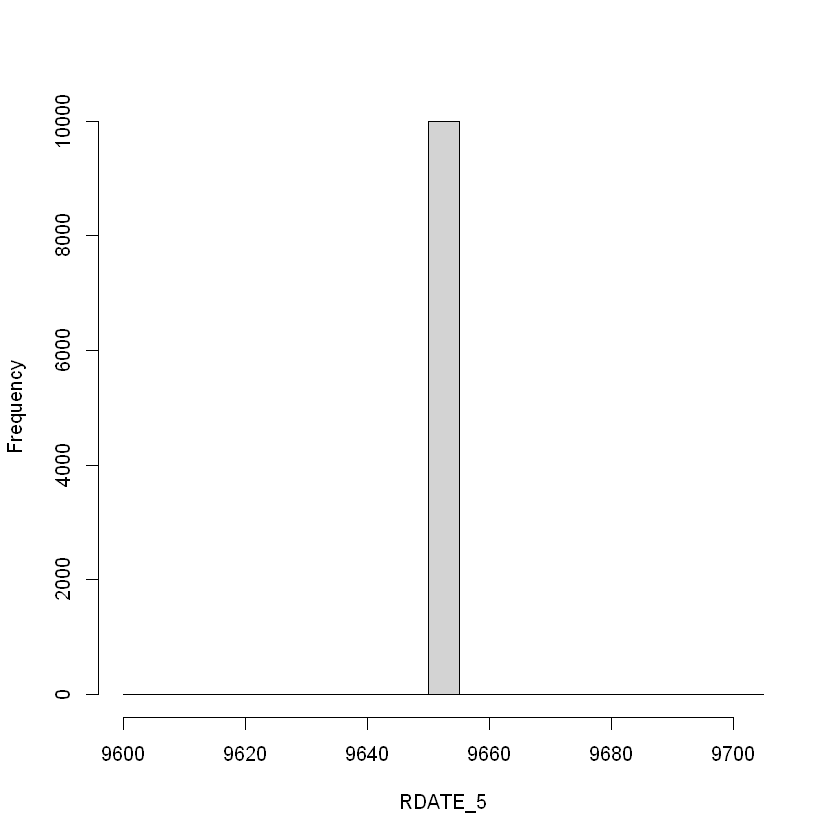

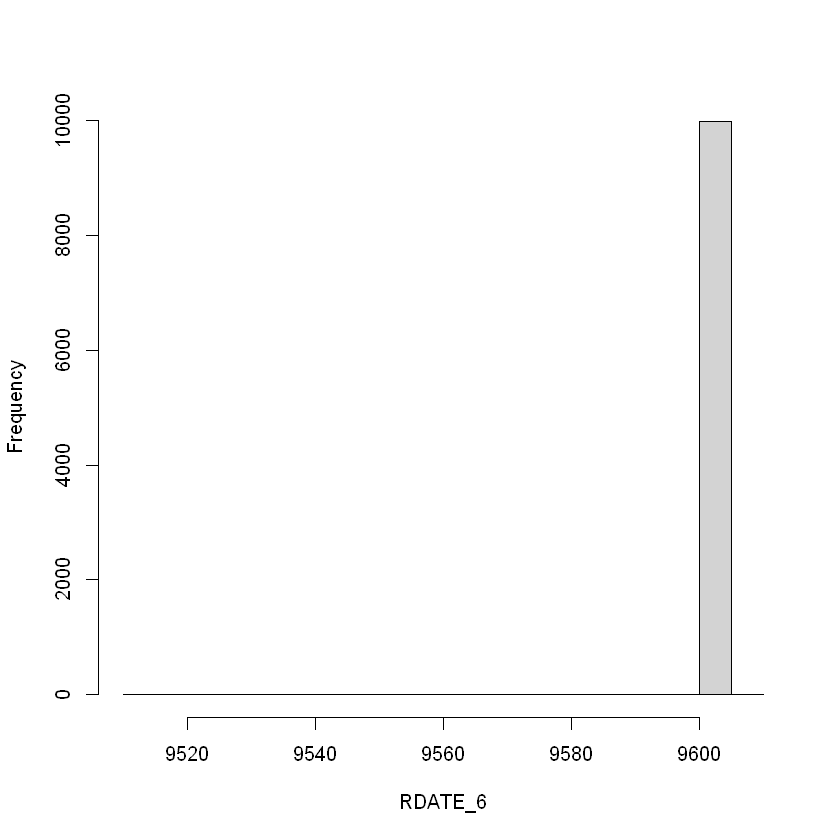

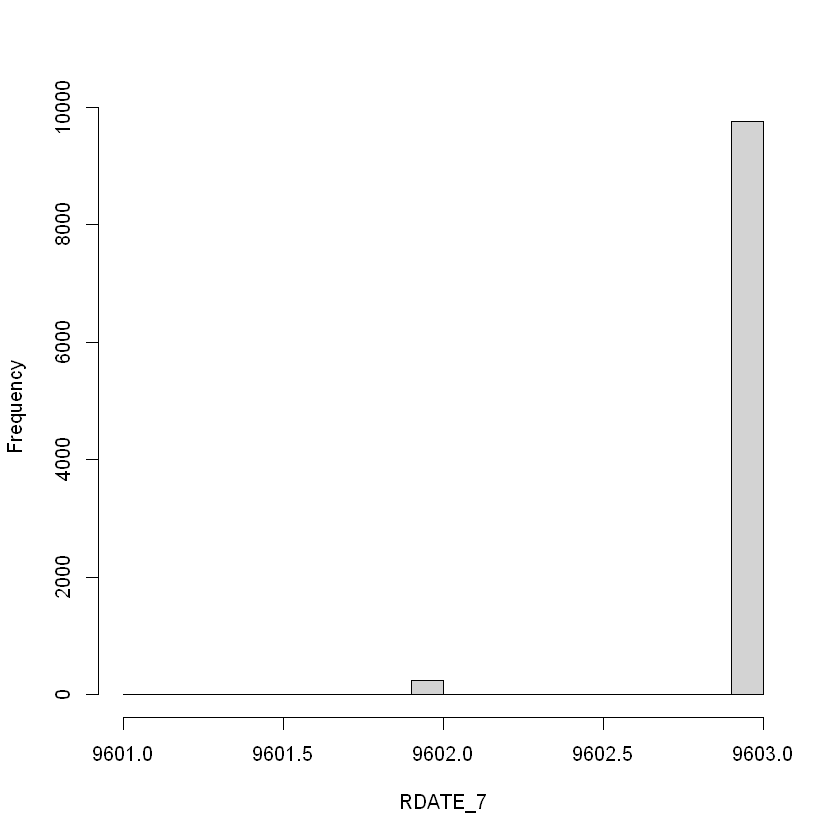

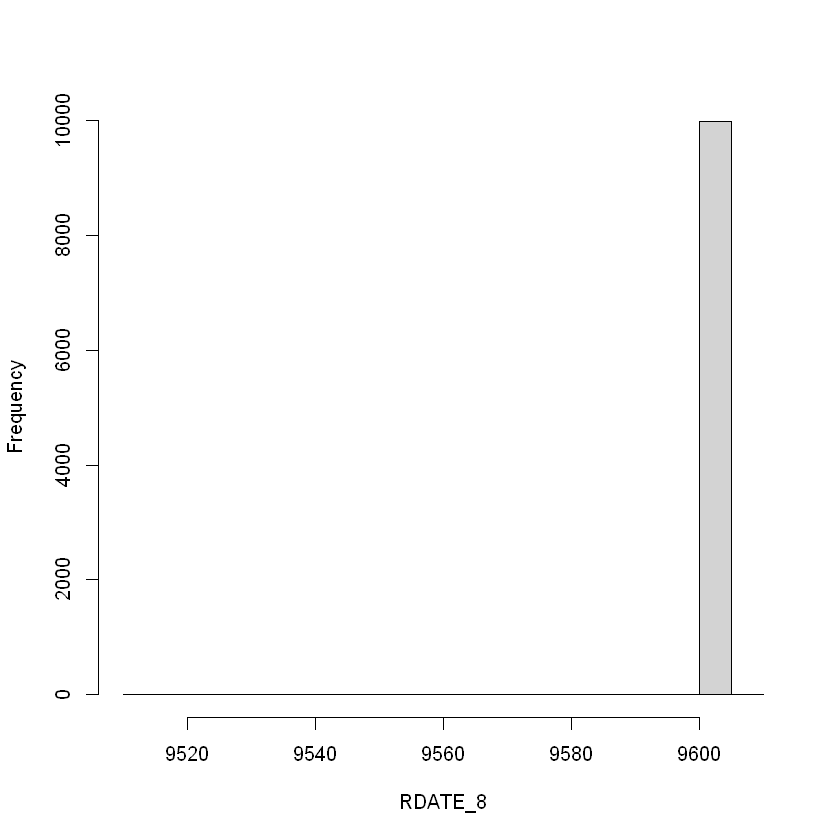

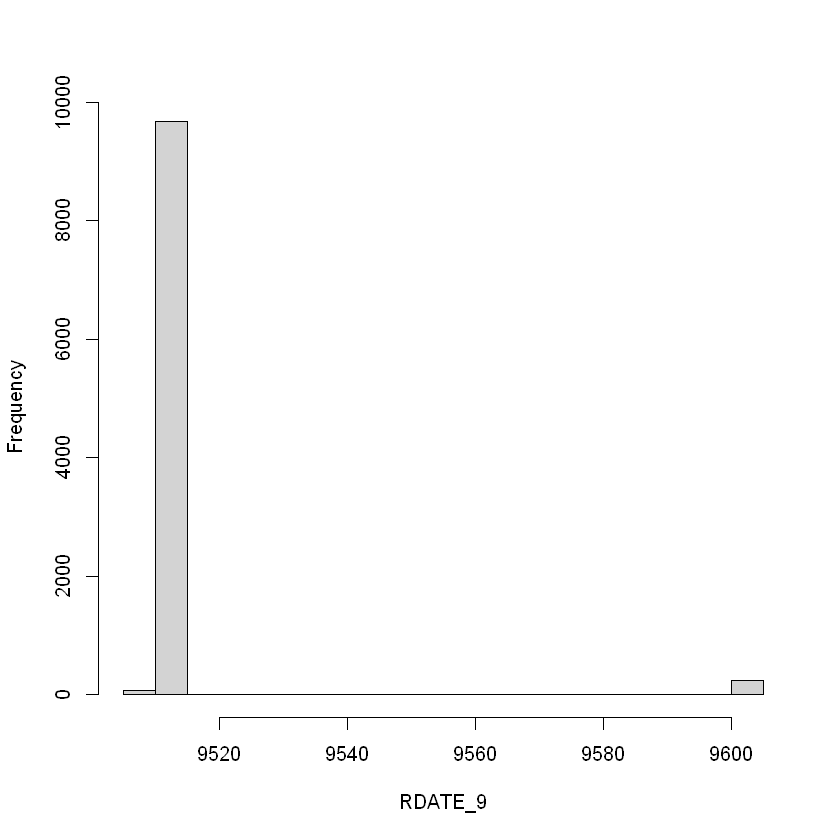

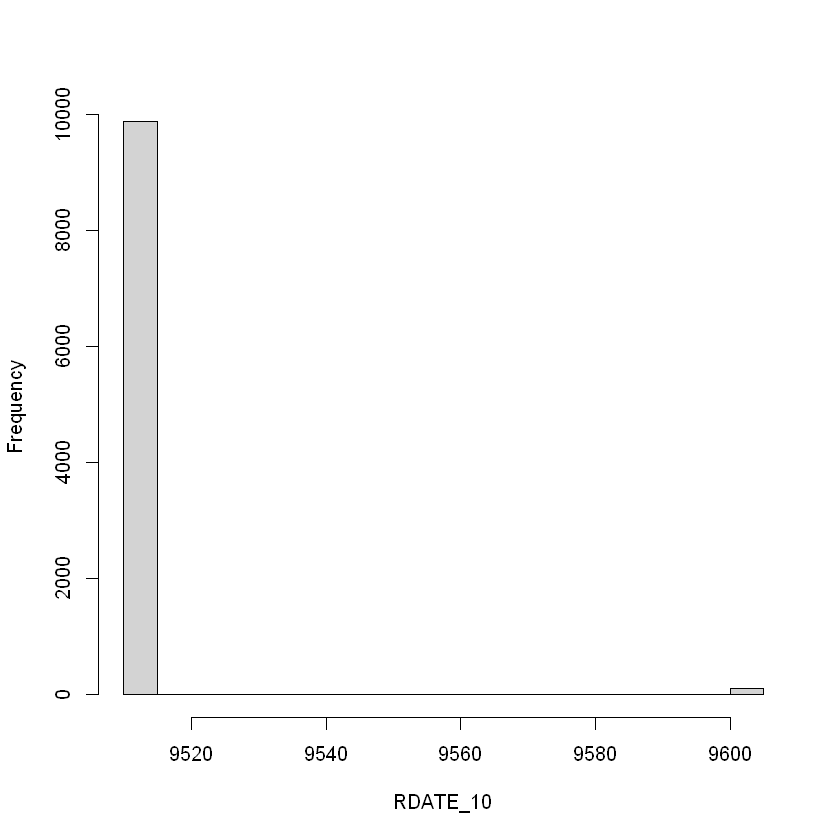

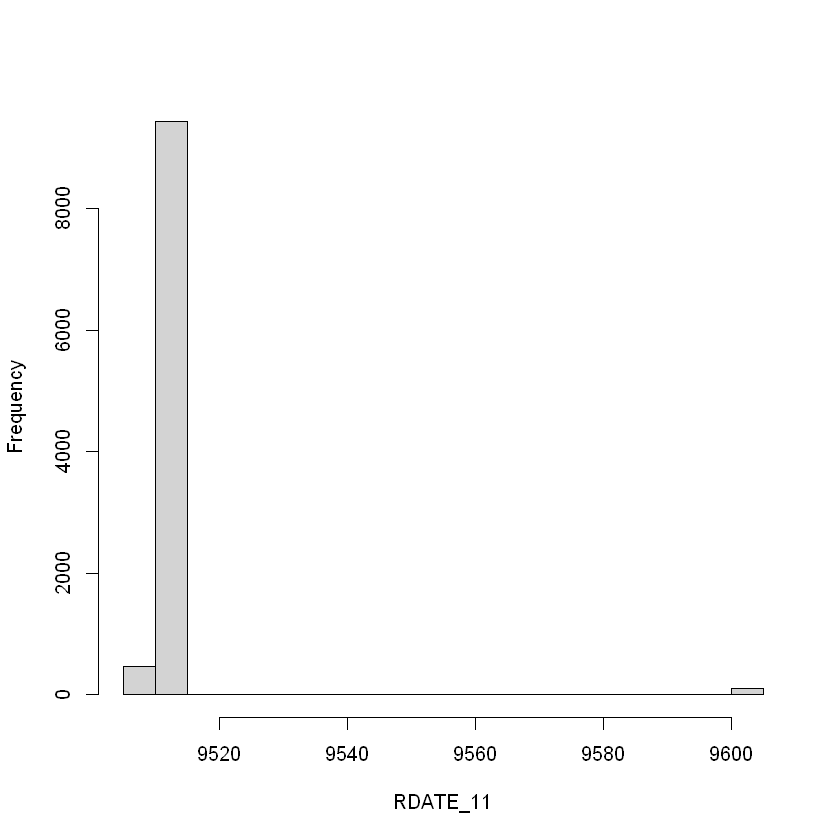

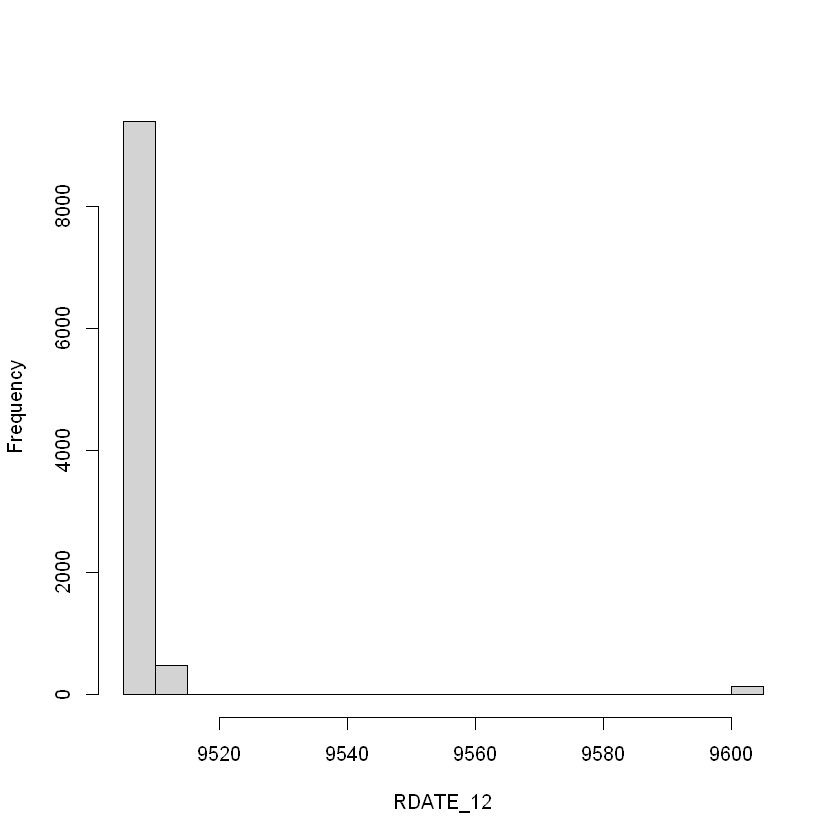

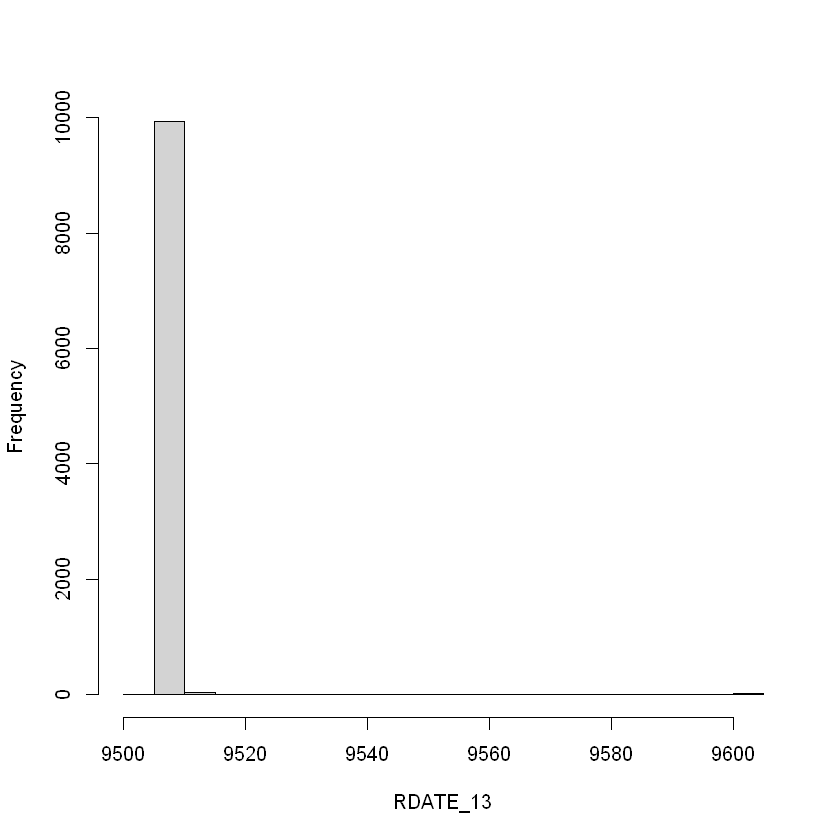

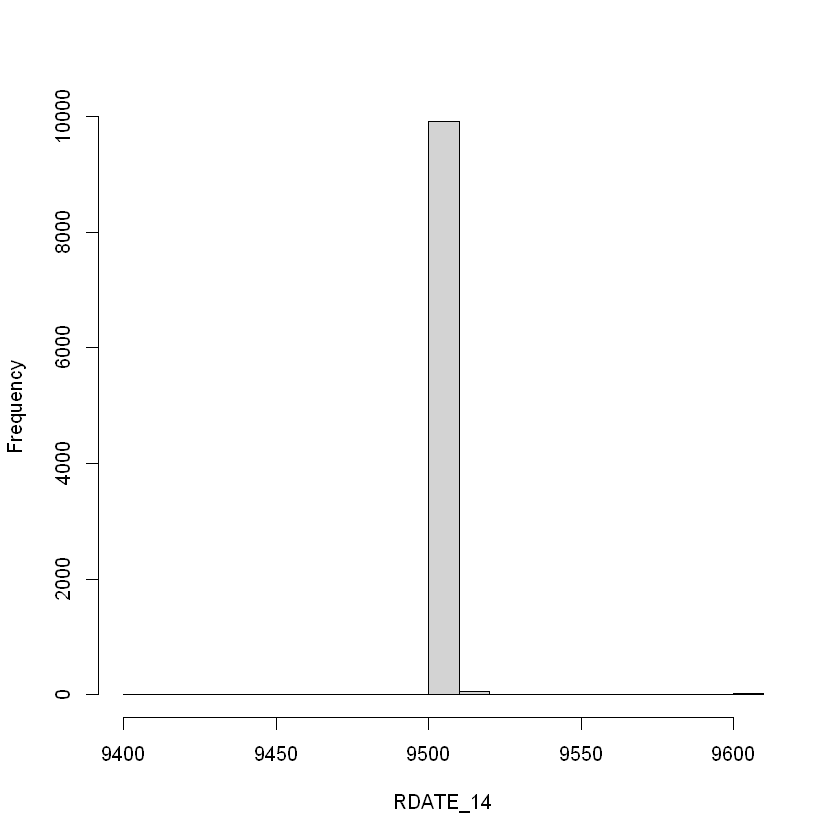

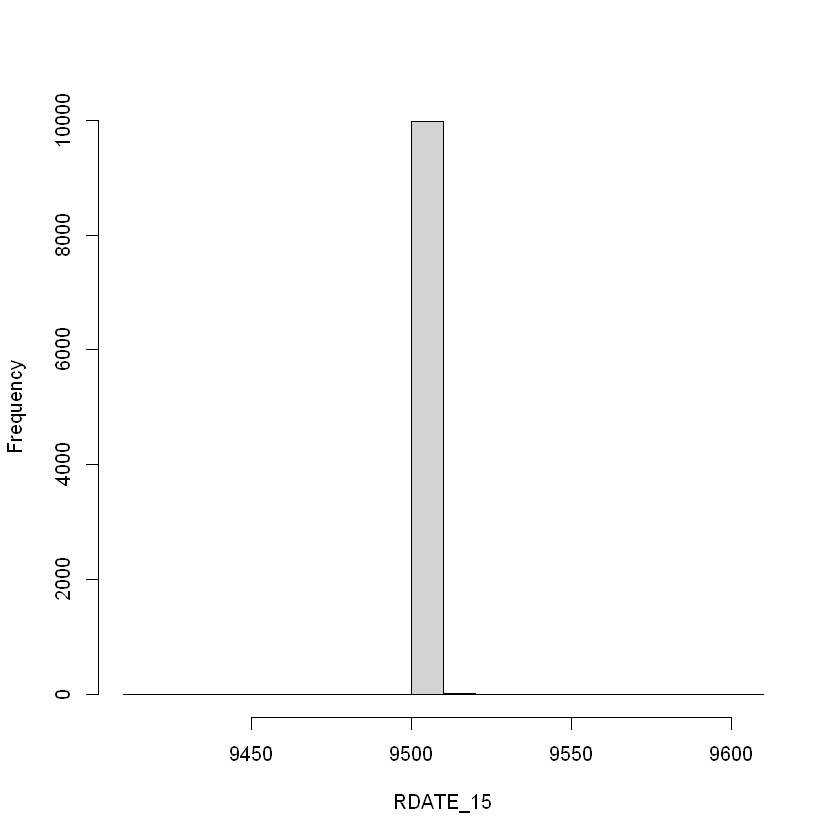

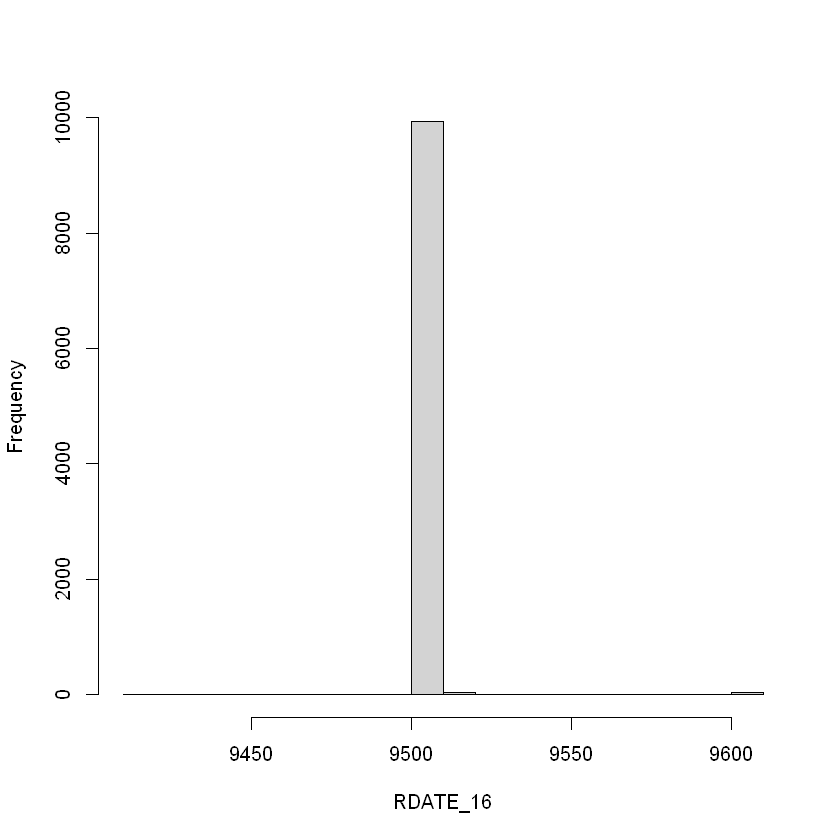

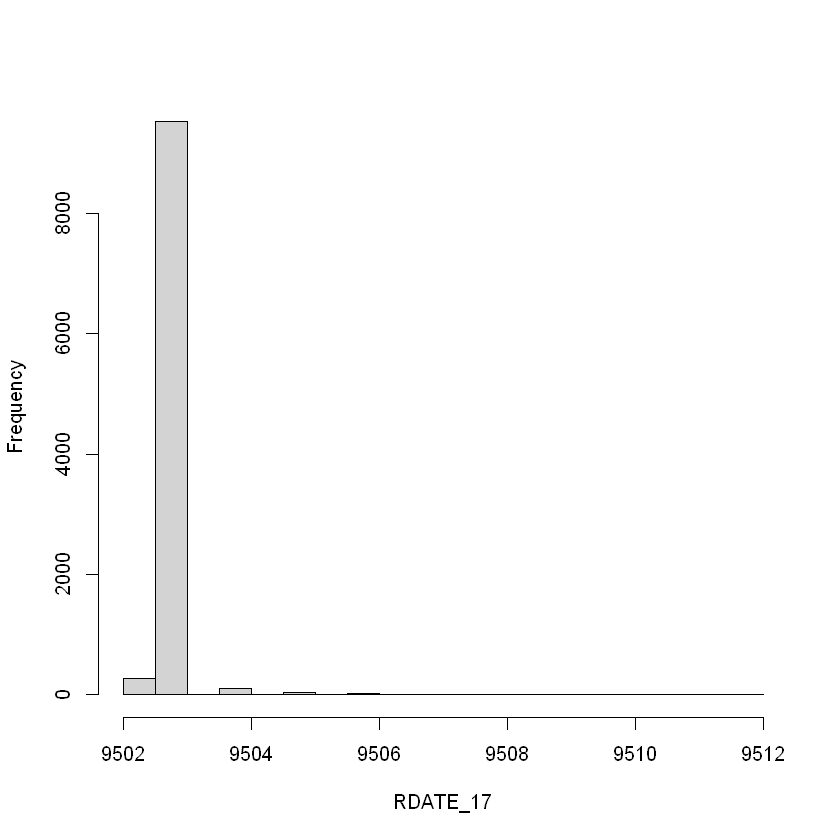

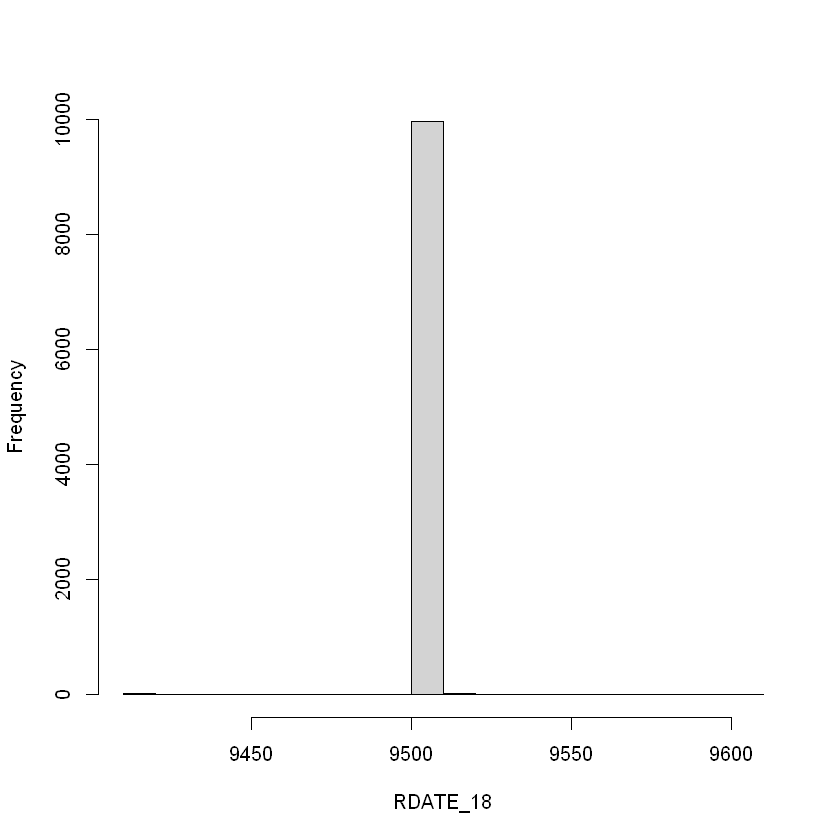

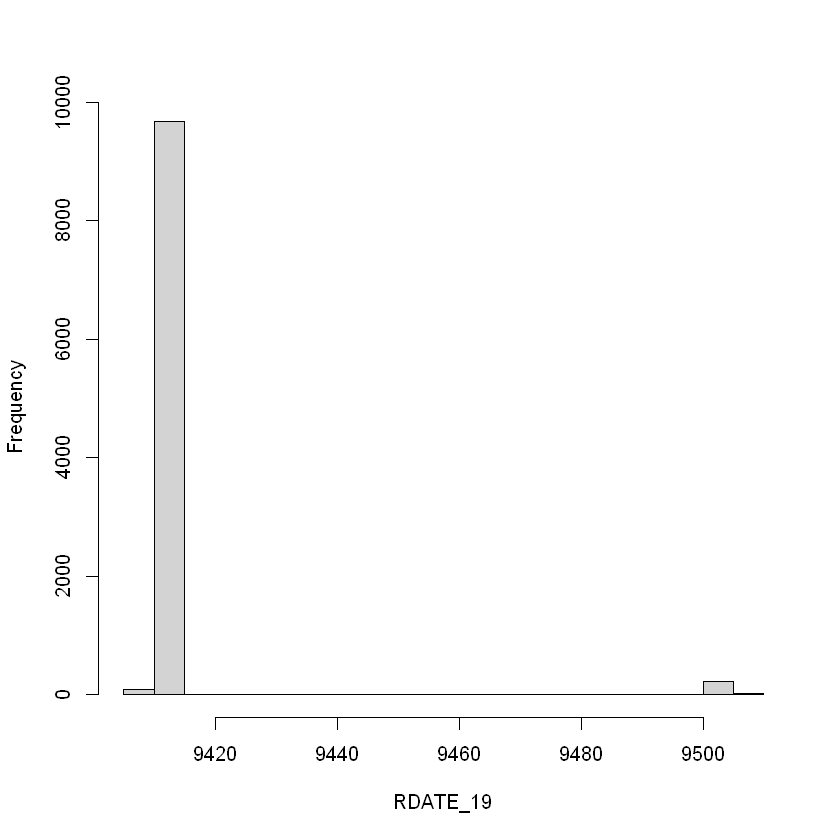

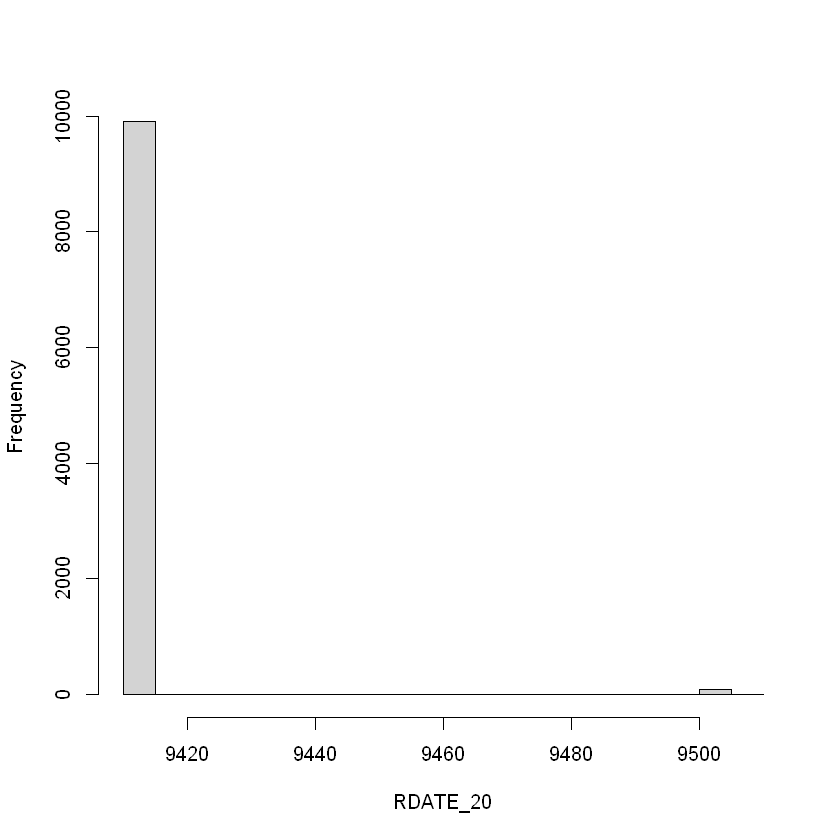

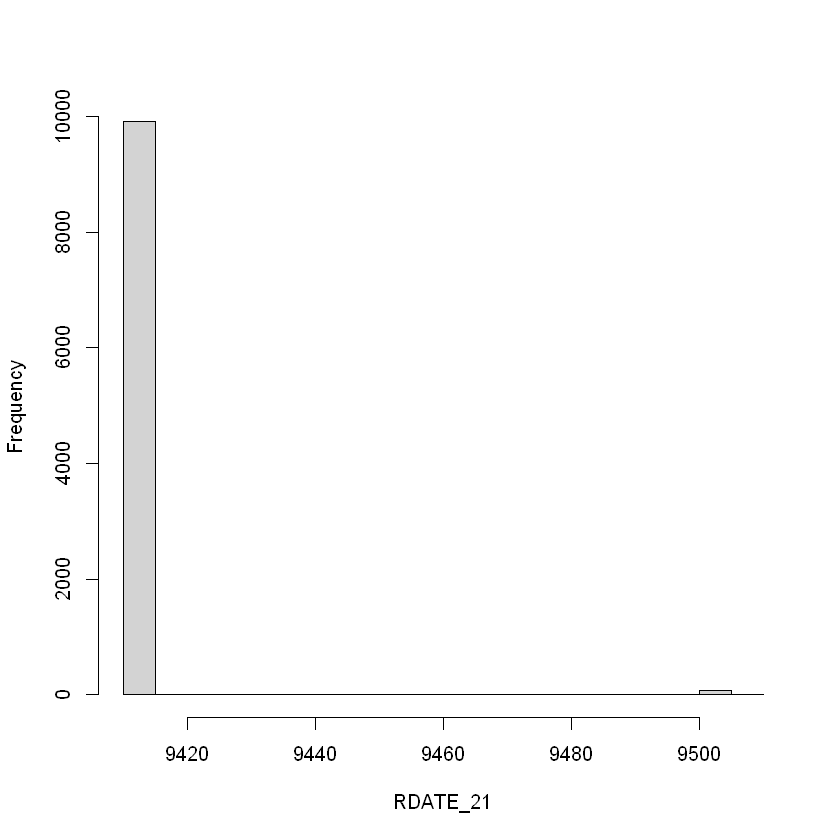

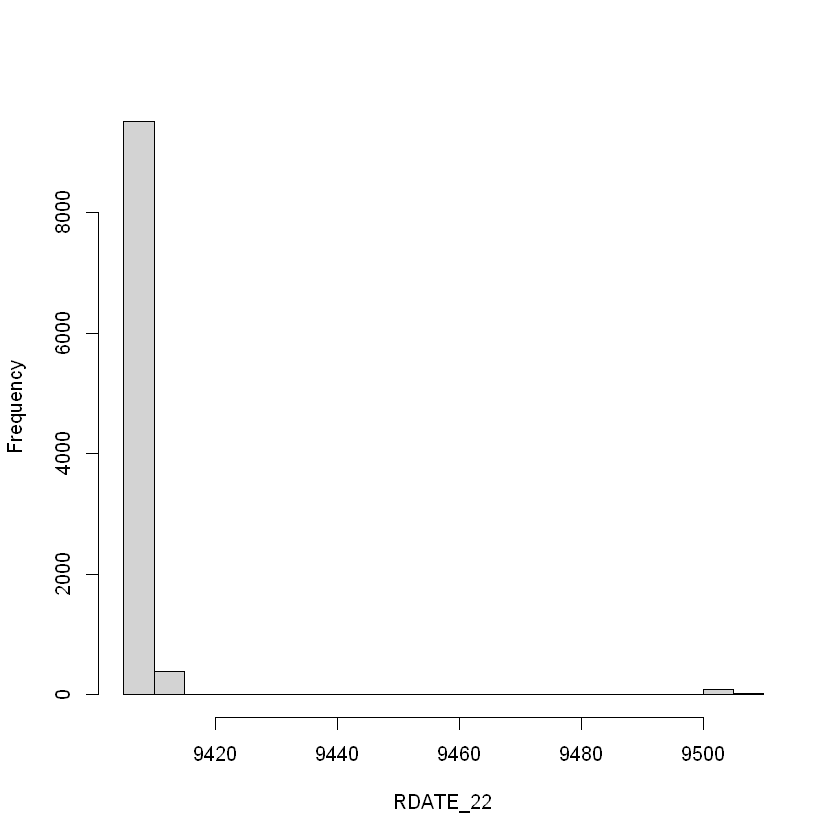

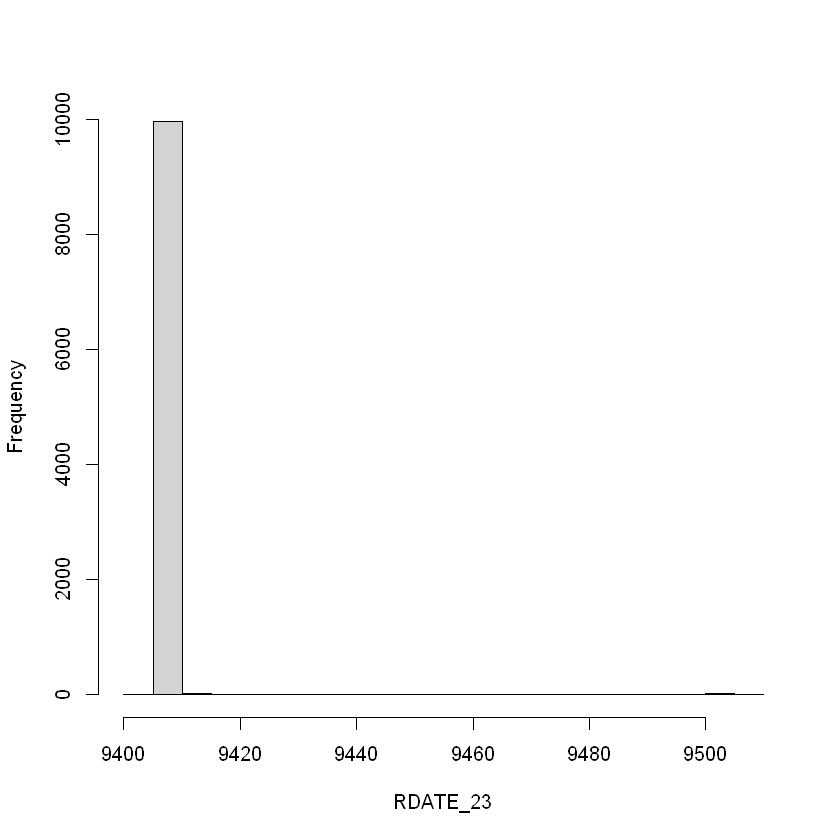

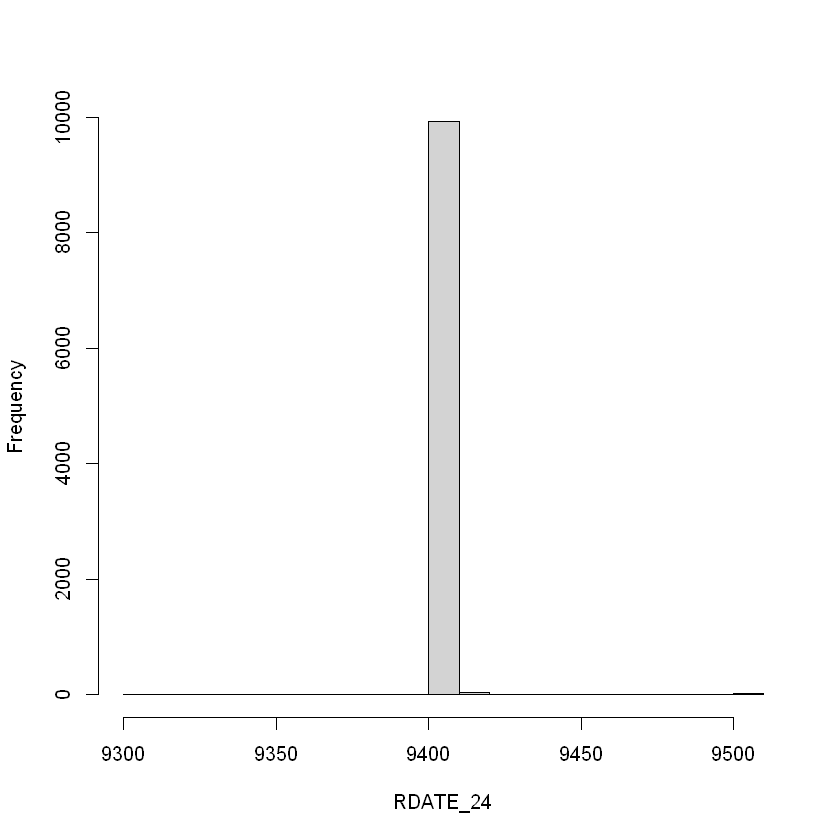

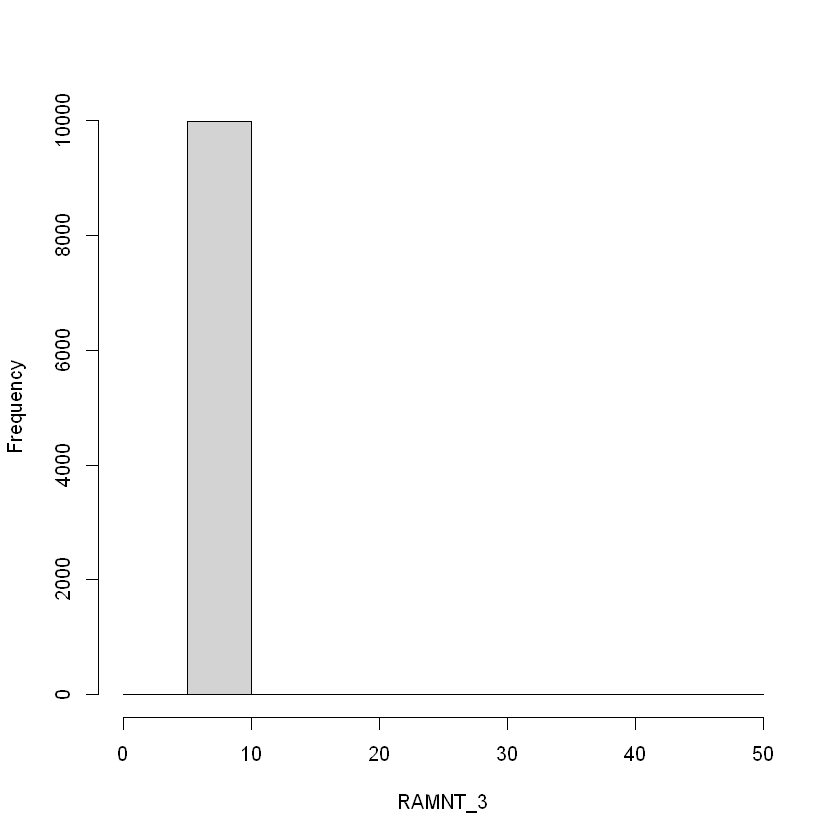

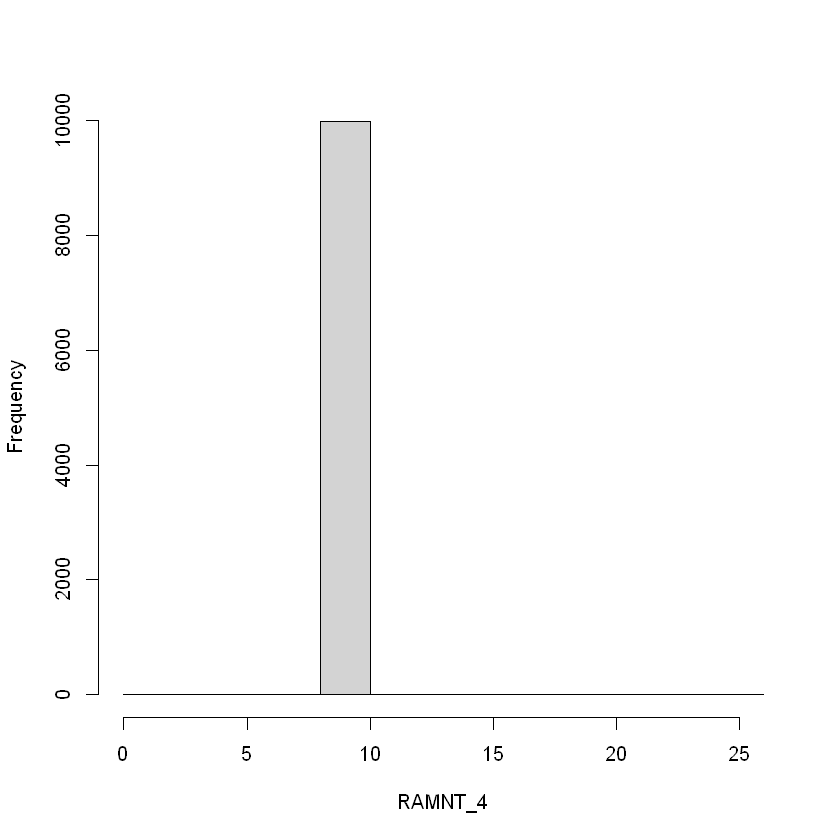

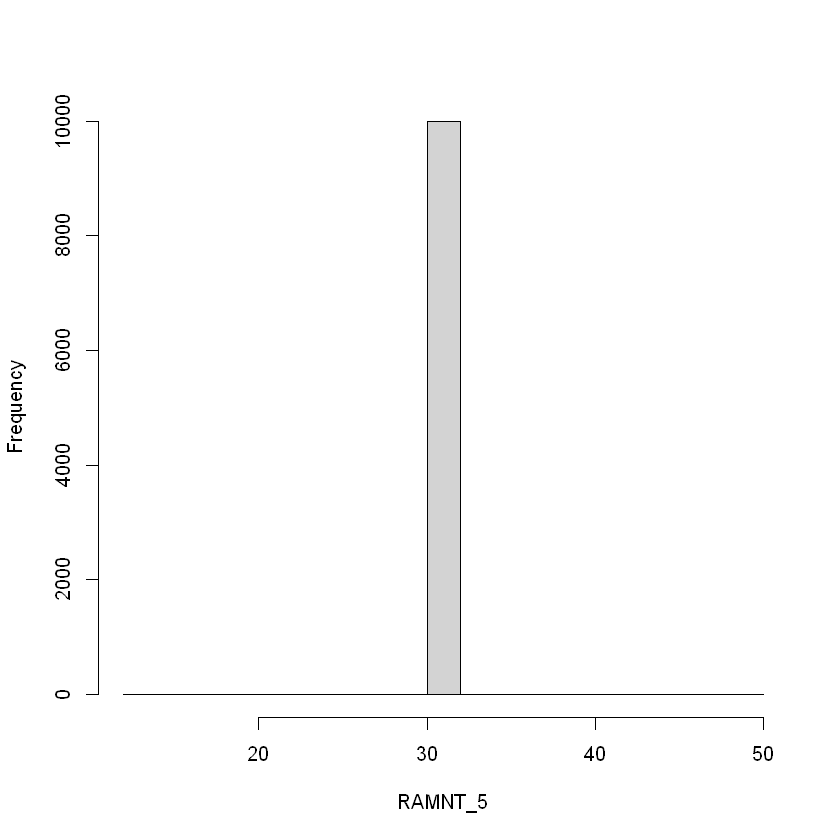

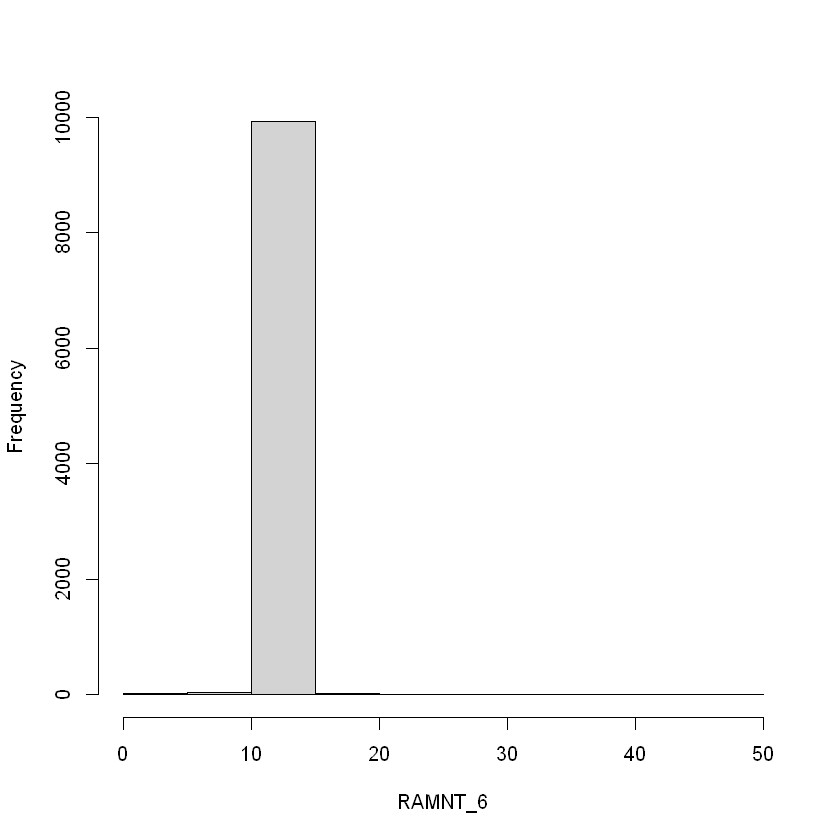

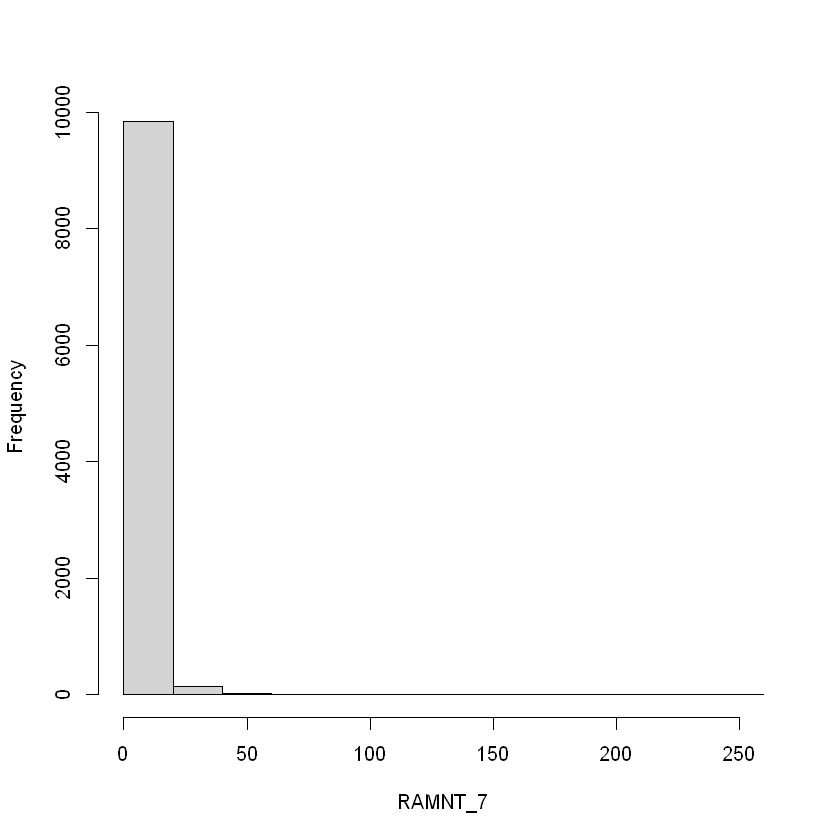

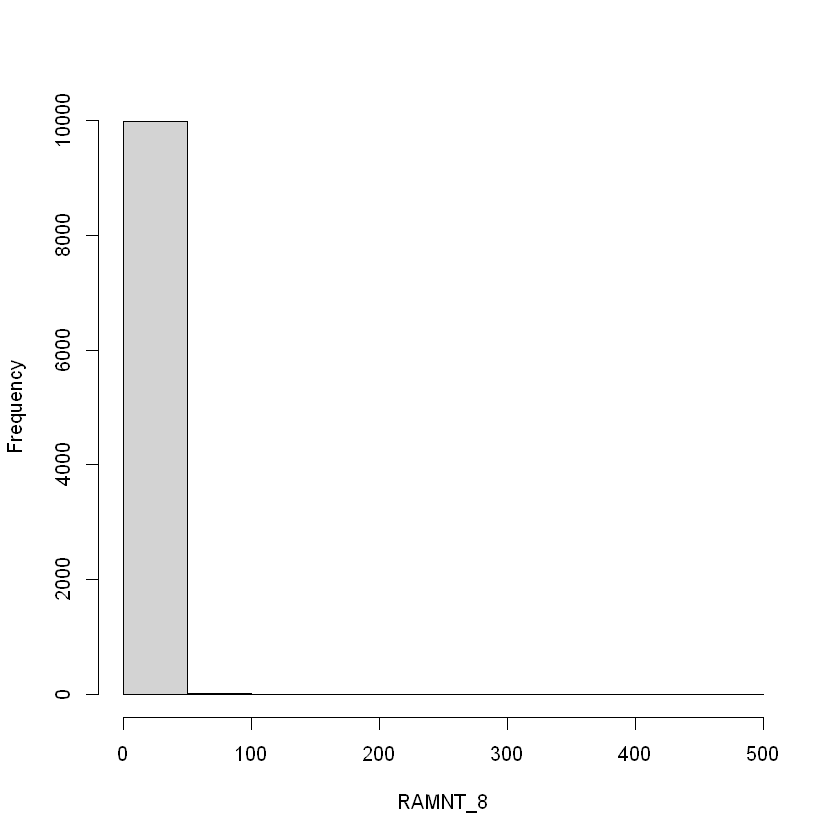

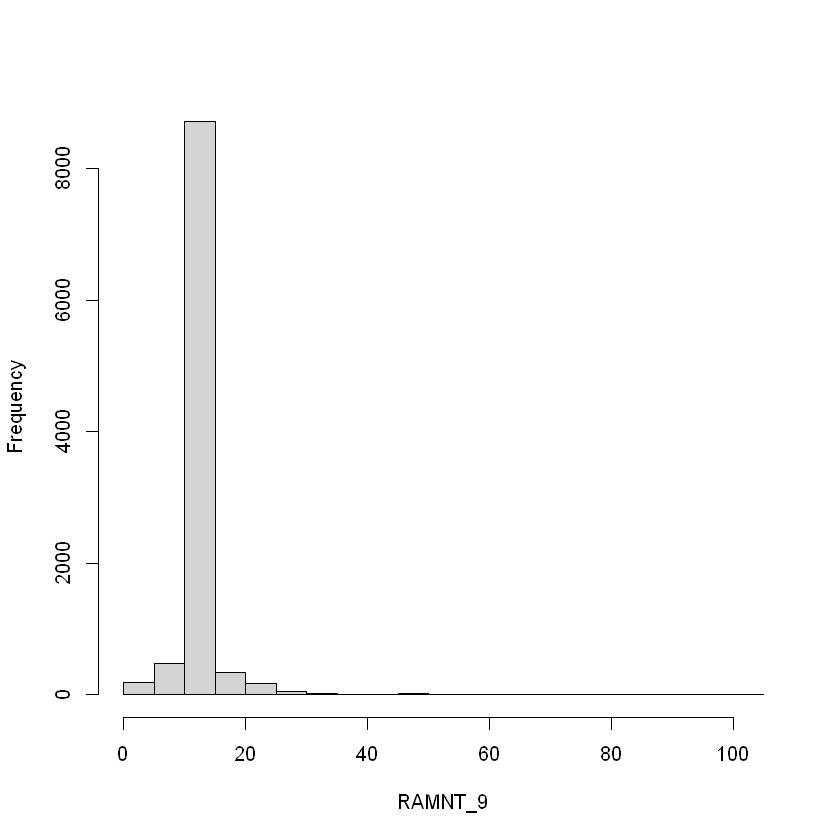

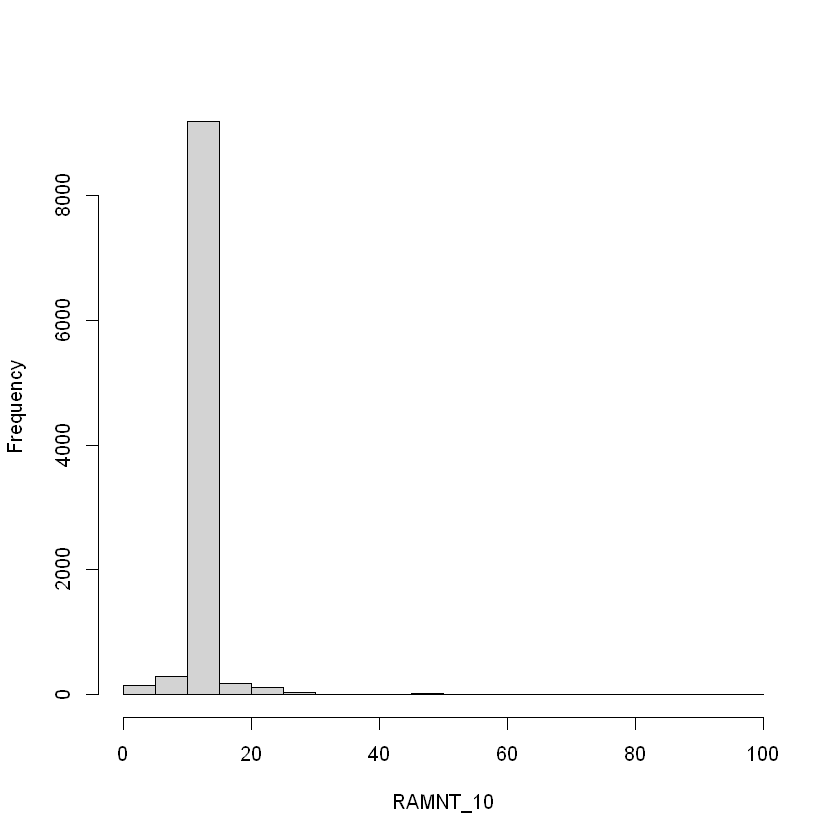

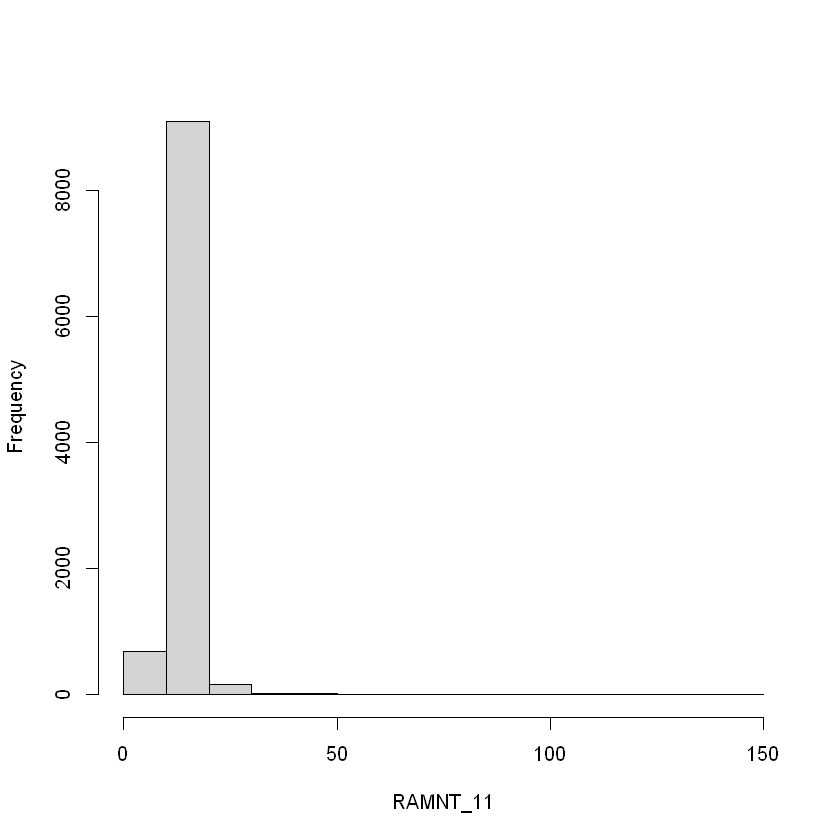

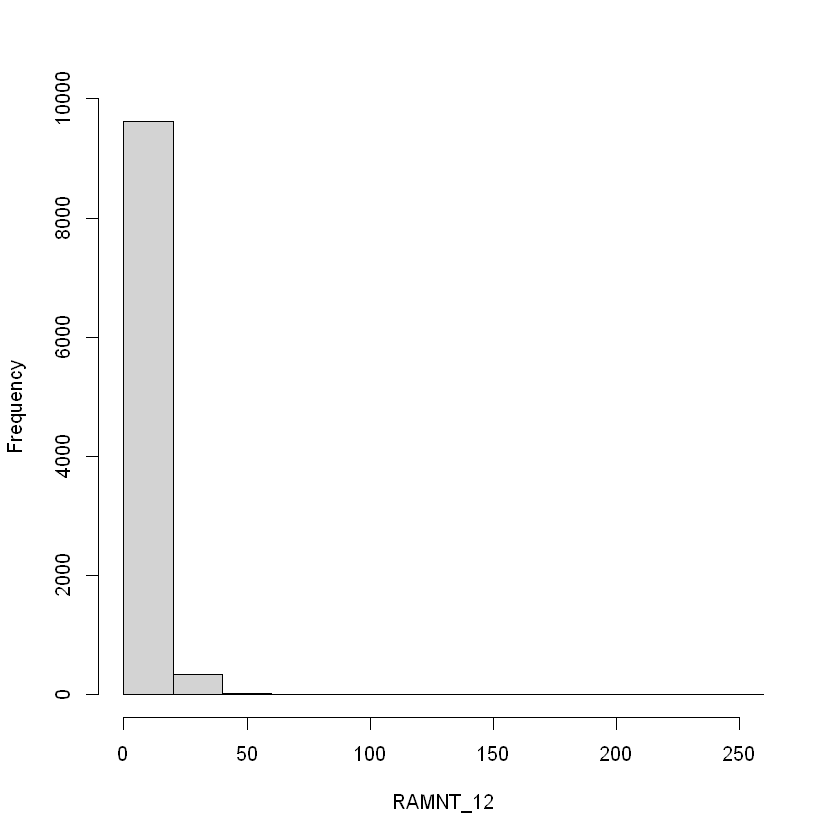

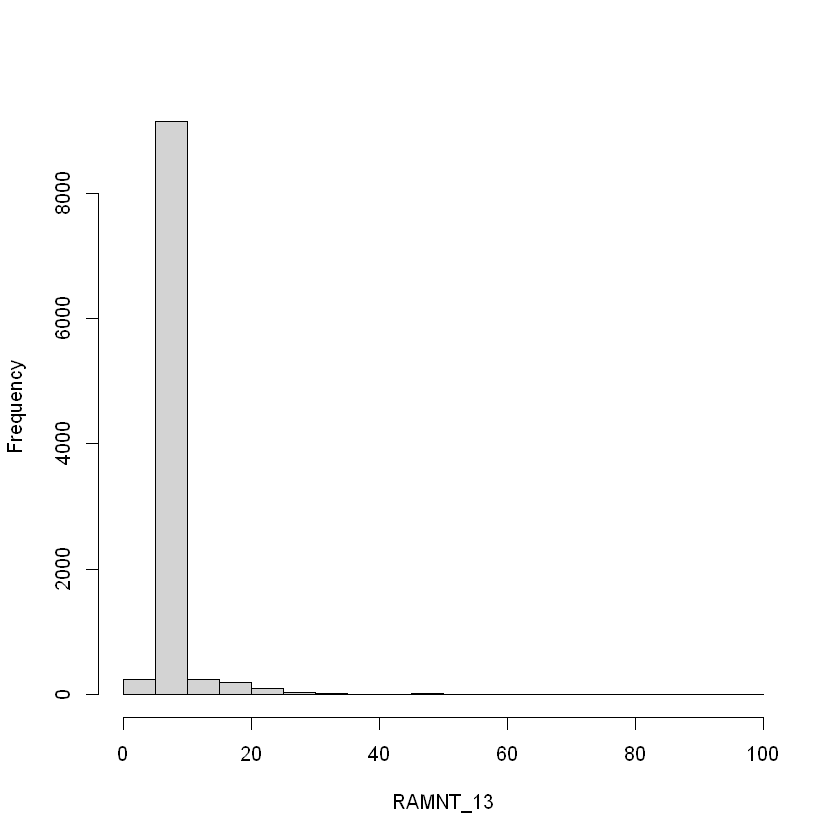

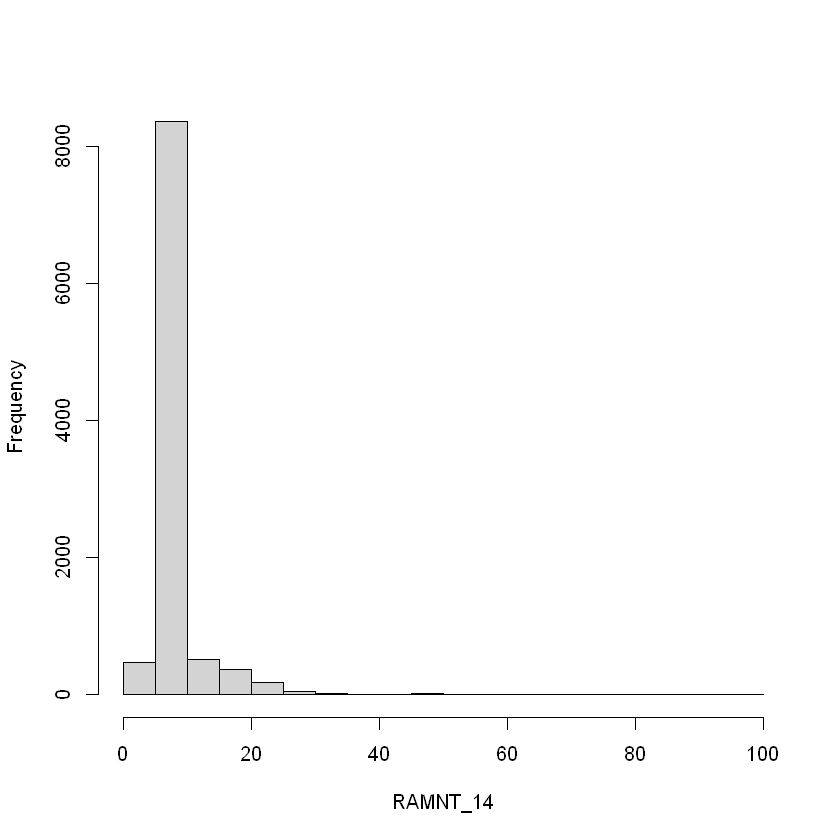

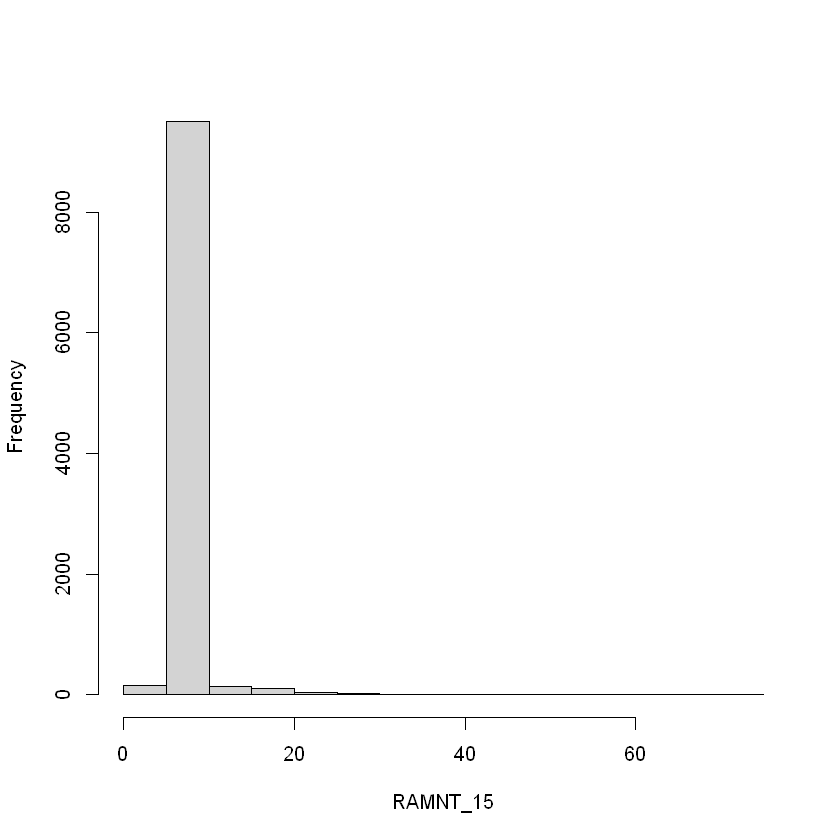

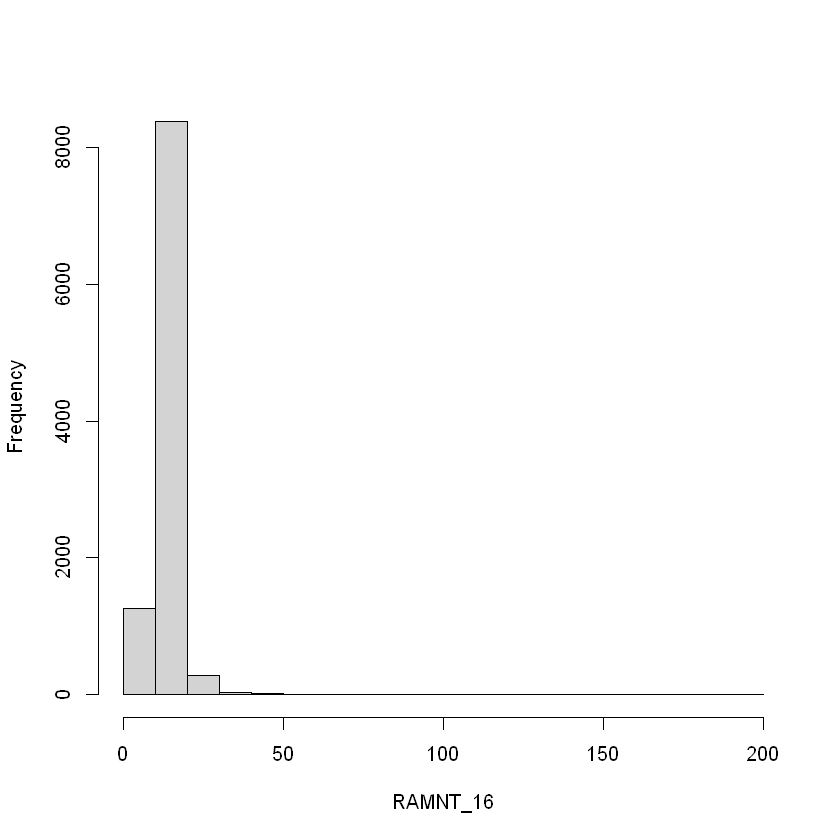

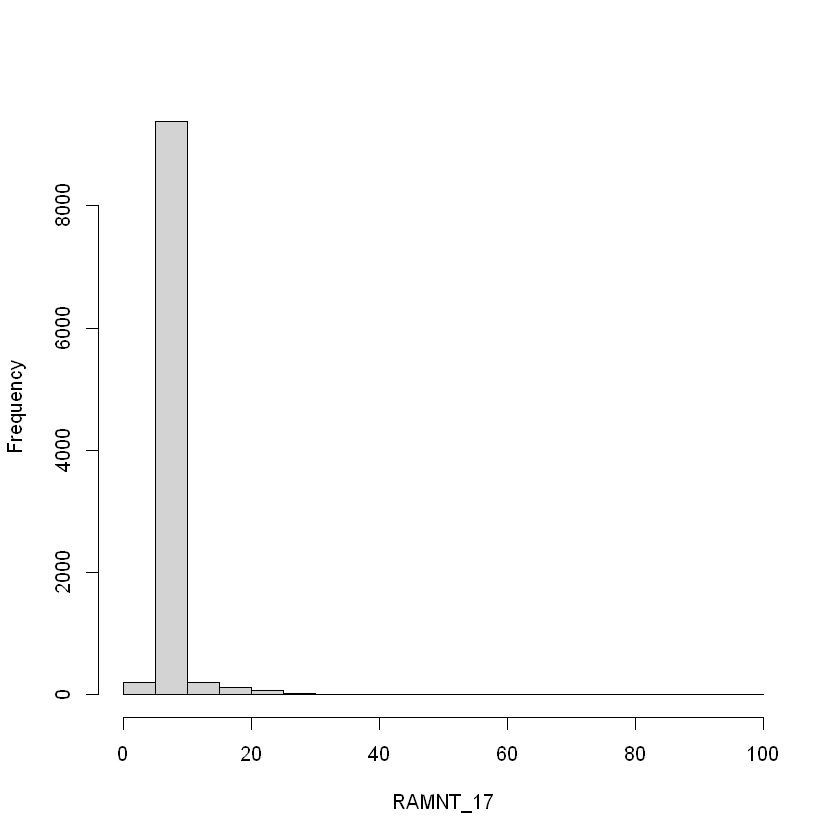

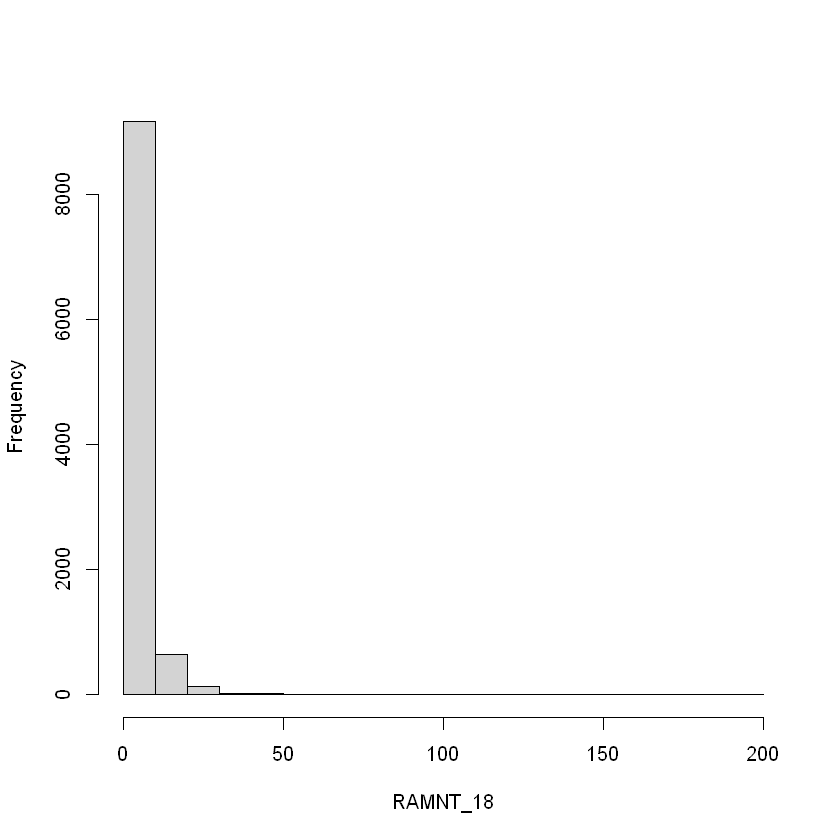

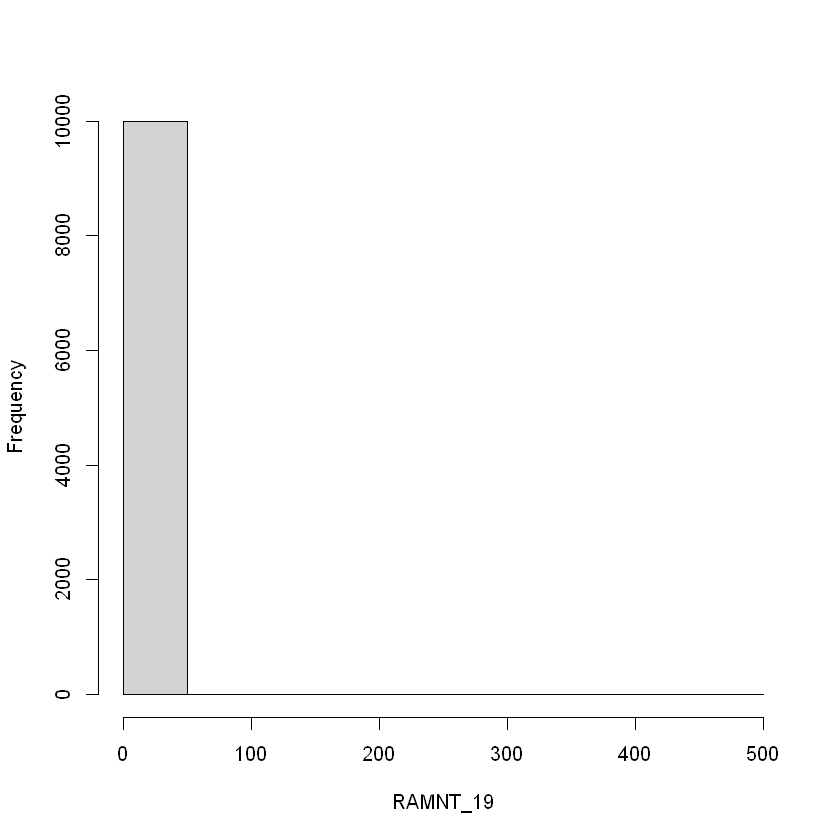

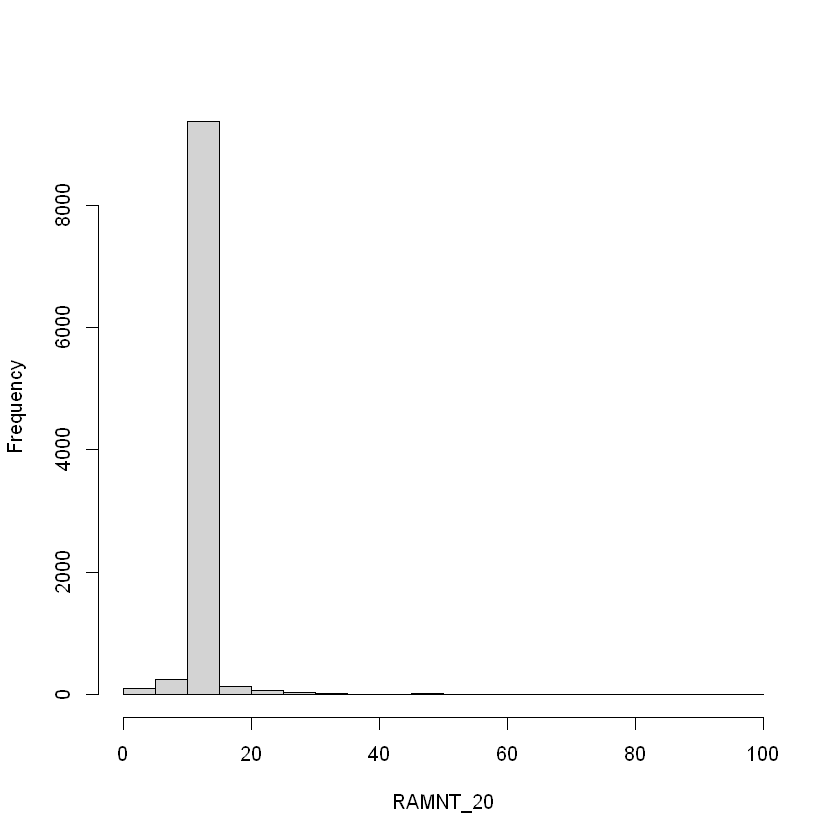

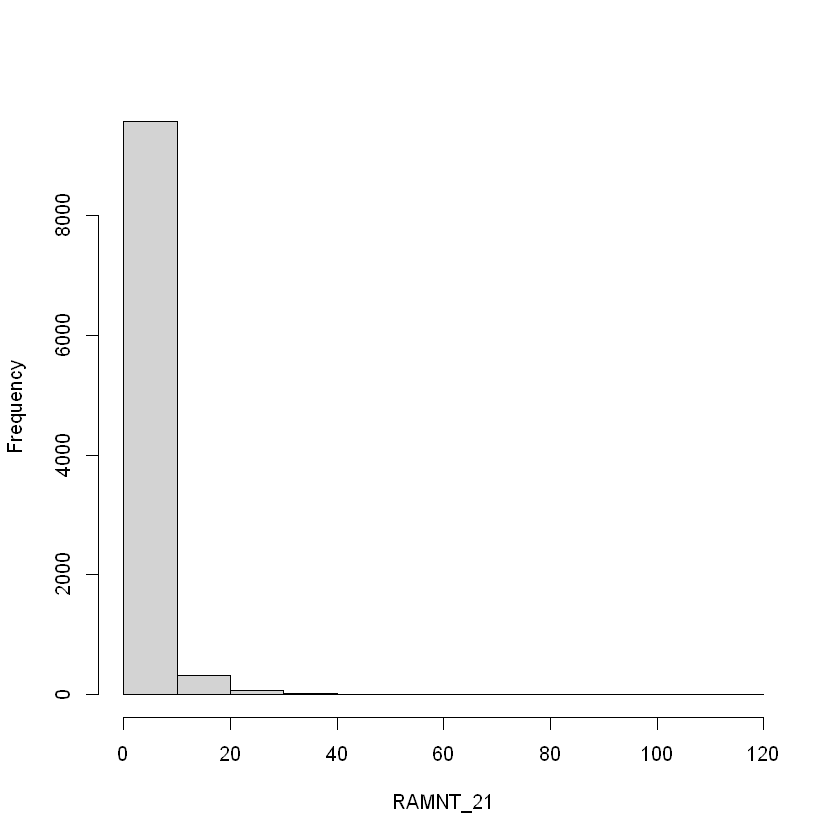

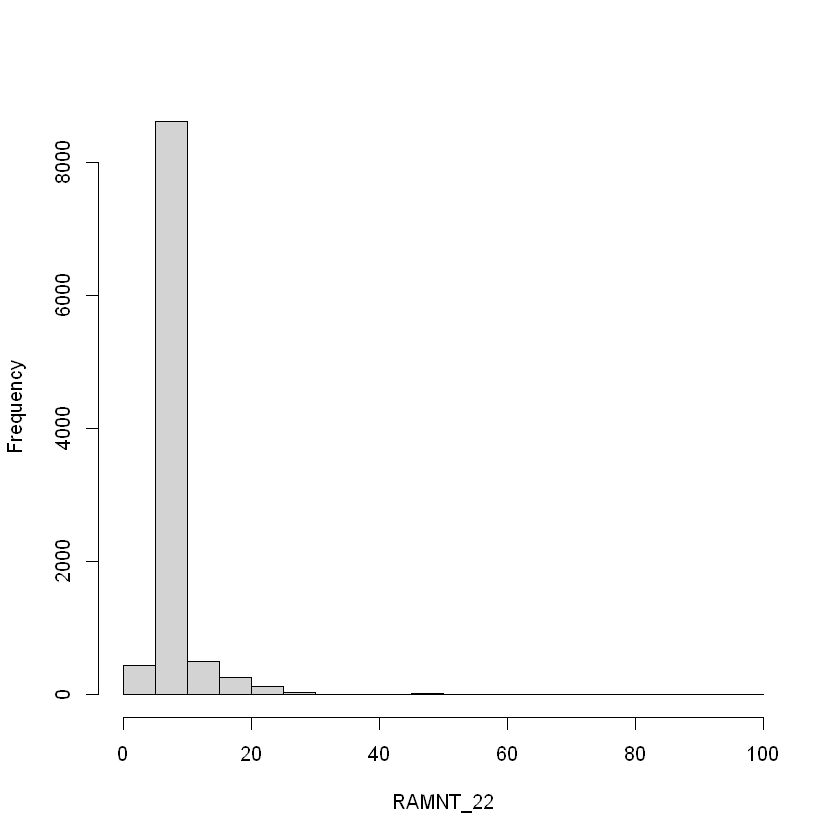

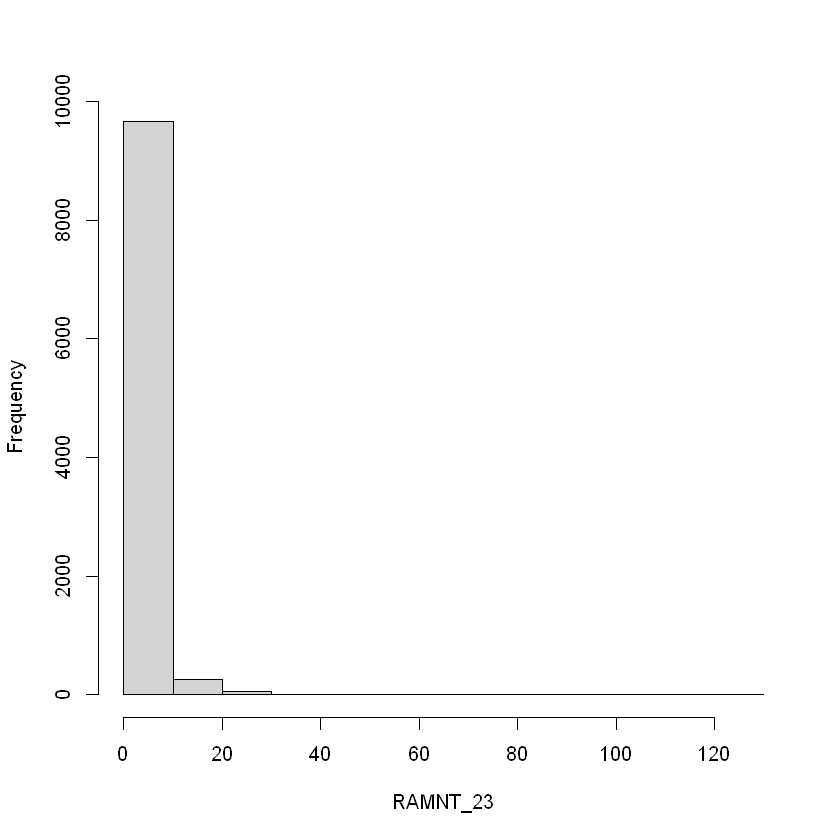

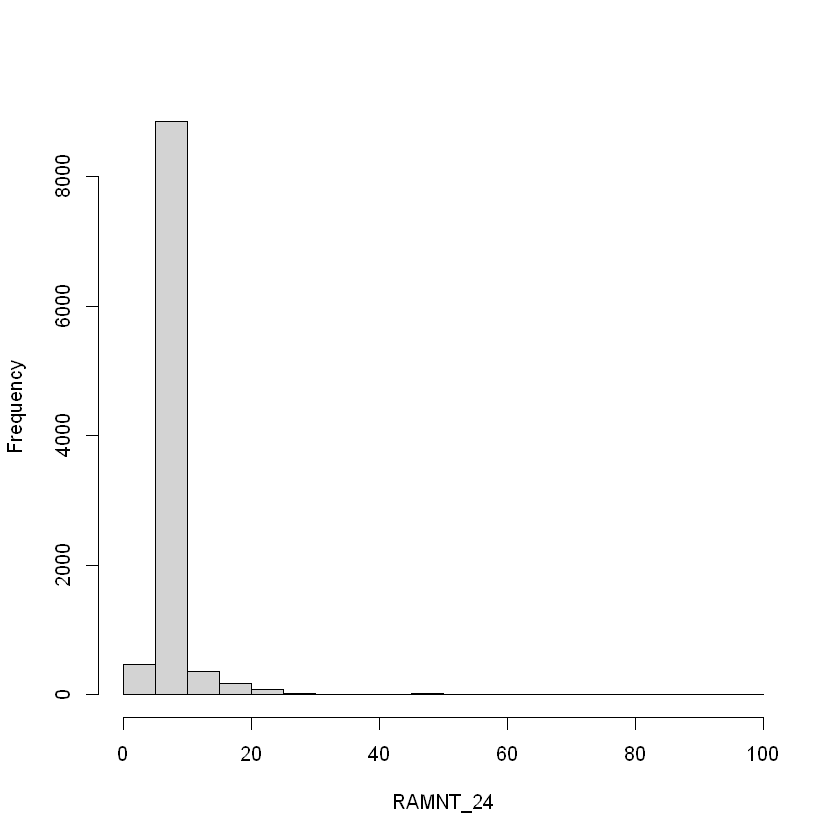

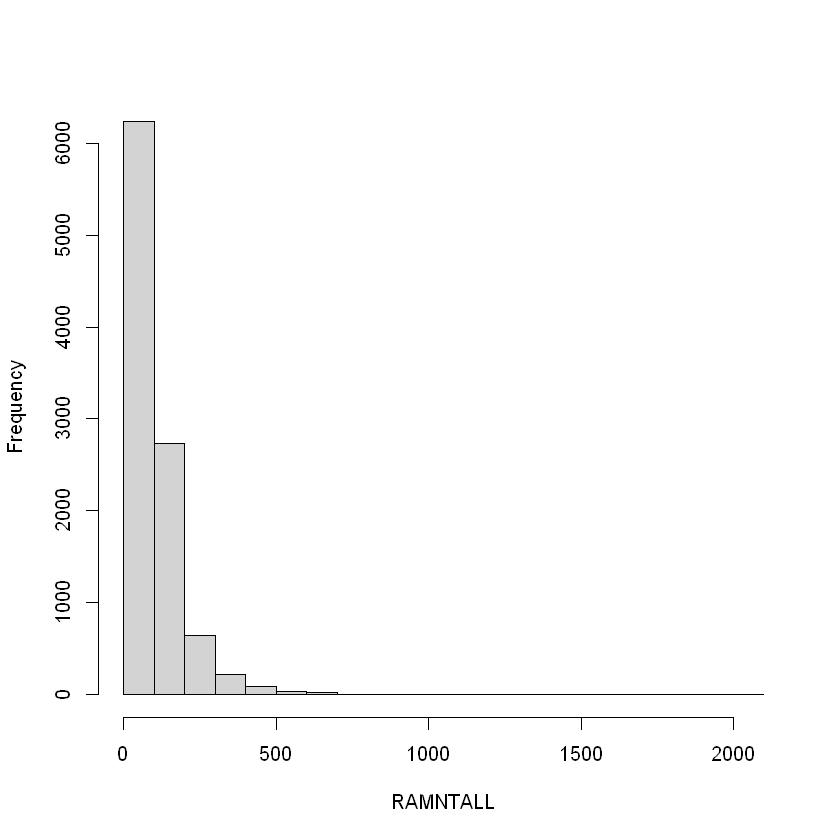

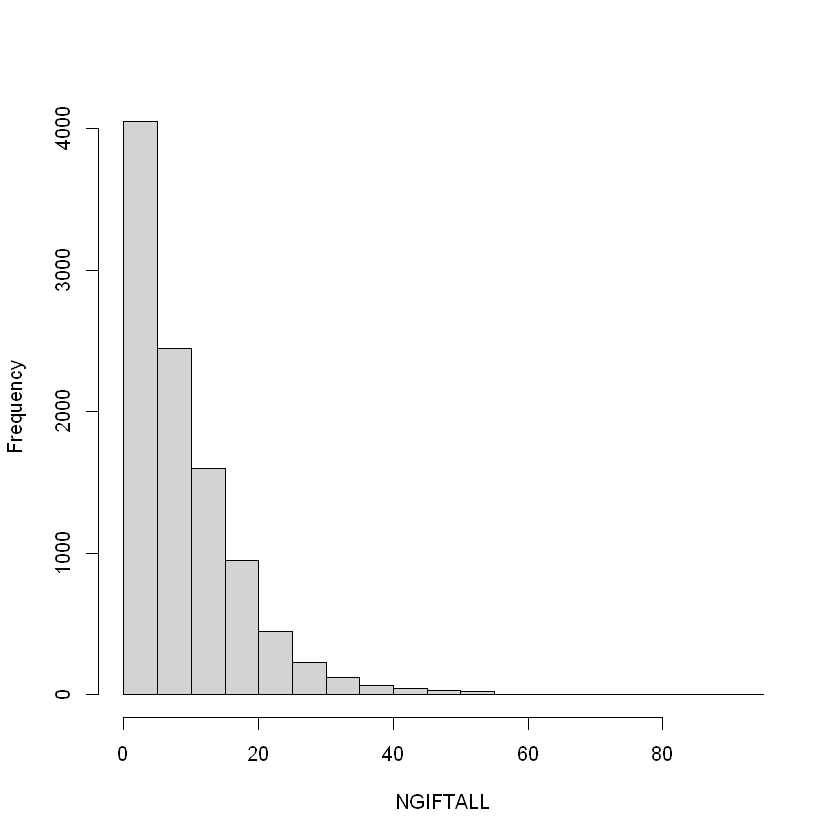

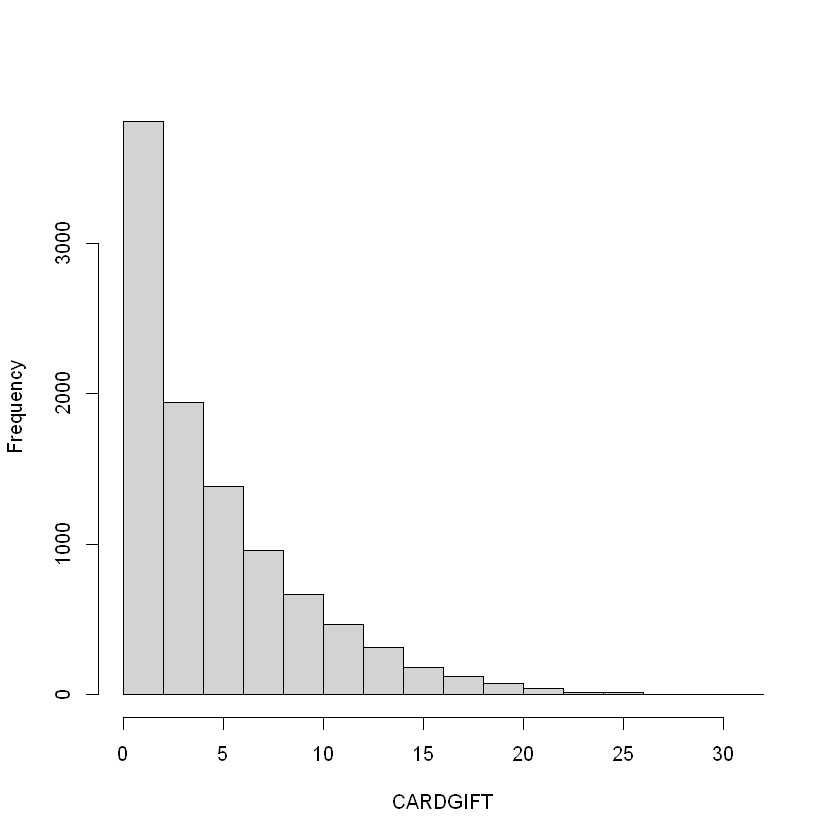

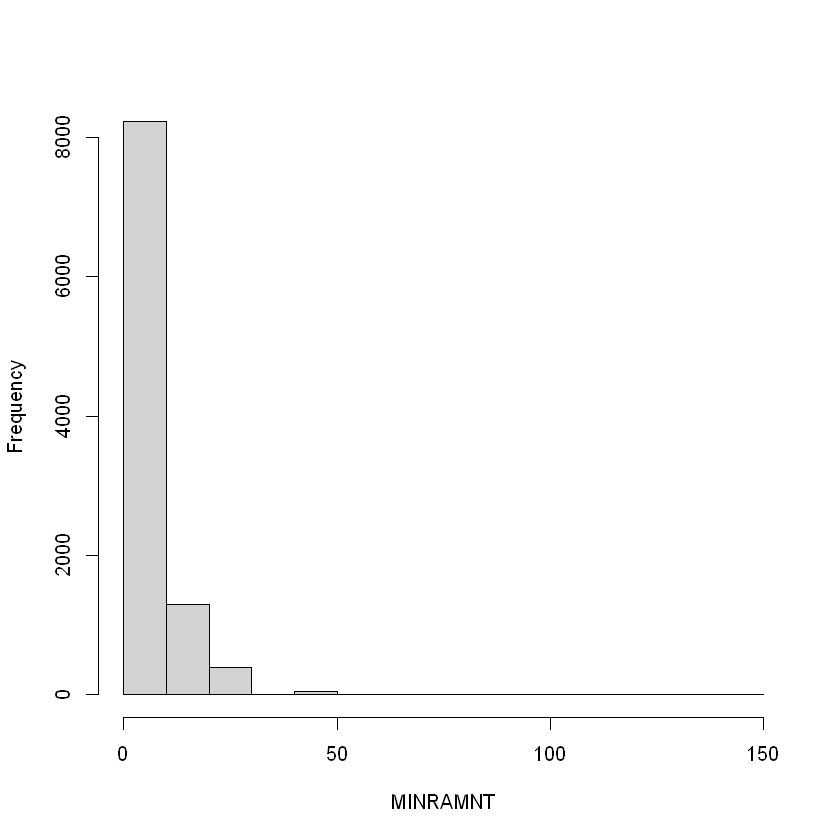

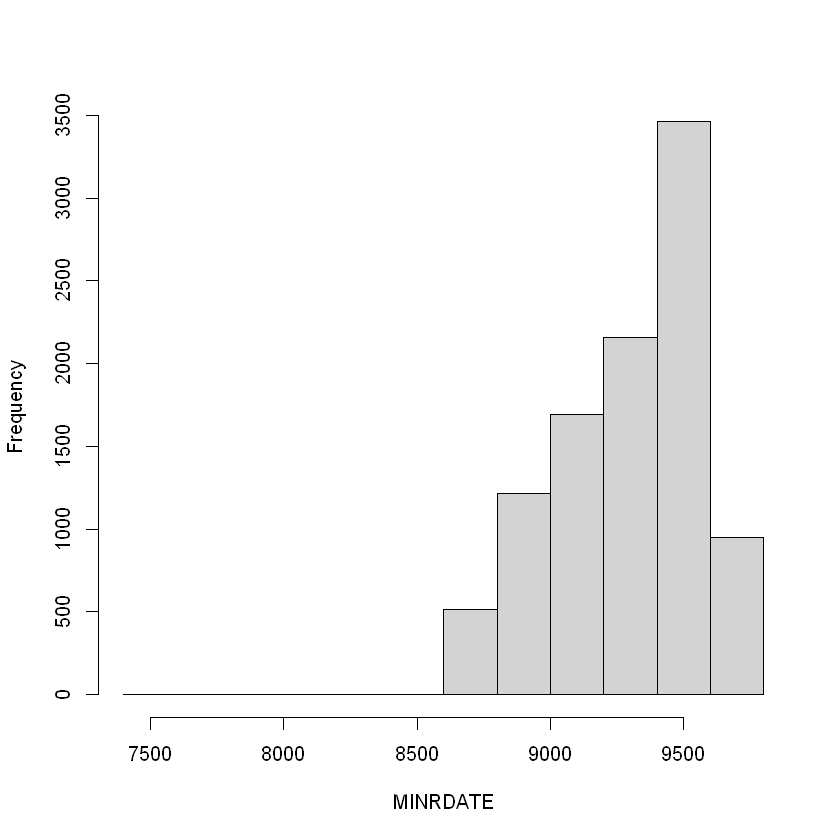

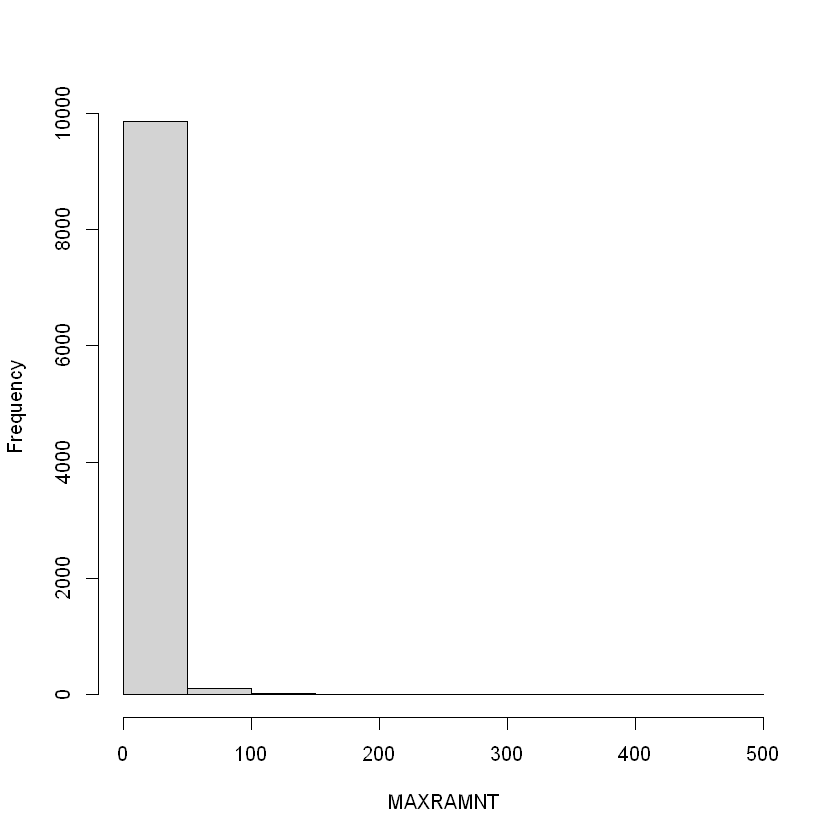

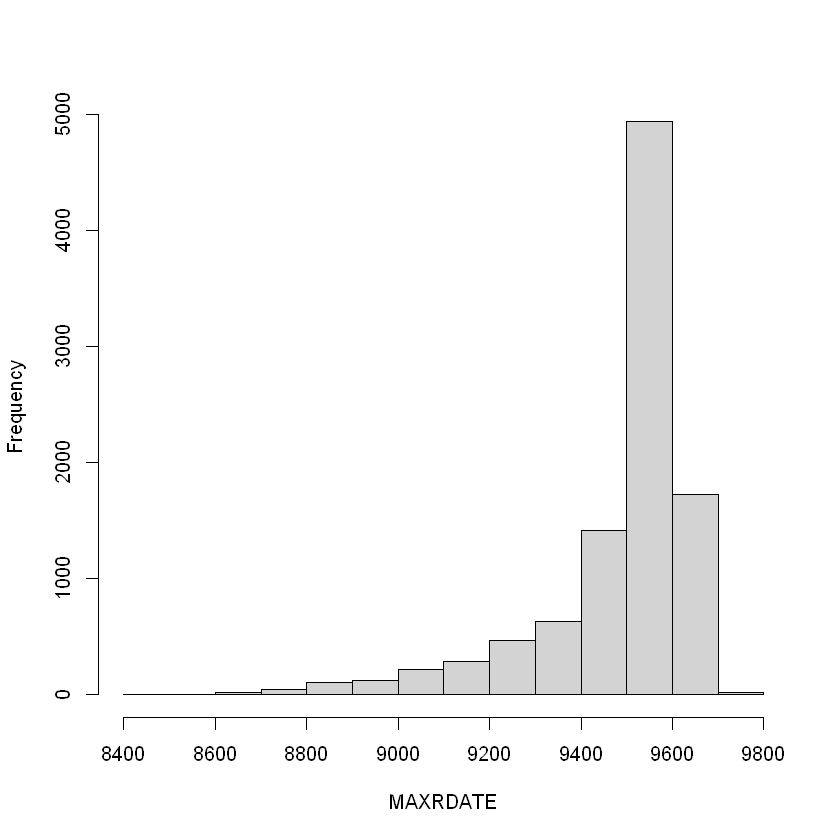

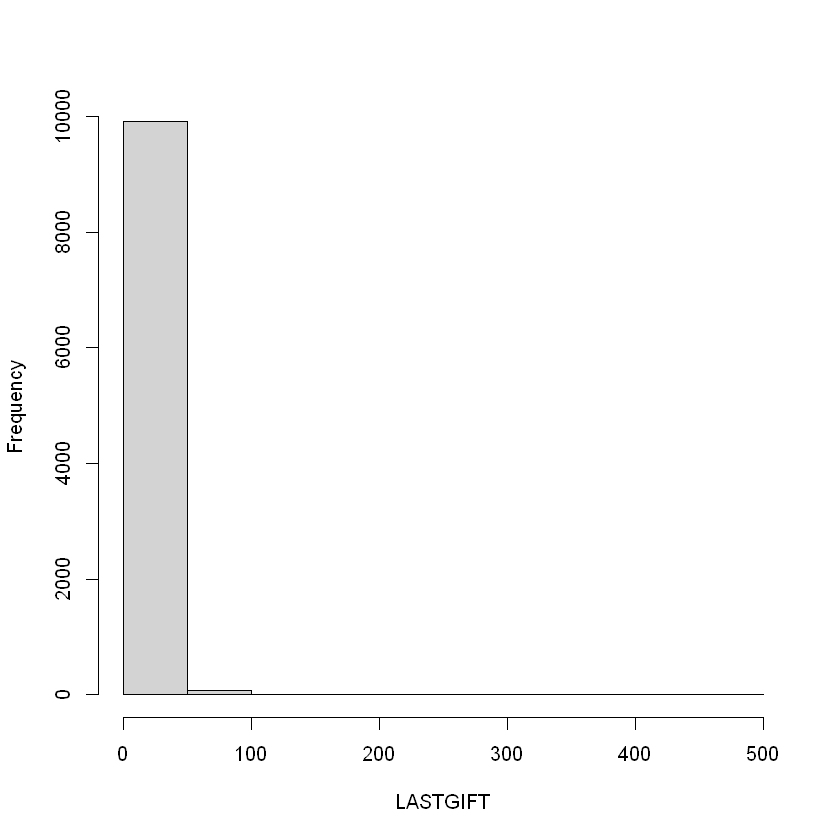

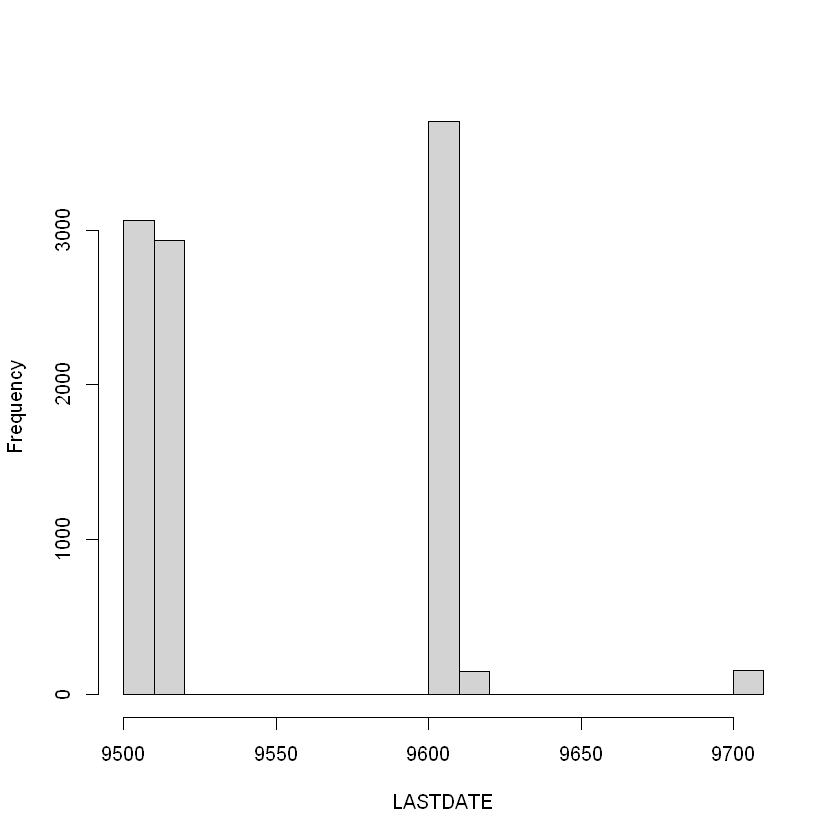

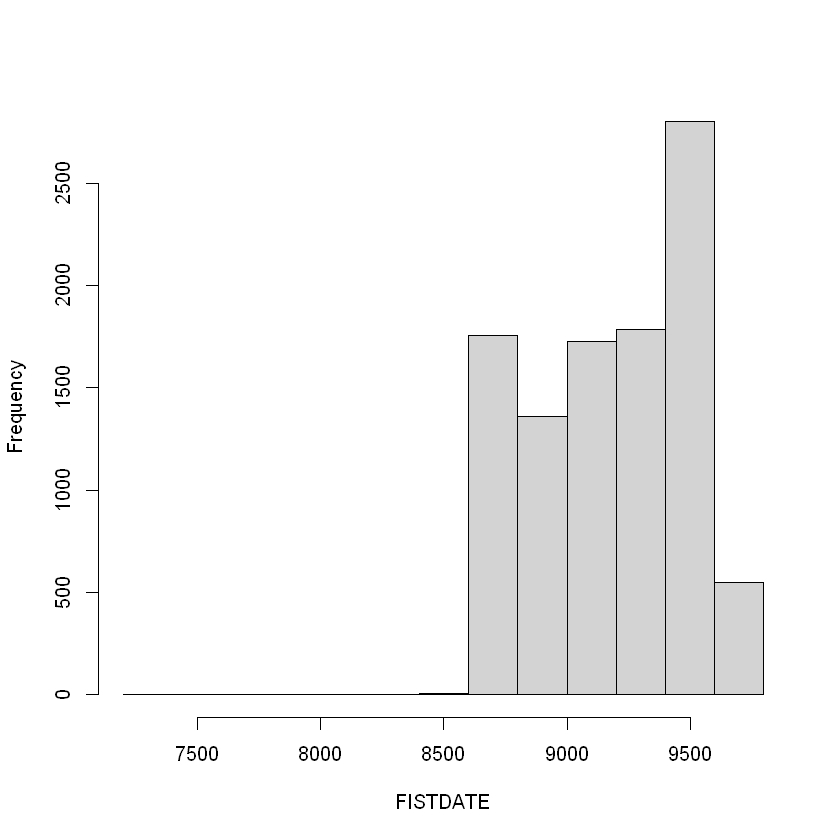

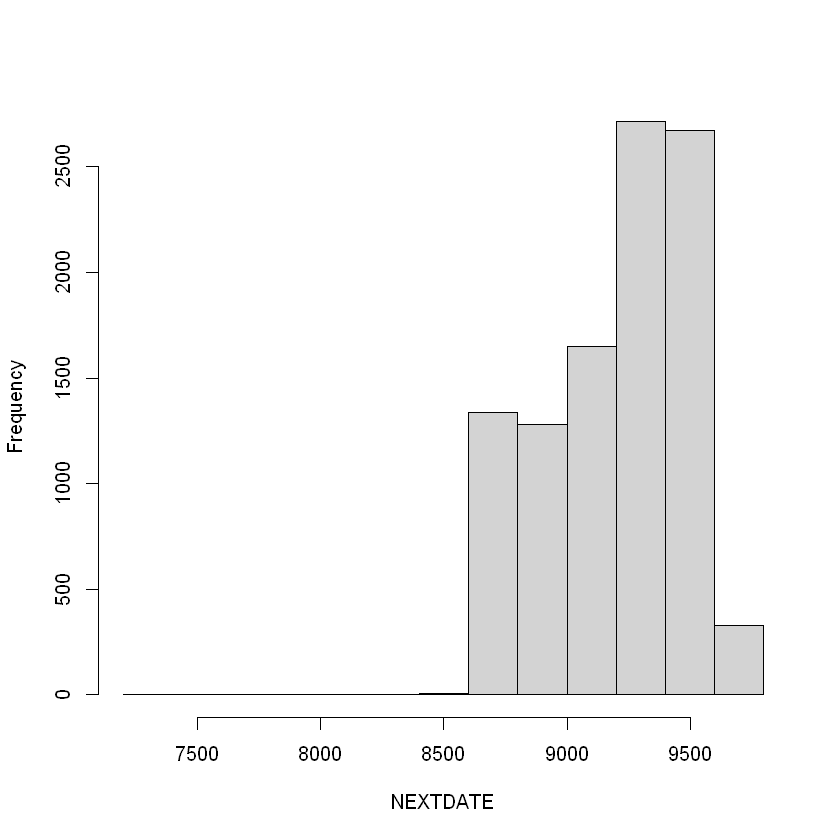

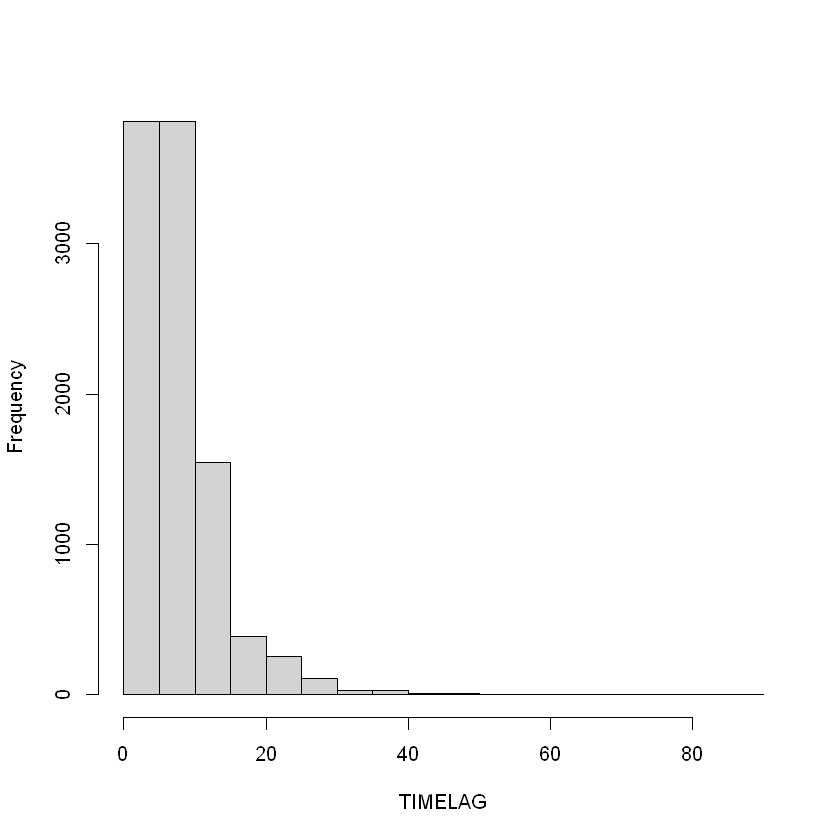

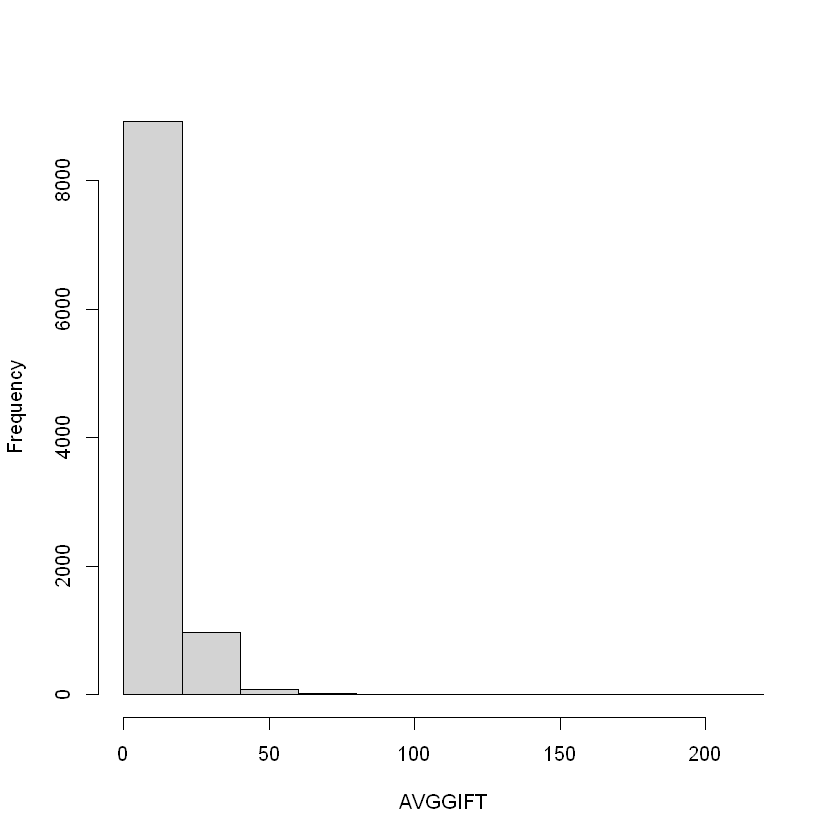

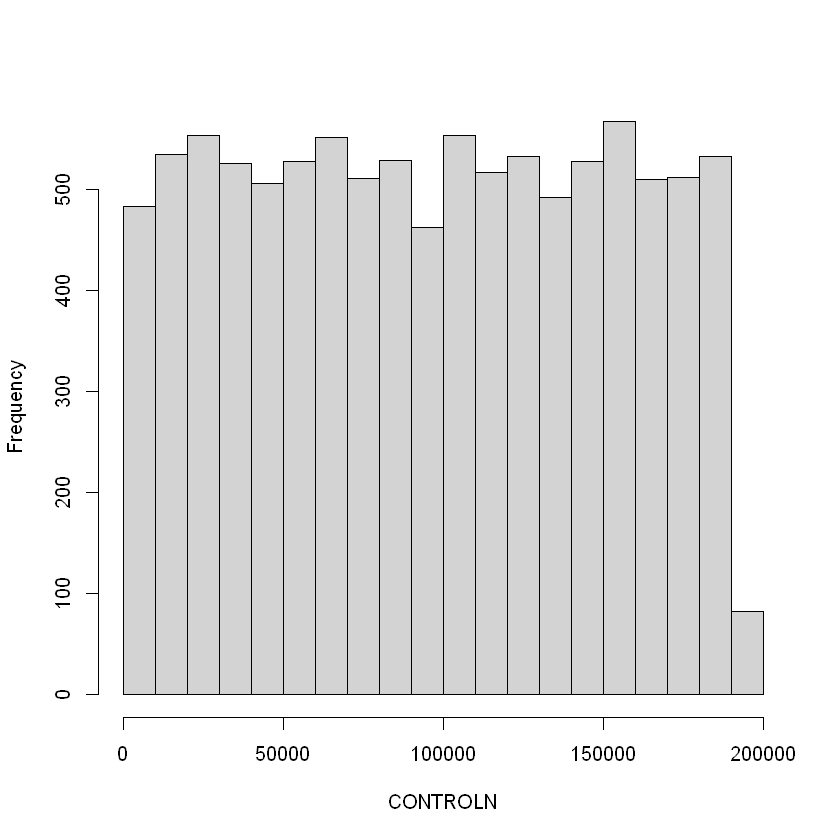

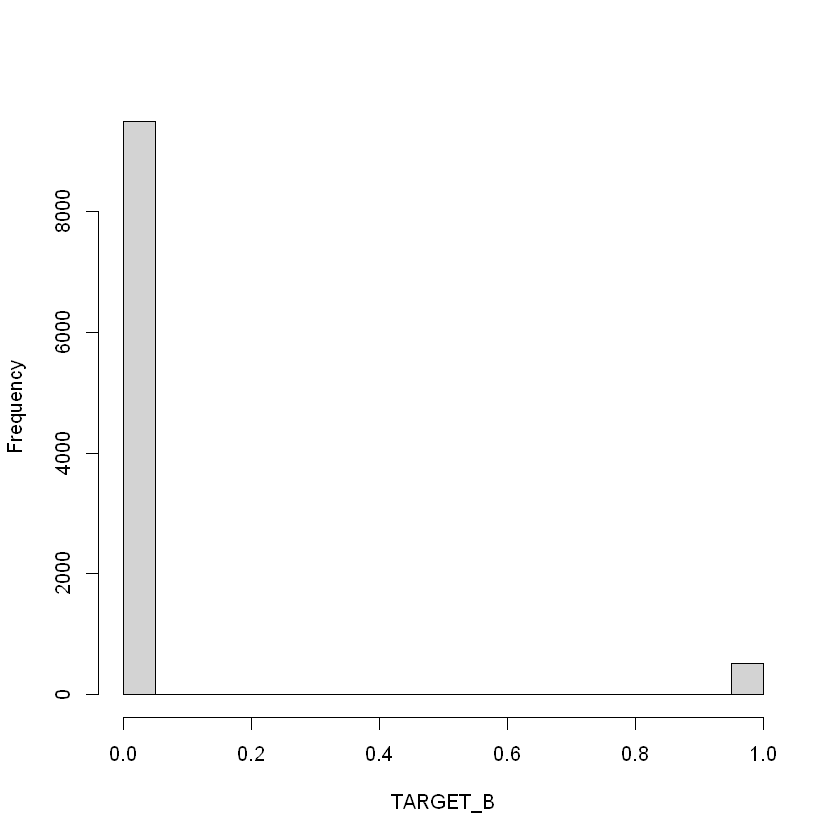

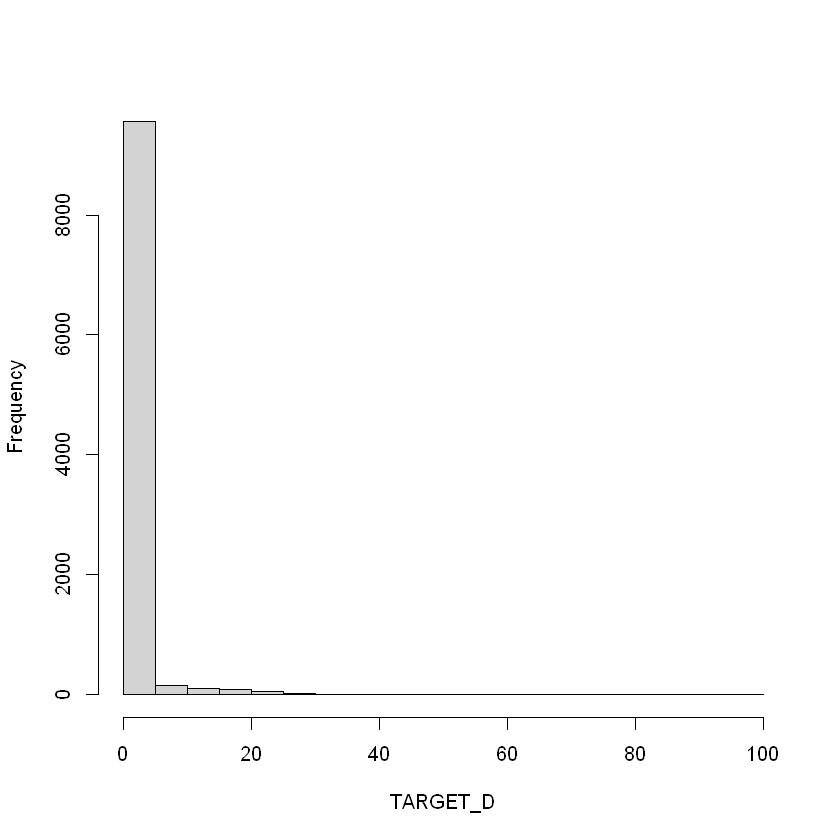

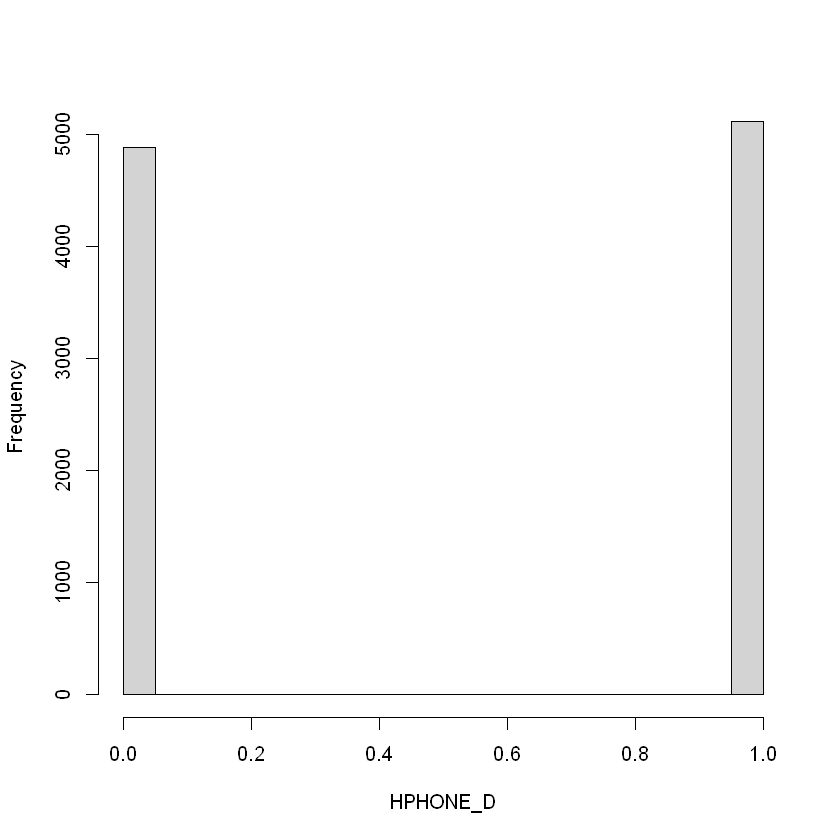

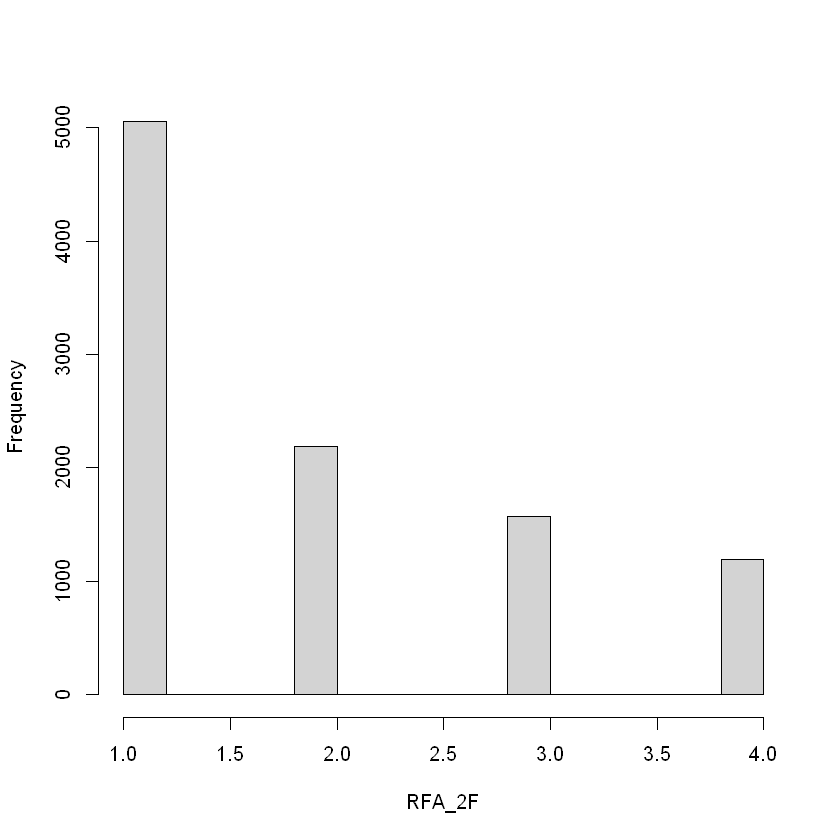

ODATEDW                                                                                                               
breaks   8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800                                          
counts   1544, 369, 689, 534, 803, 925, 787, 392, 1325, 1597, 1034, 1                                                          
density  0.001544, 0.000369, 0.000689, 0.000534, 0.000803, 0.000925, 0.000787, 0.000392, 0.001325, 0.001597, 0.001034, 0.000001
mids     8650, 8750, 8850, 8950, 9050, 9150, 9250, 9350, 9450, 9550, 9650, 9750                                                
xname    data.train[, x]                                                                                                       
equidist TRUE                                                                                                                  
         TCODE                                                                                                                                                                             
breaks   0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000                                                                         
counts   9991, 0, 1, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 1                                                                                                                                    
density  0.00019982, 0.00000000, 0.00000002, 0.00000000, 0.00000000, 0.00000014, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000002
mids     2500, 7500, 12500, 17500, 22500, 27500, 32500, 37500, 42500, 47500, 52500, 57500, 62500, 67500, 72500                                                                             
xname    data.train[, x]                                                                                                                                                                   
equidist TRUE                                                                                                                                                                              
         DOB                                                                                                                                                                                      
breaks   0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500                                                                                   
counts   2555, 212, 459, 646, 817, 735, 699, 576, 682, 722, 696, 536, 384, 183, 83, 12, 3                                                                                                         
density  0.0005110, 0.0000424, 0.0000918, 0.0001292, 0.0001634, 0.0001470, 0.0001398, 0.0001152, 0.0001364, 0.0001444, 0.0001392, 0.0001072, 0.0000768, 0.0000366, 0.0000166, 0.0000024, 0.0000006
mids     250, 750, 1250, 1750, 2250, 2750, 3250, 3750, 4250, 4750, 5250, 5750, 6250, 6750, 7250, 7750, 8250                                                                                       
xname    data.train[, x]                                                                                                                                                                          
equidist TRUE                                                                                                                                                                                     
         CLUSTER                                                                                          
breaks   0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55                                                     
counts   616, 694, 1200, 898, 988, 1238, 801, 1268, 1089, 756, 452                                        
density  0.01232, 0.01388, 0.02400, 0.01796, 0.01976, 0.02476, 0.01602, 0.02536, 0.02178, 0.01512, 0.00904
mids

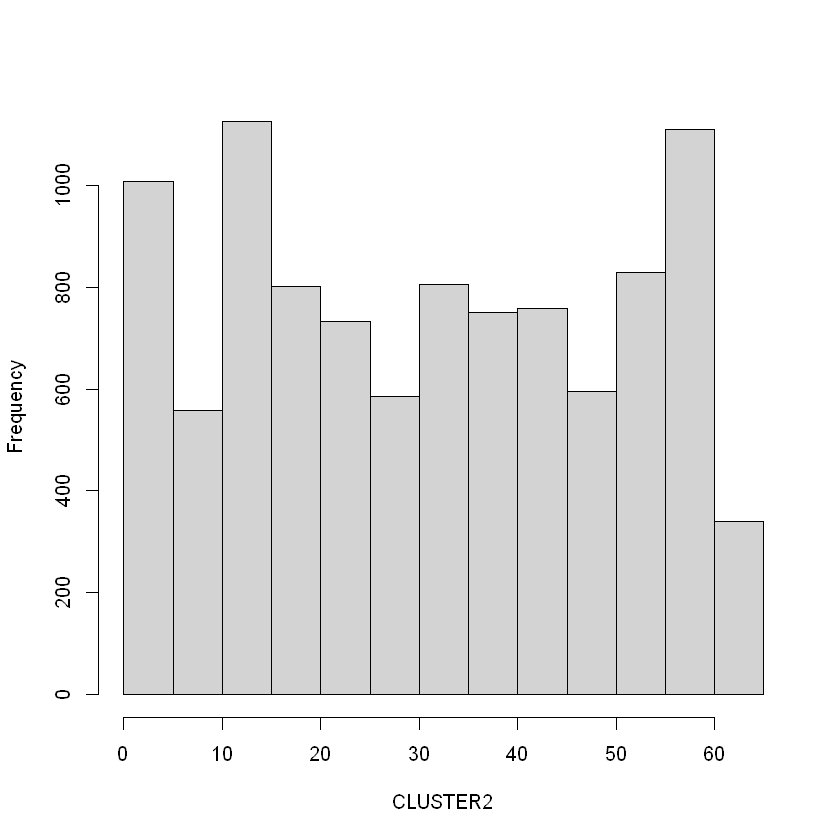

In [22]:
# Avant de commencer à travailler avec les données nous voyons que beaucoup de données sont manquantes
# Nous allons donc les remplacer par leurs valeurs médianes

for(i in 1:ncol(data.train)){
    data.train[is.na(data.train[,i]), i] <- median(data.train[,i], na.rm = TRUE)
}


variablesNumerique = which(sapply(data.train,is.numeric))
myHist <- function(x){
    hist(data.train[,x],main=NULL,xlab=x)
}
sapply(names(variablesNumerique),myHist)

Sur toutes les variables ci-dessous une attire notre attention la variable HIT en effet elle semble avoir quelques valeurs aberrantes bien aux dessus de toutes les valeurs (nous allons donc remplacer ces valeurs par la moyenne des valeurs non aberrantes).

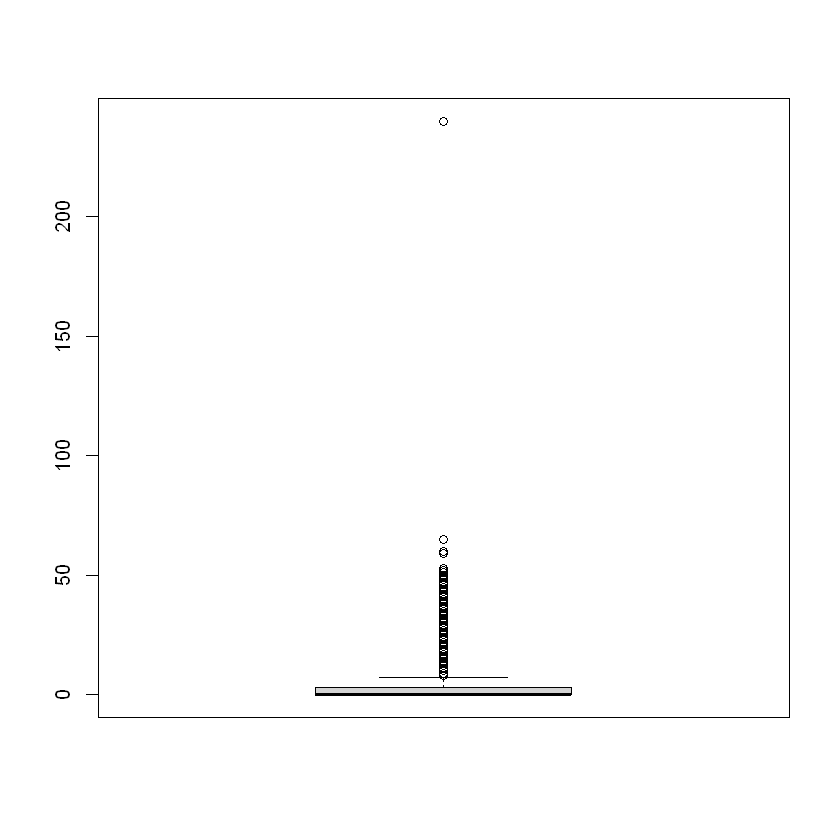

In [23]:
boxplot(data.train$HIT)

In [24]:
valeursAberante = data.train$HIT[data.train$HIT>100]
valeursAberante

[1] 240 240 240 240 240 240

In [25]:
valeursNonAberante = data.train$HIT[data.train$HIT<100]
mean(valeursNonAberante)

[1] 3.044227

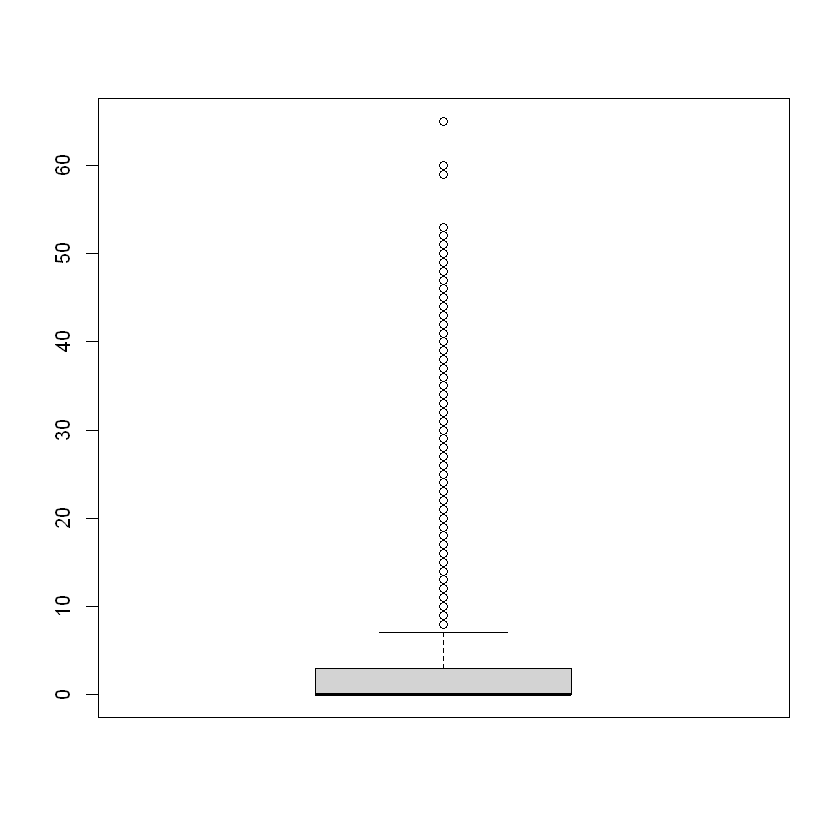

In [26]:
data.train$HIT[data.train$HIT>100] = mean(valeursNonAberante)
boxplot(data.train$HIT)

Après ces modifications nous pouvons considérer ces données comme bonnes.

Maintenant étudions l'âge des personnes qui ont donné.

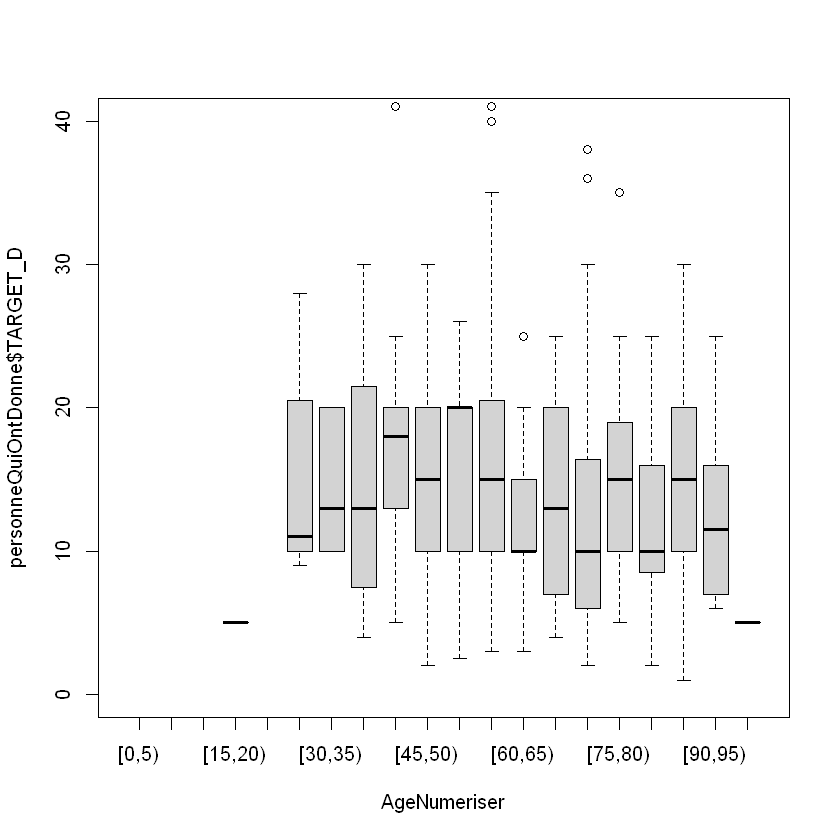

In [27]:
AgeNumeriser <- cut(personneQuiOntDonne$AGE, right=F, breaks=seq(0, 100, by=5))
boxplot(personneQuiOntDonne$TARGET_D ∼ AgeNumeriser,ylim=c(0,40))

On remarque que la majorité des personnes qui donne ont entre 30 et 95 ans.
Après avoir étudié l'âge des personnes qui ont donné intéressons-nous aux sexes des personnes.

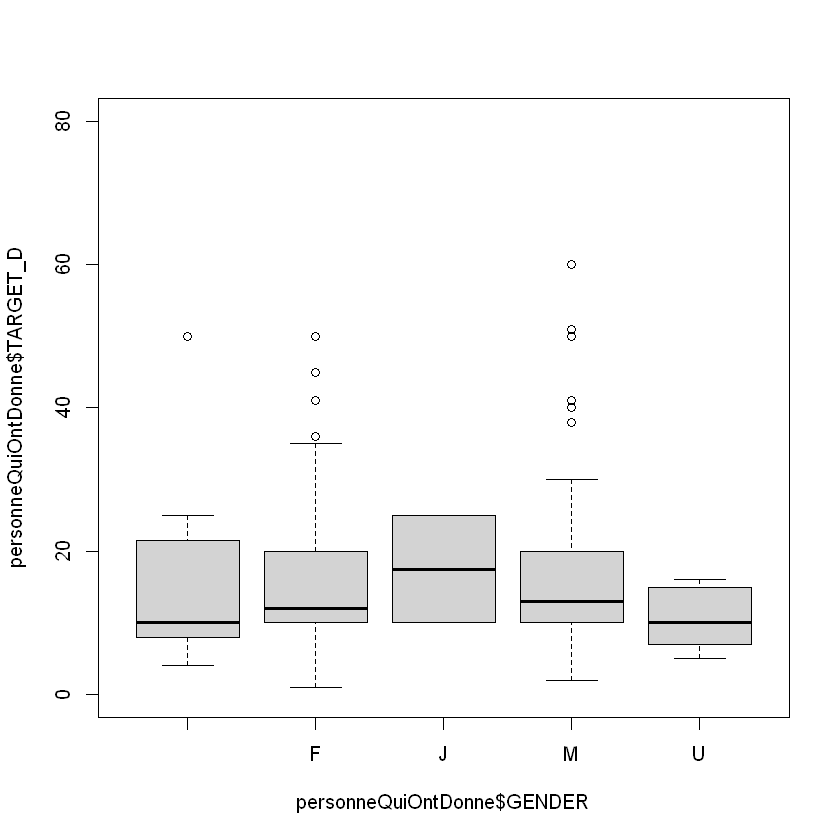

In [28]:
boxplot(personneQuiOntDonne$TARGET_D ∼ personneQuiOntDonne$GENDER, ylim=c(0,80))

Tous les sexes sont représentés dans les dons.

L'une des dernières choses à faire et de regarder la corrélation entre les variables et notamment des variables avec les dons effectués pour savoir si une variable influe bien plus que les autres sur les dons ou si toute la variable joue a peu près le même rôle).



In [29]:
correlation = cor(data.train$TARGET_D,data.train[,variablesNumerique],use = "pairwise.complete.obs")
# pairwise.complete.obs permet d'éviter une erreur en cas de valeurs manquantes
correlation = abs(correlation) 
# Étudier les valeurs absolues nous permettent de voir lesquels 
# sont les plus corrélés négativement ou positivement.
(correlation <- correlation[,order(correlation, decreasing=T)])

Warning message in cor(data.train$TARGET_D, data.train[, variablesNumerique], use = "pairwise.complete.obs"):
"l'écart type est nul"


TARGET_D     TARGET_B          HV1          HV2          HV3         HVP4 
1.000000e+00 8.330263e-01 4.940993e-02 4.878299e-02 4.773288e-02 4.509184e-02 
         IC5        ETH10         IC12          IC1          HV4          IC3 
4.501308e-02 4.445427e-02 4.326462e-02 4.324113e-02 4.276678e-02 4.186324e-02 
         IC2         HVP3         HVP6          IC4         IC21          RP3 
4.173874e-02 4.170810e-02 4.168980e-02 4.142867e-02 4.129549e-02 3.974265e-02 
        HVP5     RAMNT_18     ADATE_24        ETH14         IC11         HVP1 
3.956059e-02 3.946204e-02 3.925303e-02 3.891723e-02 3.870276e-02 3.863611e-02 
        HVP2        POBC2          RP1      RAMNT_3        HHAS3          EC2 
3.854046e-02 3.803211e-02 3.796047e-02 3.762858e-02 3.759763e-02 3.690240e-02 
         RP2         IC20        MHUC1         OCC8     RAMNT_22         IC14 
3.683923e-02 3.617693e-02 3.608469e-02 3.502325e-02 3.450839e-02 3.386270e-02 
         RP4        HHAS4         ETH7        OCC11     CLUSTER2          EC8 
3.351344e-02 3.302588e-02 3.254329e-02 3.248447e-02 3.149908e-02 3.139864e-02 
         EC5         LSC4         IC23          IC6         OCC2         EIC9 
3.128659e-02 3.119066e-02 3.093526e-02 3.014903e-02 2.997586e-02 2.963117e-02 
    MINRAMNT          EC1         OCC1      ADATE_6          EC7     LASTDATE 
2.913751e-02 2.911927e-02 2.871567e-02 2.865037e-02 2.846467e-02 2.843714e-02 
     AVGGIFT        HHAS2         IC15         HHD7        OCC13         HHD9 
2.803830e-02 2.799696e-02 2.733574e-02 2.728852e-02 2.701692e-02 2.695947e-02 
    RAMNT_12        EIC15      RDATE_6         RHP1     RAMNTALL        OCC12 
2.612711e-02 2.588825e-02 2.569556e-02 2.568297e-02 2.553640e-02 2.541186e-02 
       ANC15       INCOME         HUR2      MAGMALE         RHP2        TPE10 
2.513155e-02 2.510371e-02 2.487711e-02 2.478372e-02 2.432210e-02 2.426175e-02 
     WEALTH1         LFC8          MC3     NUMPRM12          DMA          AC1 
2.417434e-02 2.394482e-02 2.346212e-02 2.342614e-02 2.325497e-02 2.287192e-02 
         EC3         IC13          EC4      CLUSTER        ANC10     CARDPM12 
2.271386e-02 2.270050e-02 2.257732e-02 2.256322e-02 2.254275e-02 2.245979e-02 
        VOC2         OCC5         ETH6          MSA         IC22         VOC1 
2.199596e-02 2.196543e-02 2.188672e-02 2.172506e-02 2.148380e-02 2.136025e-02 
        HC21         TPE2        AGEC4      RAMNT_8          EC6         ETH4 
2.132368e-02 2.128127e-02 2.119838e-02 2.100015e-02 2.099144e-02 2.096234e-02 
        IC17       AGE901         IC10         IC19         TPE1     DATASRCE 
2.059923e-02 2.028479e-02 2.019698e-02 2.019603e-02 2.017518e-02 2.015912e-02 
       TPE11     RAMNT_14      ADATE_9        POBC1        OEDC1        LFC10 
2.005562e-02 2.001754e-02 1.998535e-02 1.989079e-02 1.974896e-02 1.954566e-02 
        EIC2        TPE13         IC16      NUMPROM     NEXTDATE          IC8 
1.869710e-02 1.835262e-02 1.818287e-02 1.803979e-02 1.787917e-02 1.776626e-02 
    LASTGIFT     LOCALGOV         HHD3         OCC4         VOC3      POP90C2 
1.750210e-02 1.724953e-02 1.719786e-02 1.716888e-02 1.701878e-02 1.690018e-02 
    RDATE_11         LFC9         ANC5        MARR1        ETHC4          MC1 
1.687667e-02 1.684662e-02 1.680966e-02 1.663386e-02 1.662634e-02 1.654962e-02 
        OCC6      POP90C1        HUPA4     VIETVETS          VC2          HC2 
1.640374e-02 1.619044e-02 1.619017e-02 1.571870e-02 1.558849e-02 1.531226e-02 
        HC12     CARDPROM        AGEC1         HHN2        OEDC4     PUBPHOTO 
1.530493e-02 1.518264e-02 1.491382e-02 1.483574e-02 1.476181e-02 1.462122e-02 
        OCC7        AGEC3      RAMNT_9       AGE904      POP90C4     RDATE_20 
1.441702e-02 1.434448e-02 1.432821e-02 1.427512e-02 1.418951e-02 1.414106e-02 
        ANC8       AGE907         ETH2         AFC4          DOB        EIC10 
1.405775e-02 1.405651e-02 1.403282e-02 1.391891e-02 1.373916e-02 1.352429e-02 
       EIC12         RHP4         HC14        ETHC5   

On remarque qu'il y a des variables plus corrélés que les autres les deux premières TARGET B et D ne compte pas car ce sont les classes. Mais on voit que certaines ont des variables très corrélé (taux à 0.35 par exemple) là ou d'autres variables sont presque à 0.

# Entrainement de l'arbre

Utilisons pour ça la librairie Party

In [30]:
install.packages("party")

Installation du package dans 'C:/Users/alex5/OneDrive/Documents/R/win-library/4.1'
(car 'lib' n'est pas spécifié)



package 'party' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alex5\AppData\Local\Temp\RtmpgnoXDC\downloaded_packages


In [31]:
library(party)

Le chargement a nécessité le package : grid

Le chargement a nécessité le package : mvtnorm

Le chargement a nécessité le package : modeltools

Le chargement a nécessité le package : stats4

Le chargement a nécessité le package : strucchange

Le chargement a nécessité le package : zoo


Attachement du package : 'zoo'


Les objets suivants sont masqués depuis 'package:base':

    as.Date, as.Date.numeric


Le chargement a nécessité le package : sandwich



In [45]:
set.seed(1234)
ind = sample(2,nrow(data.train),replace = TRUE, prob = c(0.8,0.2))

train.data = data.train[ind == 1,]
test.data = data.train[ind ==2,]

# Paramétre de l'arbre 
MinSplit = 200
MinBucket = 40
MaxDepth = 10

# Variables à garder choisi en fonction des corrélations et d'autres variables qu'il semble logique d'utiliser
VariableAUtiliser <- c("HV1","HV2","HV3","HVP4","ETH10","IC12","IC1","HV4","IC3","IC2","HVP3","HVP6","IC4",
"AGE", "AVGGIFT", "CARDGIFT", "CARDGIFT",
"CLUSTER2","HIT","HPHONE_D", "INCOME", "LASTGIFT", "MAXRAMNT",
"MINRAMNT", "NGIFTALL", "NUMPRM12", "RAMNTALL","RFA_2F", "TIMELAG")
DonneeEntrainement = train.data[,c("TARGET_D",VariableAUtiliser)]
dim(DonneeEntrainement)

[1] 8014   30

In [46]:
describe(DonneeEntrainement)
# Remplacons les valeurs manquantes dans chaque colonne par la médianne des autres valeurs 
# (pas la moyenne car il y a des données avec un nombre finie de valeurs)

DonneeEntrainement 

 30  Variables      8014  Observations
--------------------------------------------------------------------------------
TARGET_D 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    8014        0       43    0.149   0.7699    1.485        0        0 
     .25      .50      .75      .90      .95 
       0        0        0        0        4 

lowest :   0.0   1.0   2.0   2.5   3.0, highest:  41.0  45.0  50.0  60.0 100.0
--------------------------------------------------------------------------------
HV1 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    8014        0     2266        1     1053    851.2    299.0    372.0 
     .25      .50      .75      .90      .95 
   512.0    737.5   1190.5   2189.7   3020.0 

lowest :    0   75   98  109  120, highest: 5965 5976 5980 5983 5985
--------------------------------------------------------------------------------
HV2 
       n  missing distinct     Info     Mean      G

In [48]:
formula = TARGET_D ~ HV1+HV2+HV3+HVP4+ETH10+IC12+IC1+HV4+IC3+IC2+HVP3+HVP6+IC4+AGE+AVGGIFT+CARDGIFT+CARDGIFT+CLUSTER2+HIT+HPHONE_D+INCOME+LASTGIFT+MAXRAMNT+MINRAMNT+NGIFTALL+NUMPRM12+RAMNTALL+RFA_2F+TIMELAG

In [49]:
Arbre <- ctree(formula,data=DonneeEntrainement,
controls=ctree_control(minsplit=MinSplit, minbucket=MinBucket, maxdepth=MaxDepth))

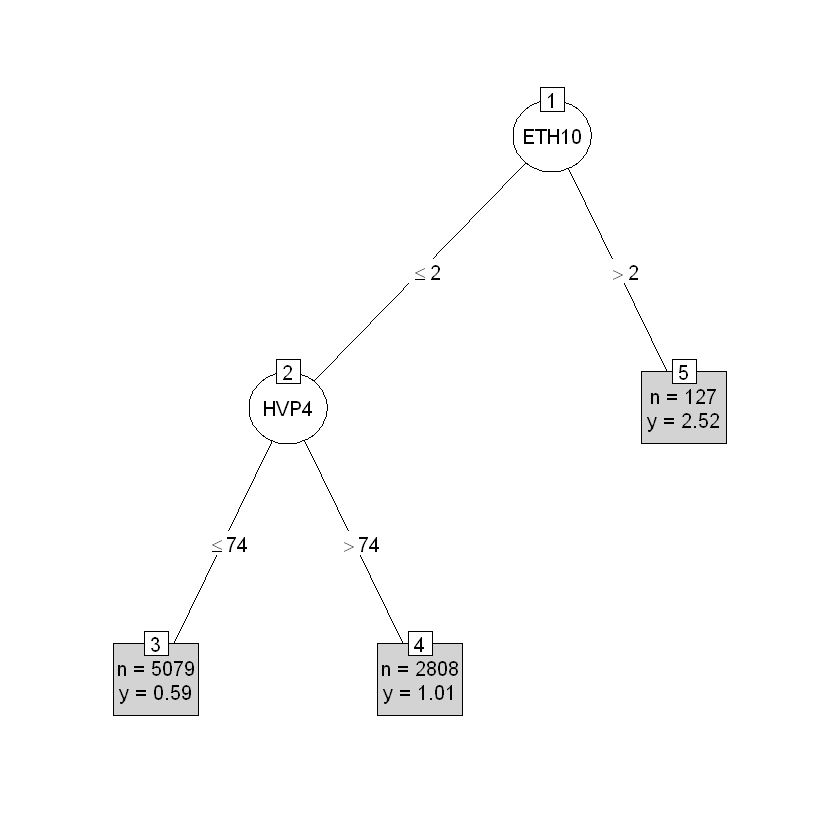

In [50]:
plot(Arbre, type="simple",
ip_args=list(pval=FALSE), ep_args=list(digits=0,abbreviate=TRUE),
tp_args=list(digits=2))

# Évaluation du modèle

In [51]:
testPred = predict(Arbre,newdata = test.data)

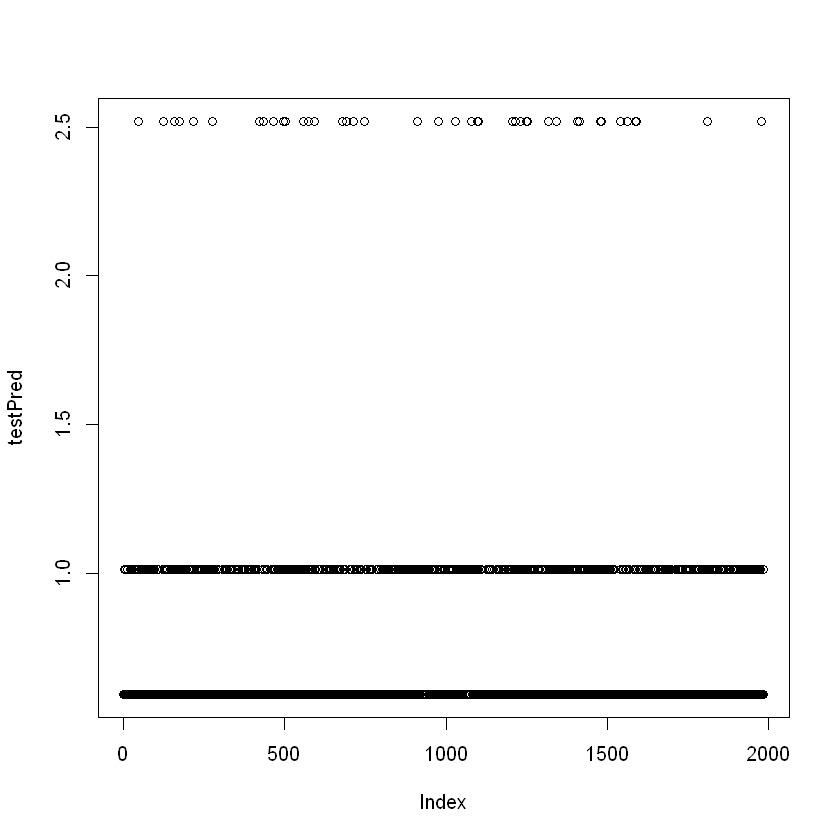

In [54]:
plot(testPred)

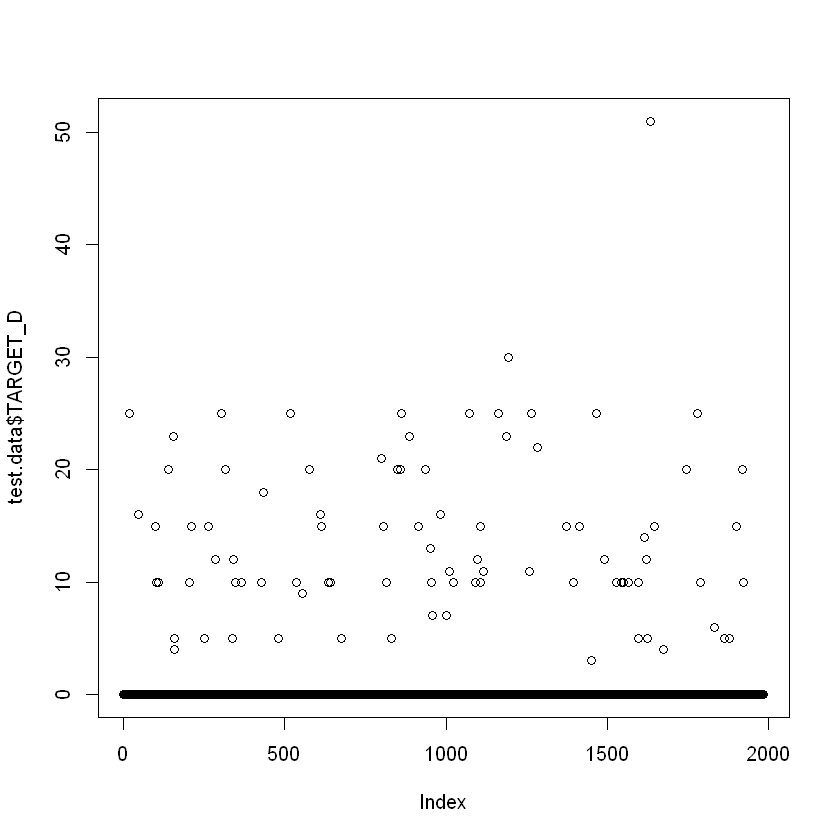

In [55]:
plot(test.data$TARGET_D)

In [56]:
table(testPred, test.data$TARGET_D)

                   
testPred               0    3    4    5    6    7    9   10   11   12   13   14
  0.591823193542036 1200    1    1    6    0    2    0   14    2    4    1    1
  1.01289173789174   657    0    1    3    1    0    1    9    1    0    0    0
  2.51968503937008    40    0    0    1    0    0    0    0    0    1    0    0
                   
testPred              15   16   18   20   21   22   23   25   30   51
  0.591823193542036    9    0    0    7    1    1    2    5    1    0
  1.01289173789174     2    3    0    1    0    0    1    4    0    1
  2.51968503937008     0    0    1    0    0    0    0    0    0    0

# Conclusion
On remarque que notre modèle n'est pas du tout optimisé dû à certaines choses comme le manque d'informations sur ceux que représentent les variables. Le manque de temps pour analyser précisément toutes les données et trouver des modèles plus performants, la non-possibilité d'inclure toutes les variables pour entrainer l'arbre cela aurait donné un arbre plus performant sur les predictions.

Il faudrait essayer d'utiliser d'autres méthodes de régression pour comparer leurs performances par rapport aux arbres.